In [ ]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")


In [1]:
ifolder <- 'C:\\Users\\keers001\\OneDrive\ -\ WageningenUR\\RETURN\\Data\\RETURN\\20191019_SimulationOptSAR\\Case_SantaRem\\' # folder with data characteristics
ofolder <- 'C:\\Users\\keers001\\OneDrive\ -\ WageningenUR\\RETURN\\Data\\RETURN\\20191019_SimulationOptSAR\\Case_SantaRem\\' # folder where the simulated time series will be saved
nfolder <- 'C:\\Users\\keers001\\Dropbox\\output\\Jupyter_notebook\\Functions\\'

tsfile <- 'LSTS_LSTS_FireArea_SantaRem_smp_40000_VI'
fireDatefile <- 'LSTS_LSTS_FireArea_SantaRem_smp_40000_fireDate.rda'

system(paste0('jupyter-nbconvert.exe ', nfolder, 'rec_Functions.ipynb  --to script'))#, intern=FALSE
source(file.path(nfolder, 'rec_Functions.r'))

# time series to be processed
tsi <- loadRData(paste0(ifolder,tsfile,'.rda'))
# fire dates
firei <- loadRData(paste0(ifolder,fireDatefile))

R80p <- loadRData(paste0(ifolder,tsfile,'_R80p_7_02.rda'))
RRI <- loadRData(paste0(ifolder,tsfile,'_RRI_7_02.rda'))
SL <- loadRData(paste0(ifolder,tsfile,'_SL_7_02.rda'))
YrYr <- loadRData(paste0(ifolder,tsfile,'_YrYr_7_02.rda'))
crds <- loadRData(paste0(ifolder,tsfile,'_crds_02.rda'))


[1] 0

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [16]:
head(R80p)

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,]        NA        NA        NA        NA        NA        NA        NA
[2,] 0.5980468 0.7550381 0.4310594 0.3544991 0.7825122 0.6657441 0.8358319
[3,] 0.5991574 0.7583790 0.4335767 0.3570094 0.7854702 0.6690090 0.8384845
[4,] 0.5460627 0.6651523 0.4064682 0.3422719        NA 0.6153911 0.8121370
[5,] 1.3416562 1.3313756 1.2676913 1.3172223 0.4840054 0.6770086        NA
[6,] 1.3419464 1.3321452 1.2691980 1.3187831 0.4861342 0.6793039        NA
     [,8]      [,9]      [,10]     [,11] [,12]     [,13]     [,14]    
[1,]        NA        NA        NA ...          NA        NA        NA
[2,] 0.4823423 0.7126916 0.7771577 ...   0.5791754 0.5048821 0.8131533
[3,] 0.4829734 0.7130265 0.7785068 ...   0.5794827 0.5079164 0.8139150
[4,] 0.3160739        NA 0.6811341 ...   0.6386198        NA 0.7061464
[5,] 1.3200418 1.1946101        NA ...          NA        NA 1.3213124
[6,] 1.3203744 1.1946680        NA ...          NA        NA 1.3215634
     [,15]     [,16]     [,17]     [,18]     [,19]     [,20]     [,21]    
[1,]        NA        NA        NA        NA        NA        NA        NA
[2,] 0.7098910 0.5179334 0.6499617 0.7921724 0.7632484 0.8035967 0.7998815
[3,] 0.7108618 0.5202646 0.6503614 0.7913911 0.7617771 0.8052586 0.8020366
[4,] 0.6960538 0.5202376 0.4384617 0.7541475 0.4995345 0.8554245 1.4896835
[5,] 0.9052935 1.1897961 0.6202588        NA        NA        NA 1.1246288
[6,] 0.9058483 1.1895933 0.6202921        NA        NA        NA 1.1254215

raw short smooth short segment short raw long  smooth long segment long
[1,] 0.5980468 0.5991574    0.5460627     1.3416562 1.3419464   1.1643303   
[2,] 0.7550381 0.7583790    0.6651523     1.3313756 1.3321452   1.1650191   
[3,] 0.4310594 0.4335767    0.4064682     1.2676913 1.2691980   1.2426823   
[4,] 0.3544991 0.3570094    0.3422719     1.3172223 1.3187831   1.2132094   
[5,] 0.7825122 0.7854702           NA     0.4840054 0.4861342          NA   
[6,] 0.6657441 0.6690090    0.6153911     0.6770086 0.6793039   0.6368851

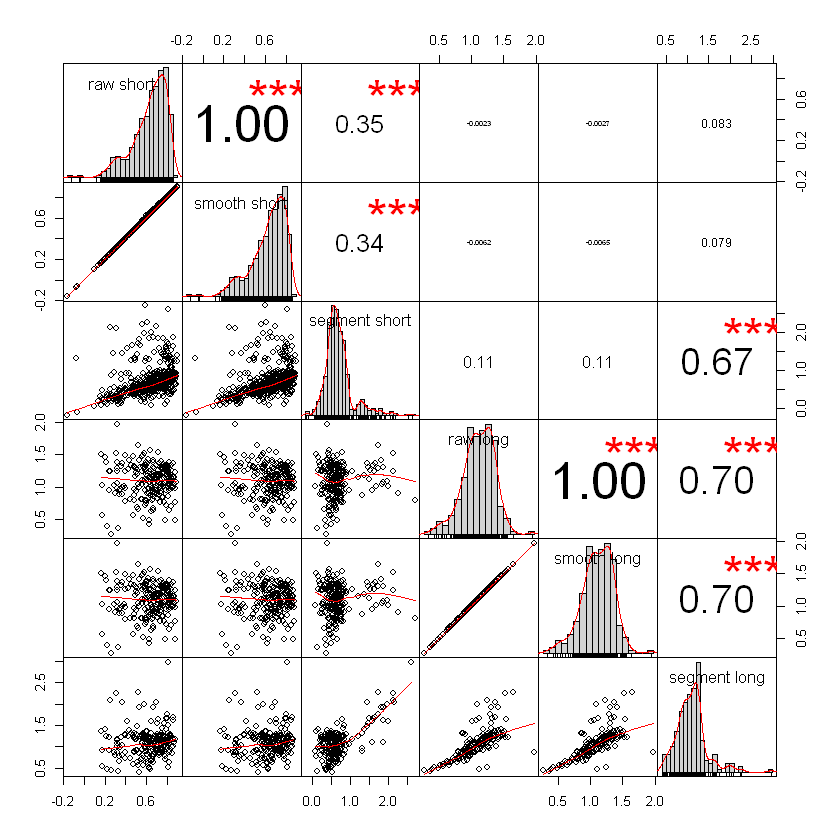

In [25]:
my_data <- t(R80p)[,-1]
colnames(my_data) <- c('raw short','smooth short','segment short','raw long','smooth long','segment long')
head(my_data)
chart.Correlation(my_data, histogram=TRUE, pch=19)

[,1]      [,2]       [,3]          [,4]       
[1,] 1.1643303 0.87877953  0.0005405856 0.072222302
[2,] 1.1650191 0.85546044  0.0005656600 0.055160497
[3,] 1.2426823 0.99135535  0.0005633260 0.095403521
[4,] 1.2132094 0.95966364  0.0008281485 0.099593384
[5,]        NA         NA -0.0008681713          NA
[6,] 0.6368851 0.04005254  0.0007875046 0.002957234

R80p      RRI        SL            YrYr       
[1,] 1.1643303 0.87877953  0.0005405856 0.072222302
[2,] 1.1650191 0.85546044  0.0005656600 0.055160497
[3,] 1.2426823 0.99135535  0.0005633260 0.095403521
[4,] 1.2132094 0.95966364  0.0008281485 0.099593384
[5,]        NA         NA -0.0008681713          NA
[6,] 0.6368851 0.04005254  0.0007875046 0.002957234

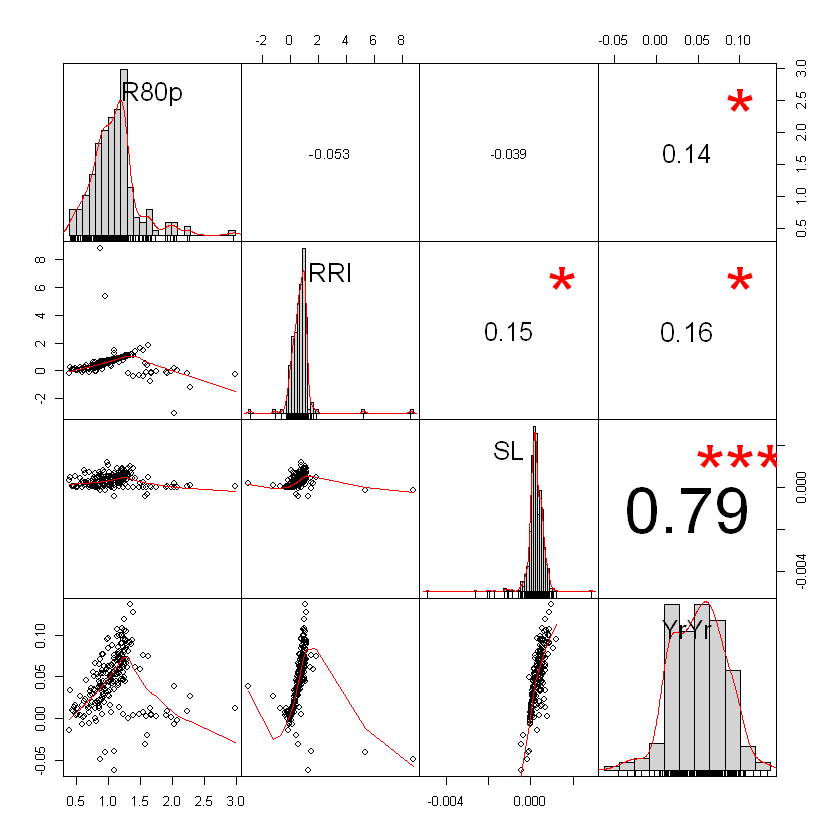

In [29]:
my_data <- cbind(t(R80p)[,7],t(RRI)[,7],t(SL)[,7],t(YrYr)[,7])
colnames(my_data) <- c('R80p','RRI','SL','YrYr')
head(my_data)
chart.Correlation(my_data, histogram=TRUE, pch=19)

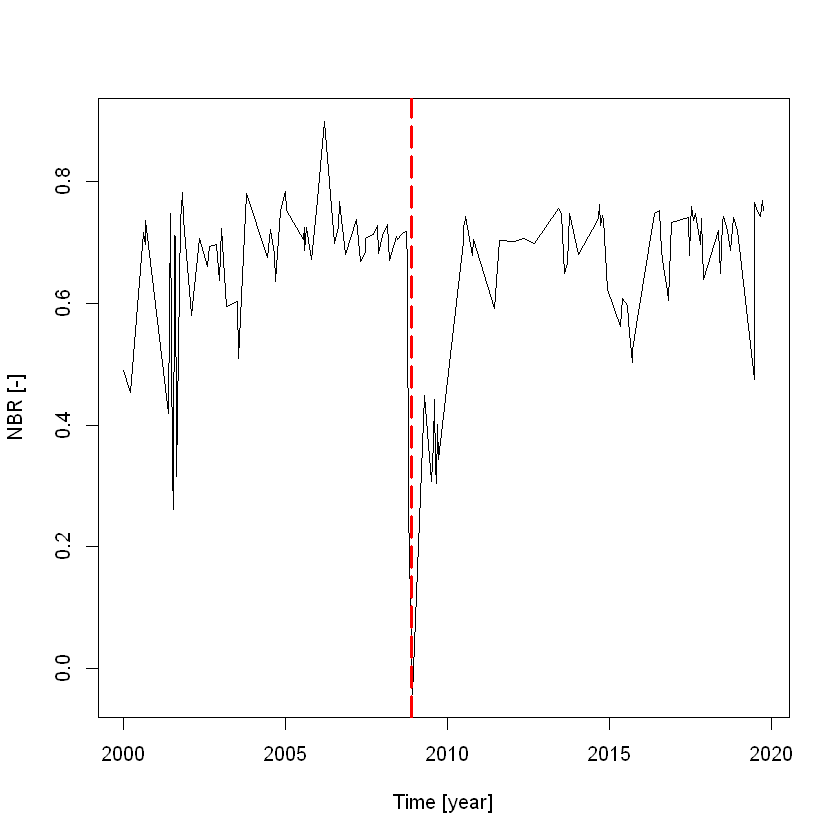

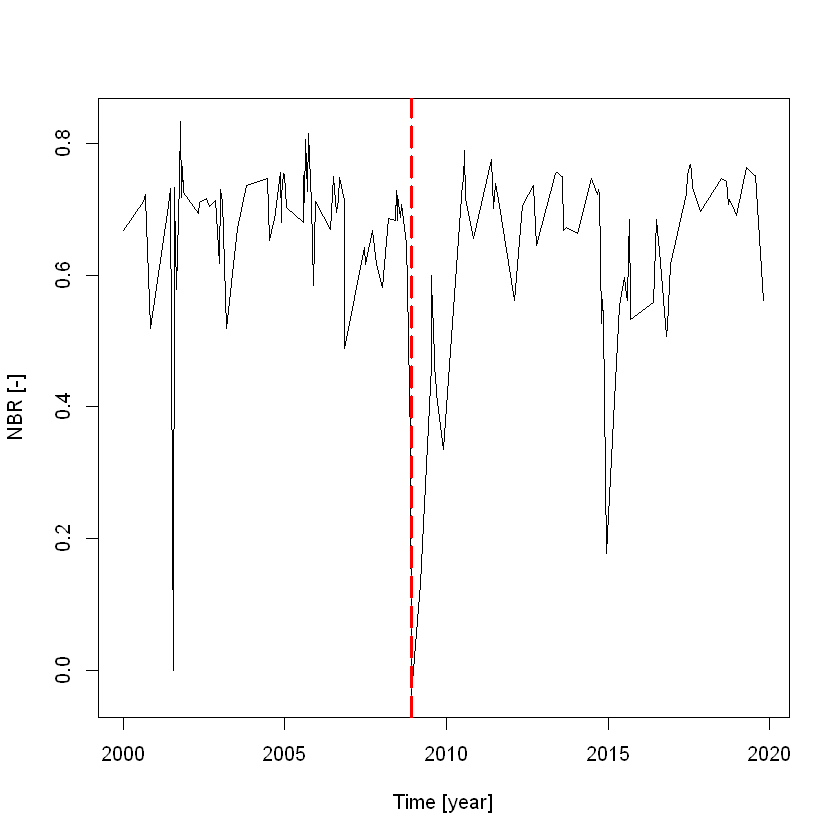

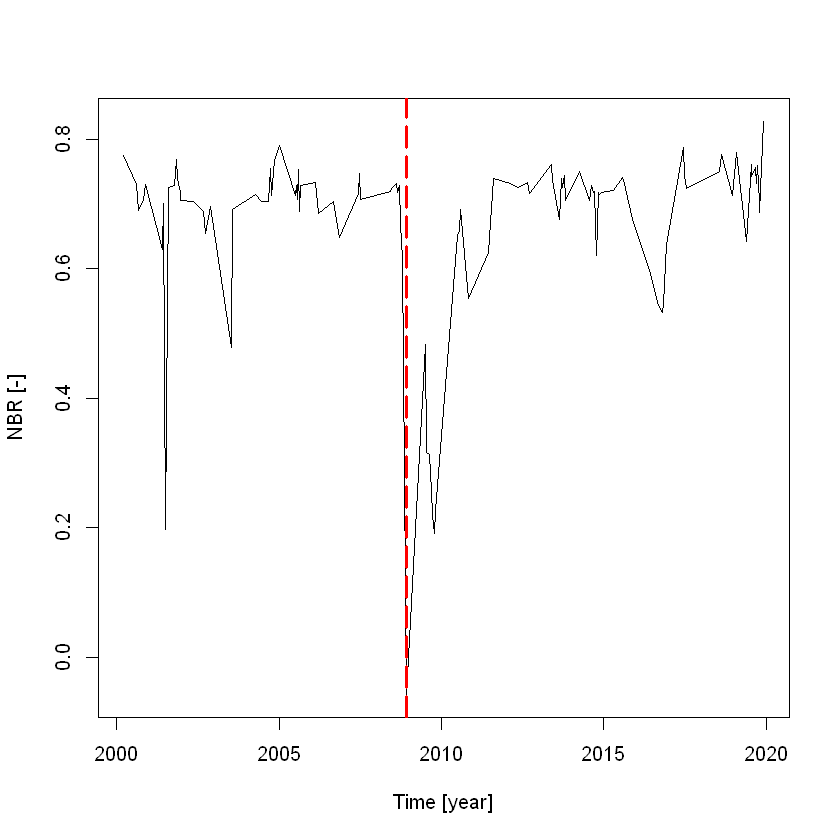

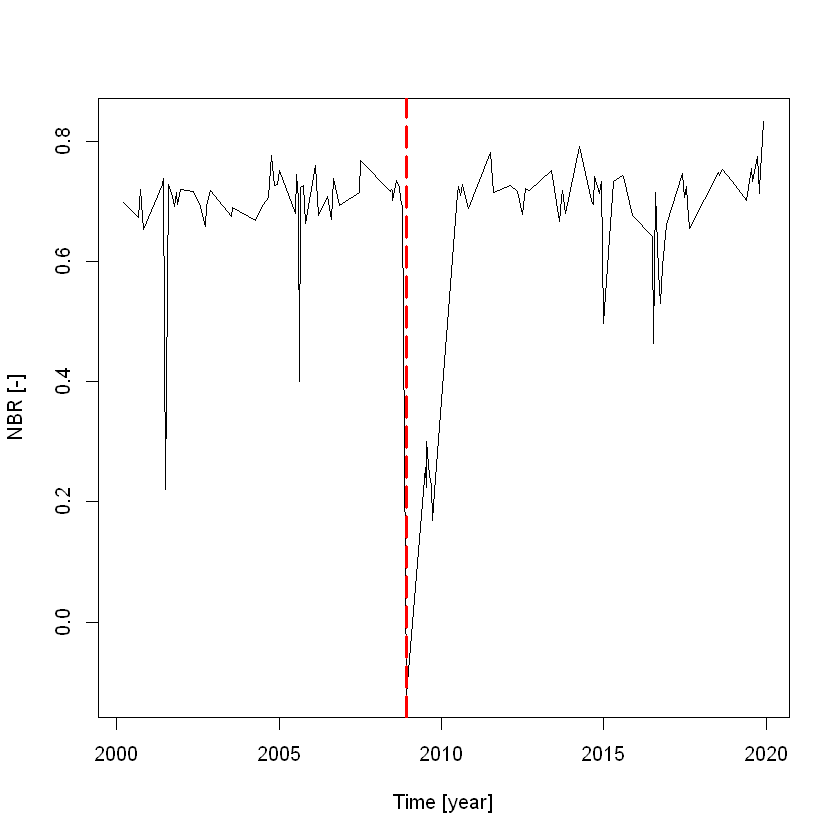

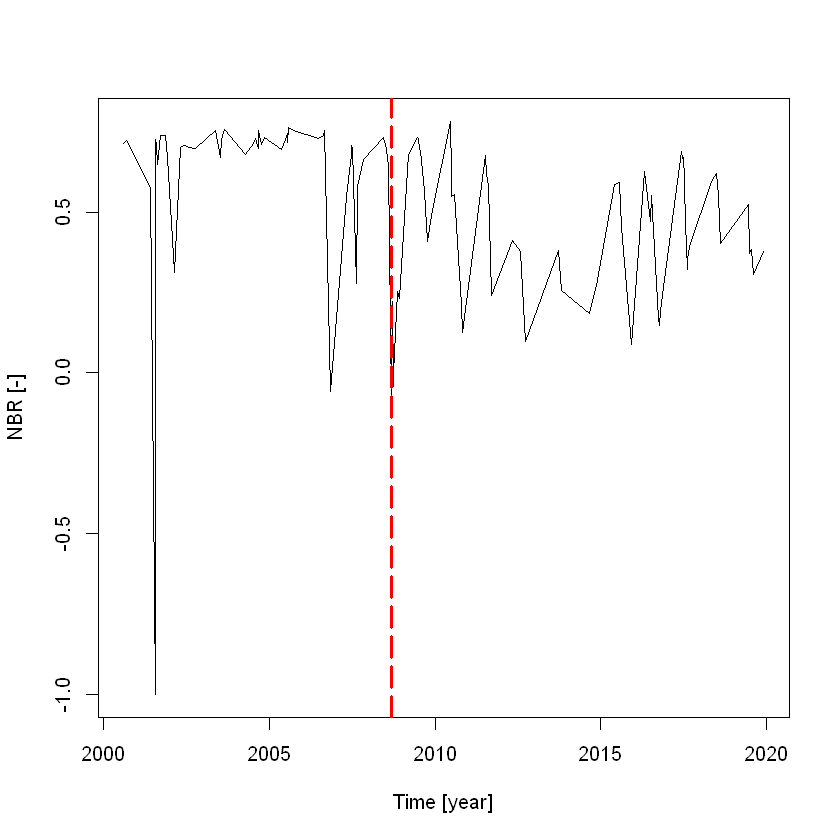

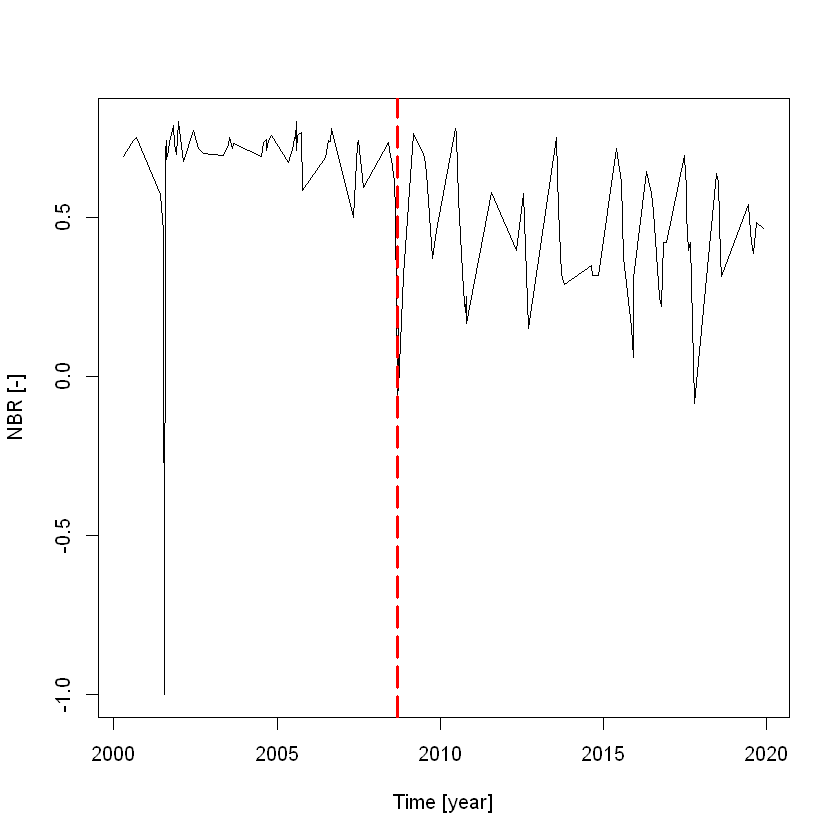

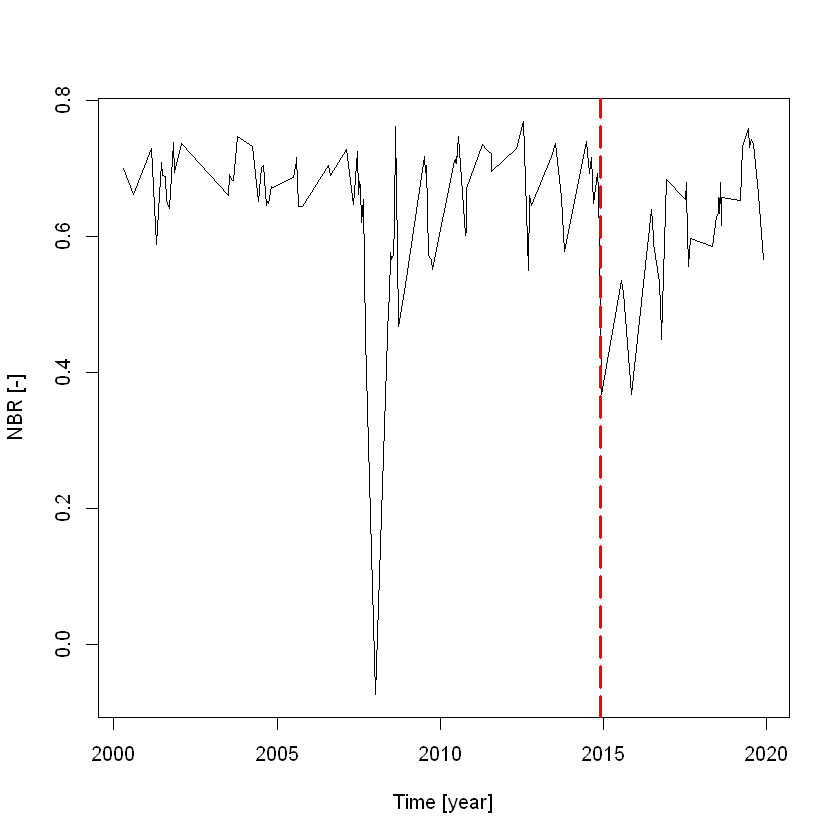

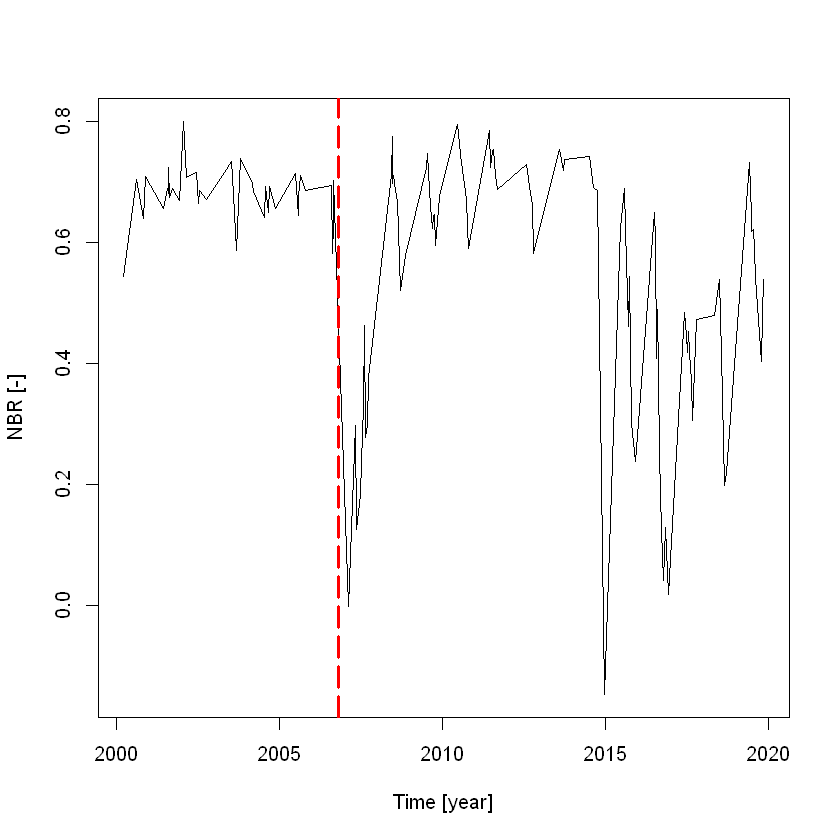

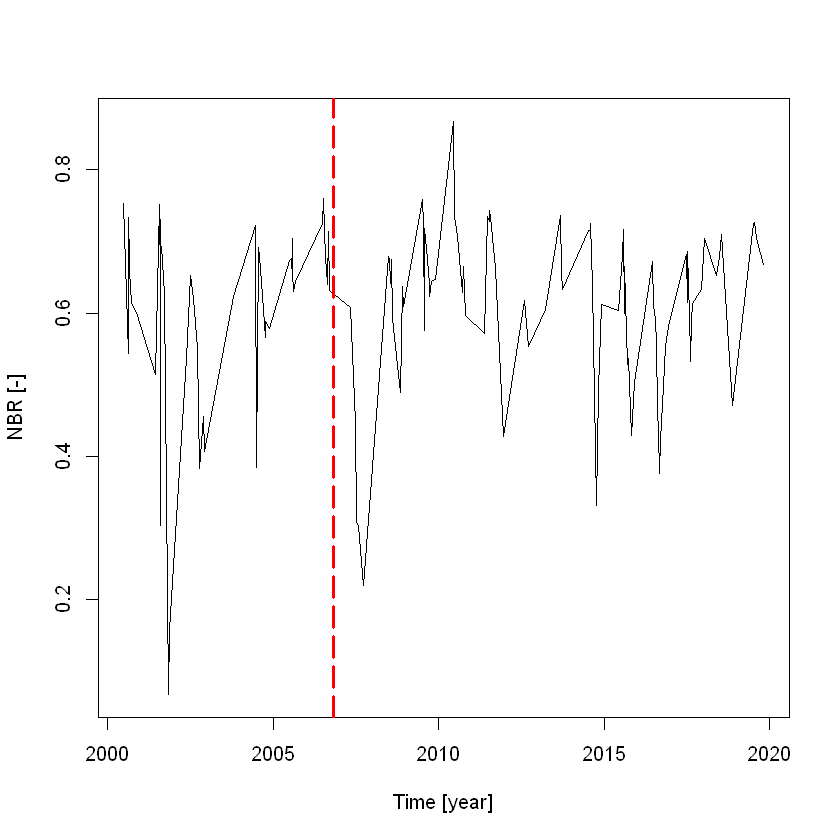

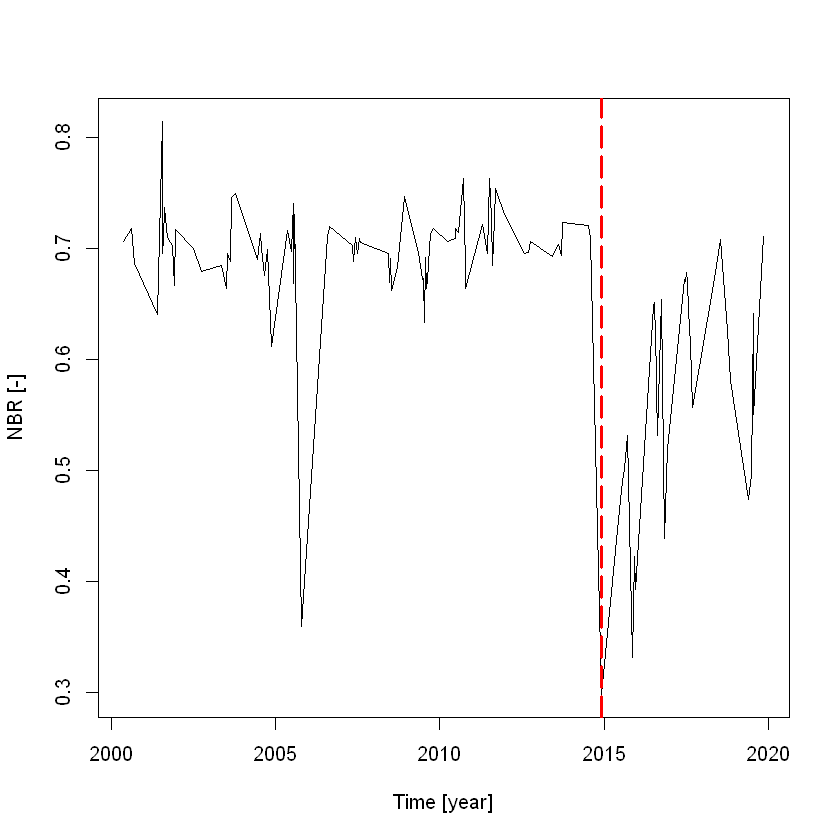

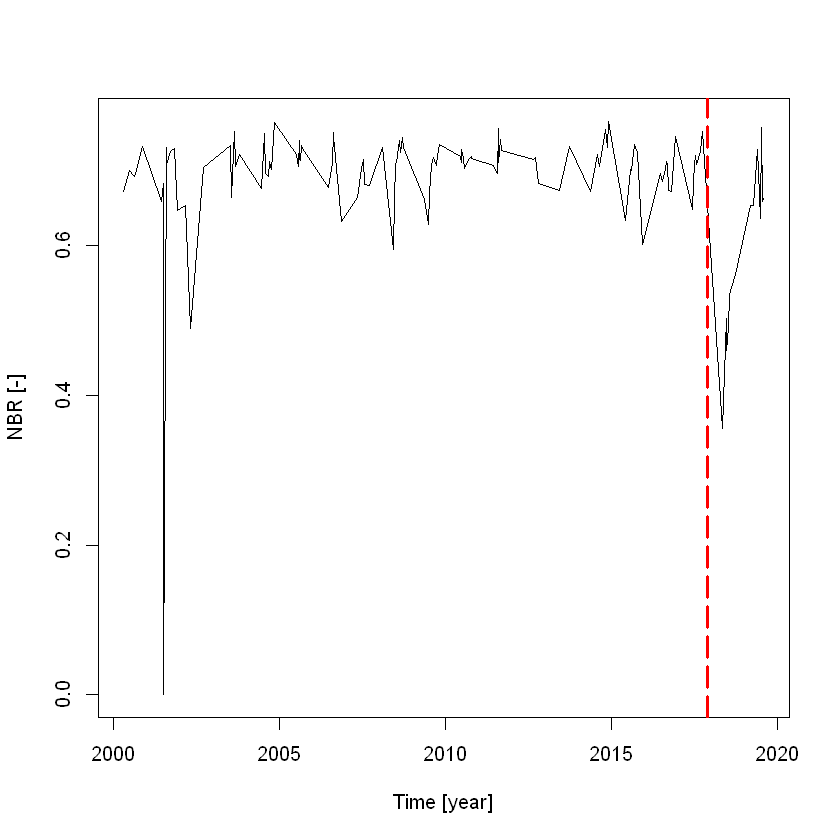

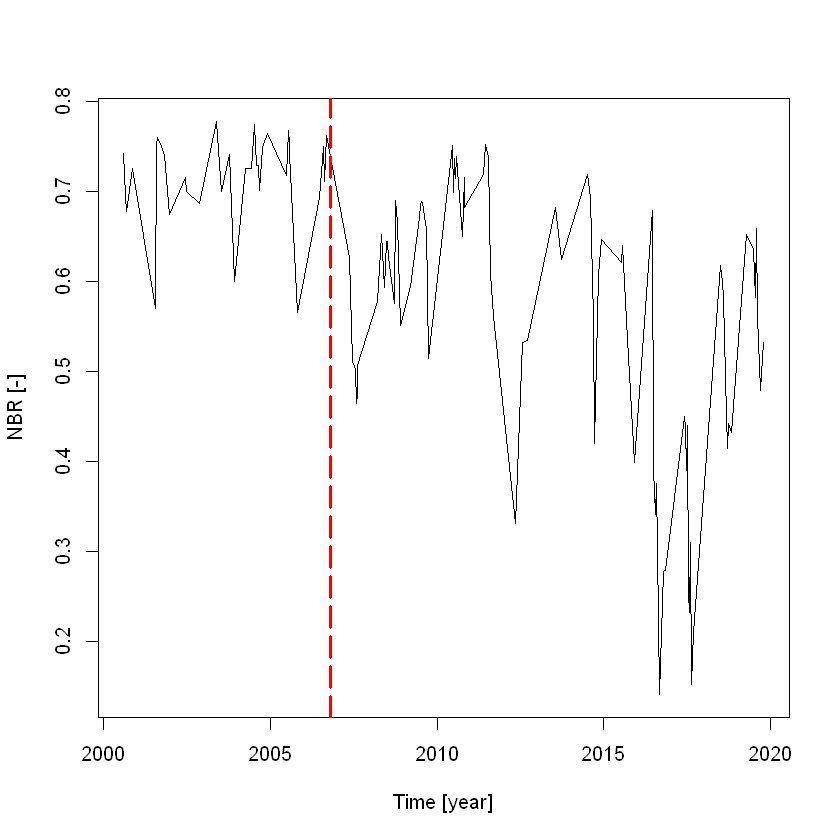

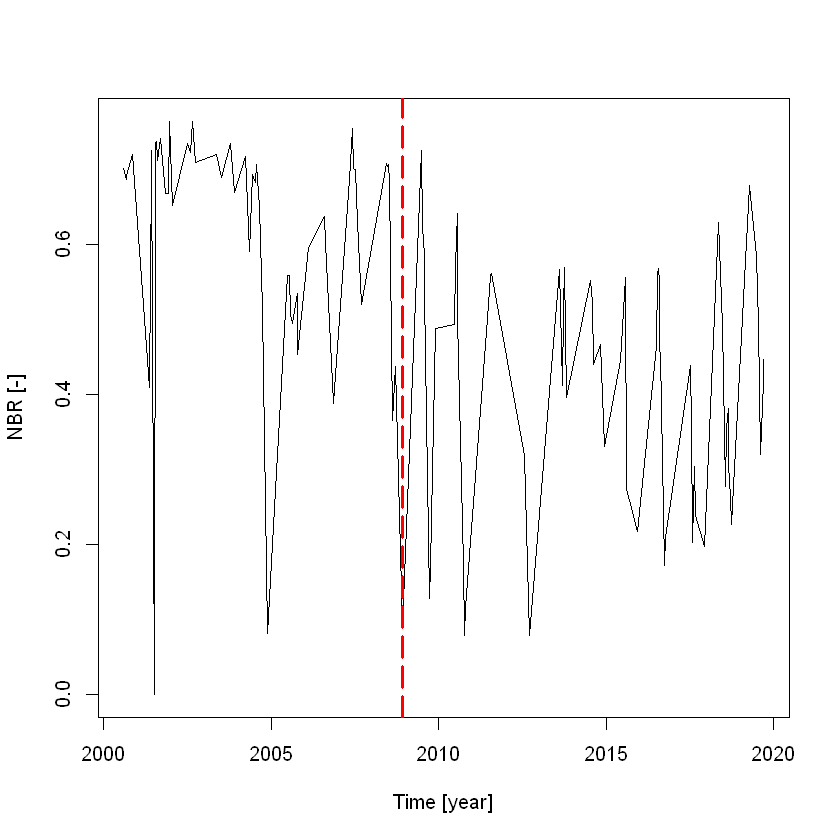

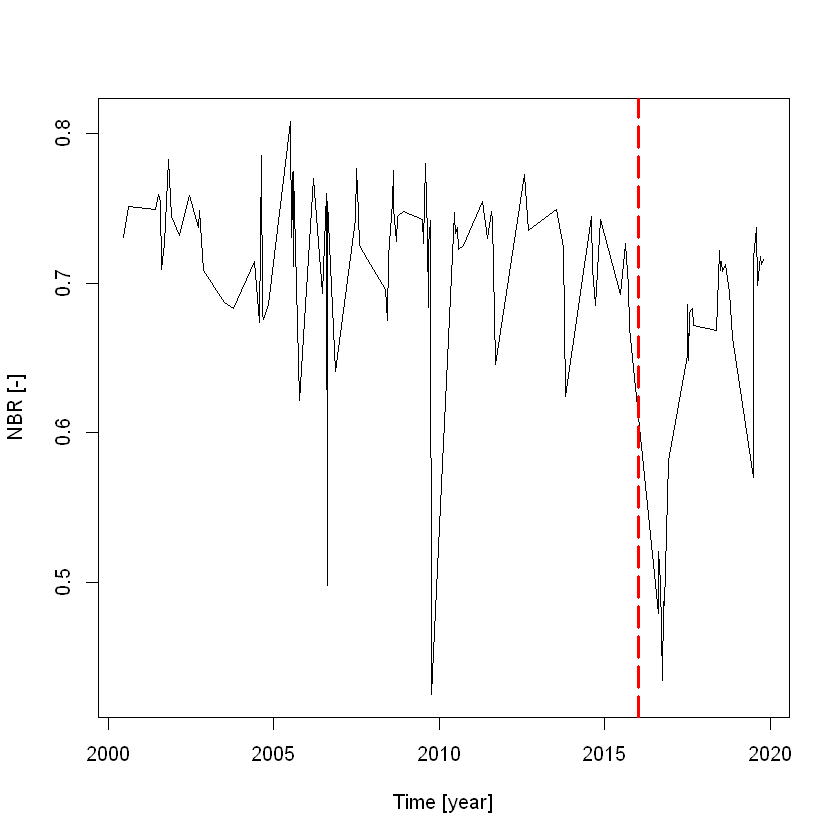

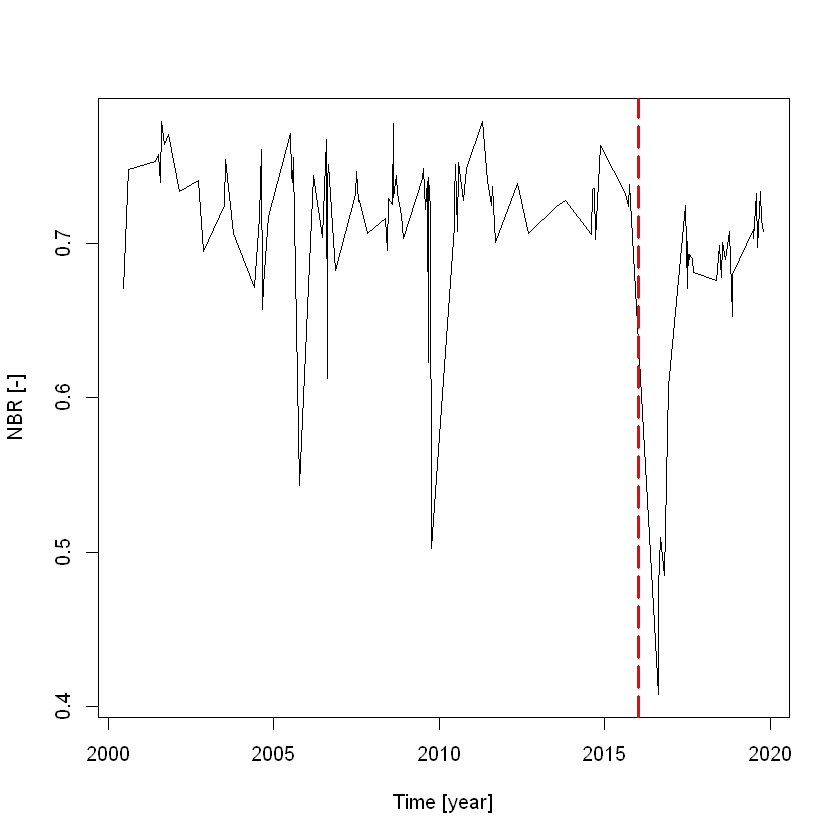

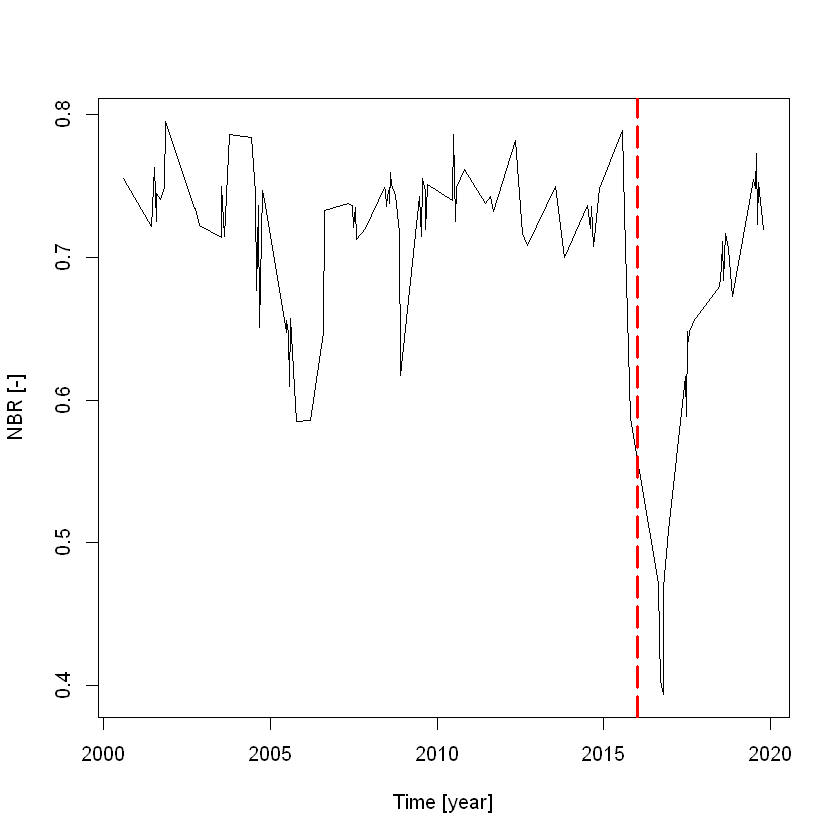

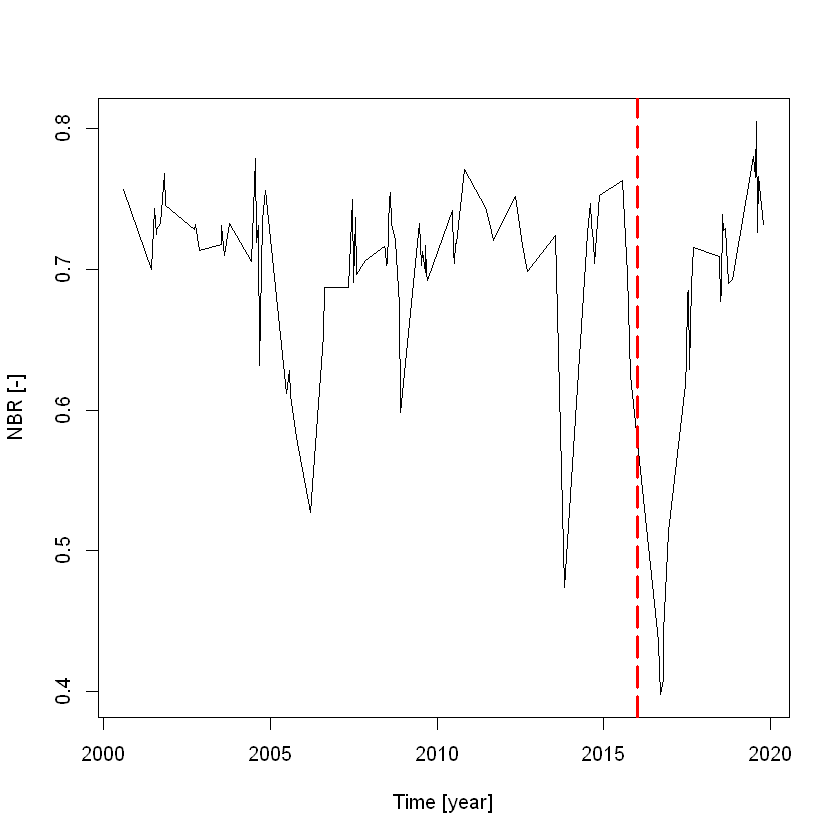

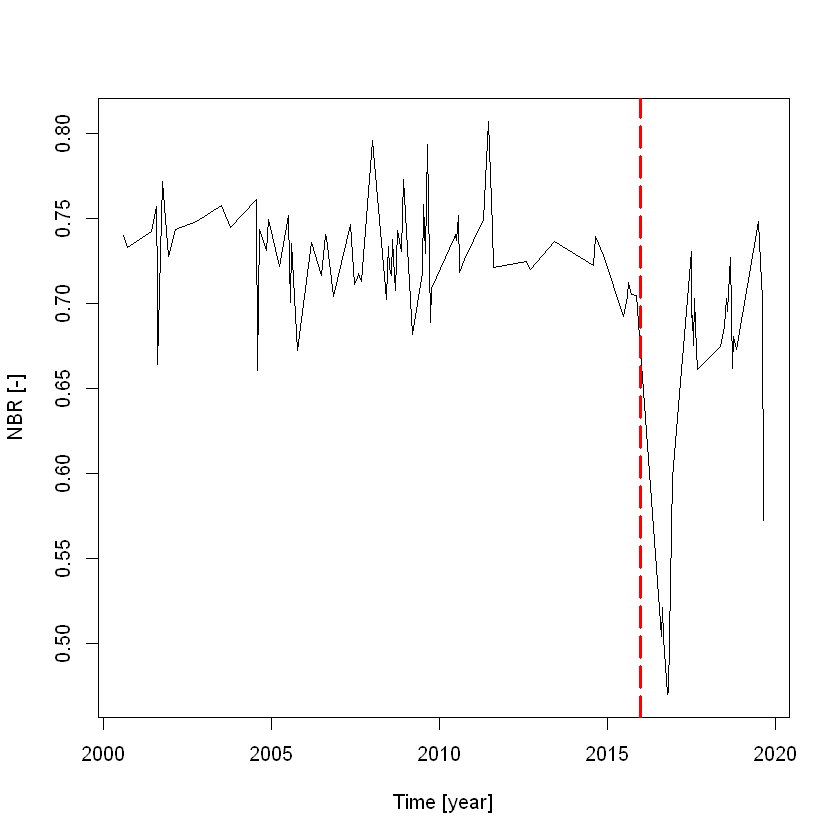

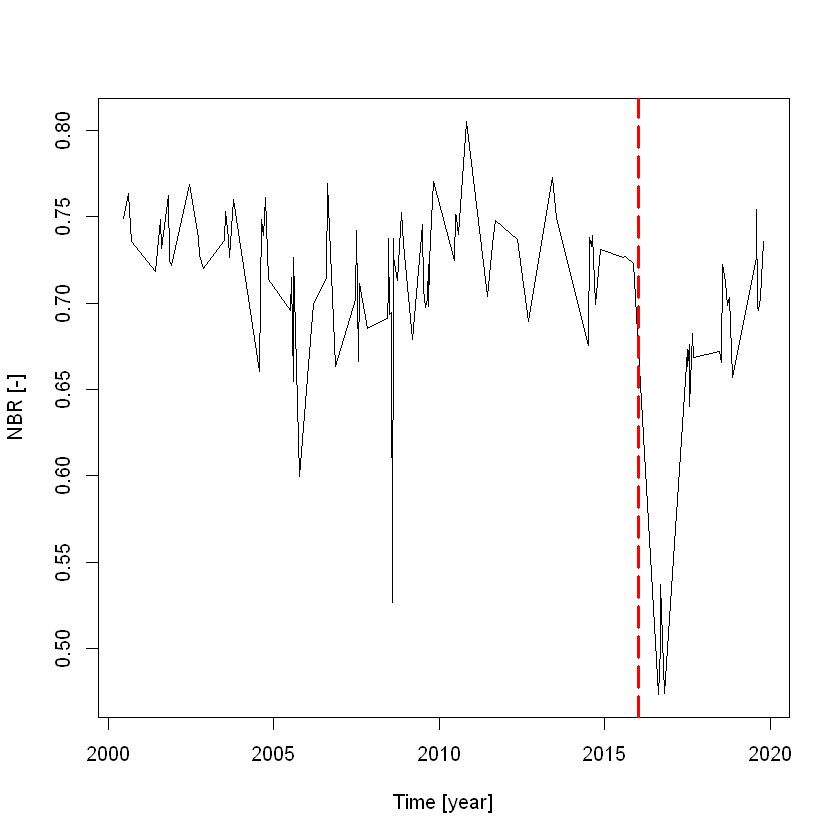

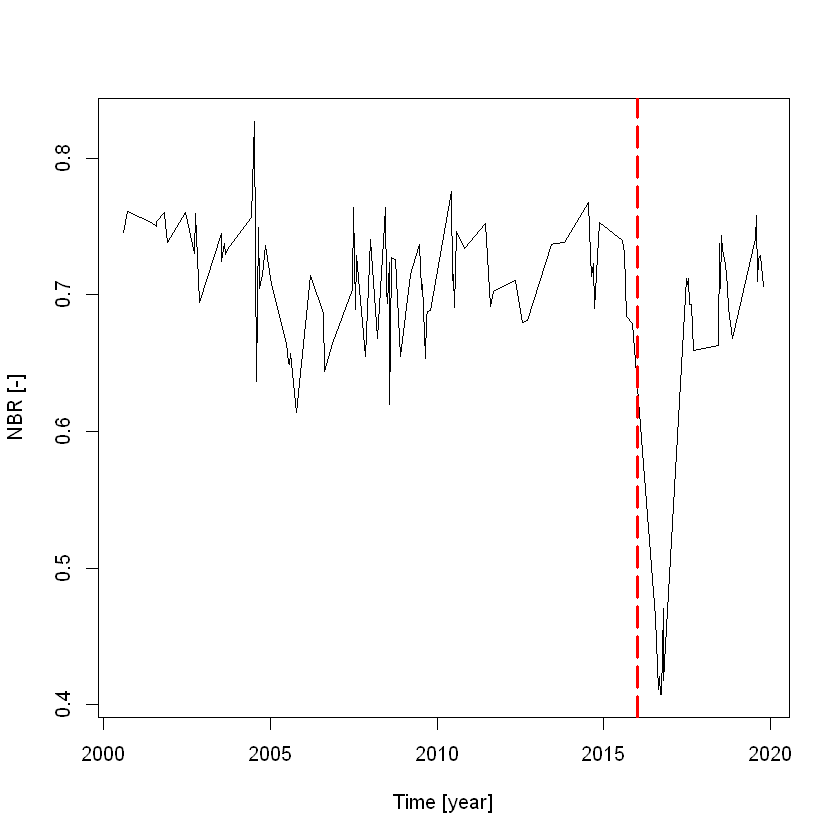

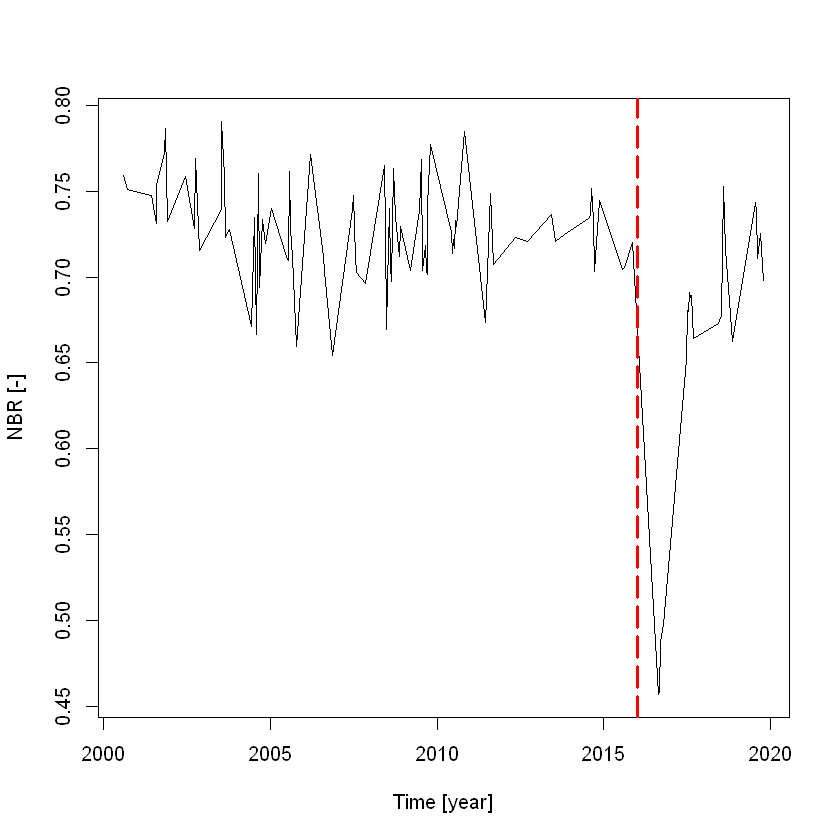

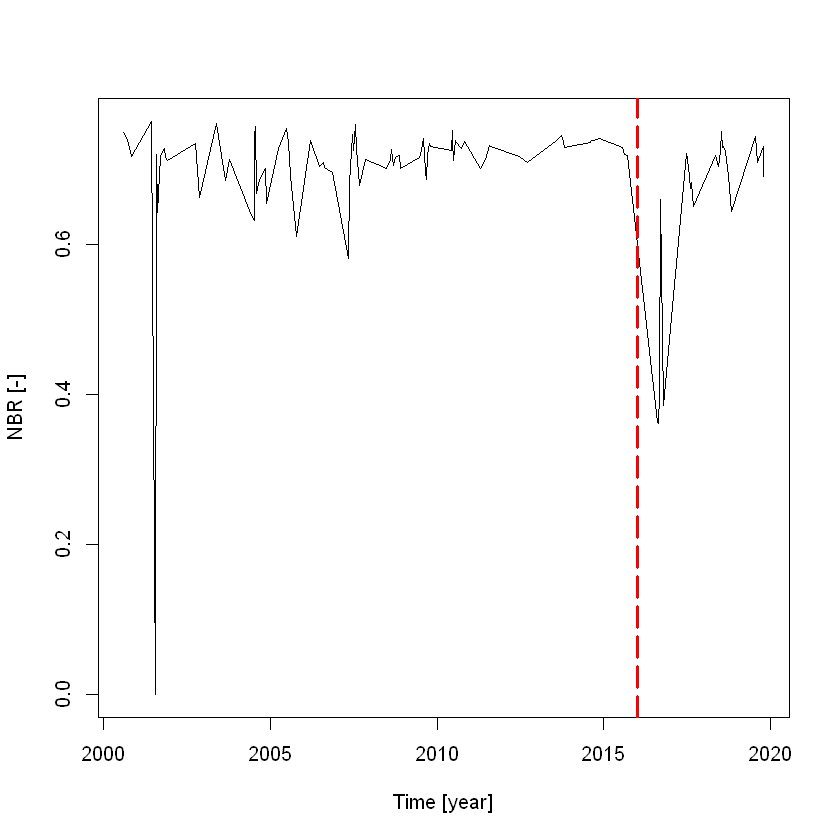

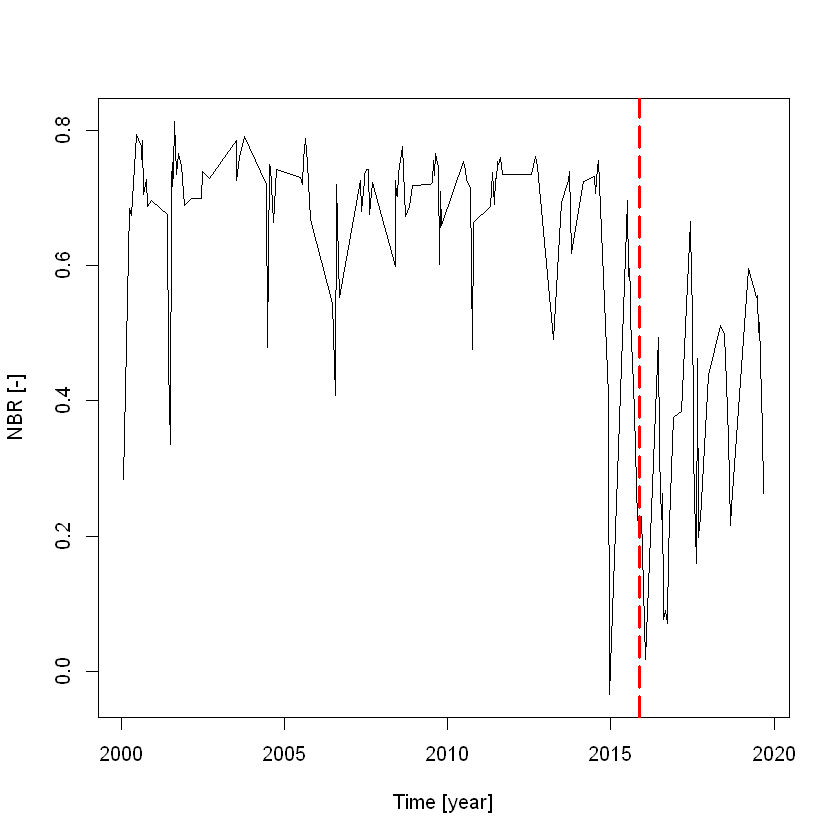

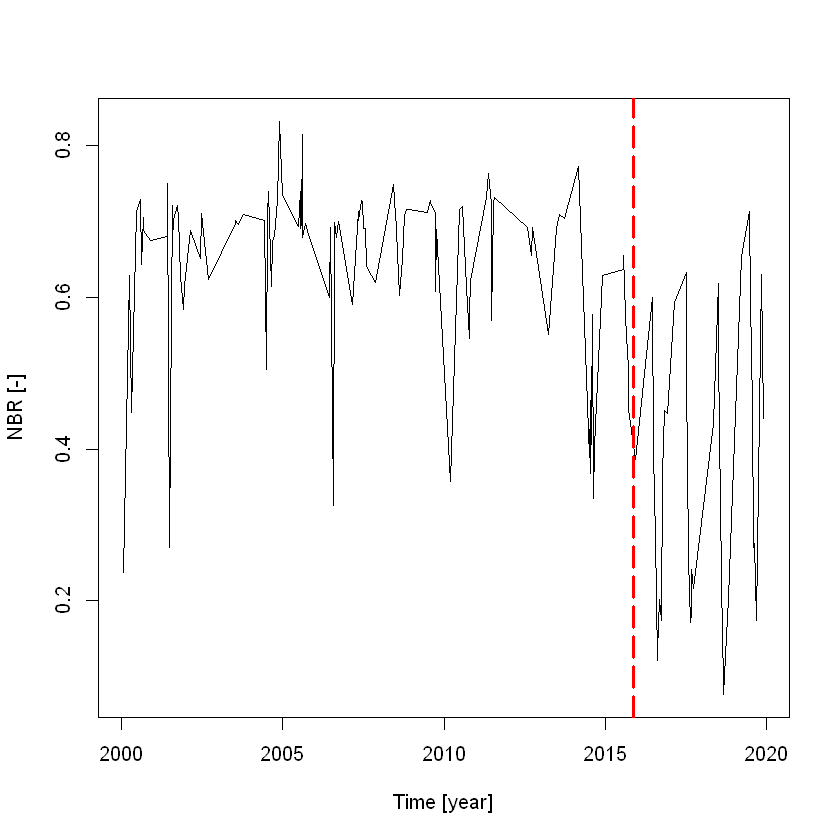

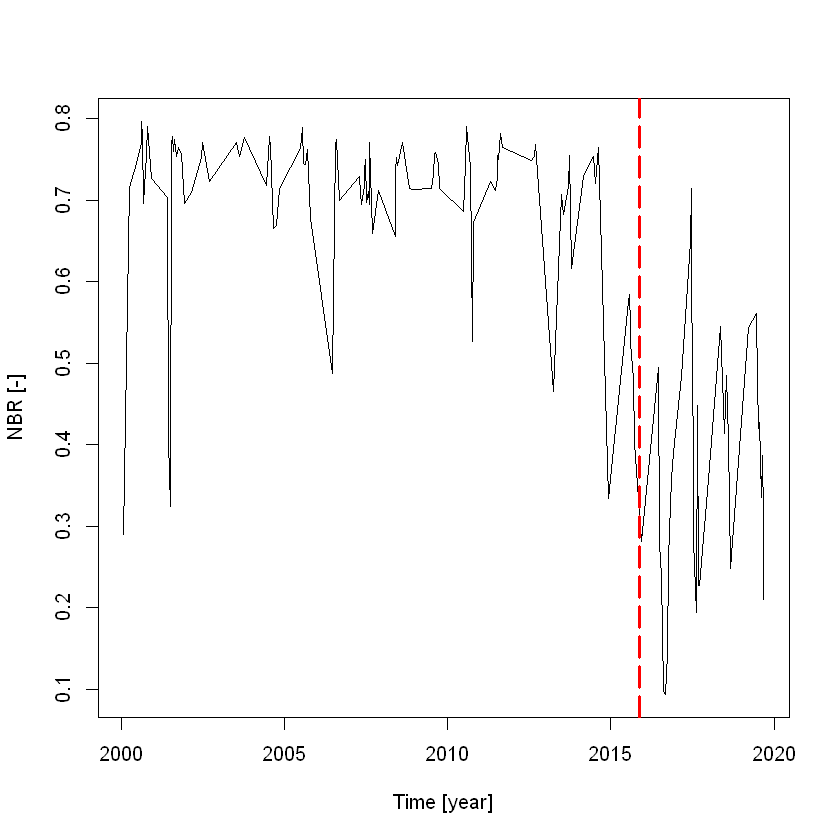

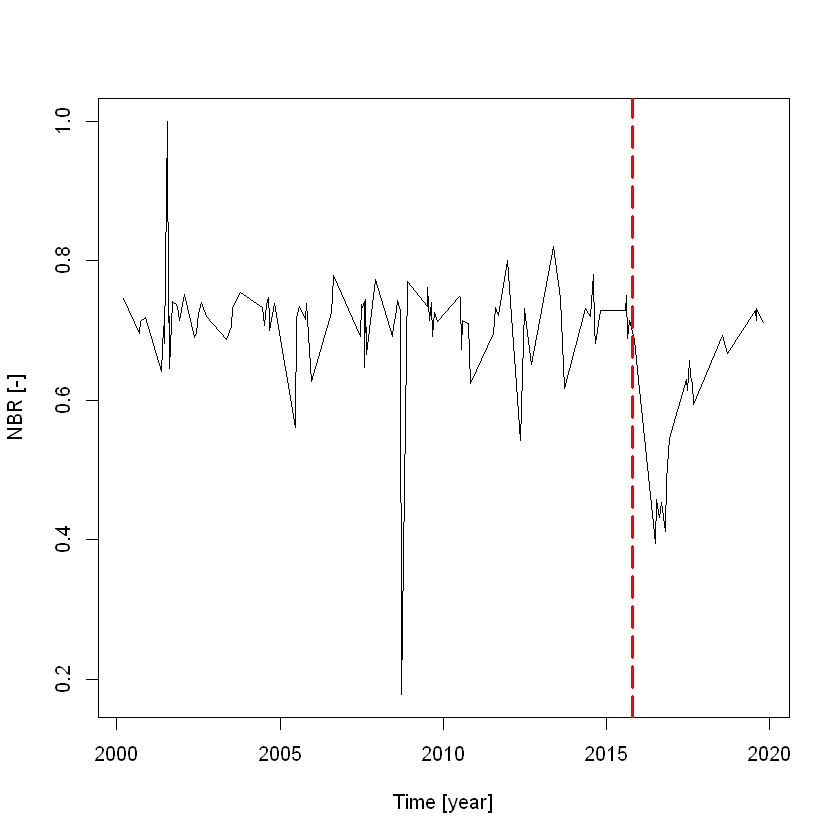

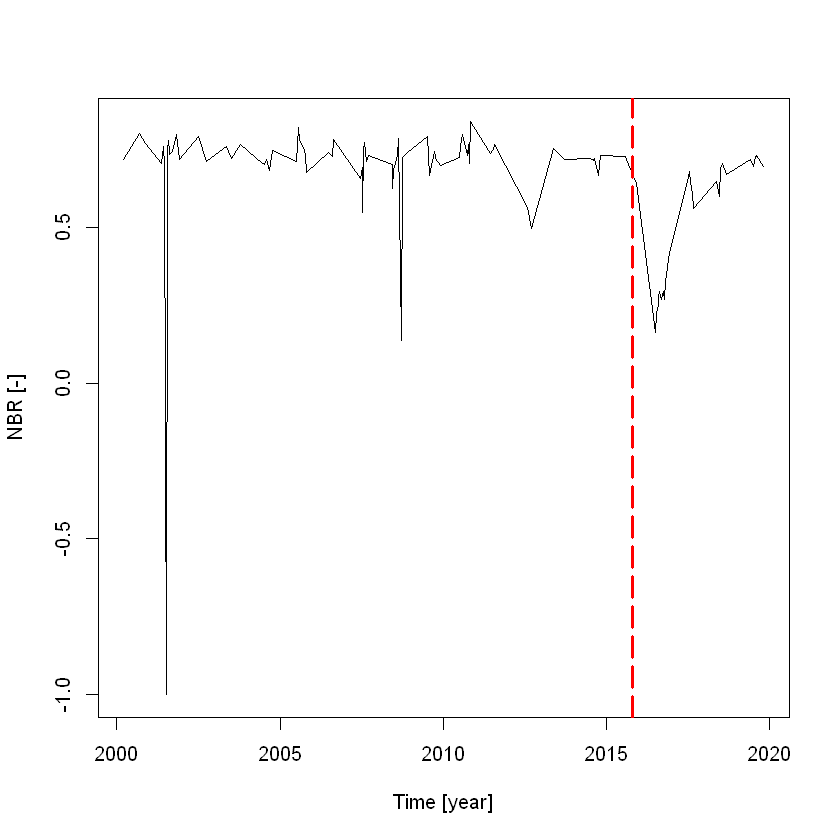

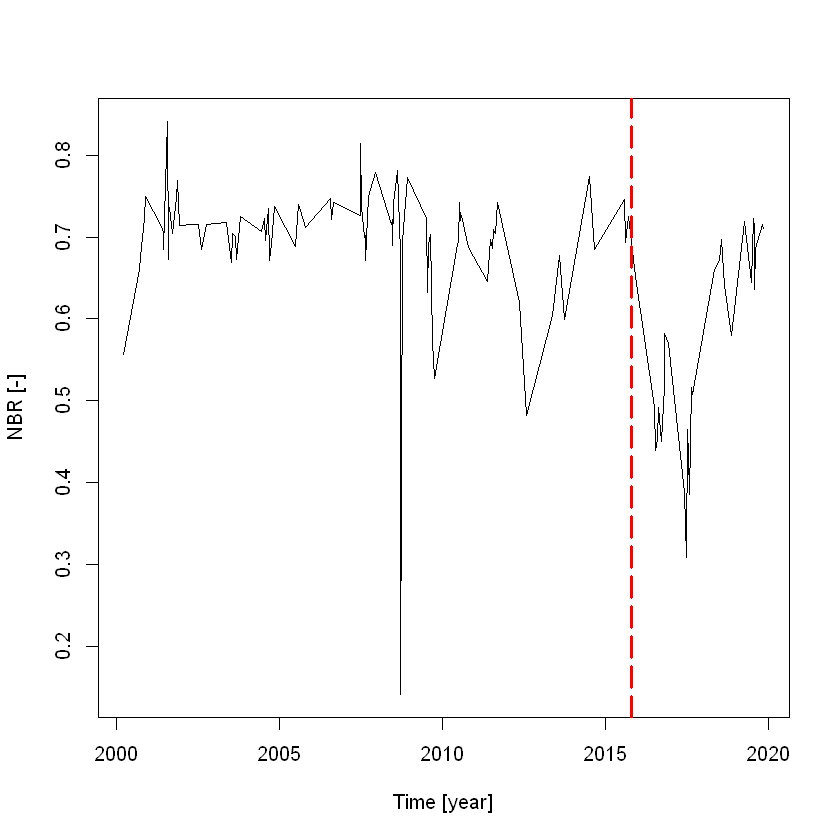

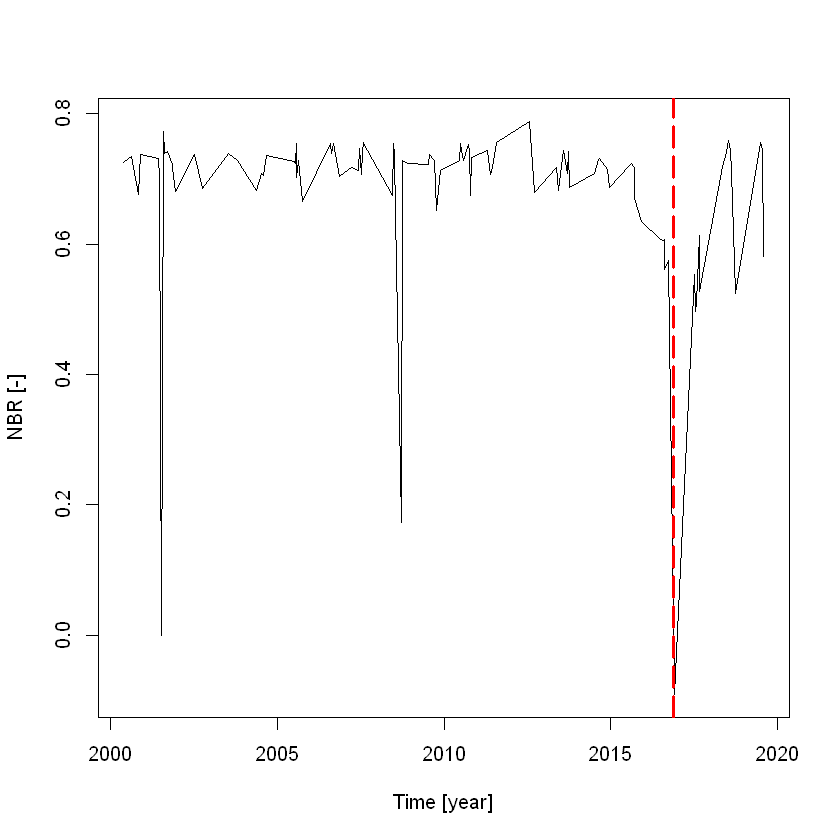

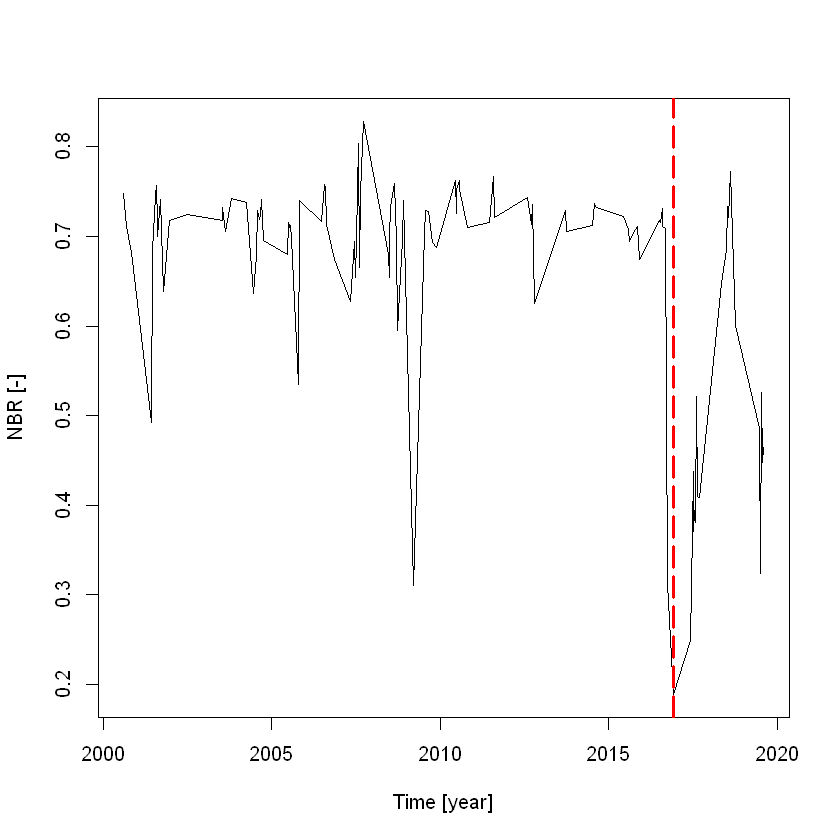

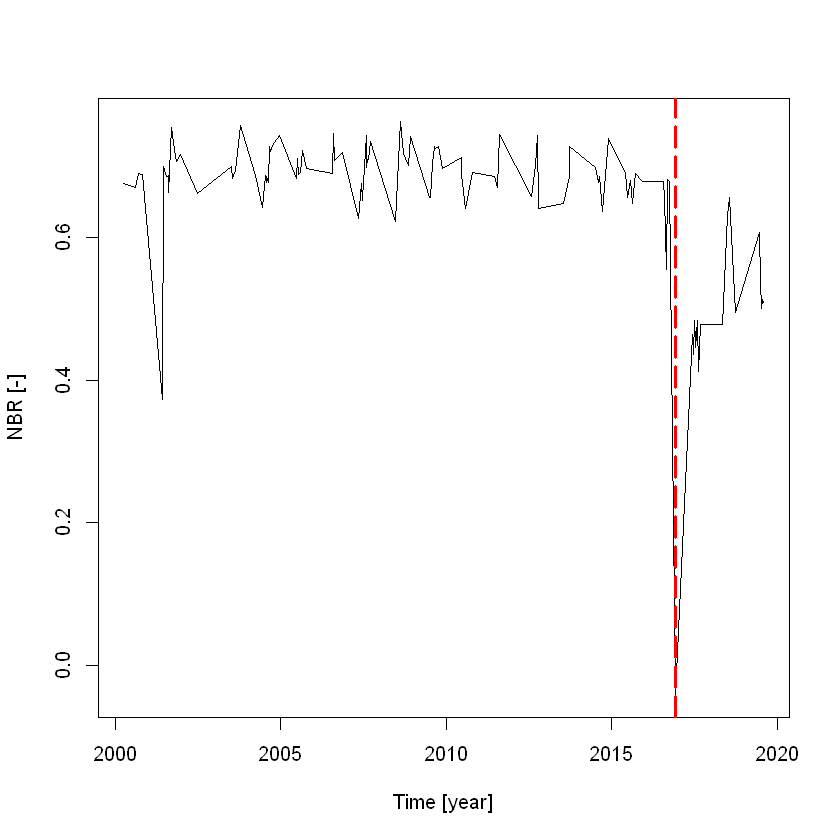

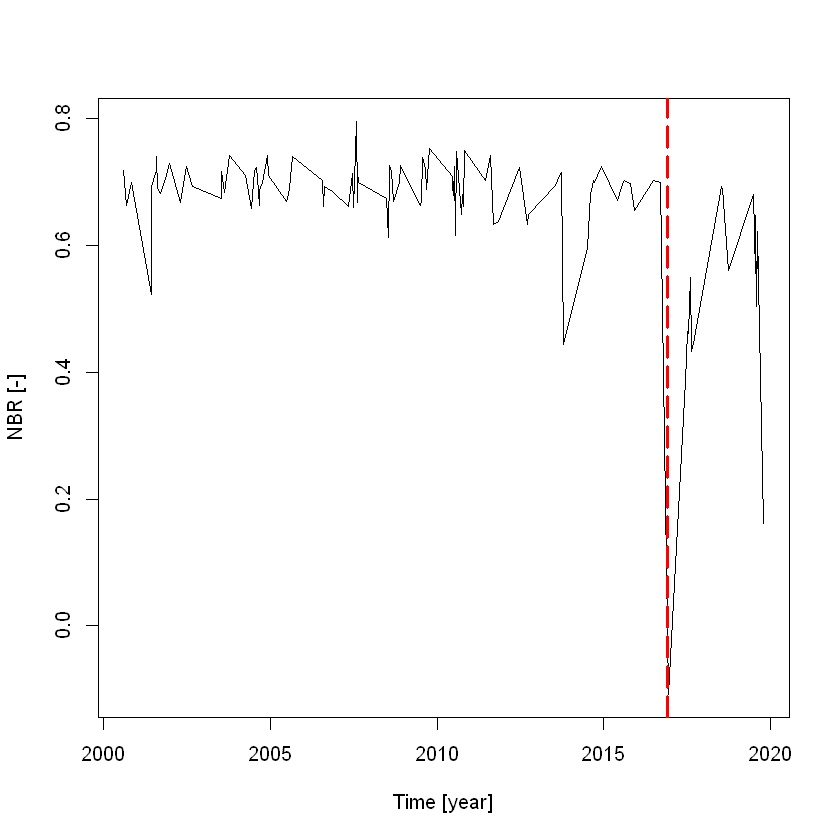

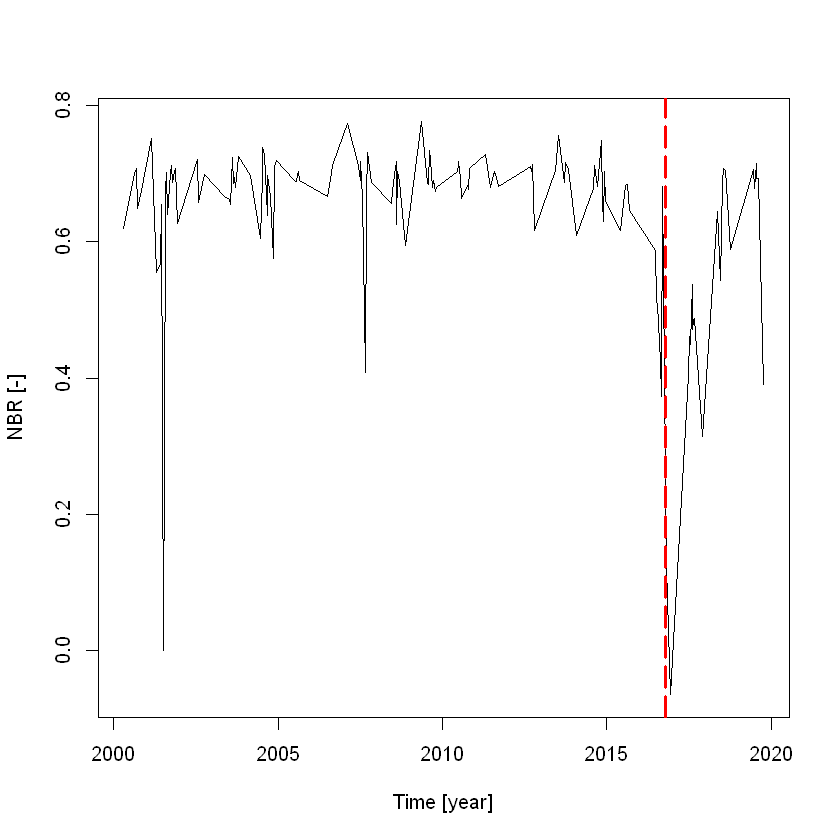

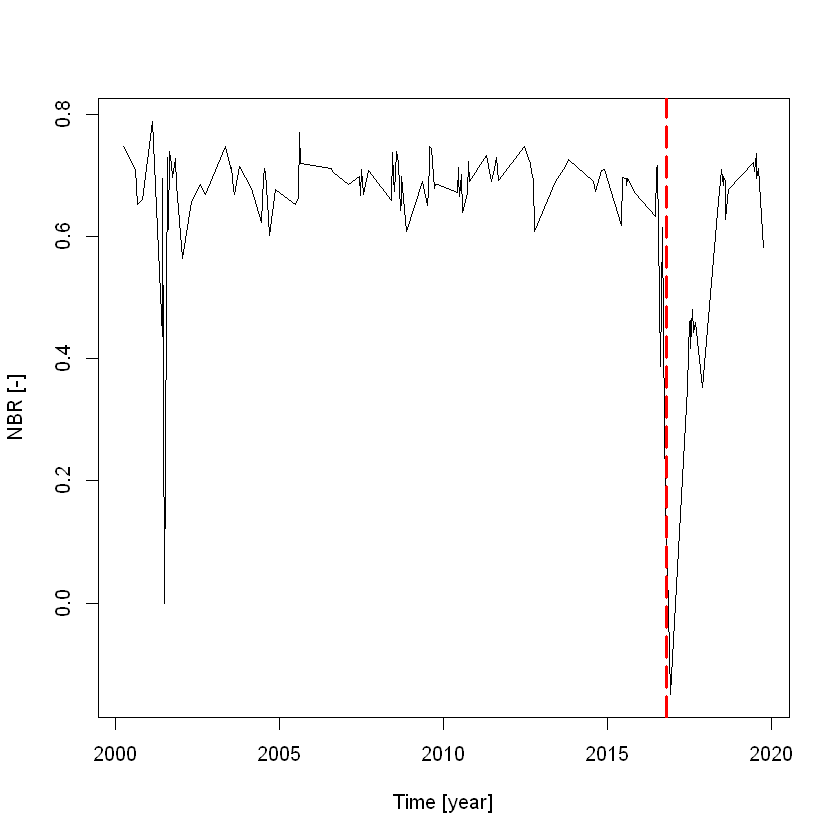

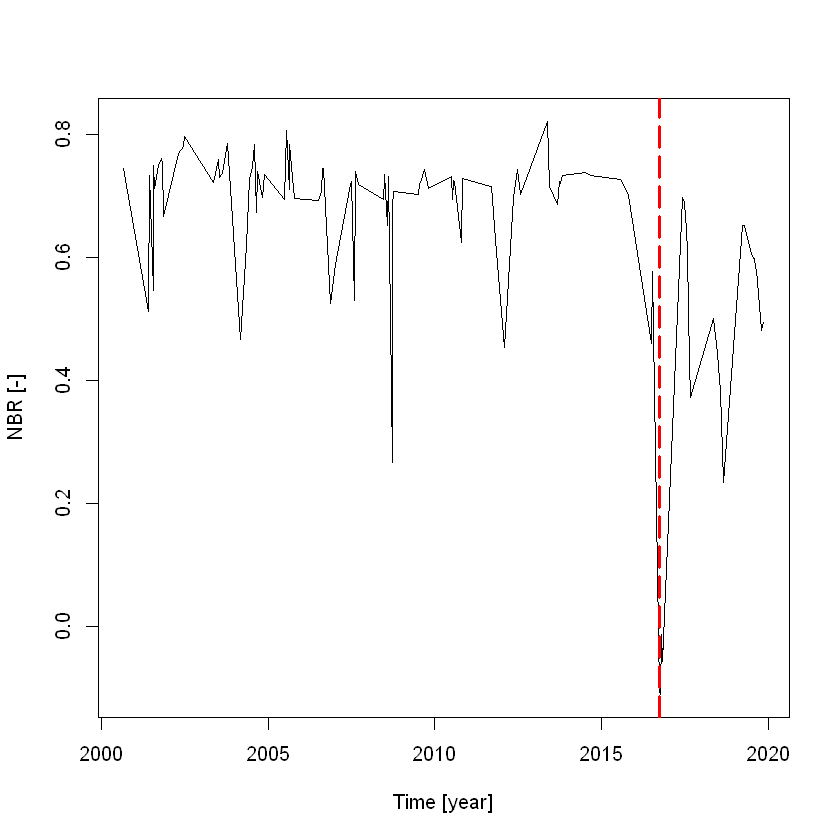

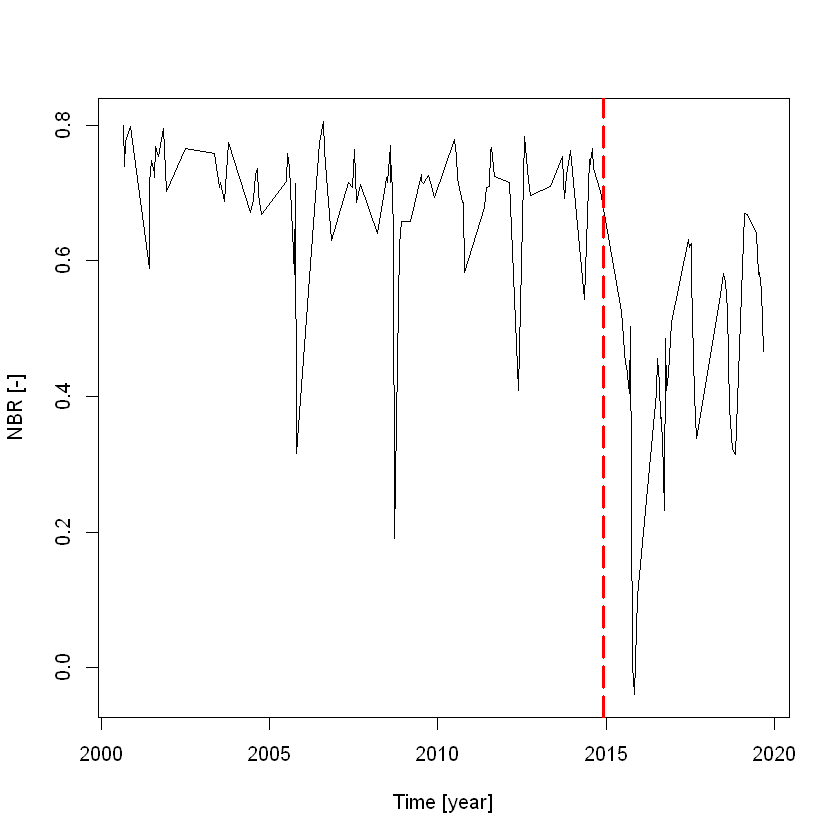

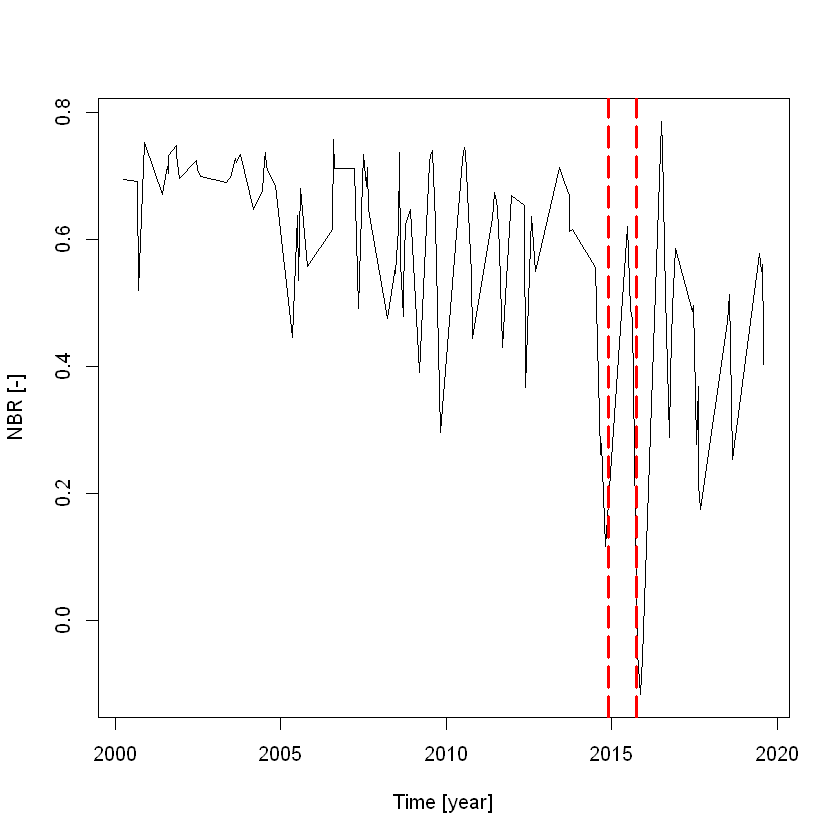

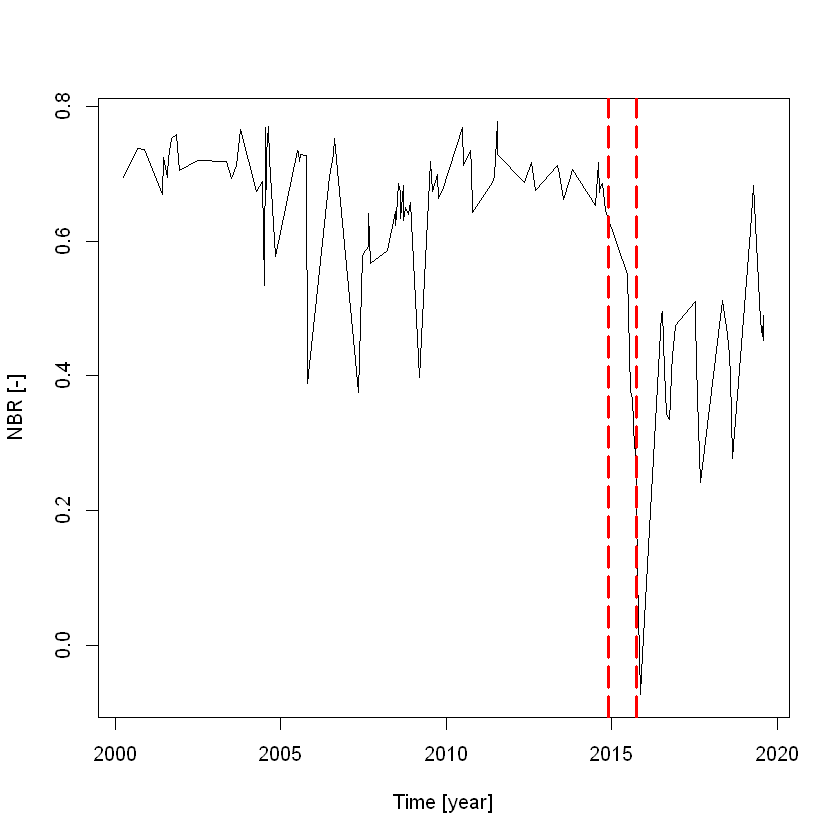

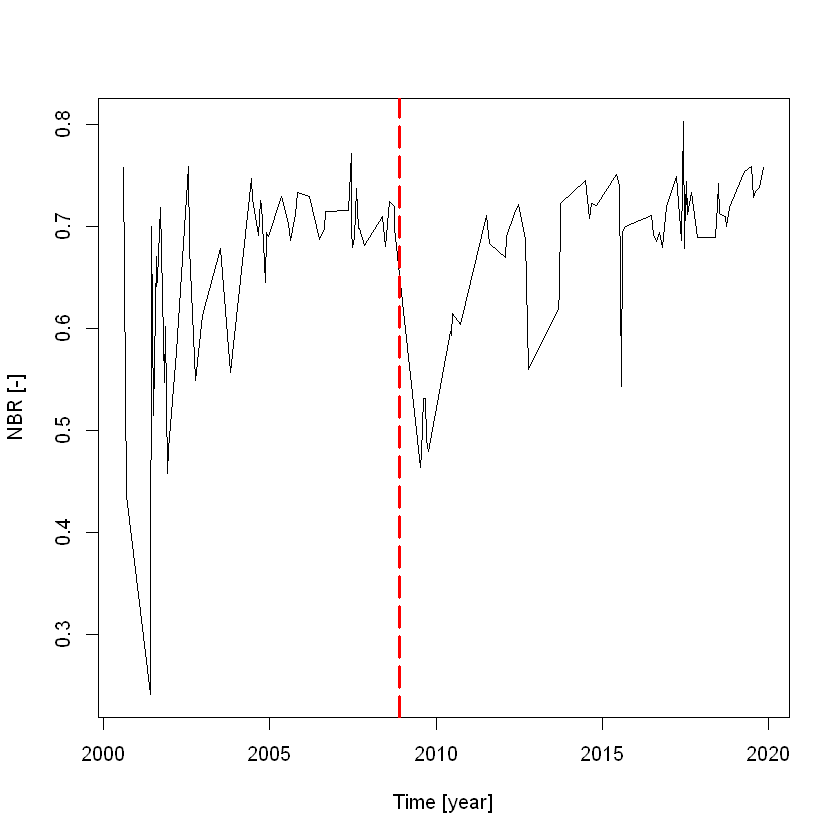

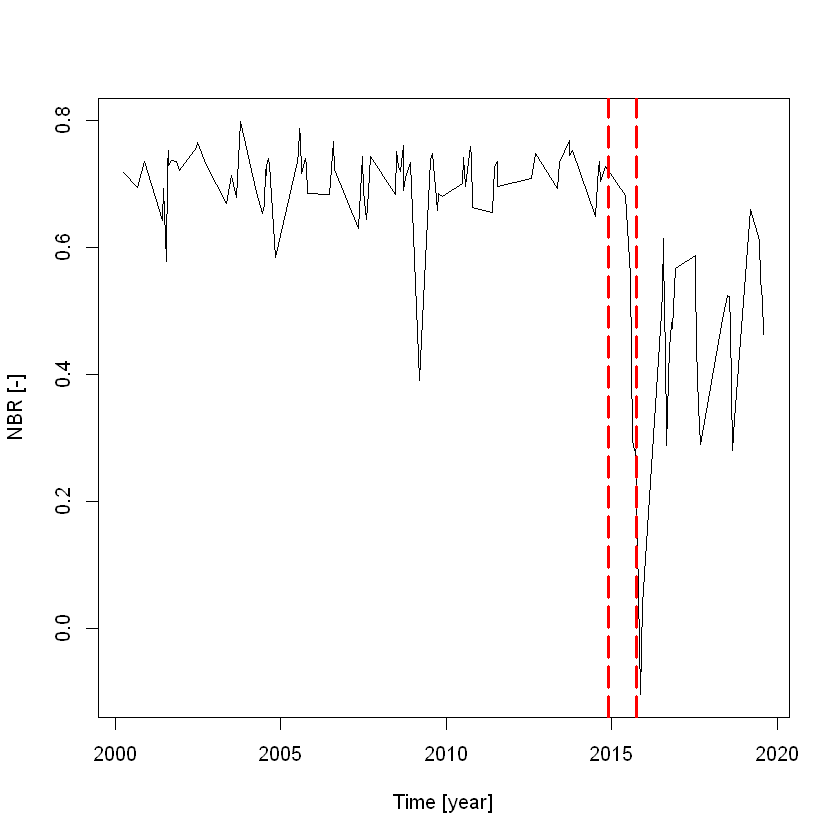

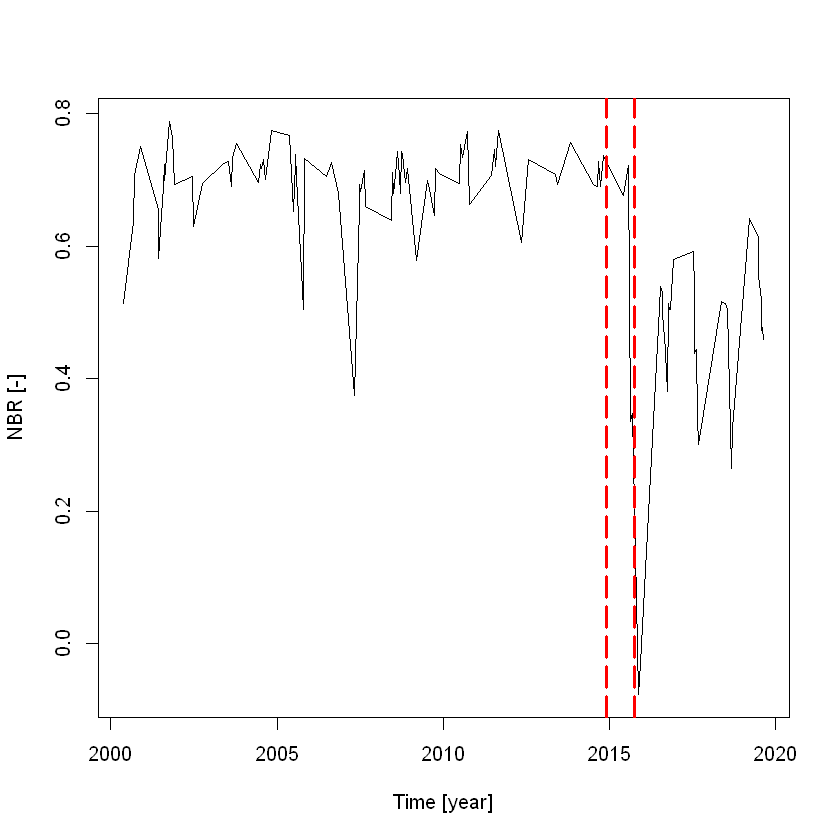

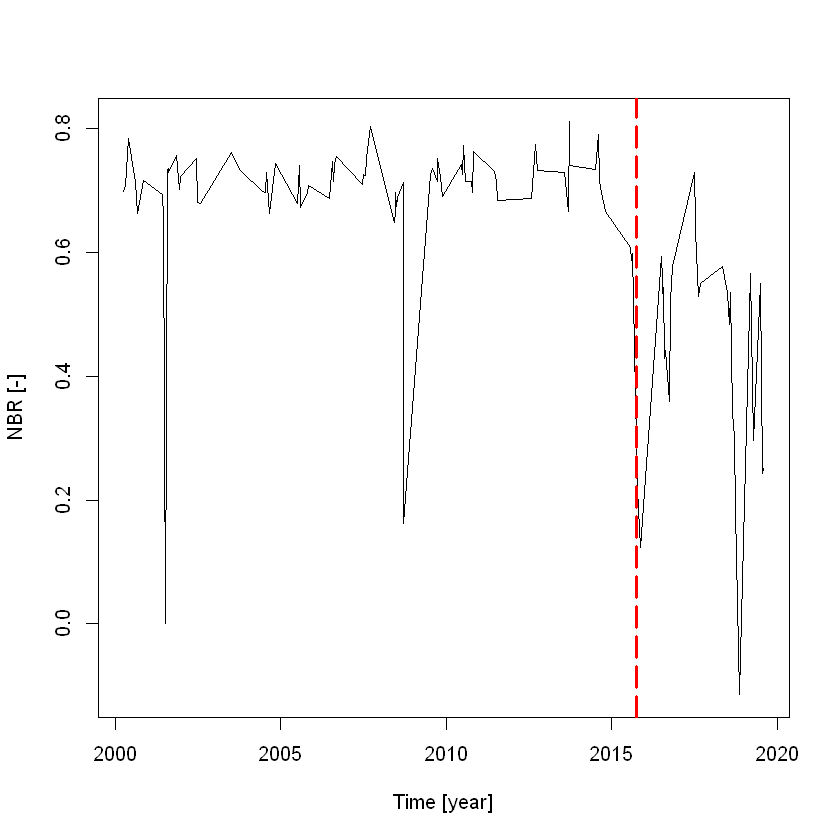

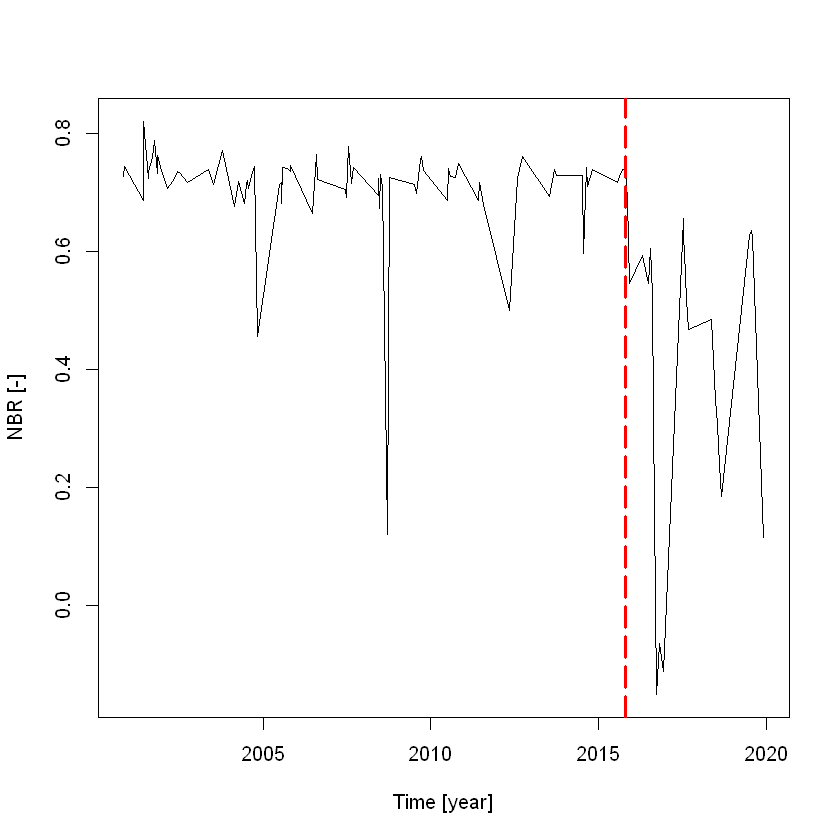

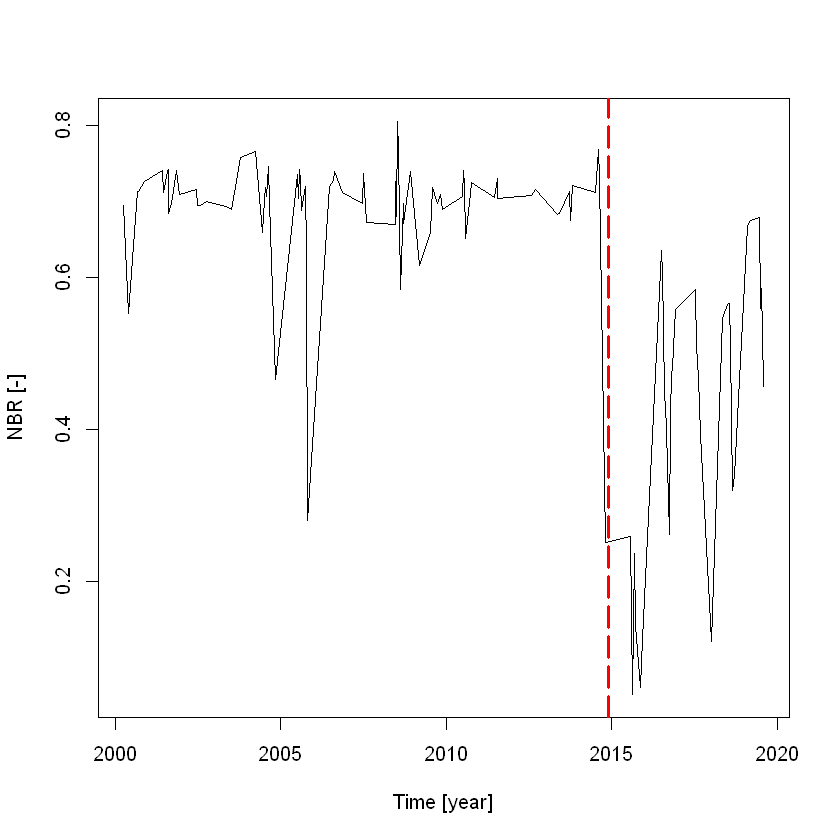

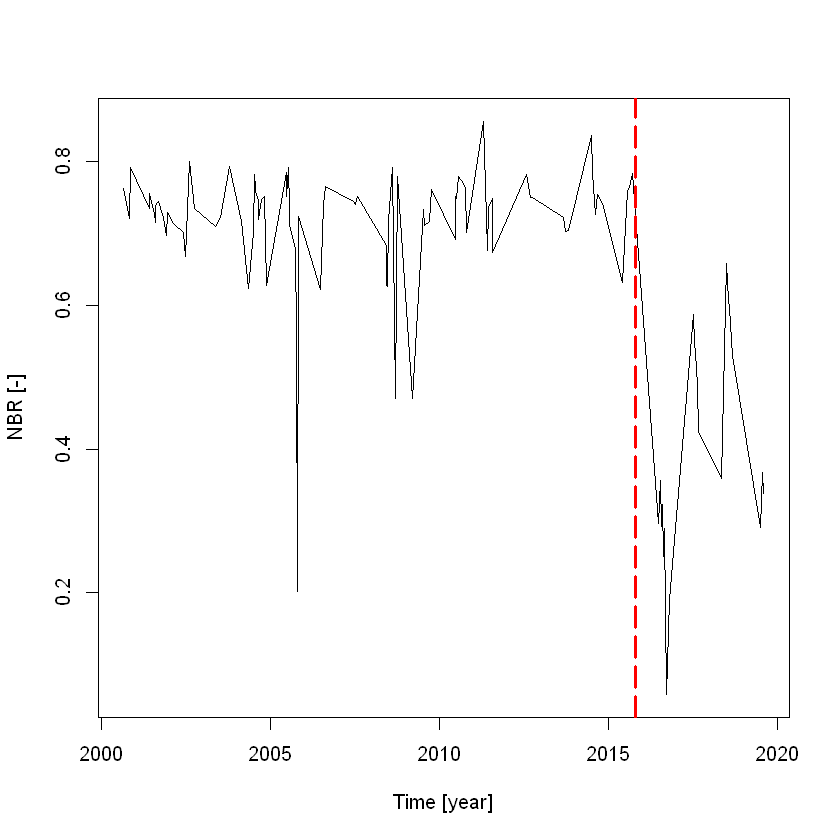

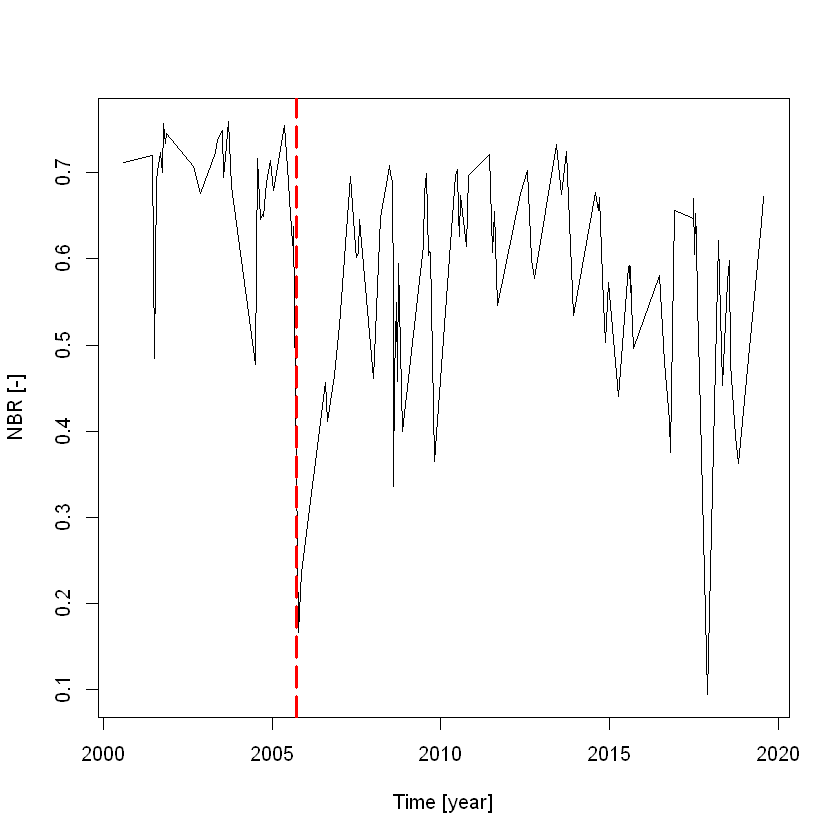

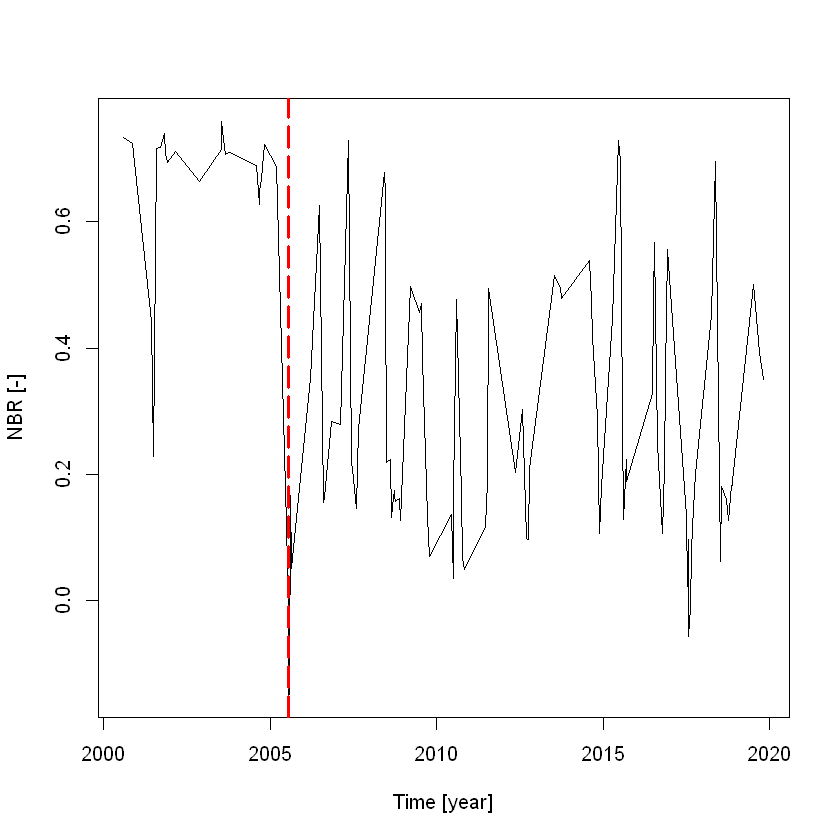

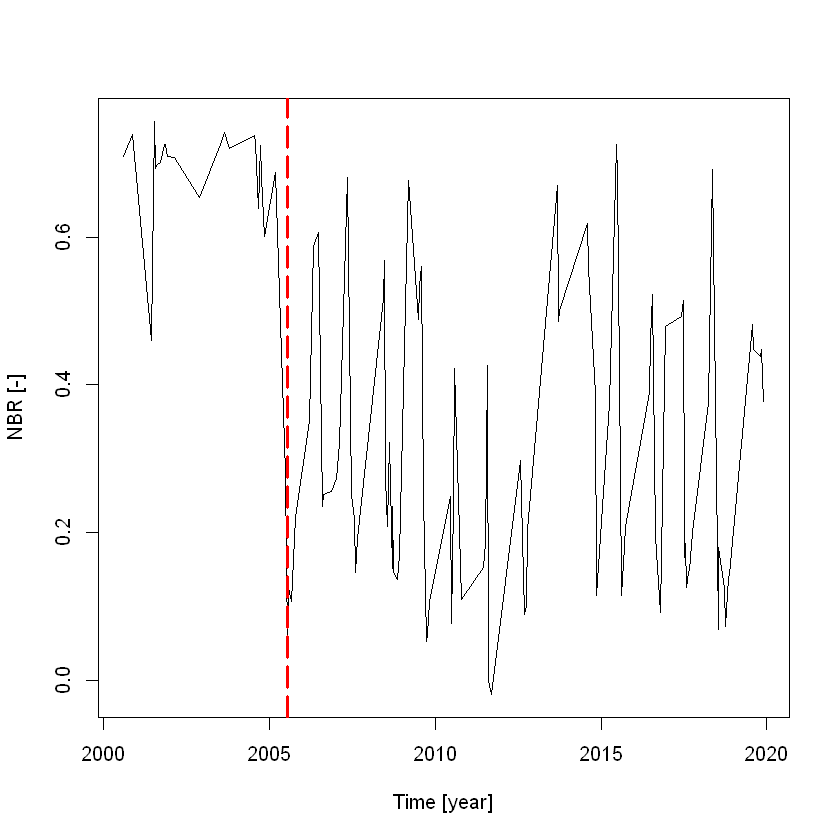

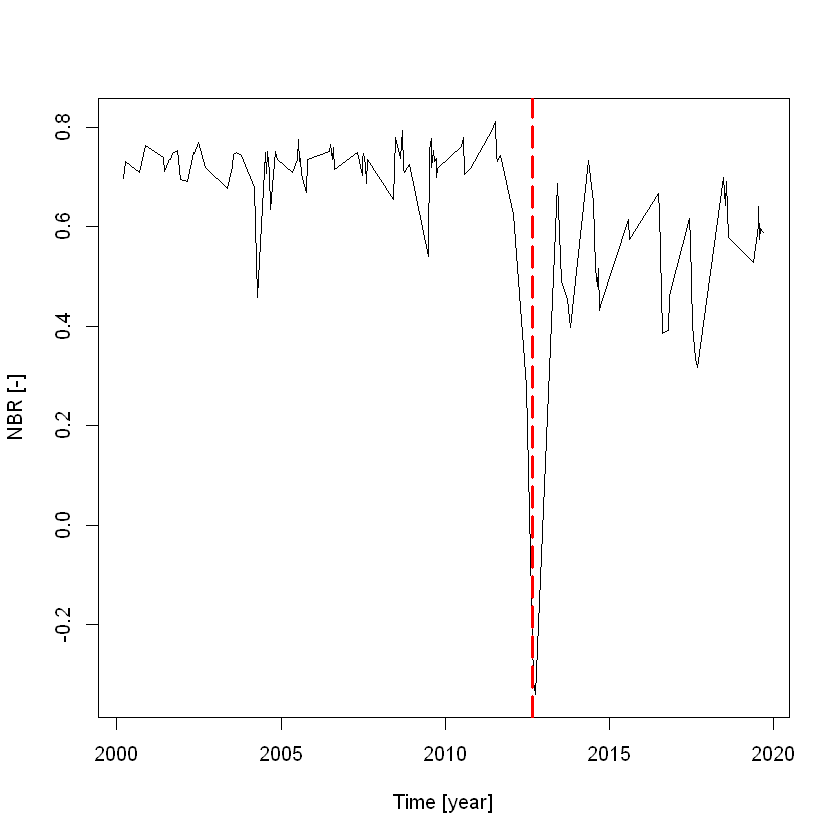

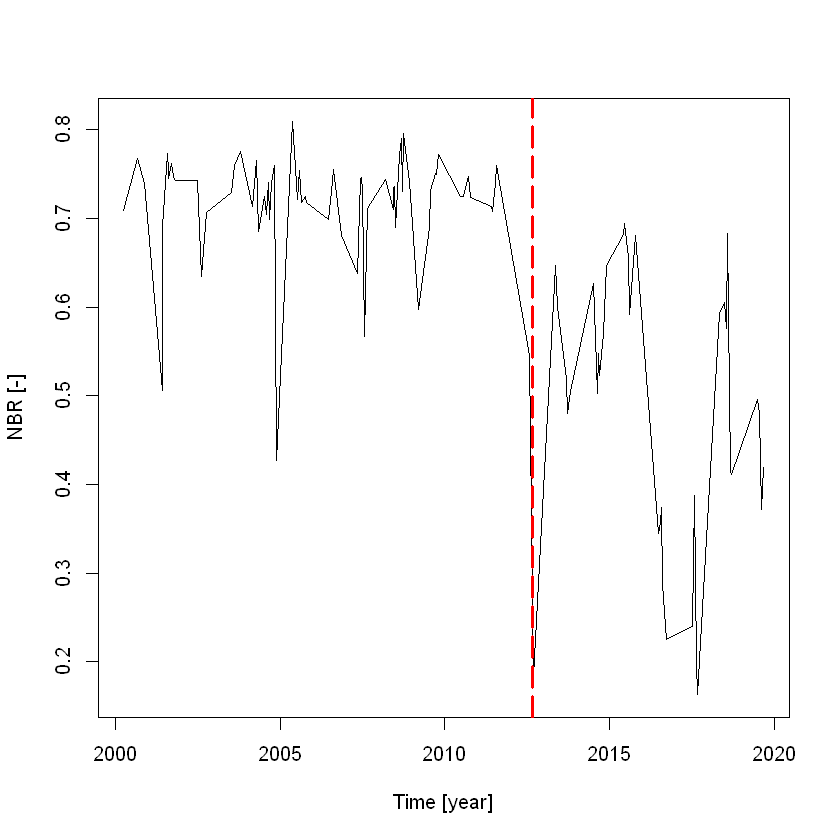

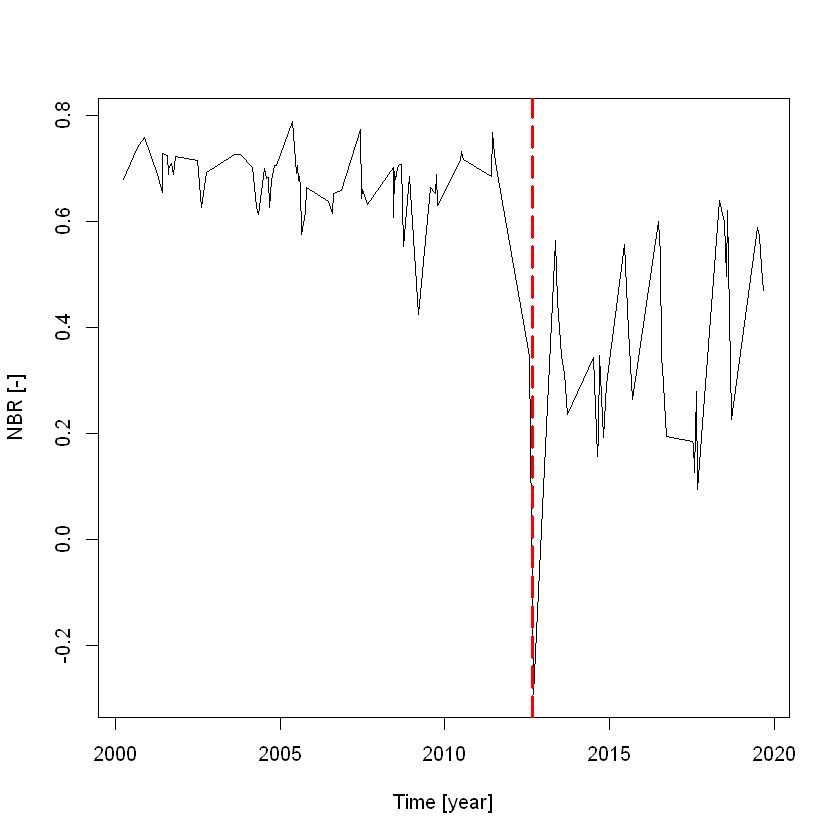

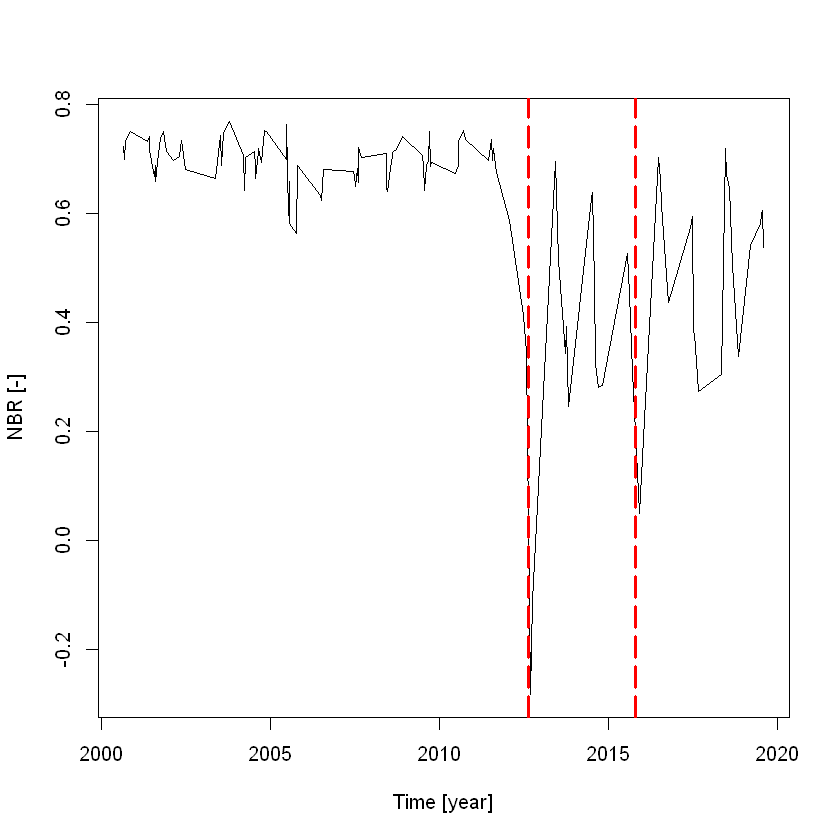

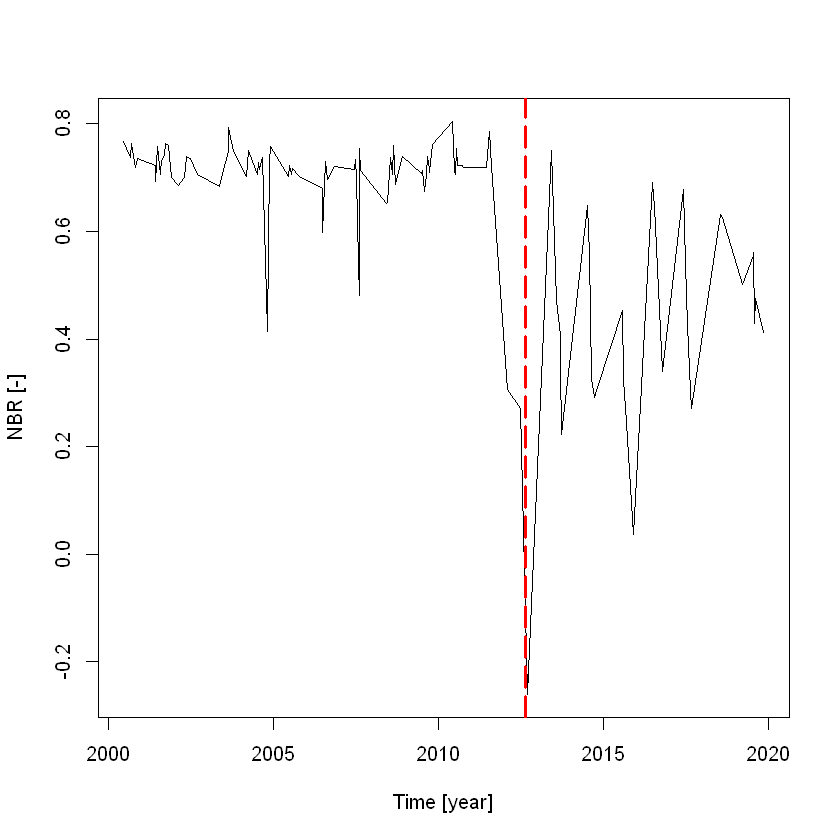

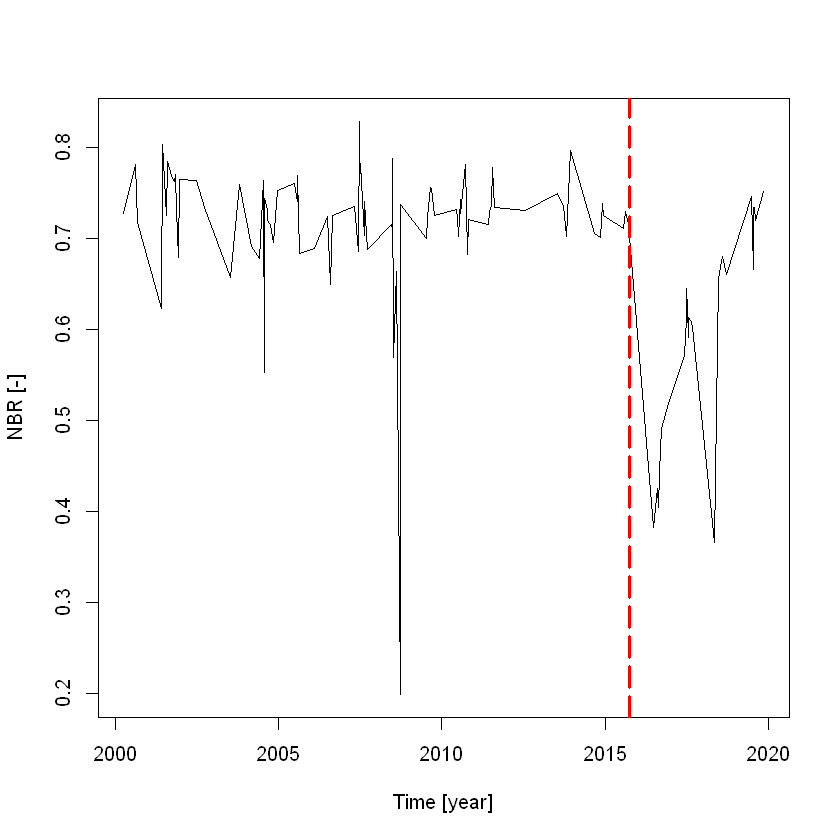

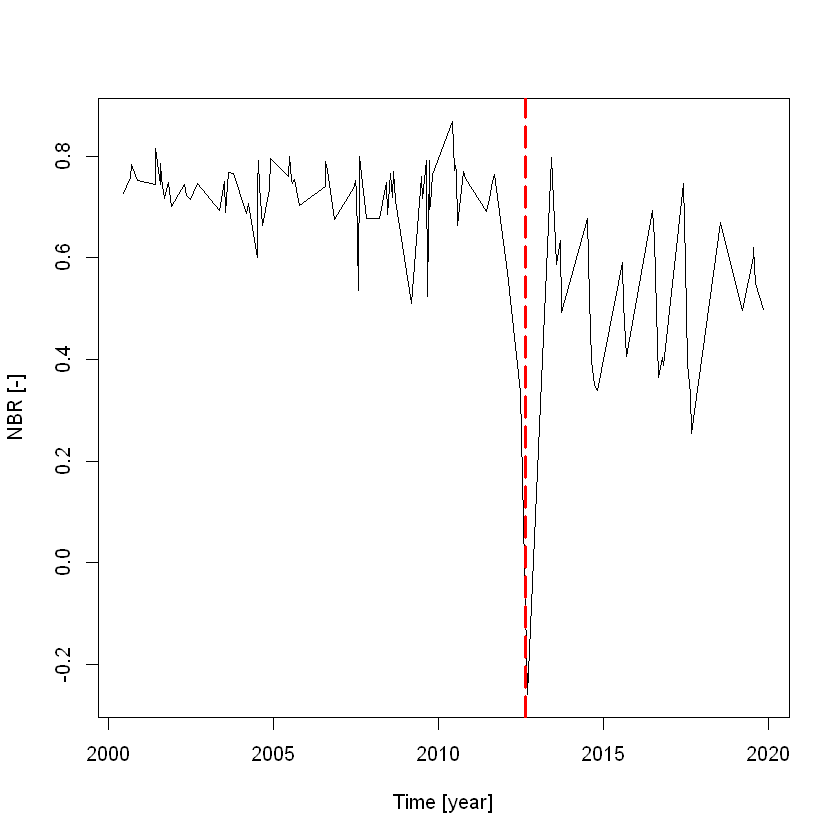

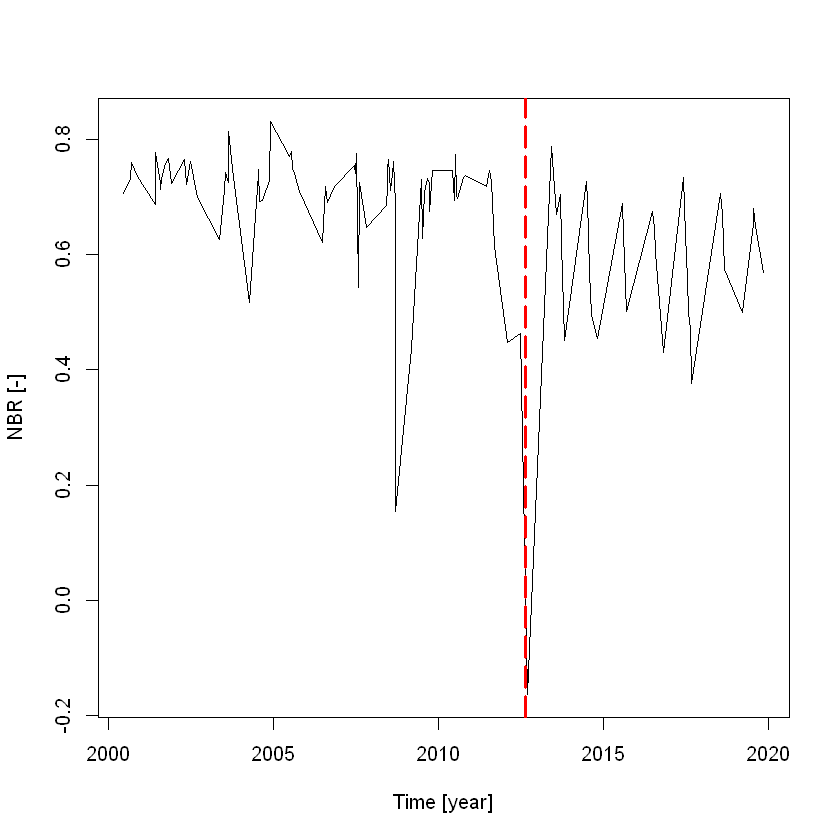

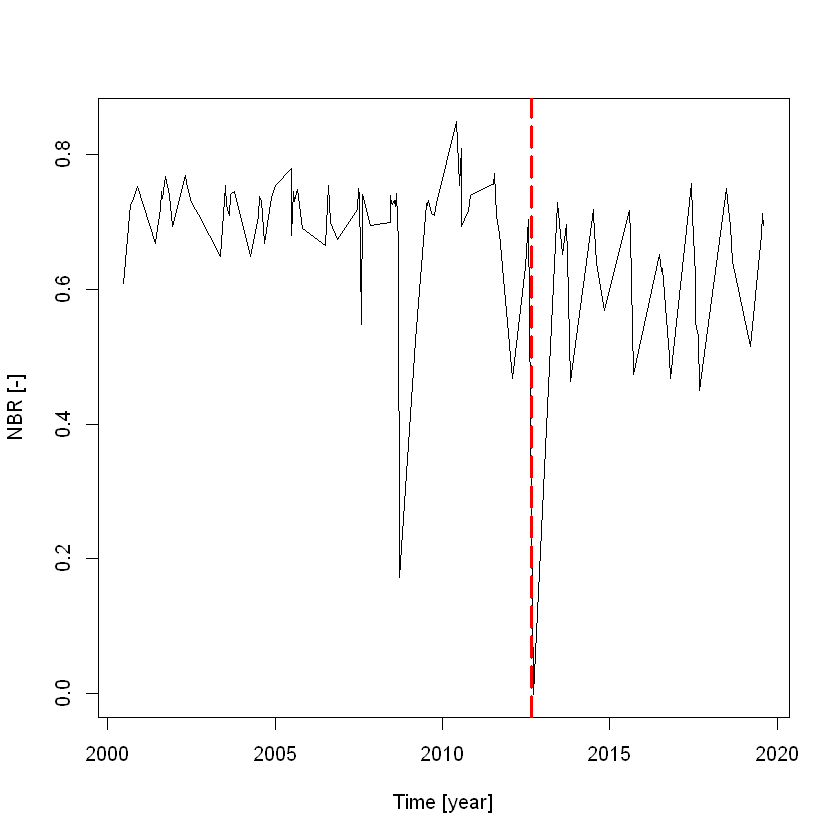

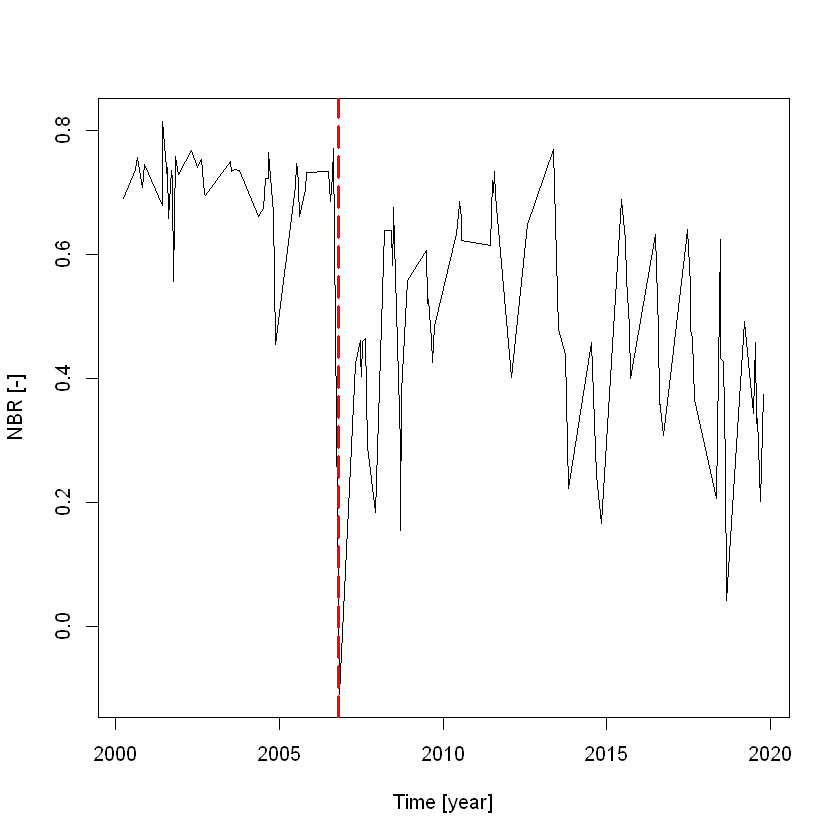

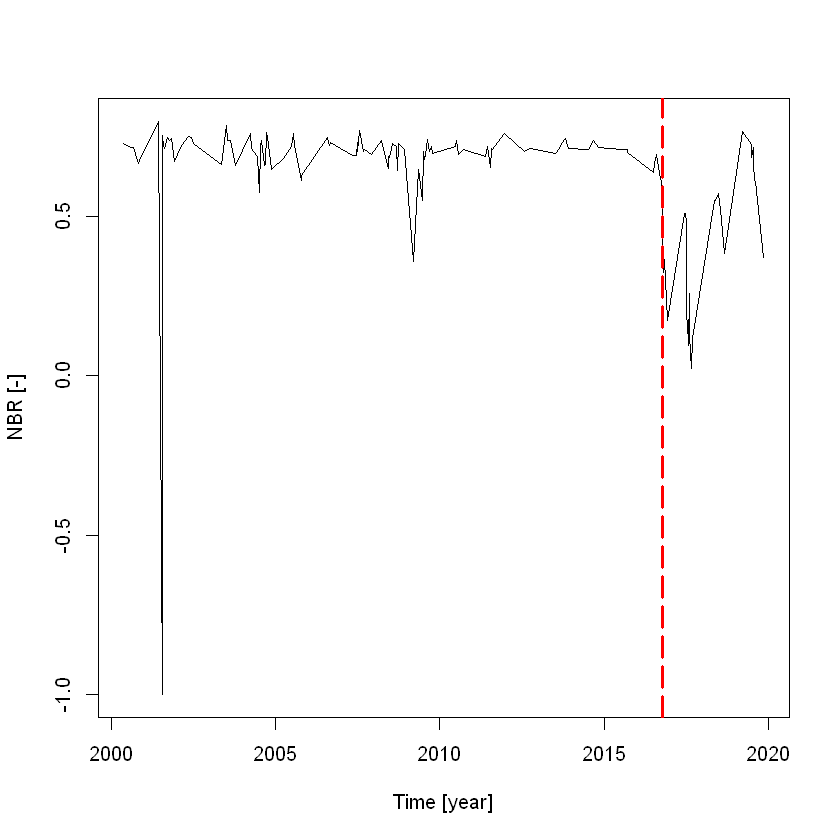

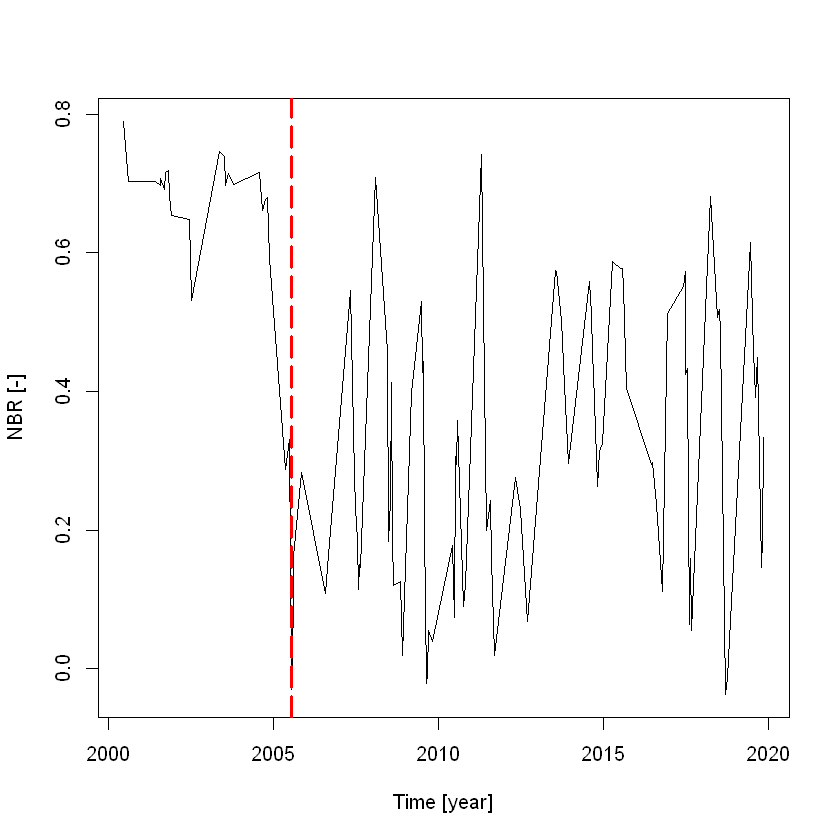

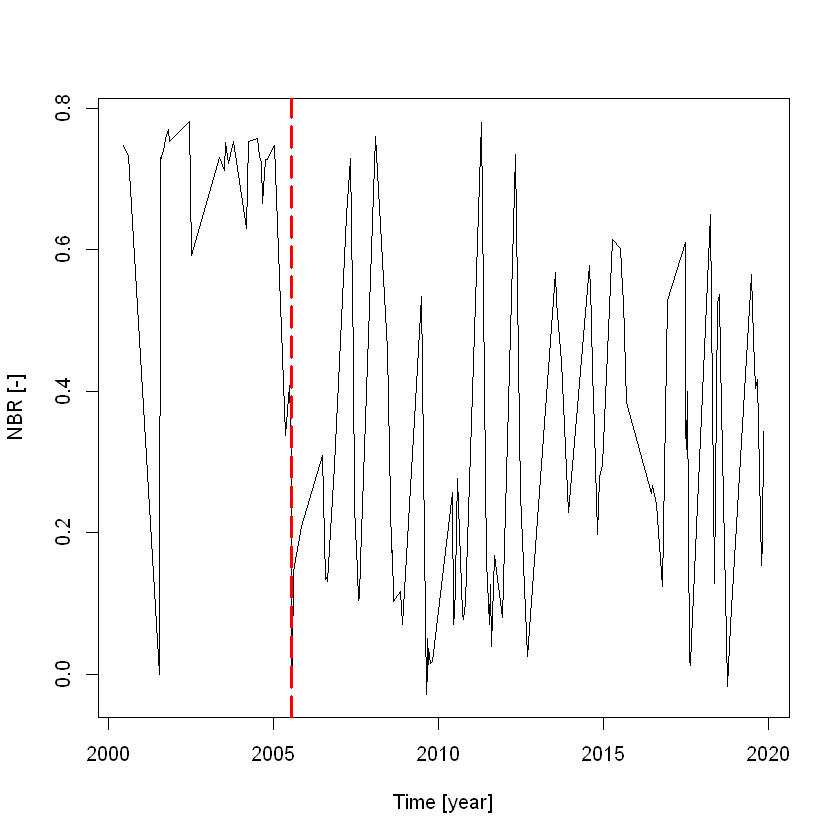

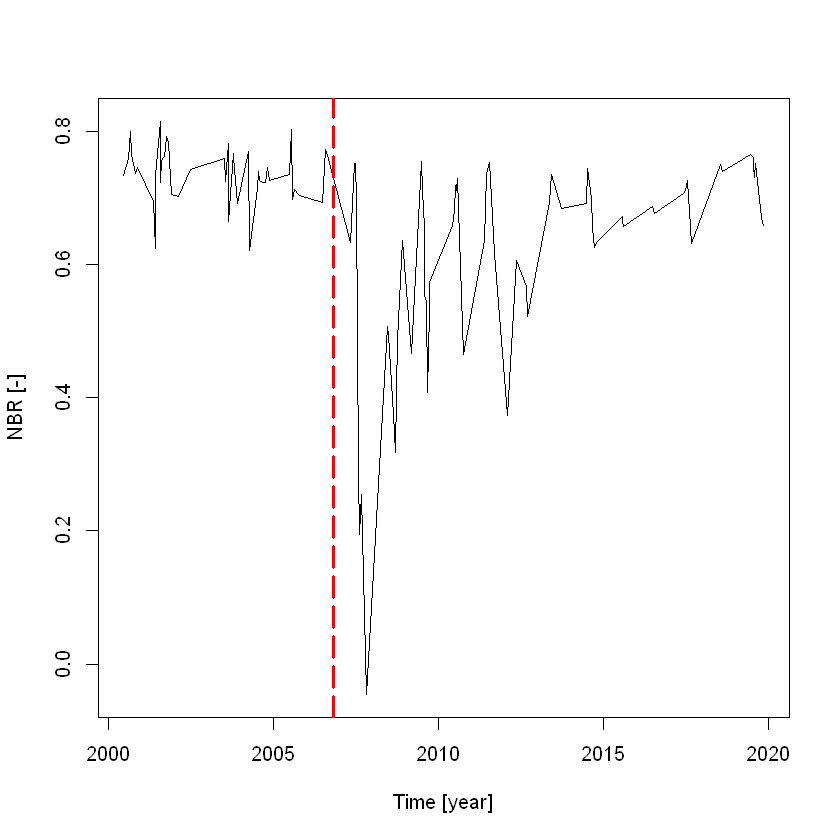

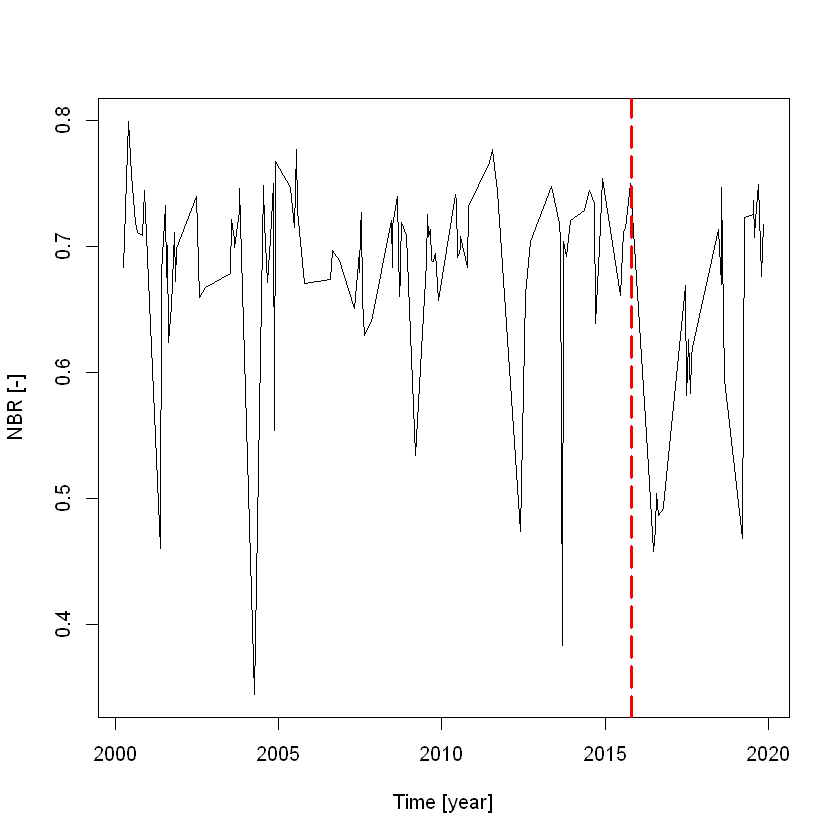

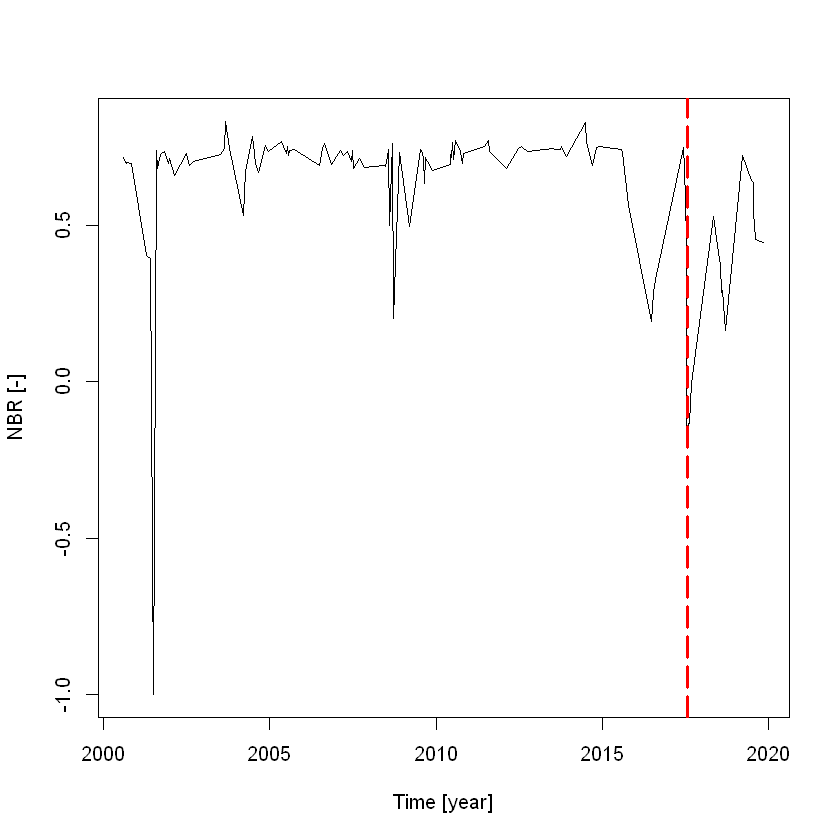

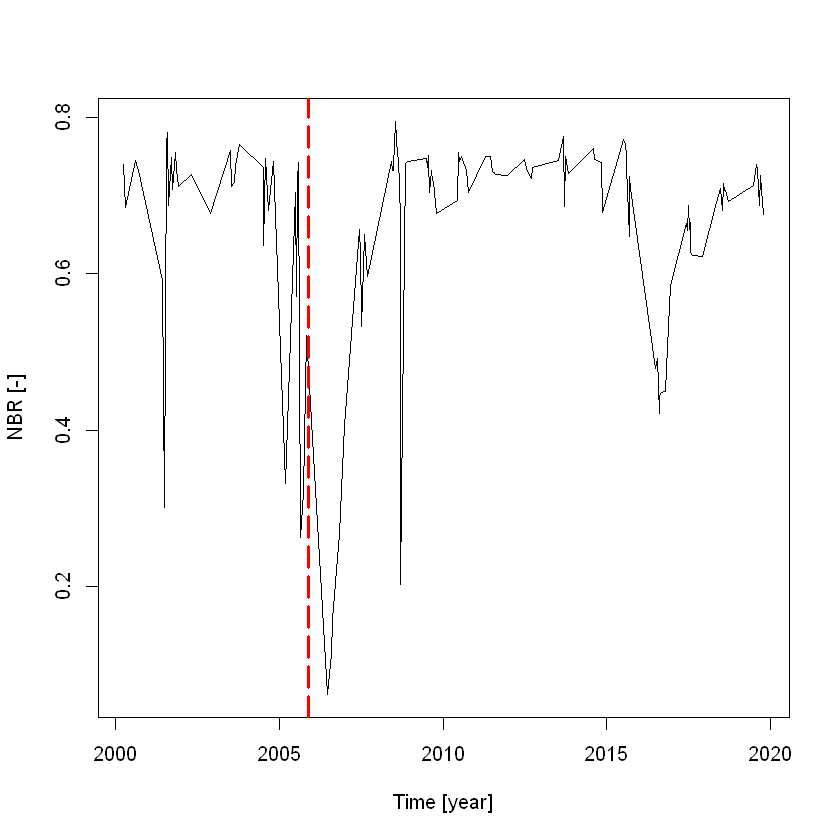

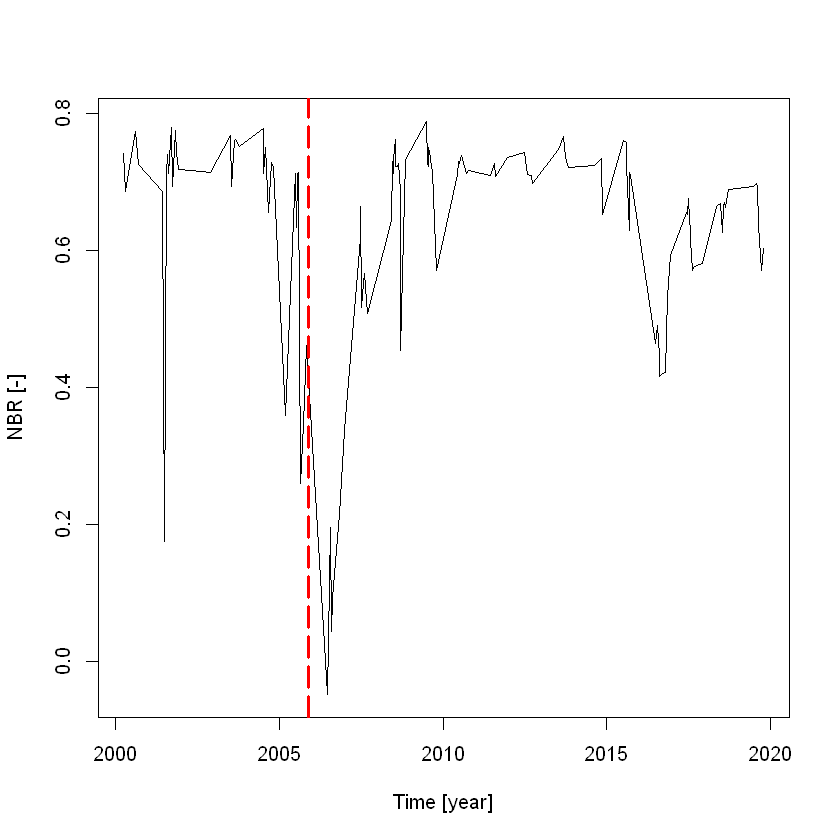

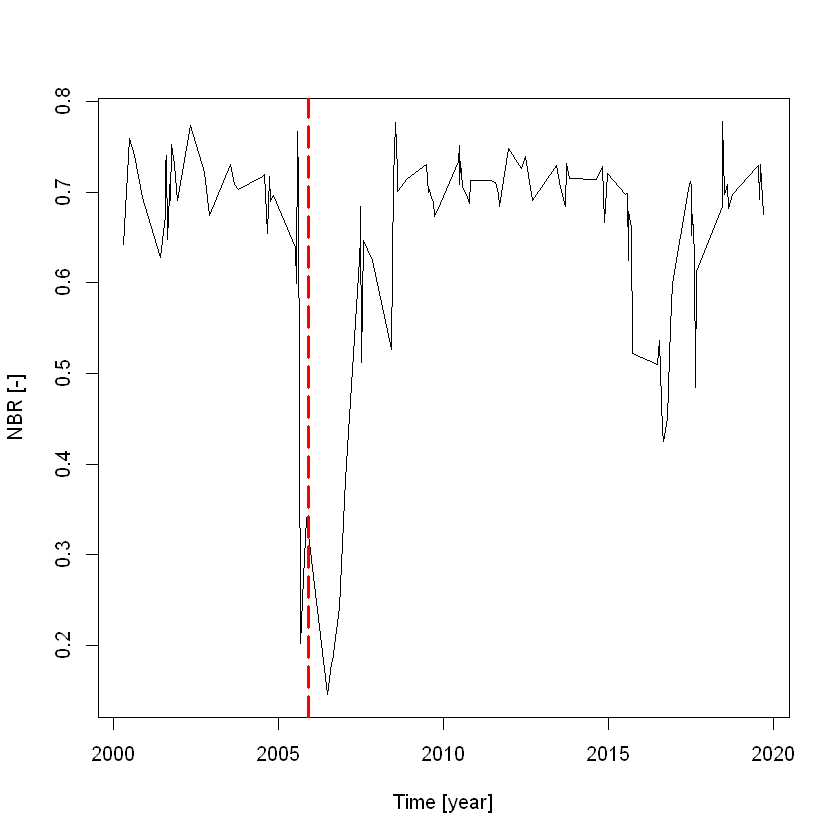

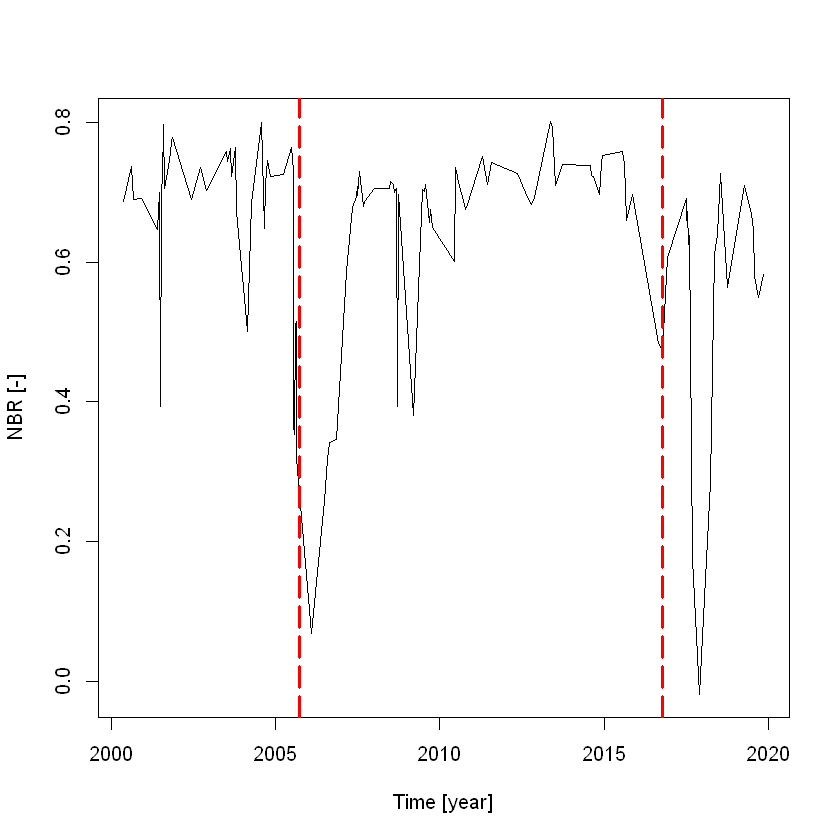

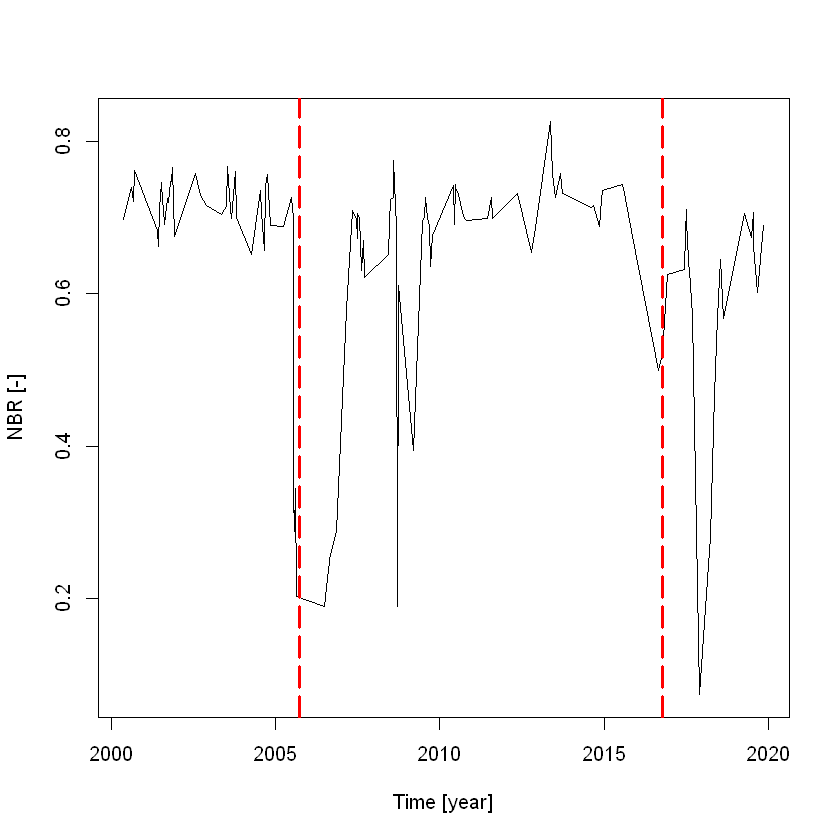

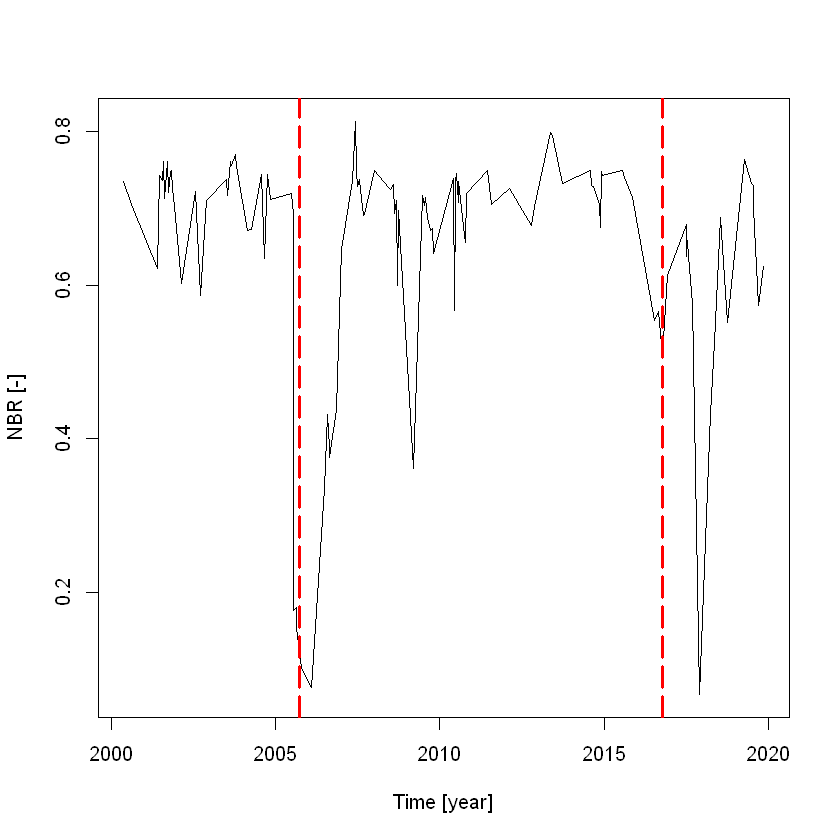

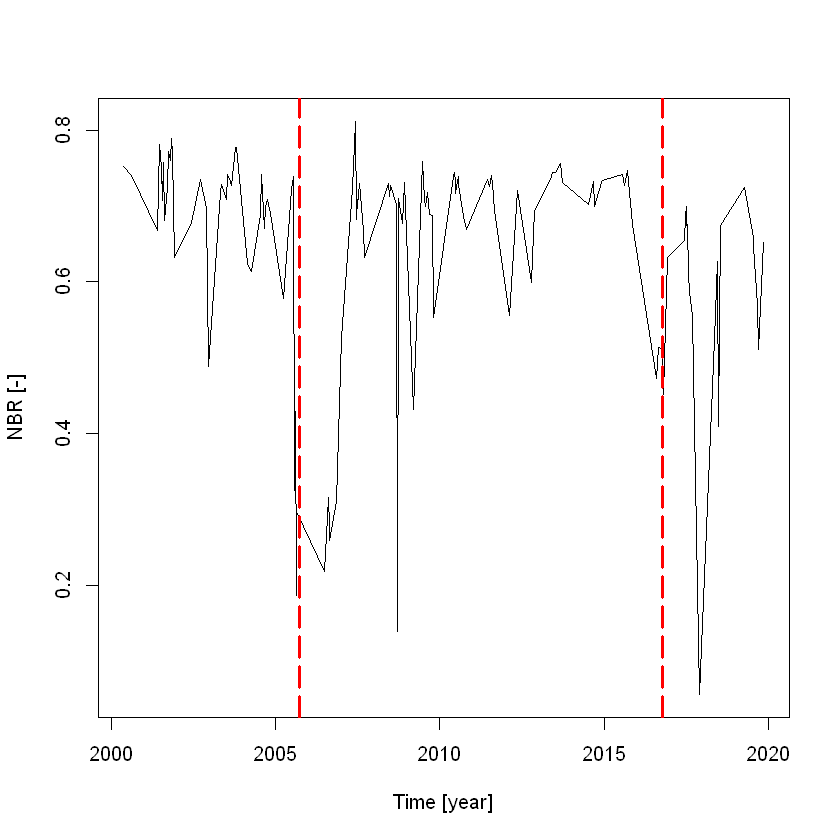

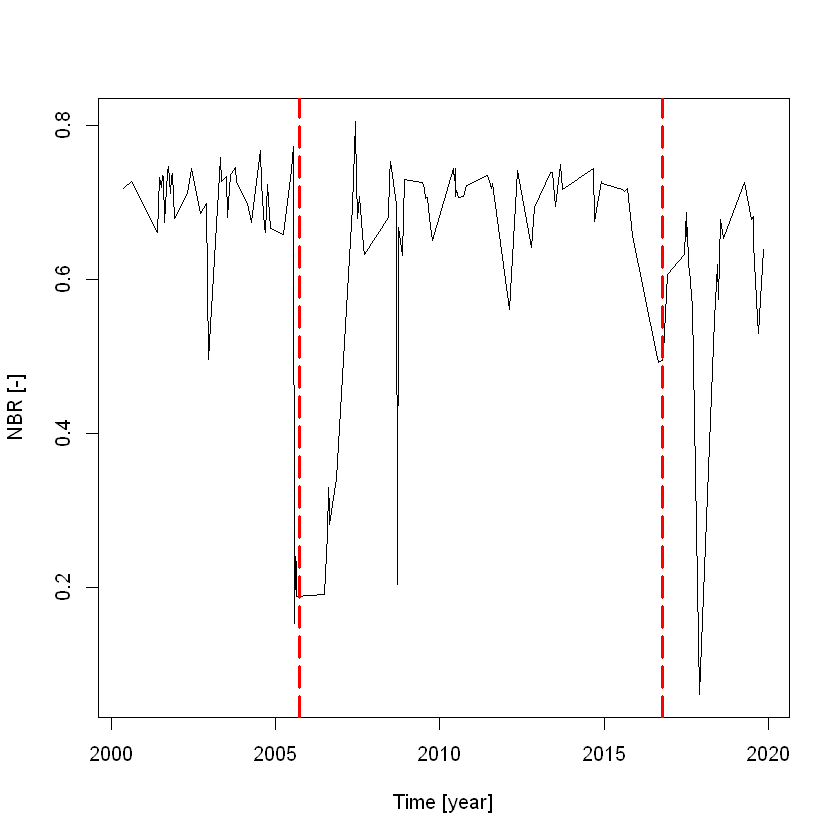

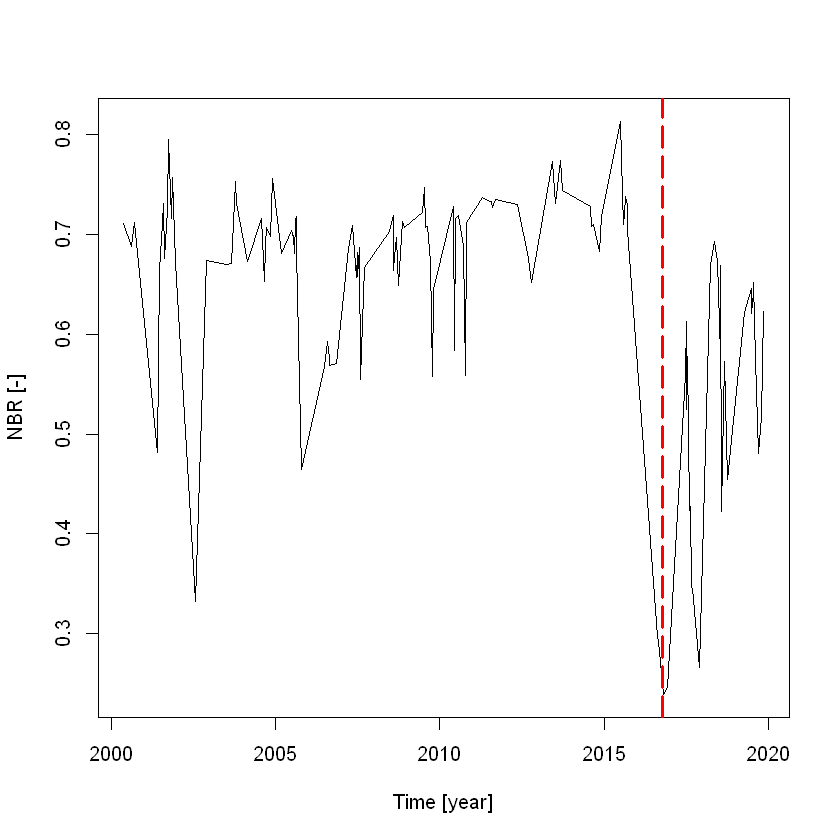

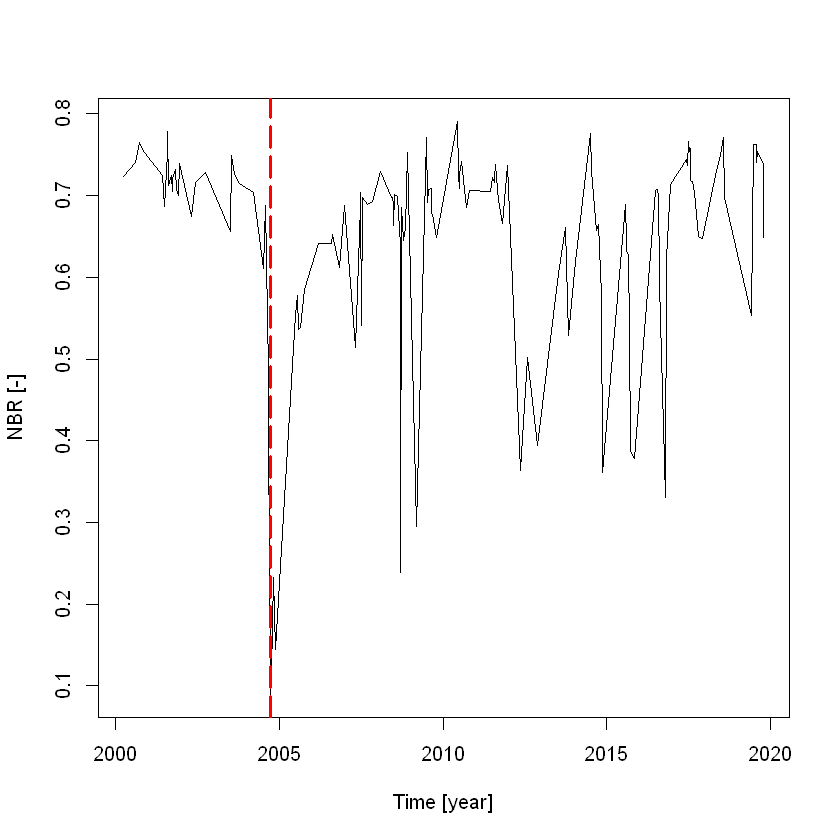

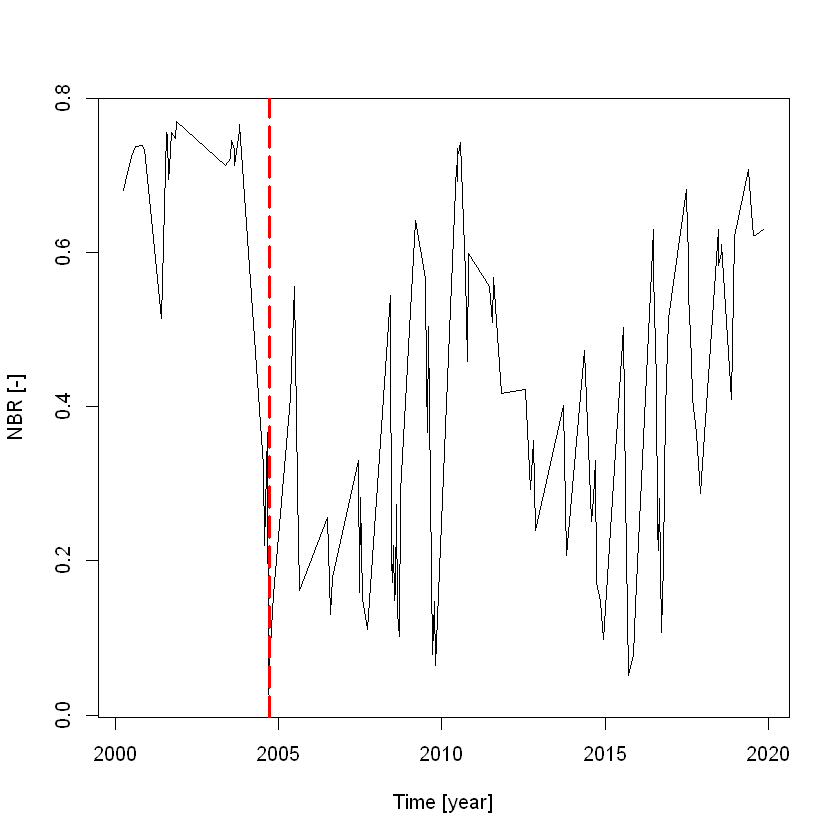

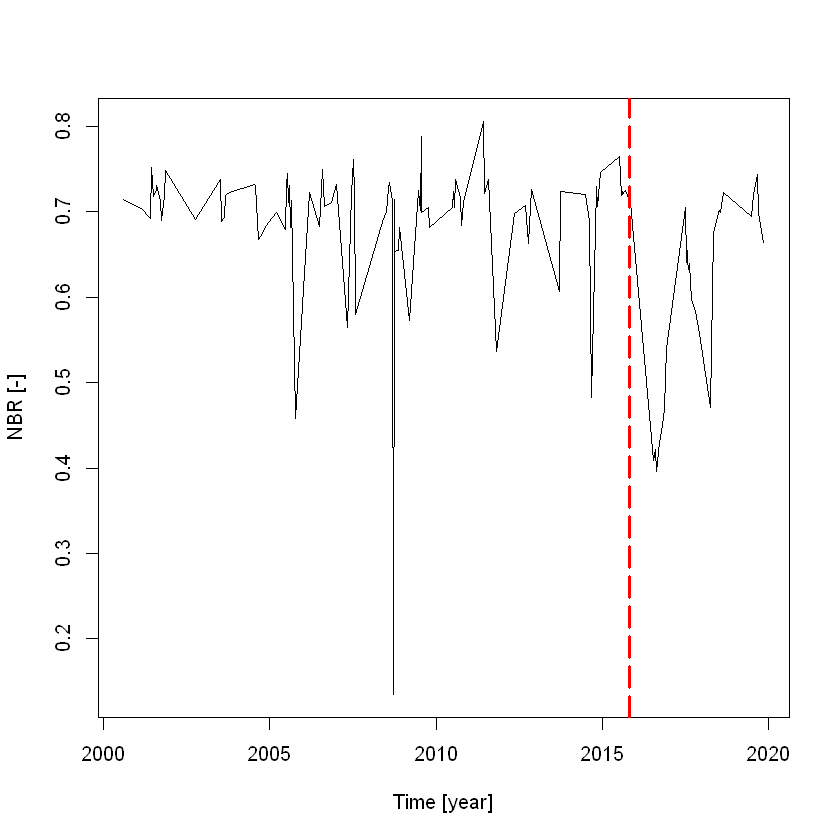

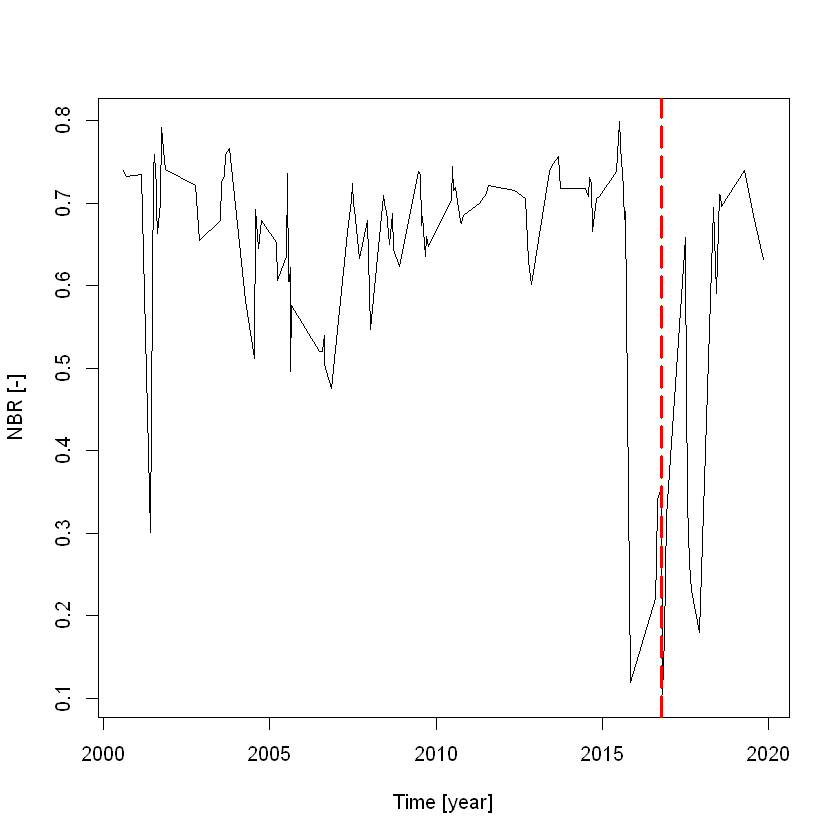

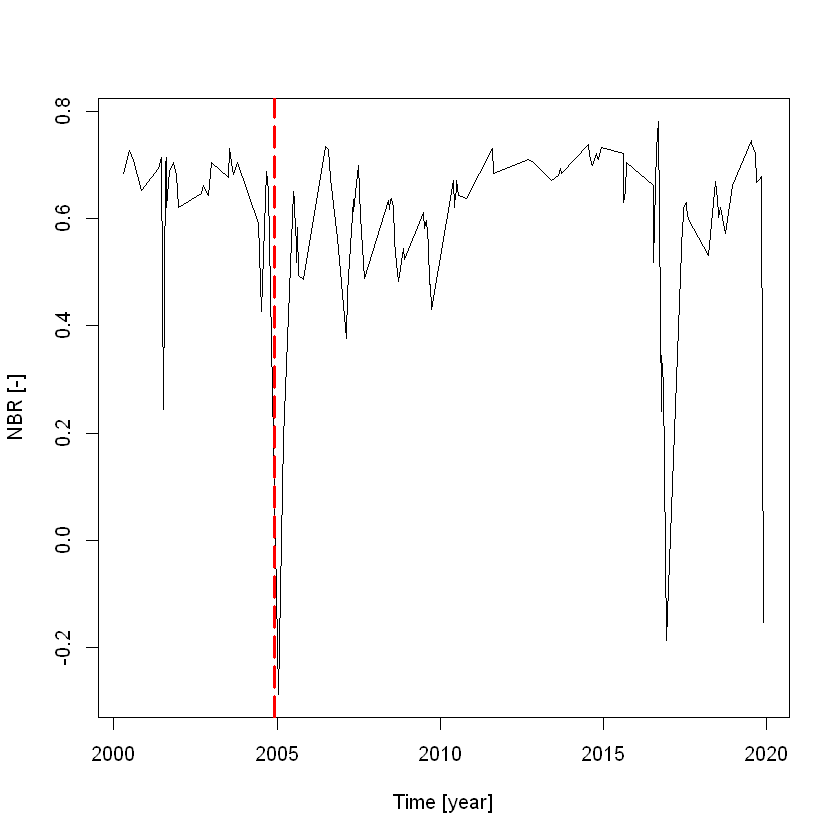

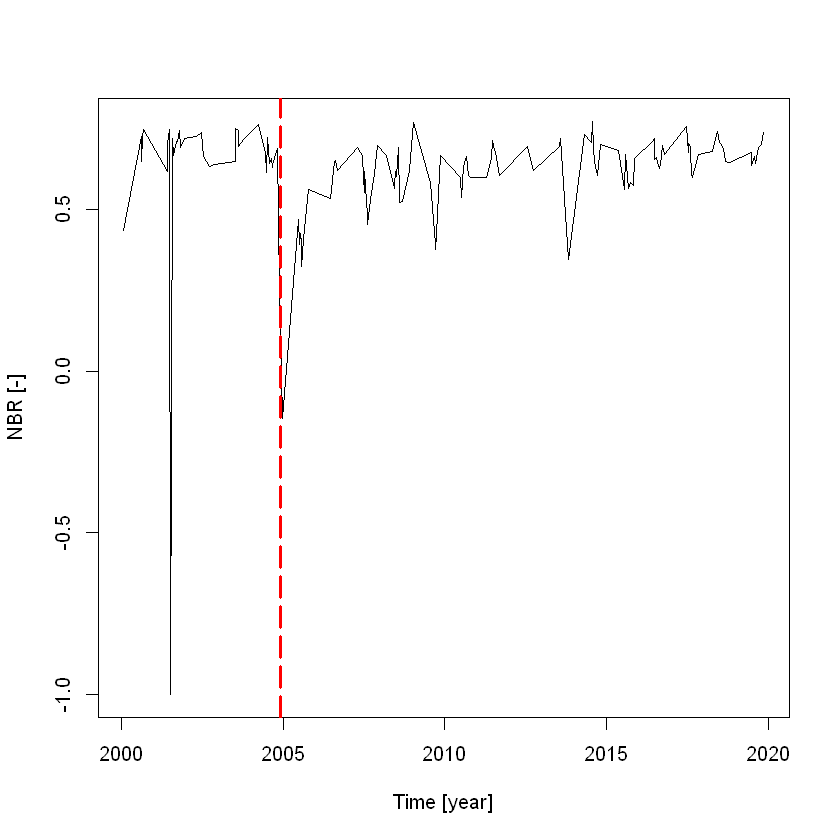

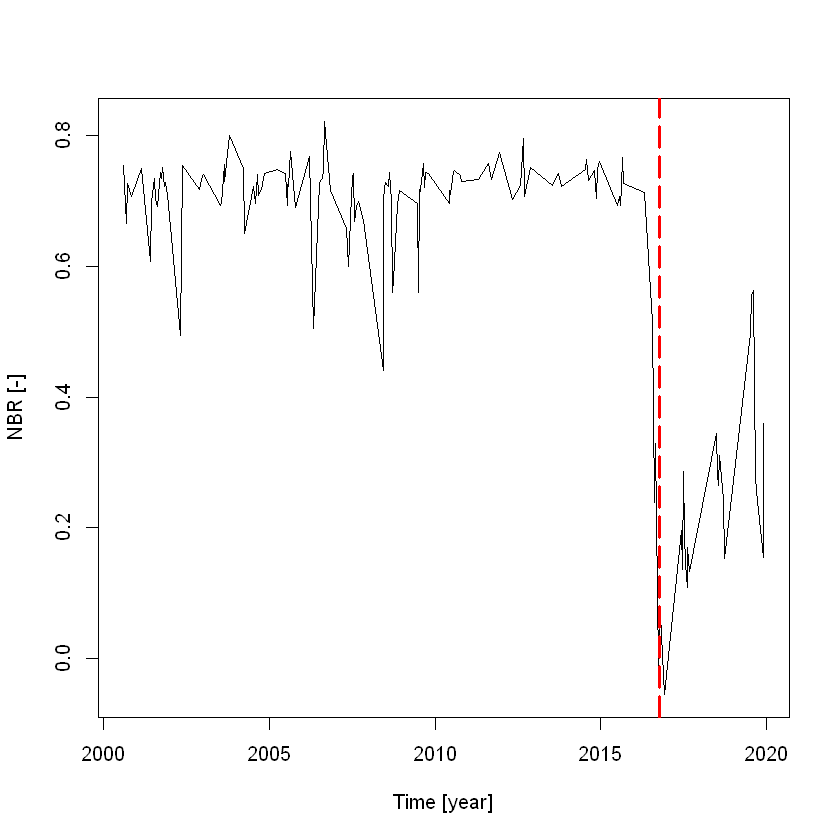

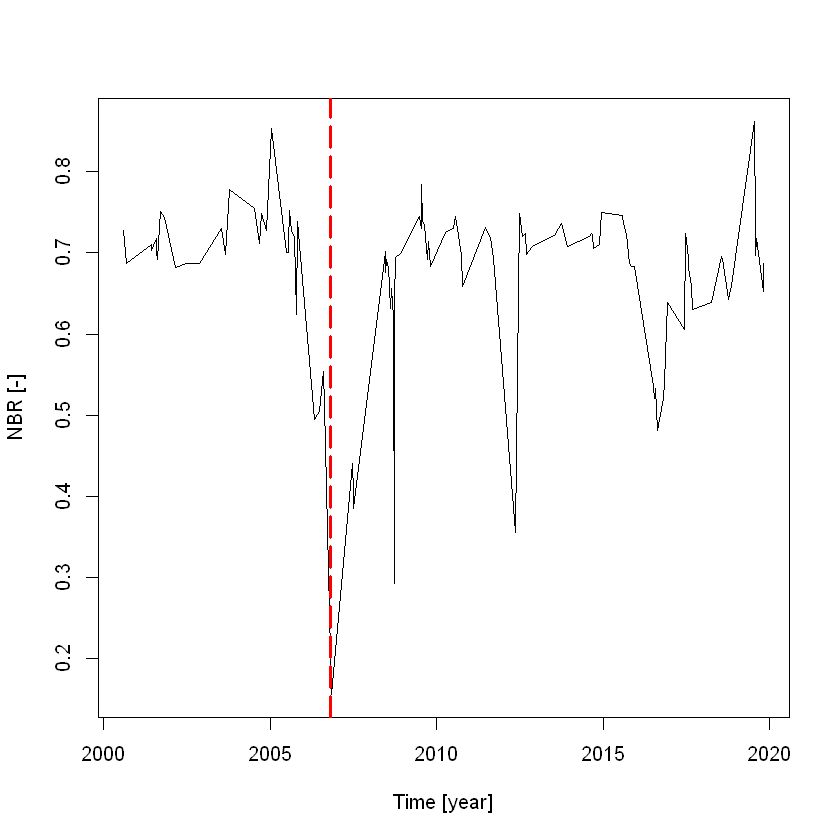

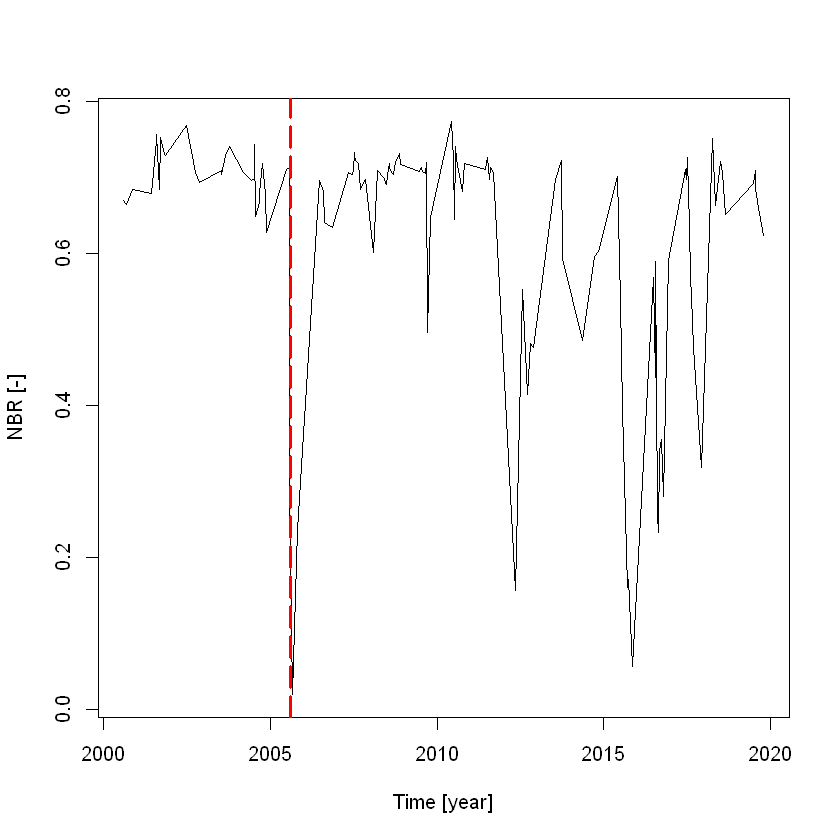

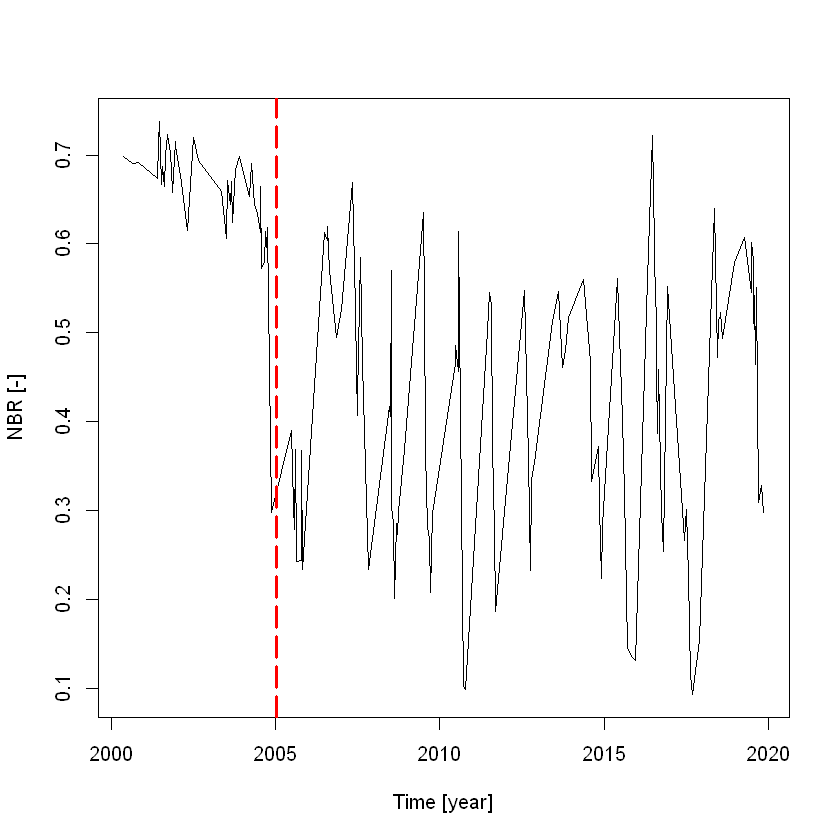

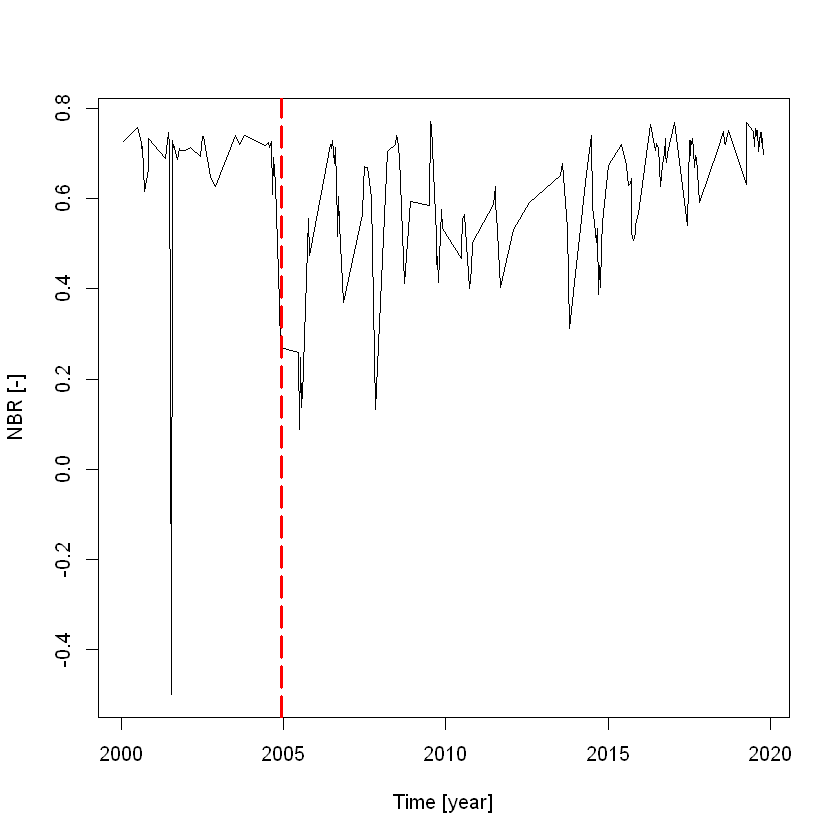

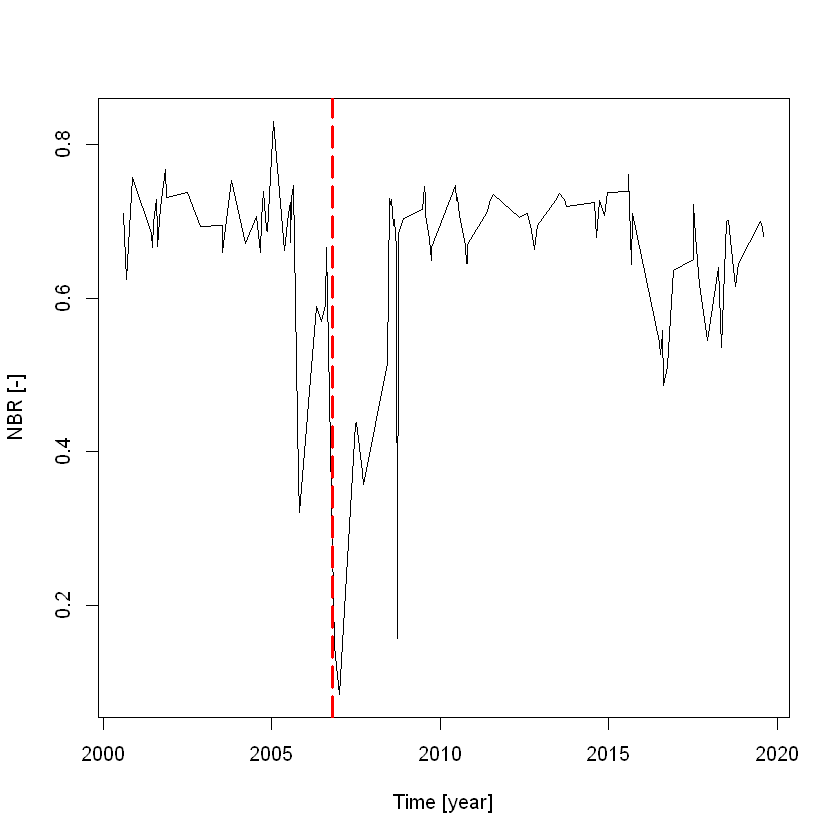

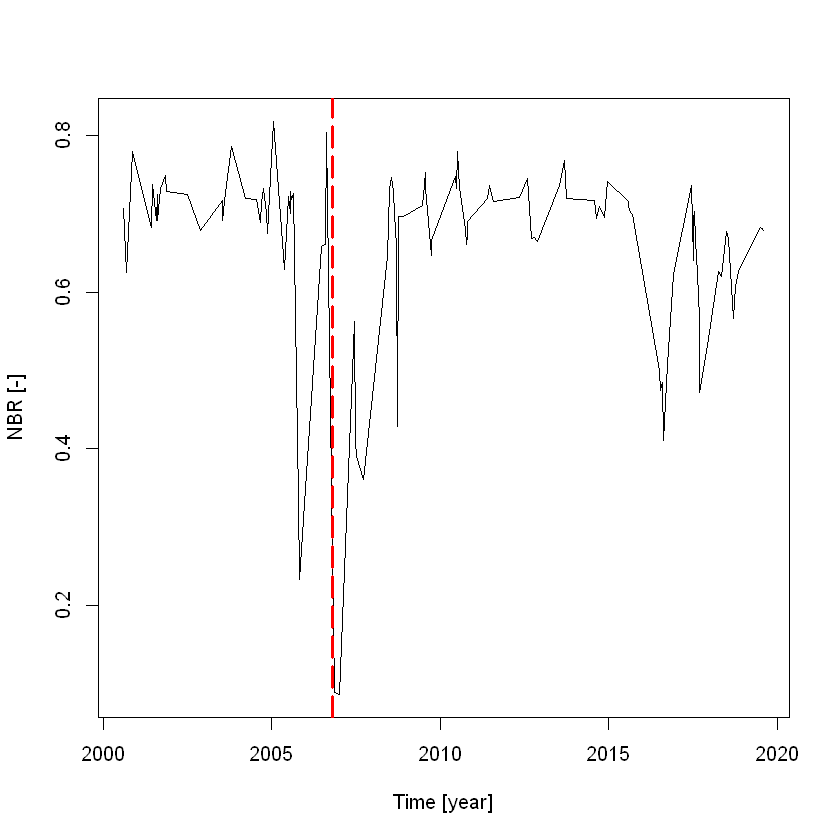

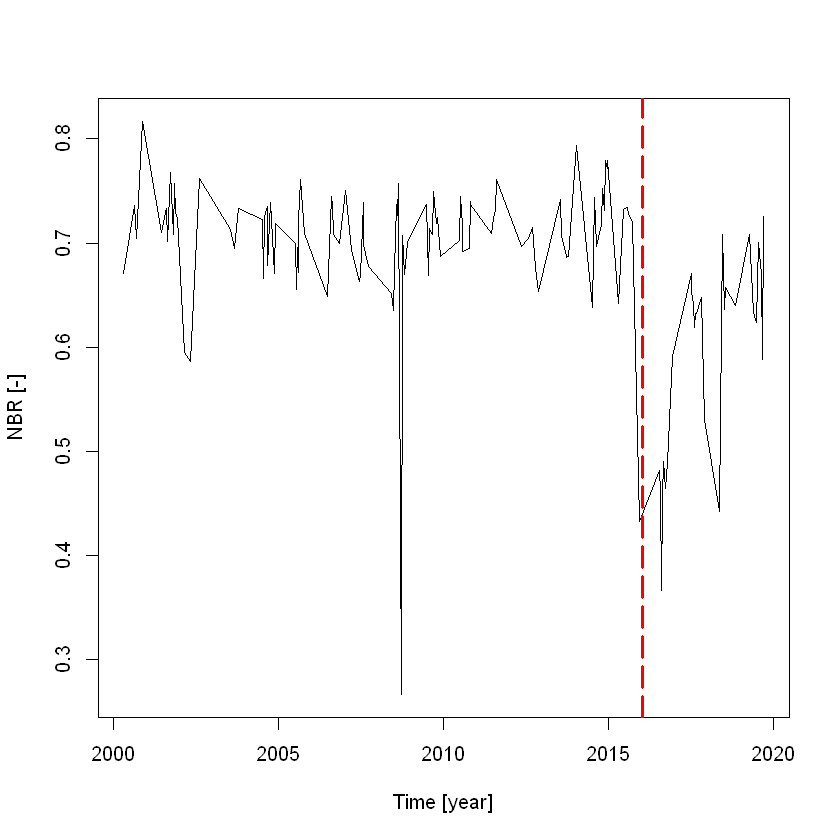

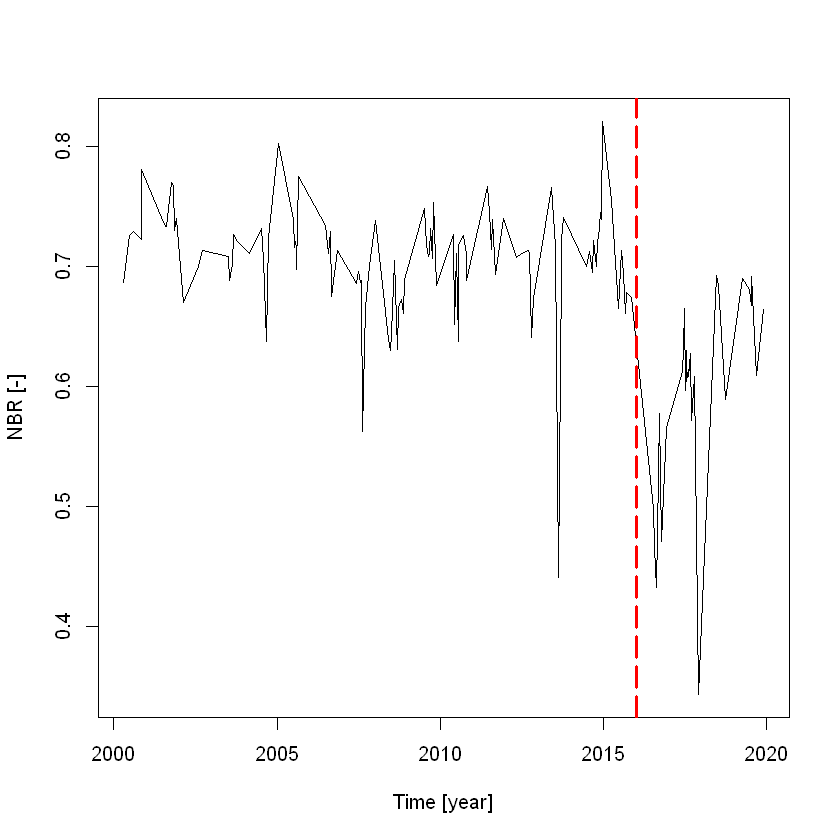

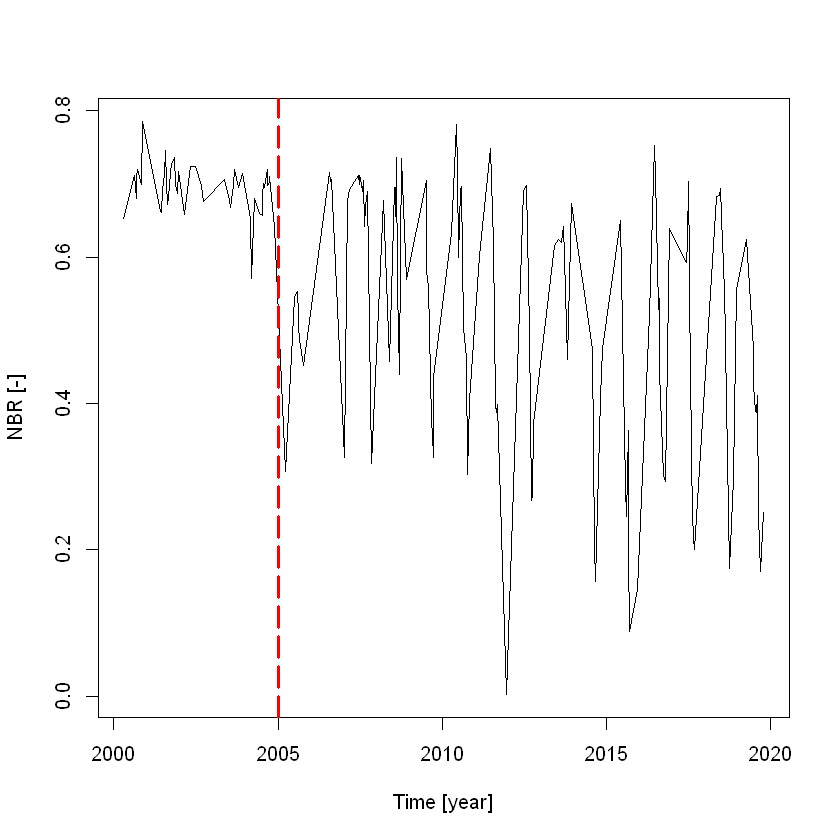

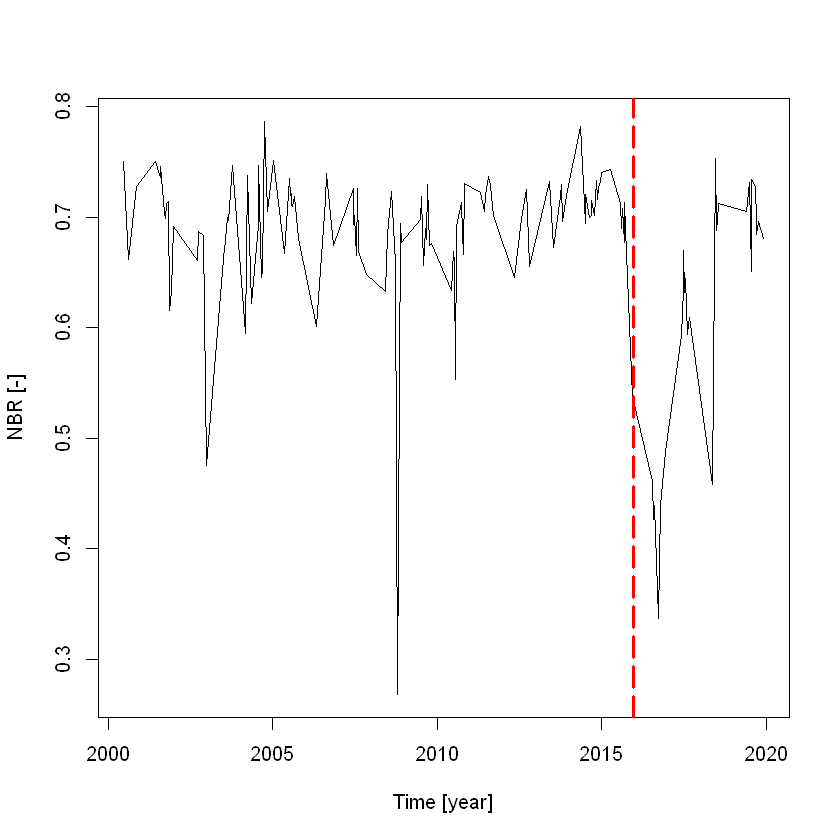

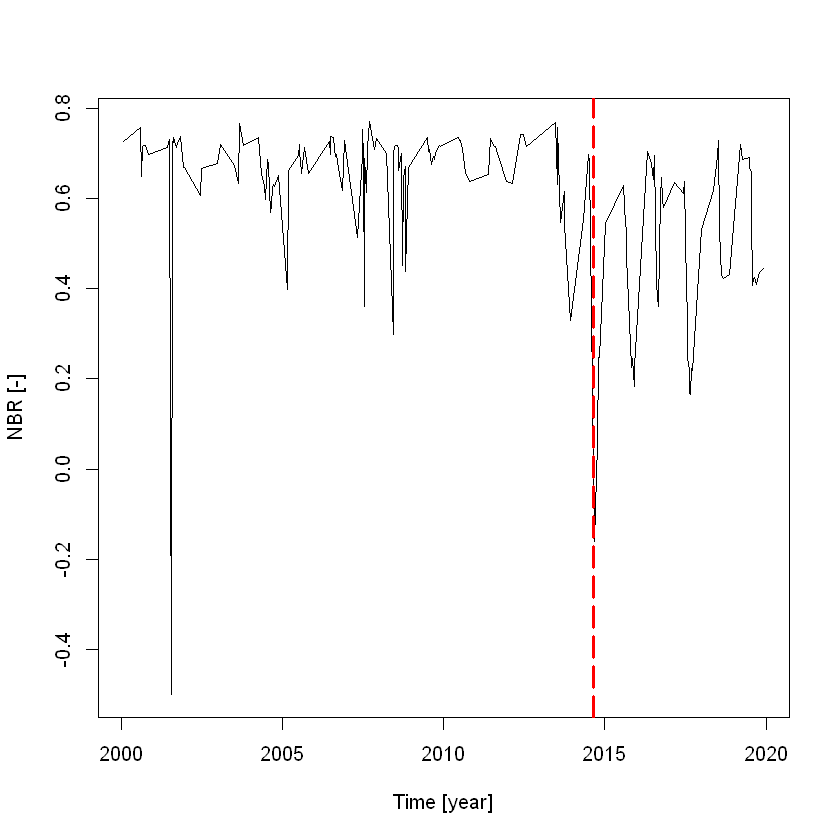

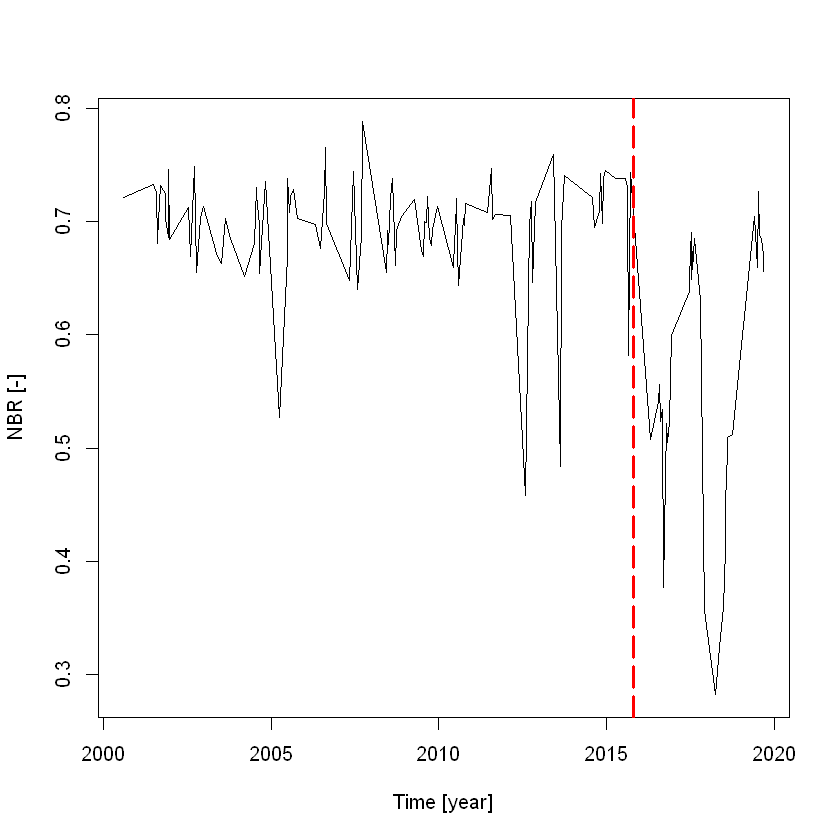

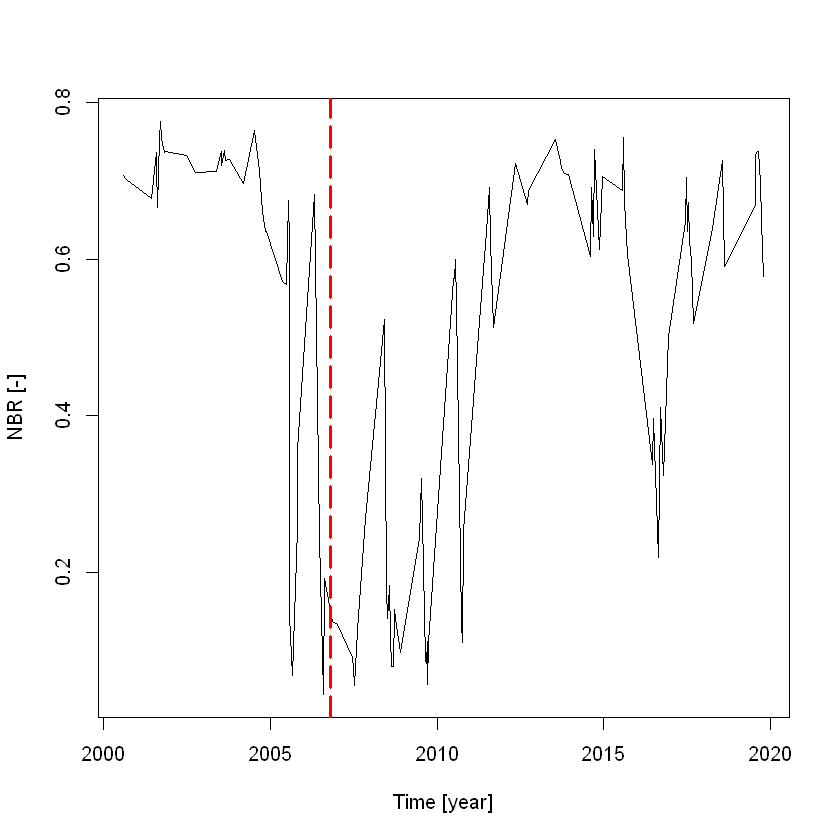

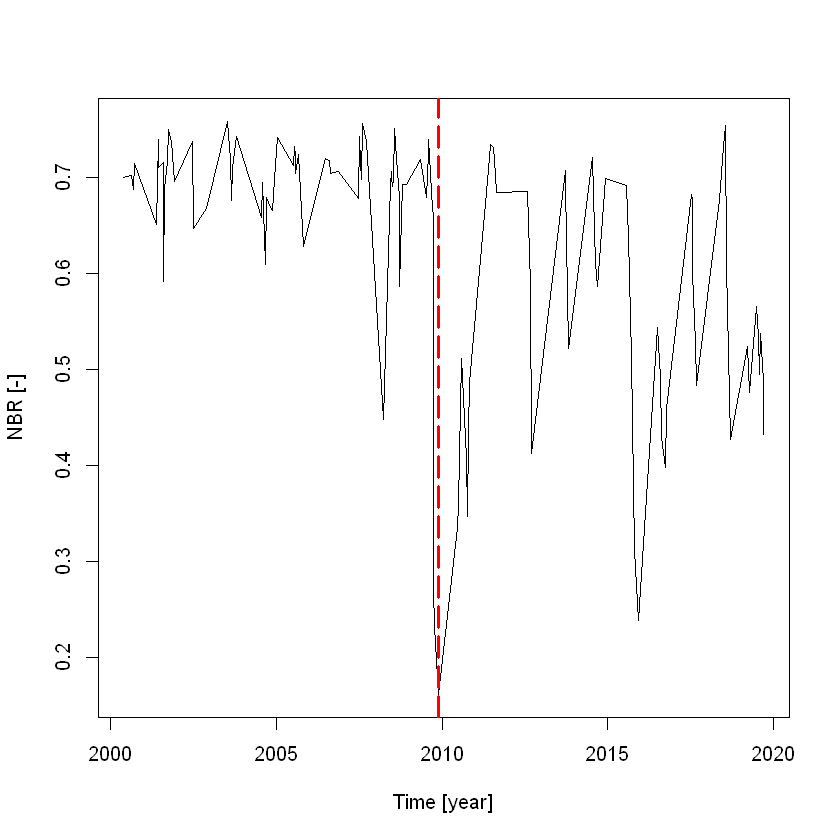

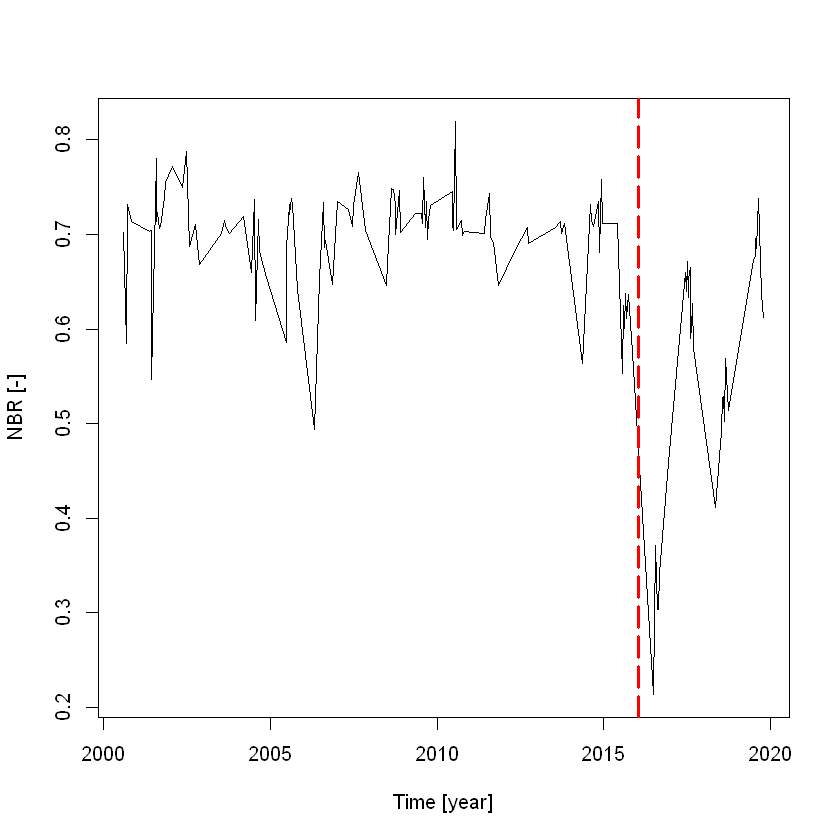

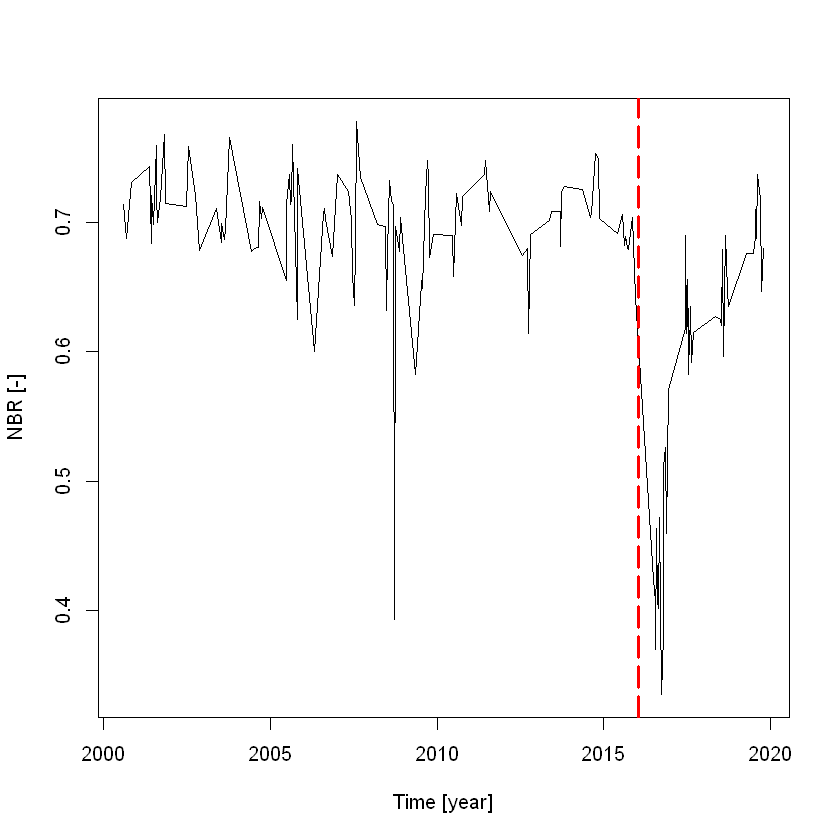

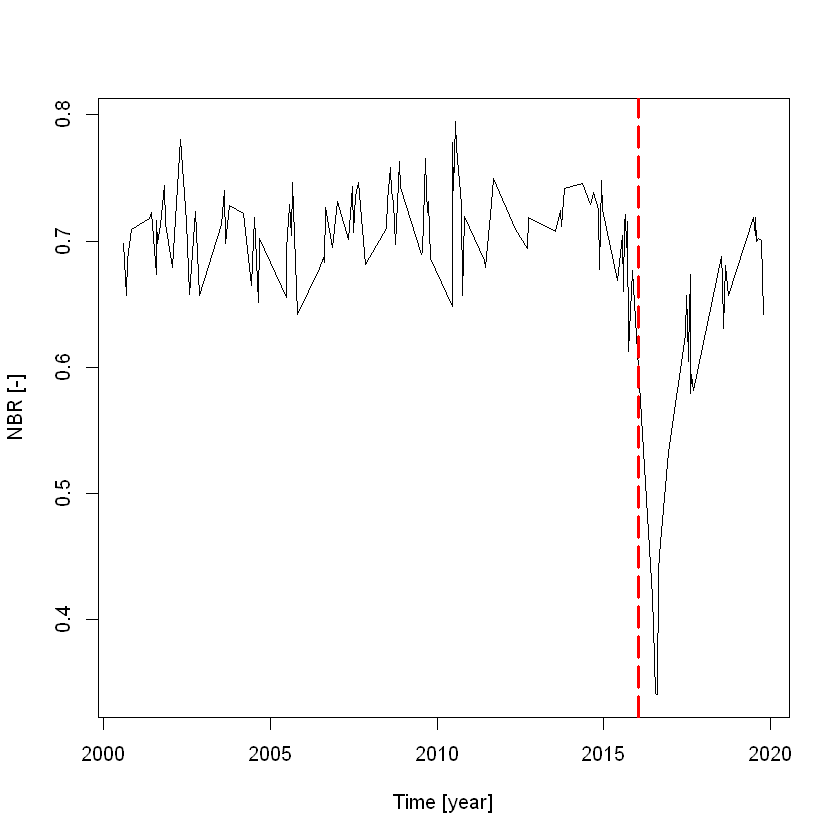

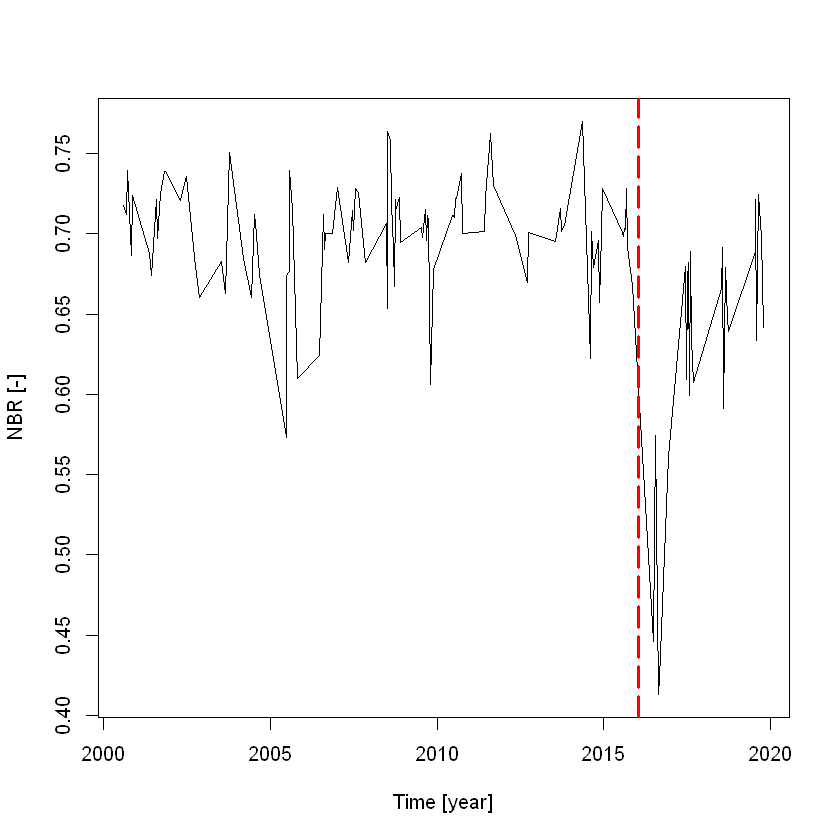

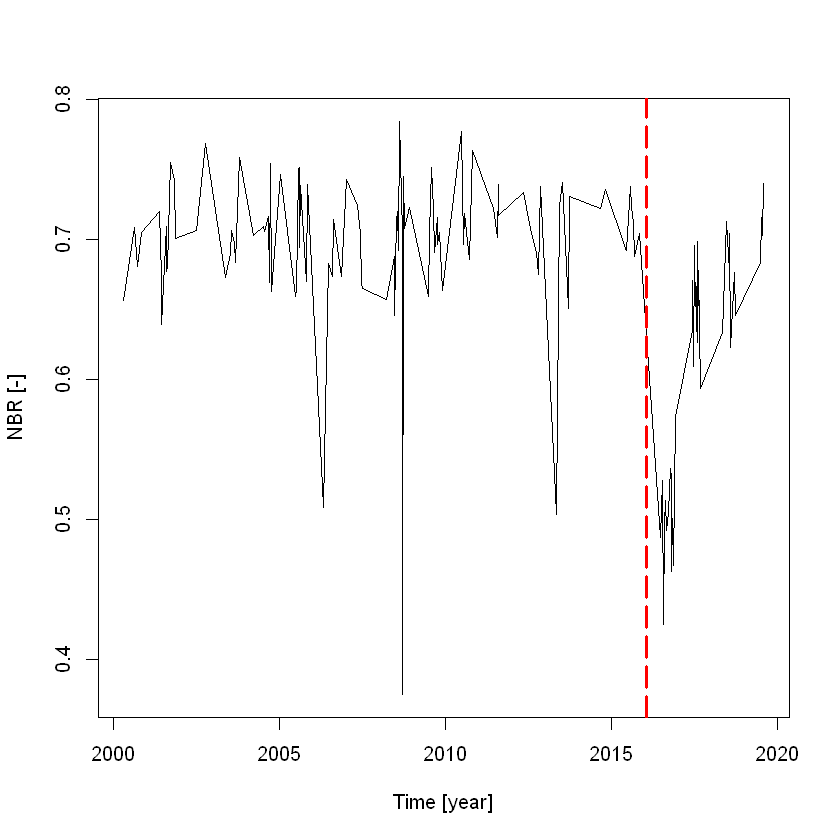

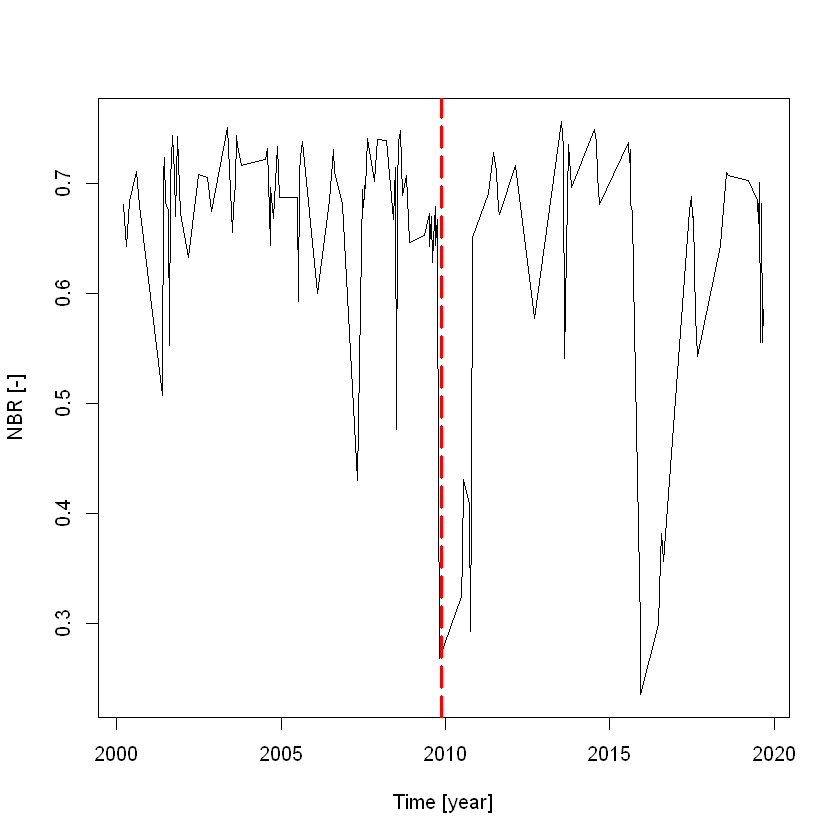

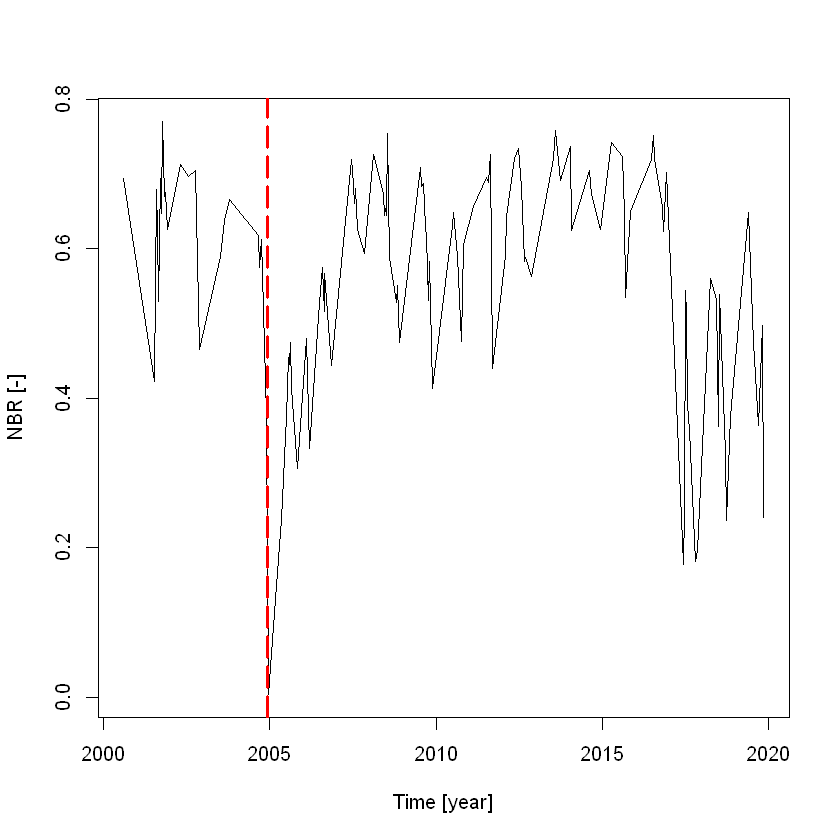

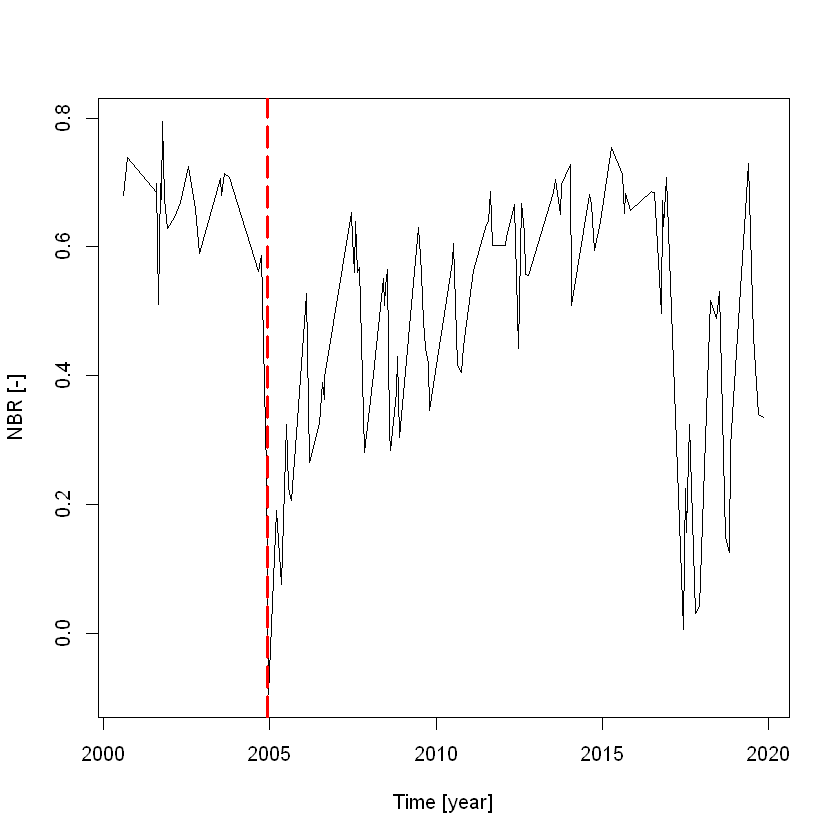

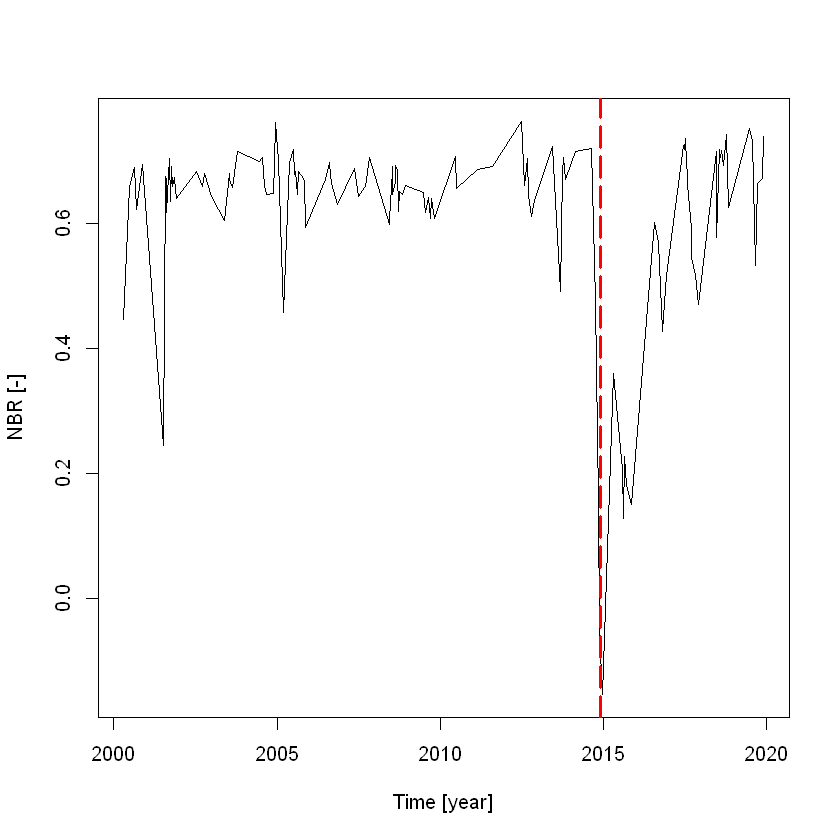

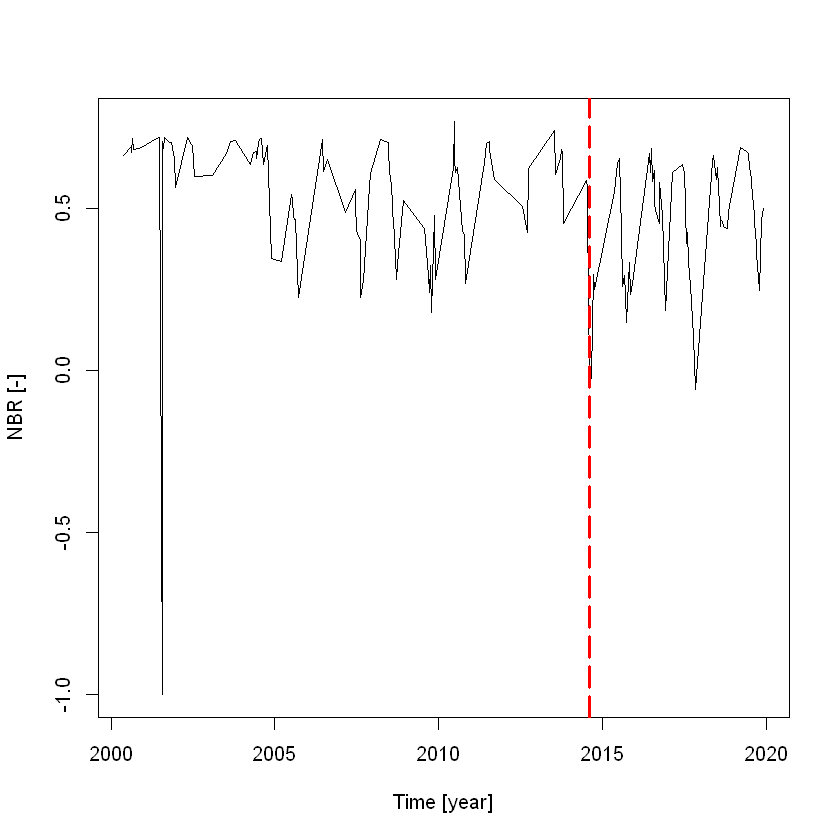

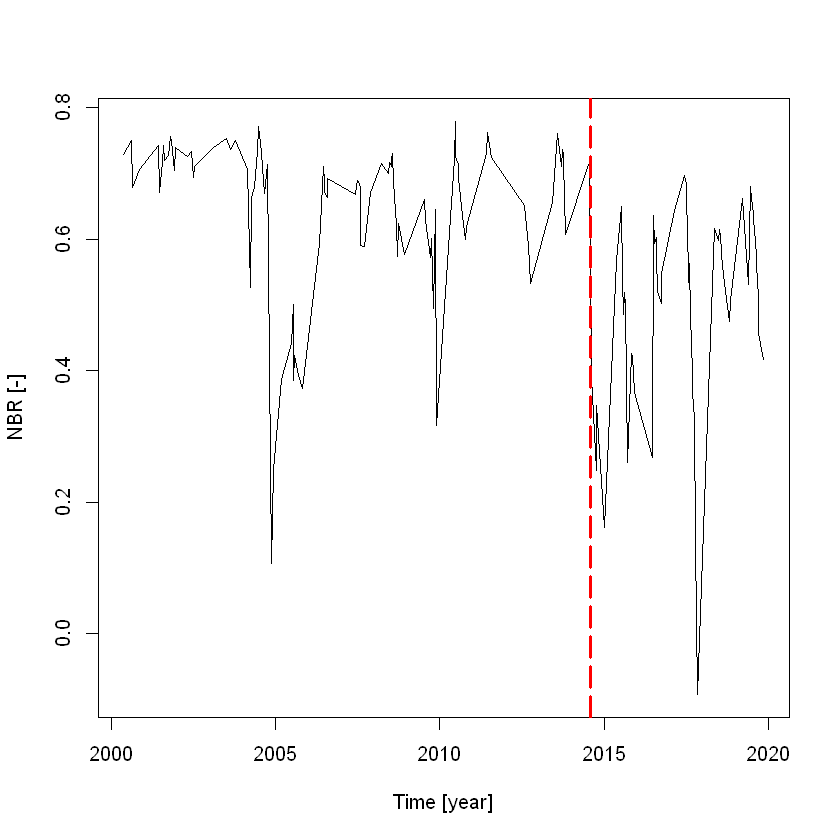

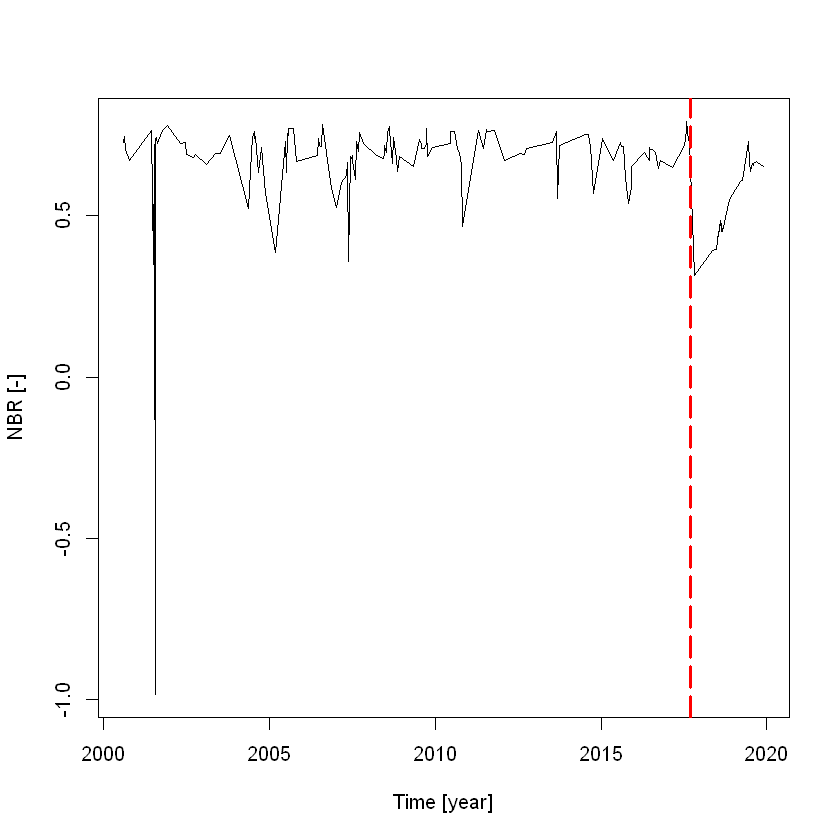

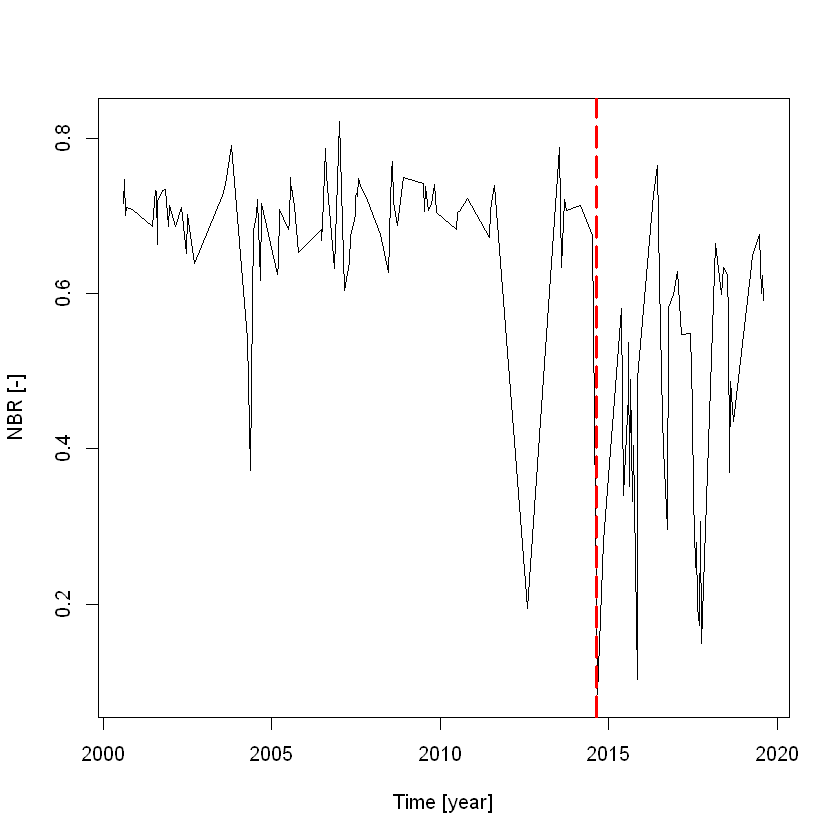

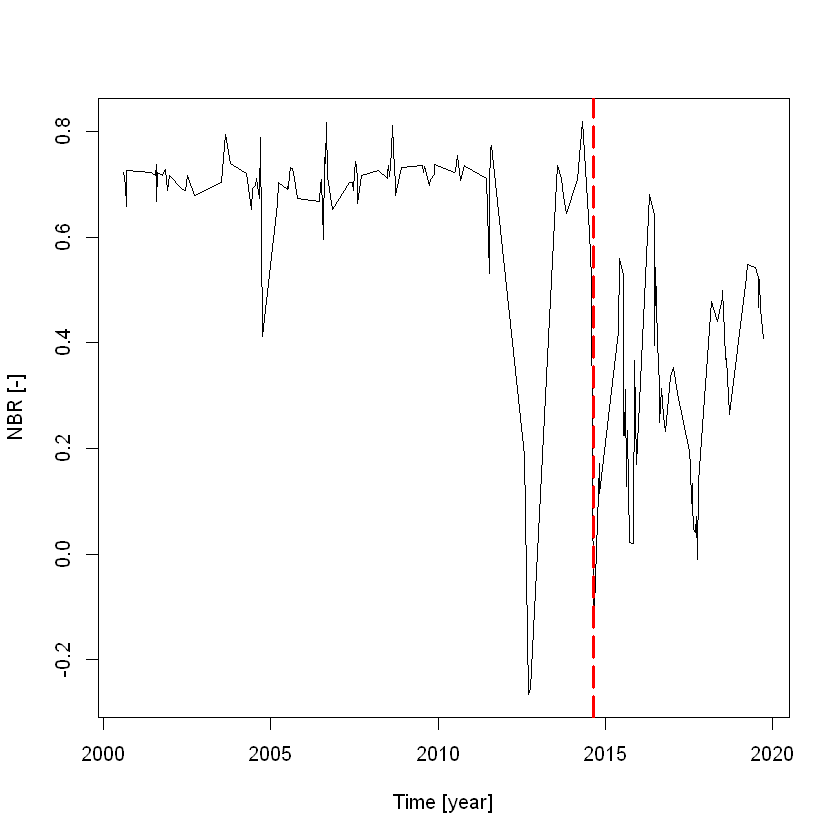

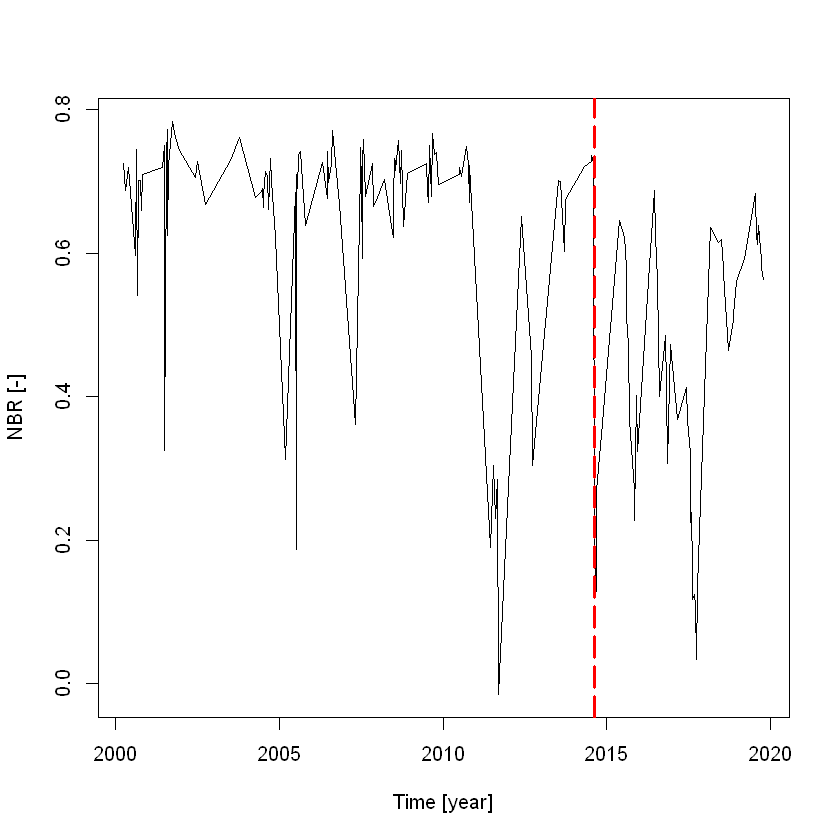

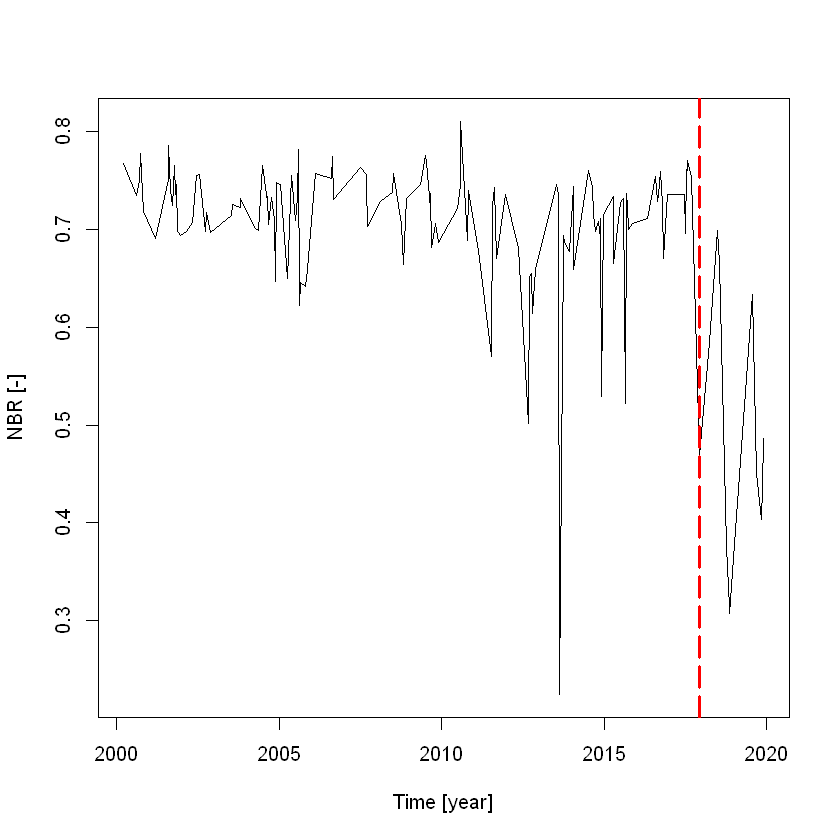

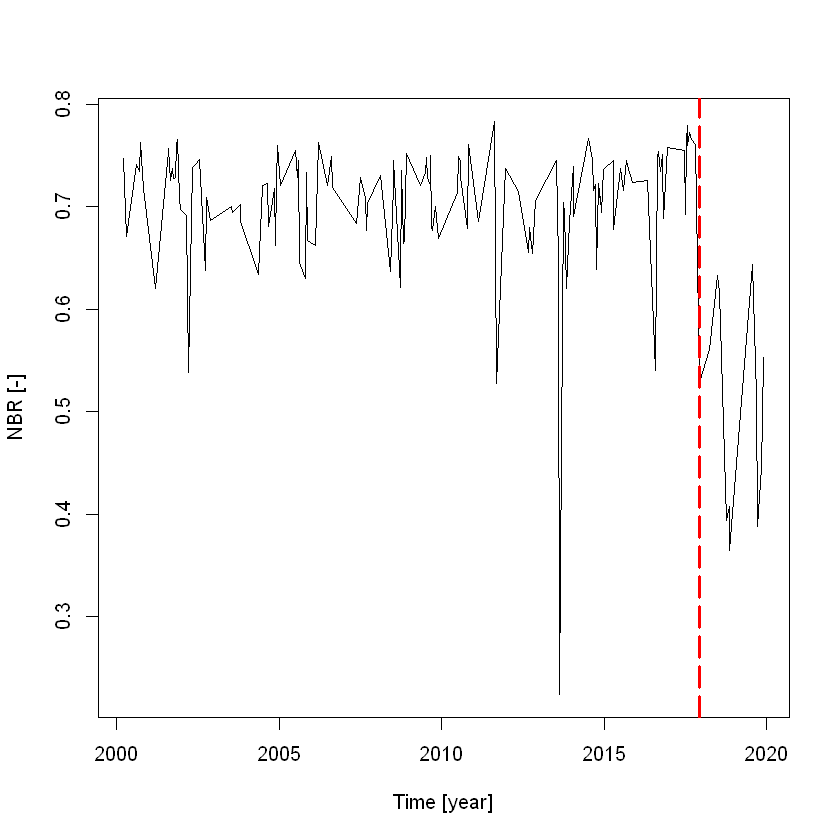

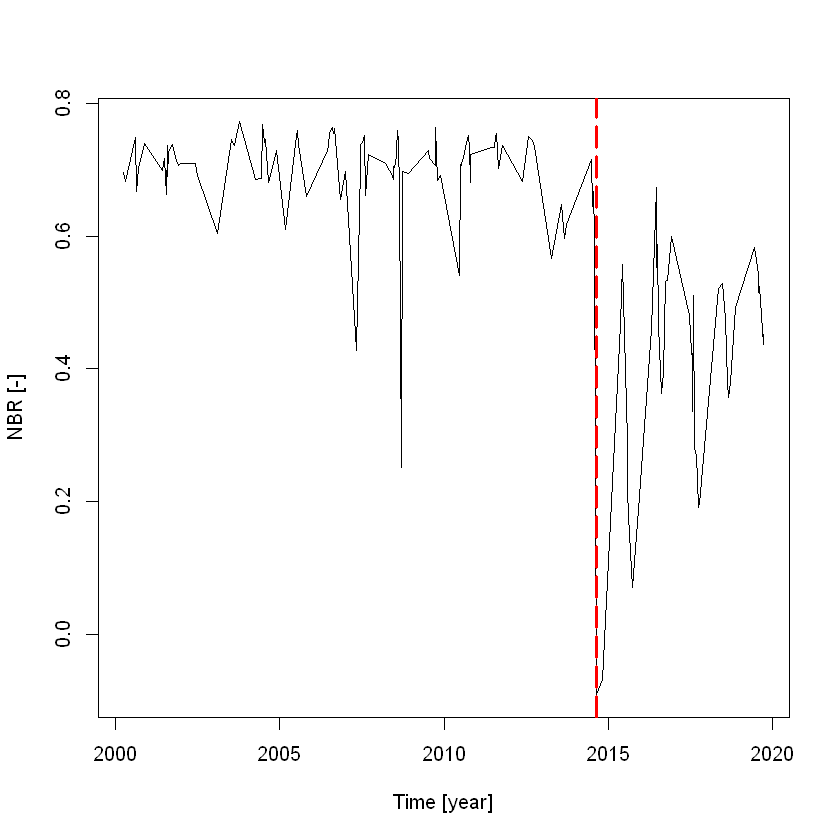

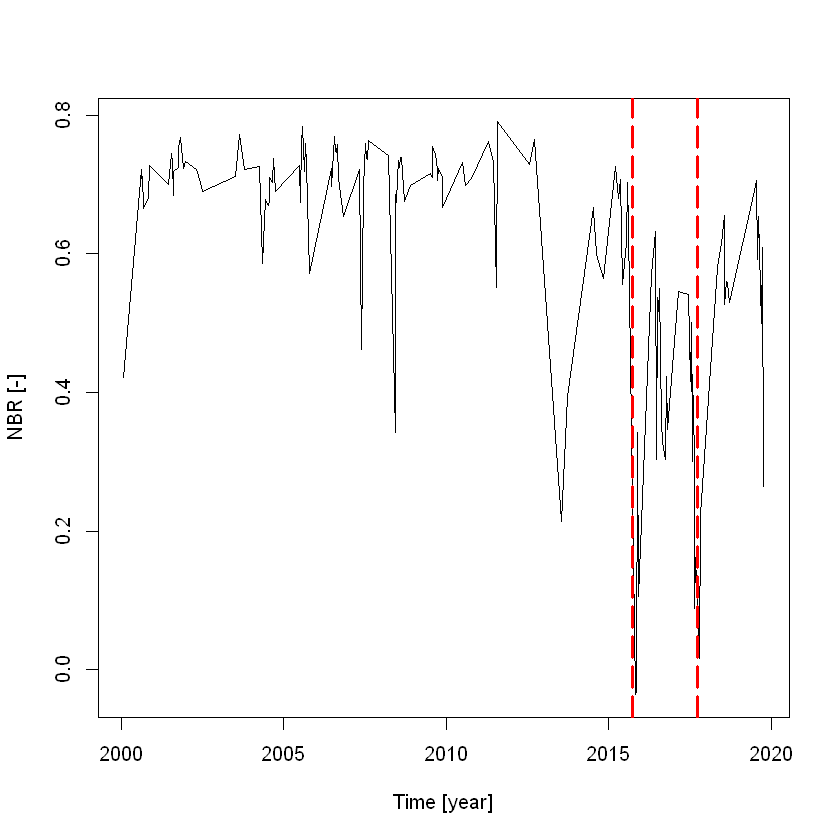

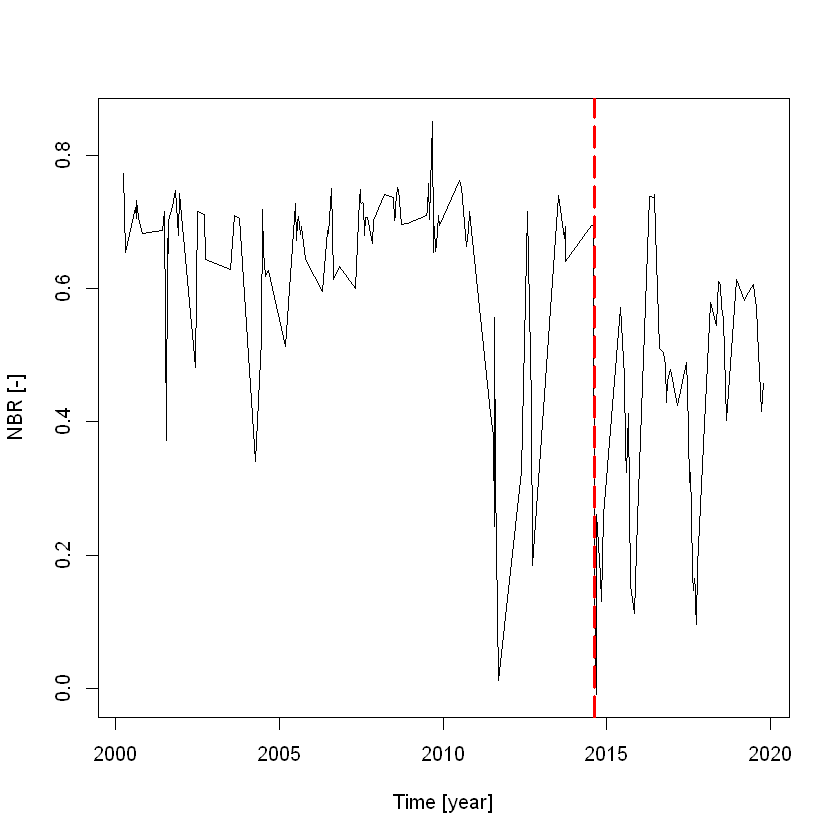

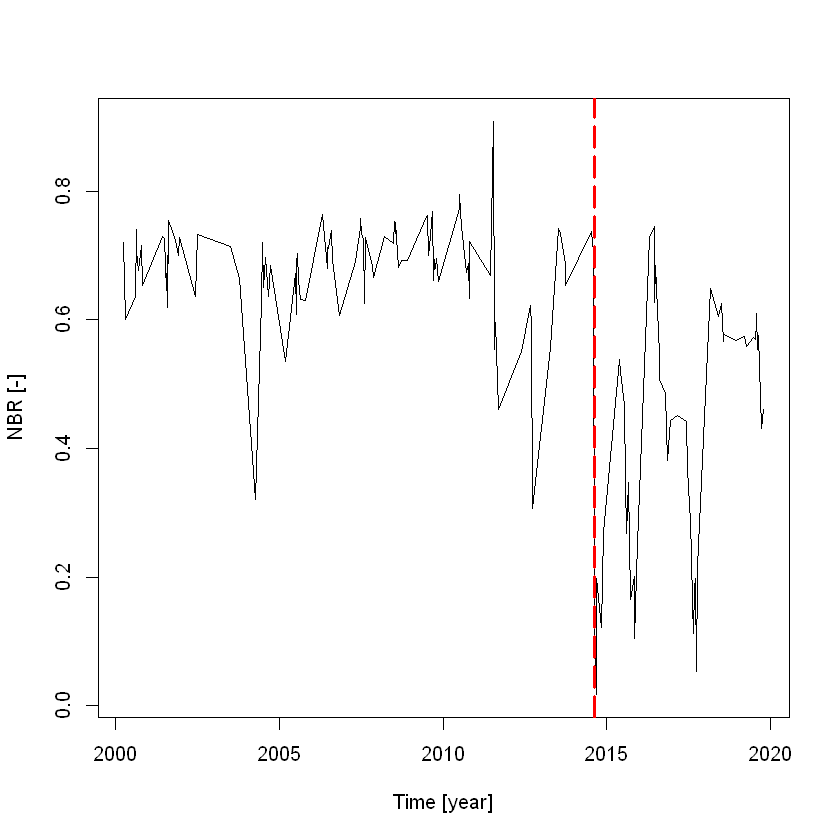

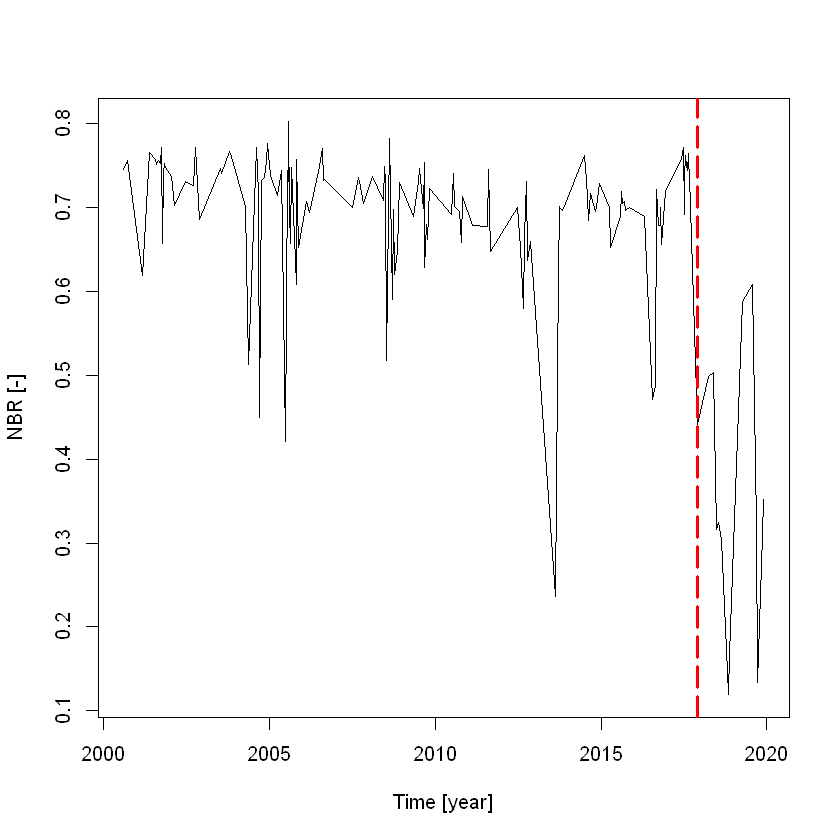

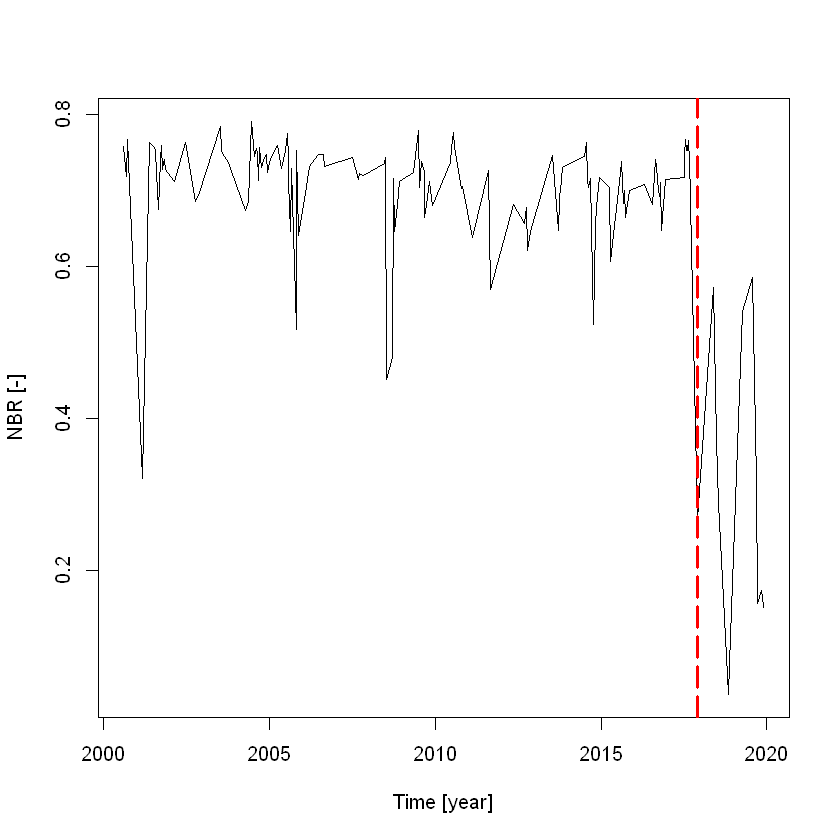

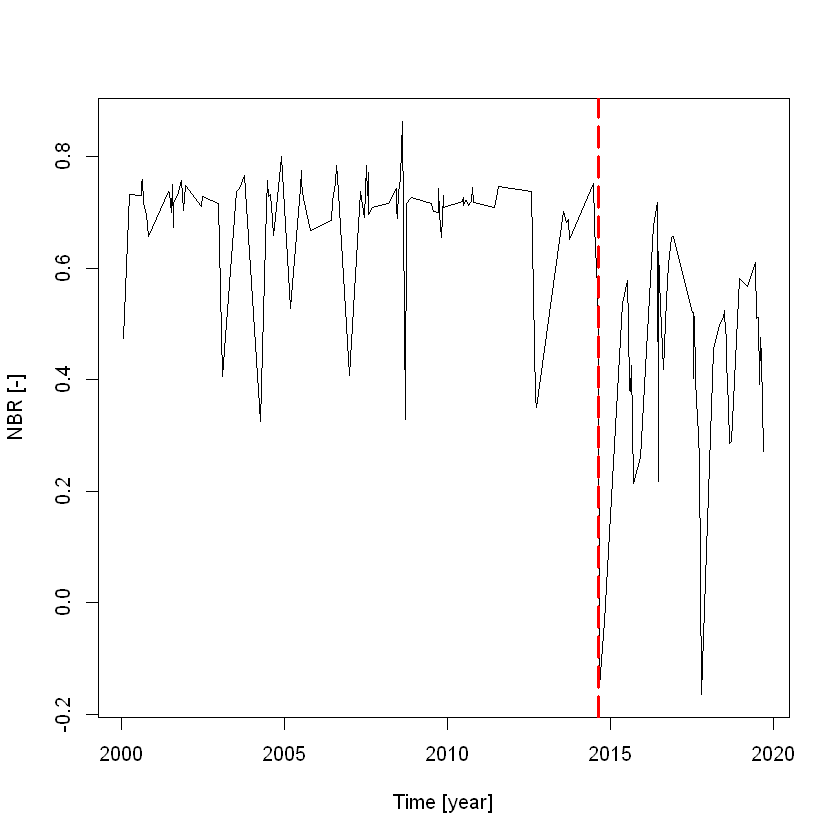

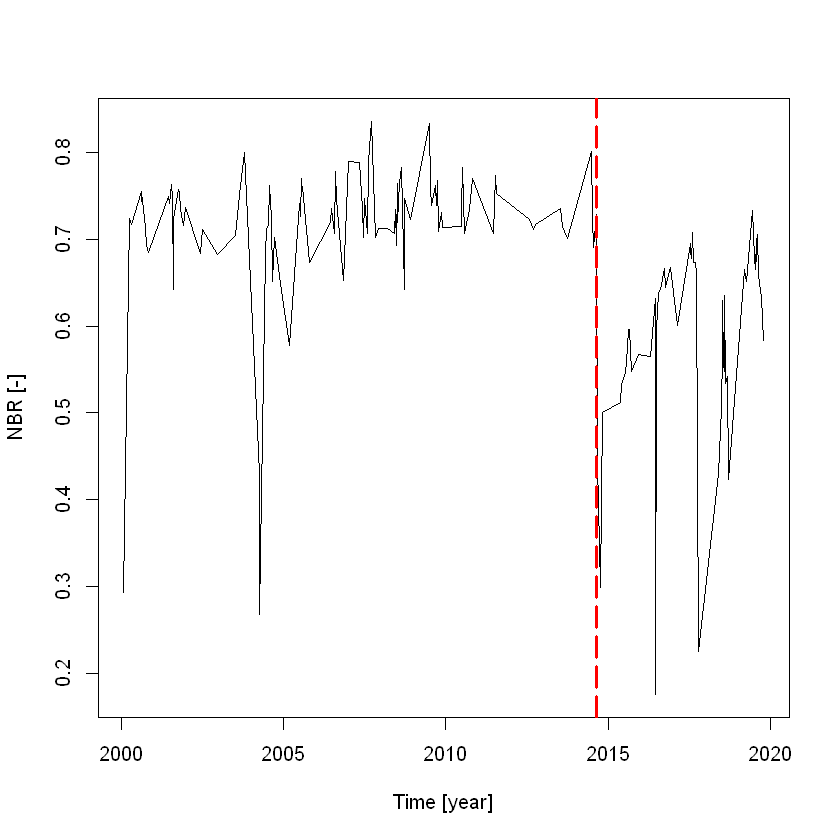

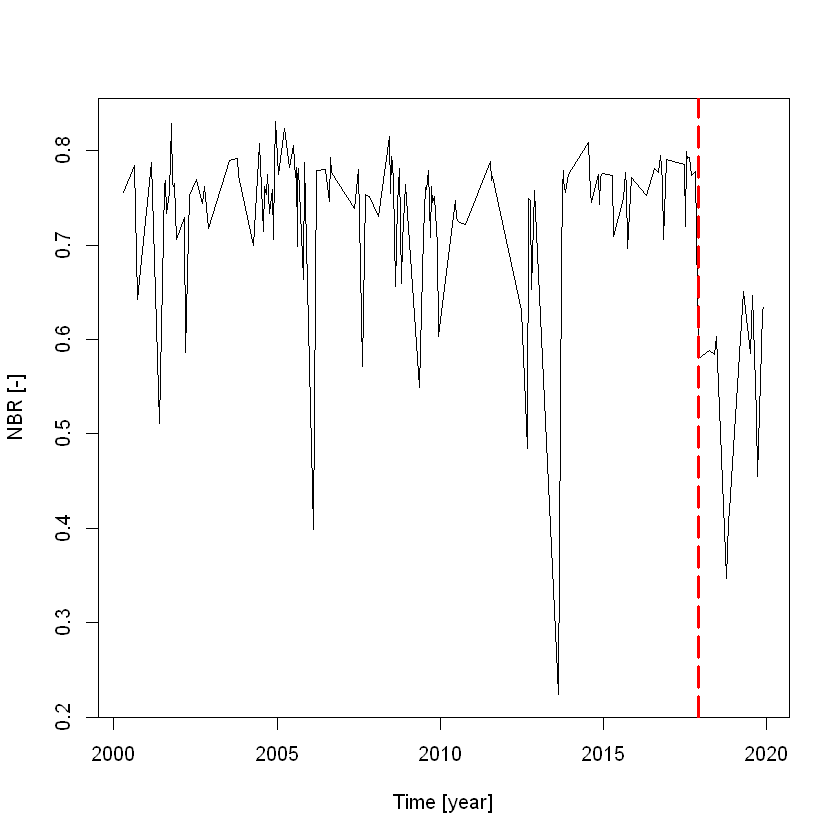

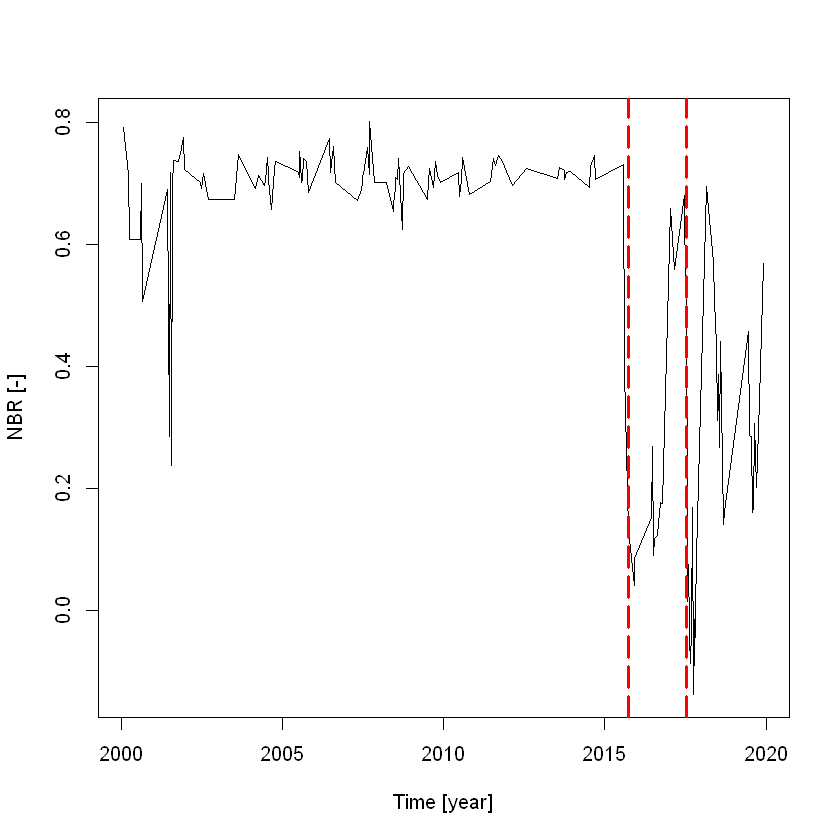

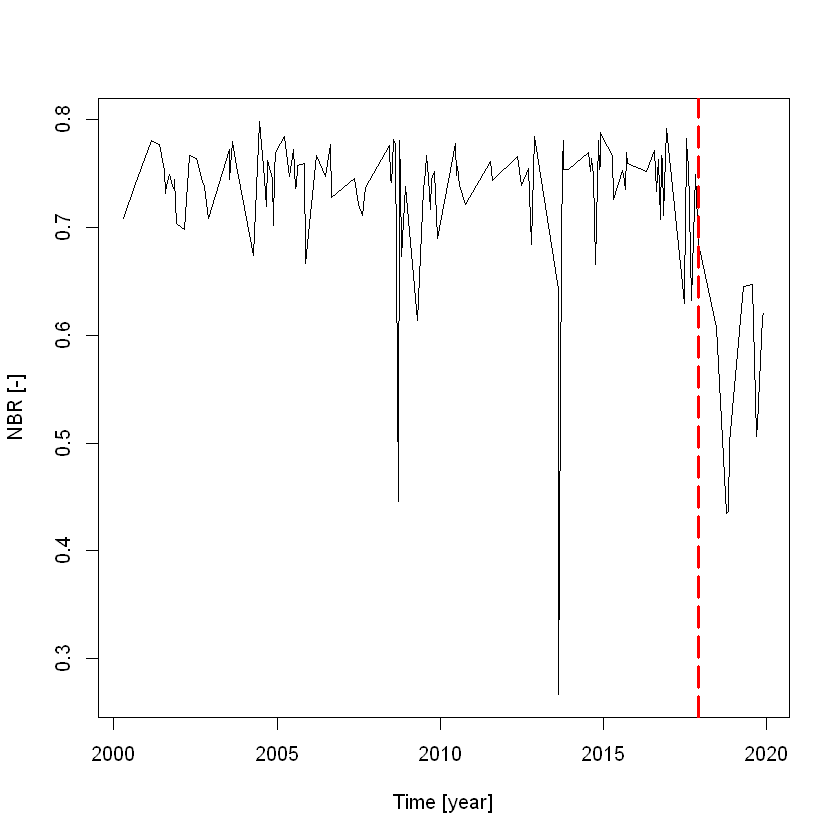

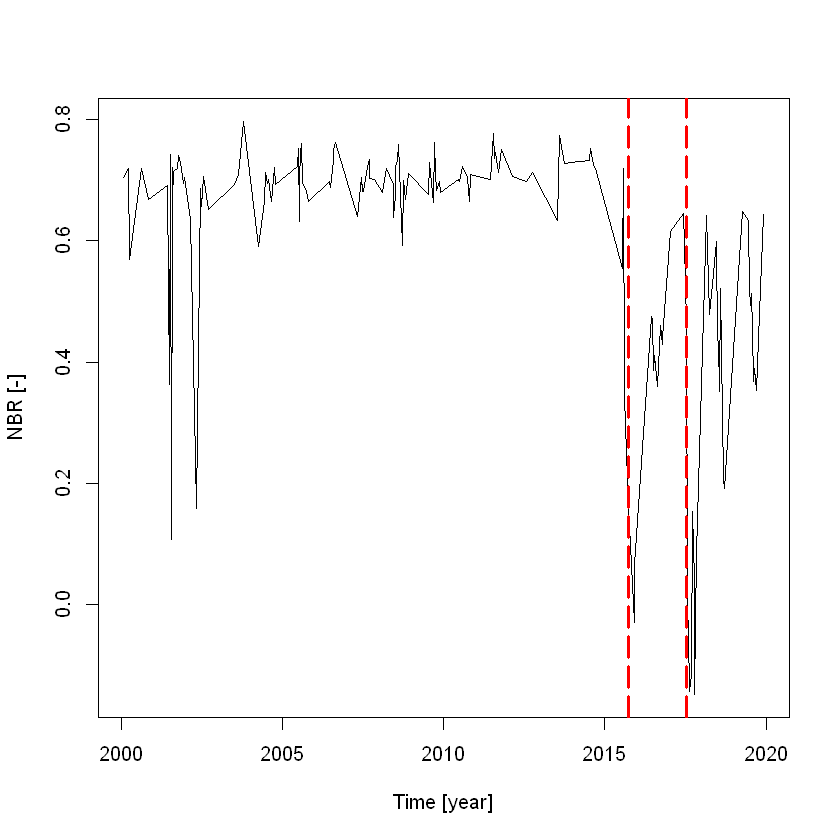

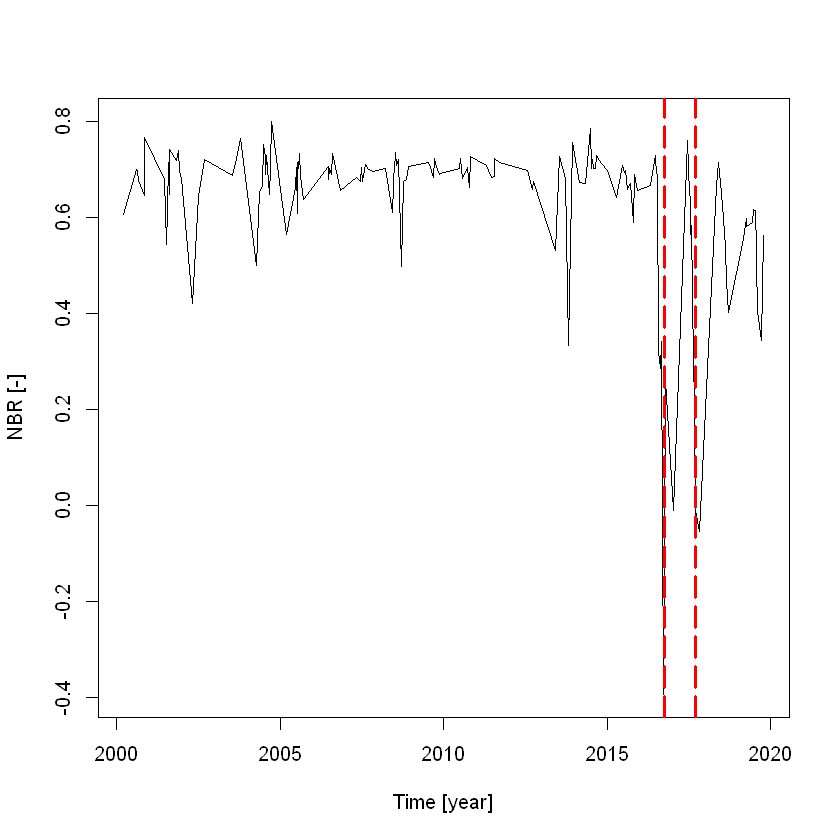

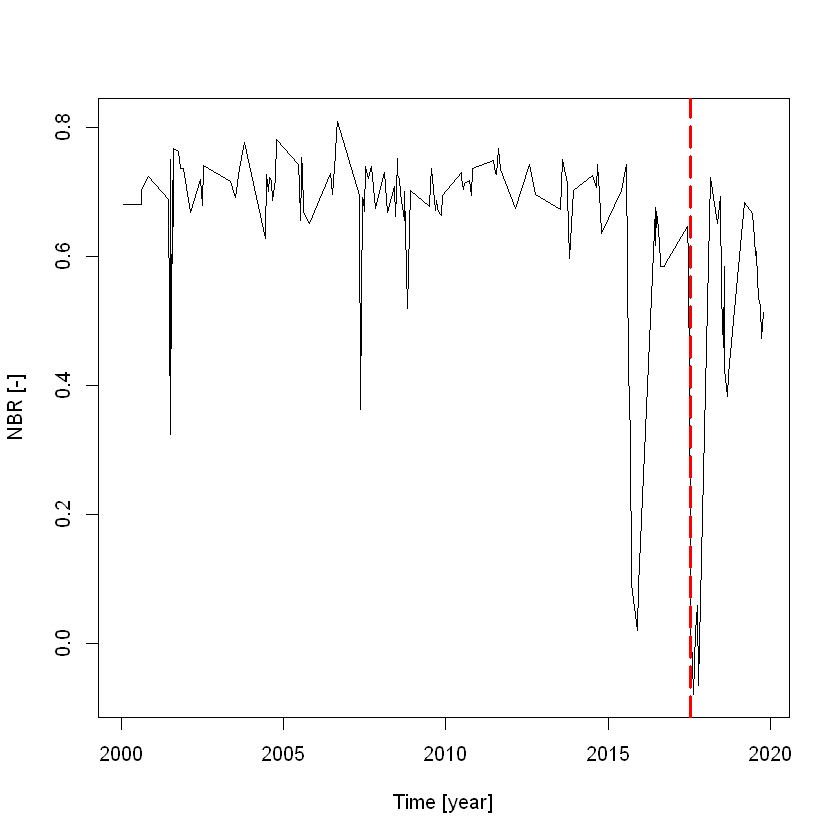

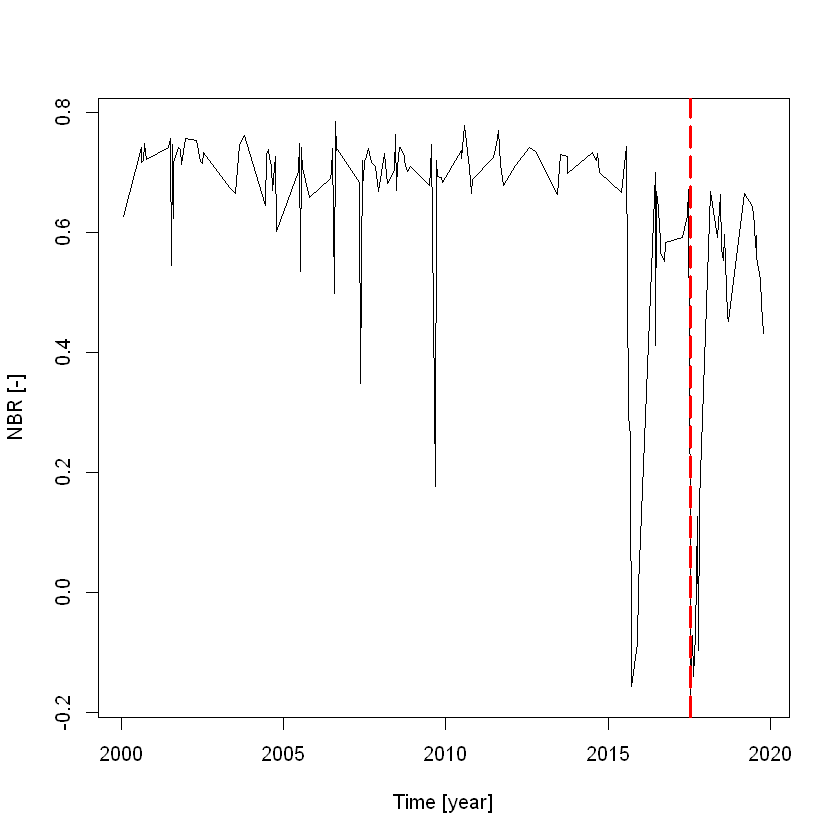

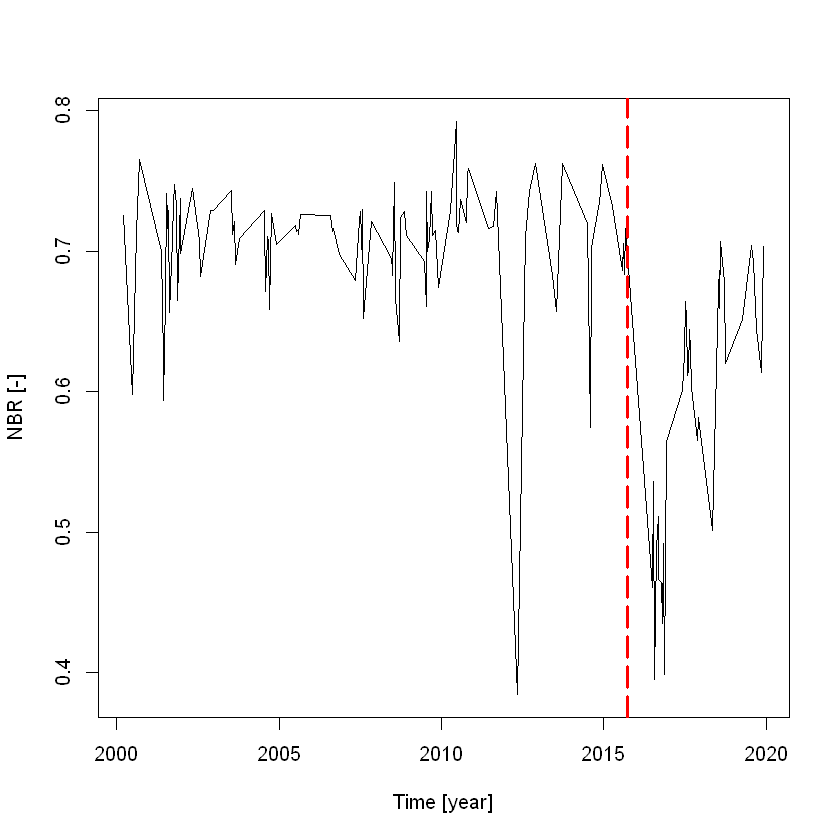

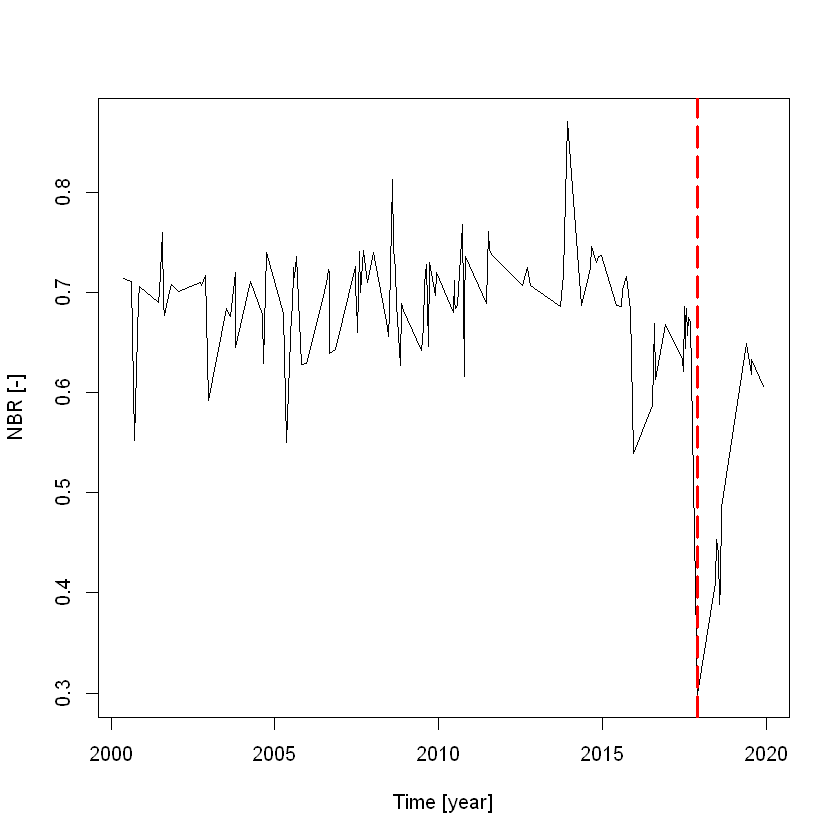

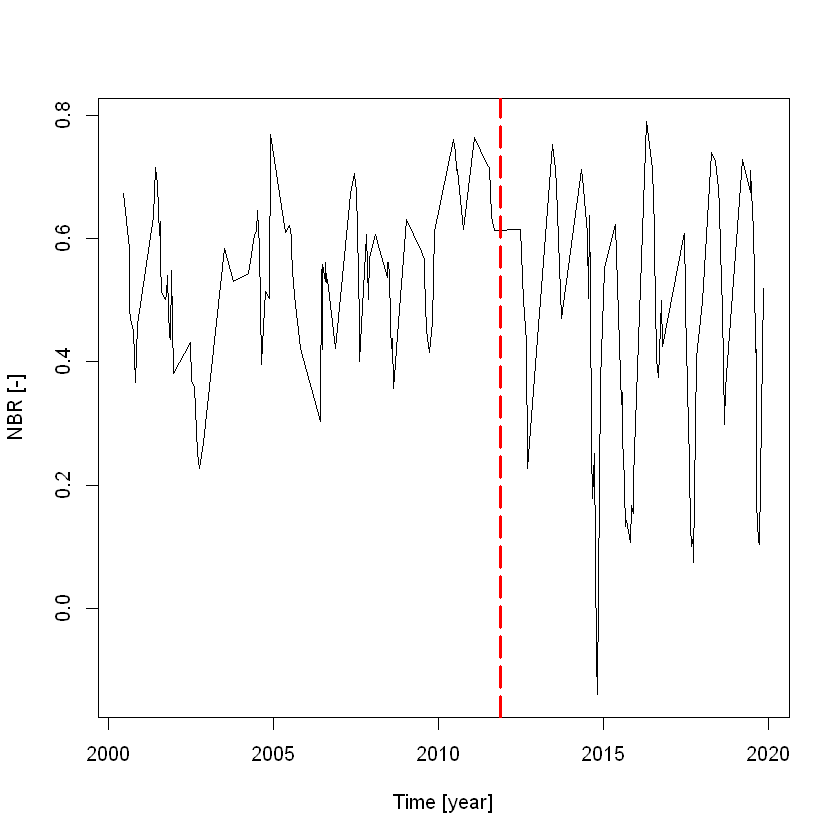

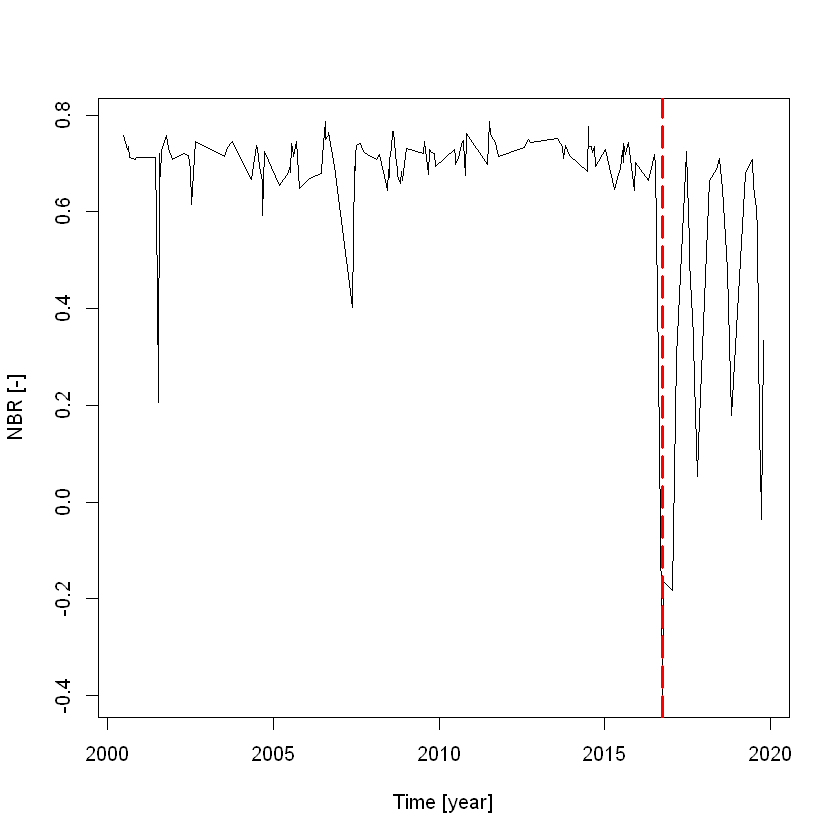

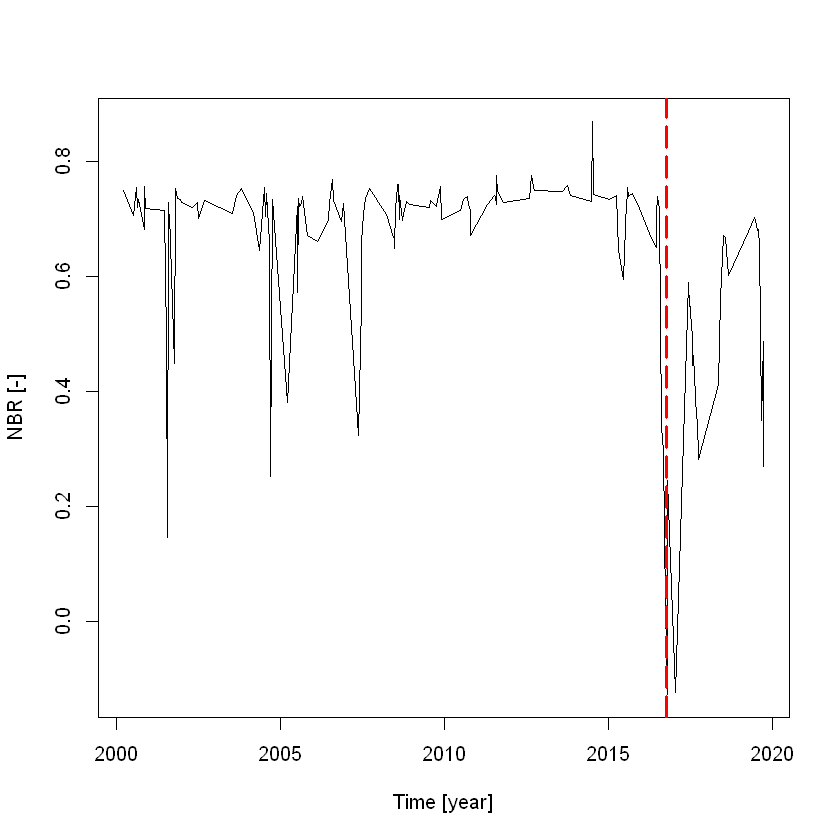

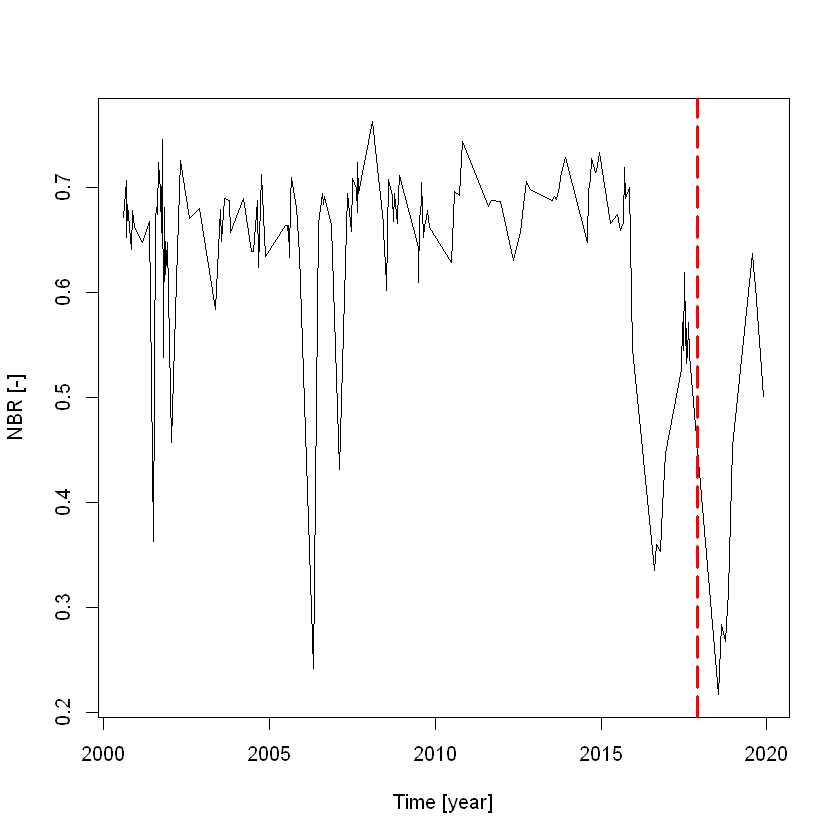

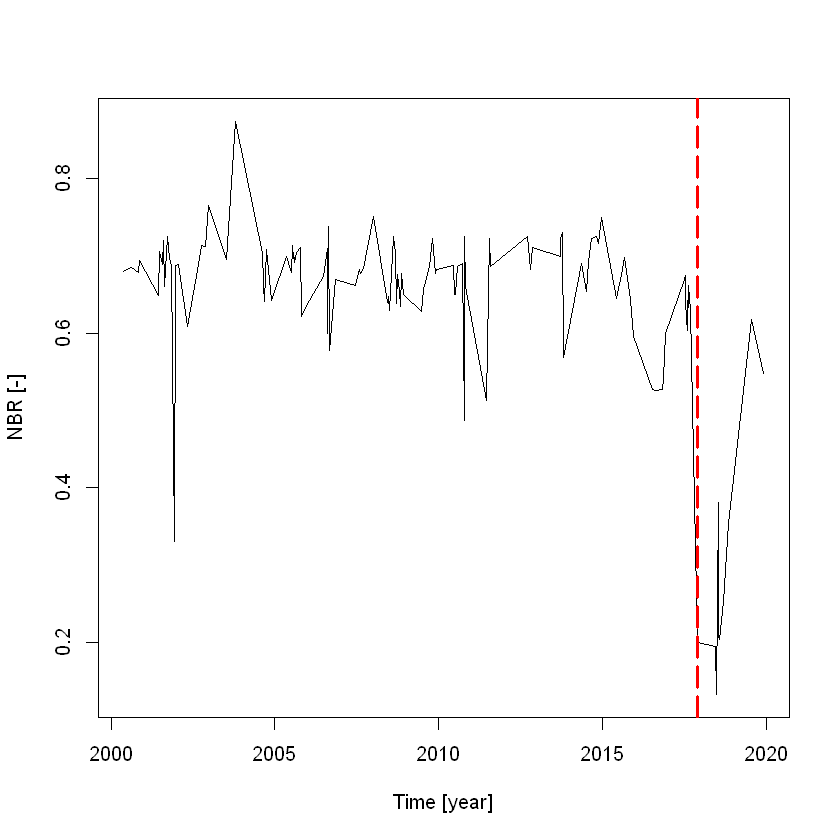

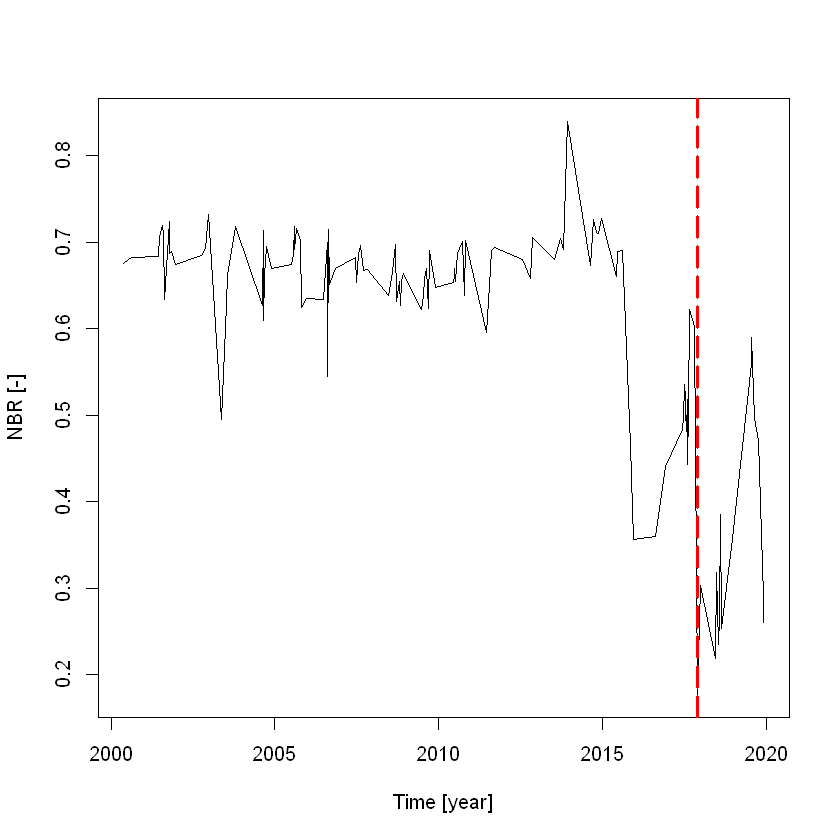

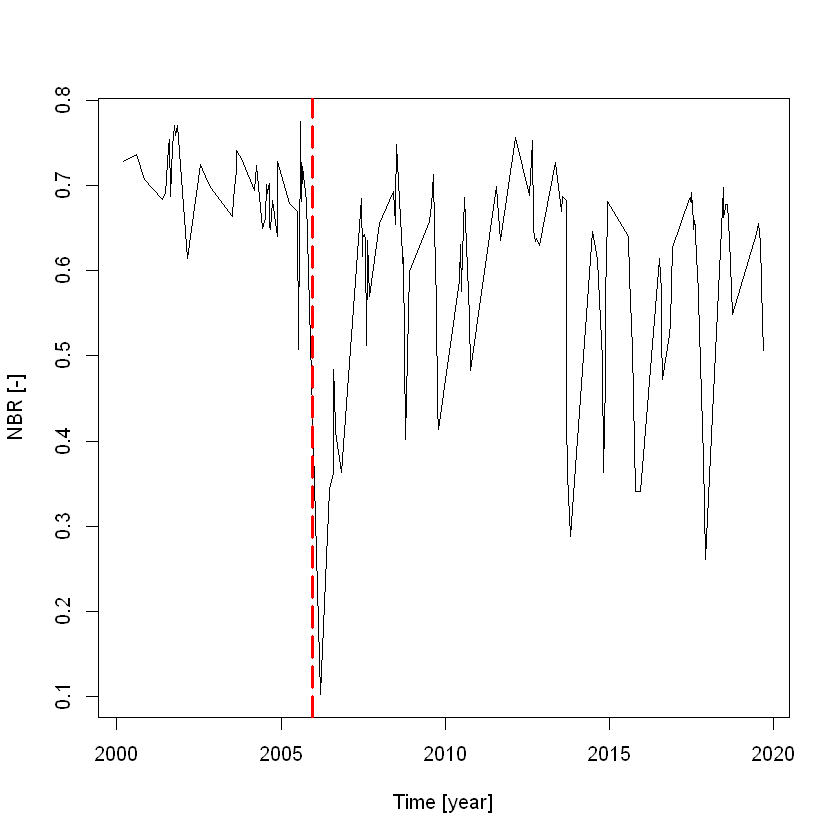

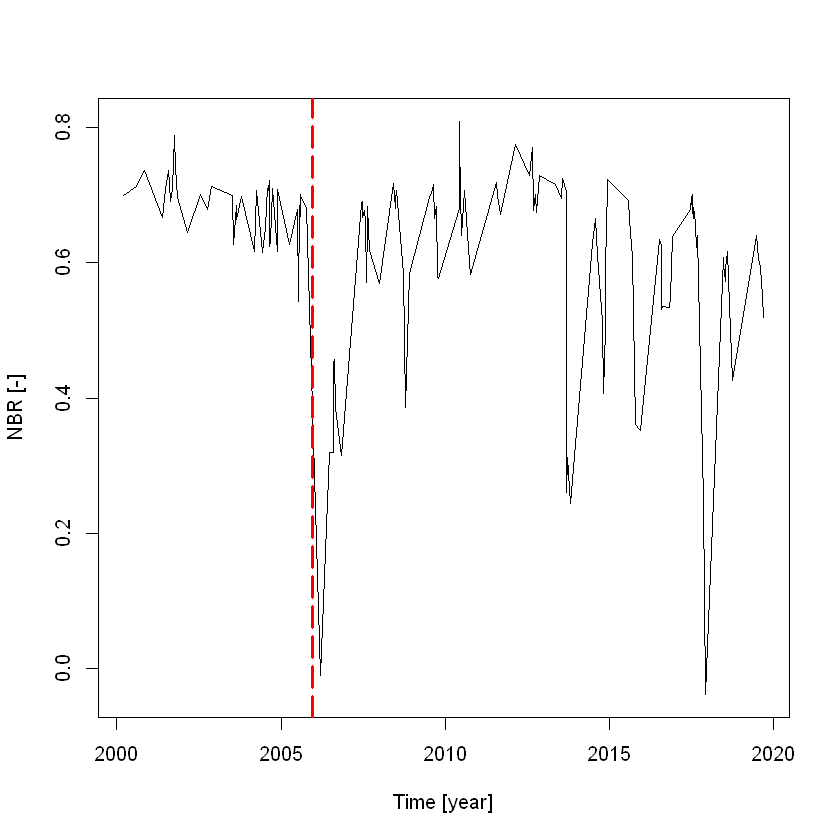

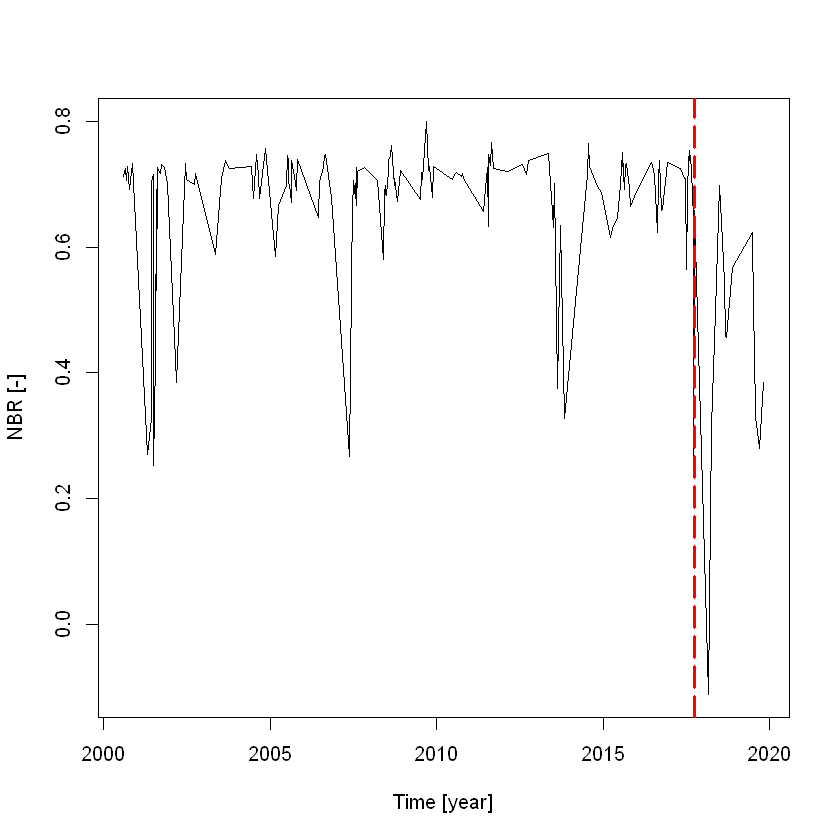

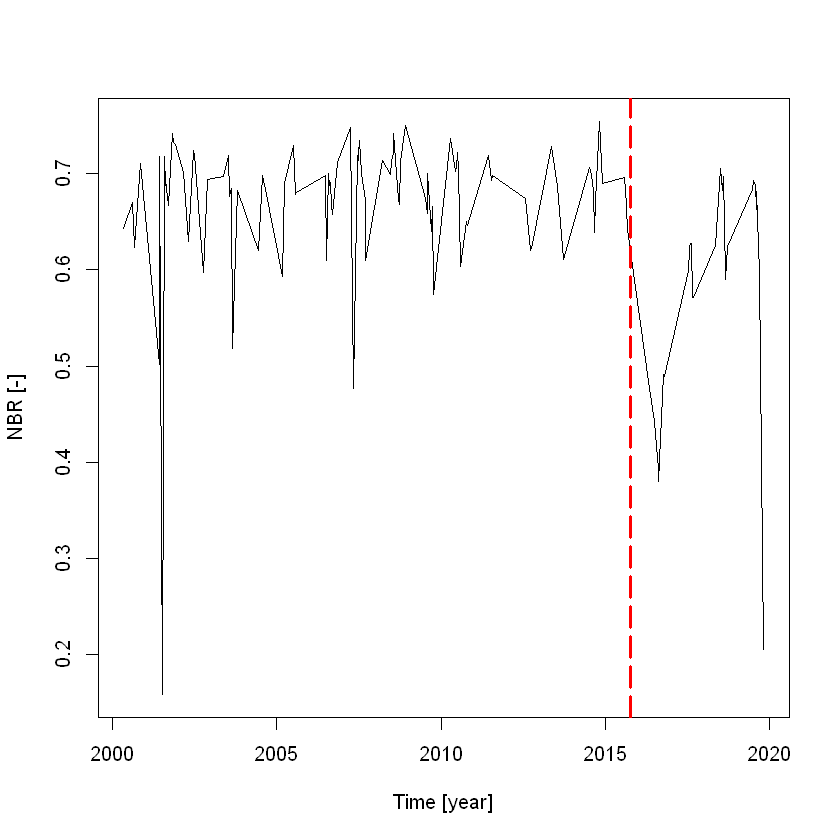

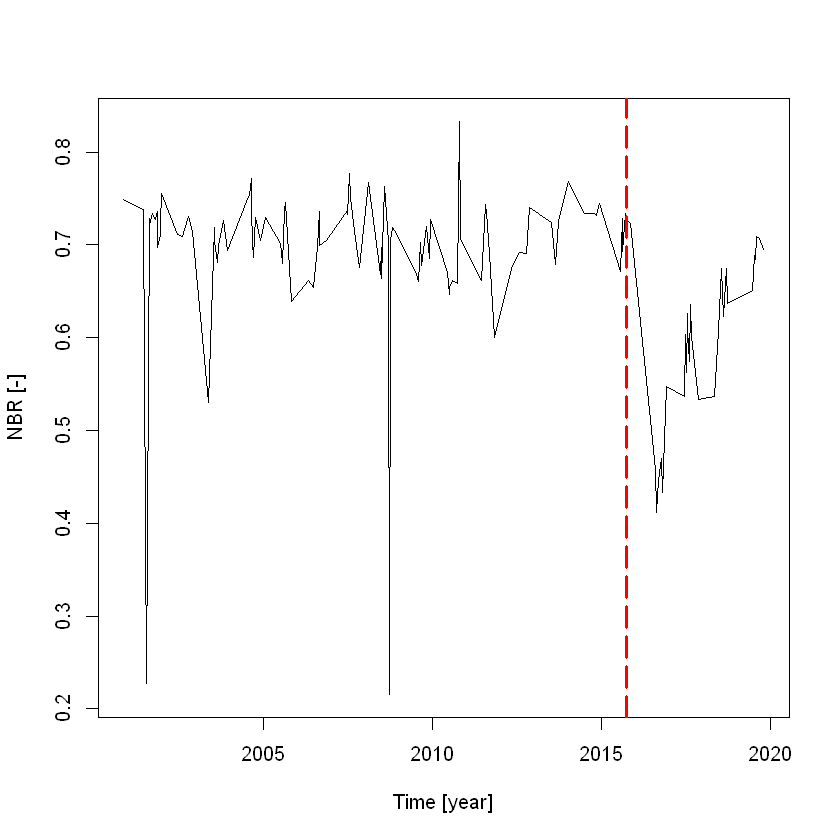

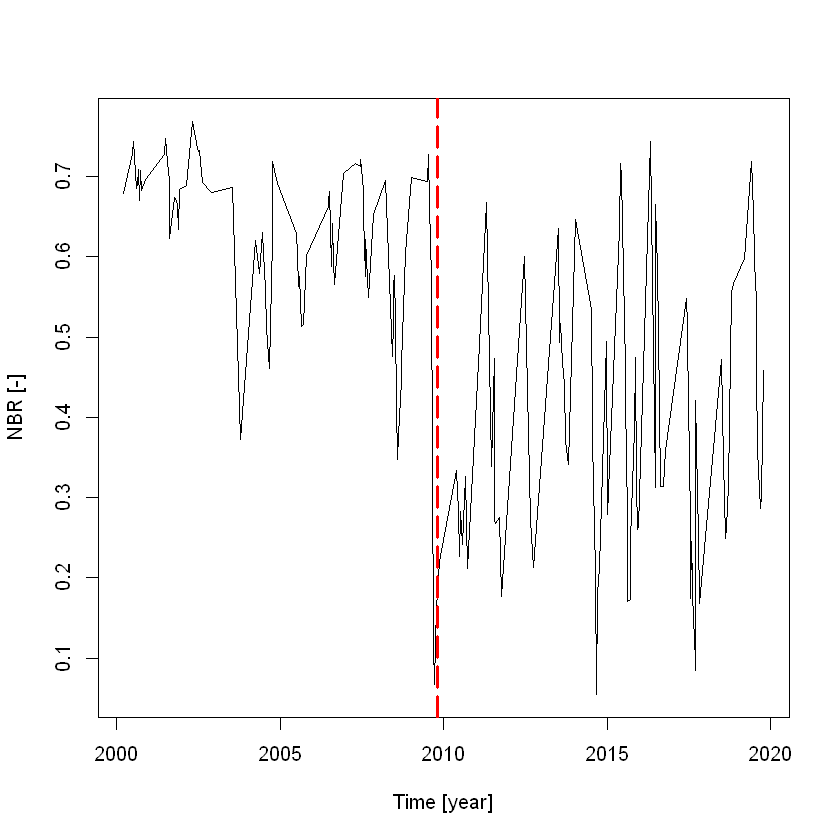

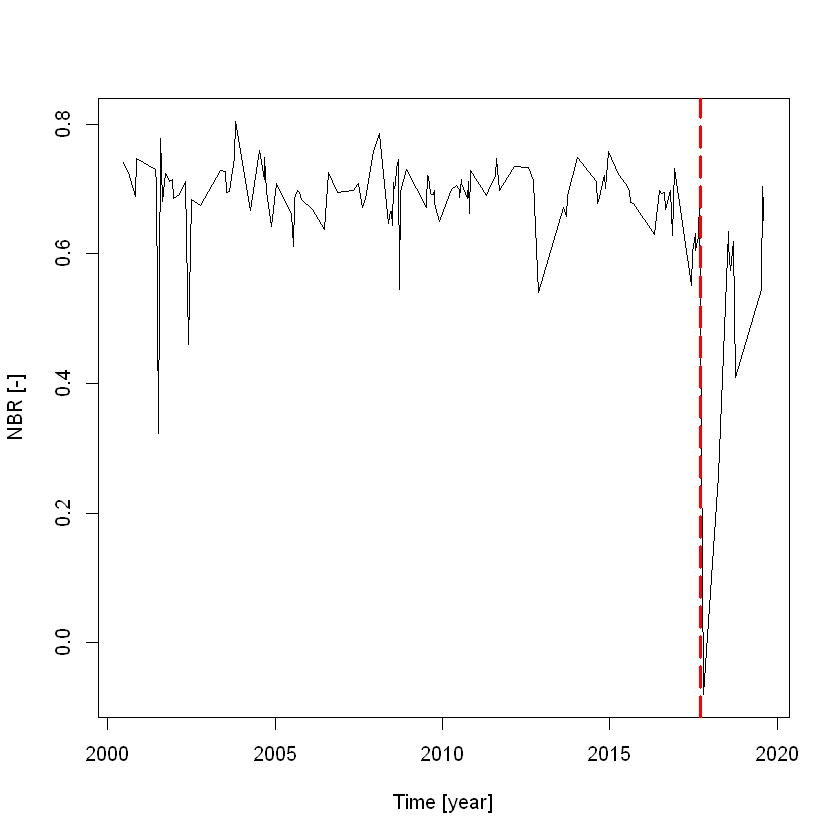

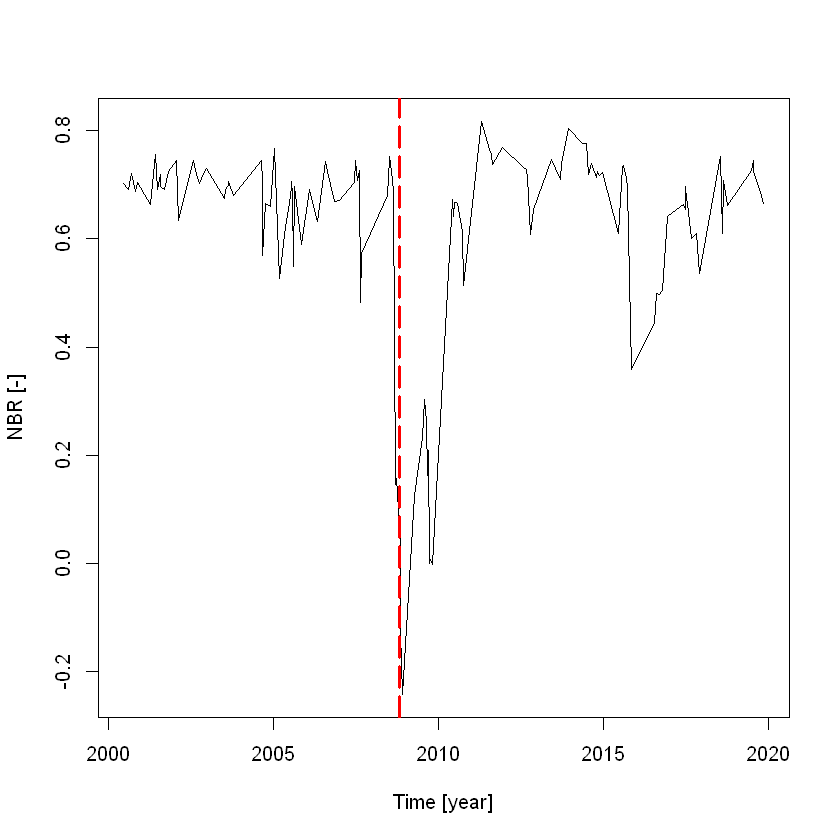

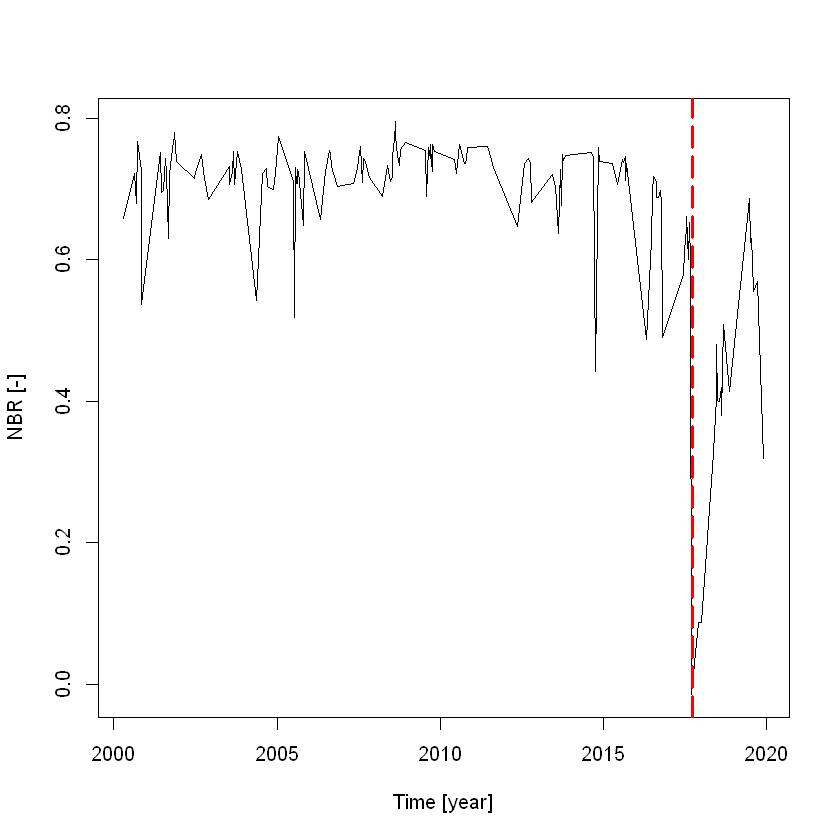

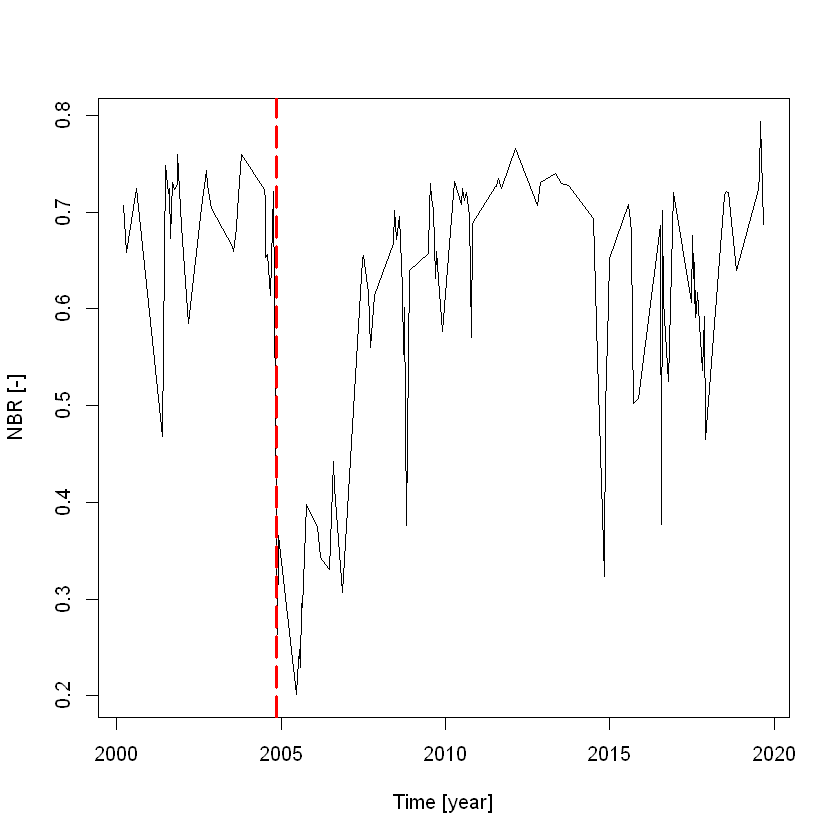

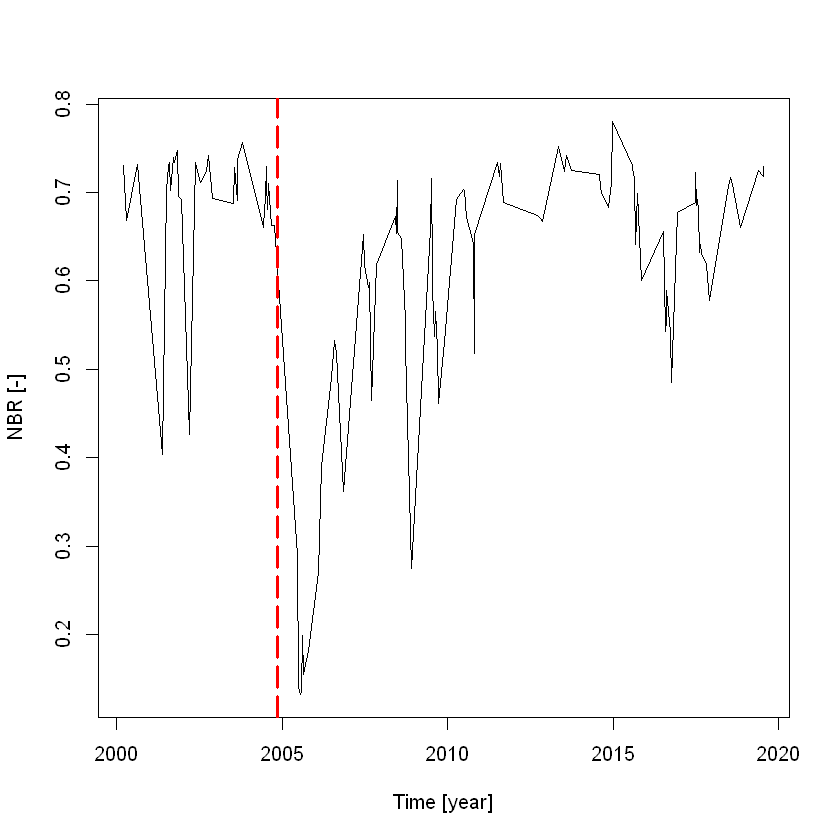

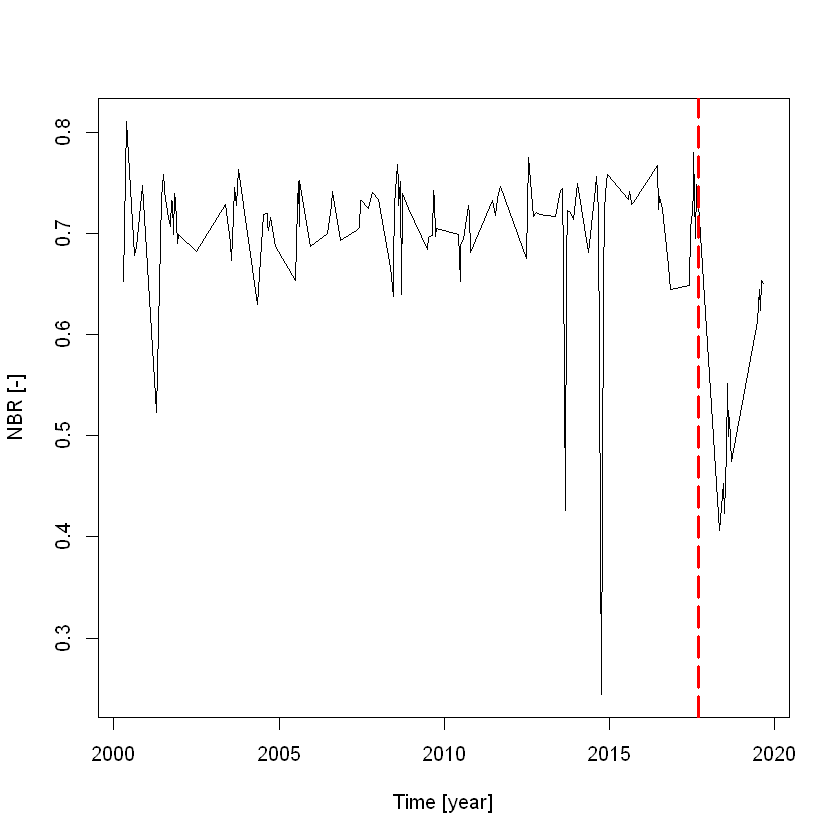

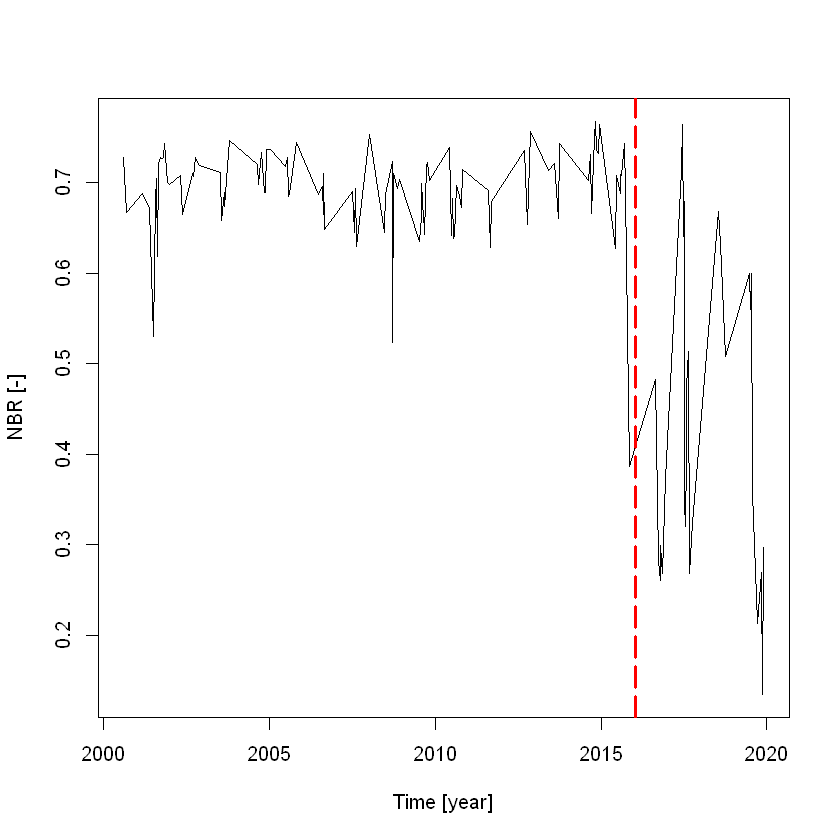

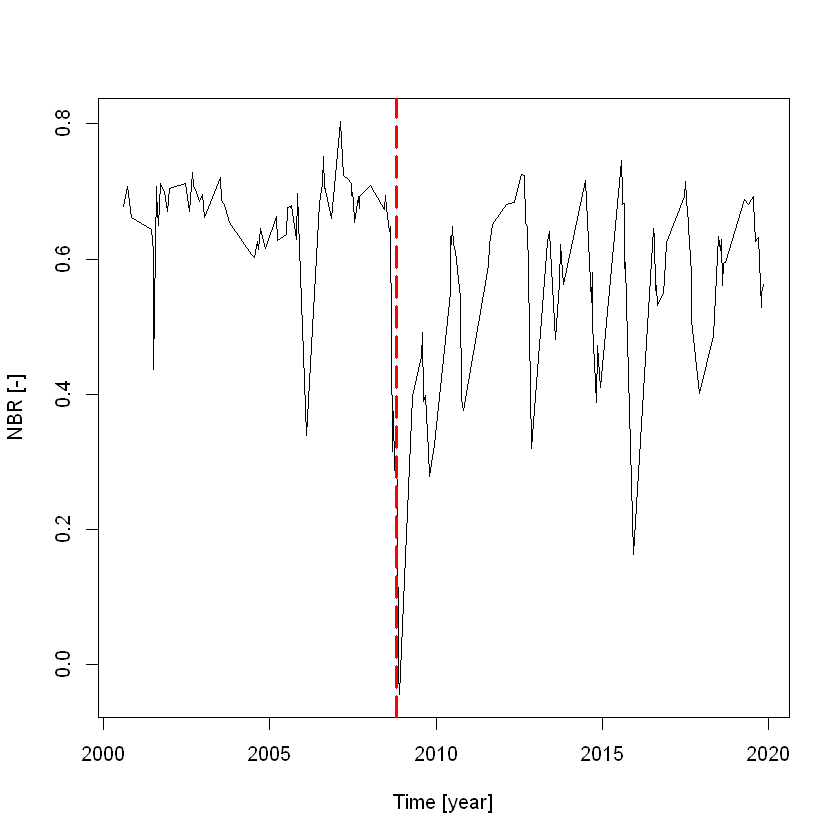

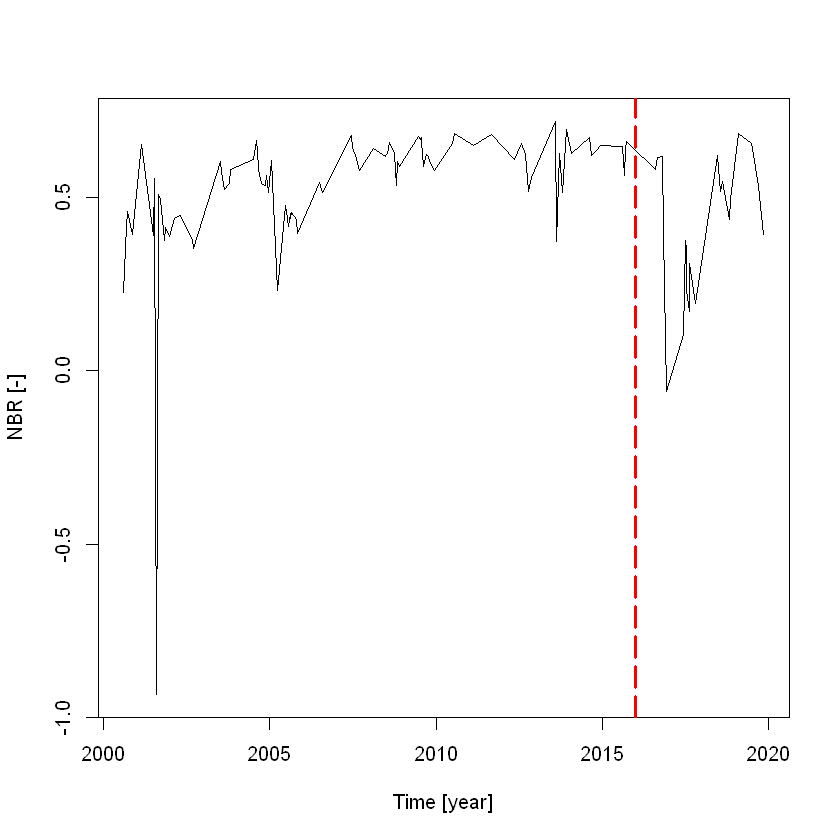

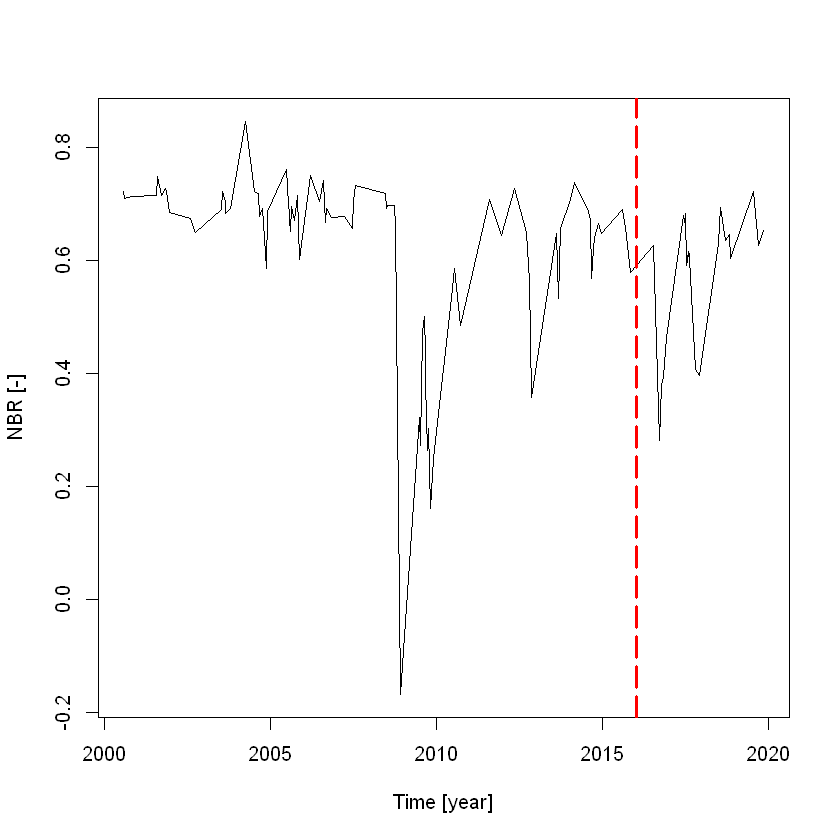

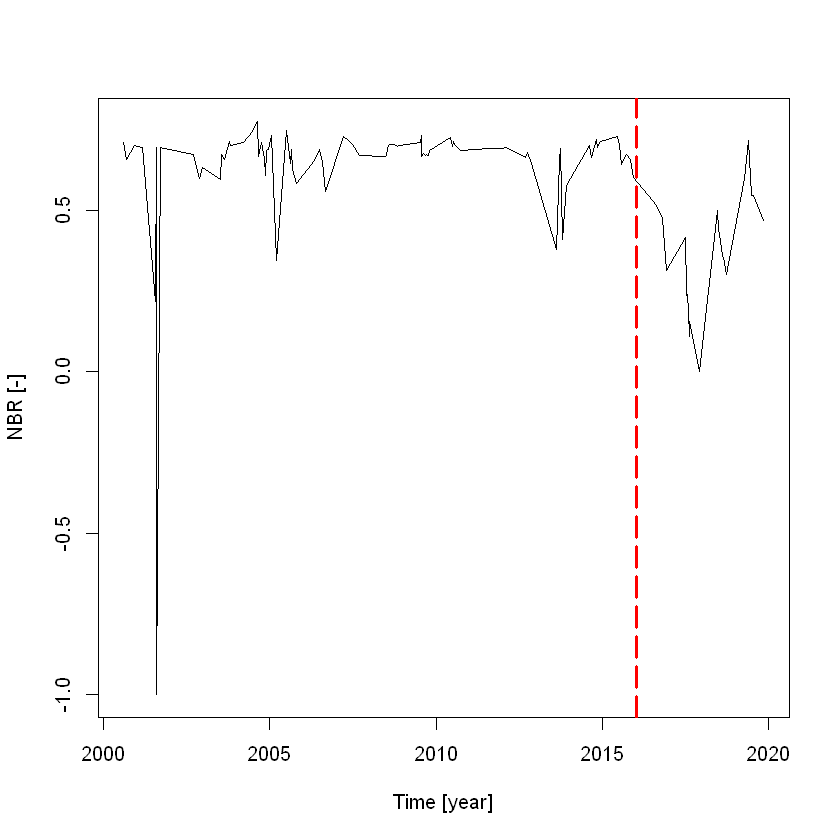

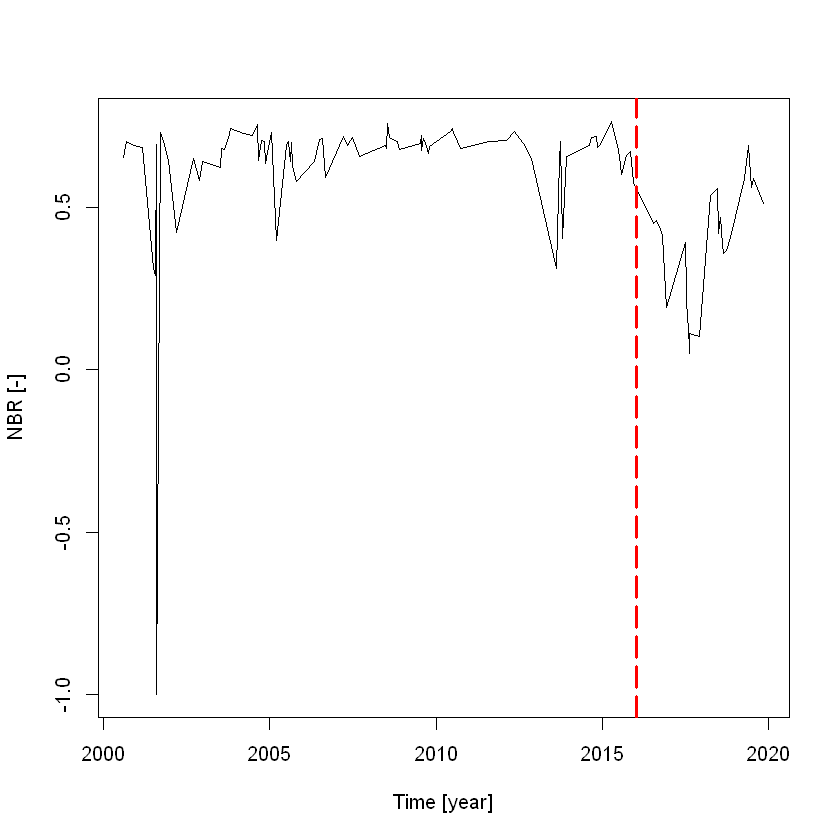

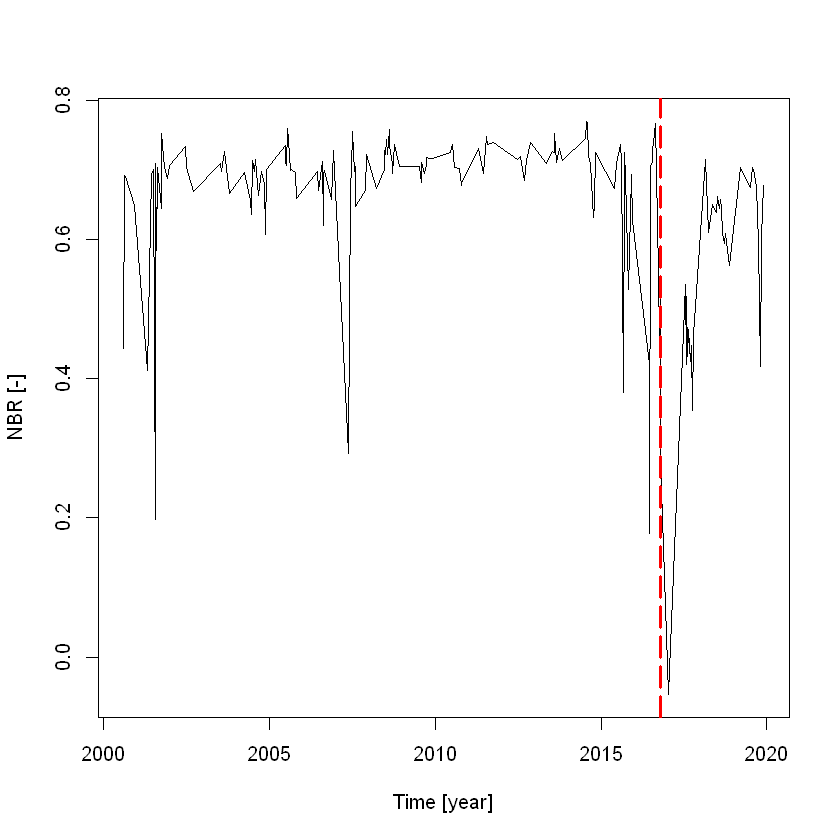

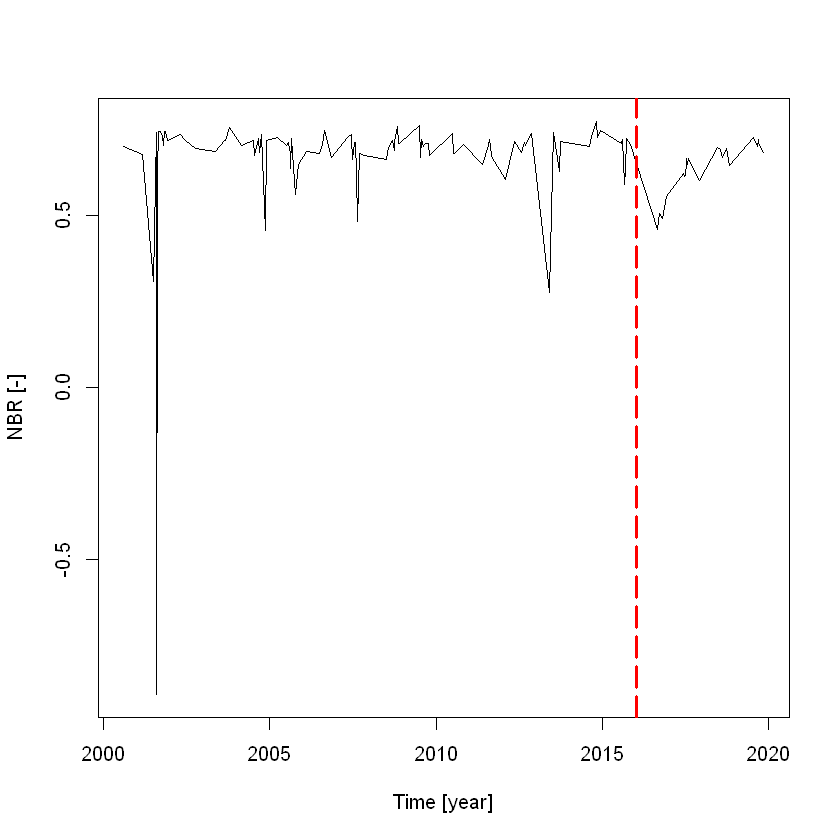

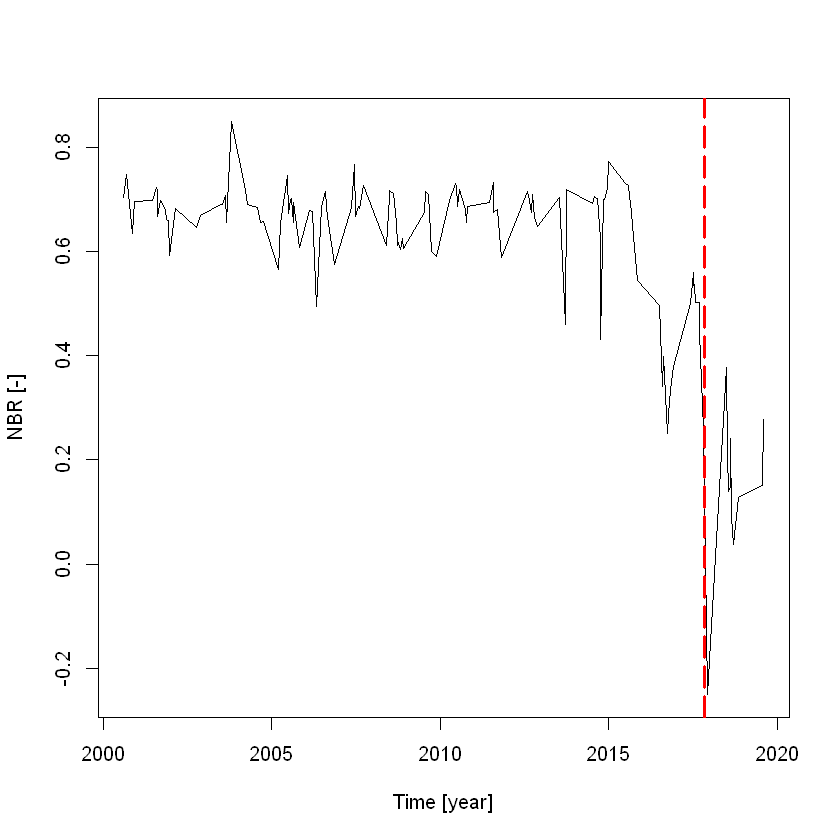

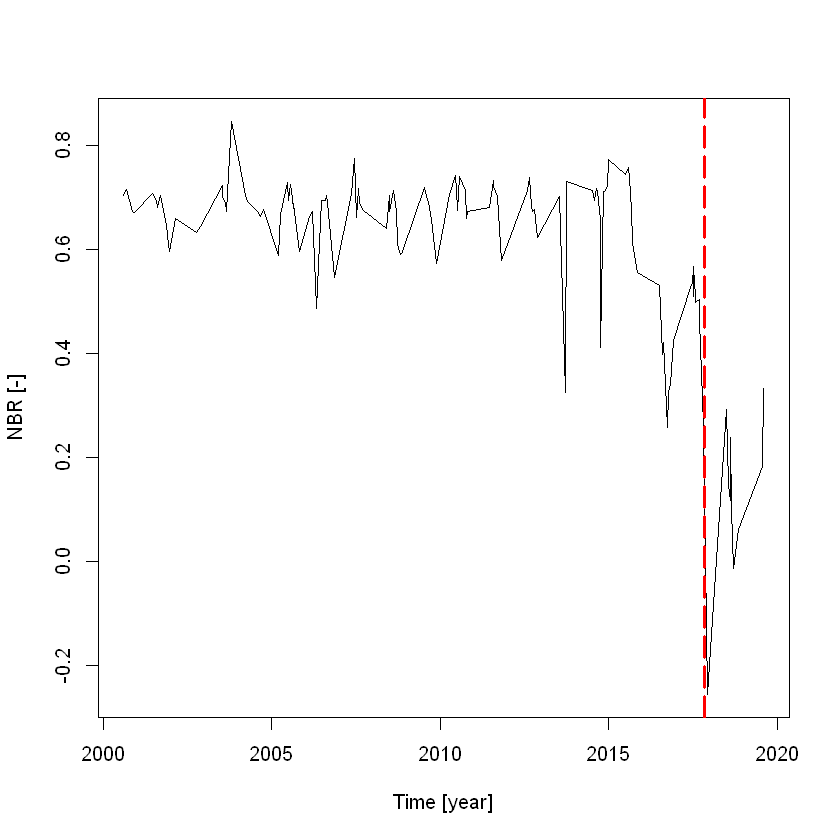

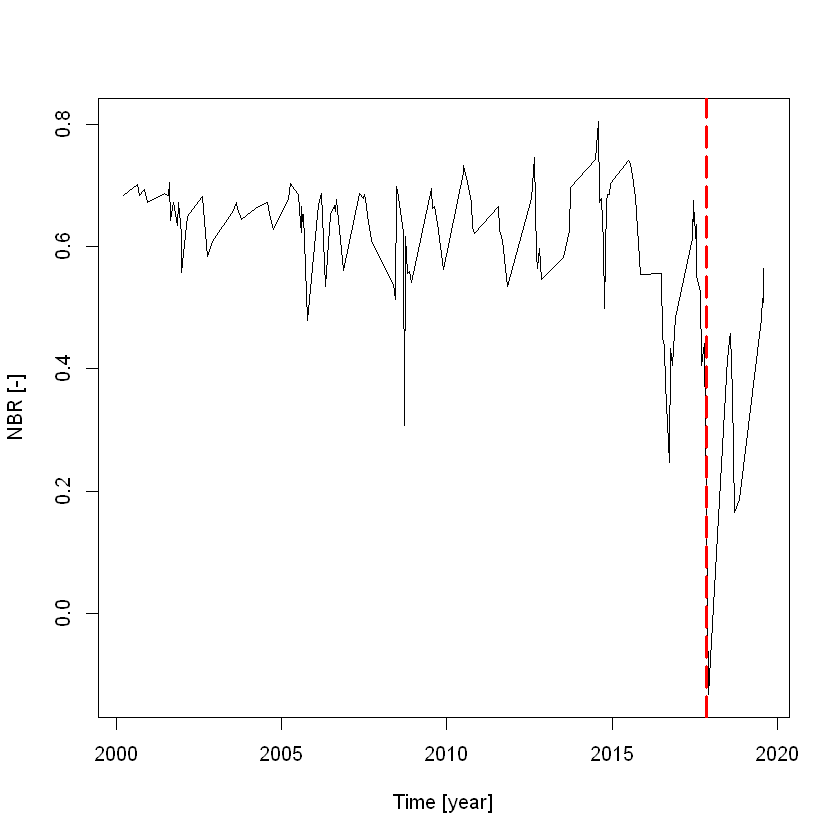

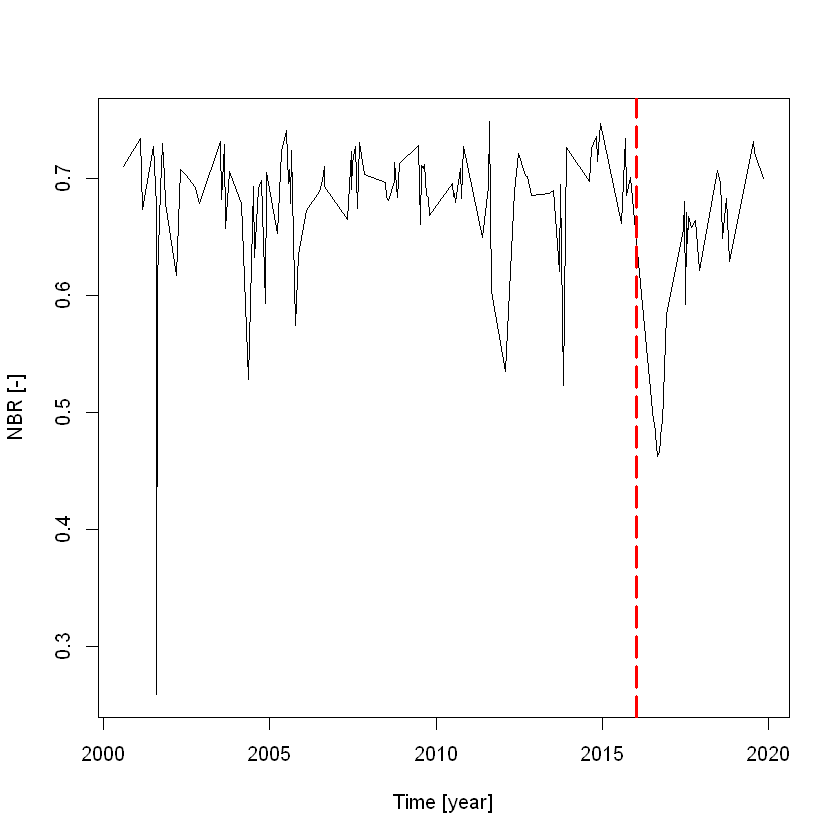

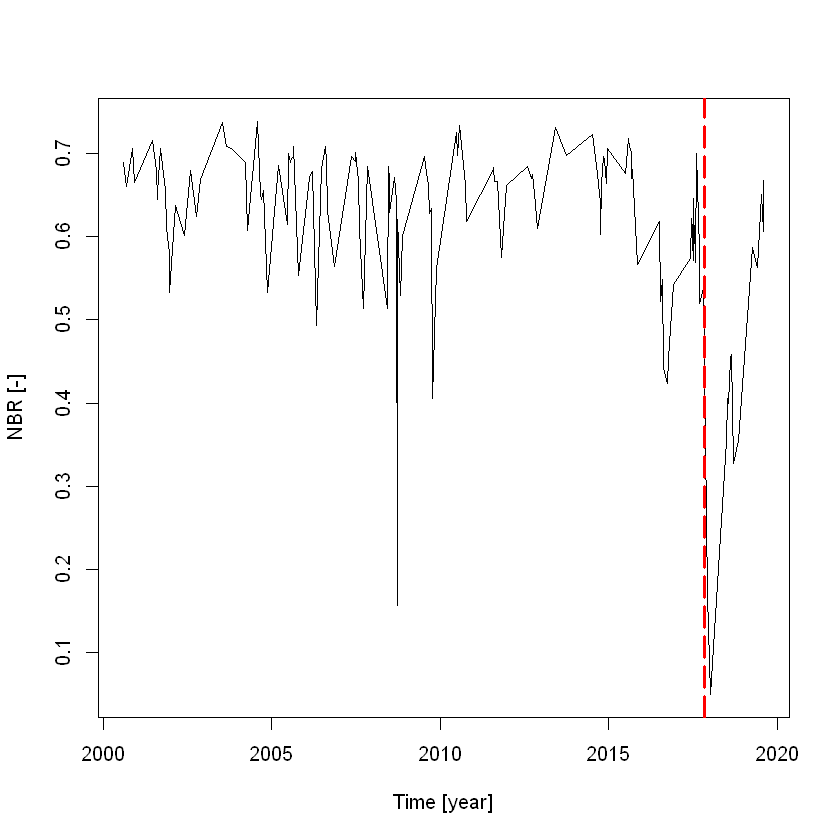

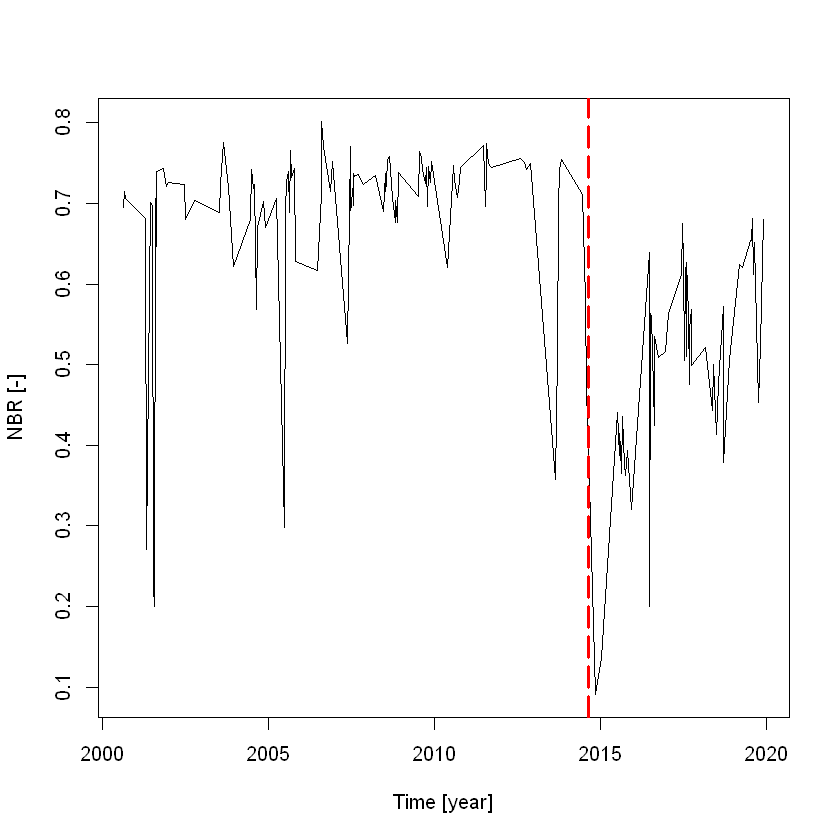

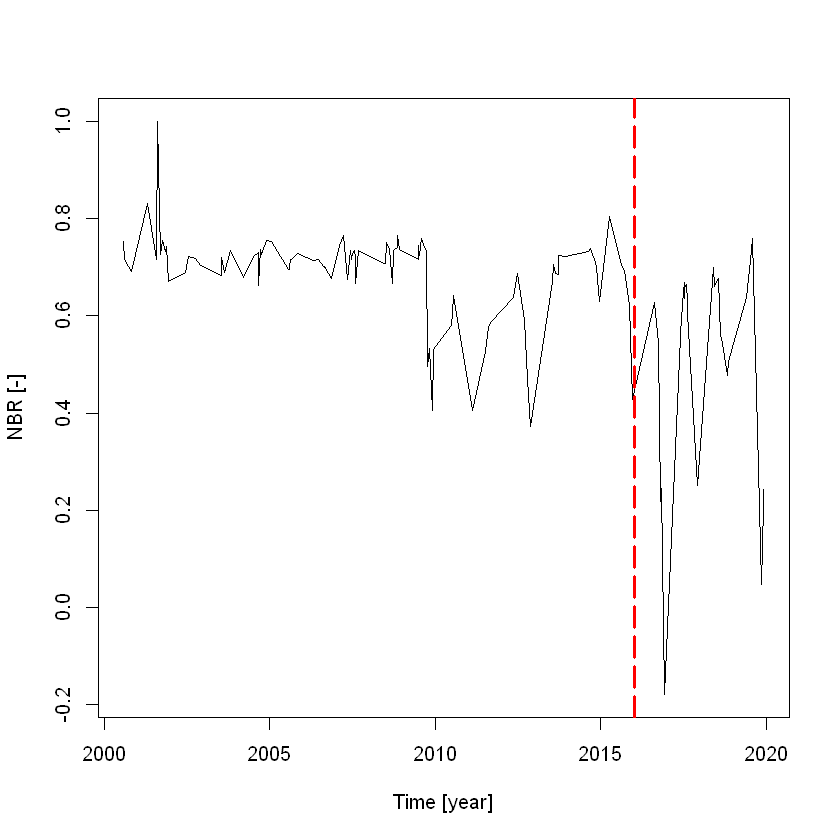

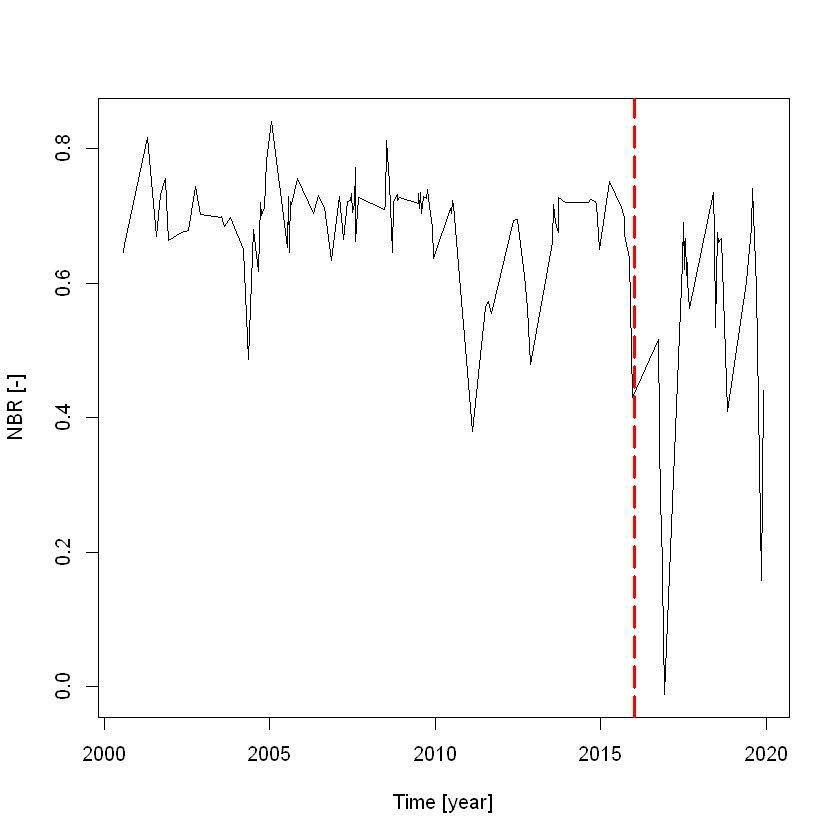

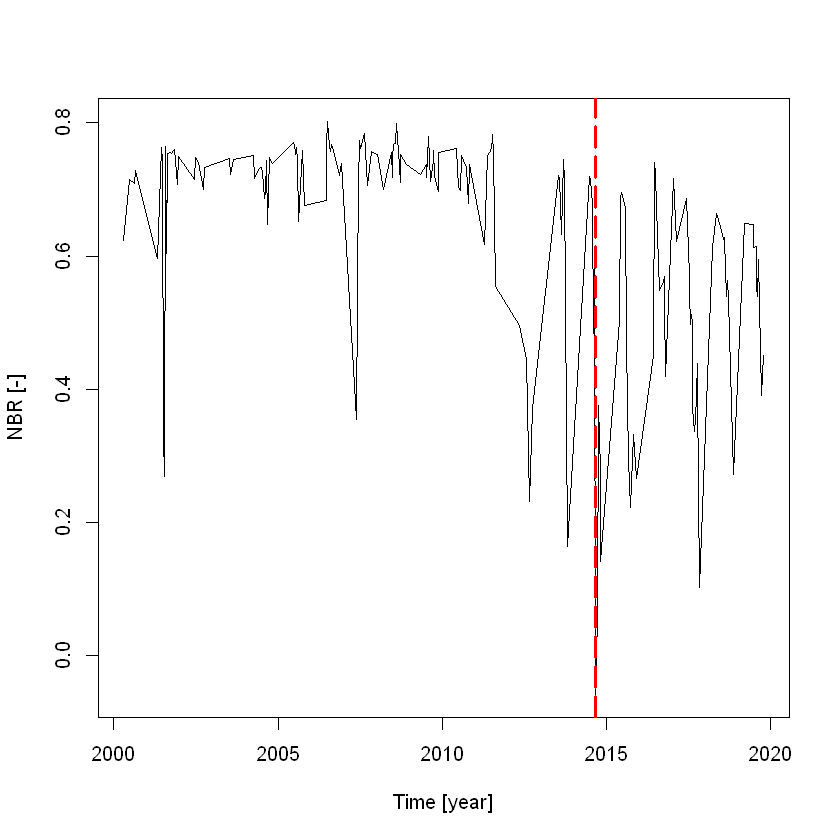

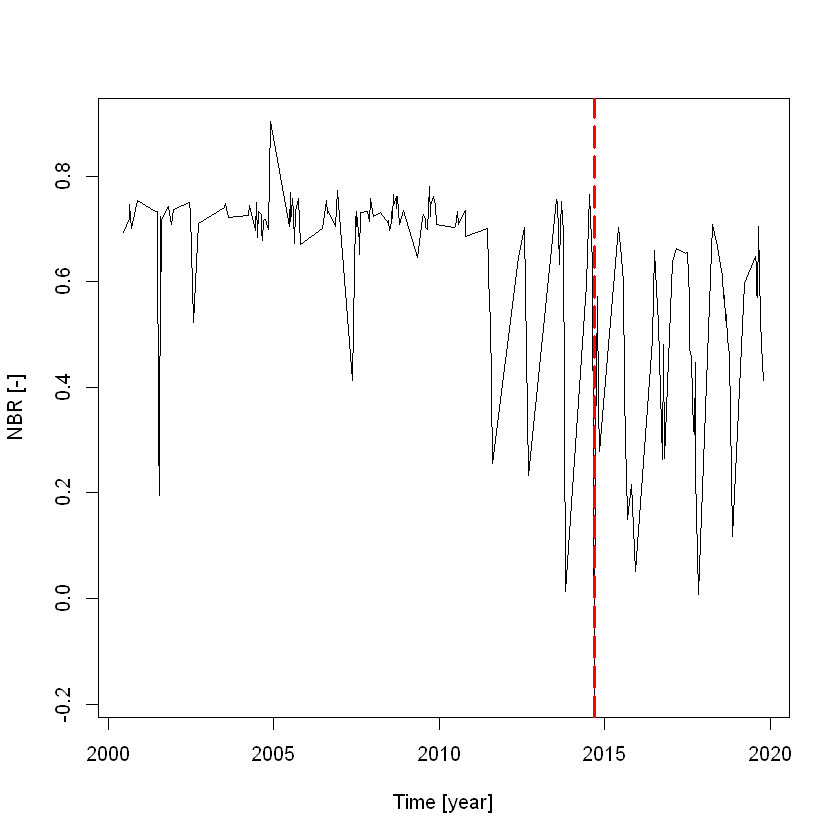

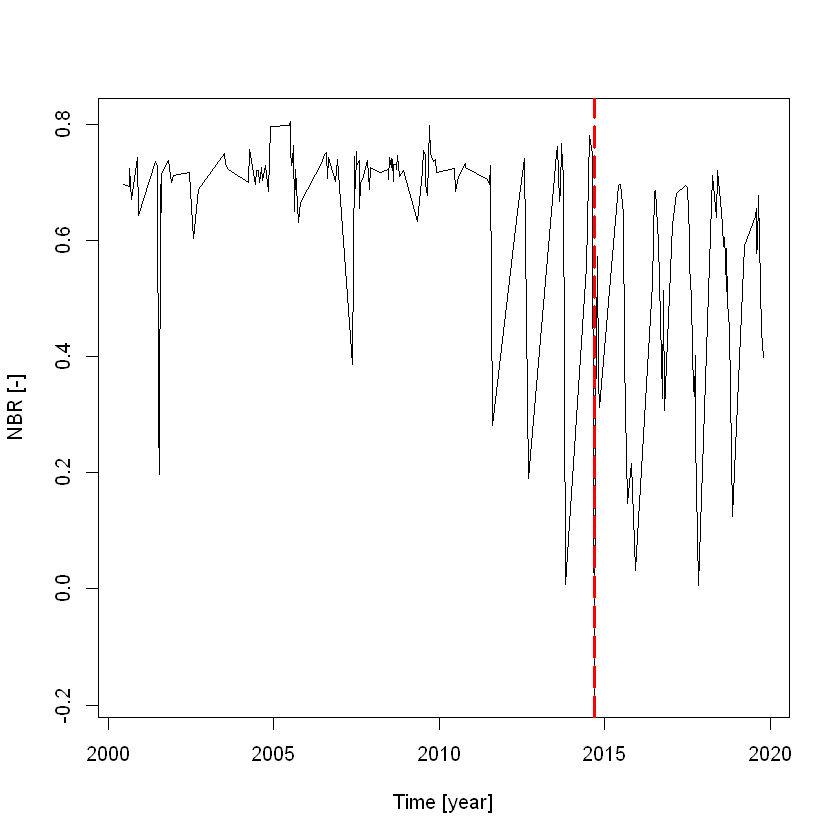

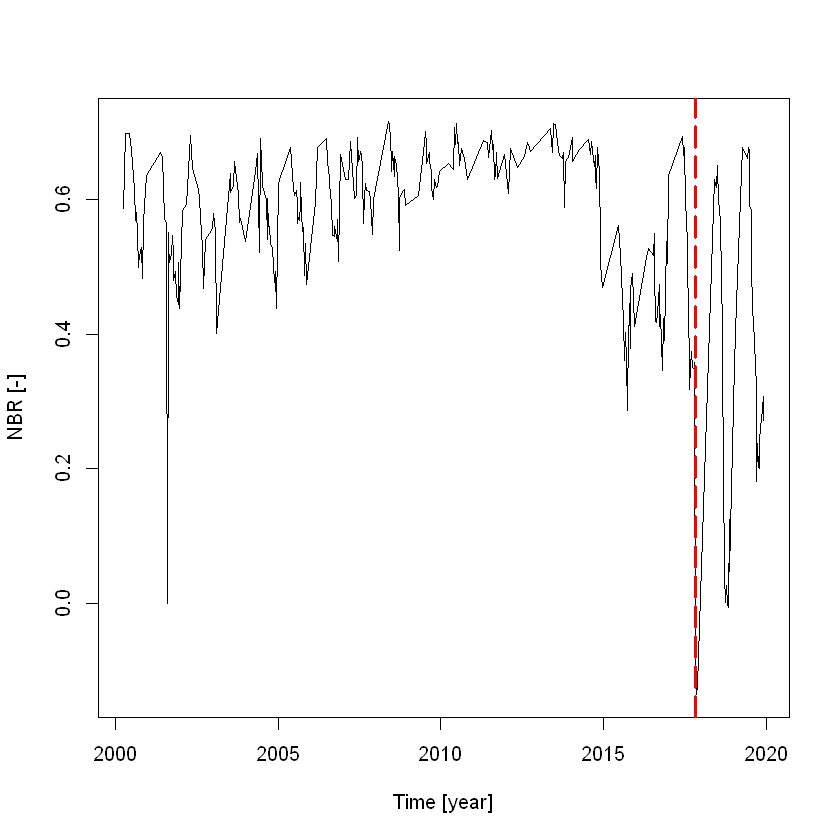

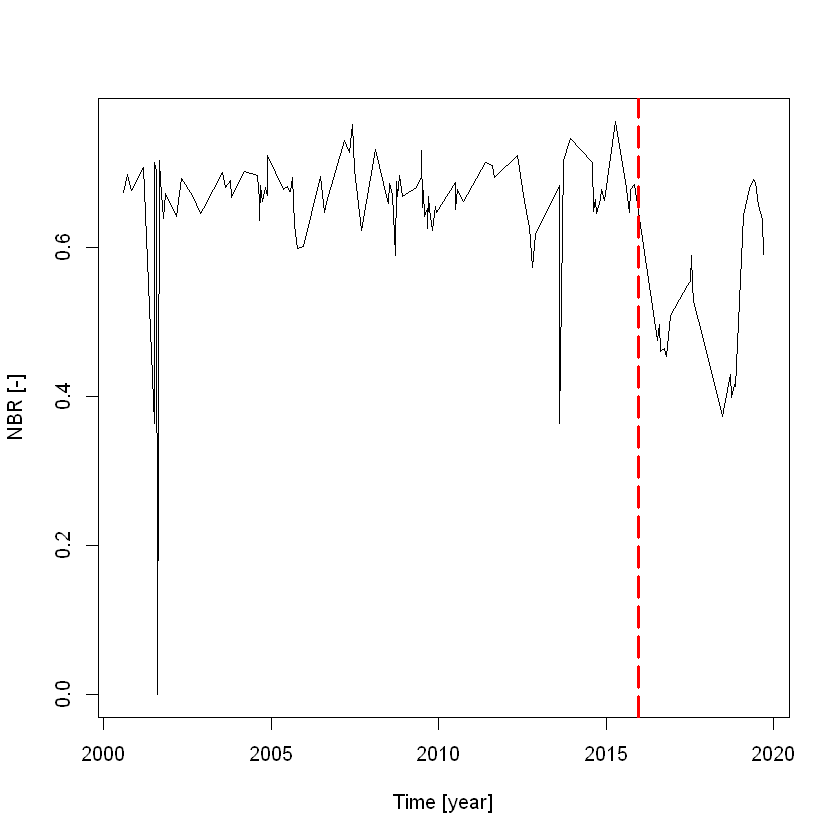

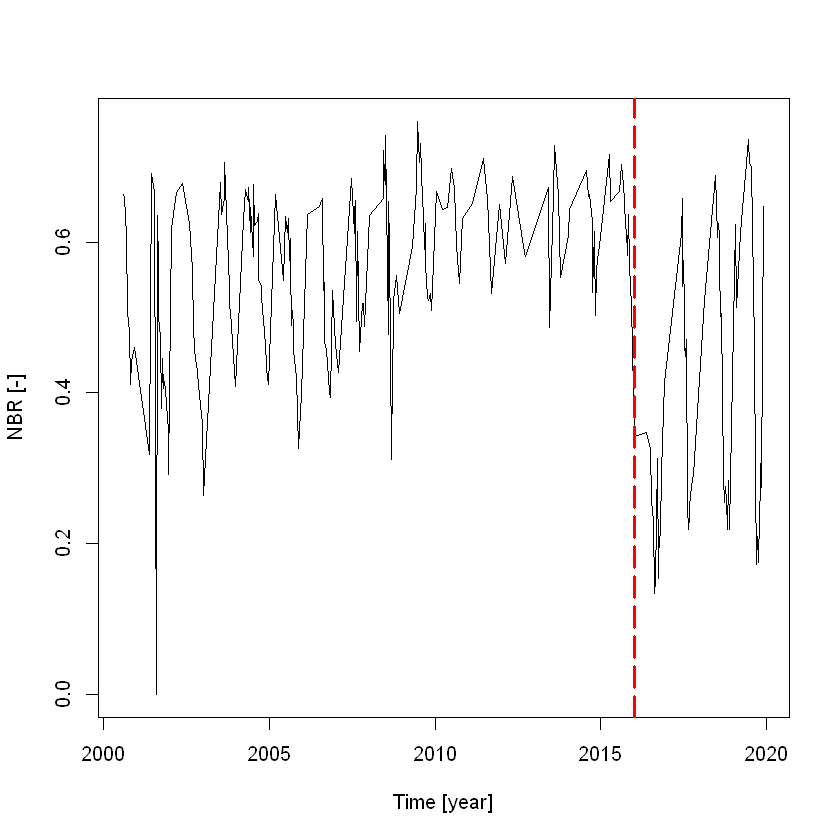

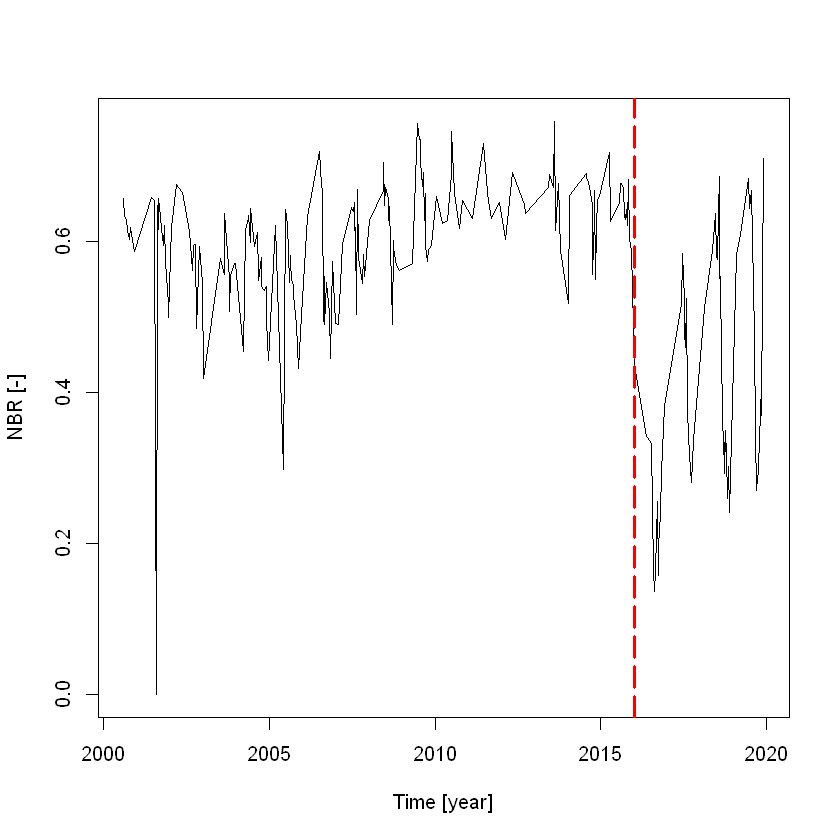

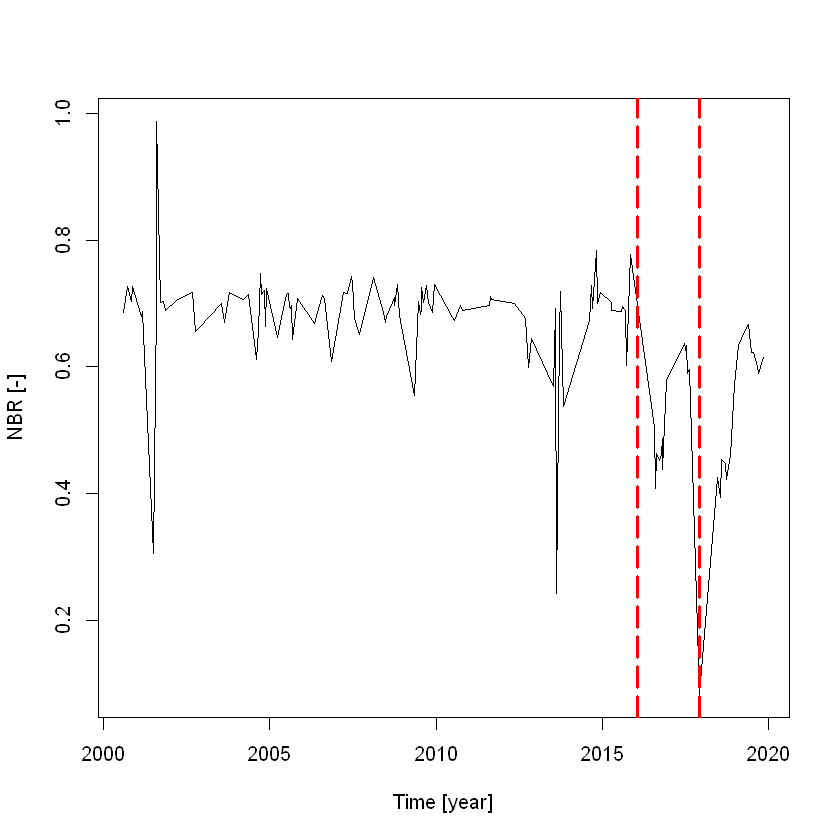

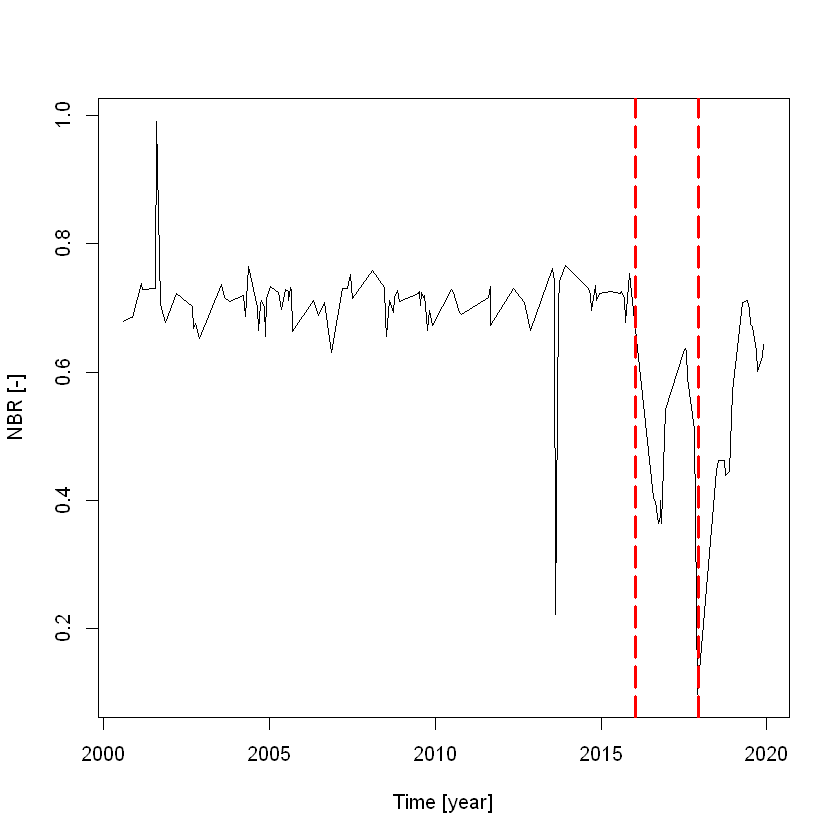

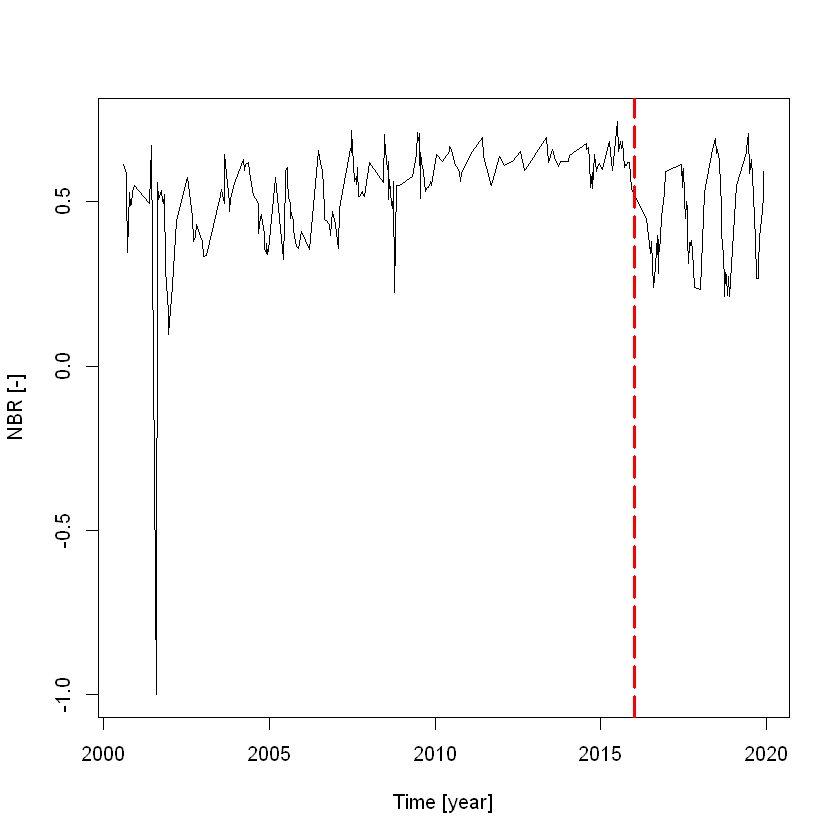

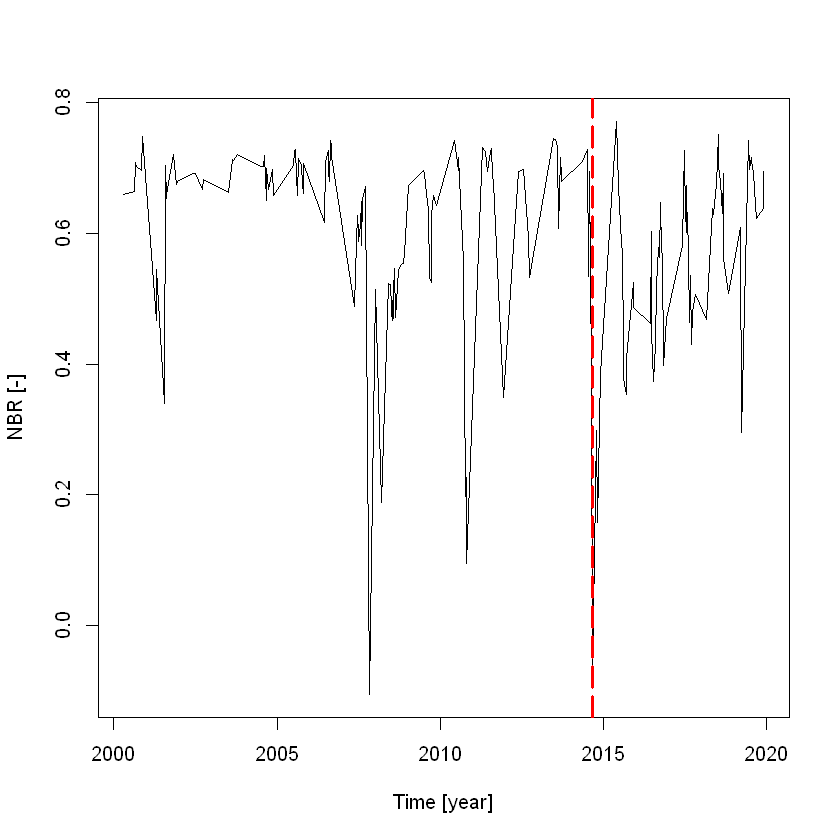

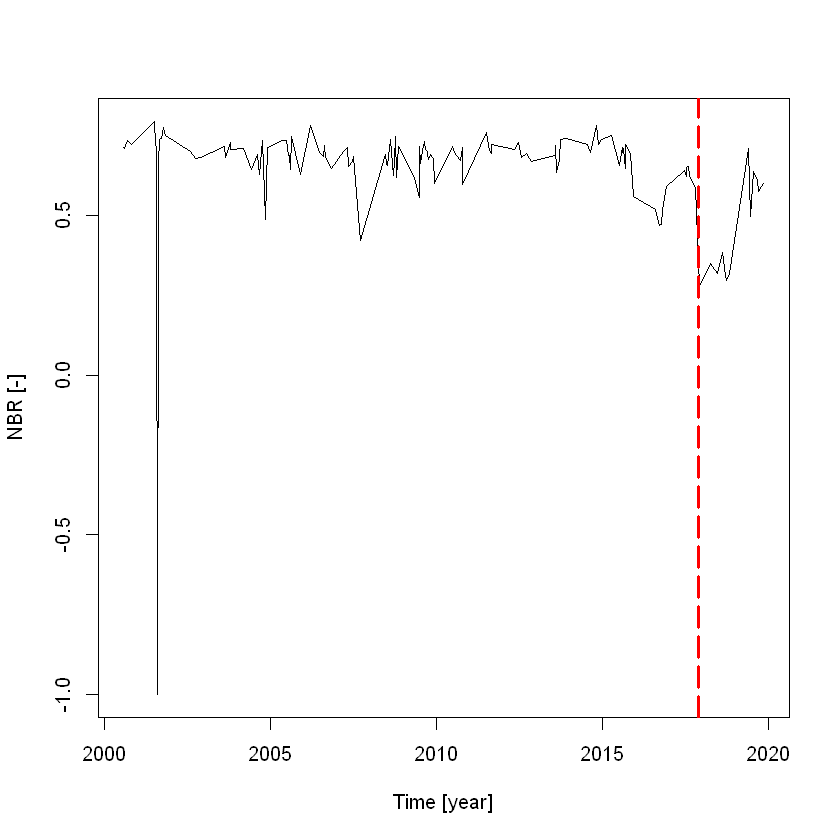

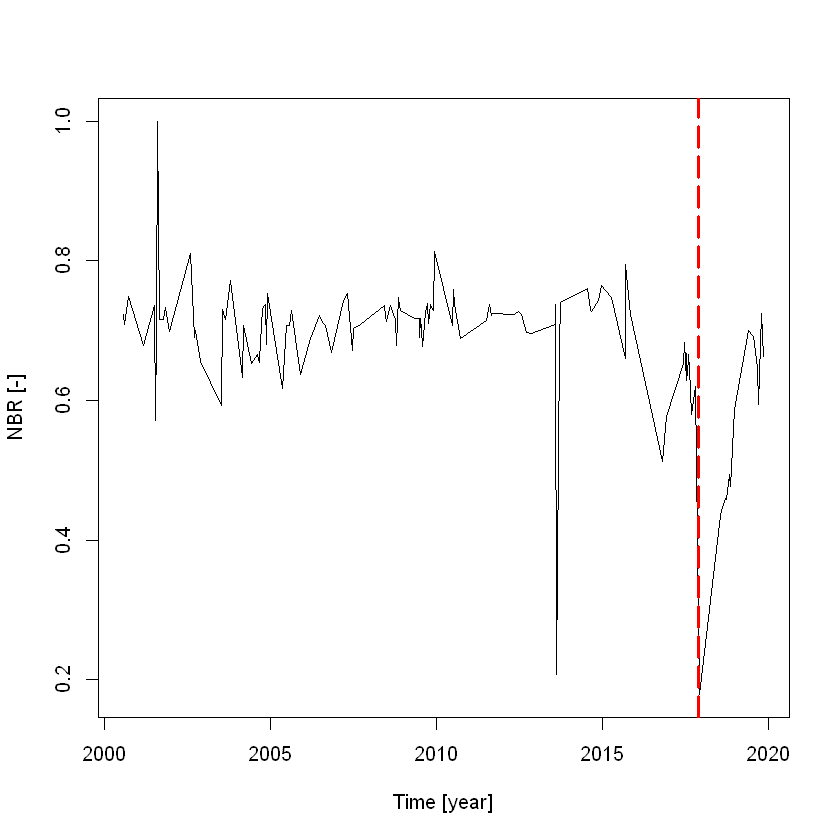

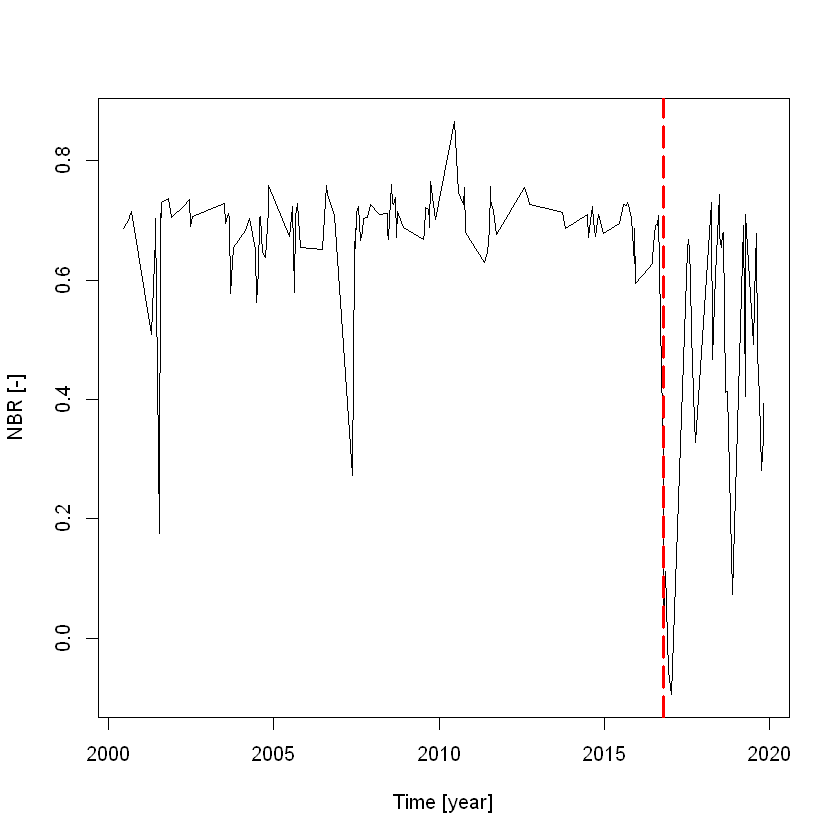

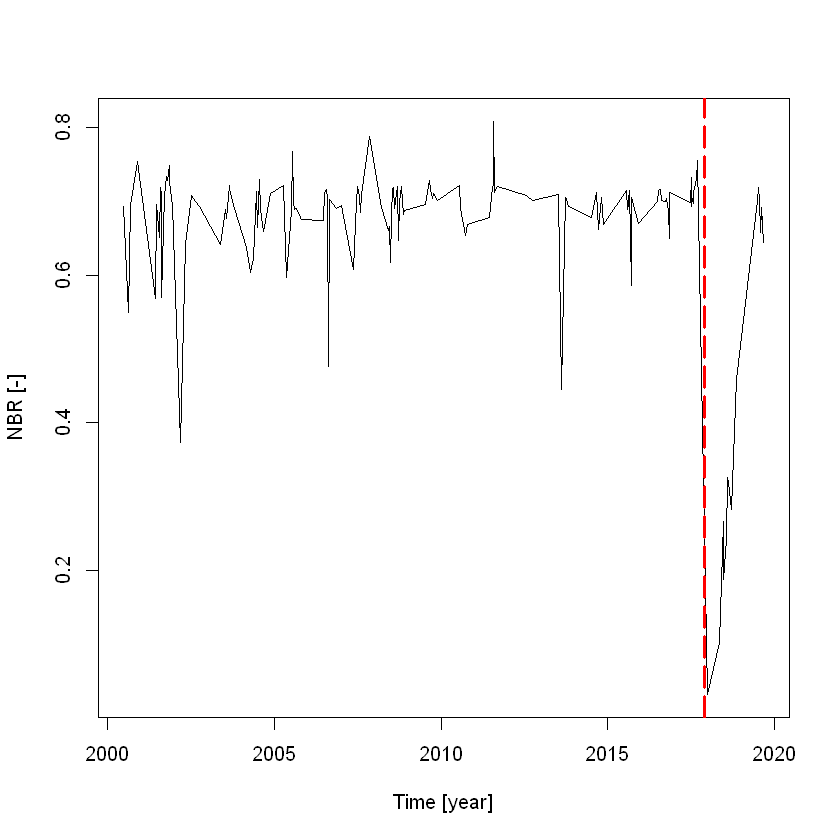

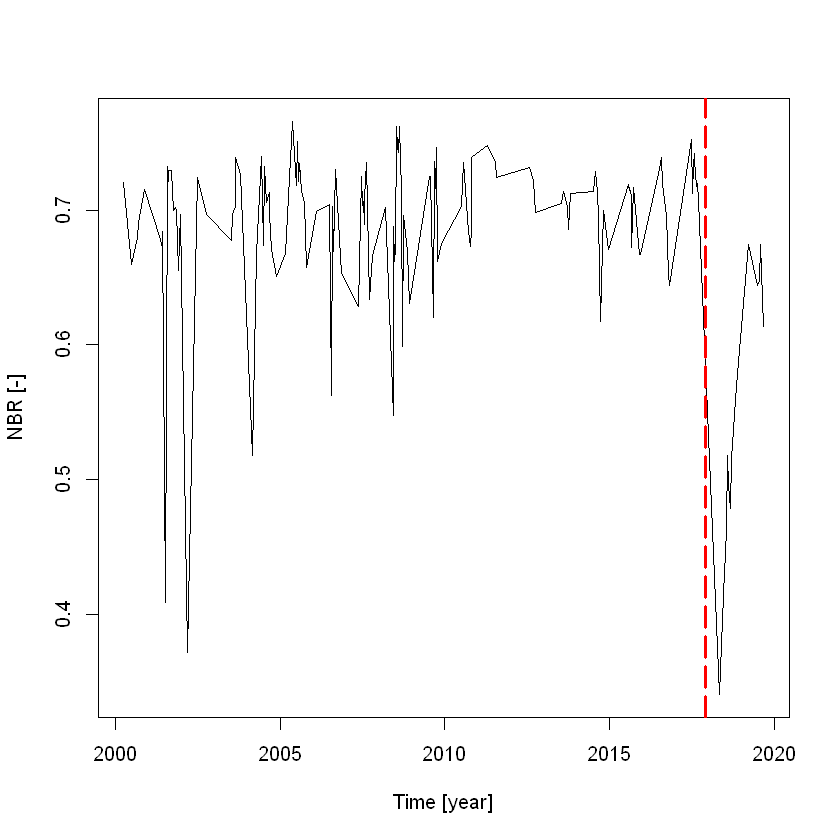

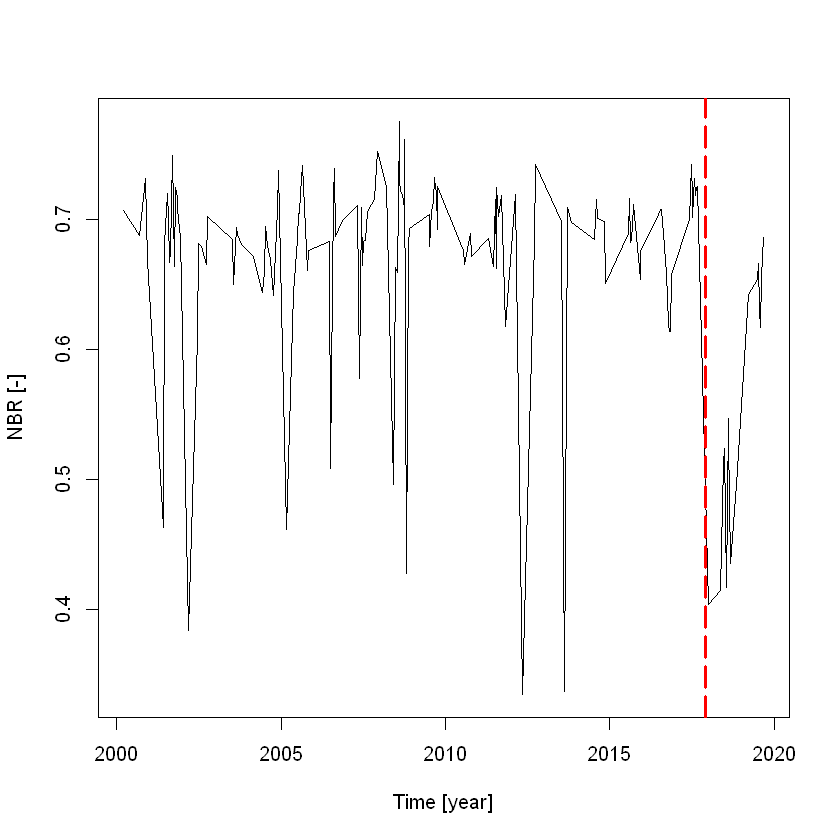

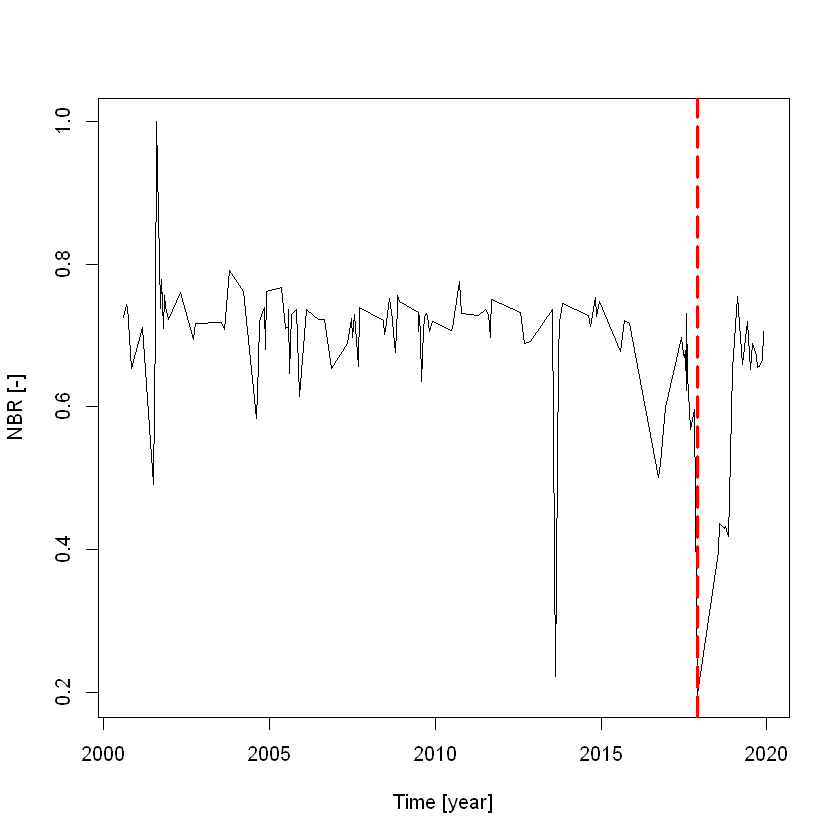

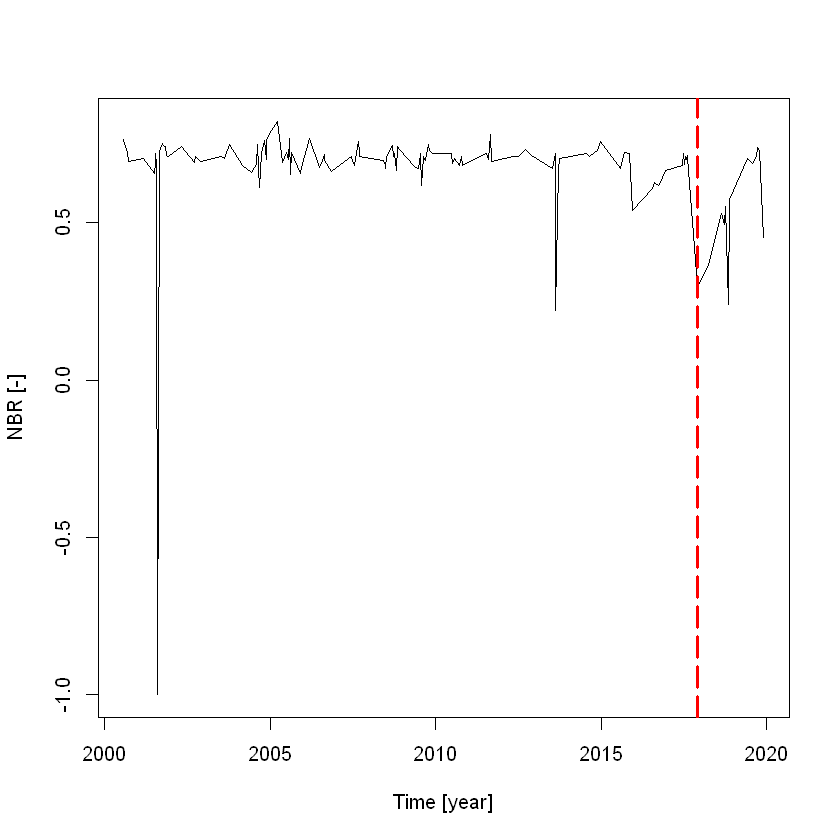

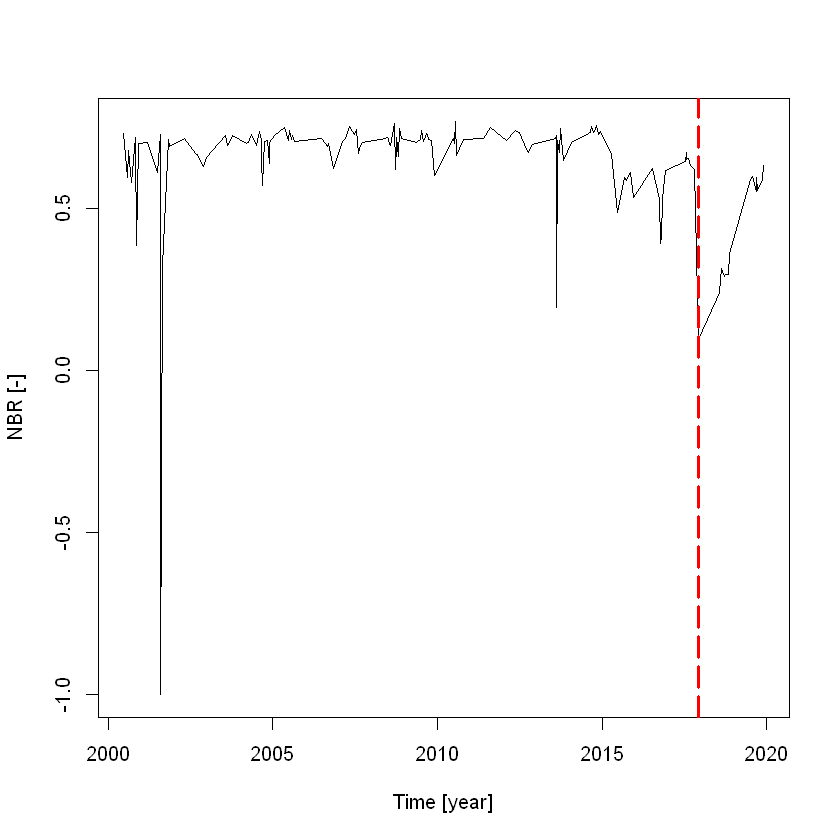

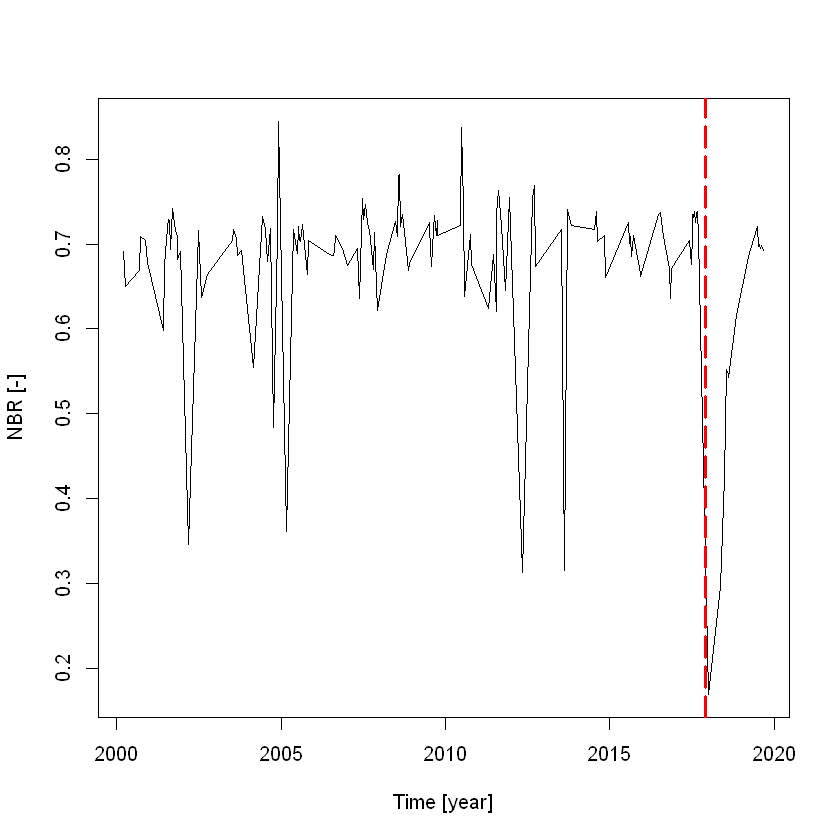

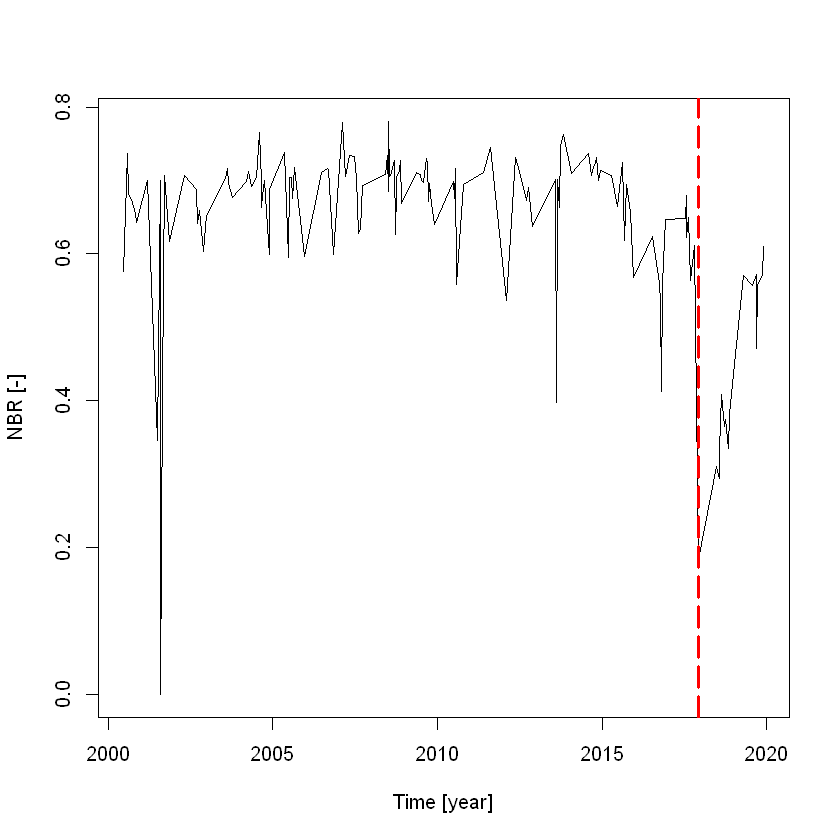

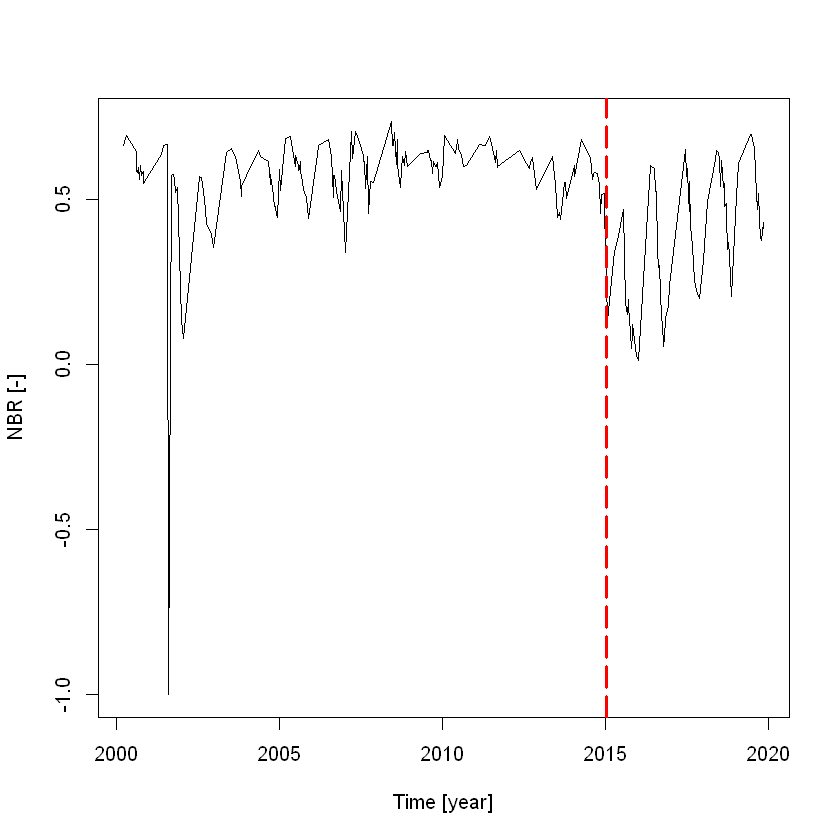

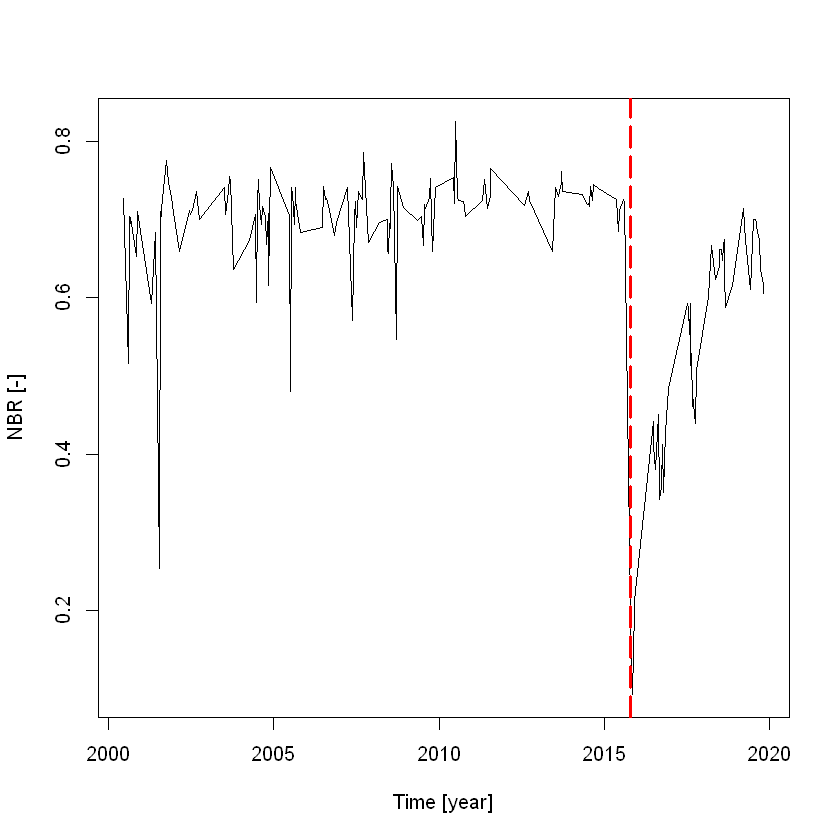

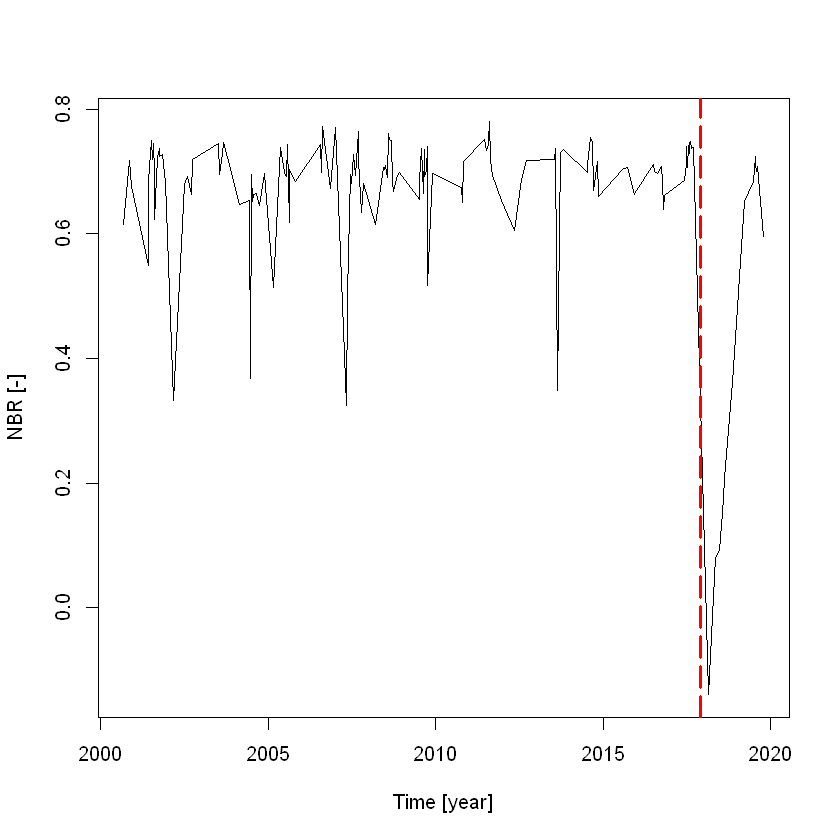

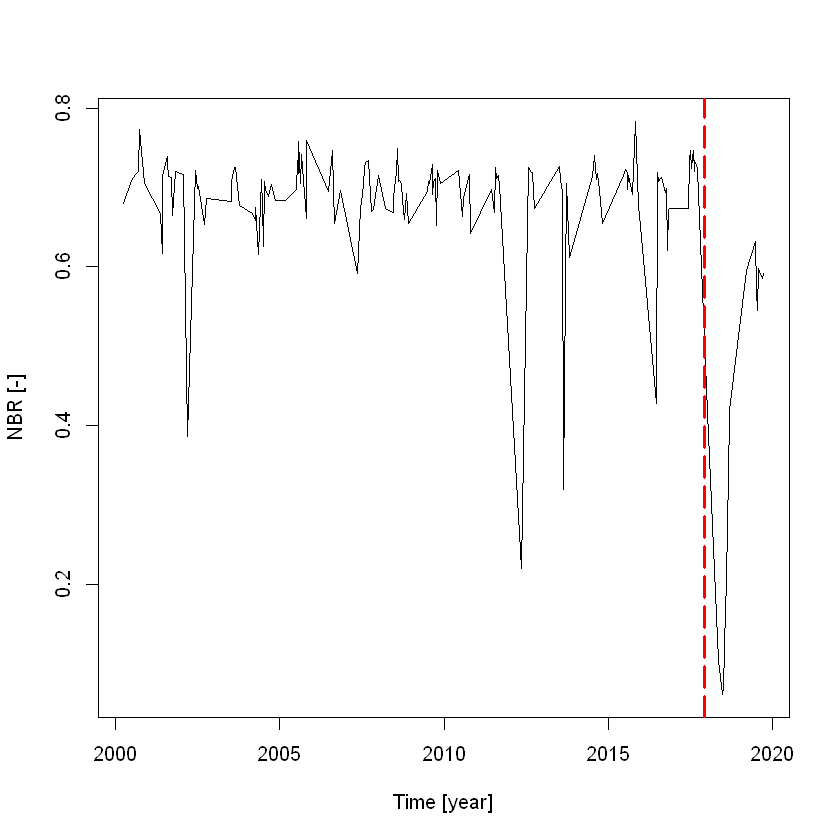

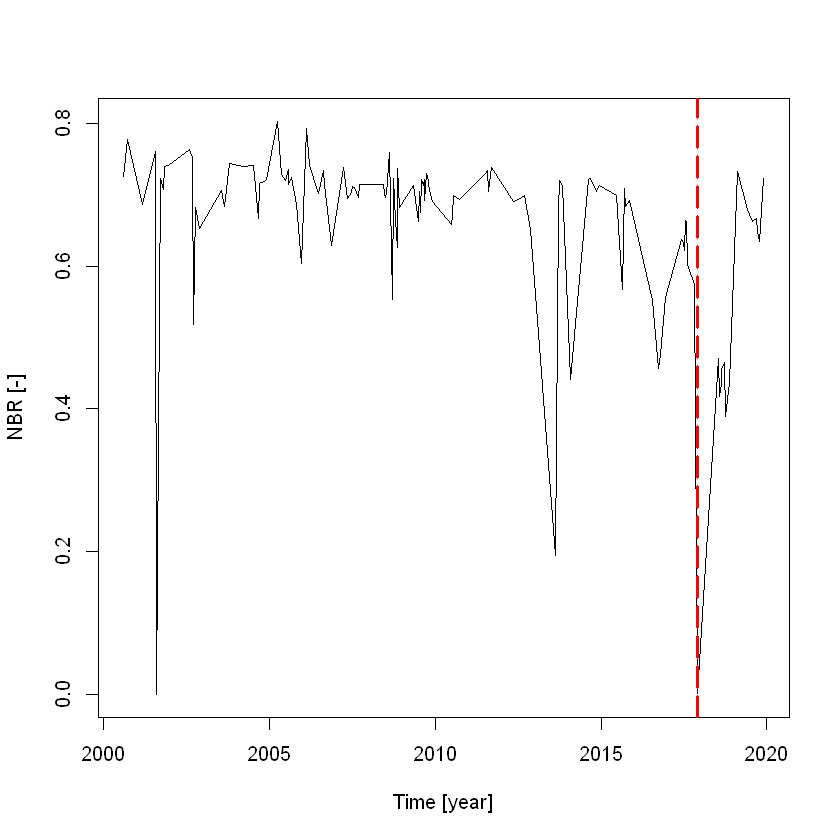

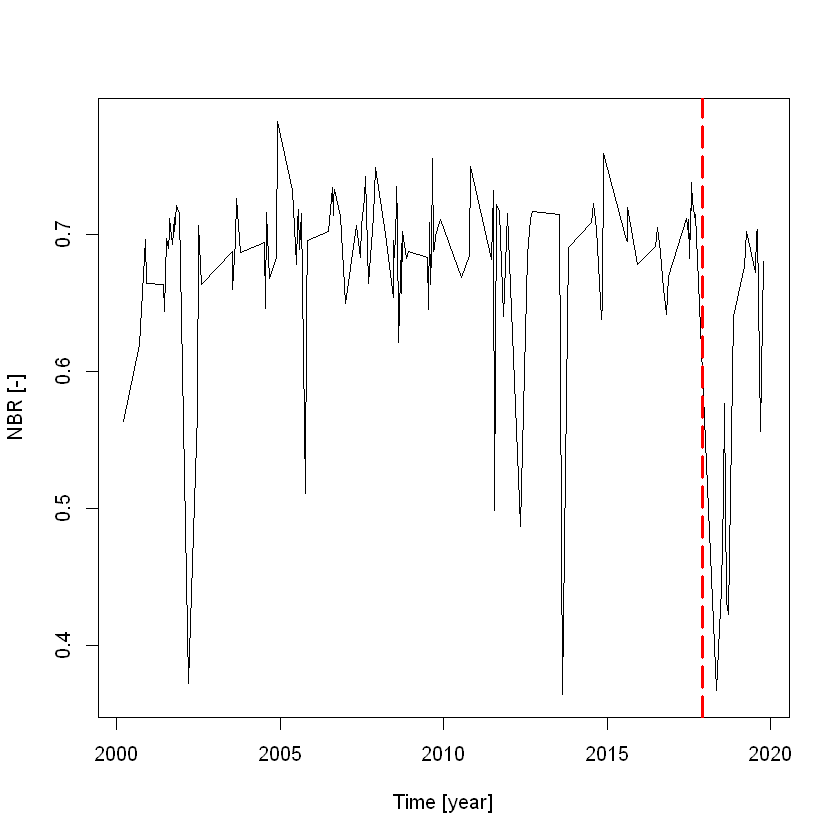

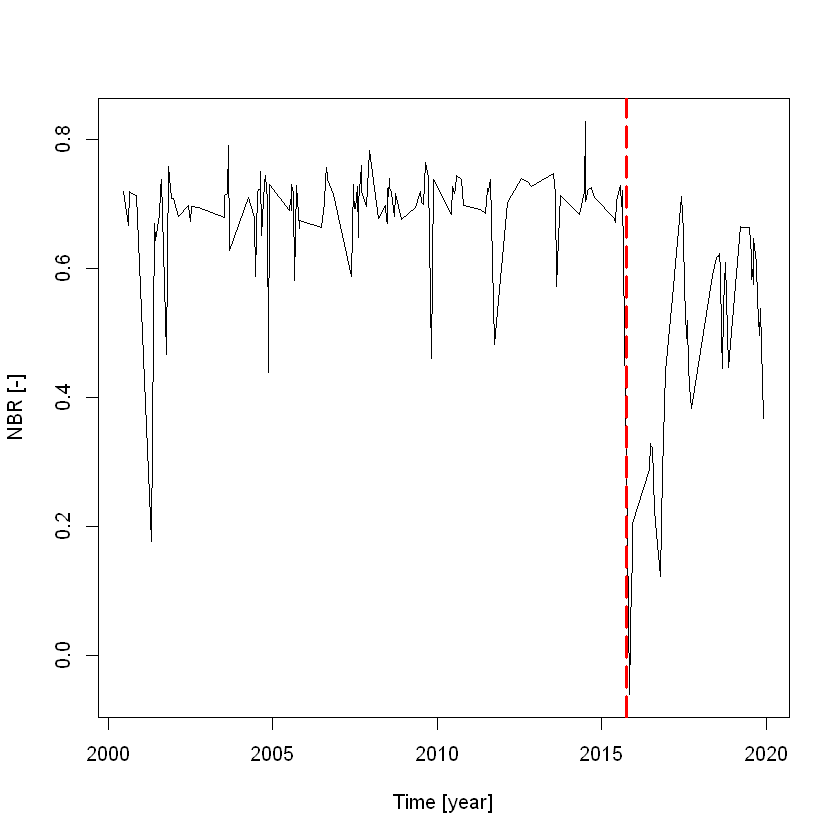

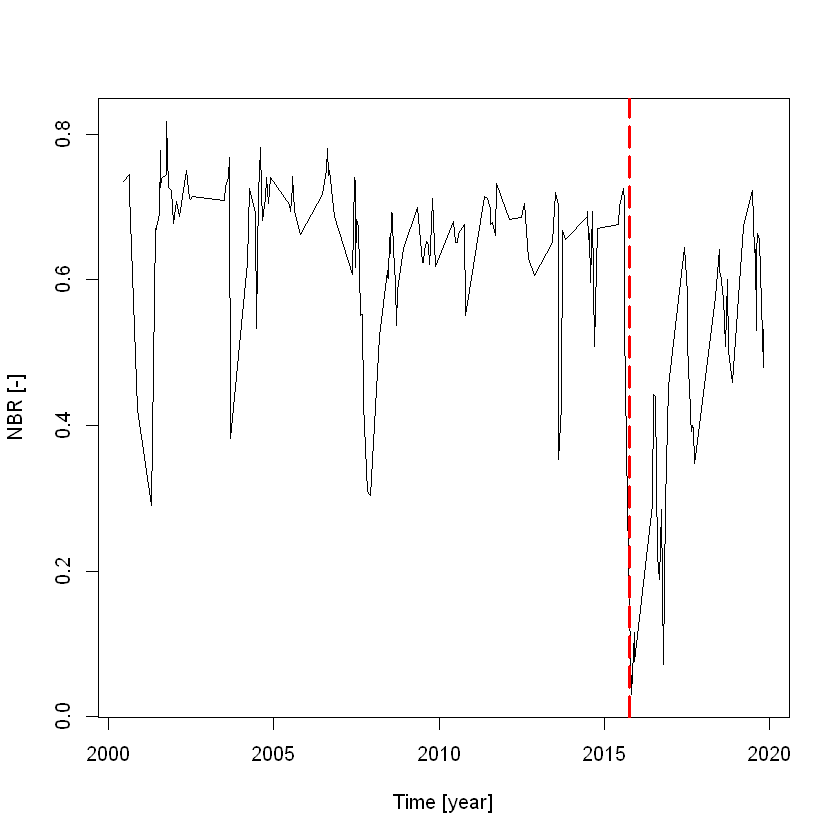

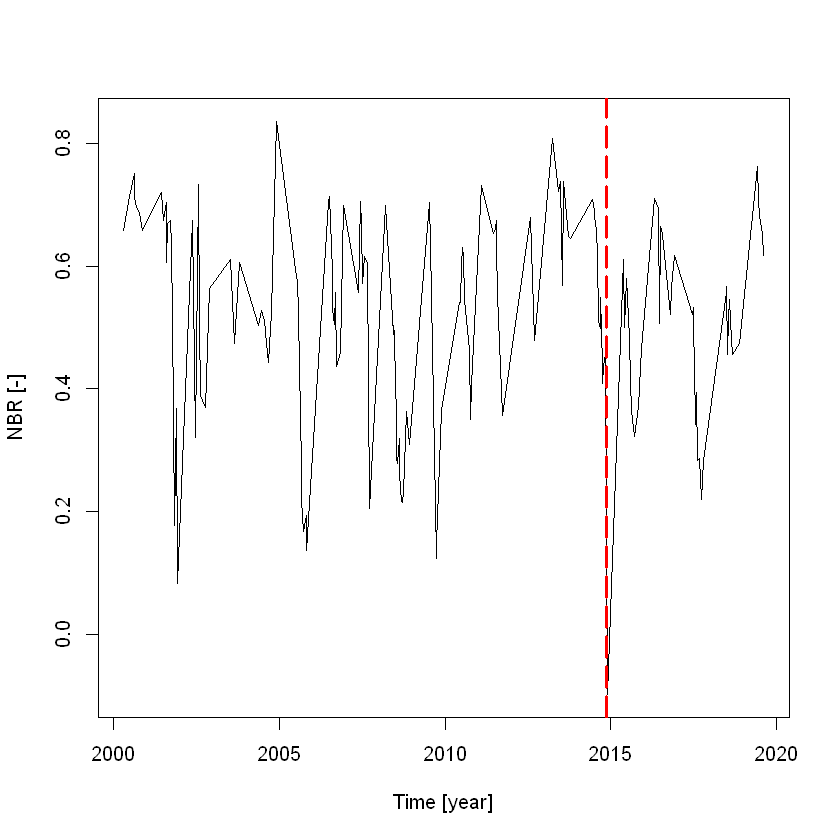

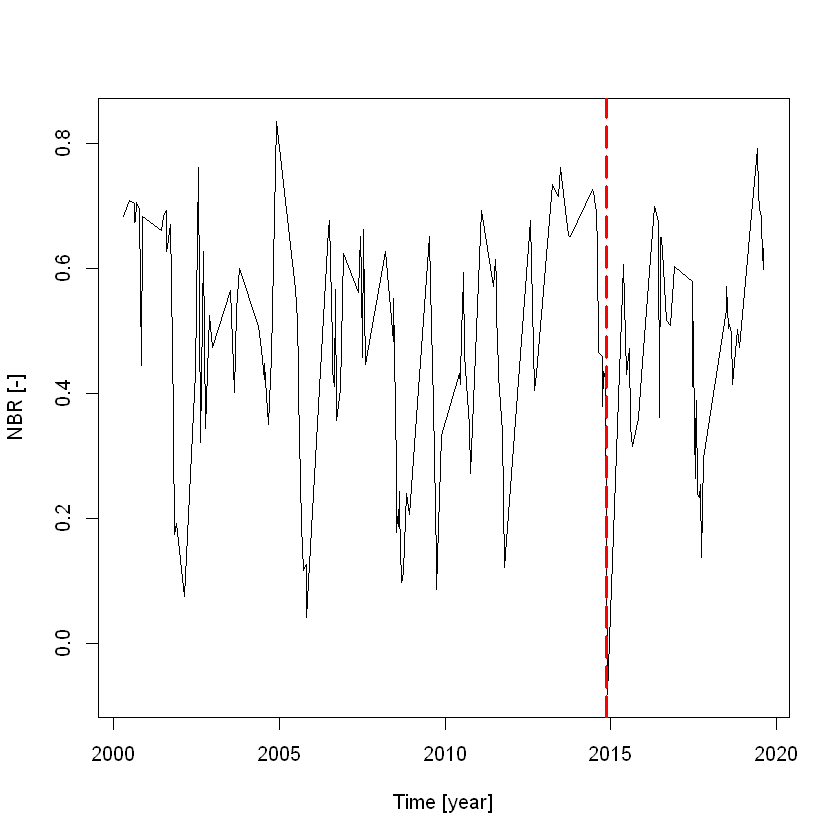

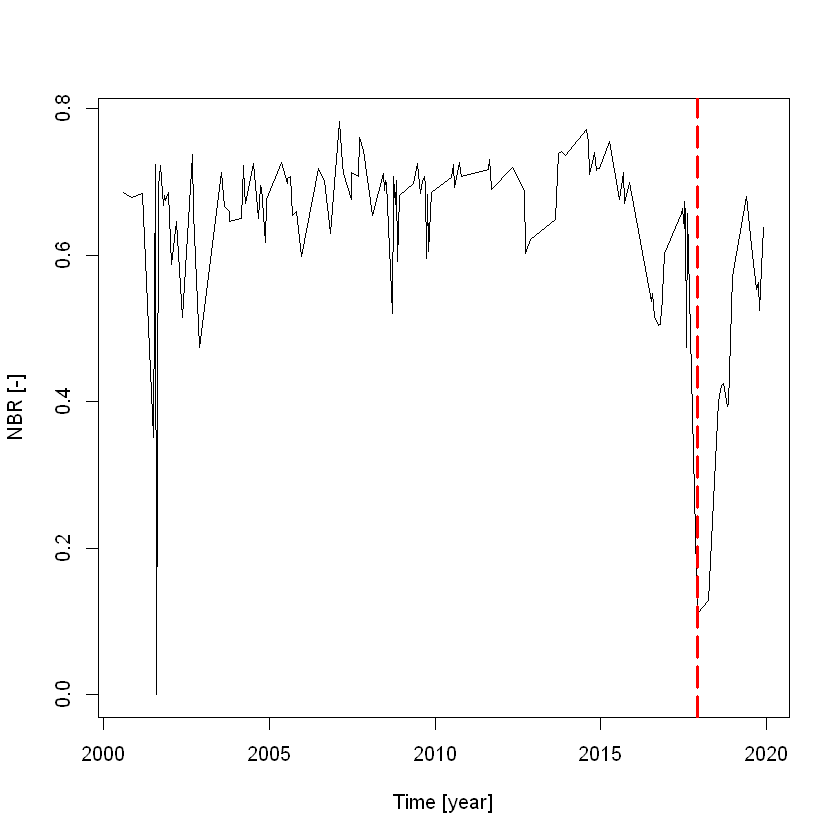

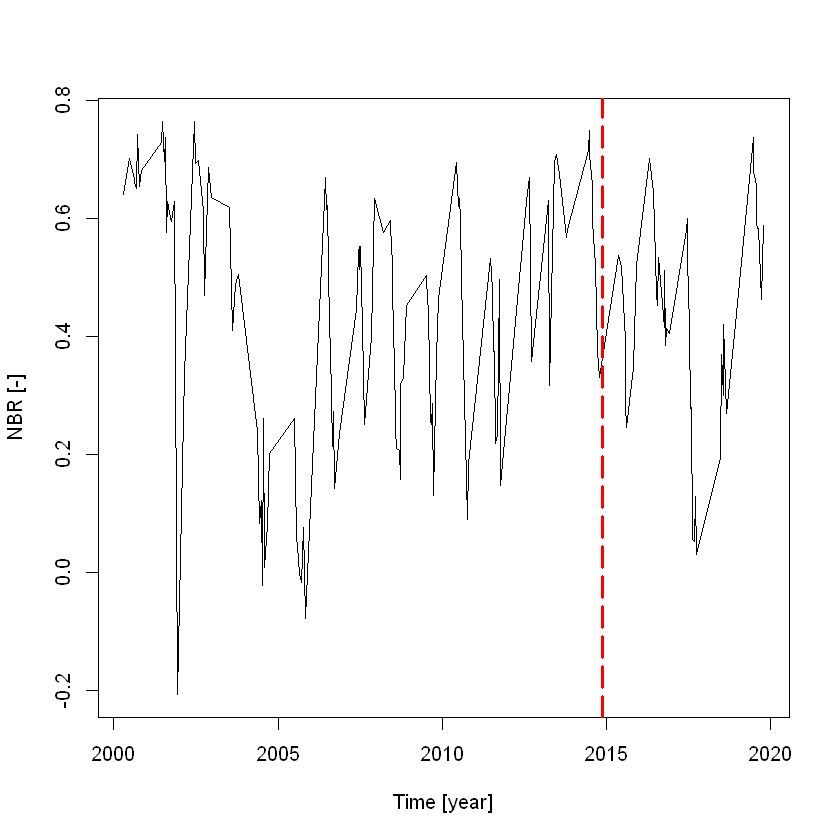

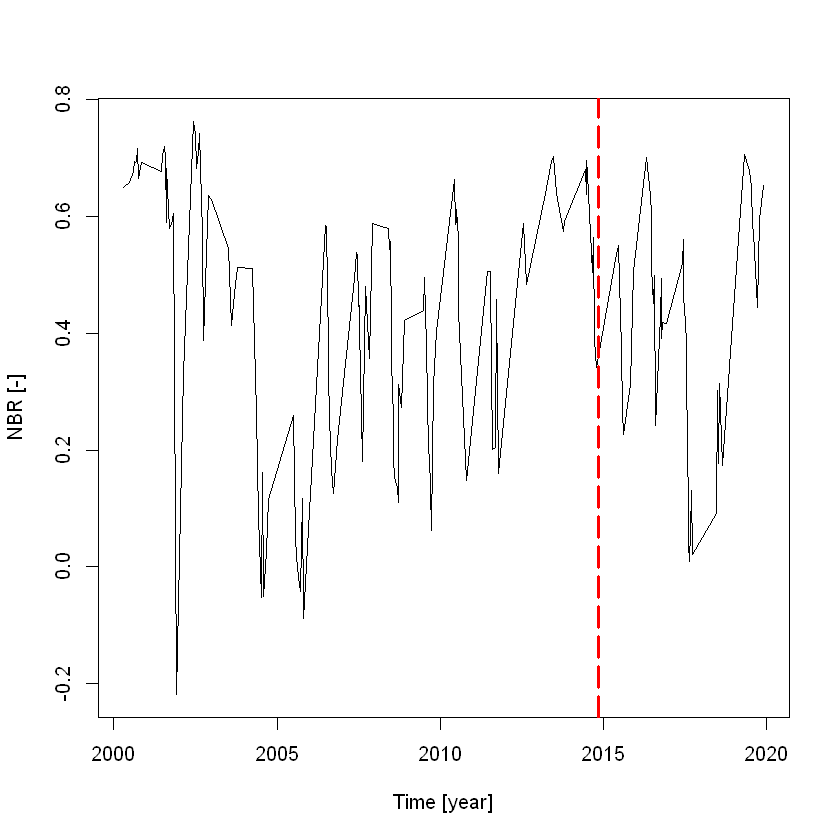

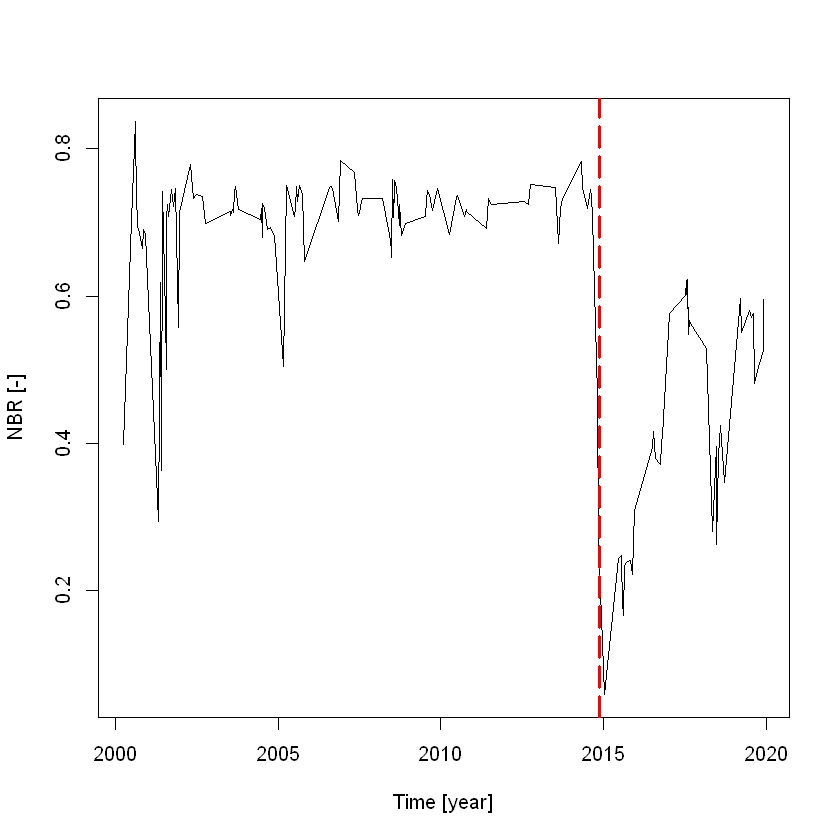

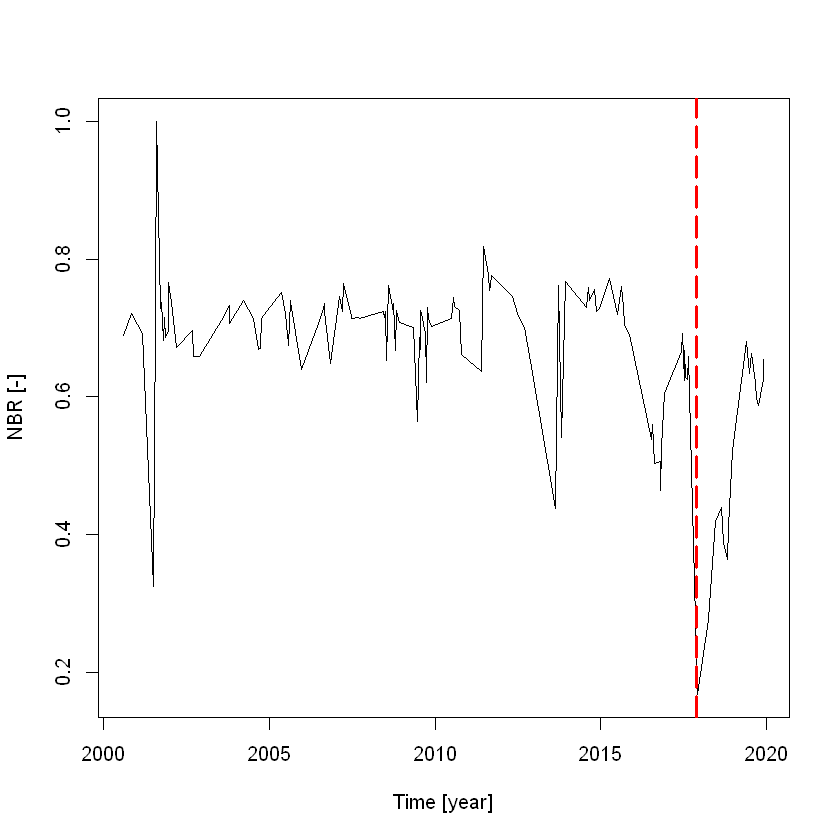

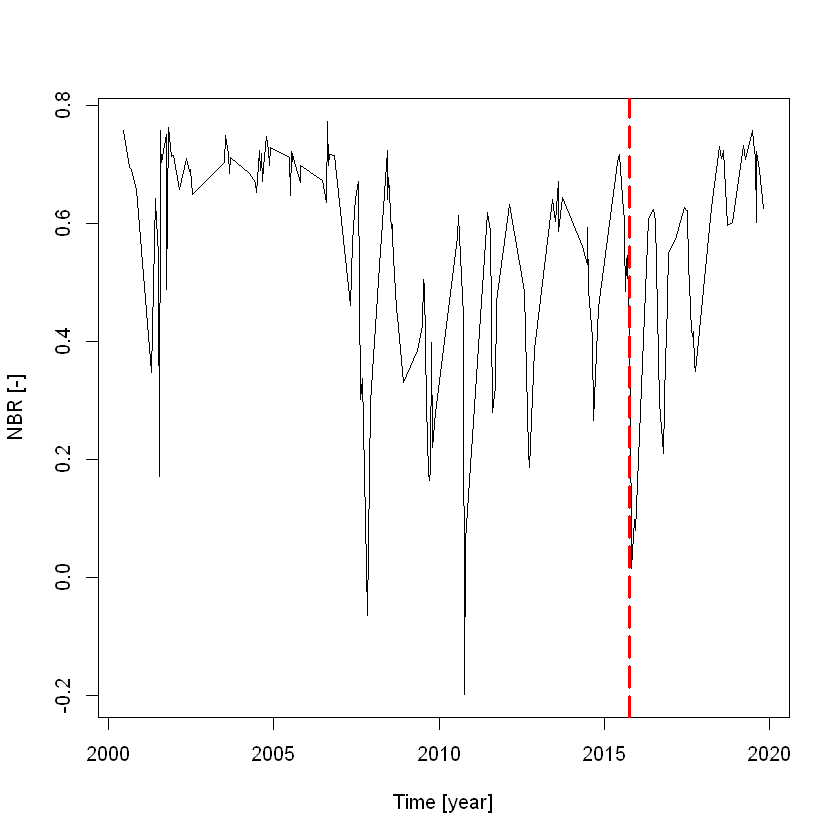

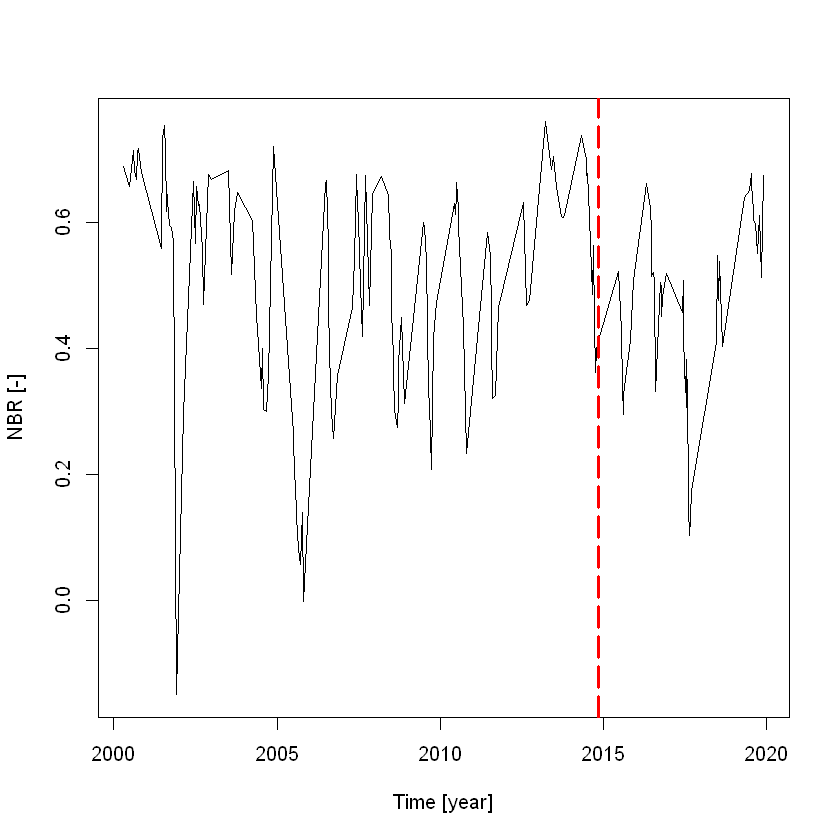

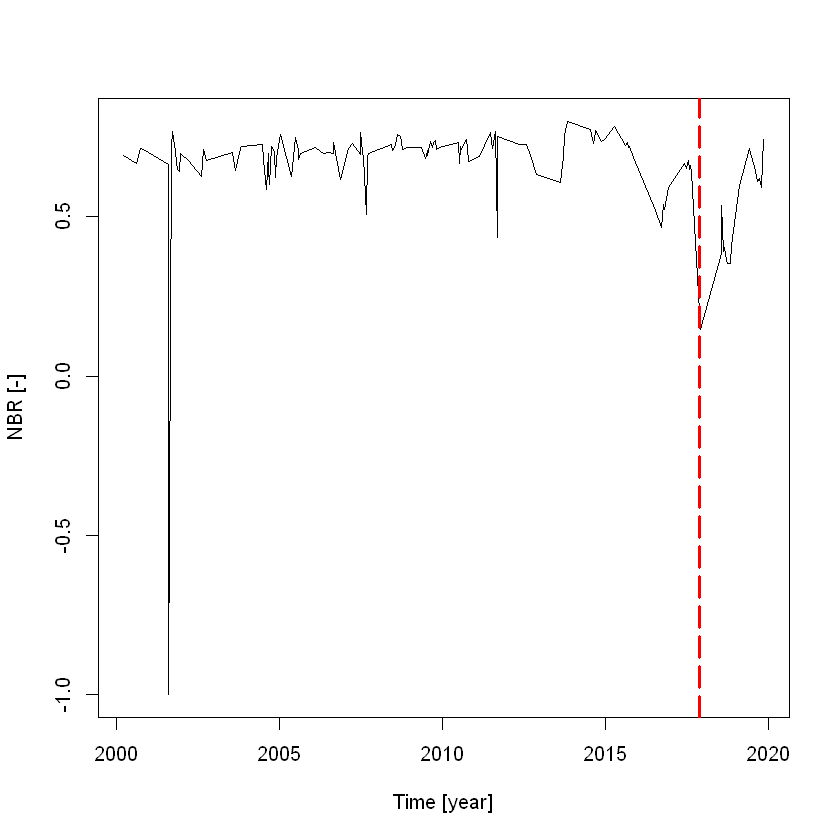

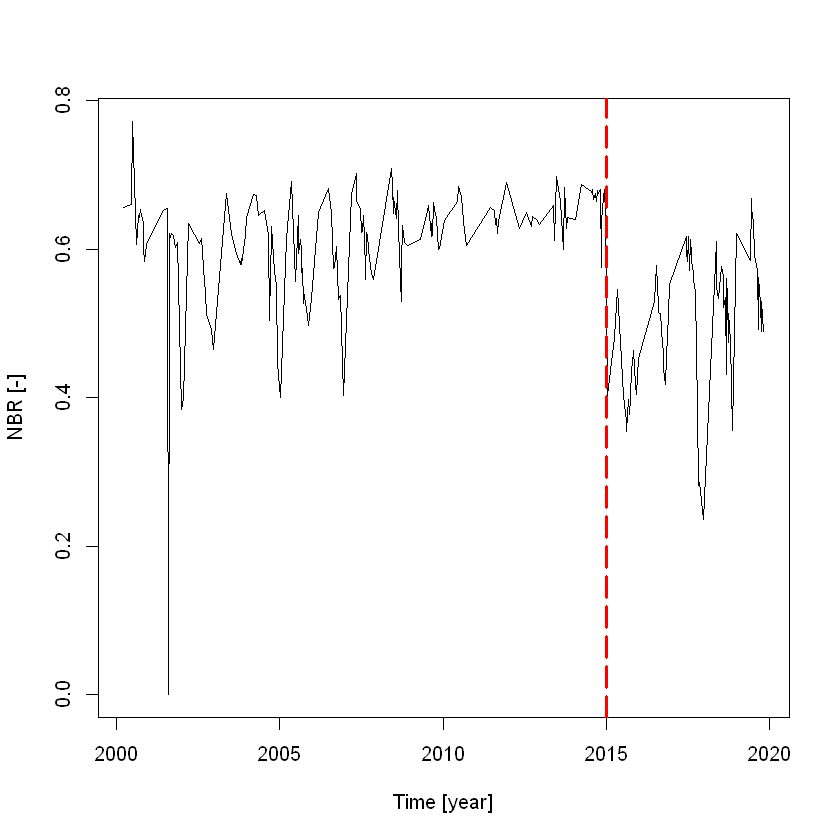

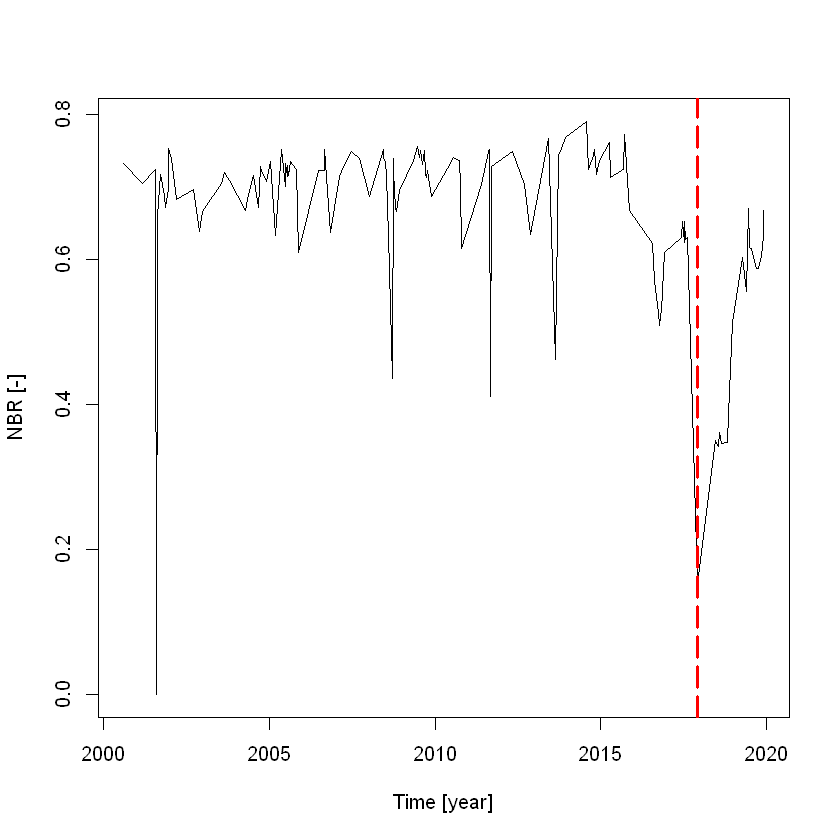

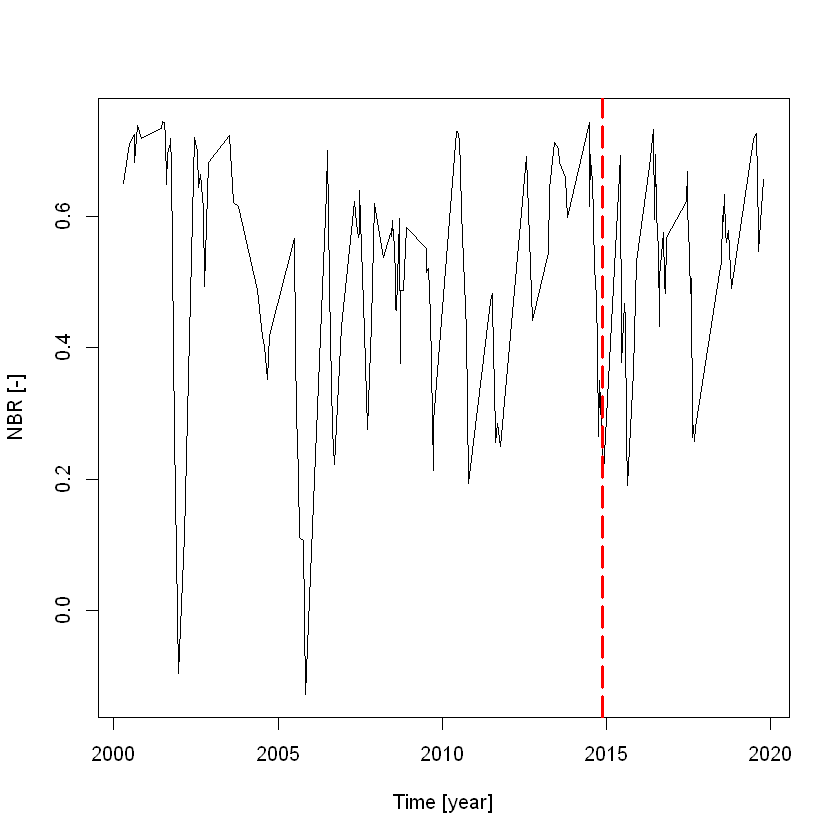

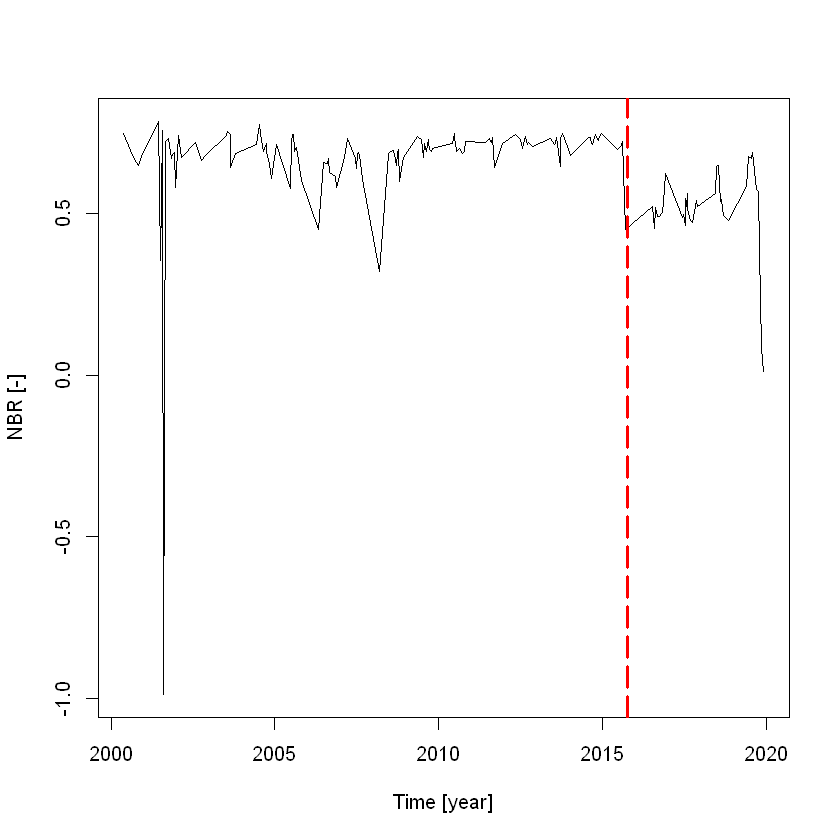

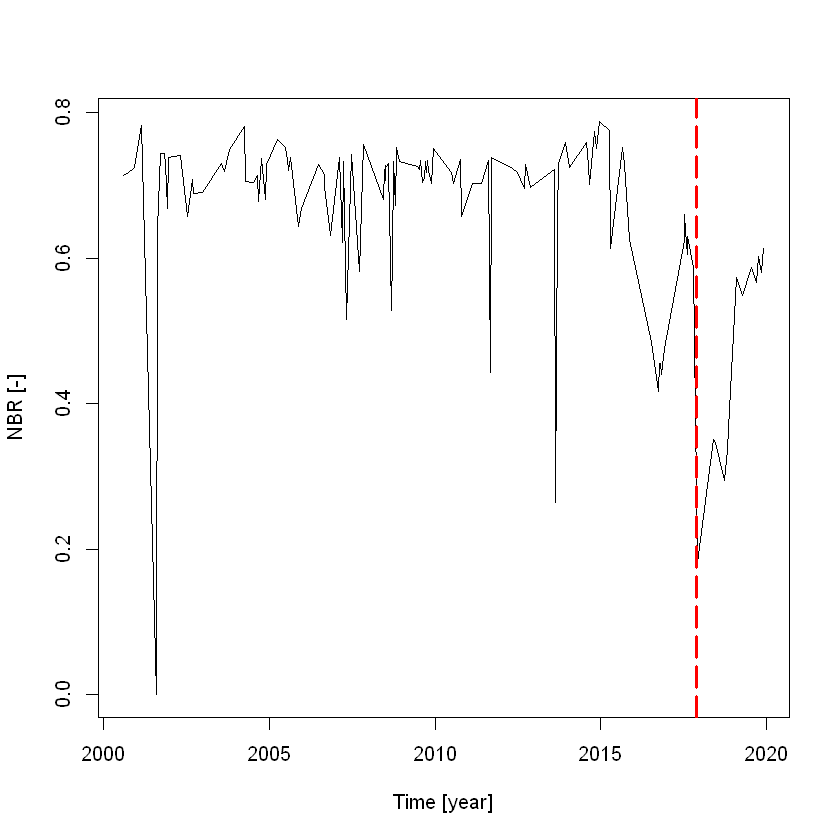

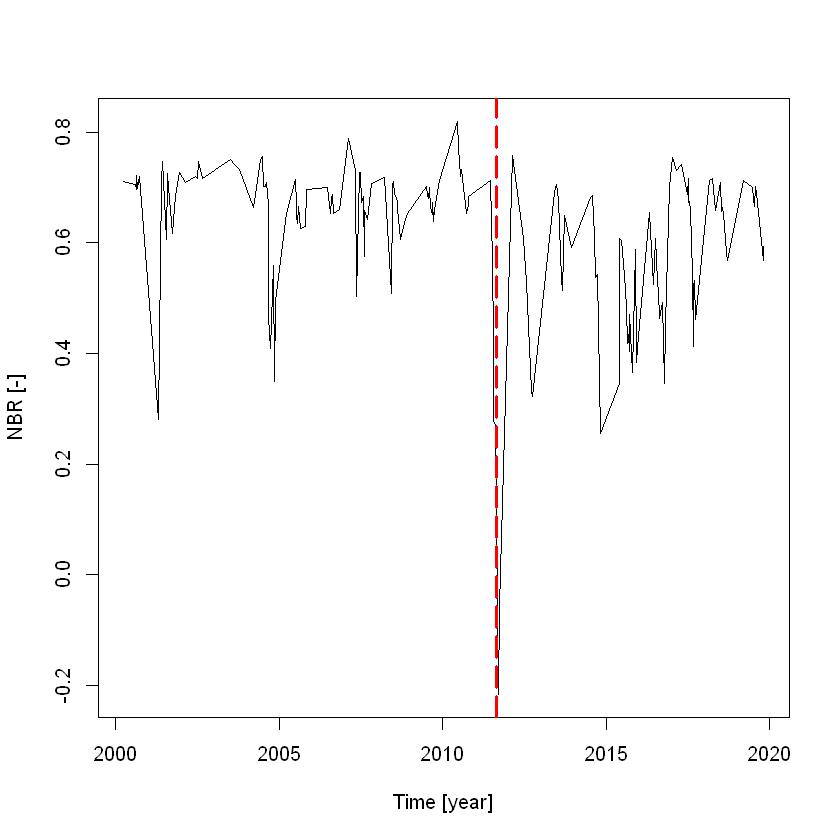

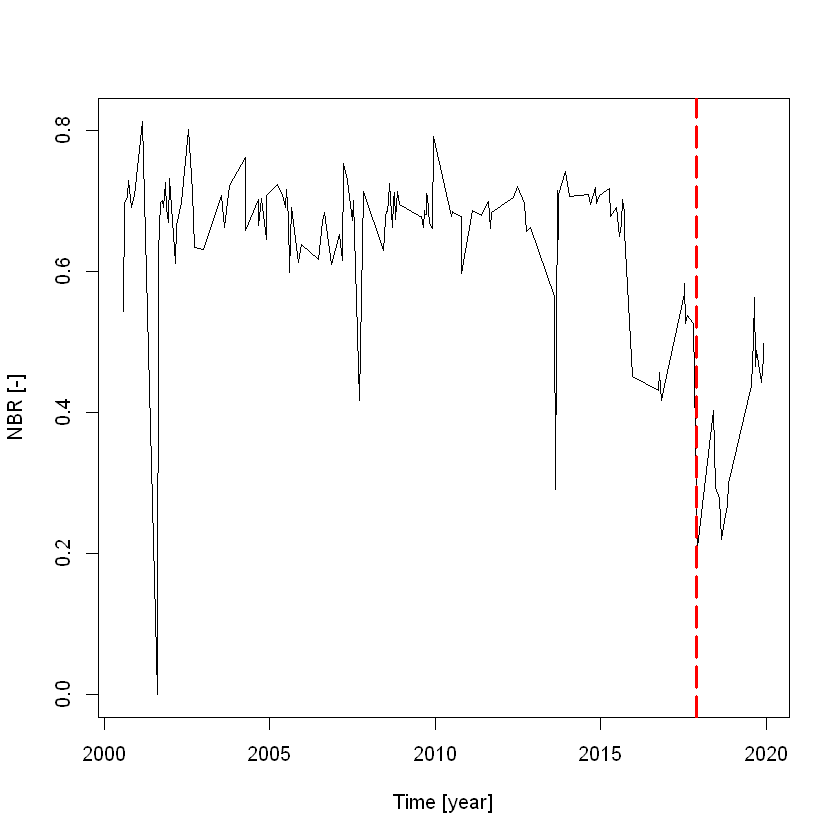

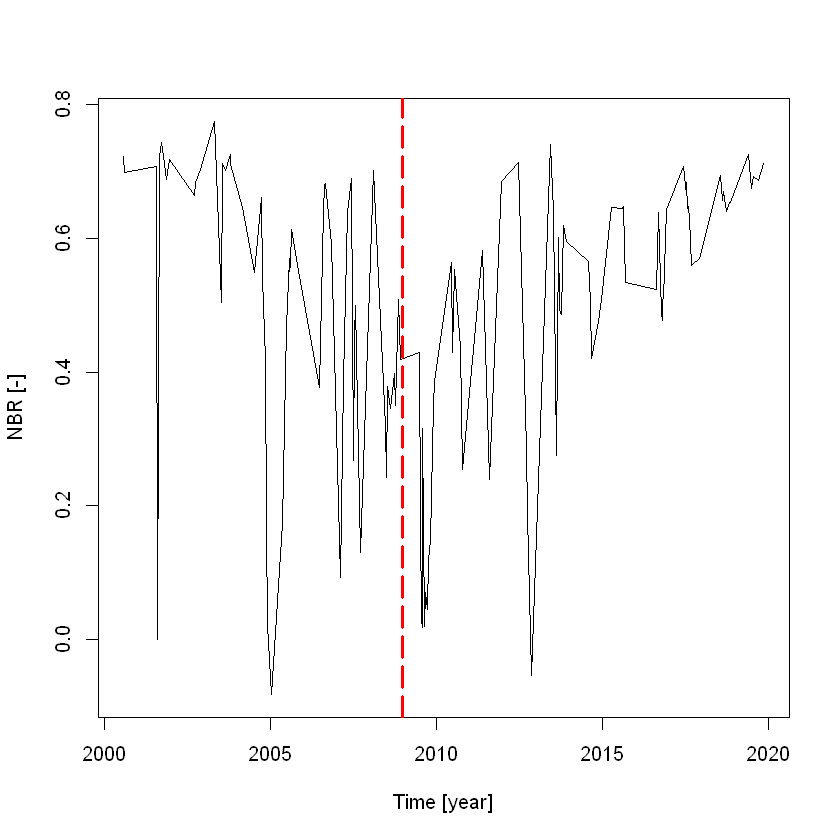

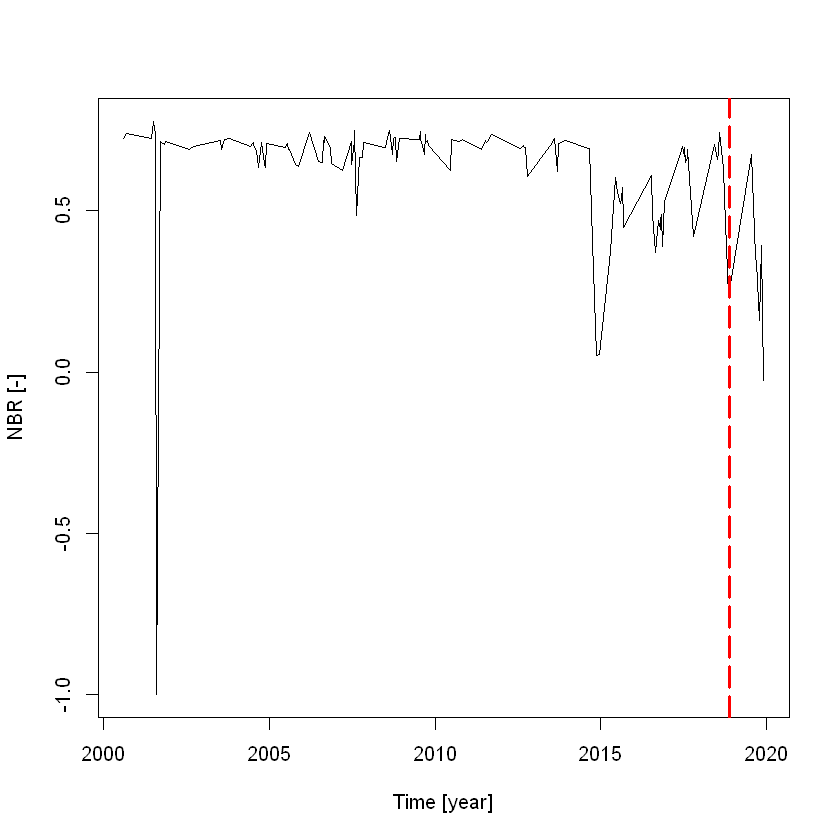

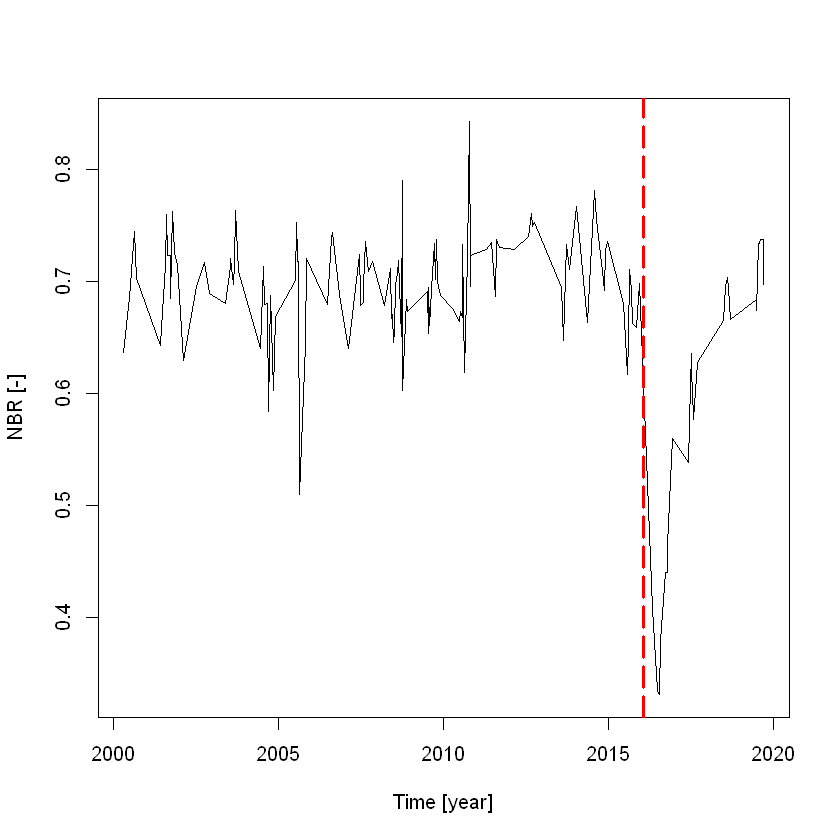

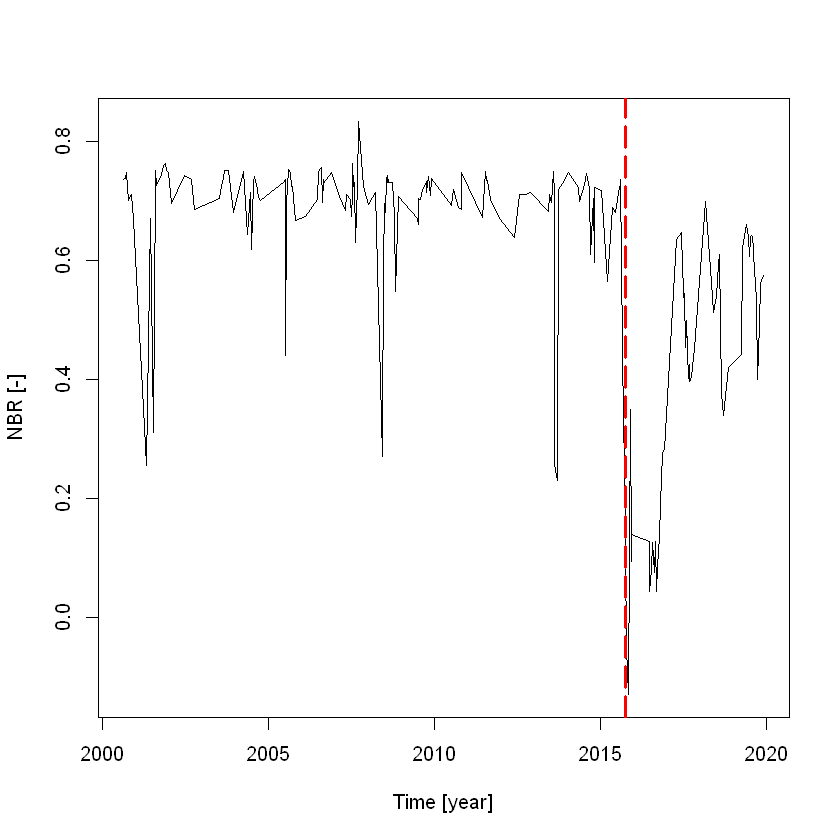

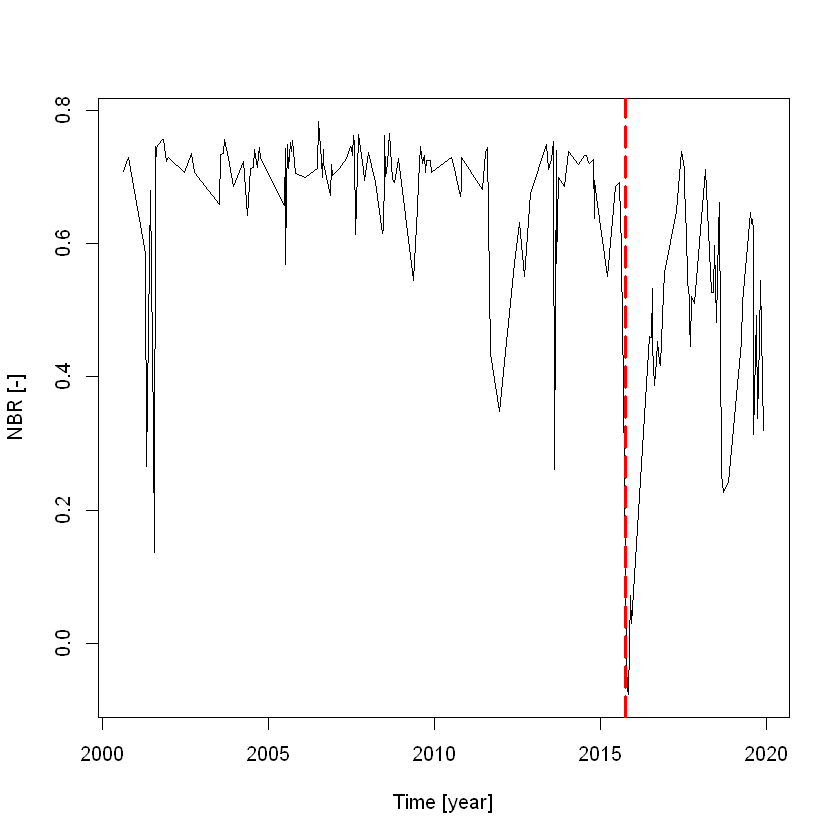

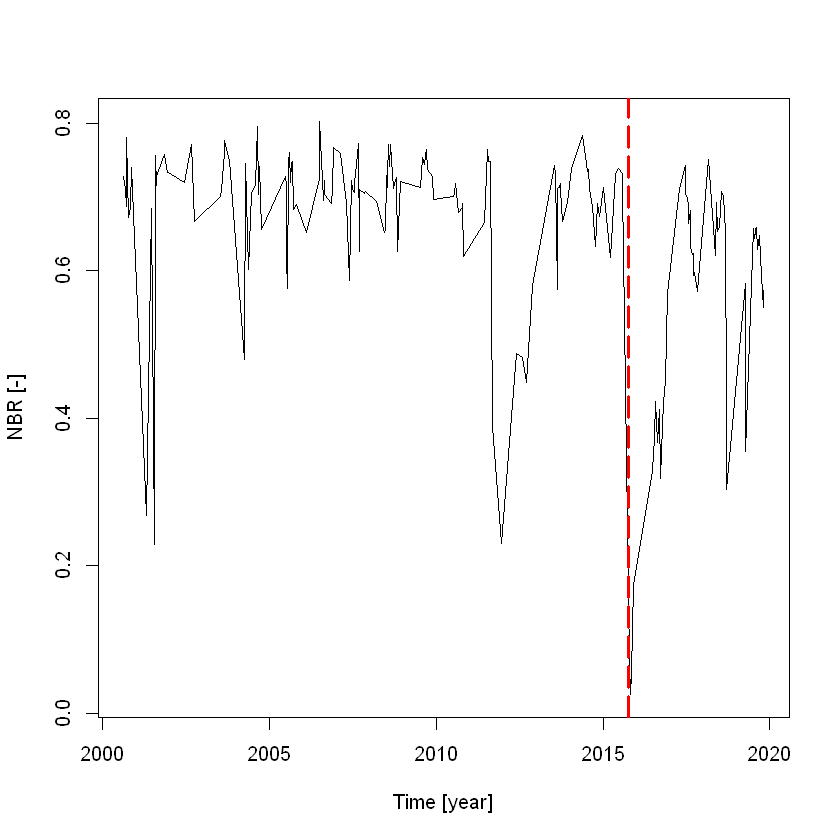

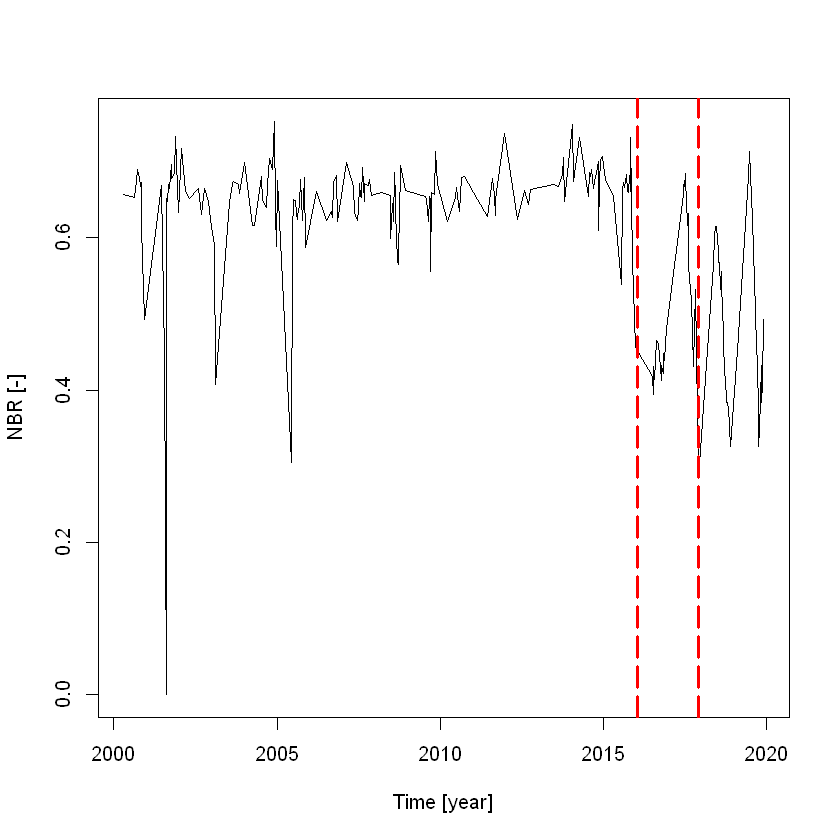

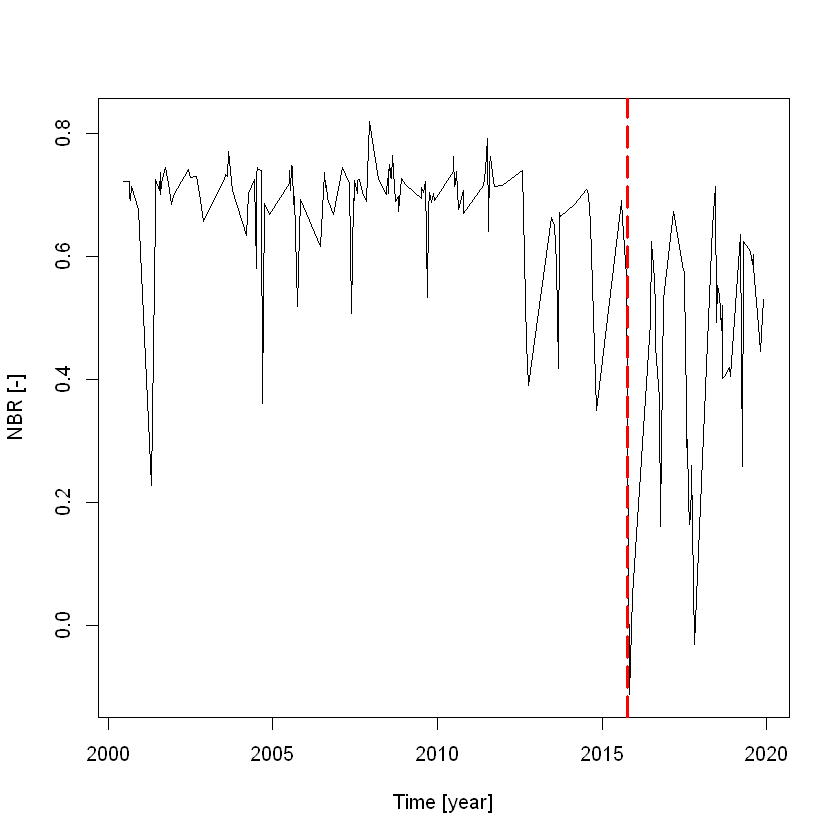

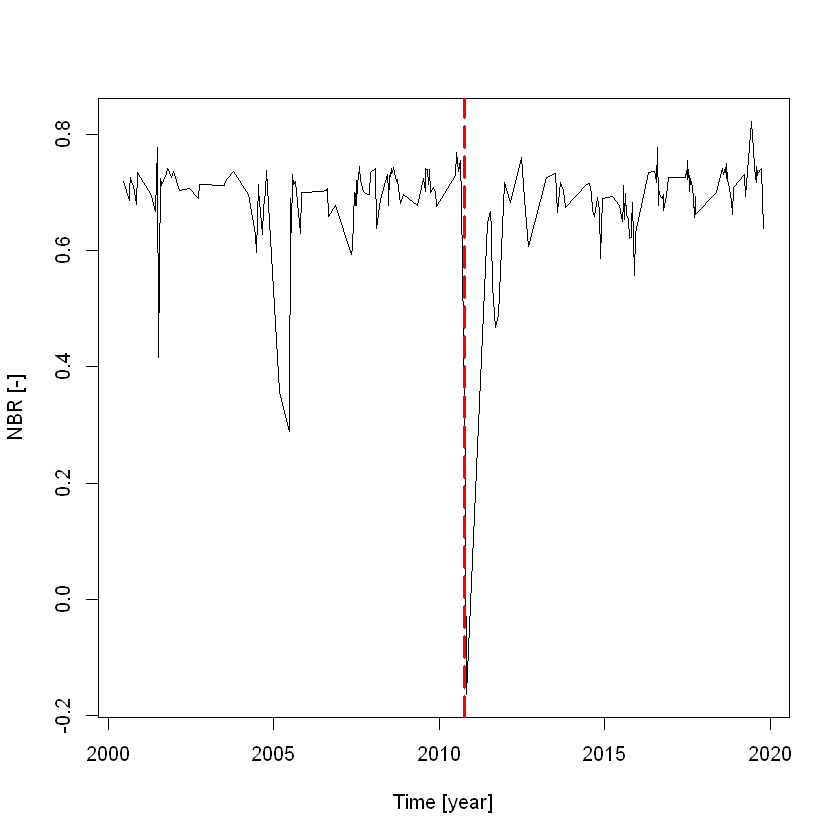

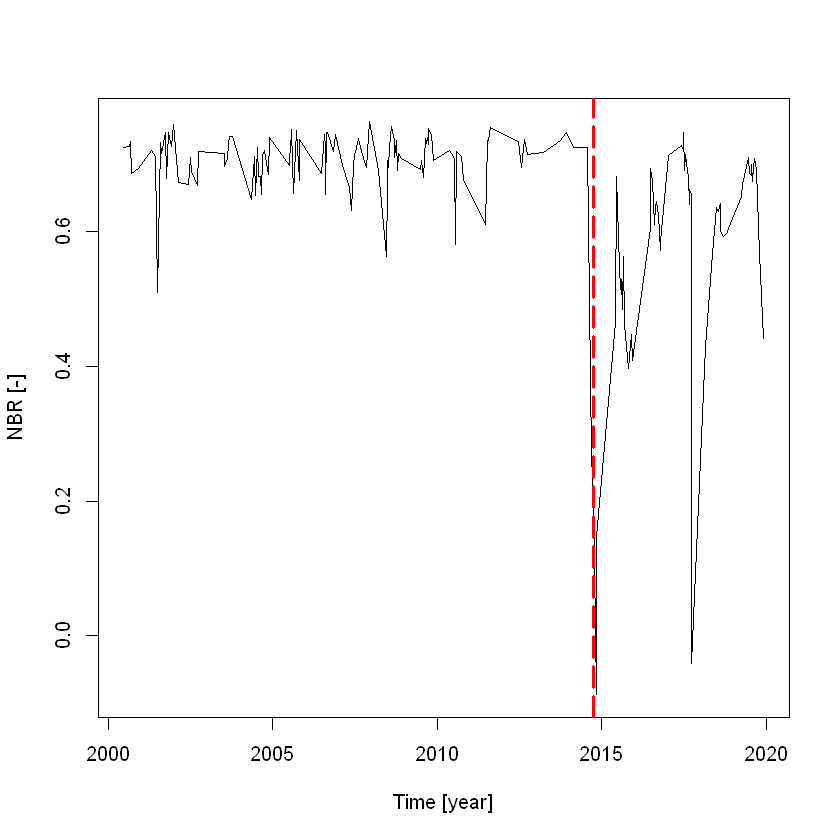

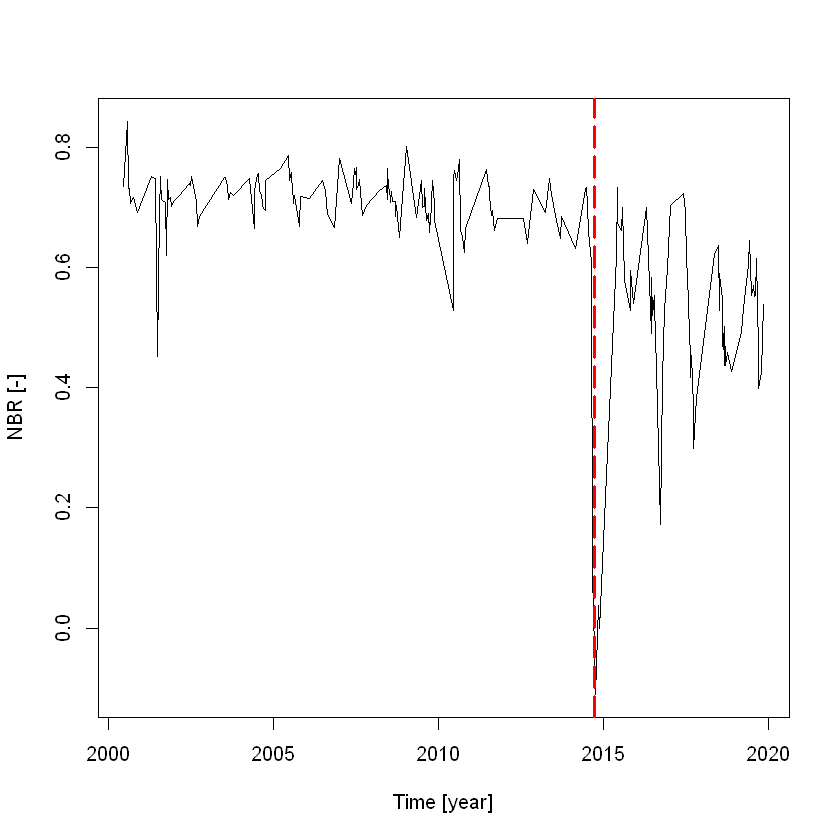

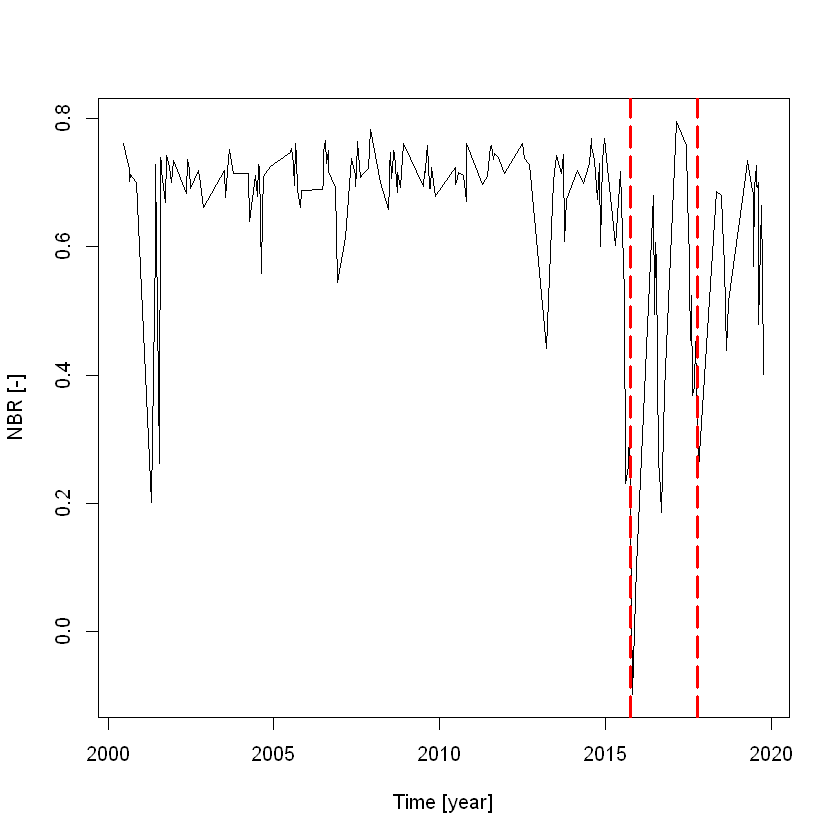

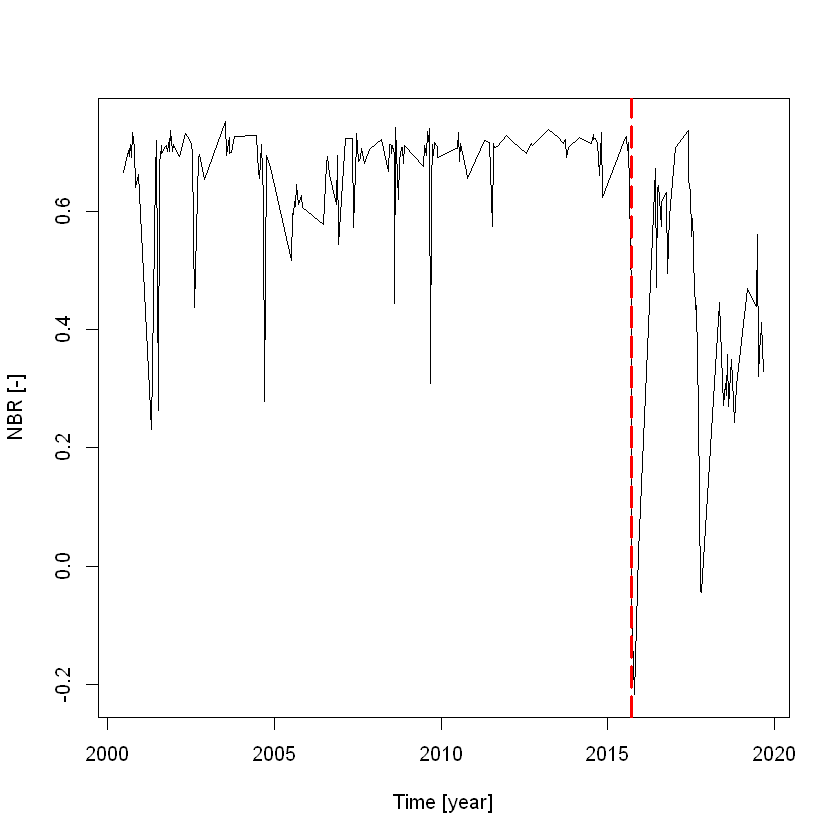

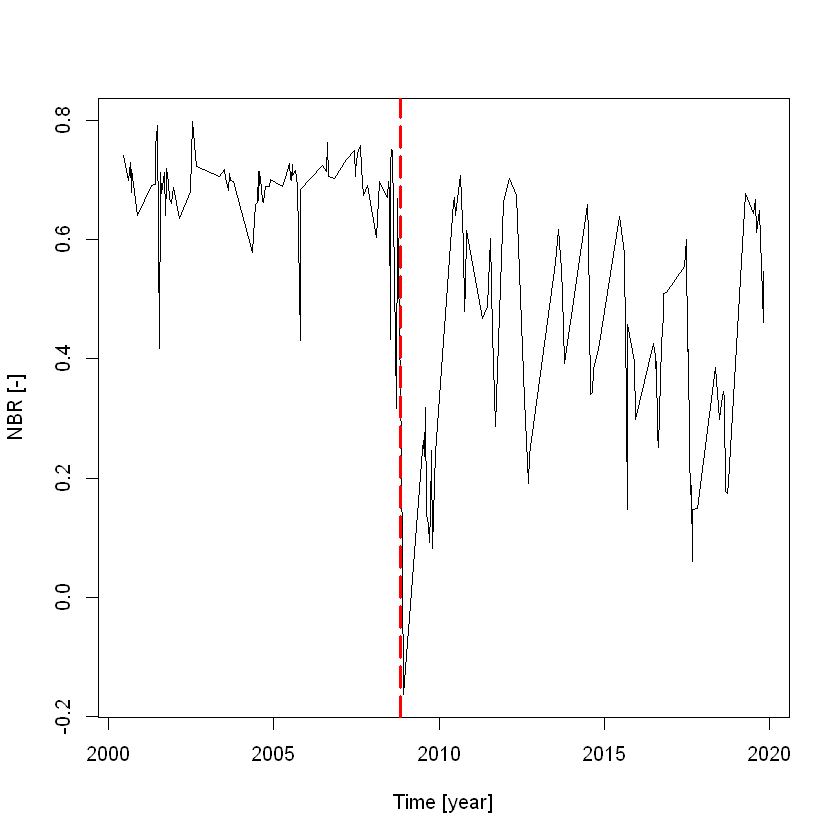

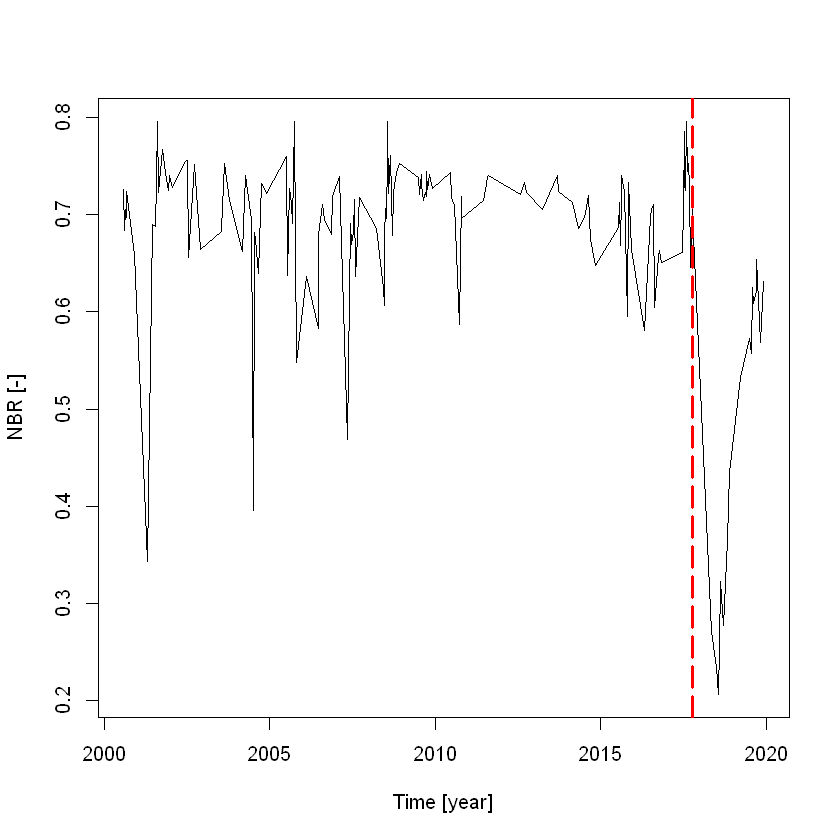

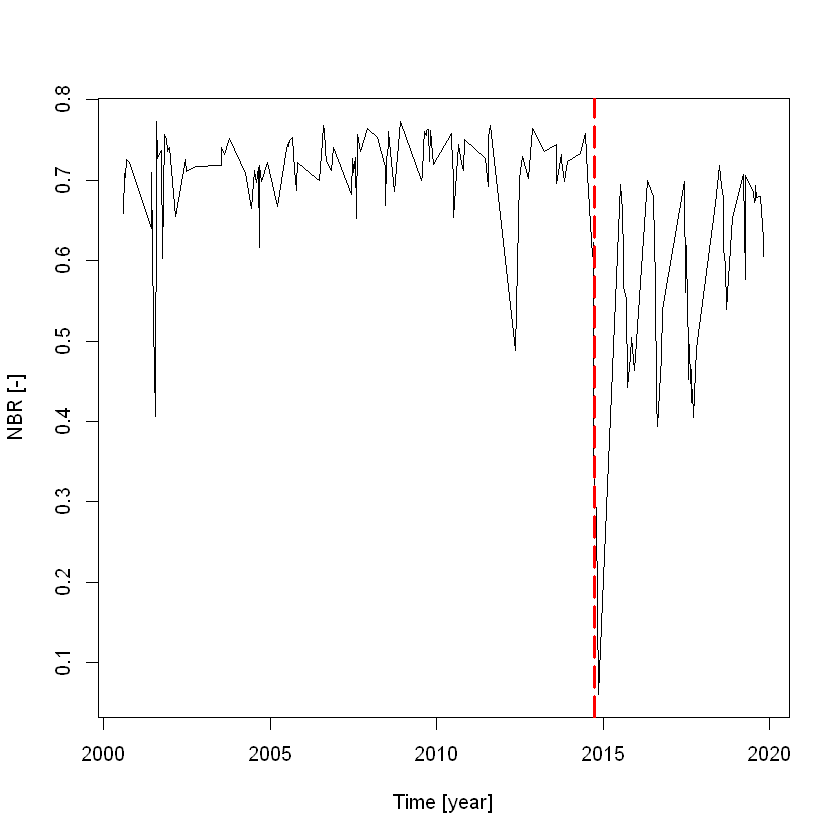

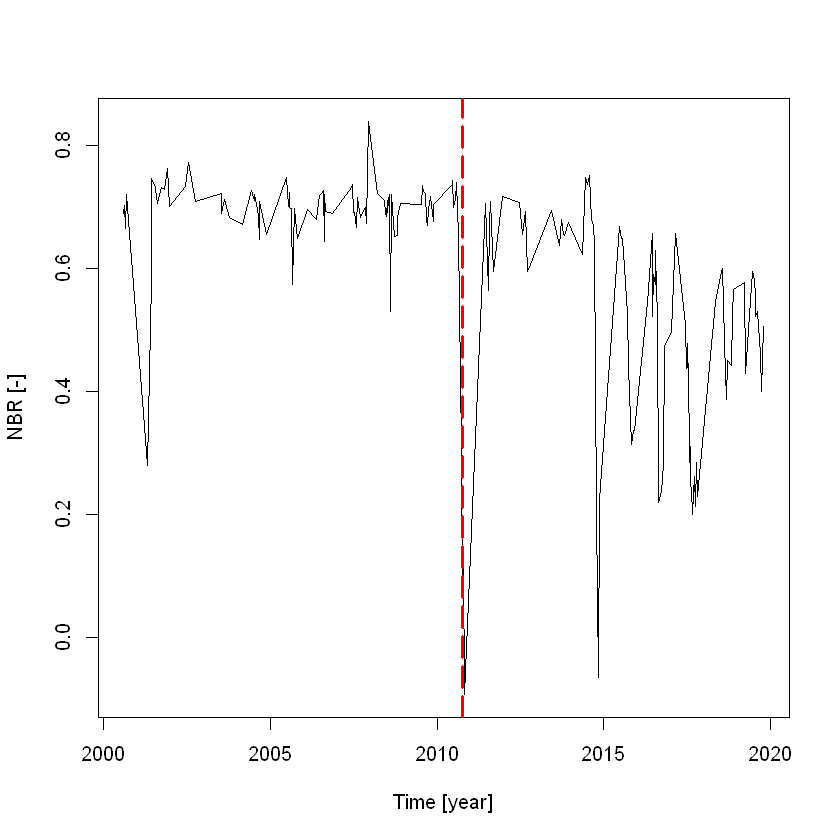

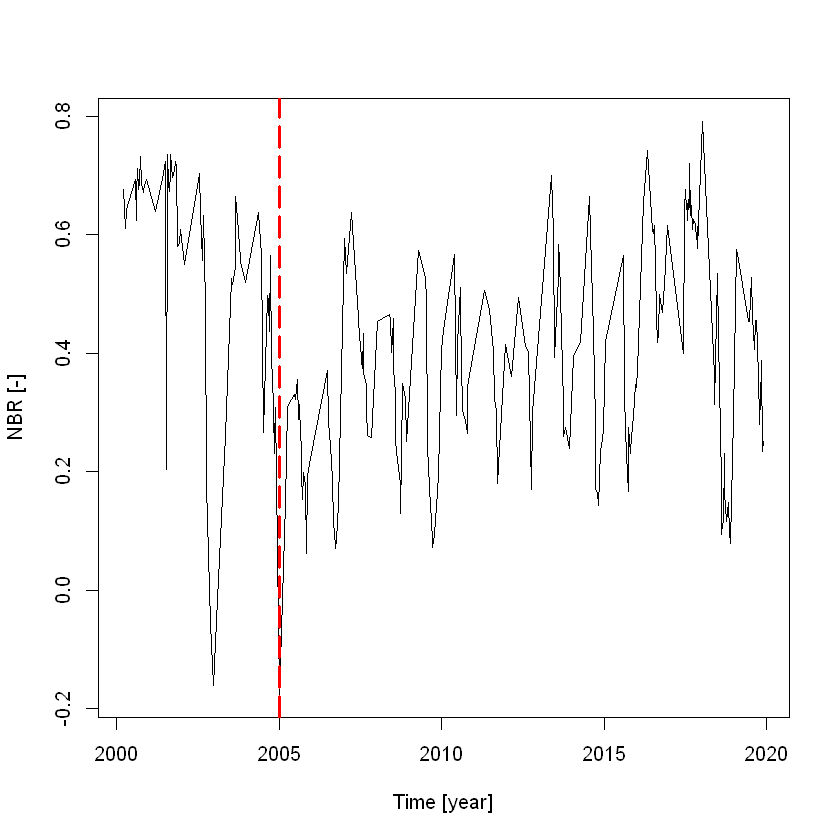

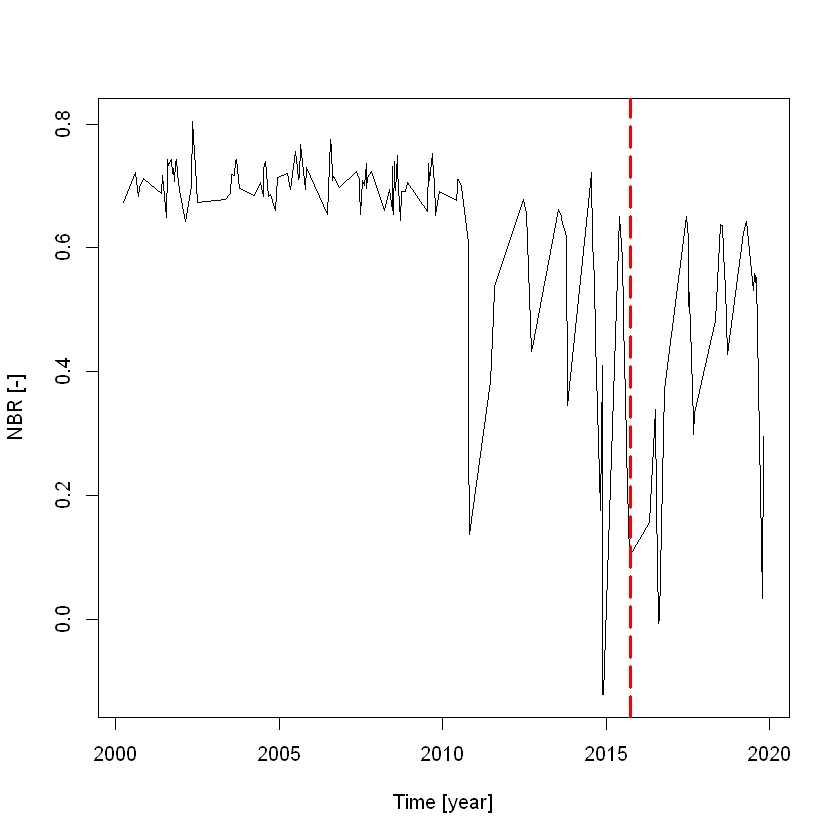

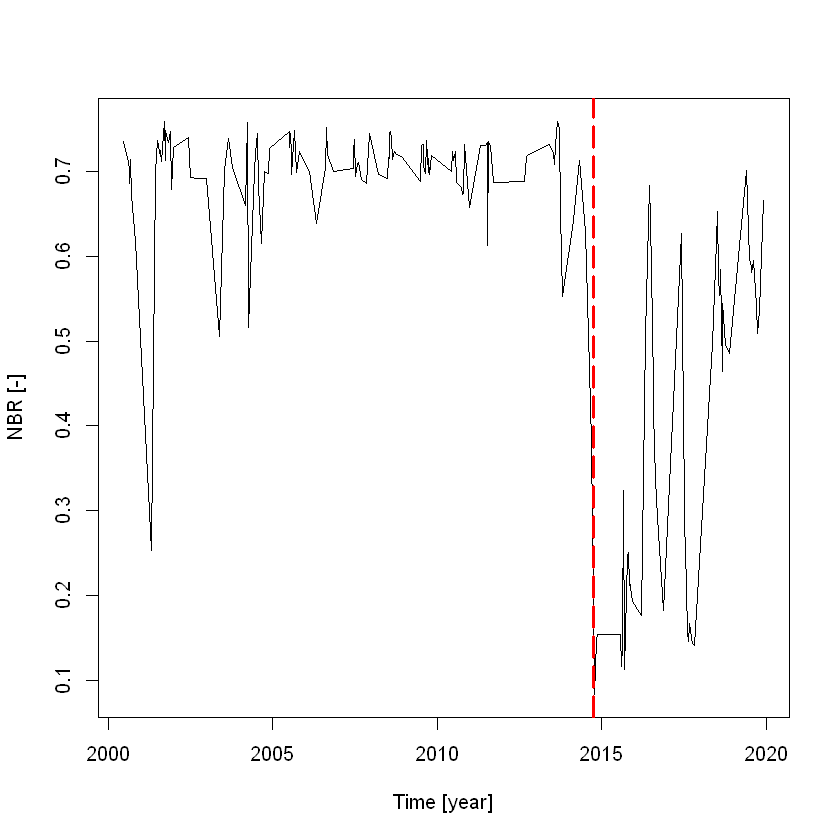

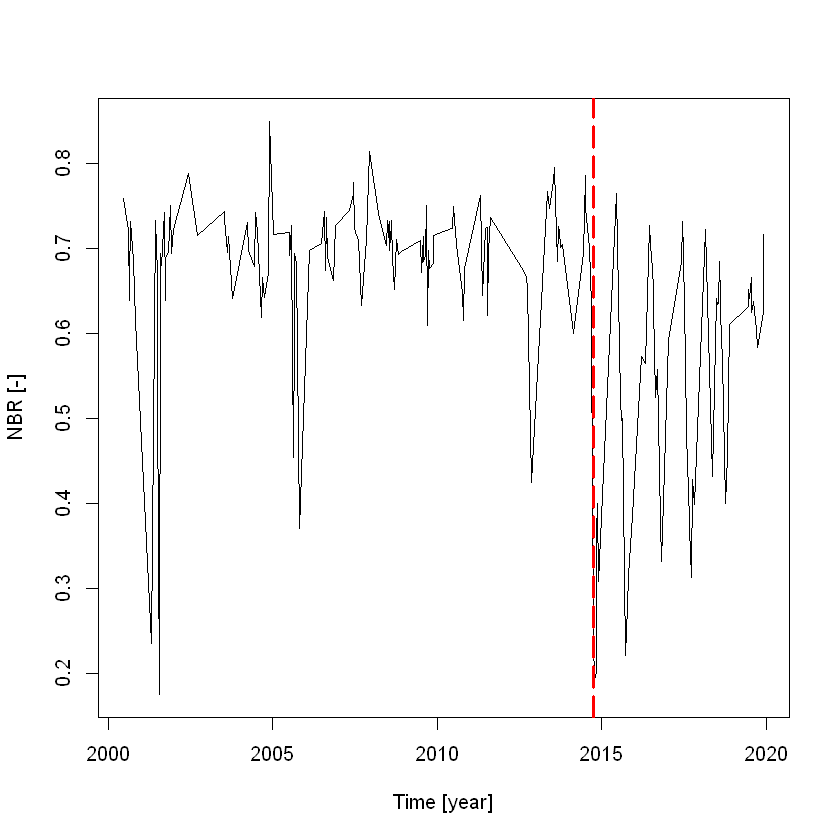

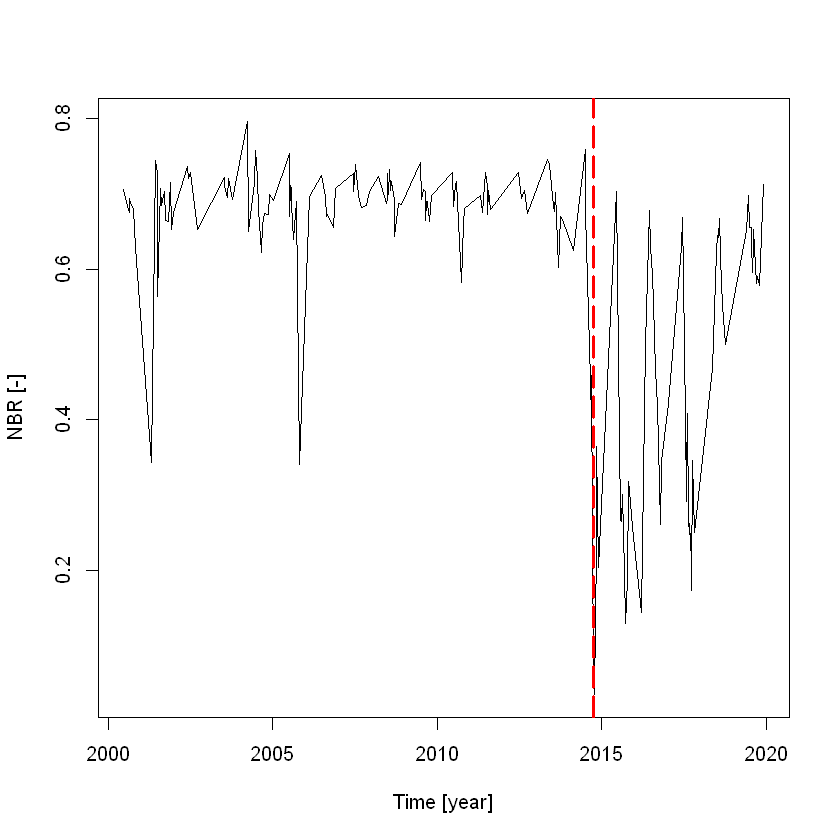

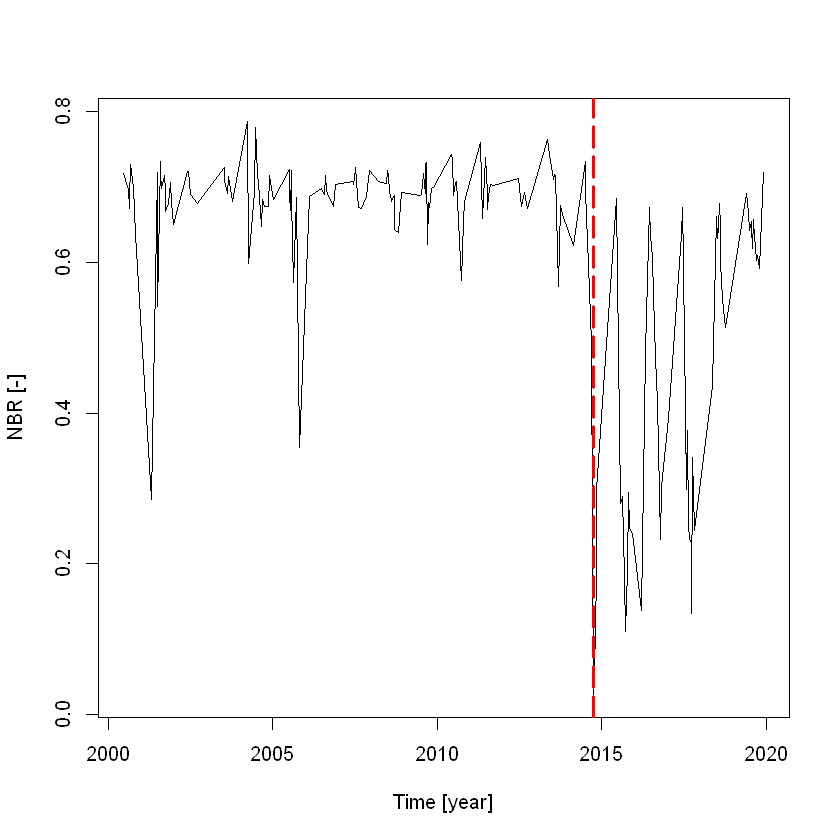

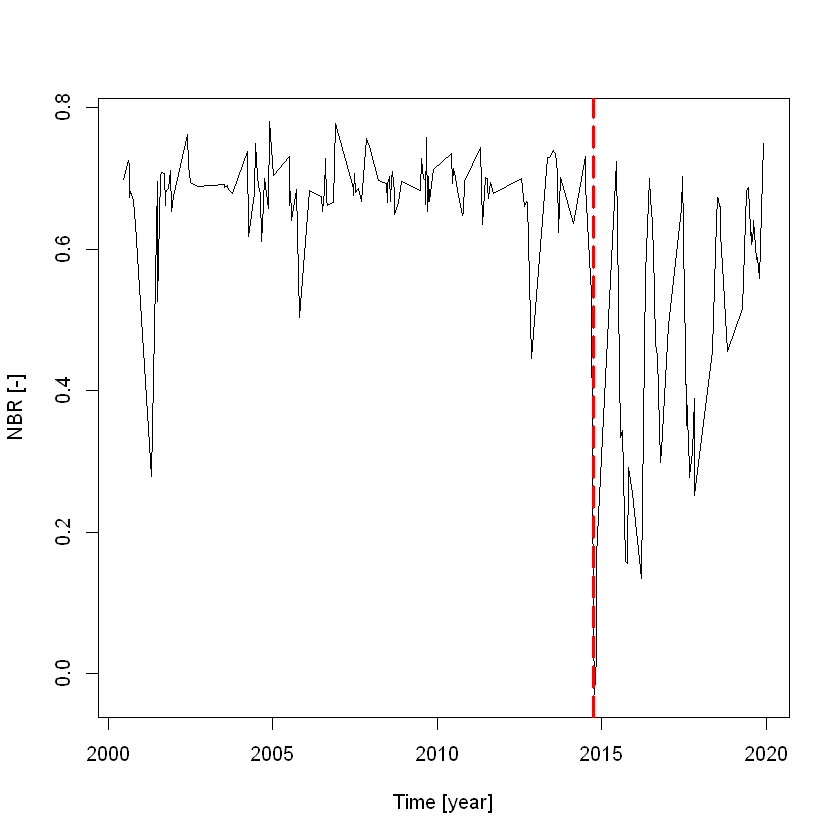

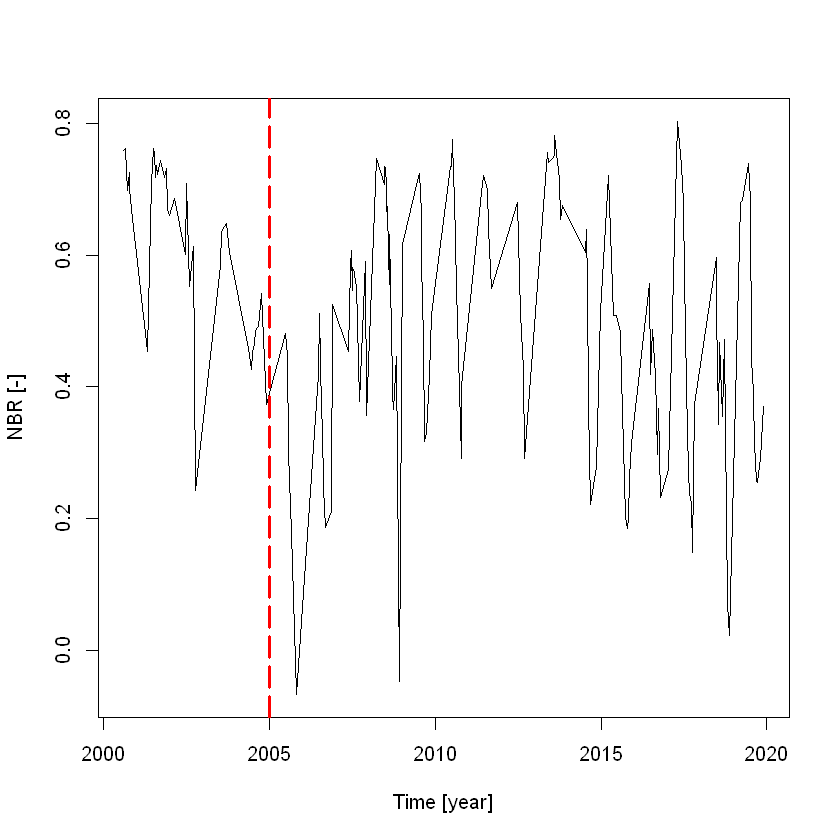

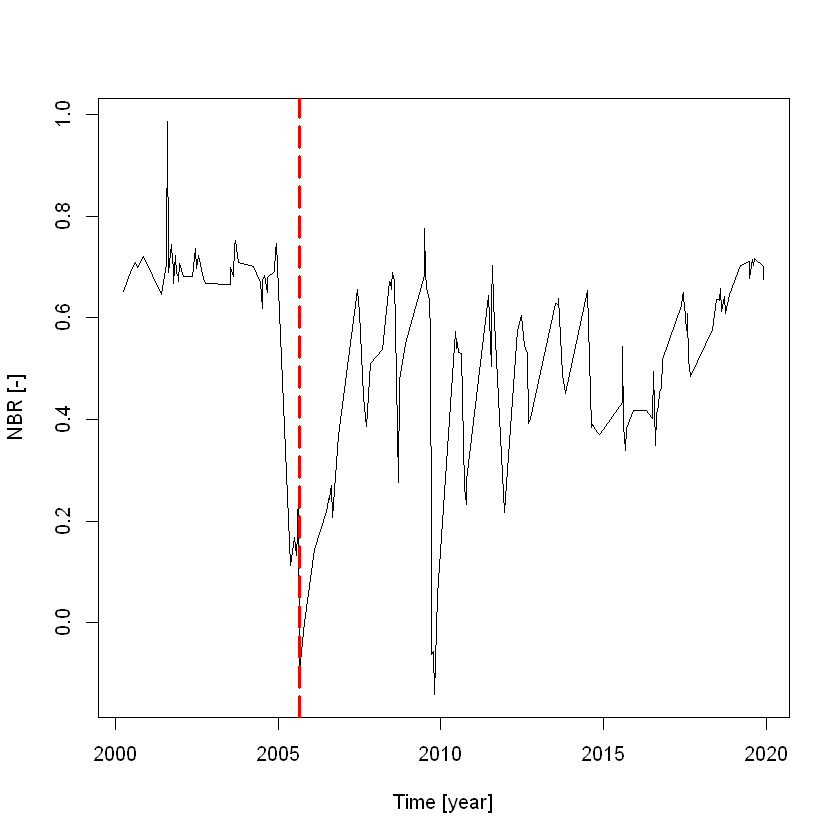

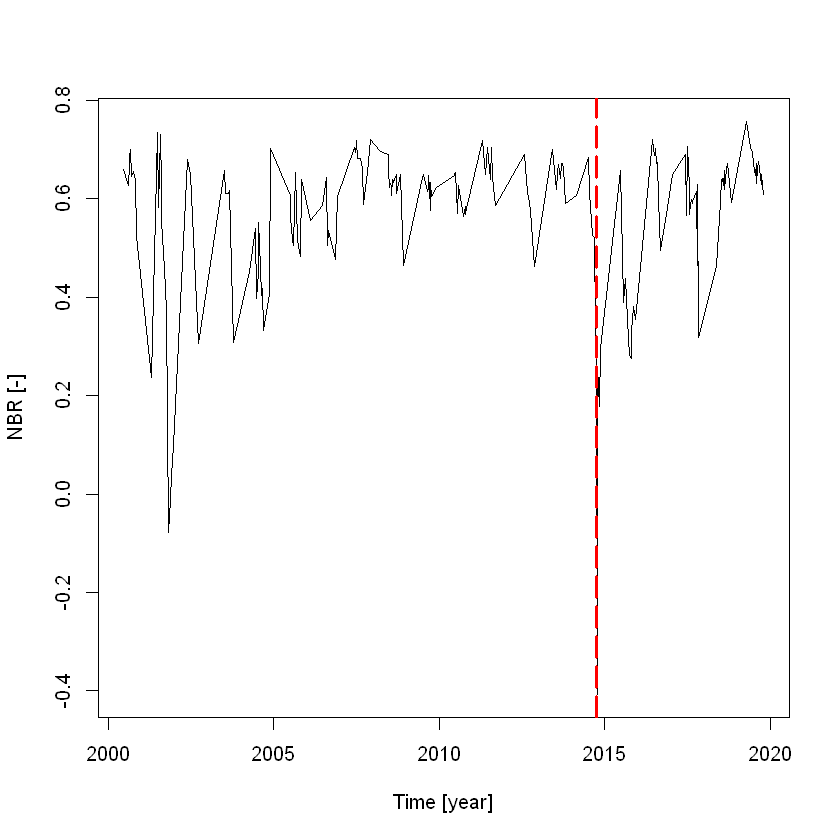

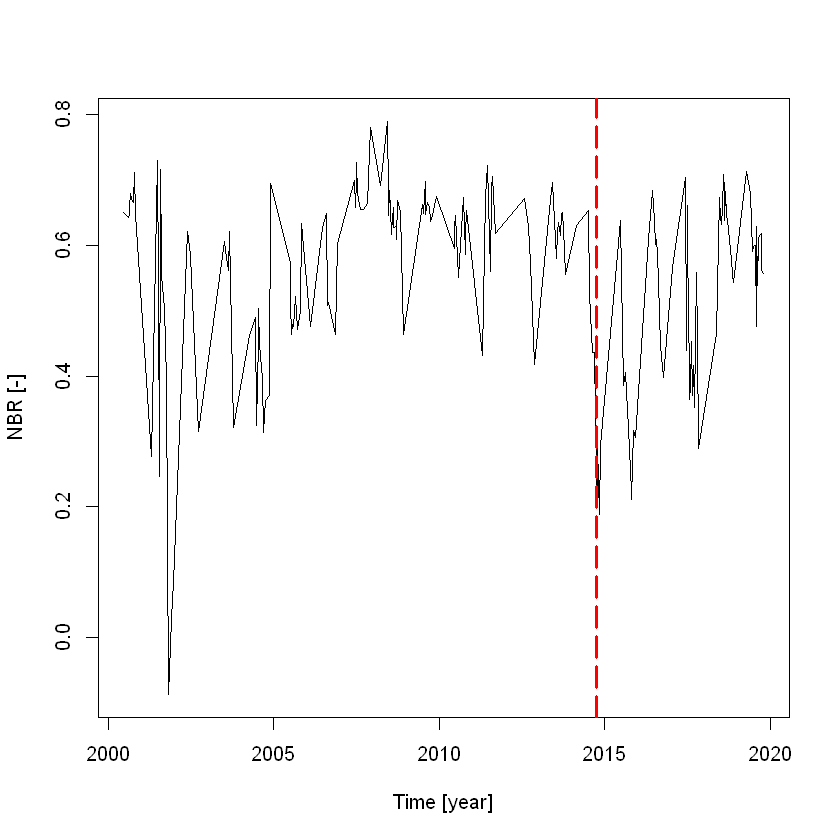

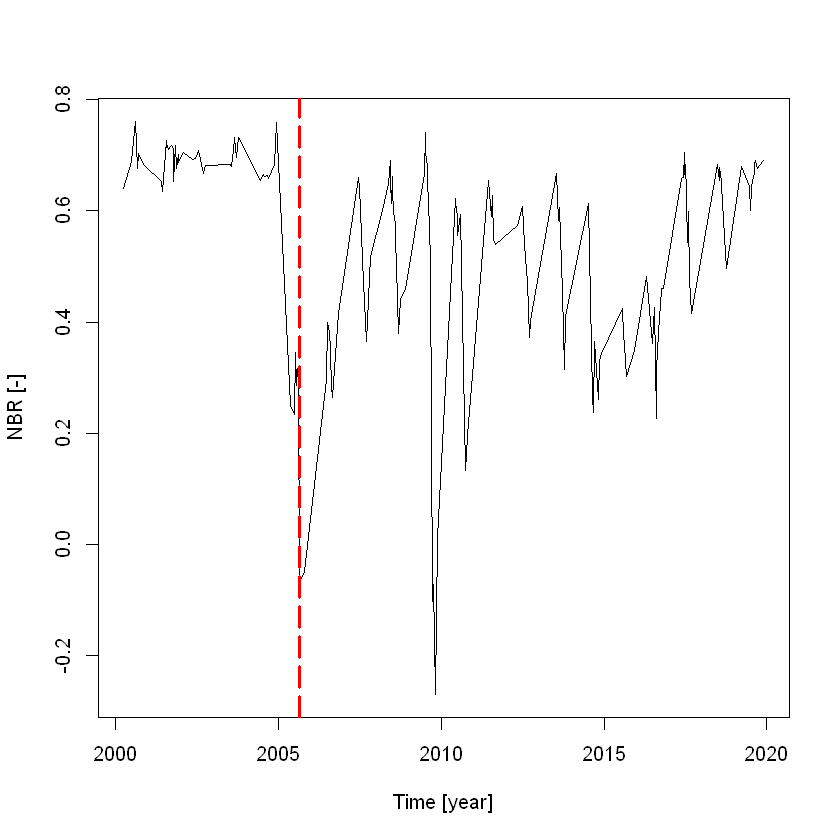

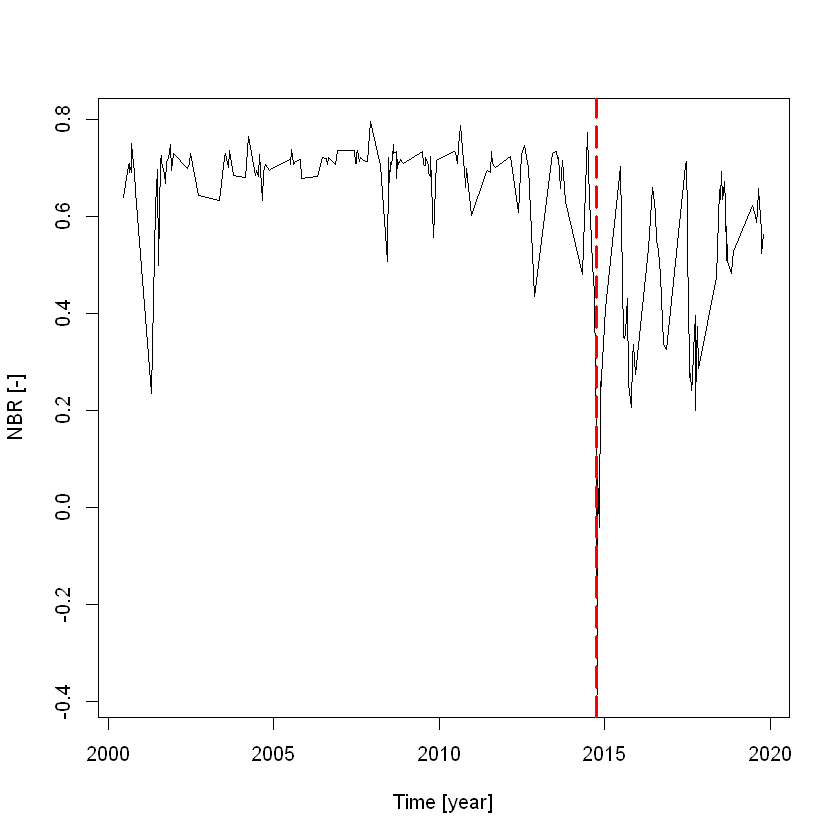

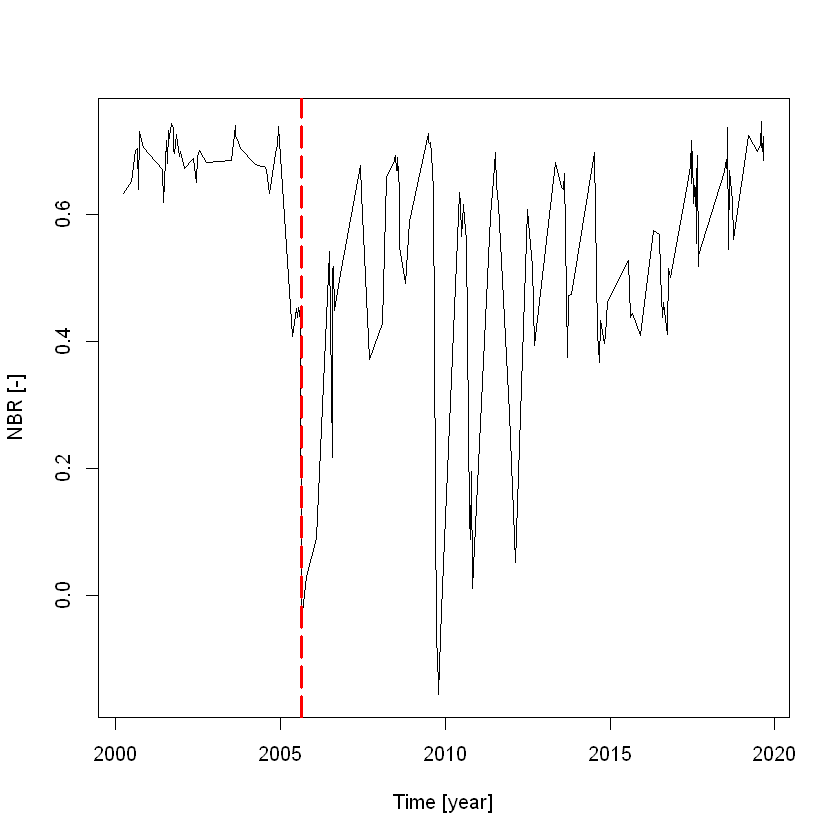

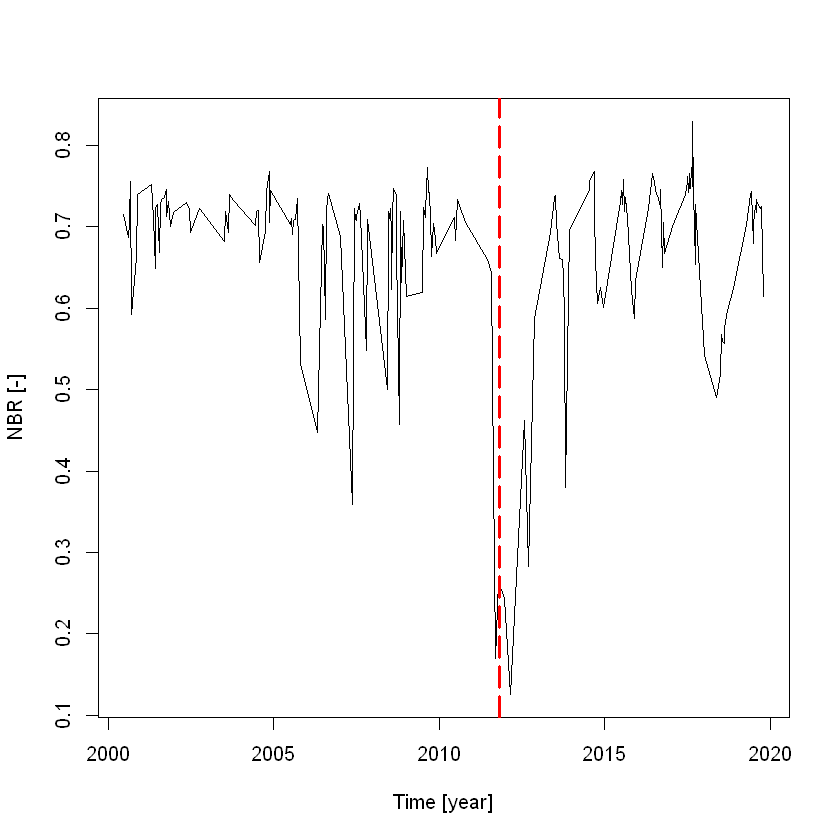

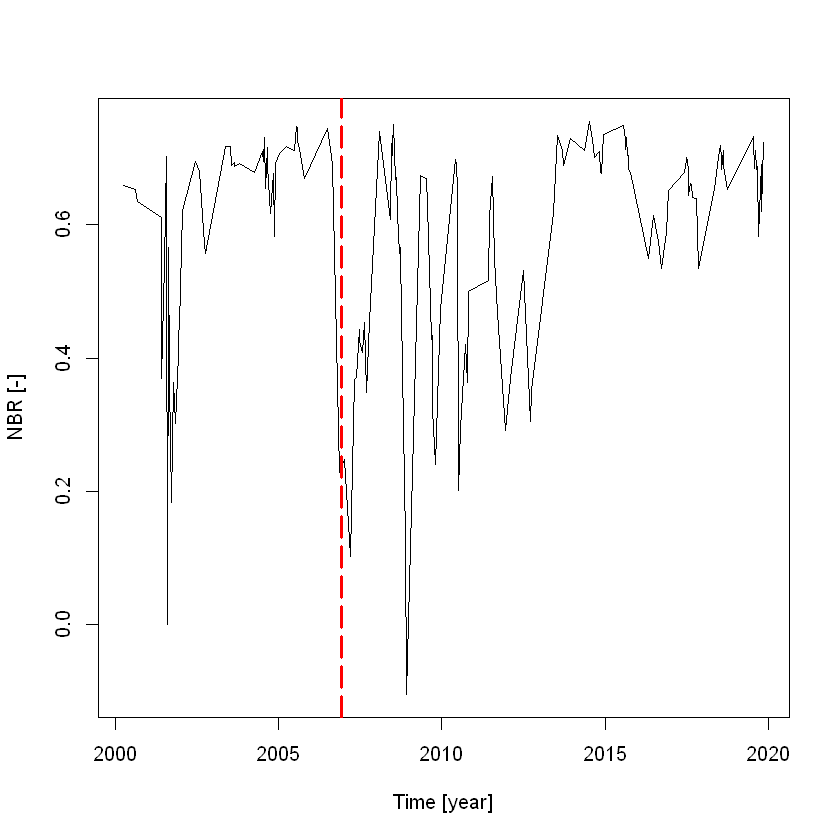

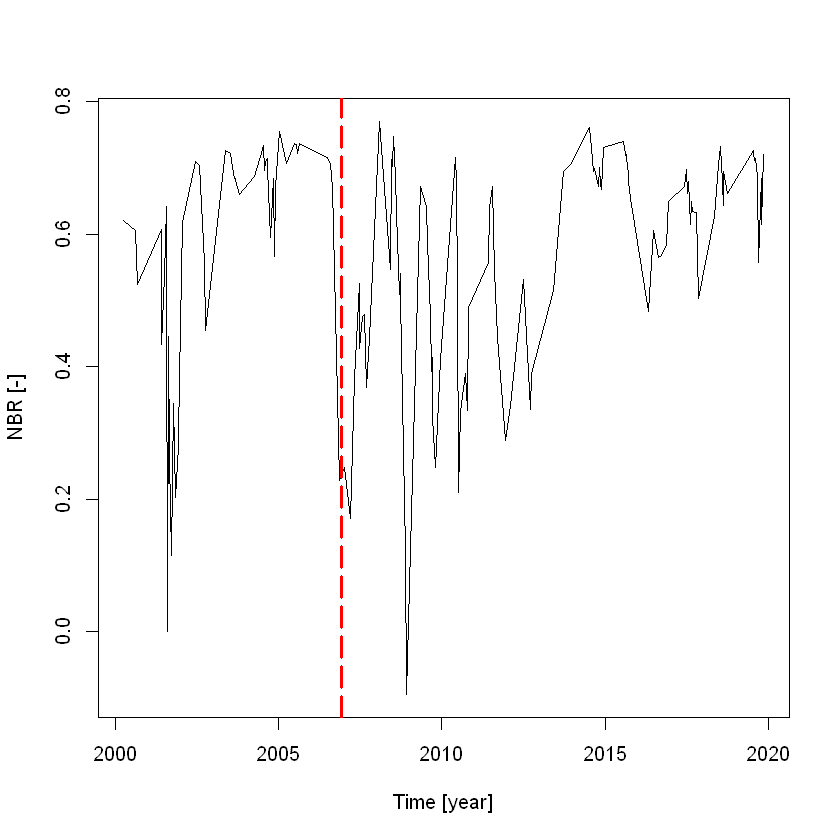

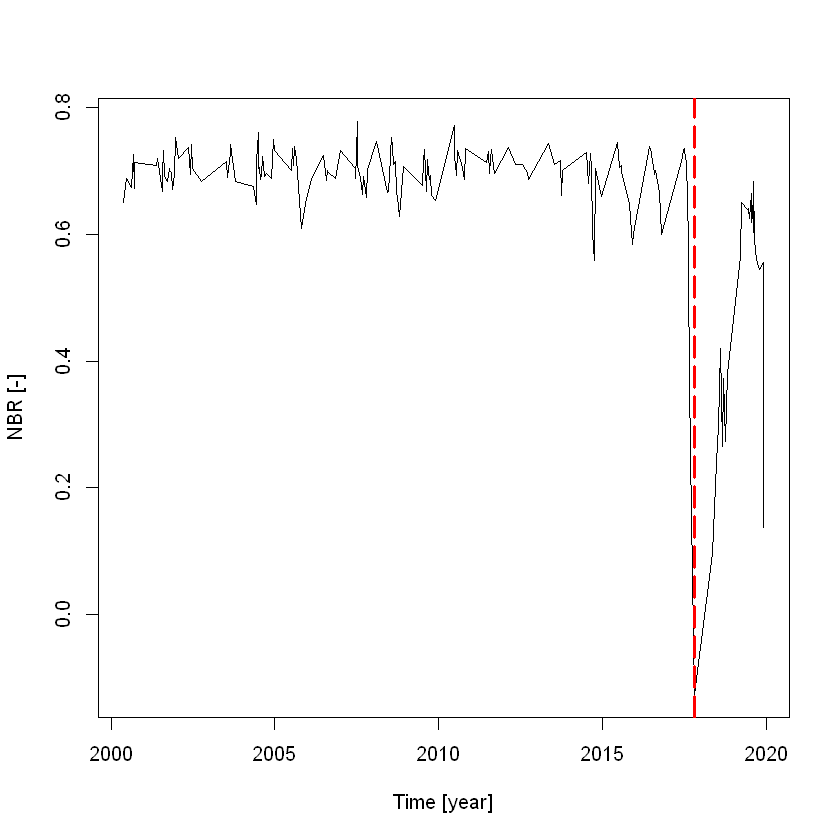

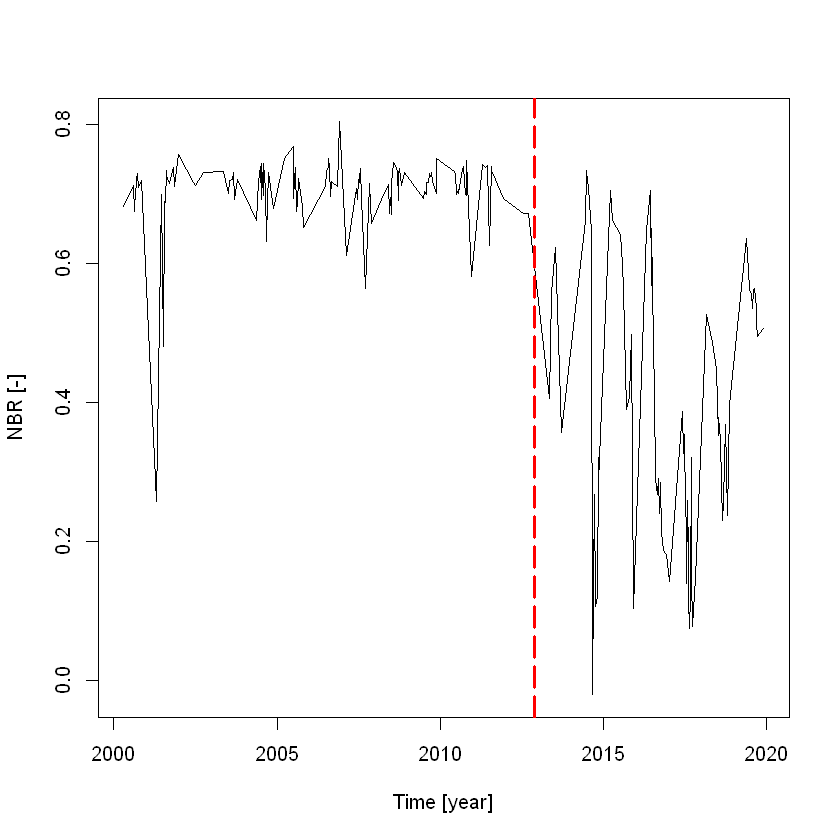

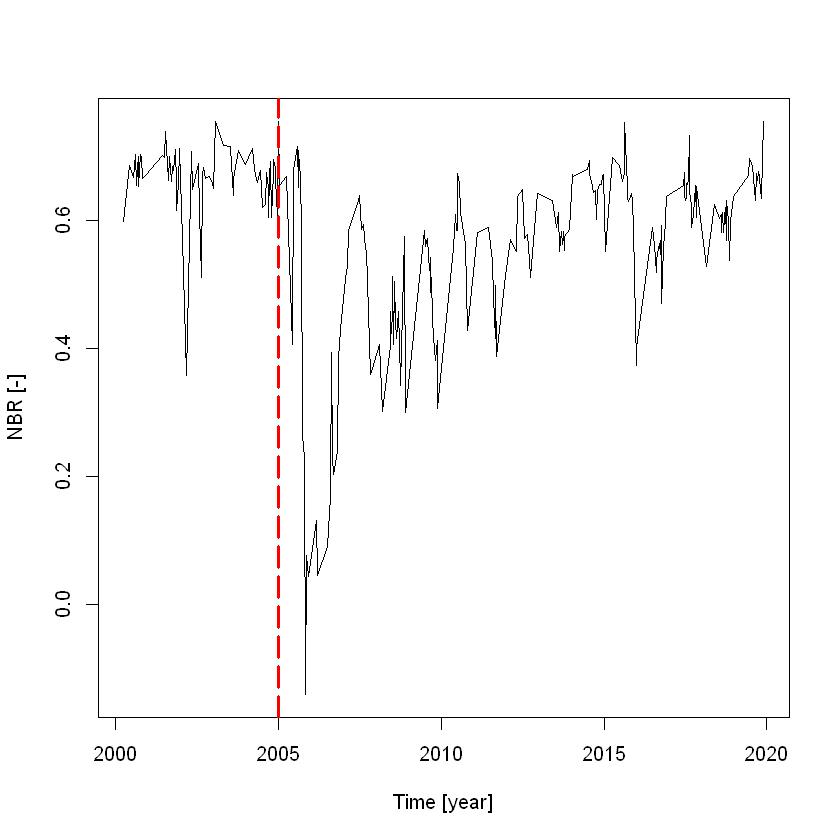

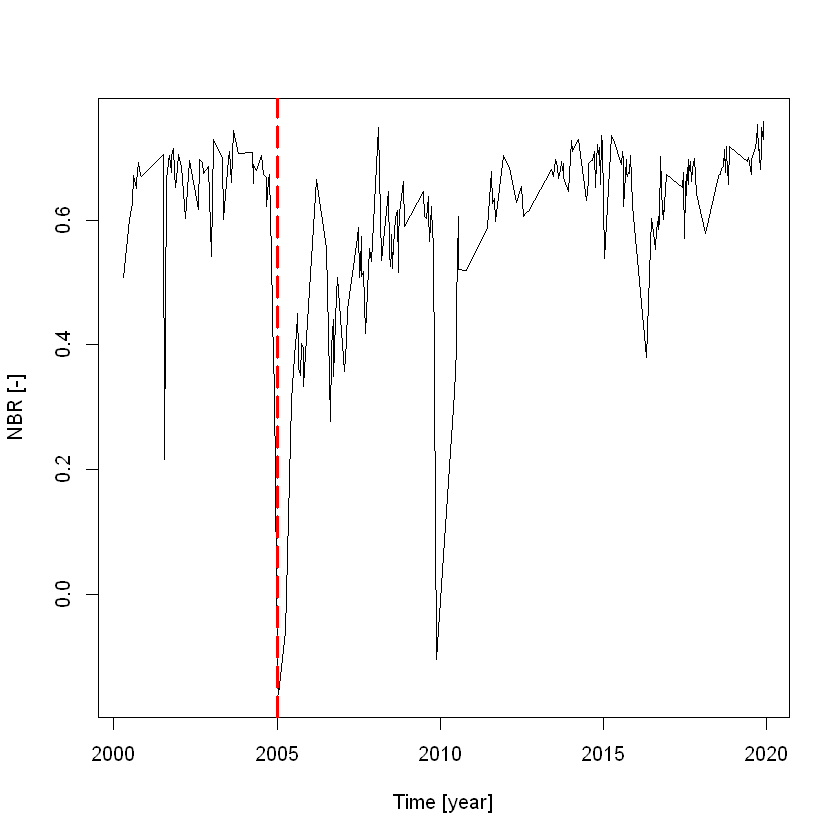

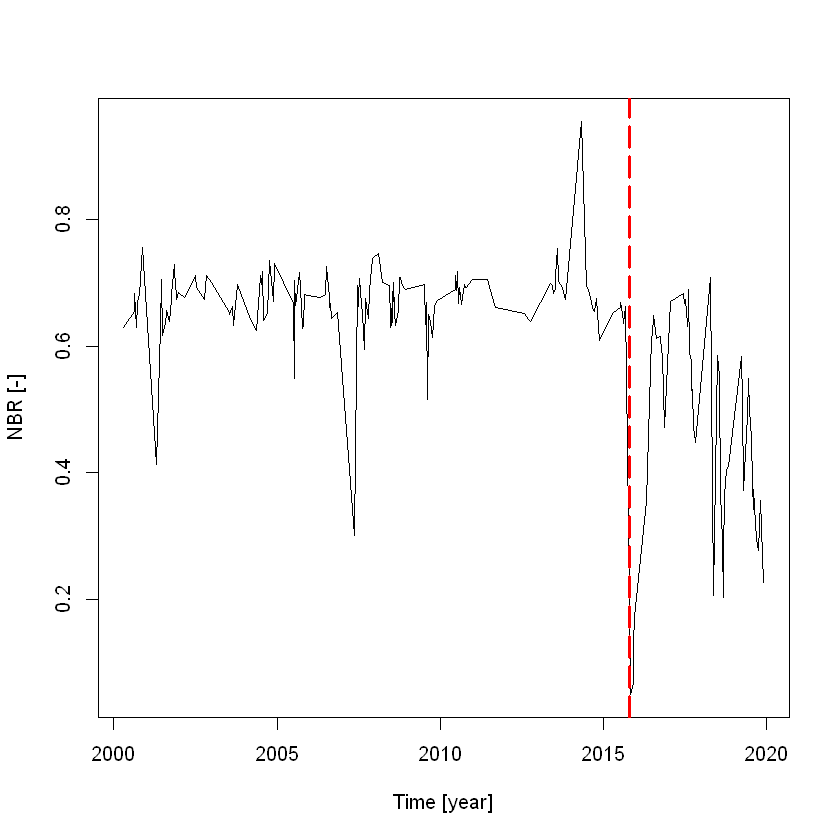

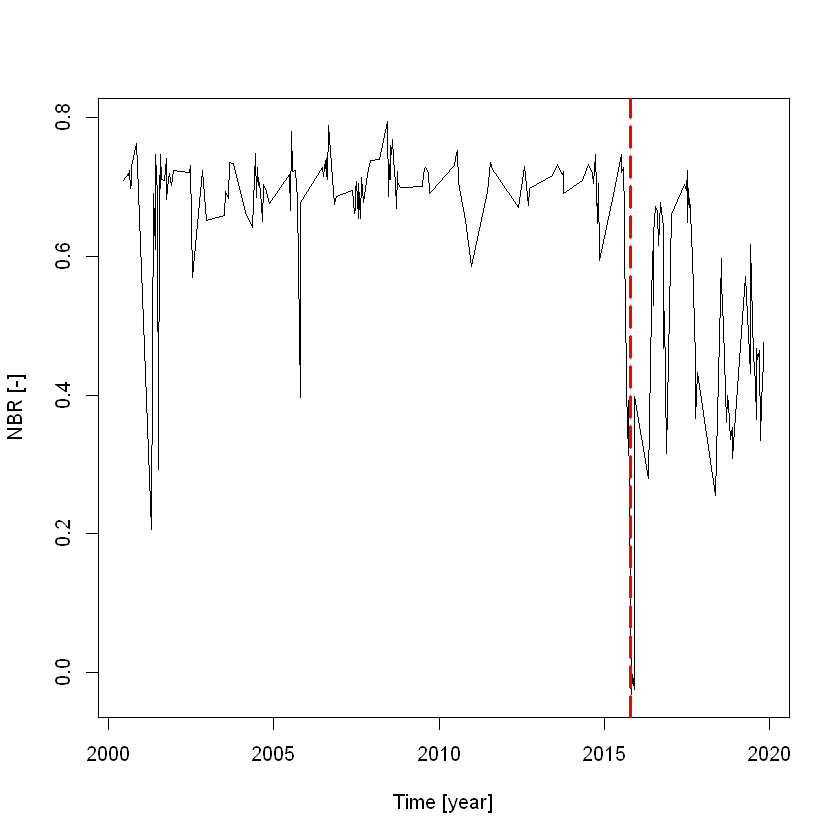

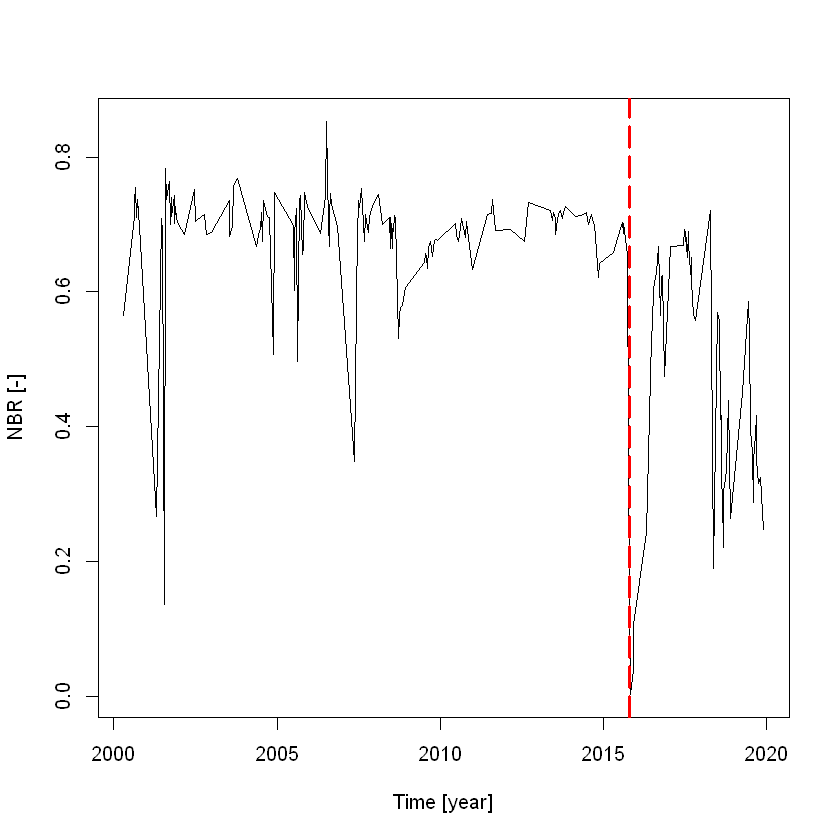

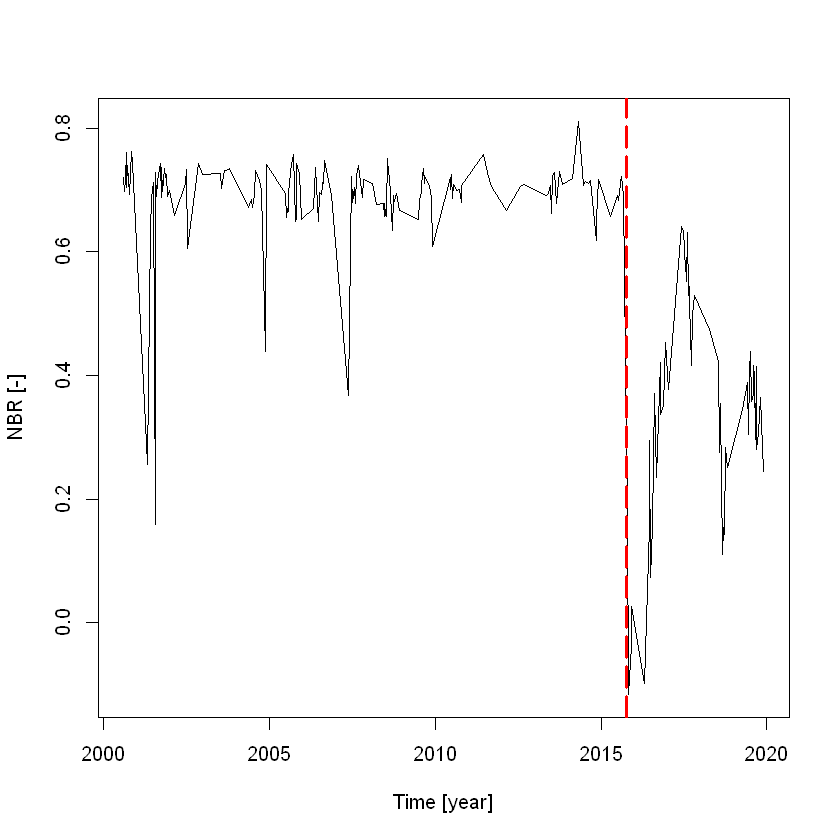

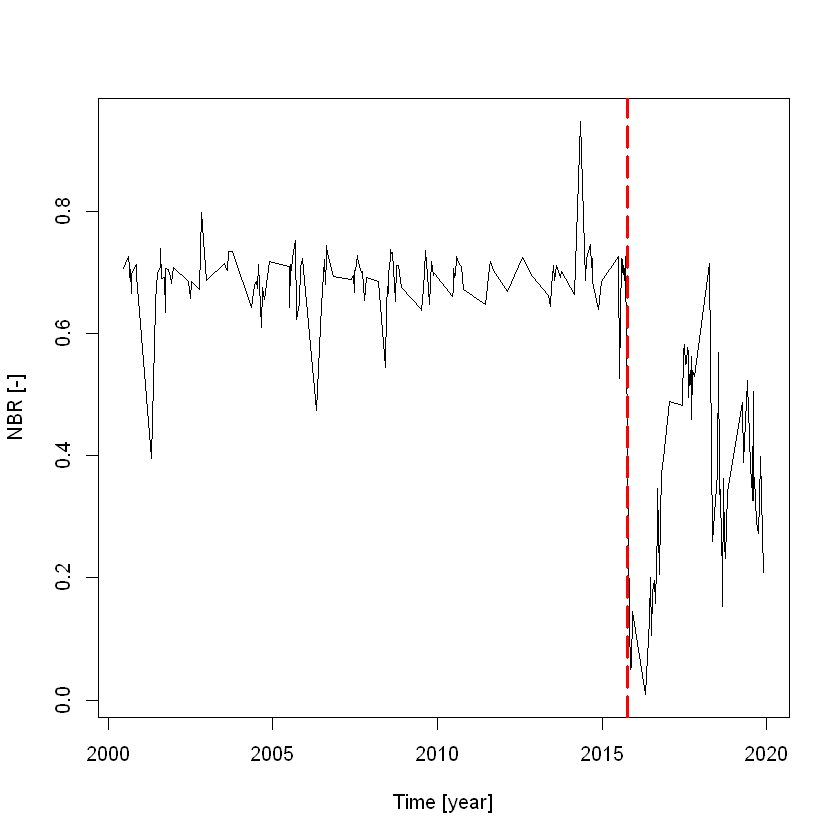

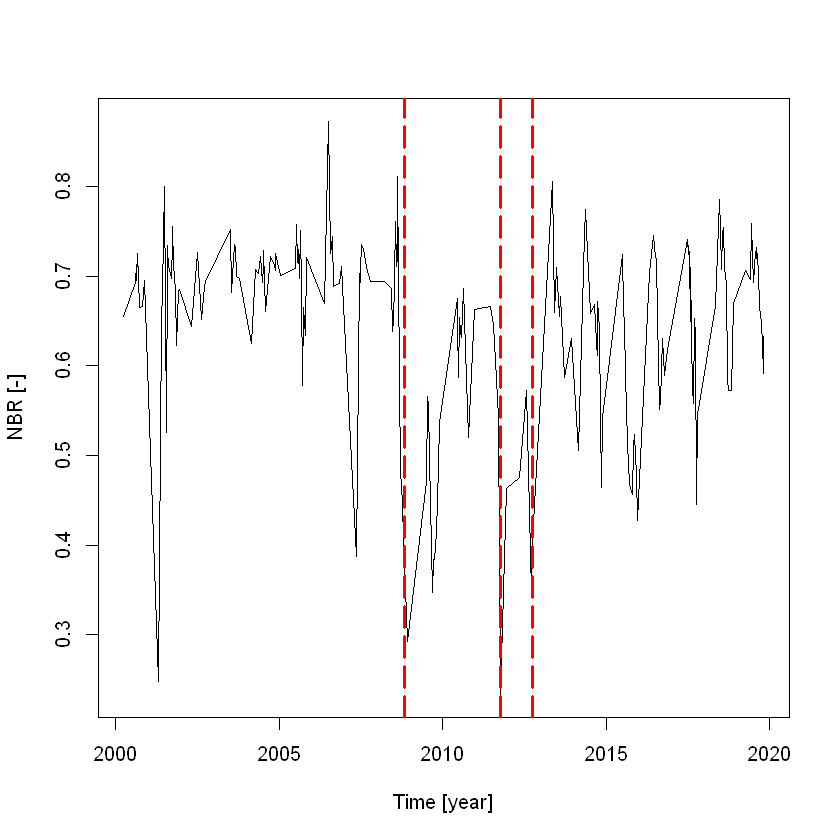

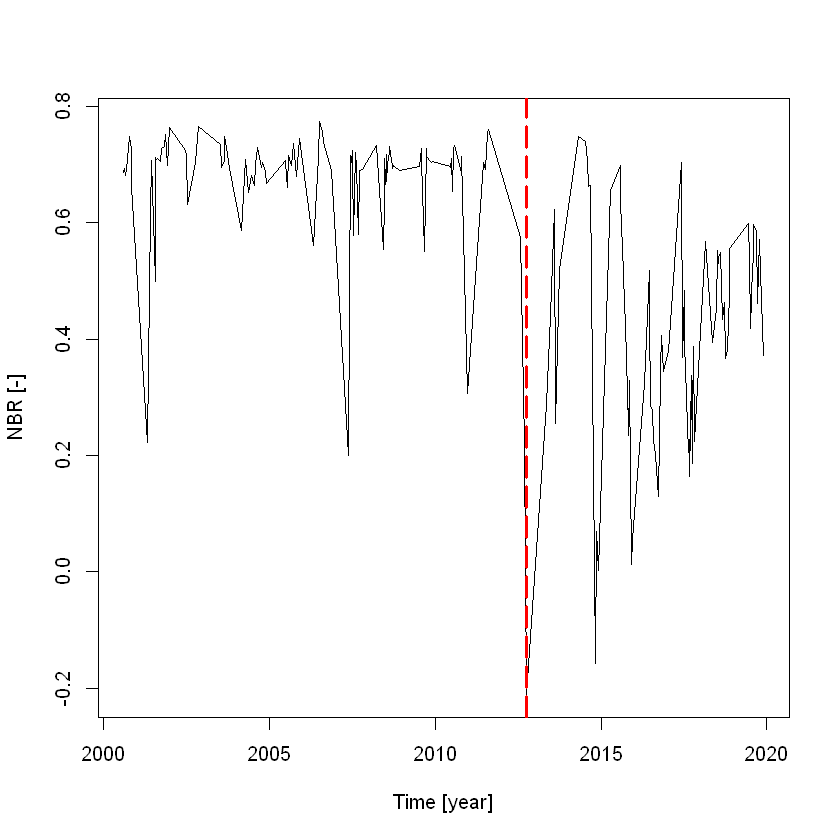

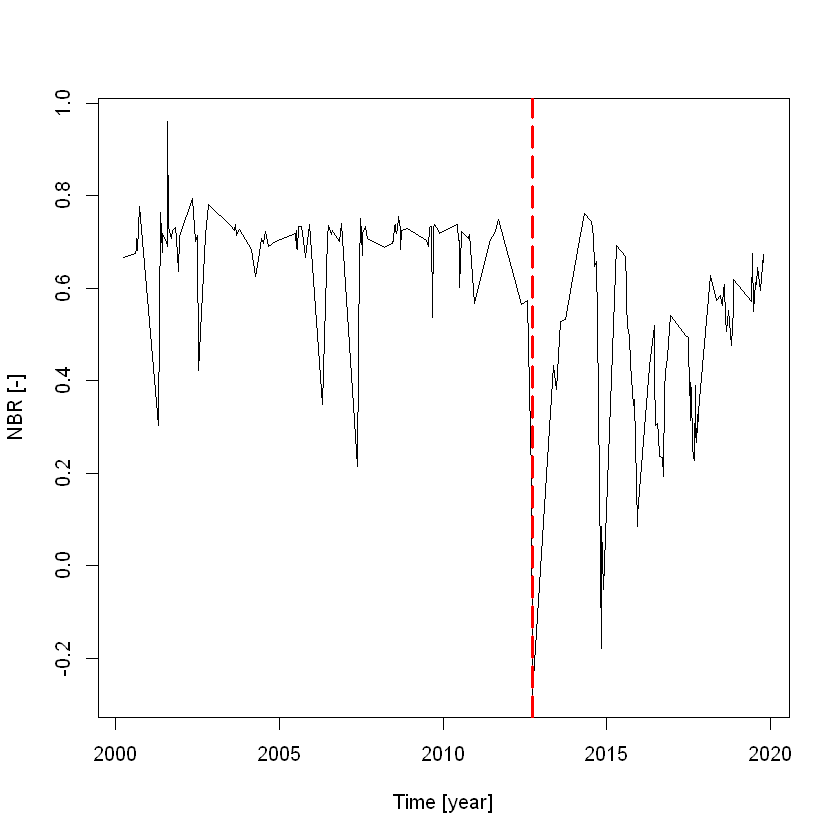

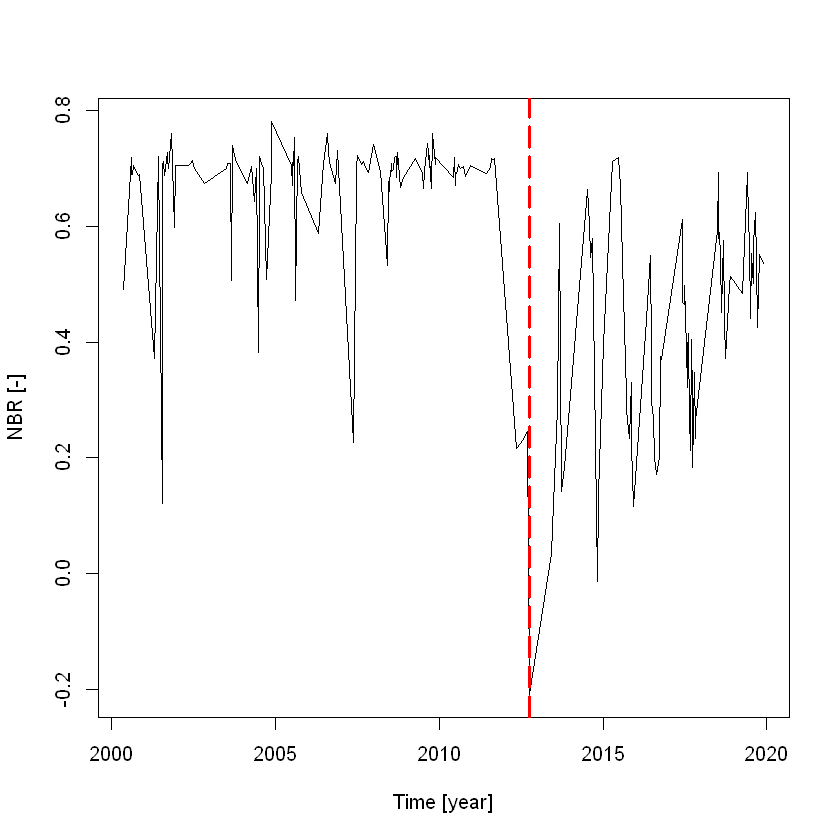

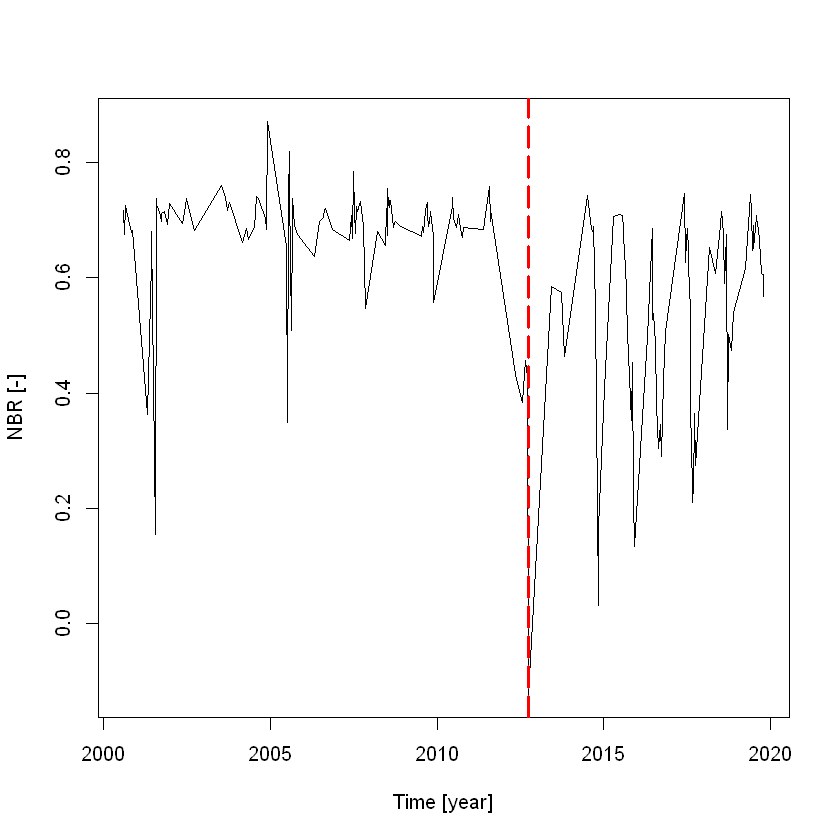

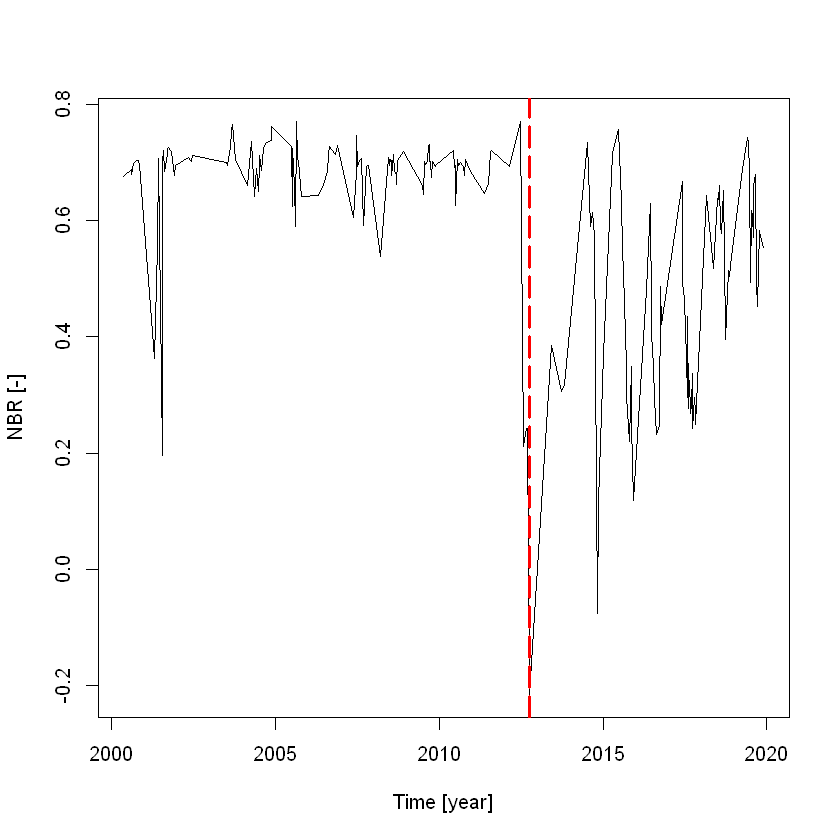

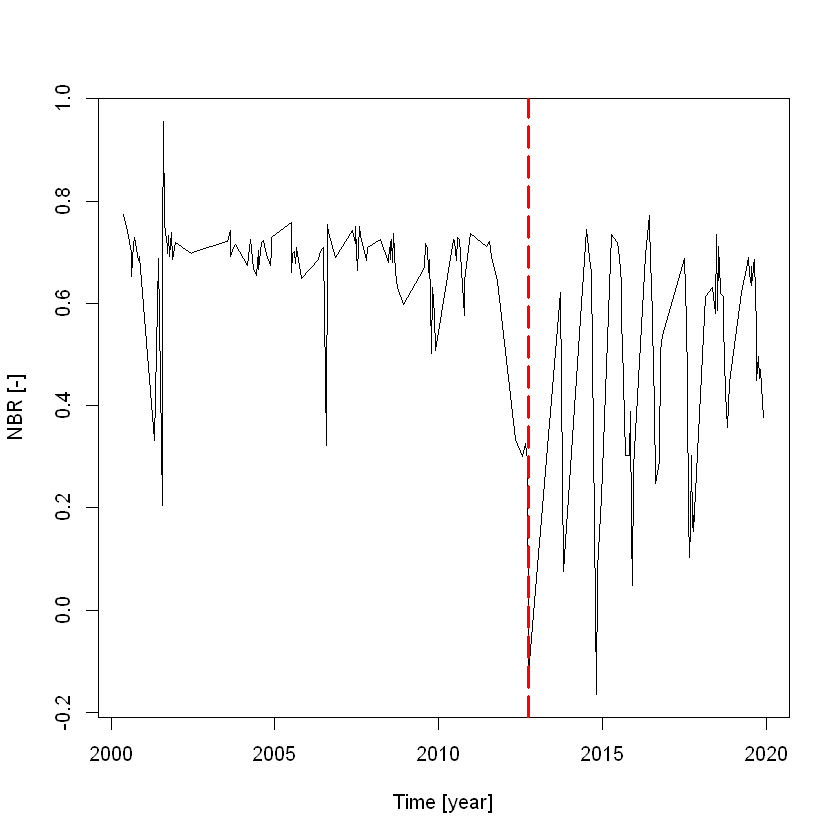

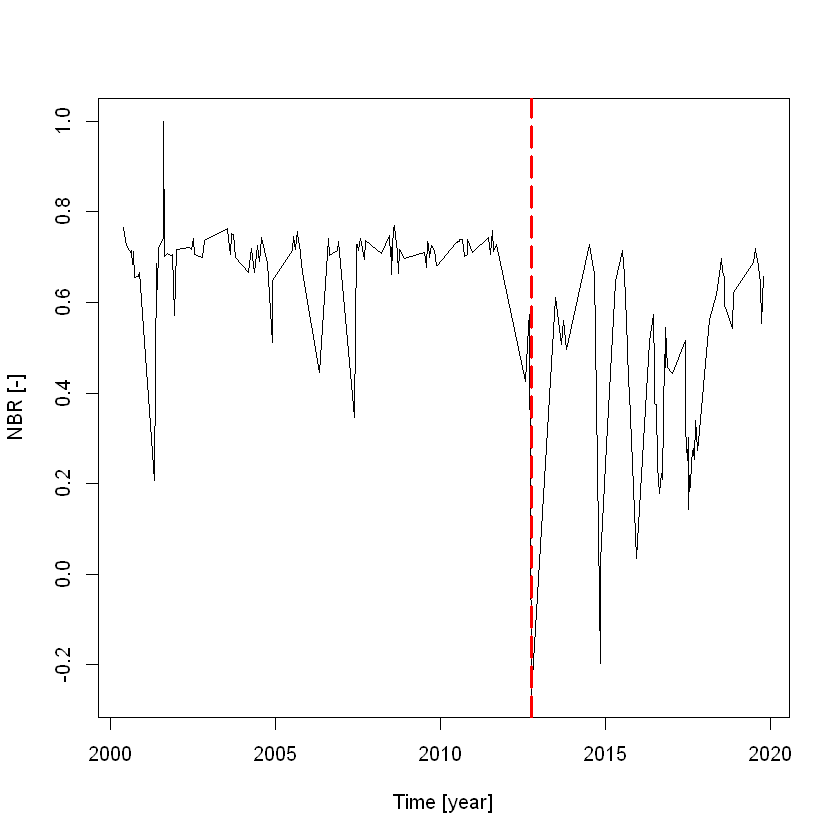

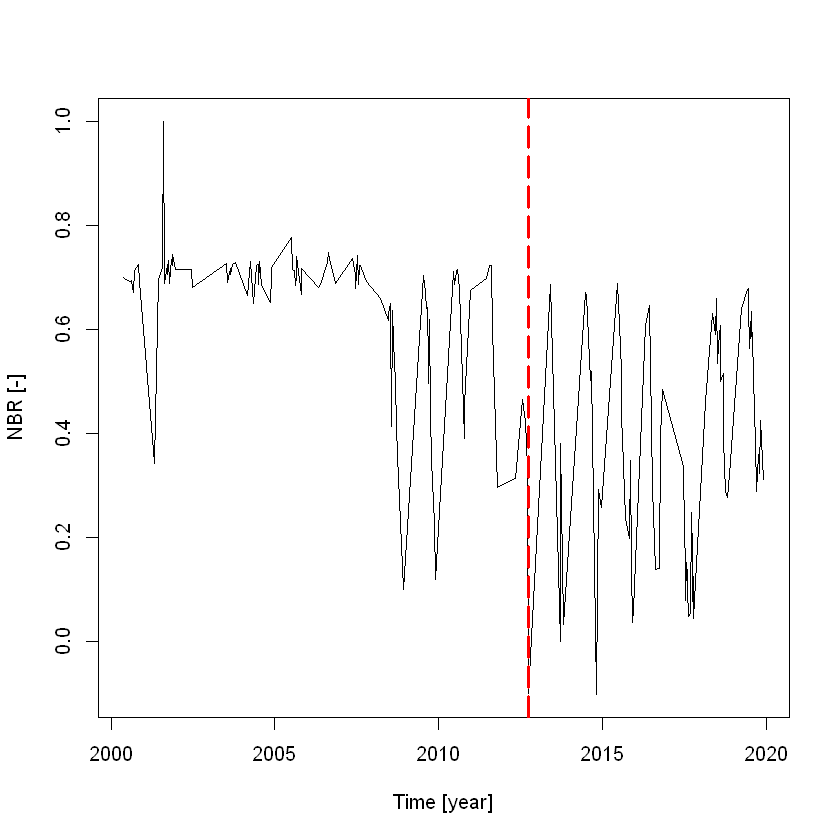

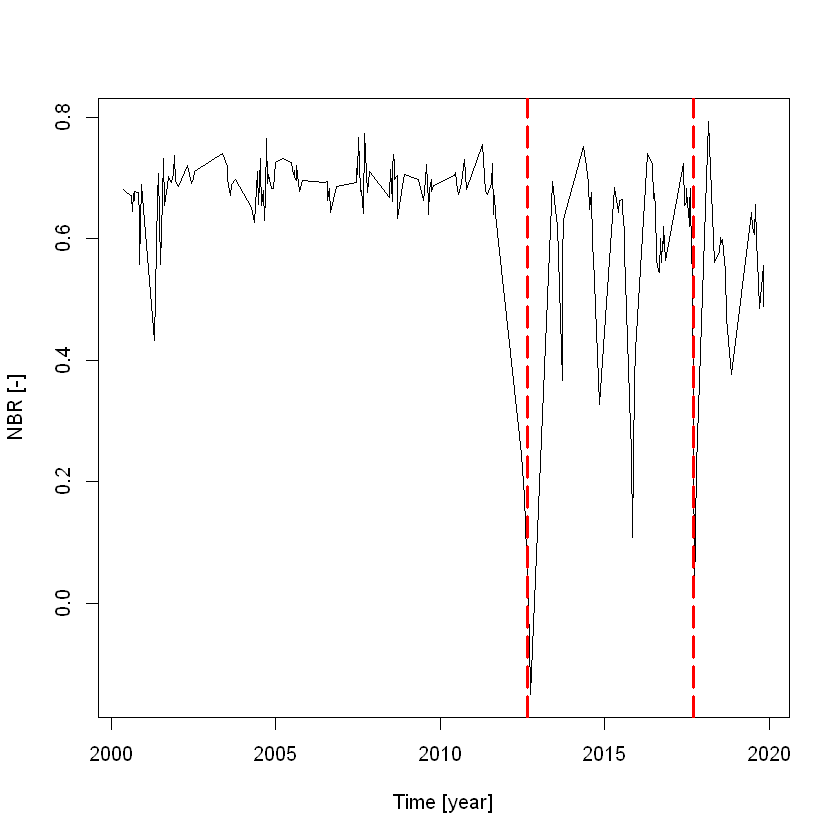

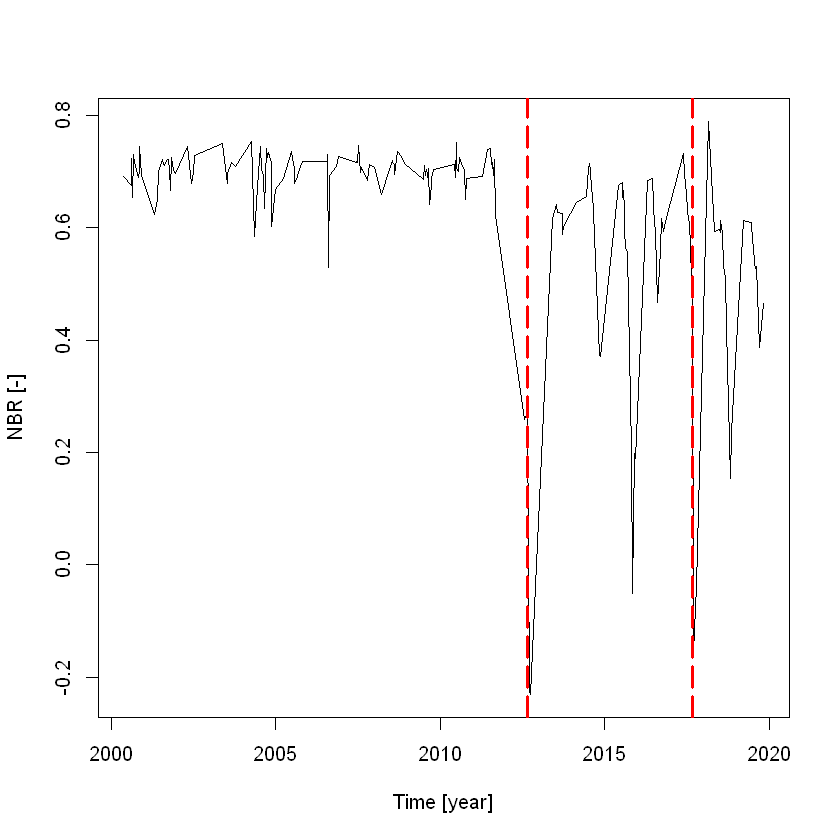

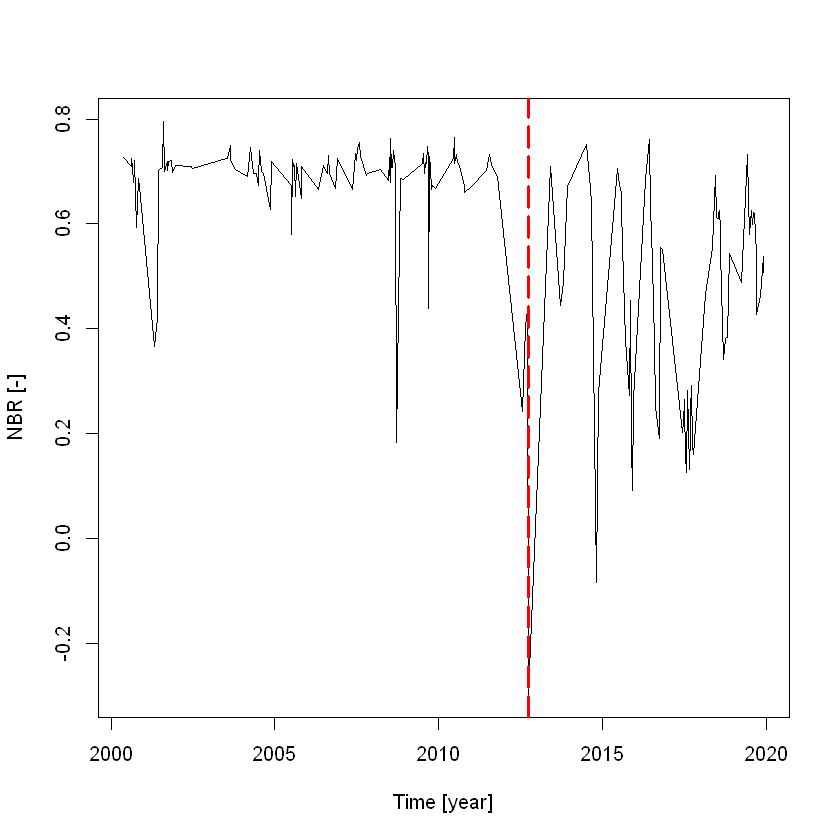

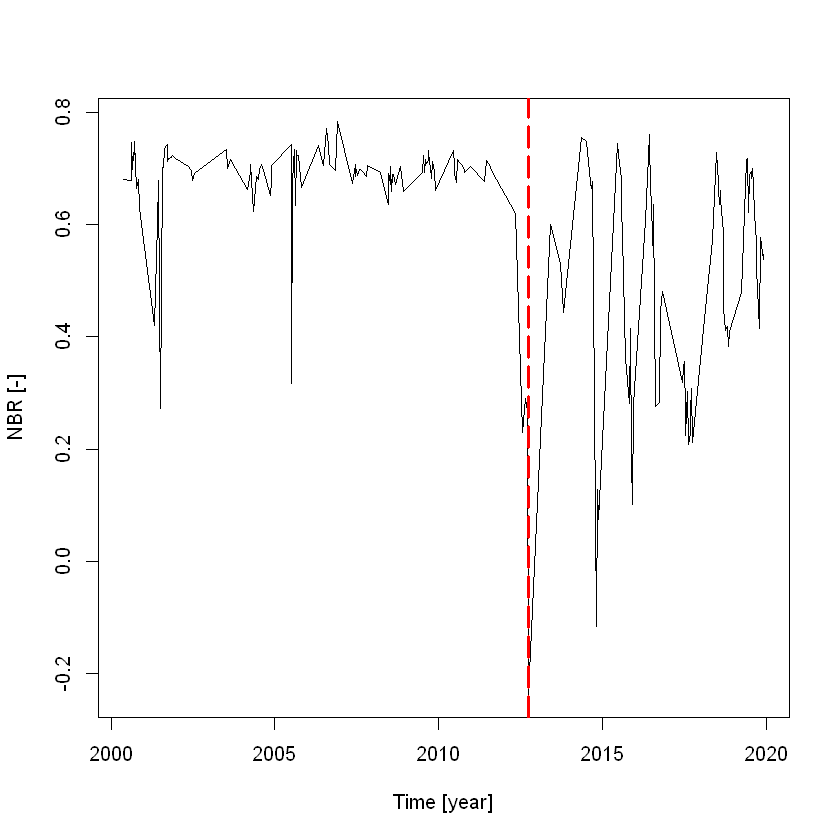

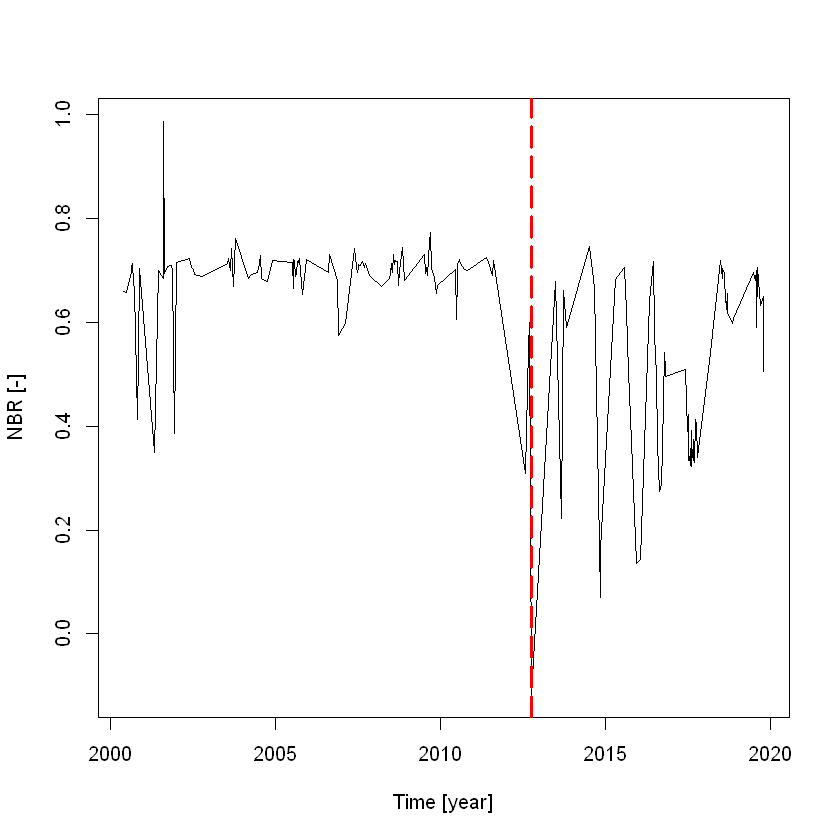

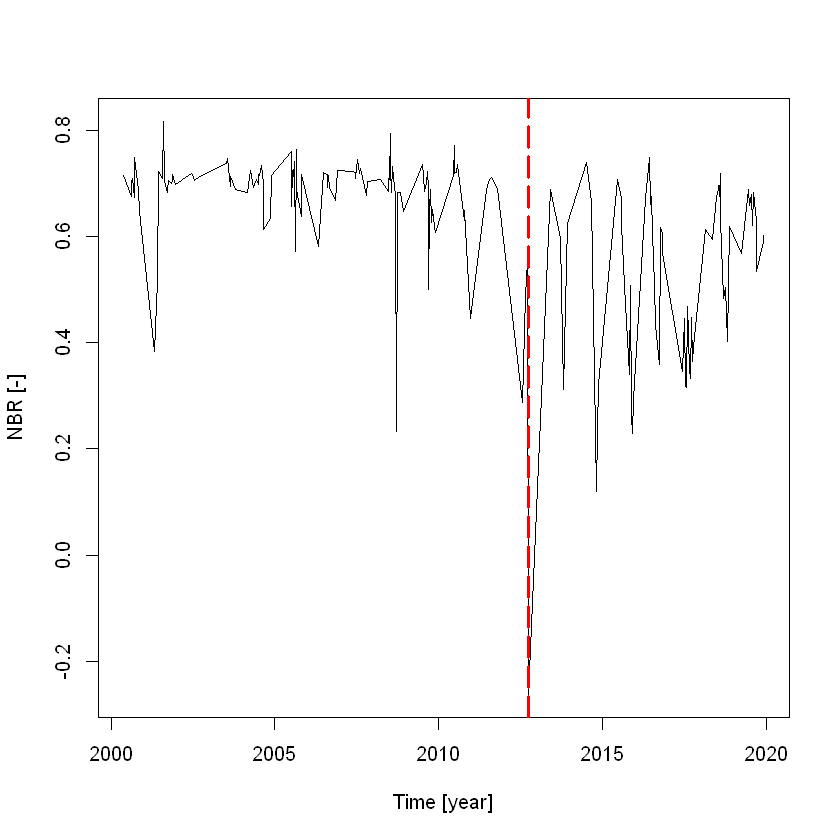

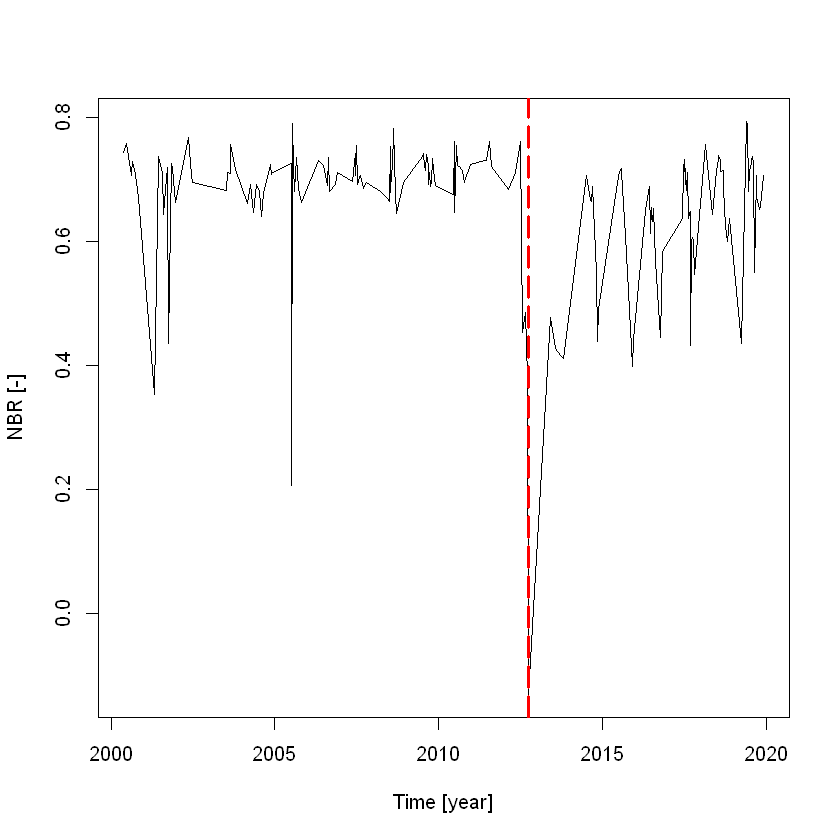

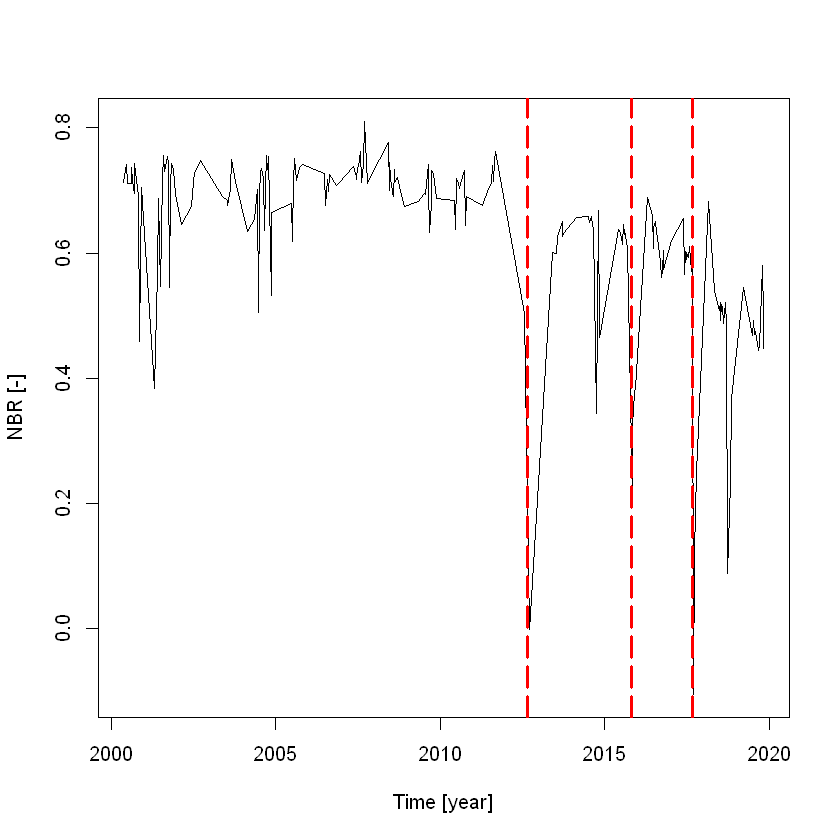

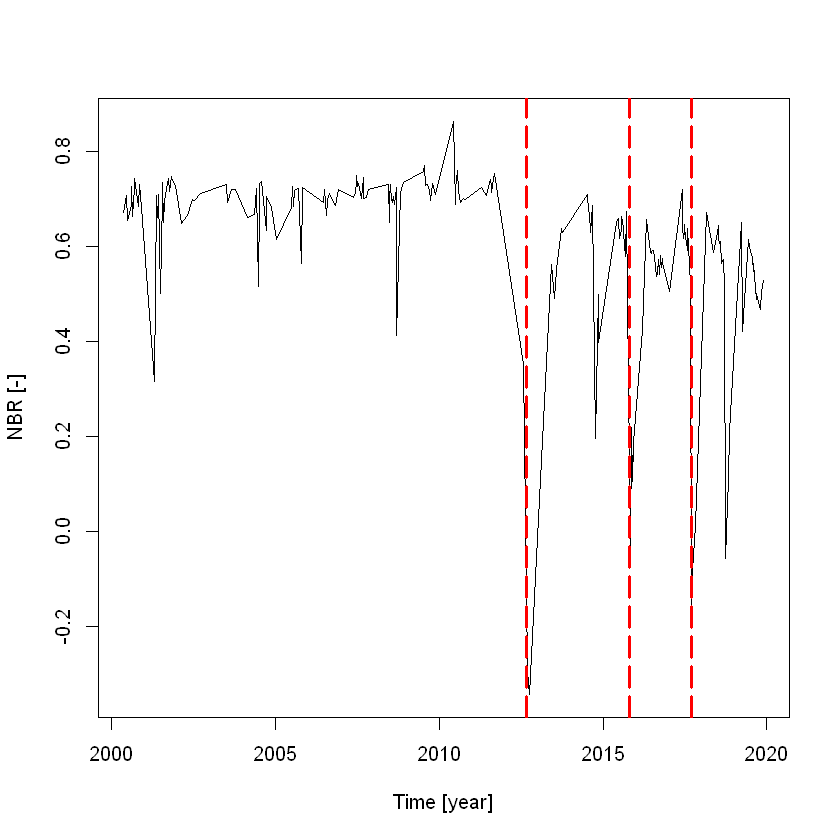

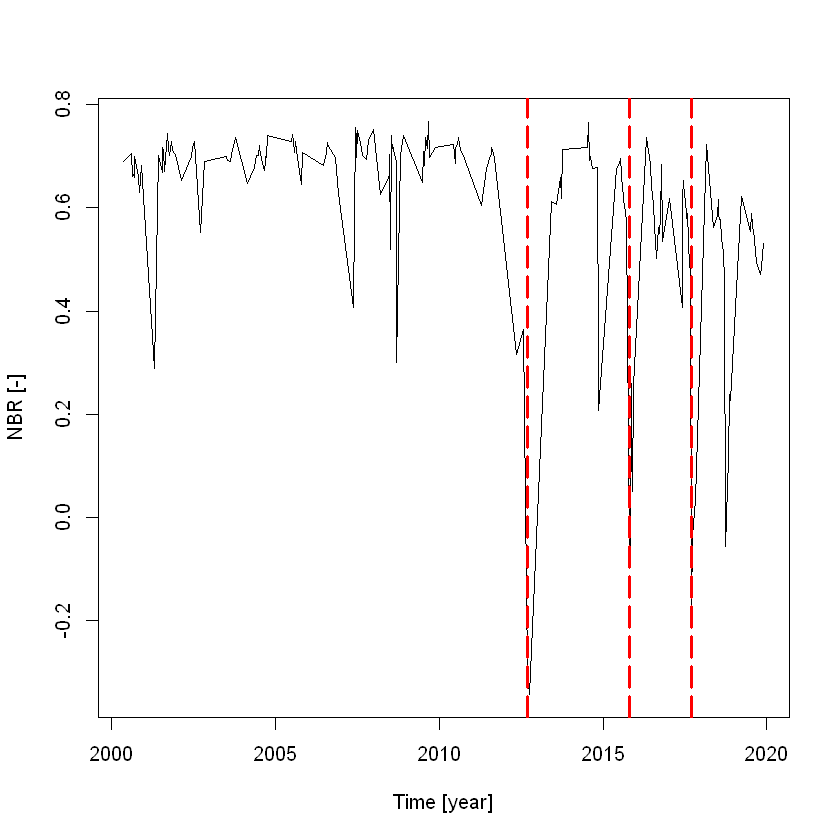

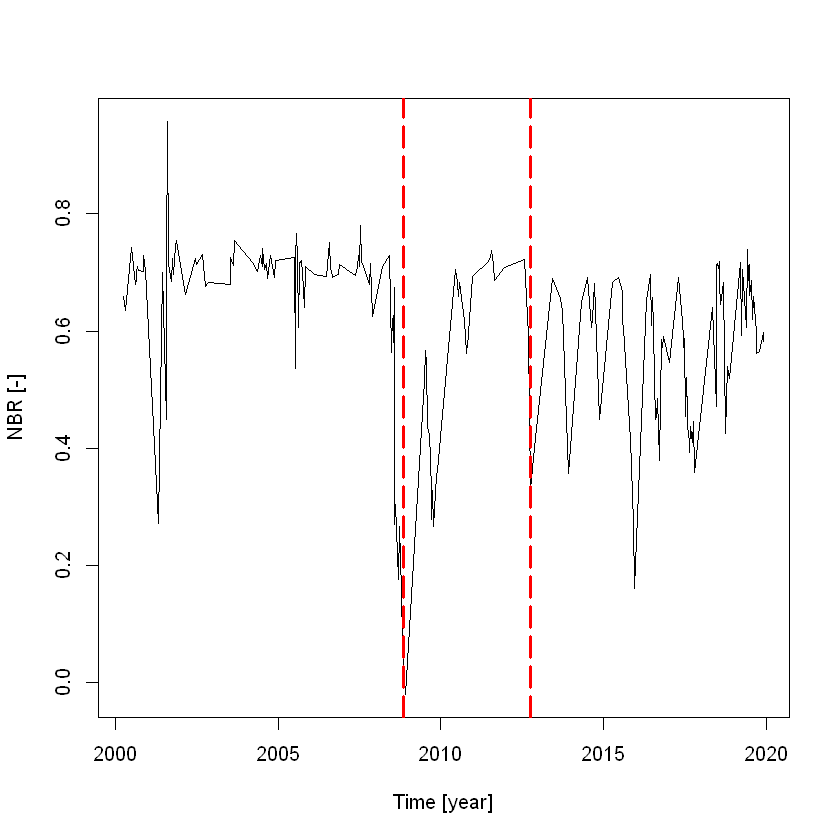

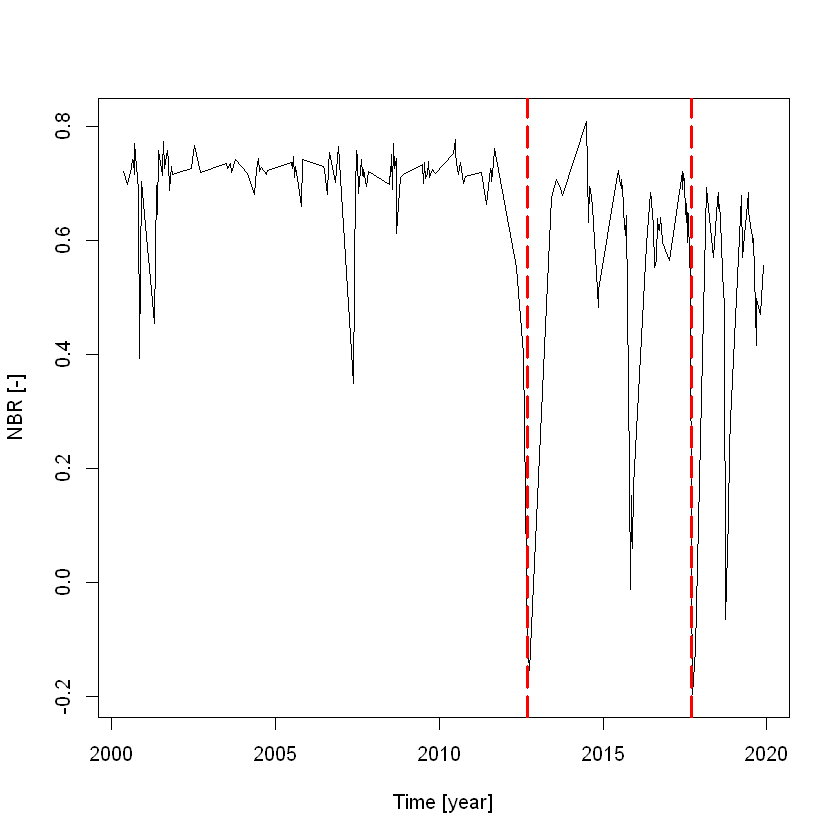

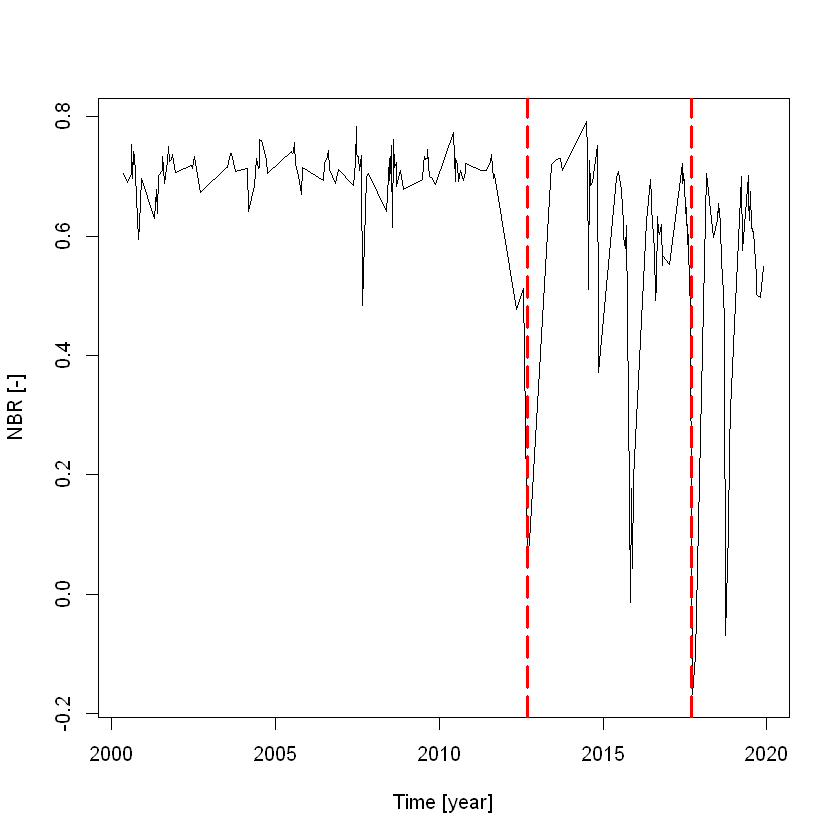

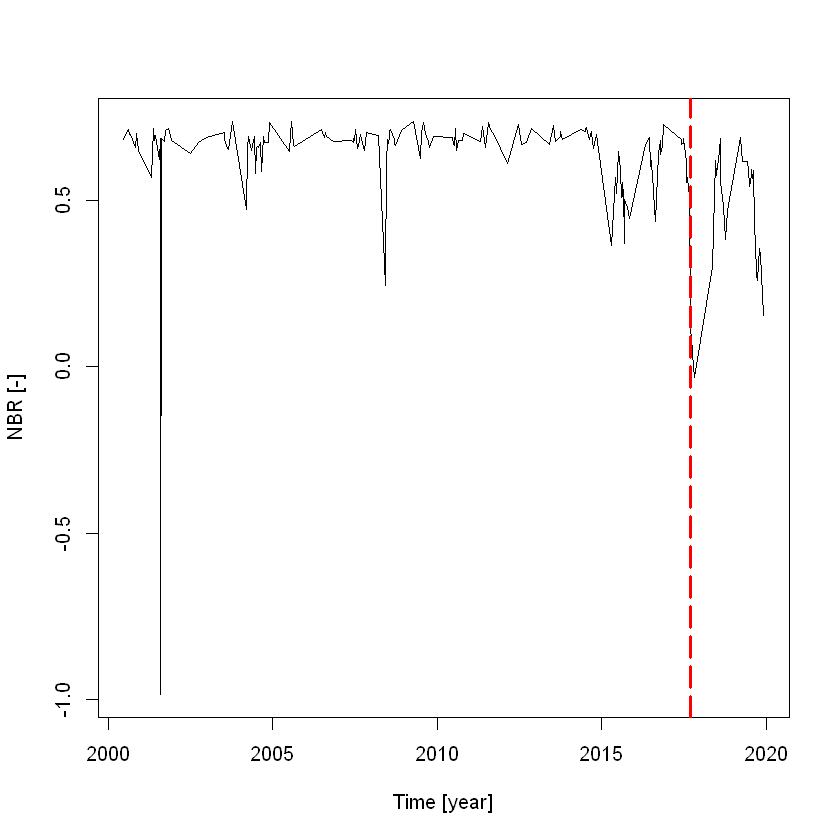

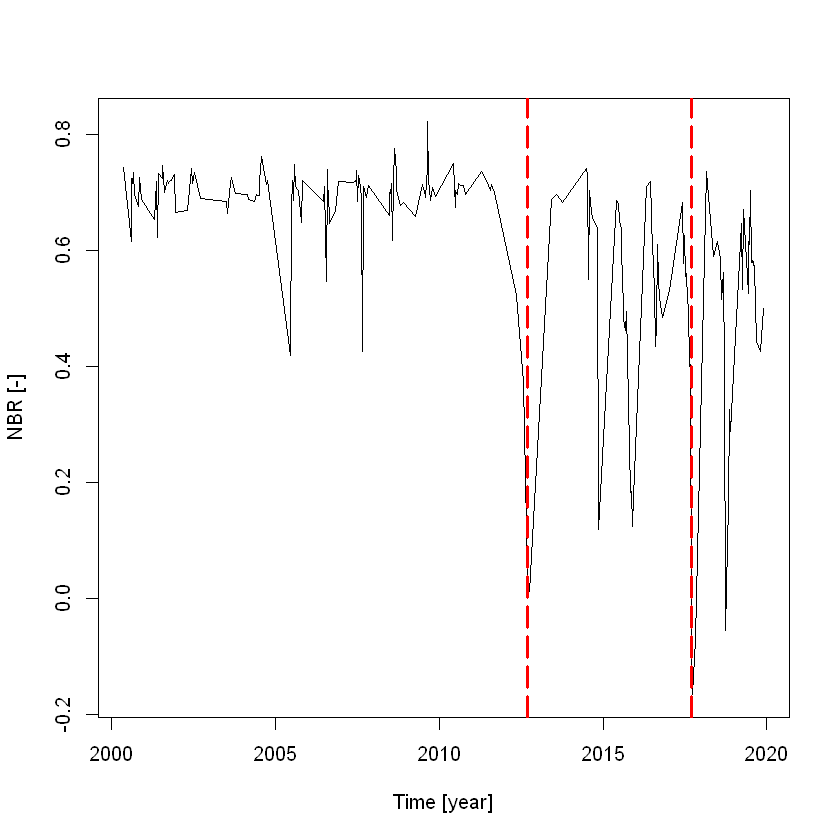

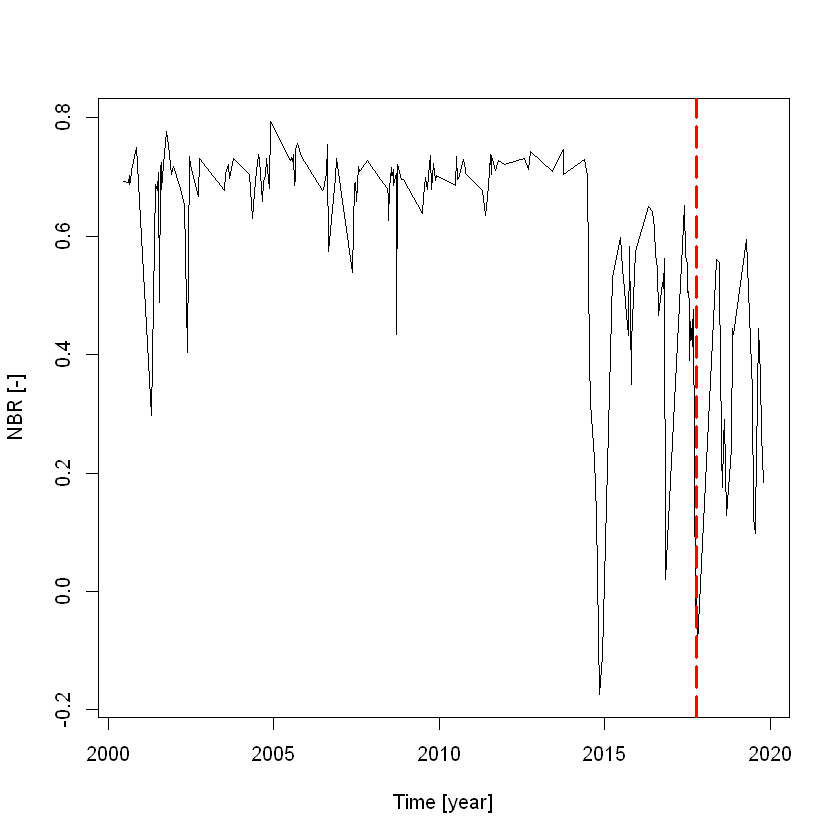

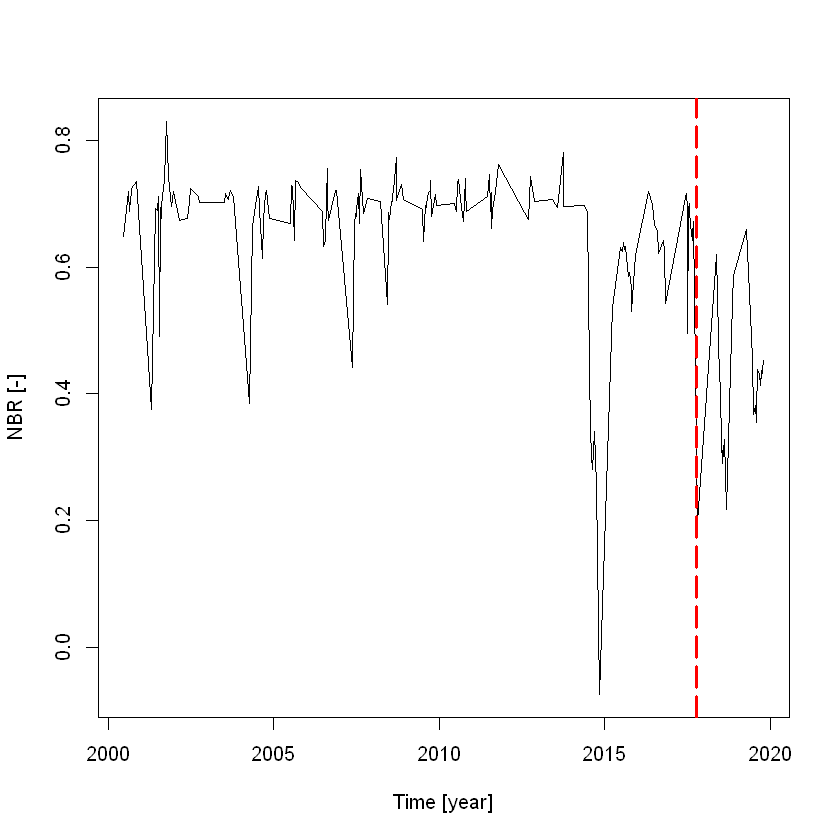

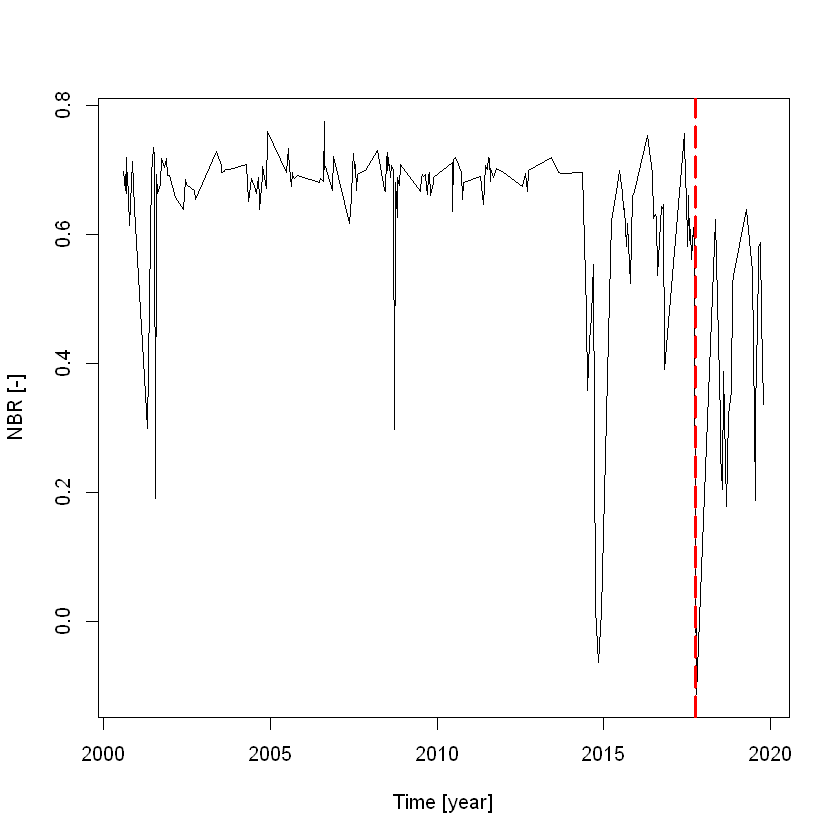

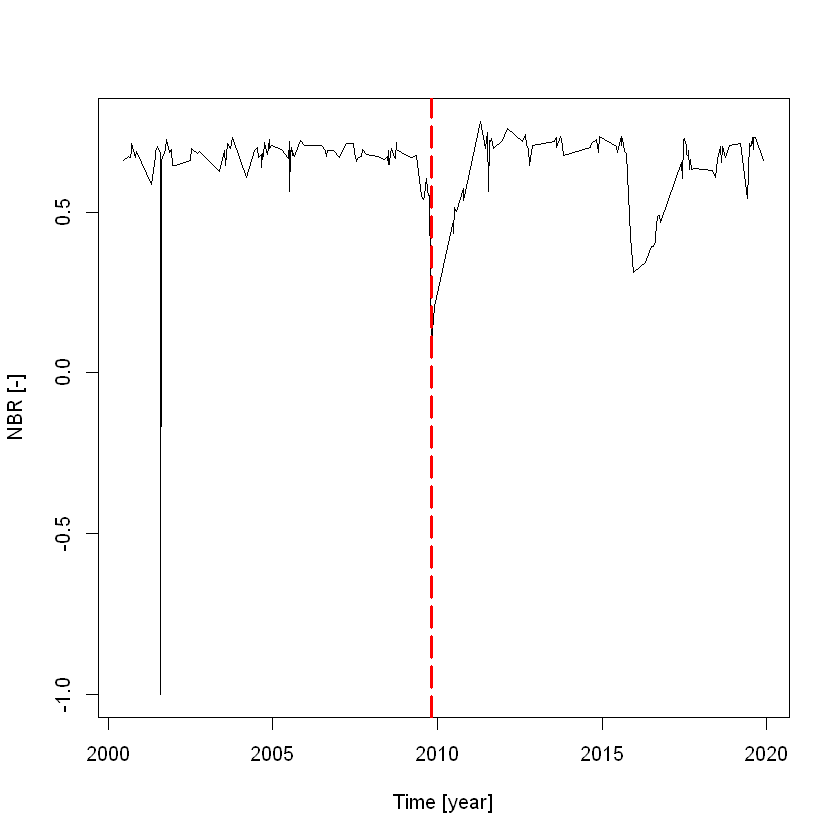

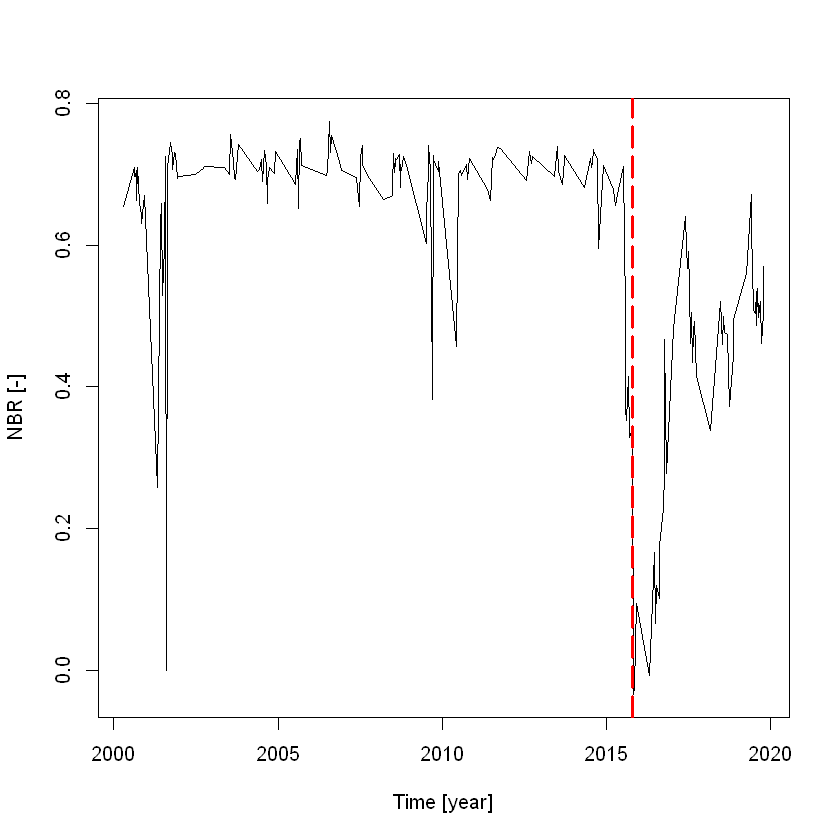

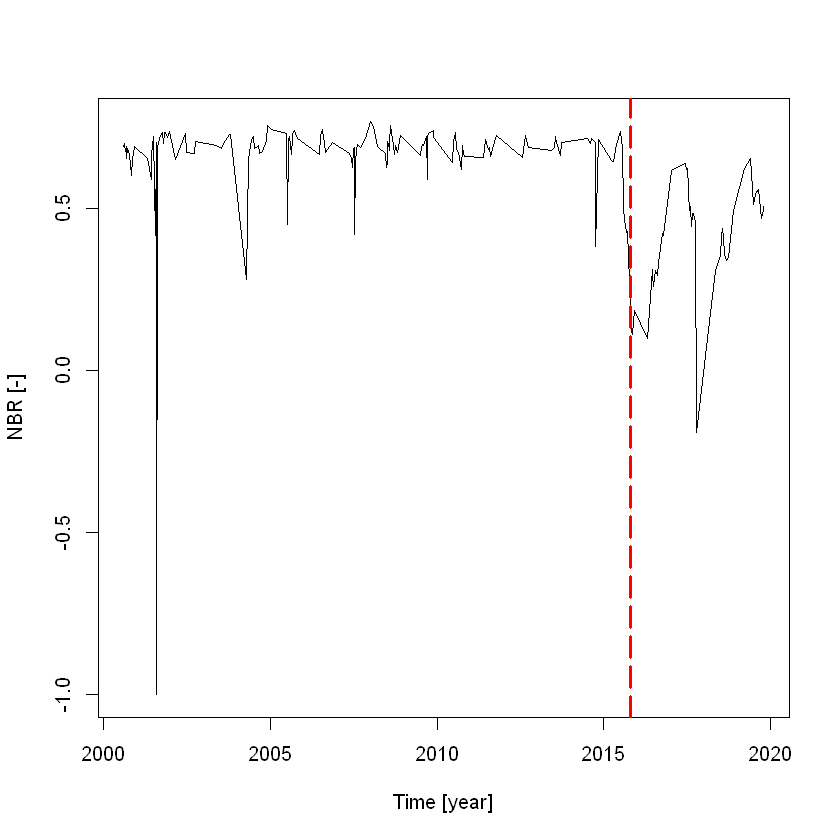

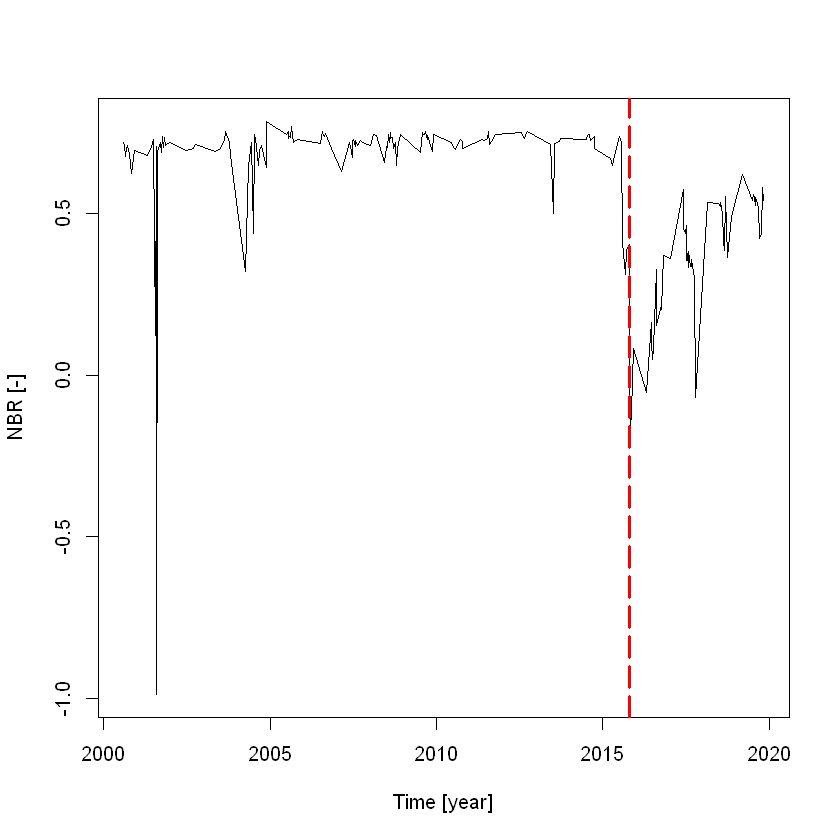

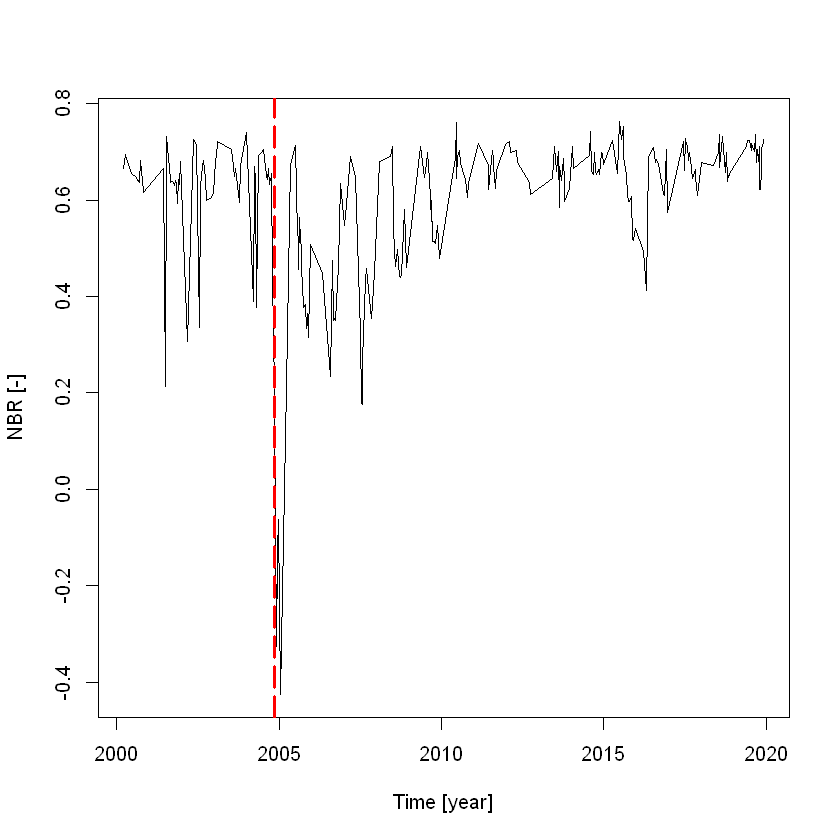

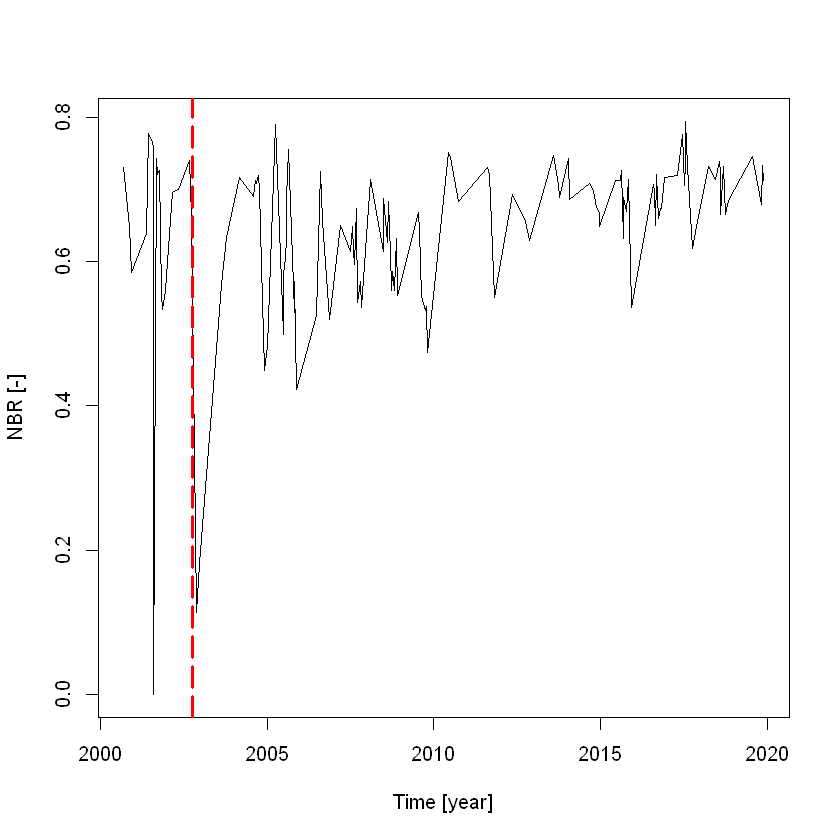

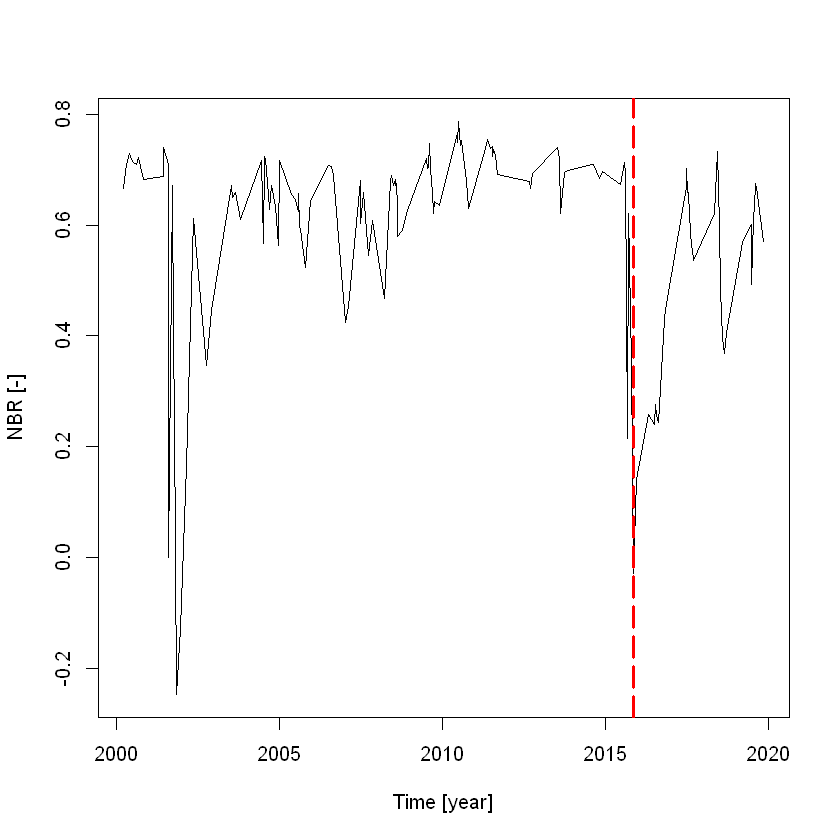

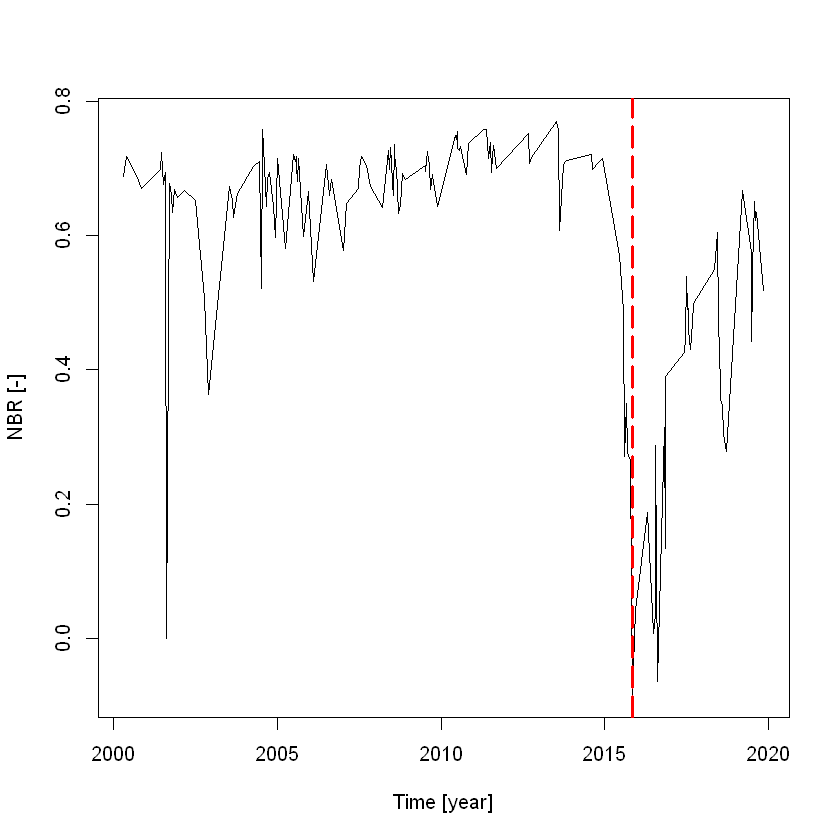

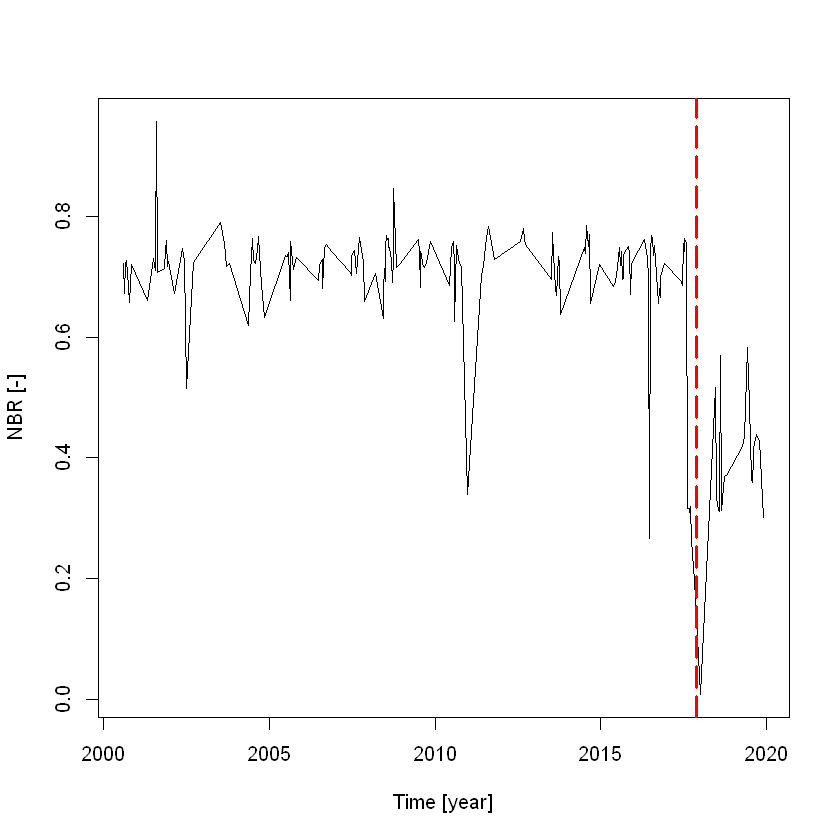

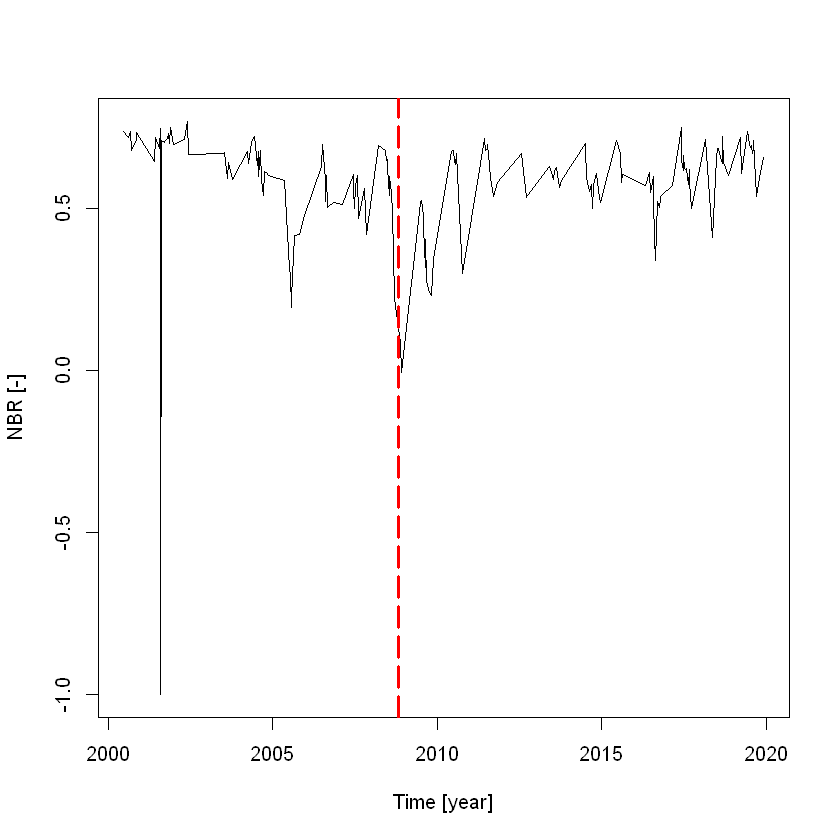

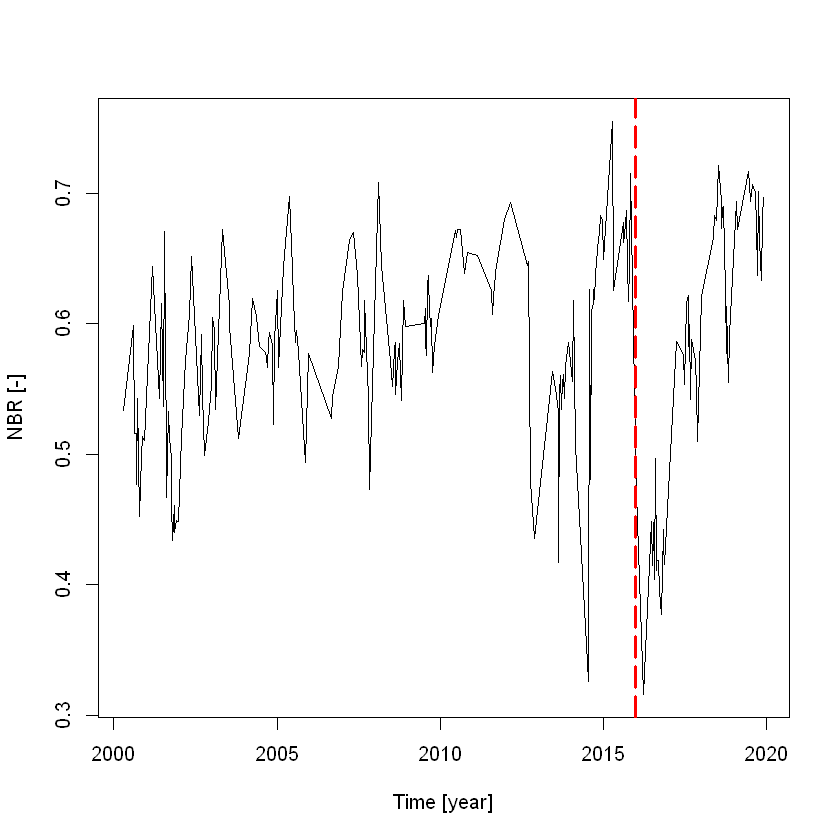

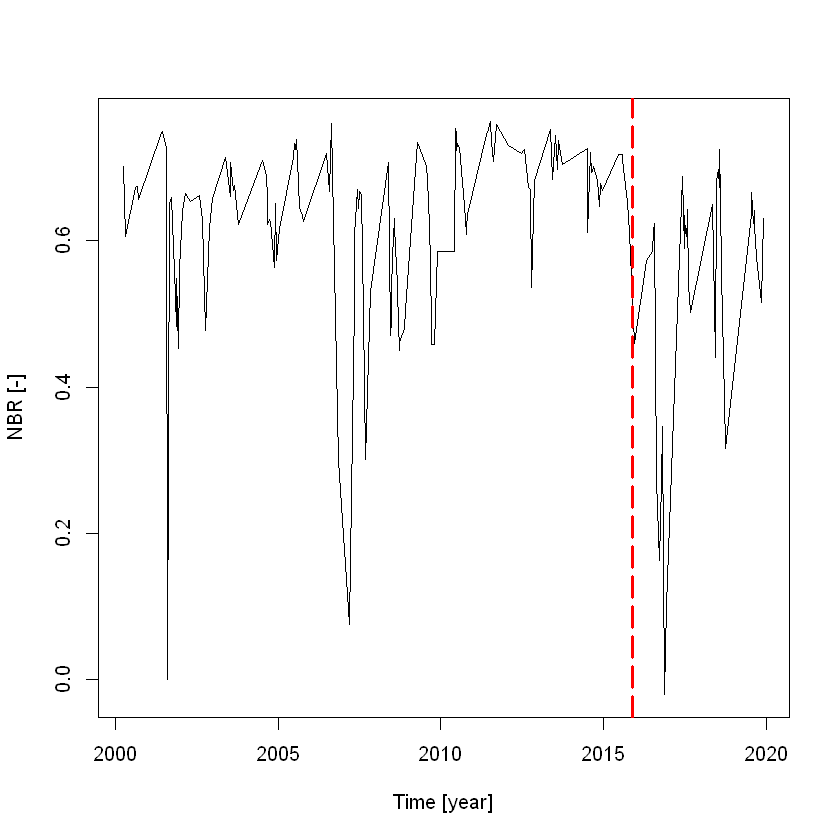

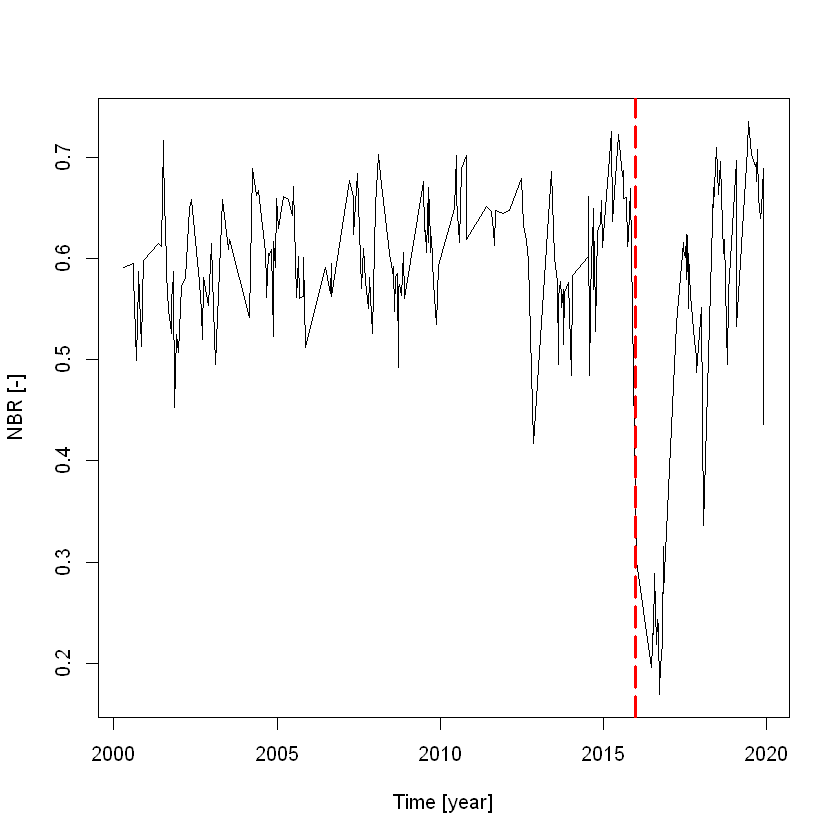

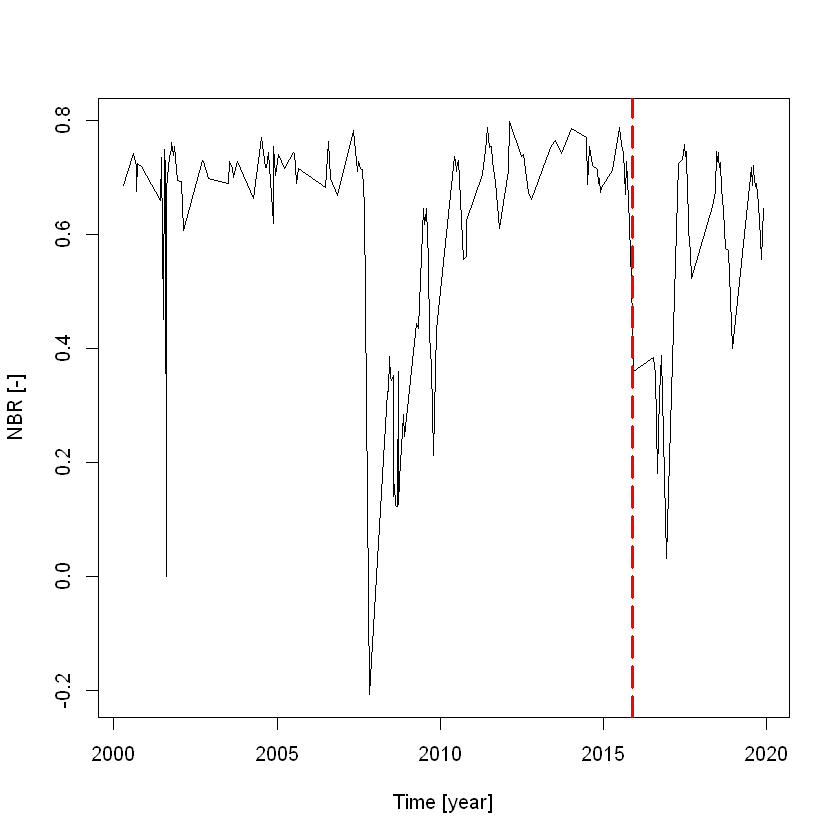

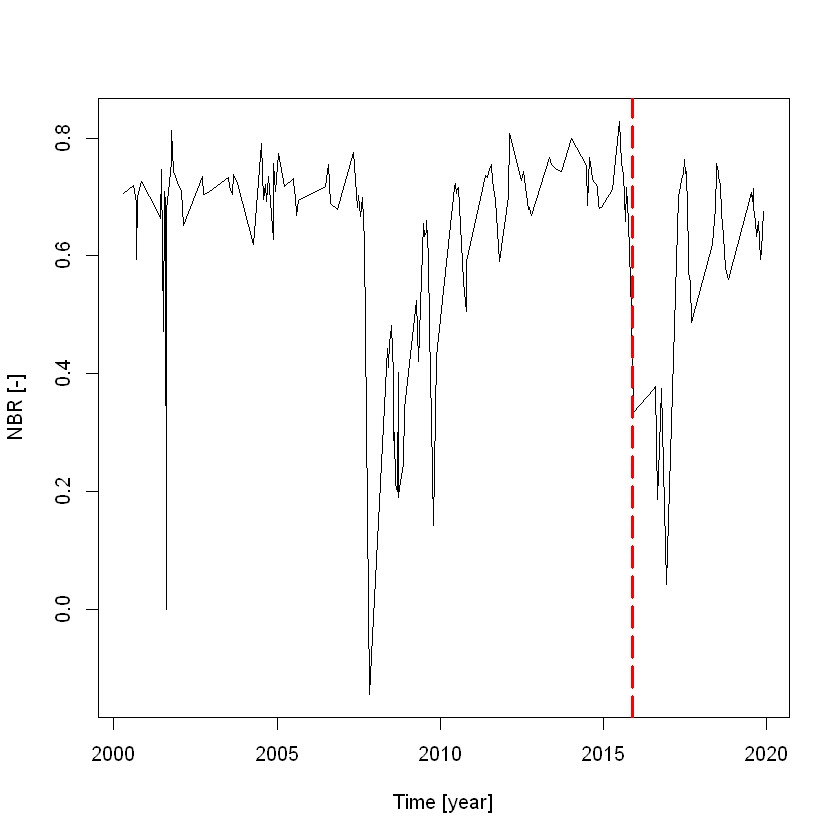

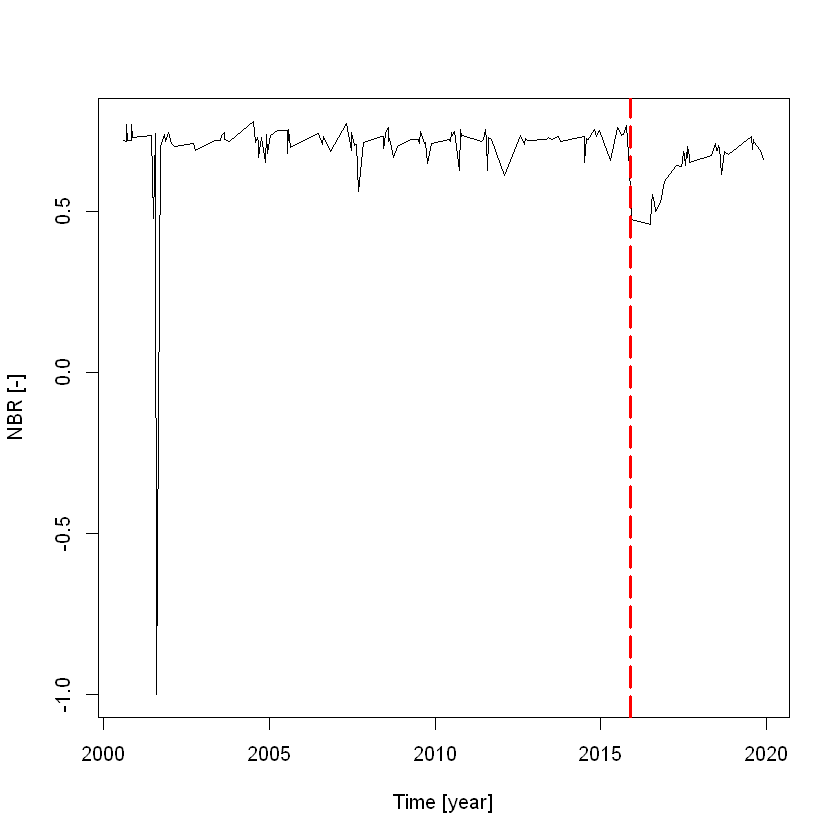

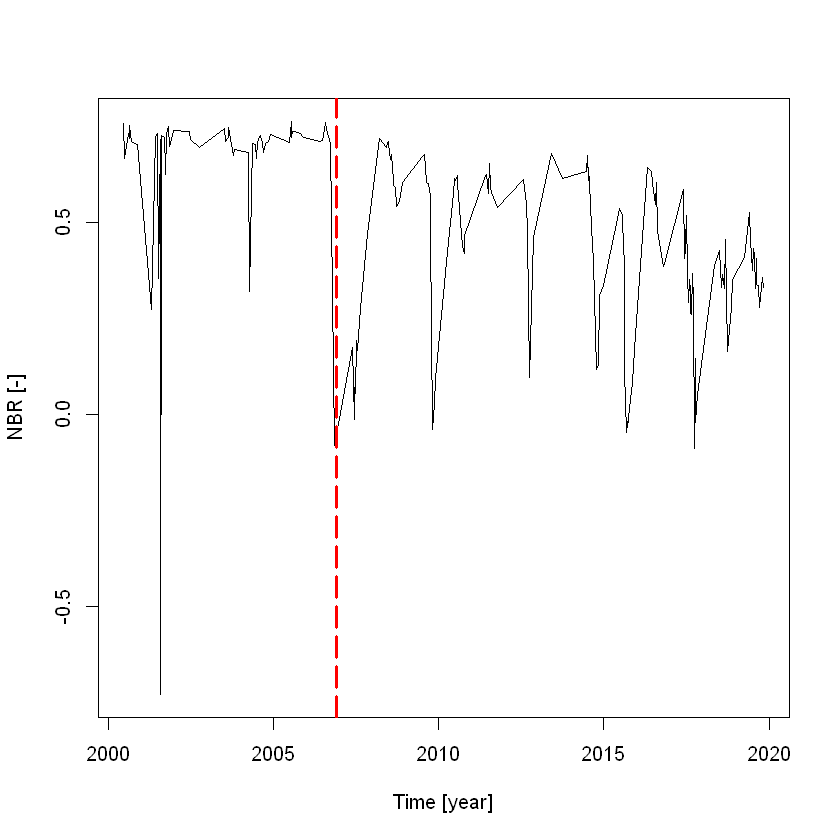

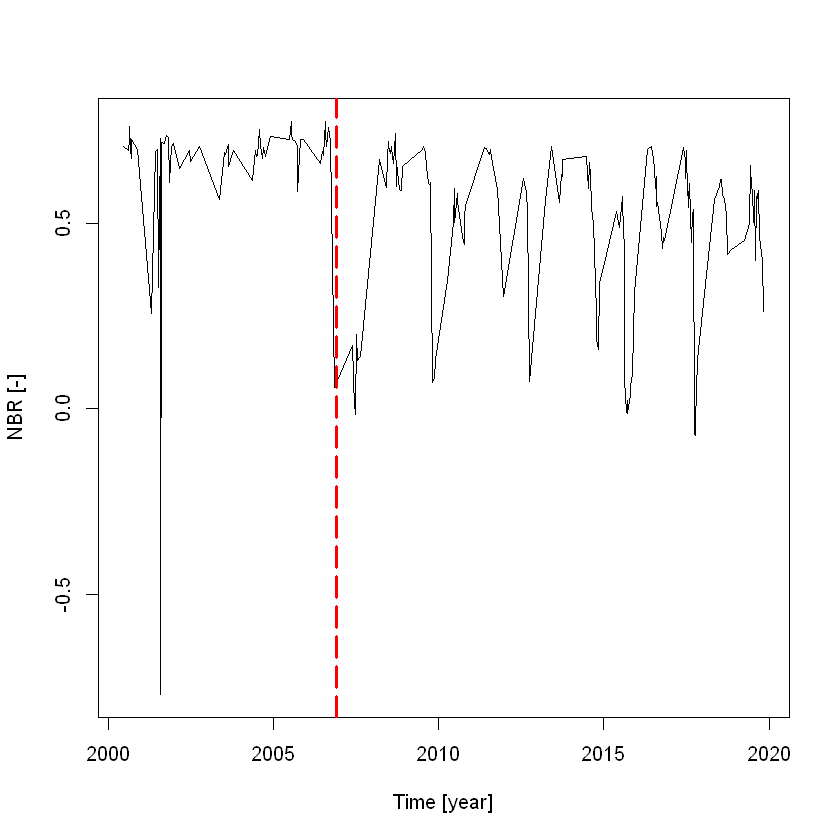

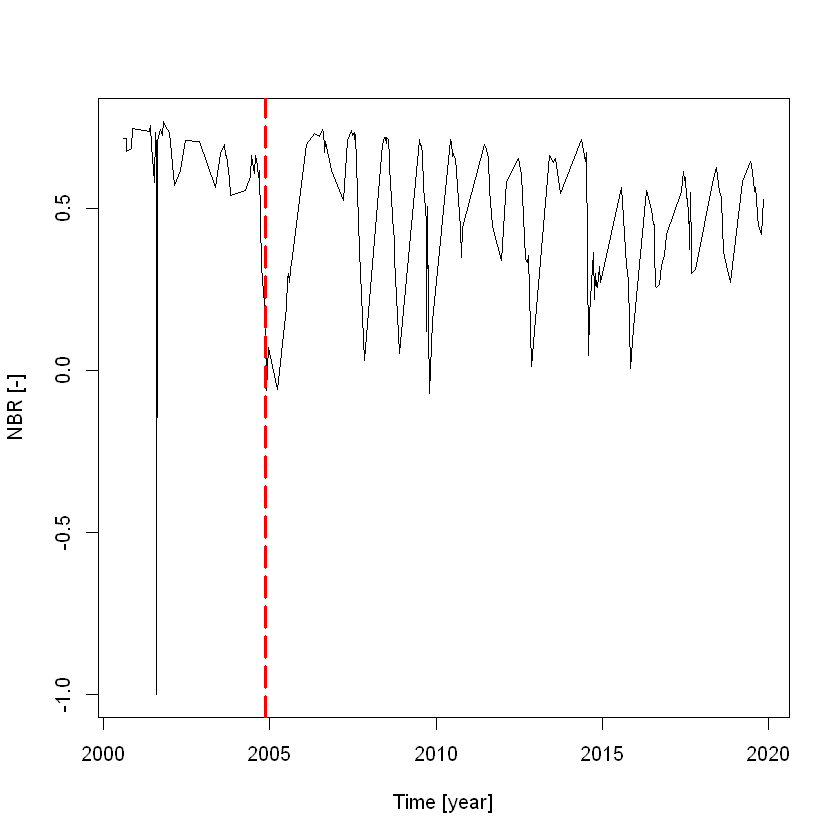

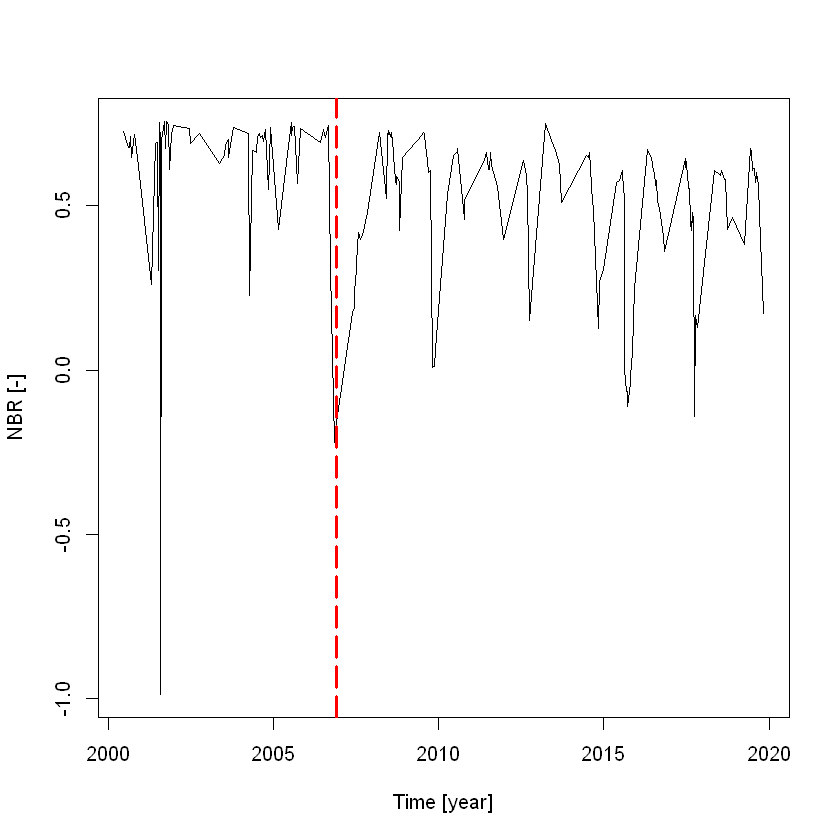

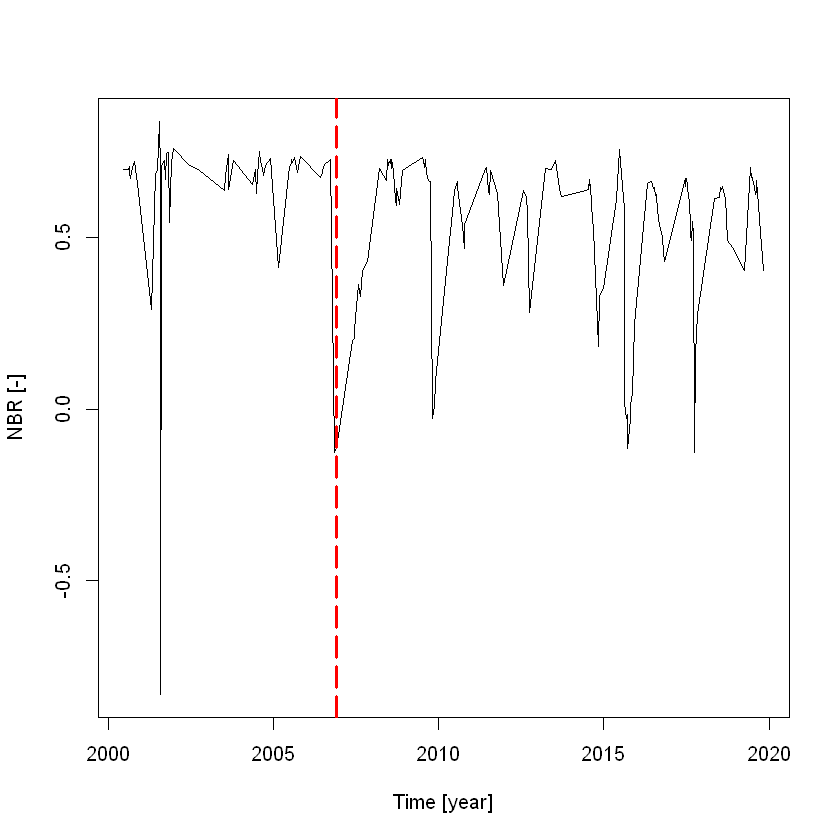

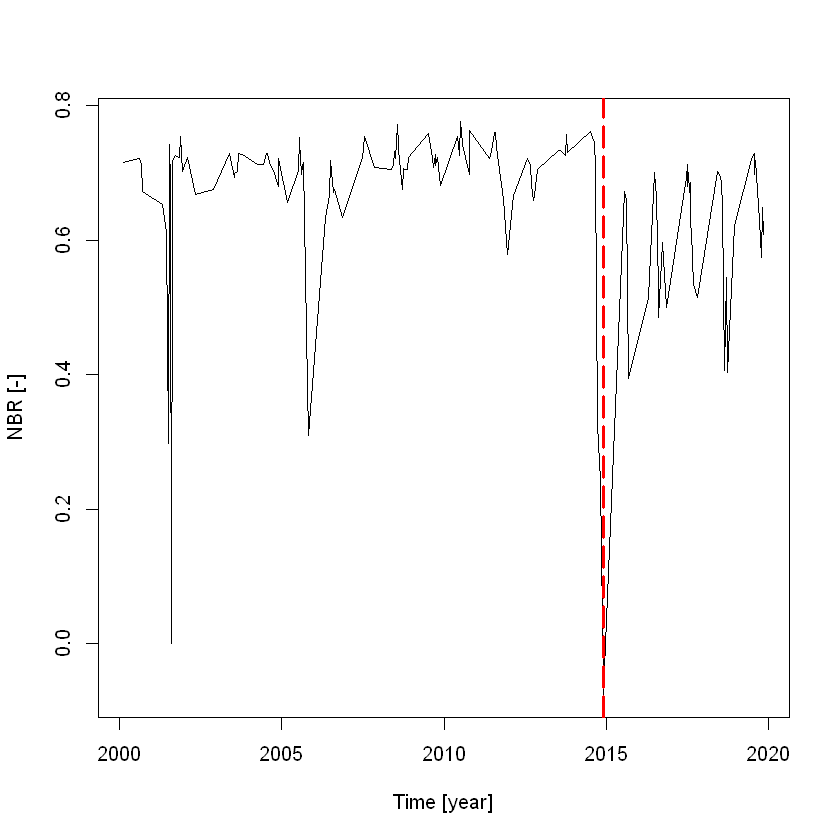

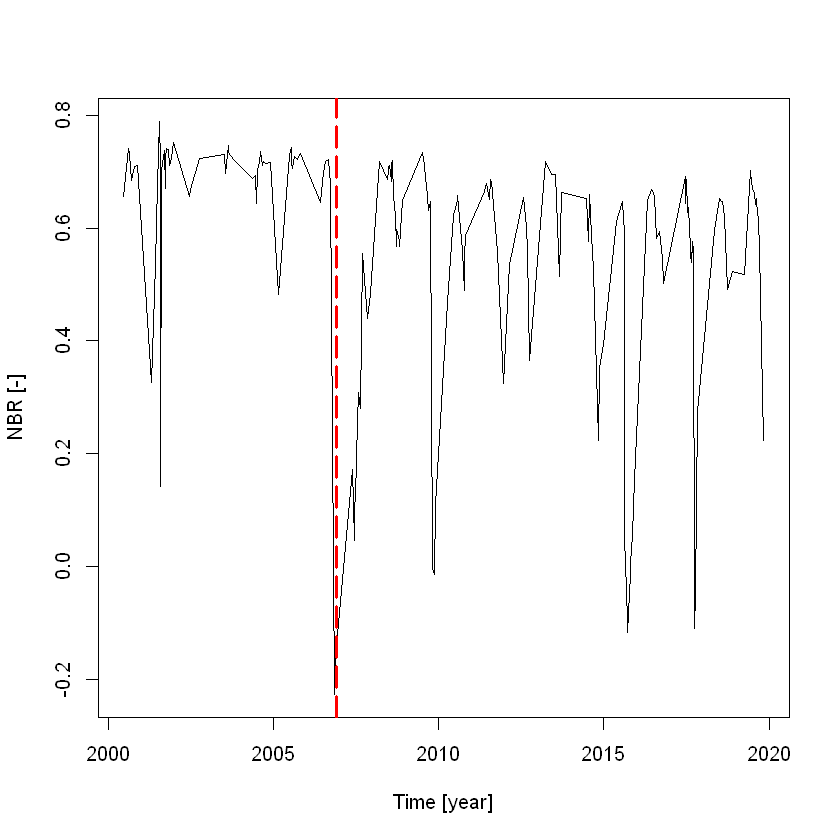

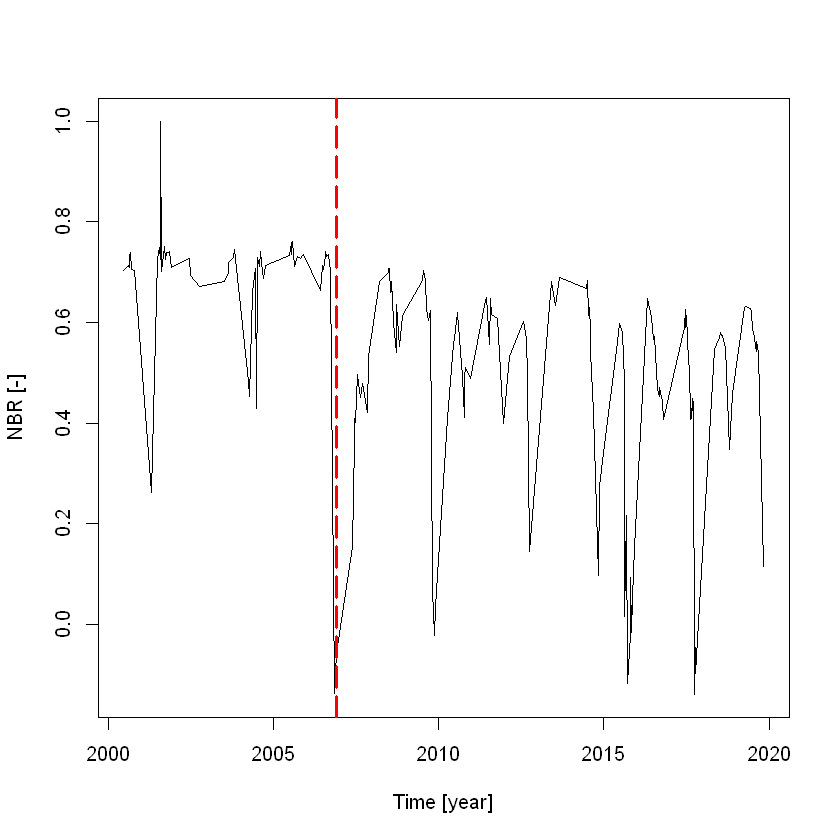

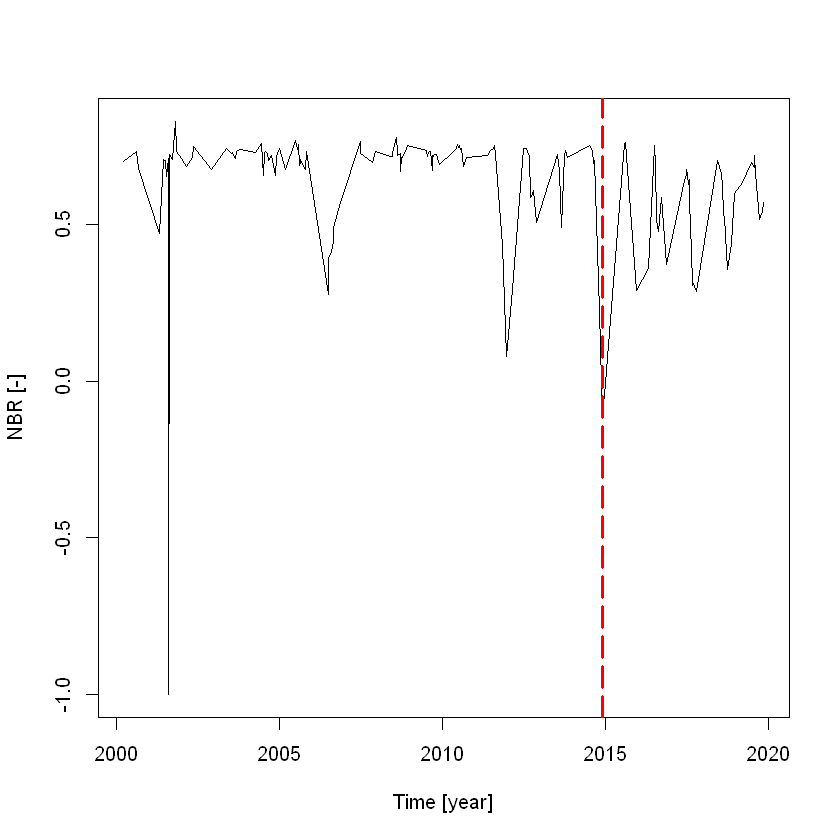

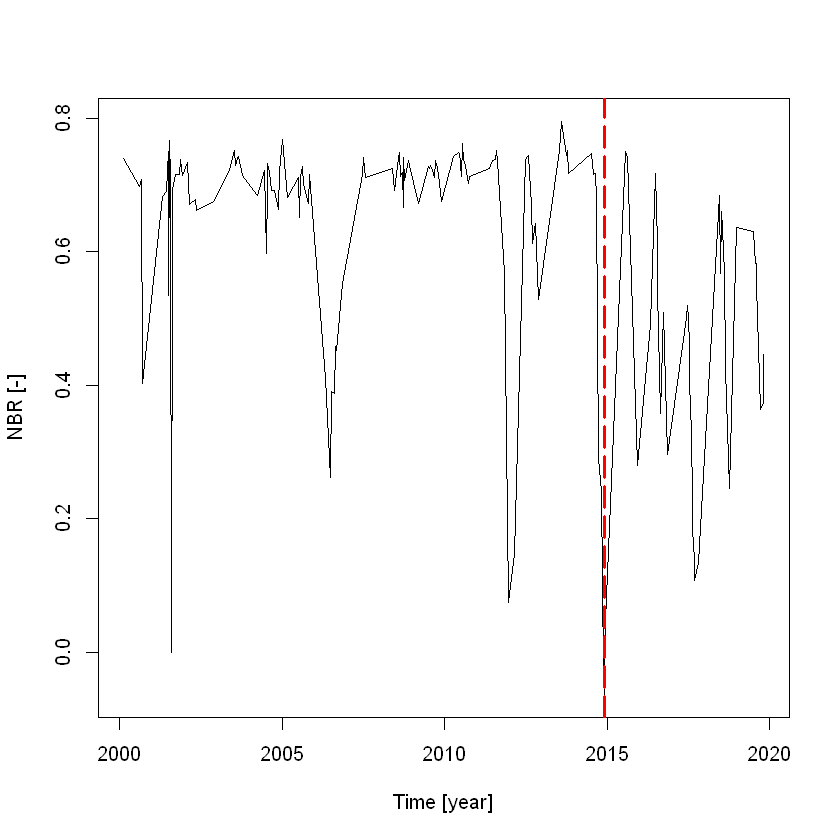

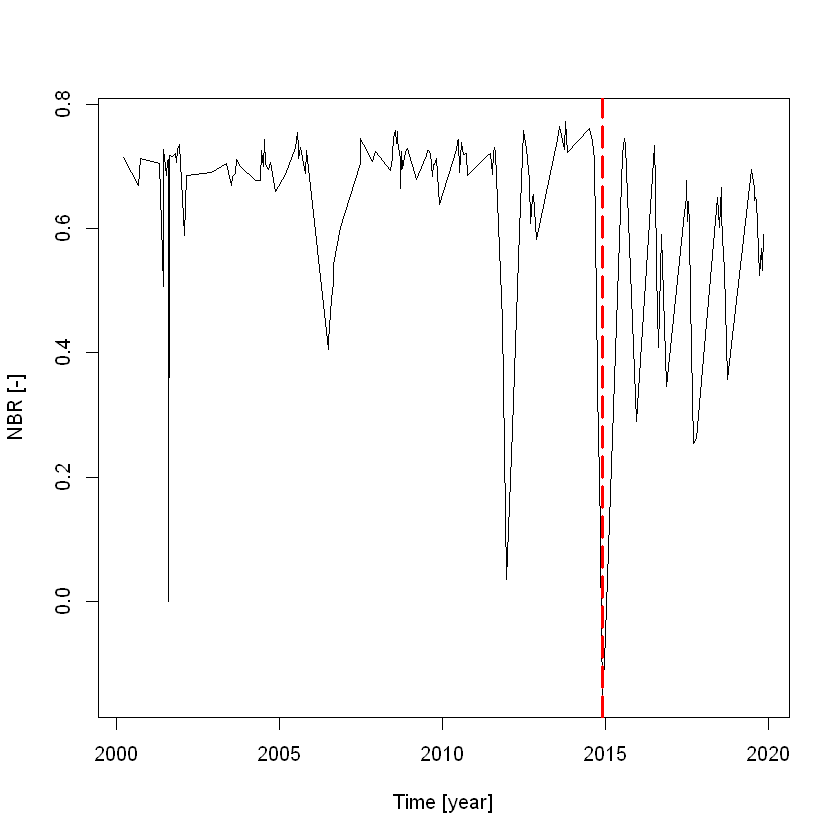

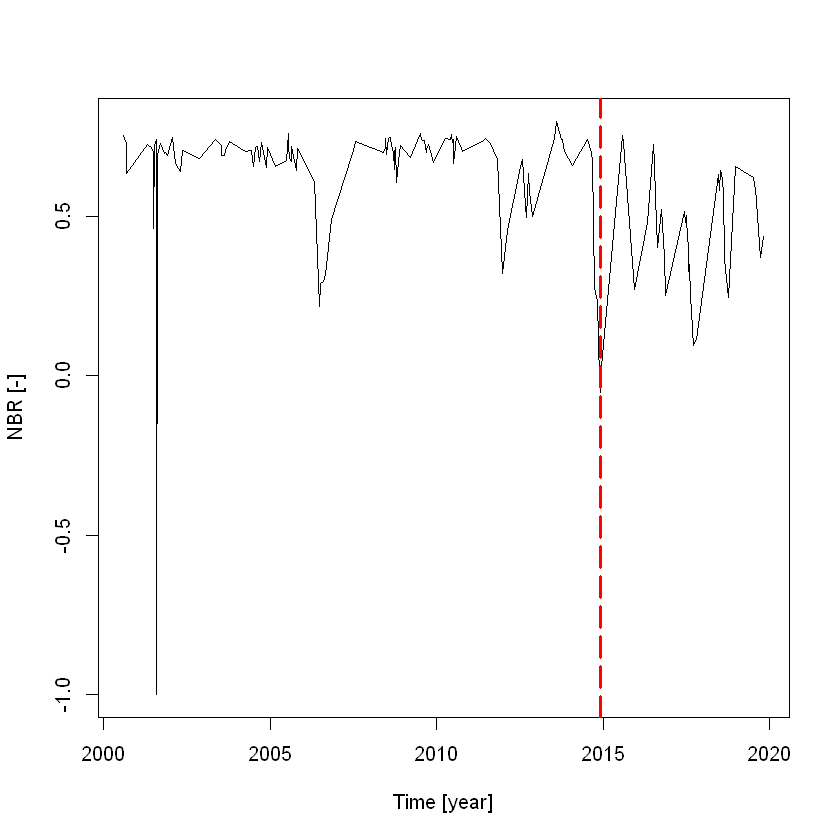

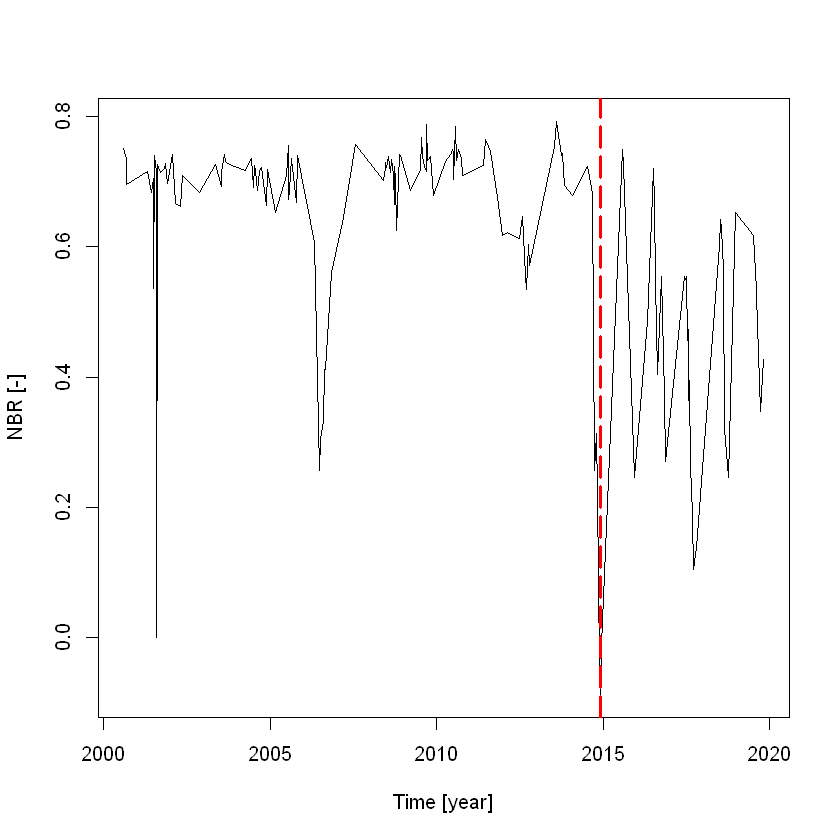

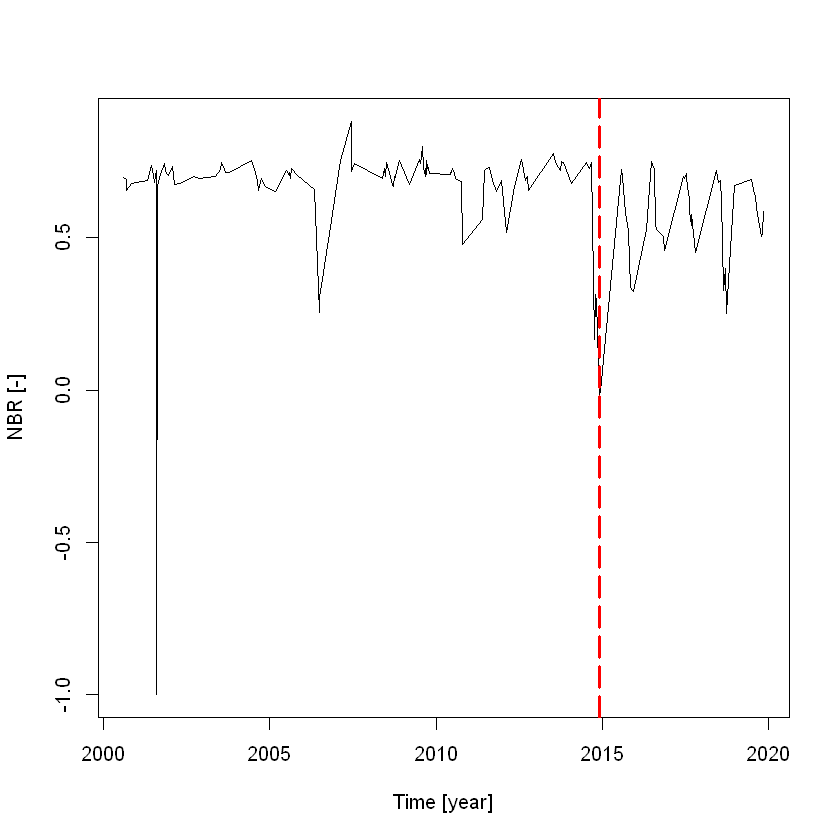

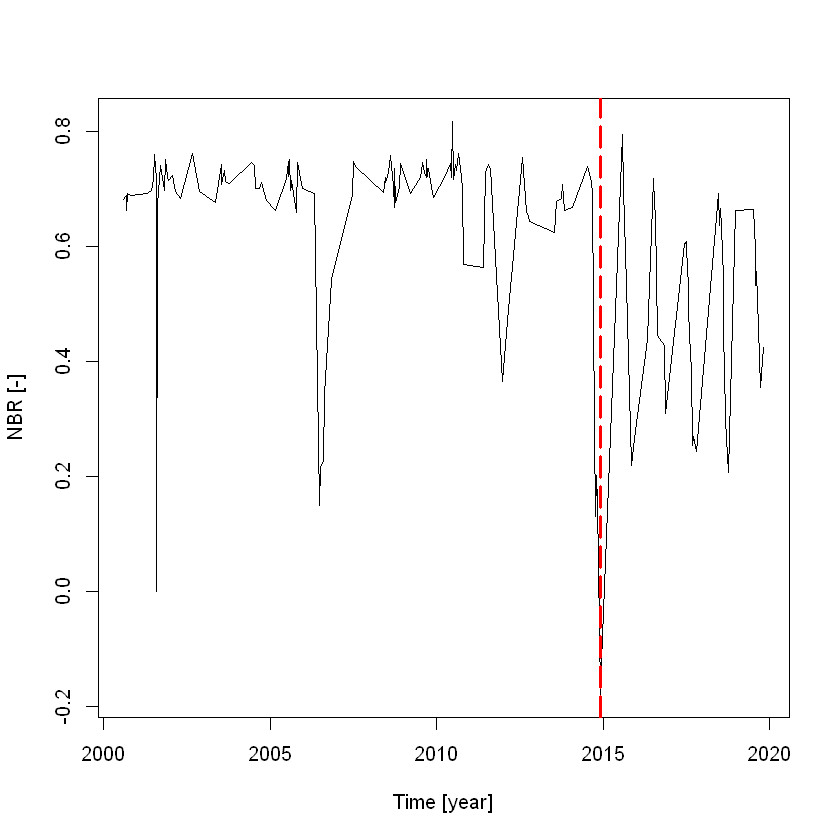

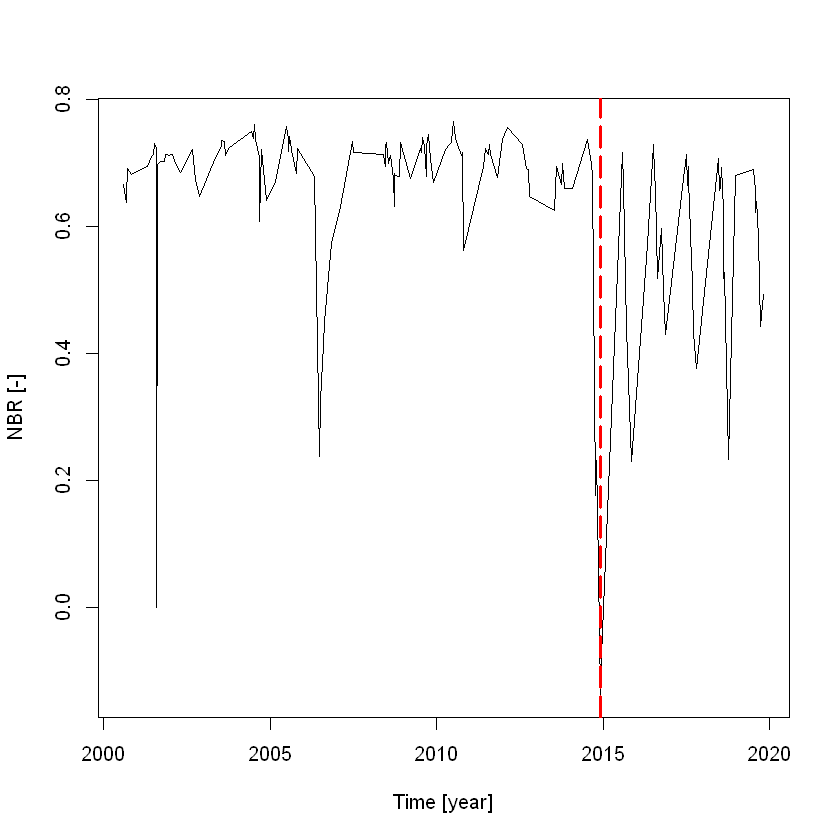

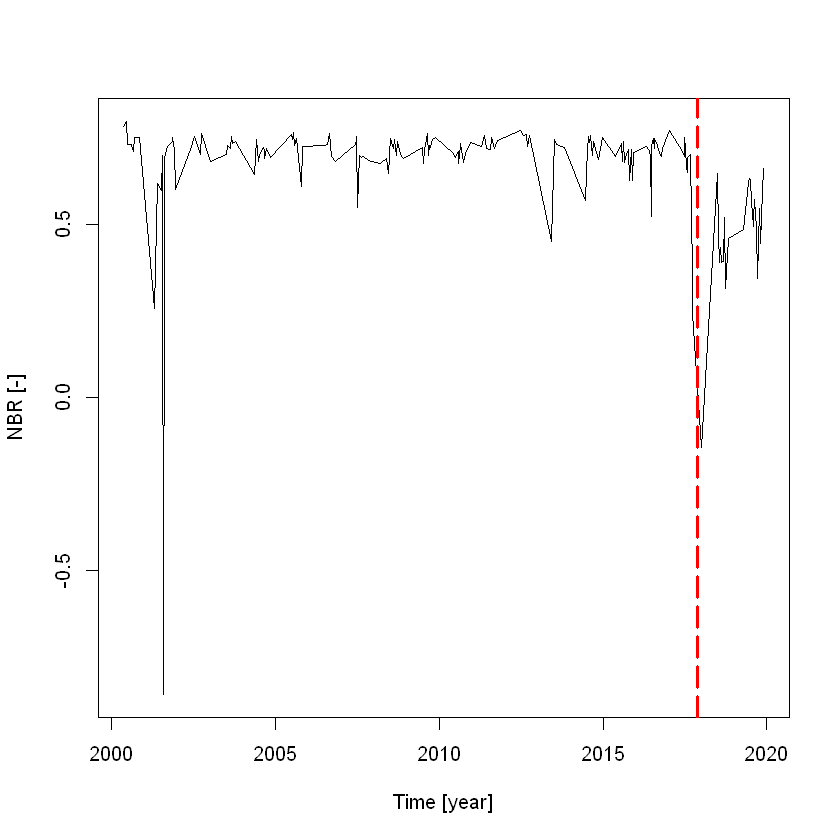

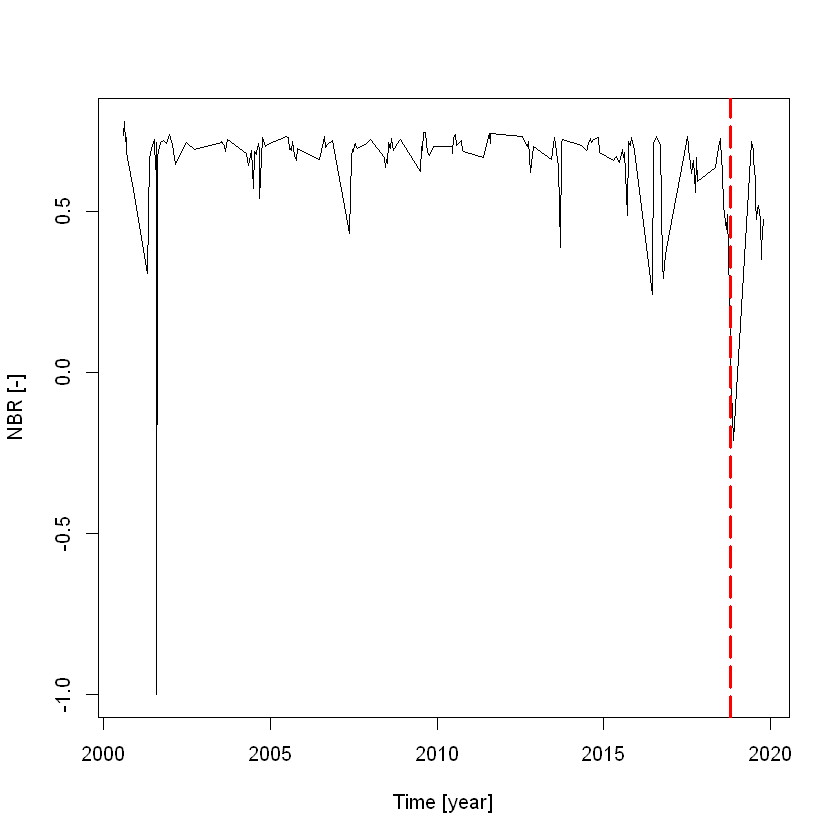

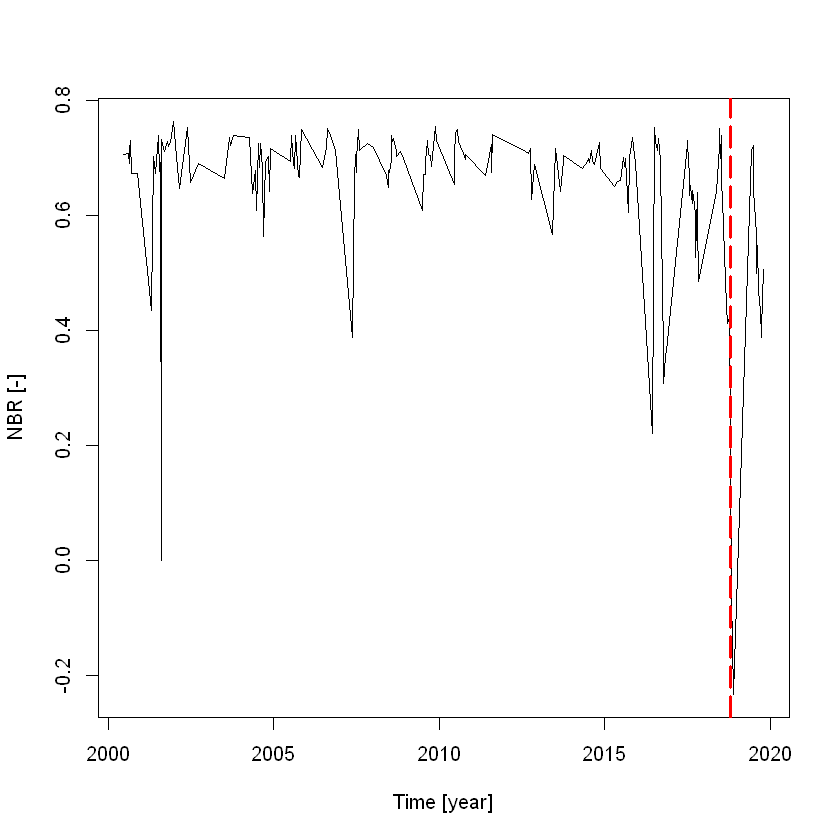

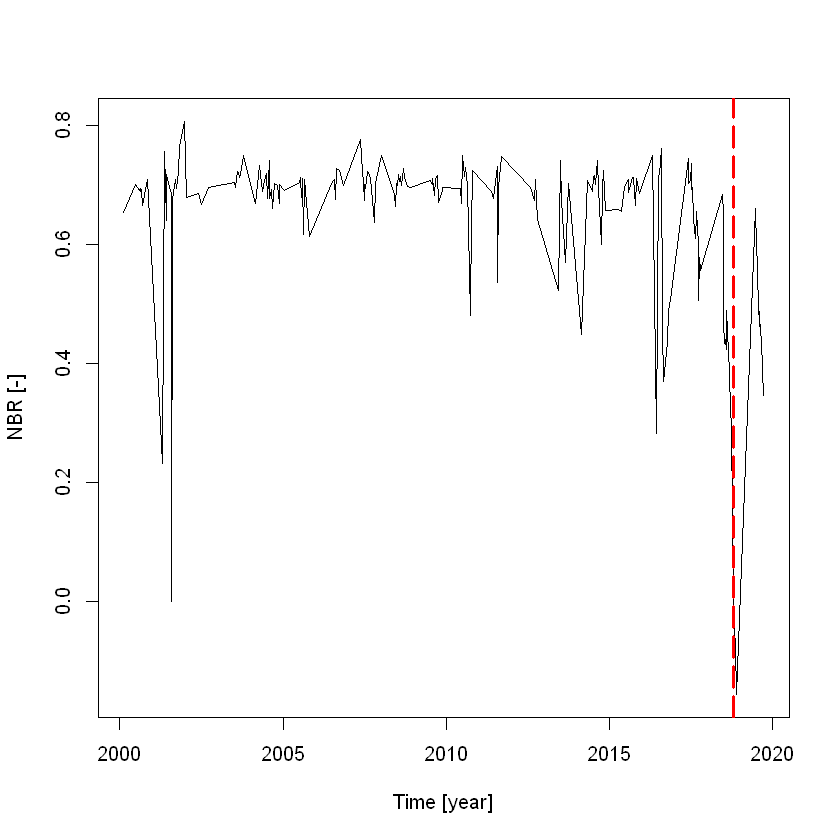

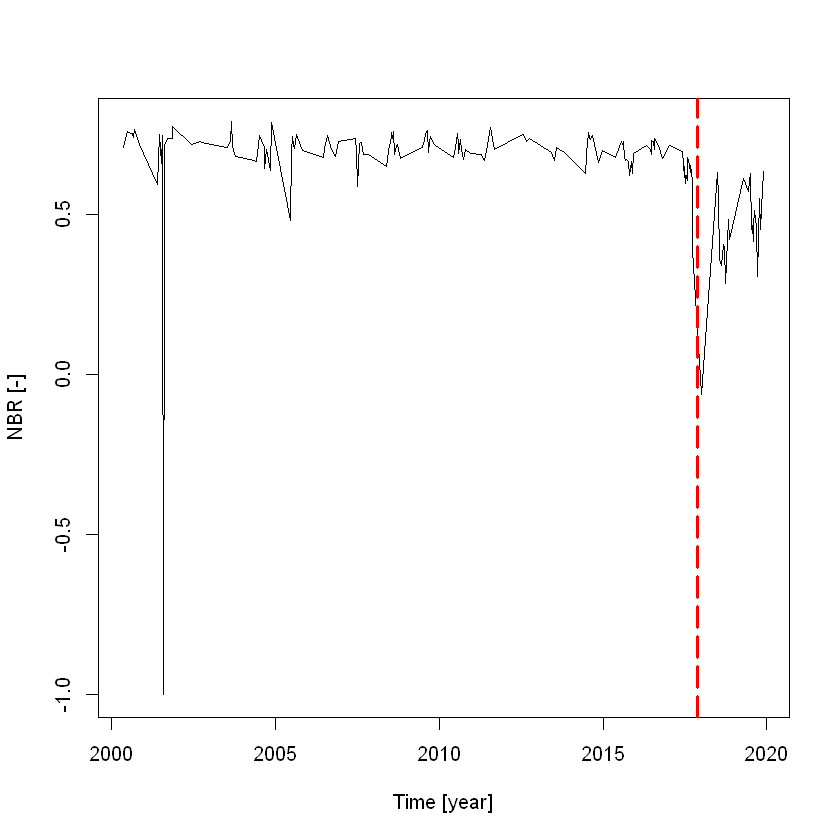

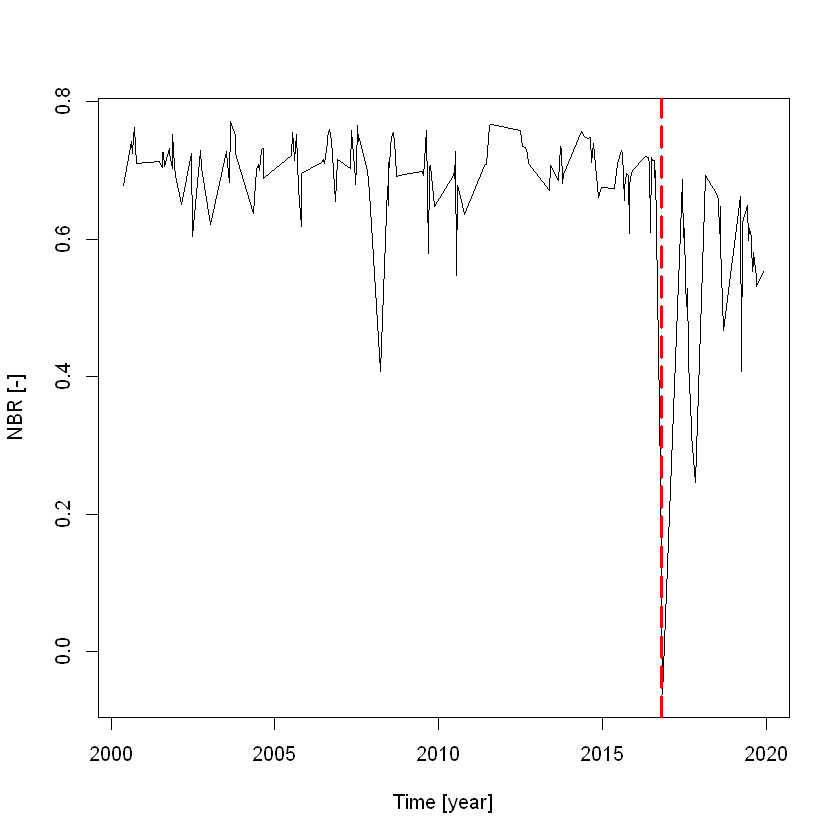

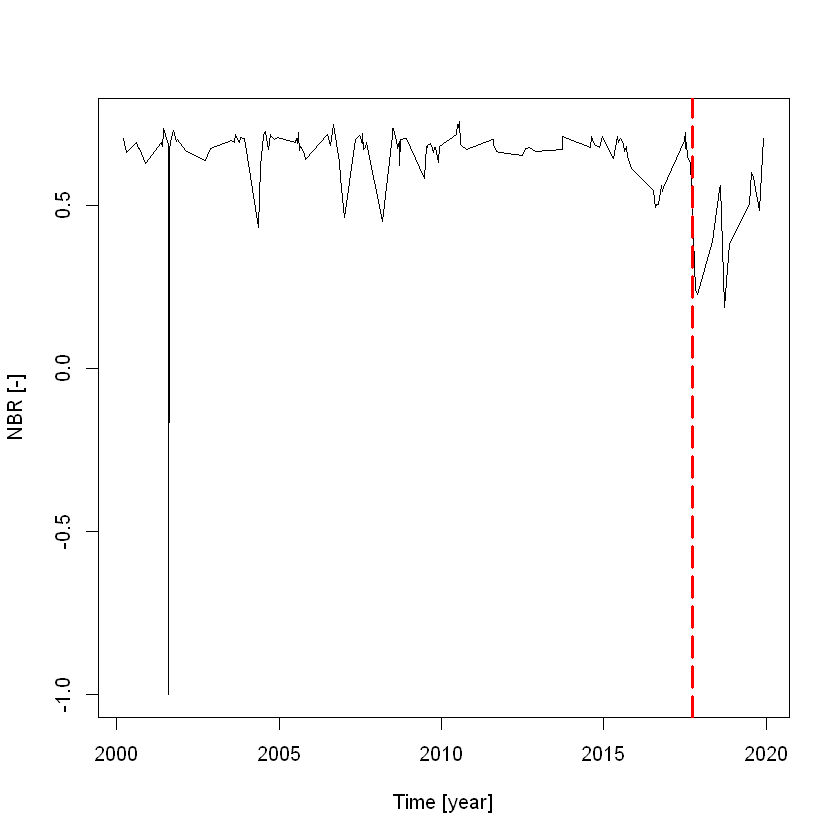

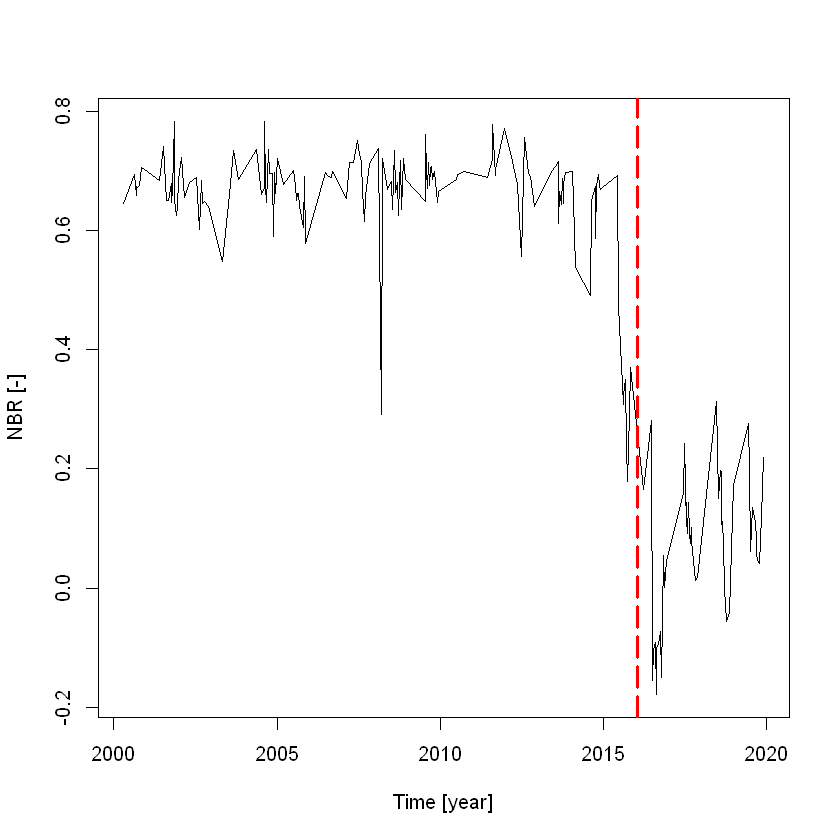

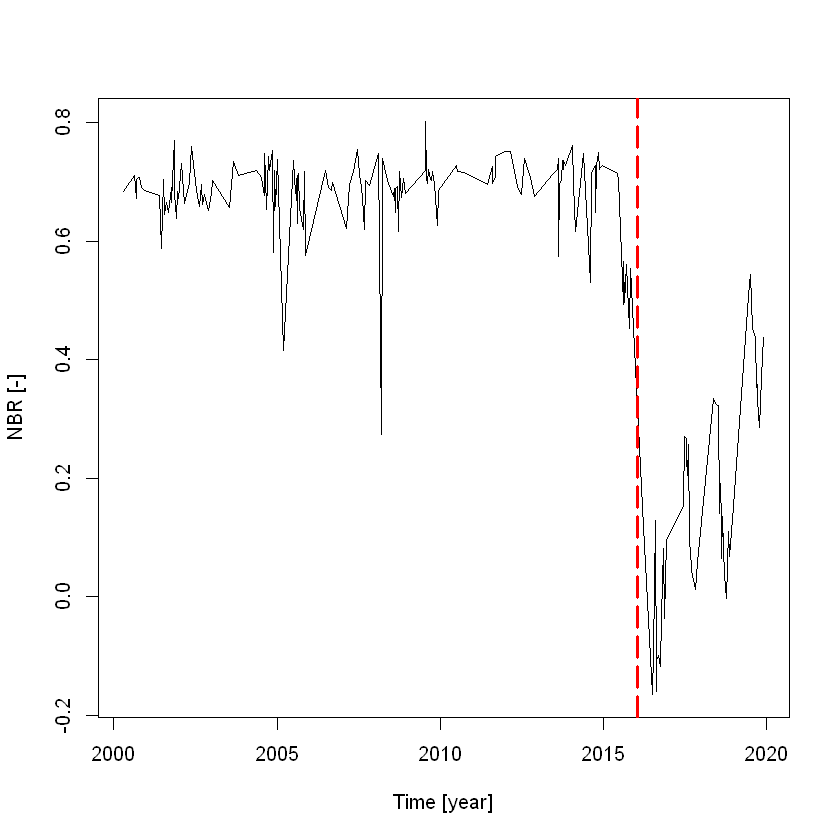

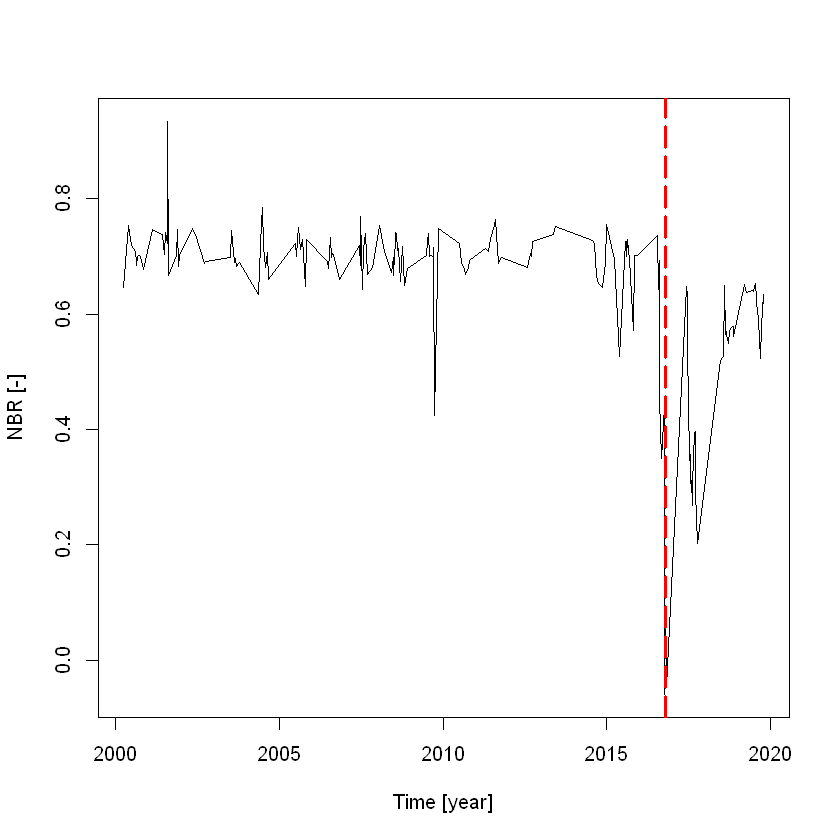

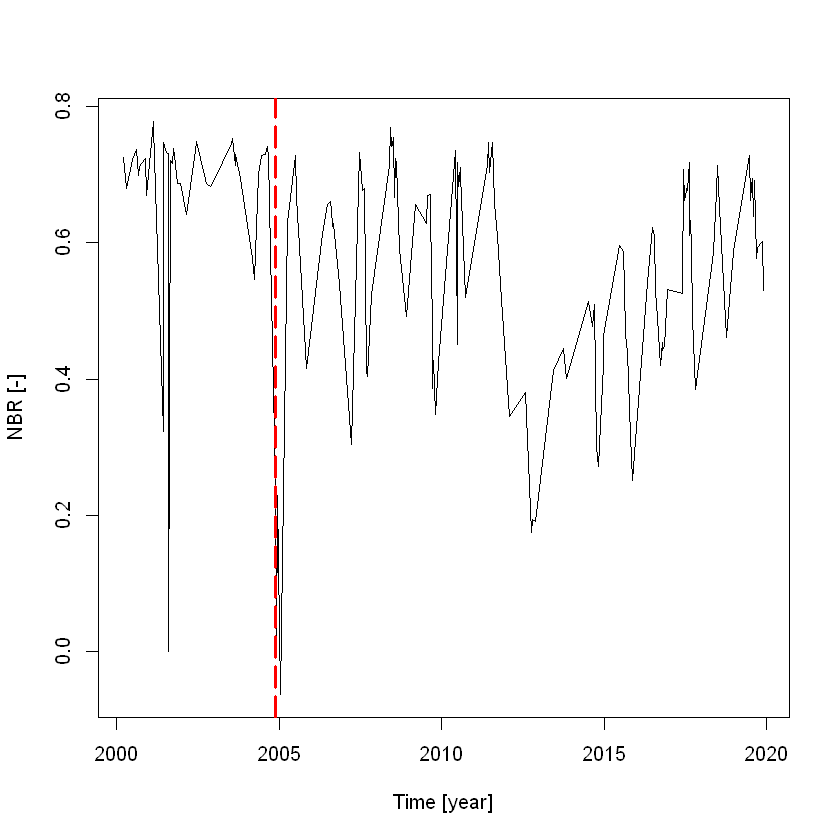

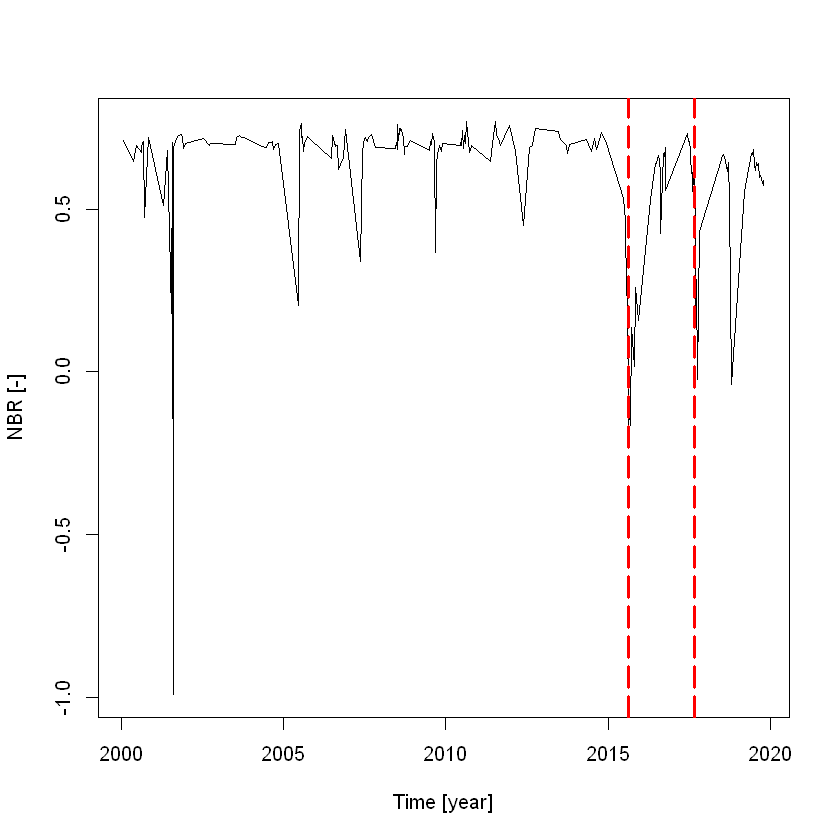

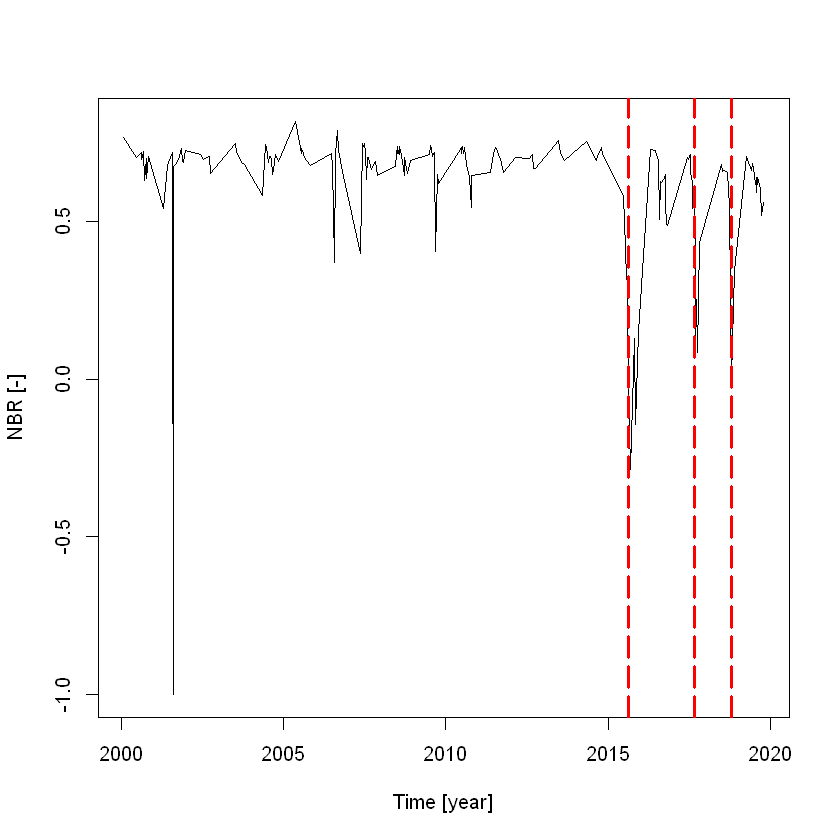

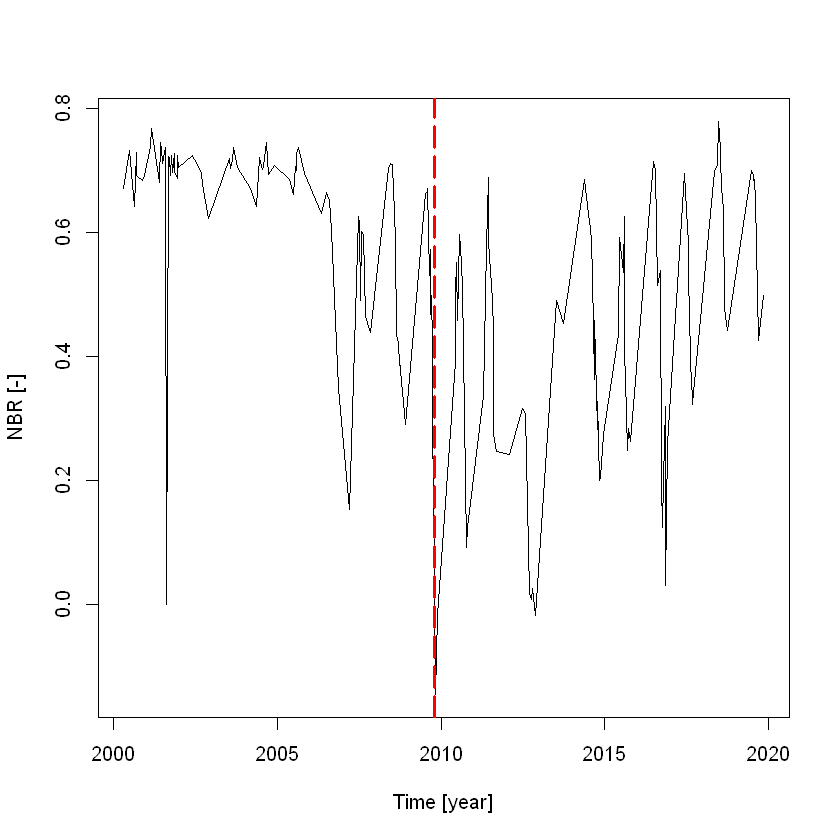

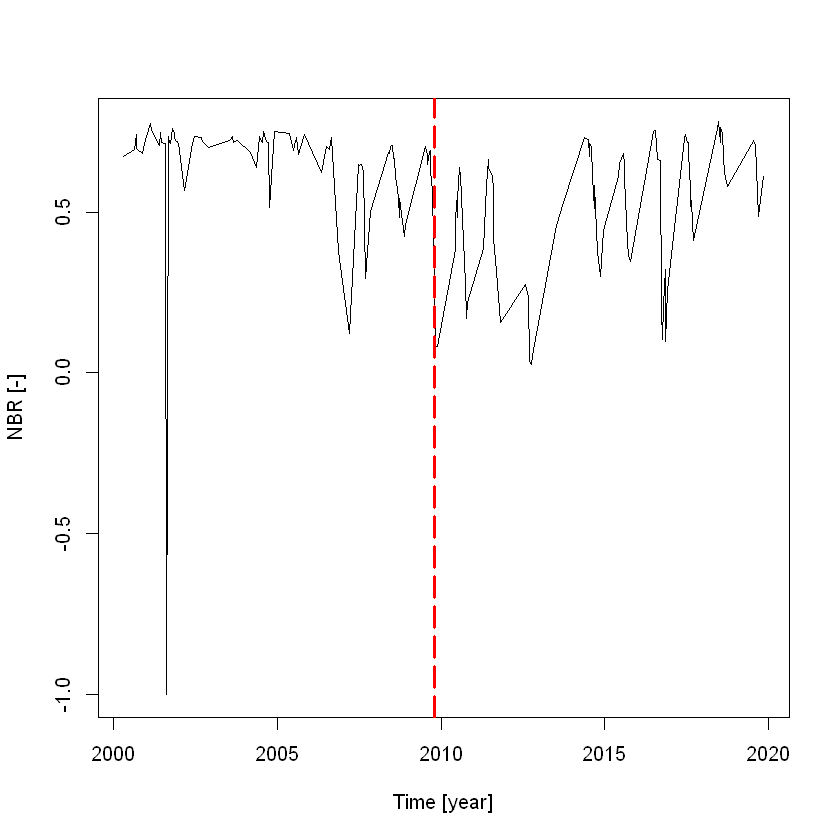

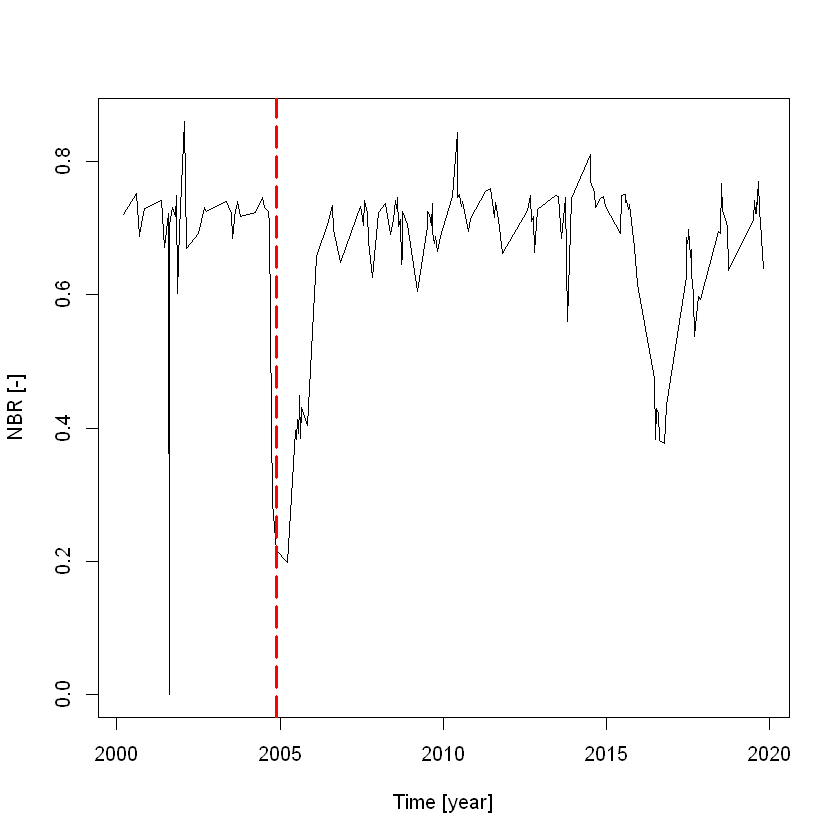

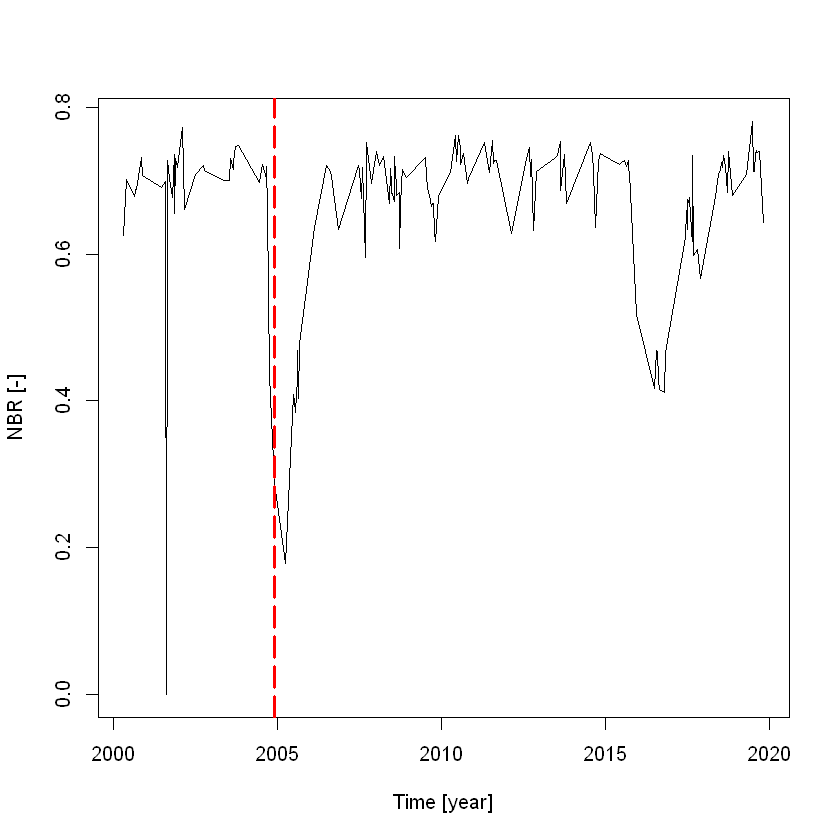

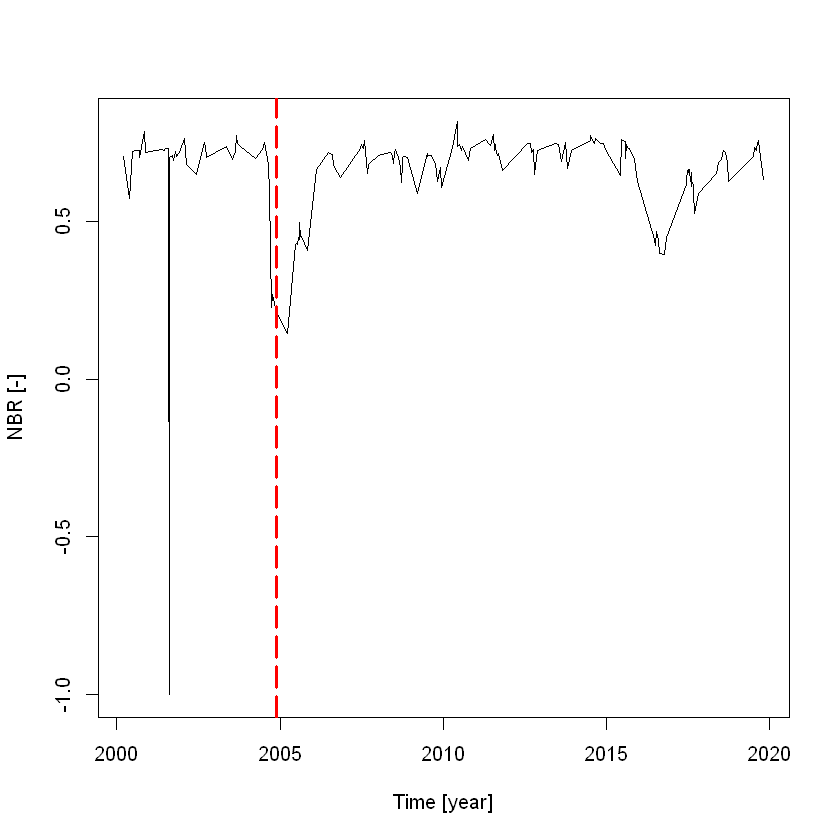

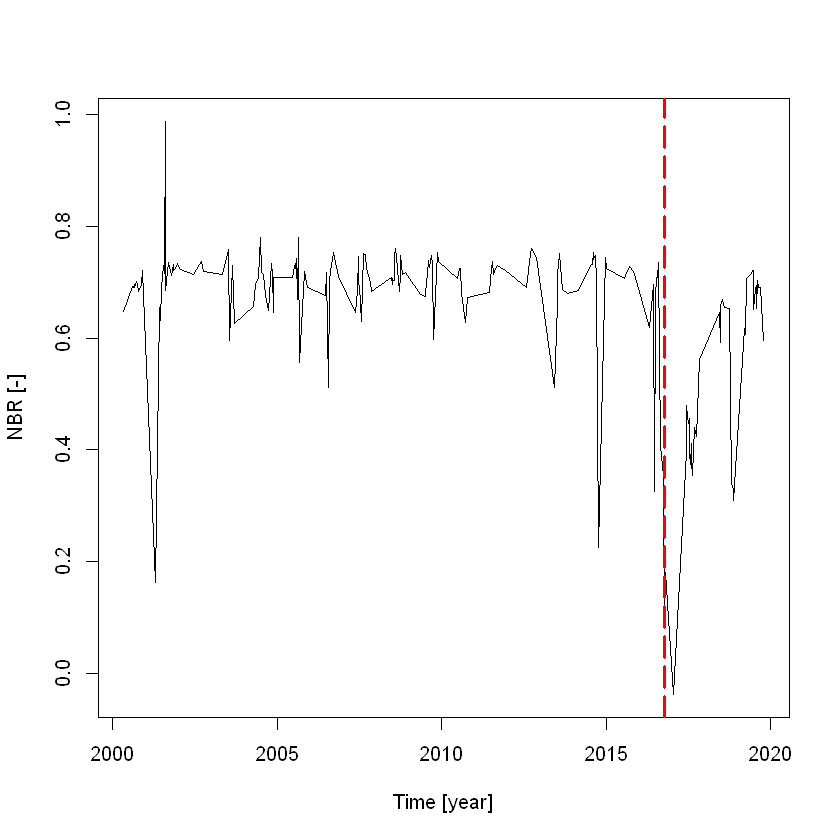

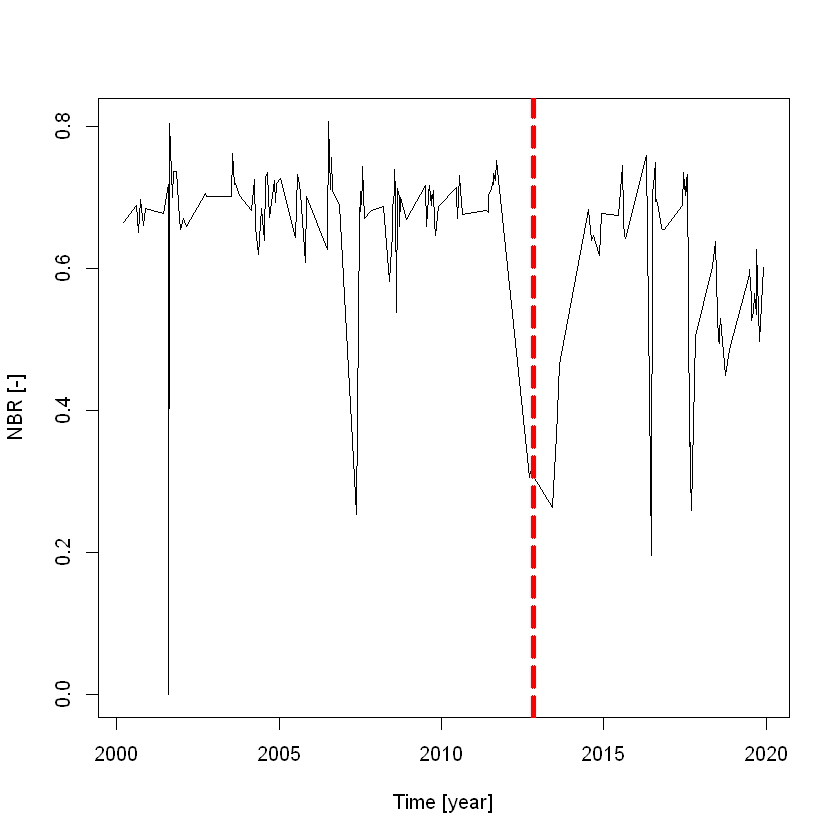

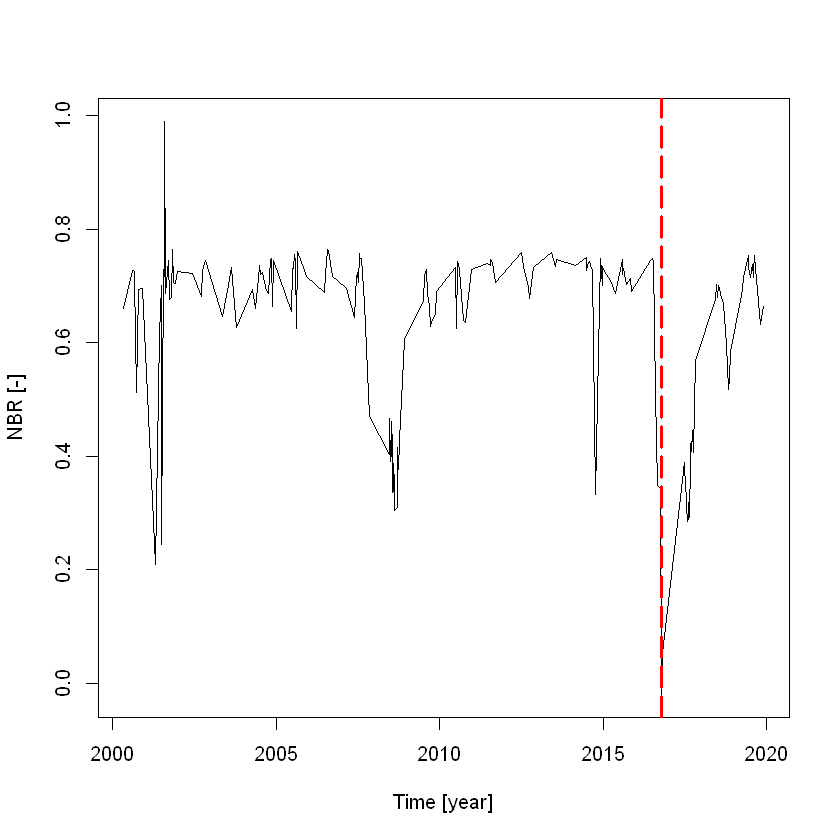

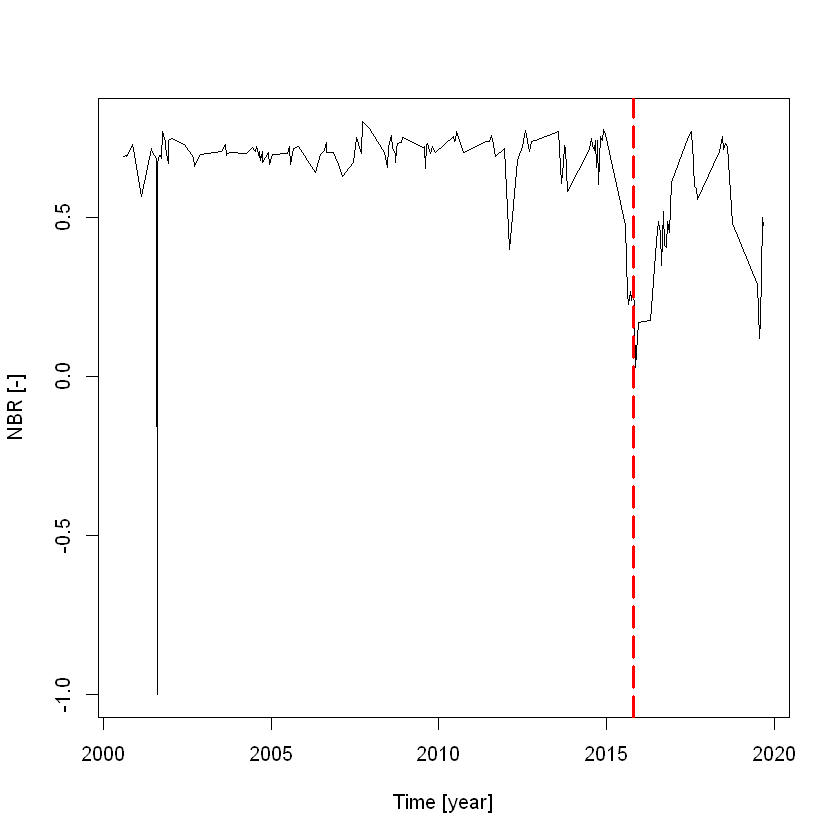

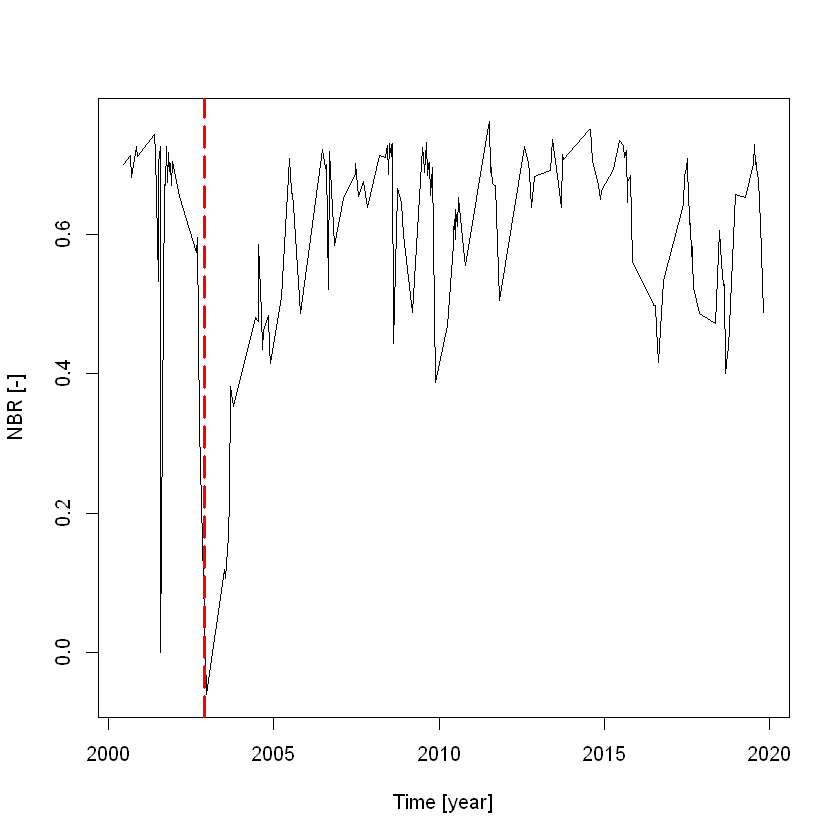

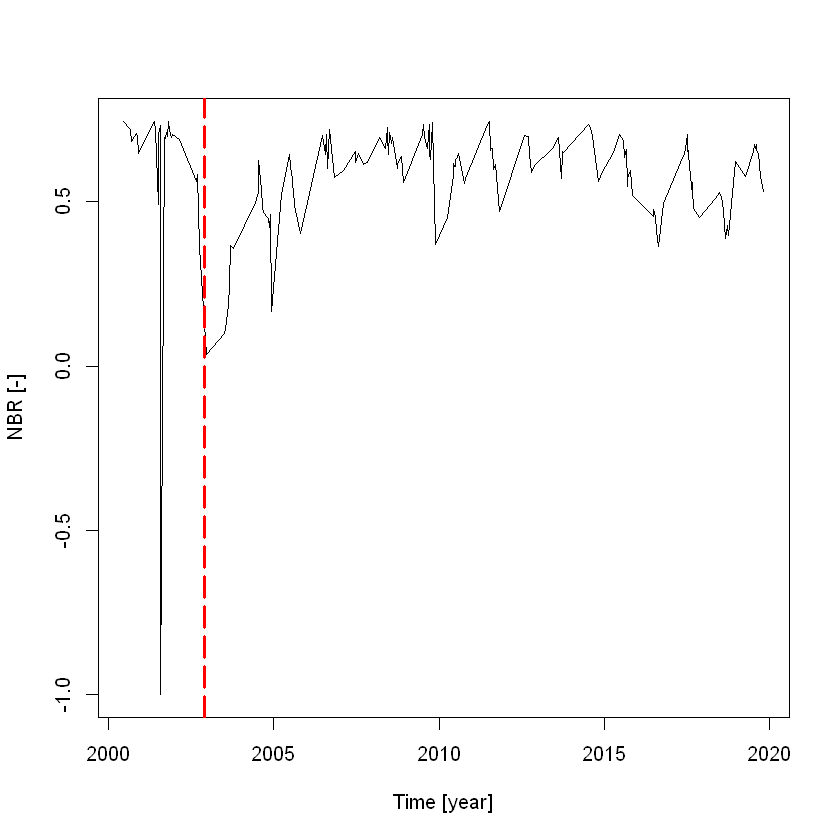

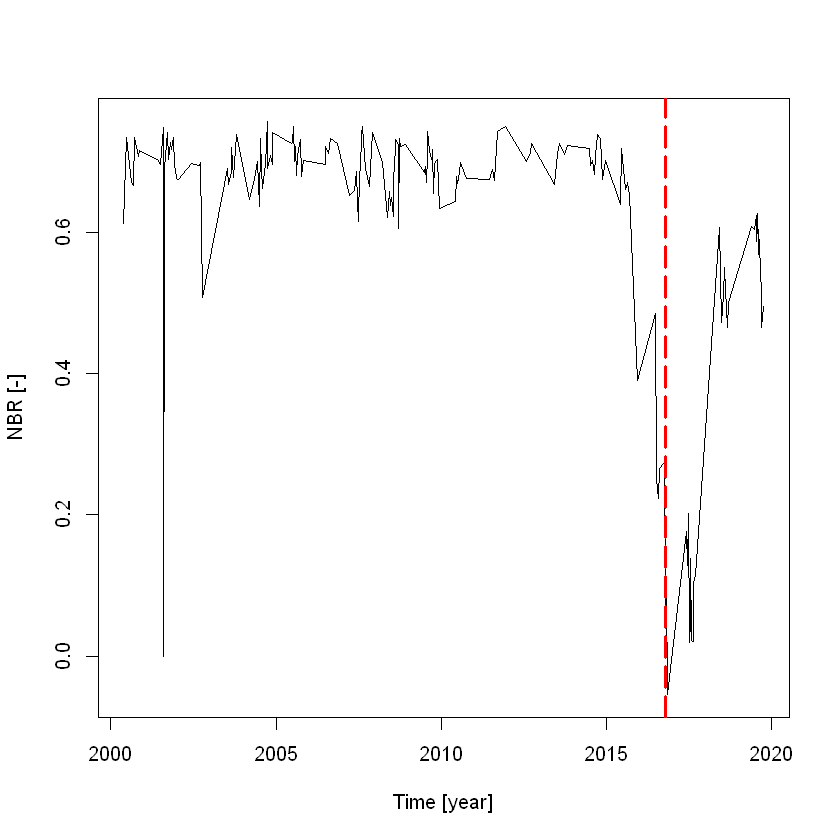

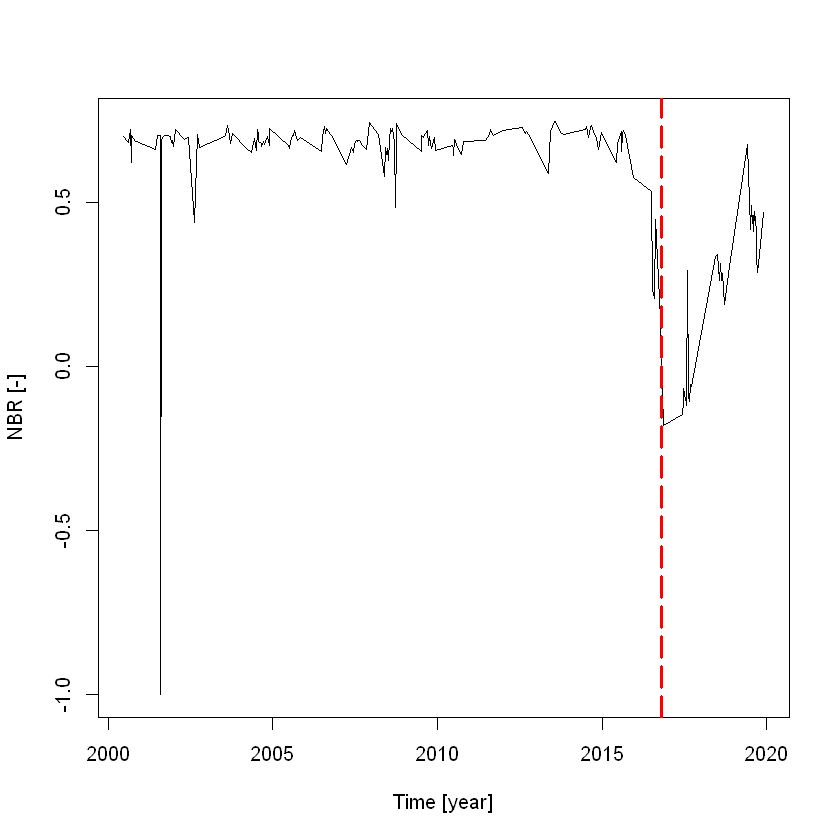

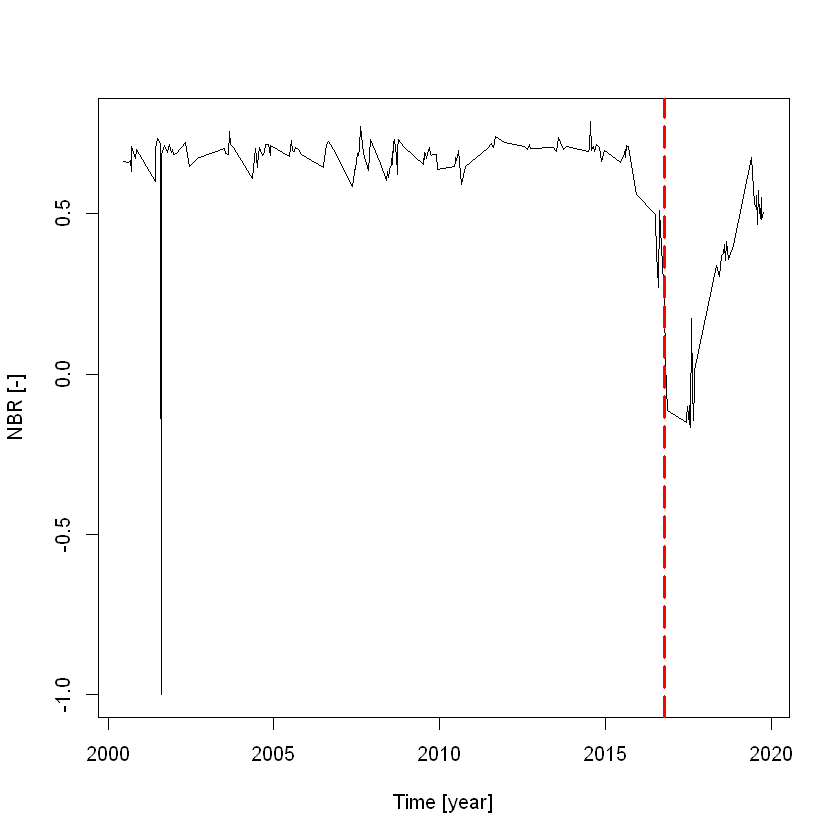

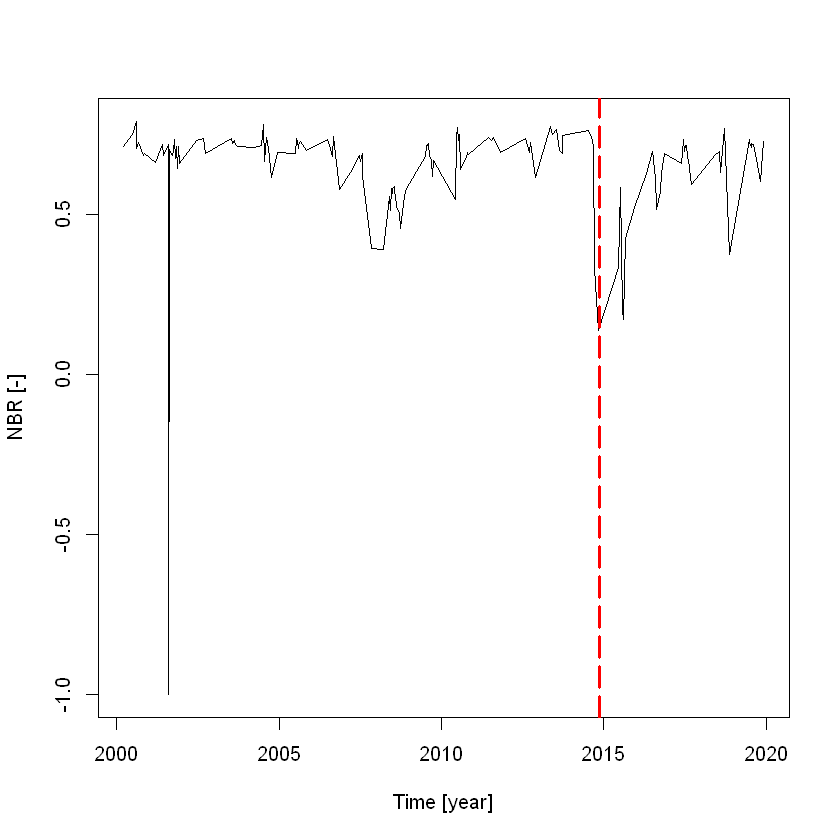

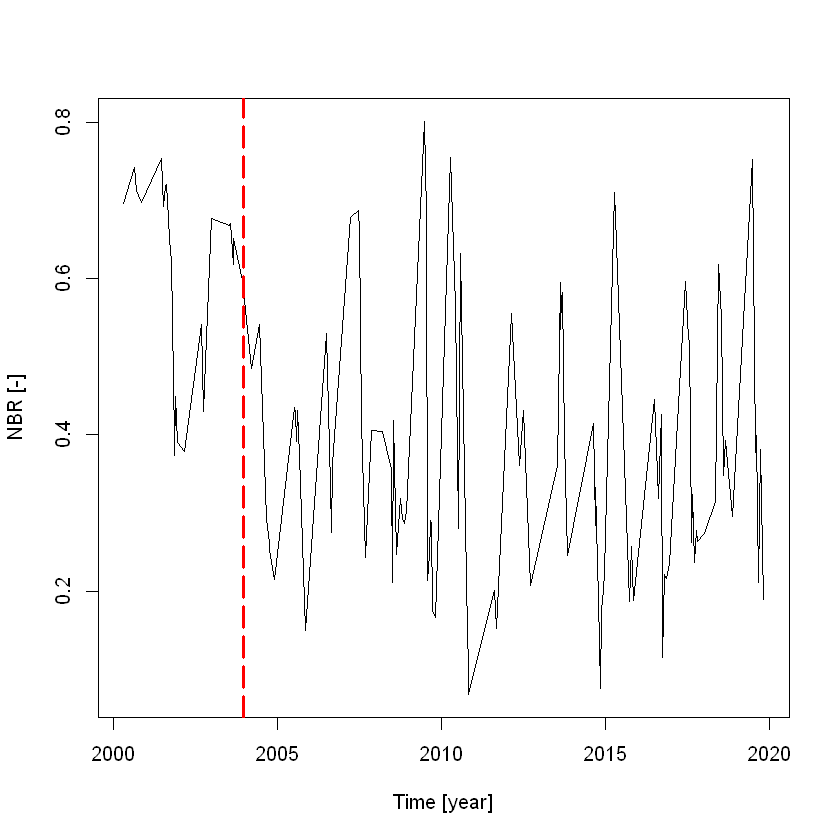

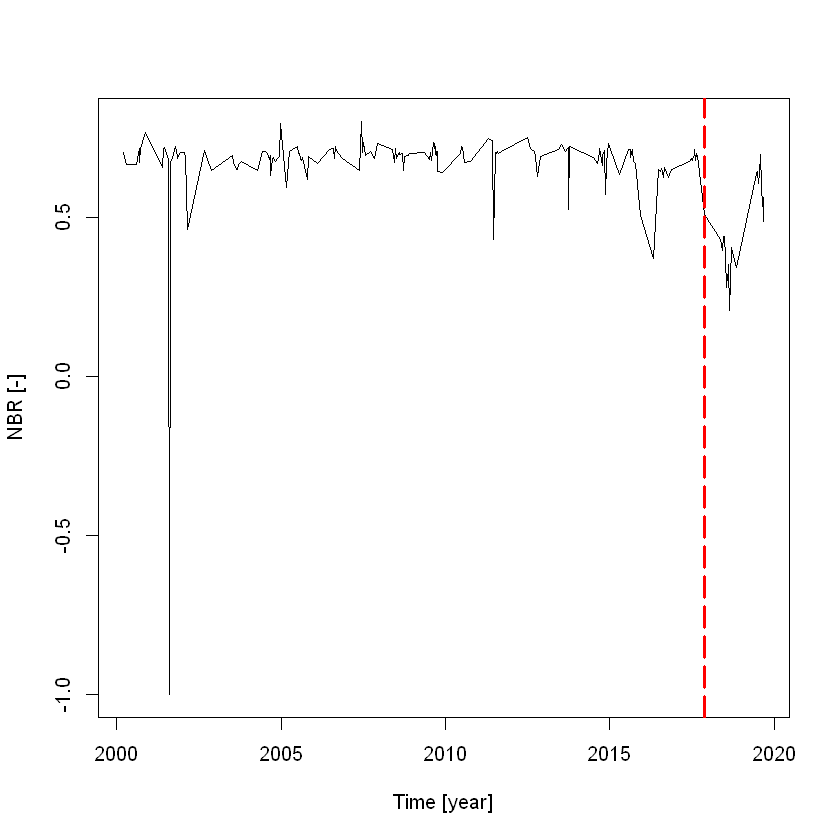

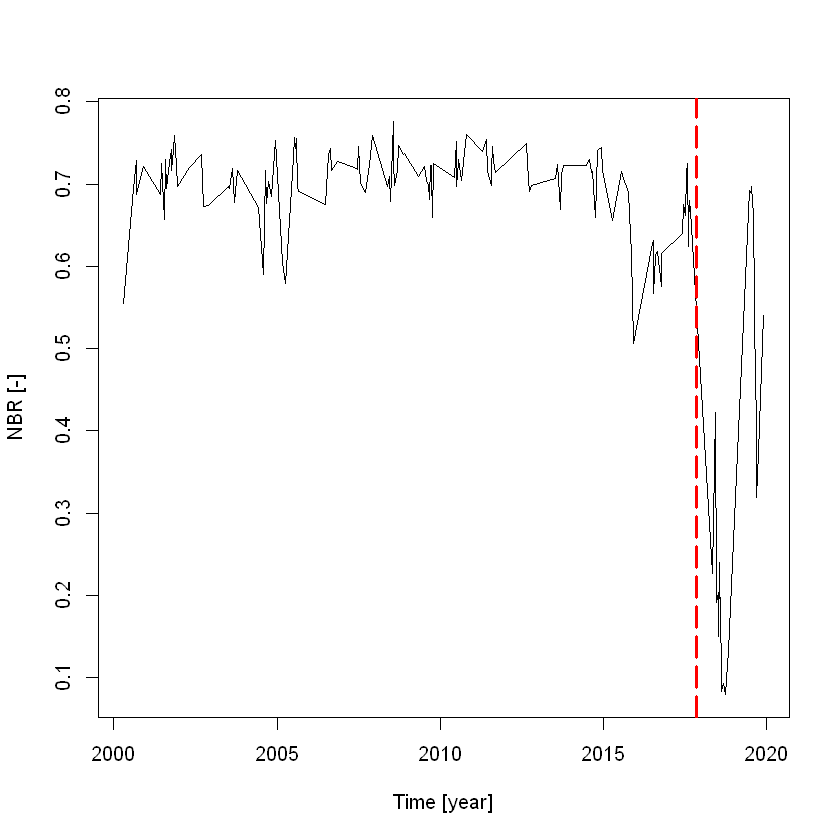

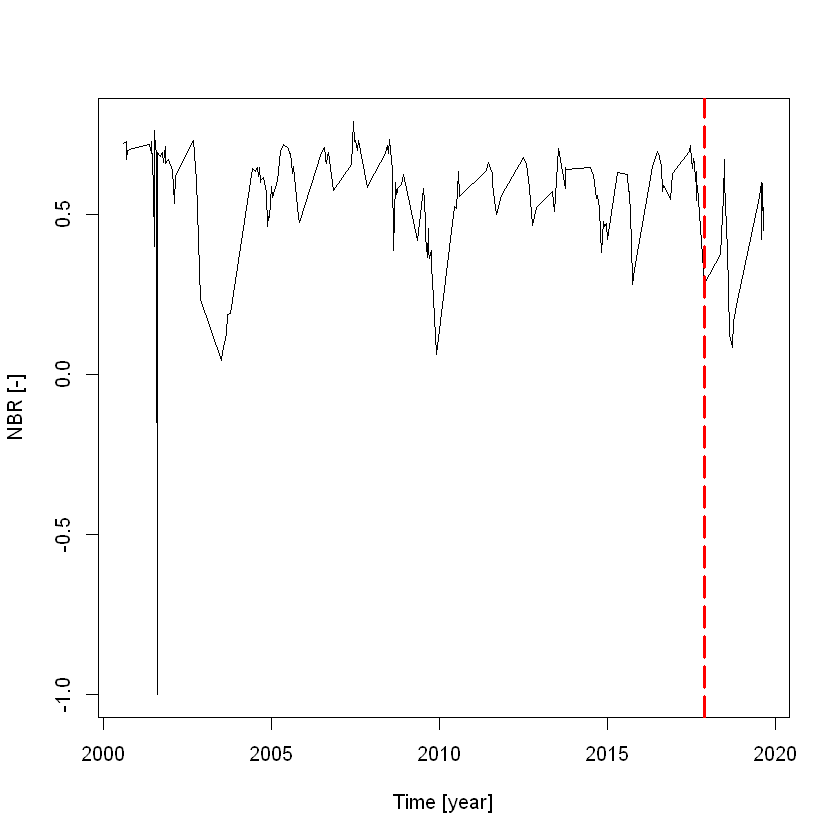

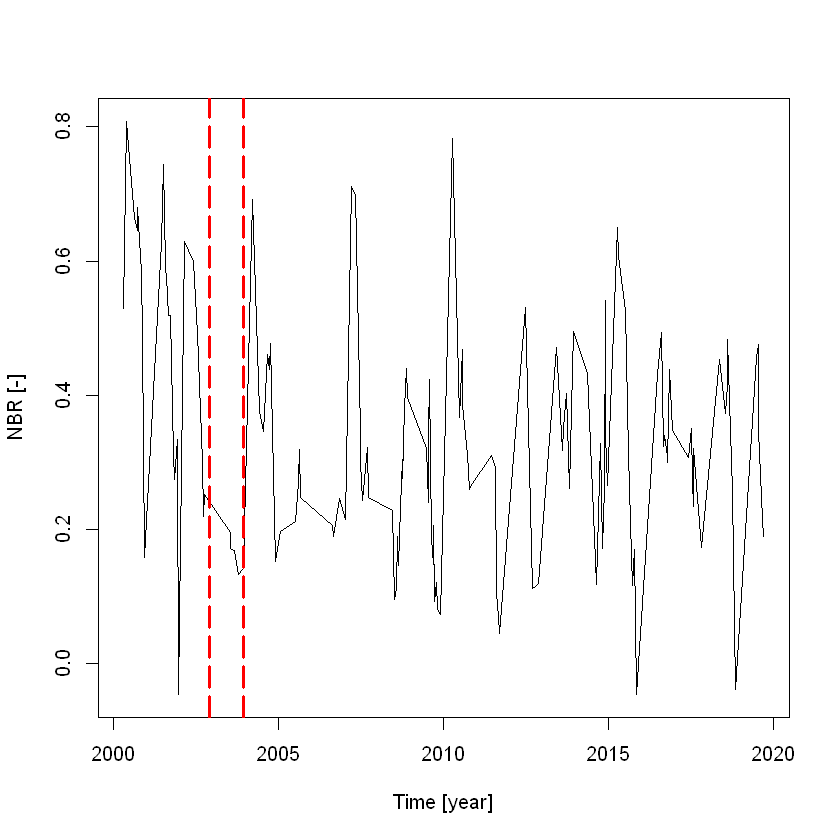

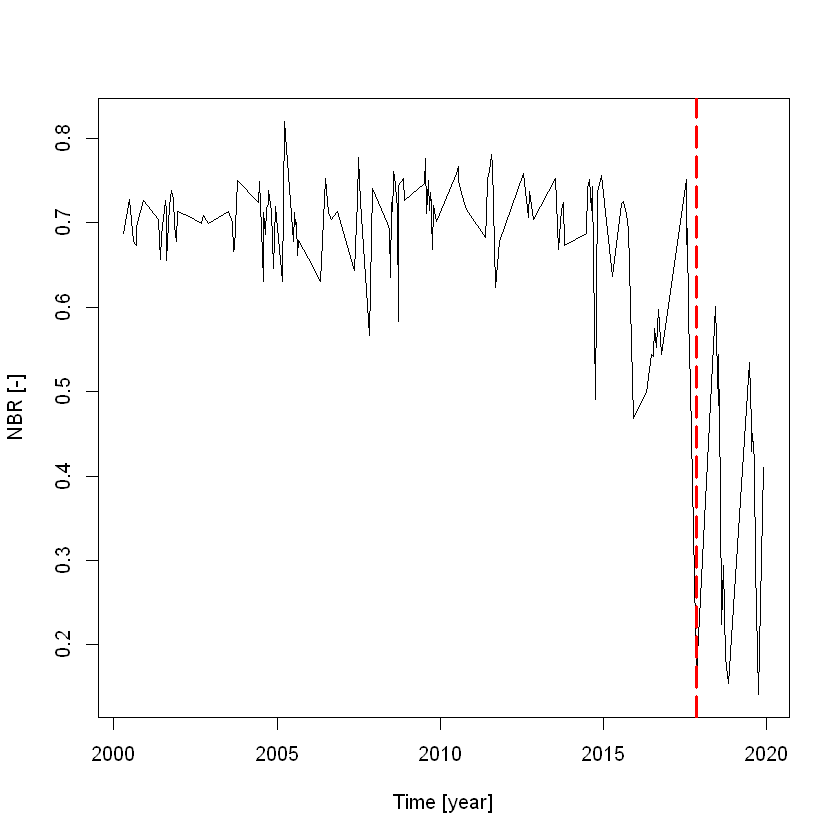

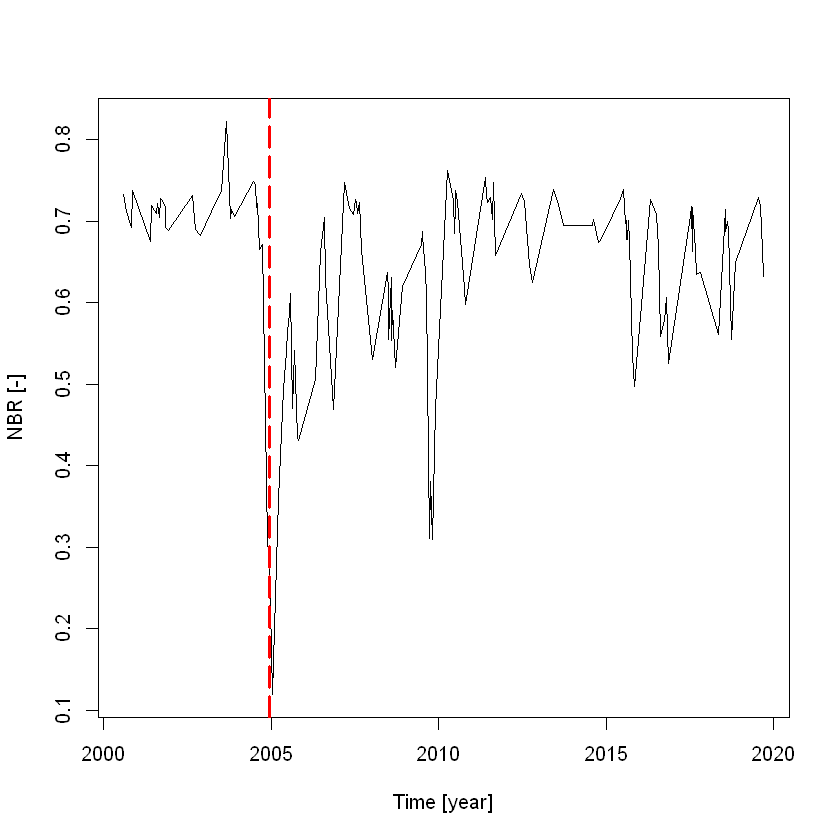

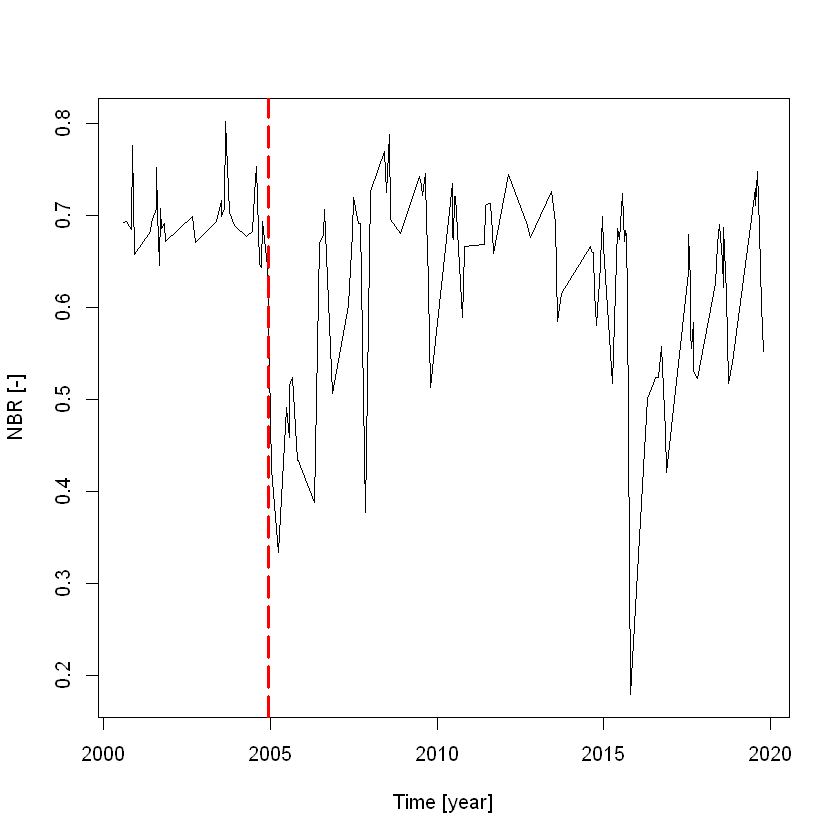

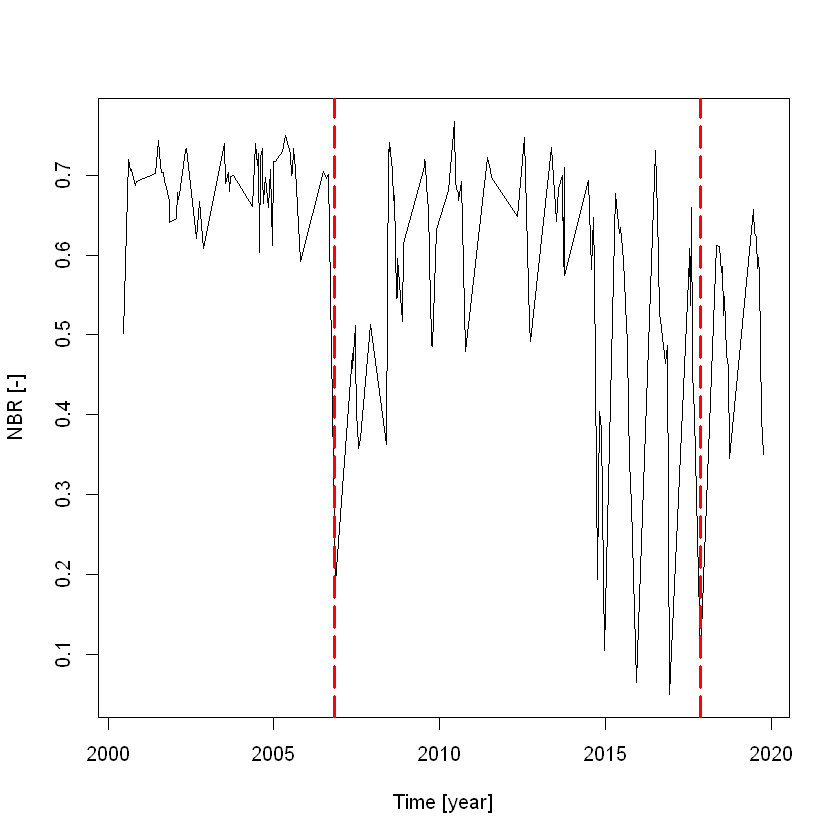

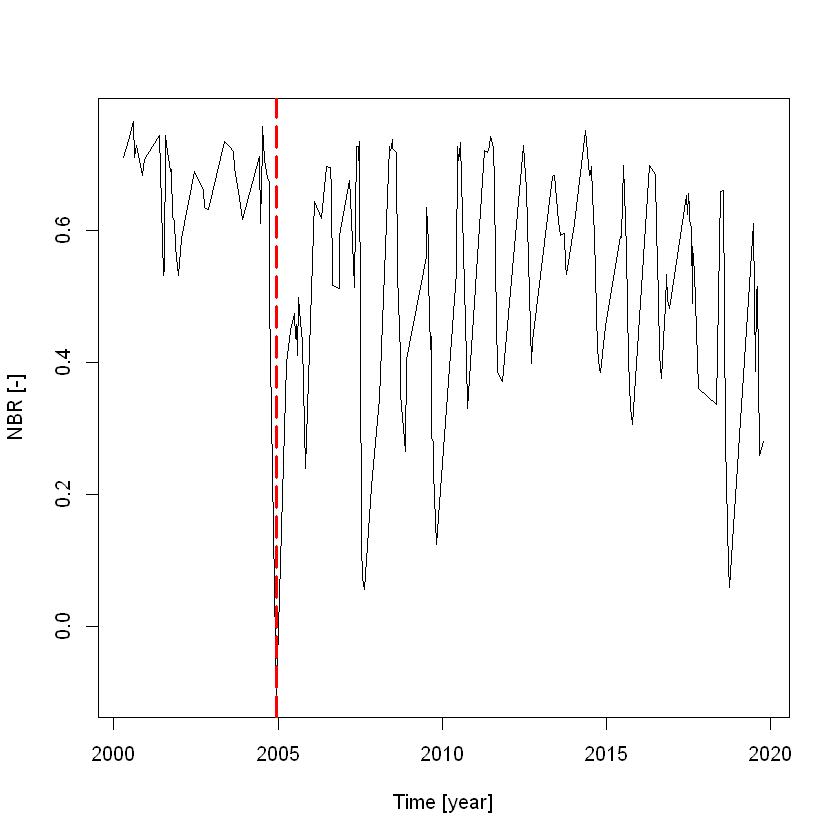

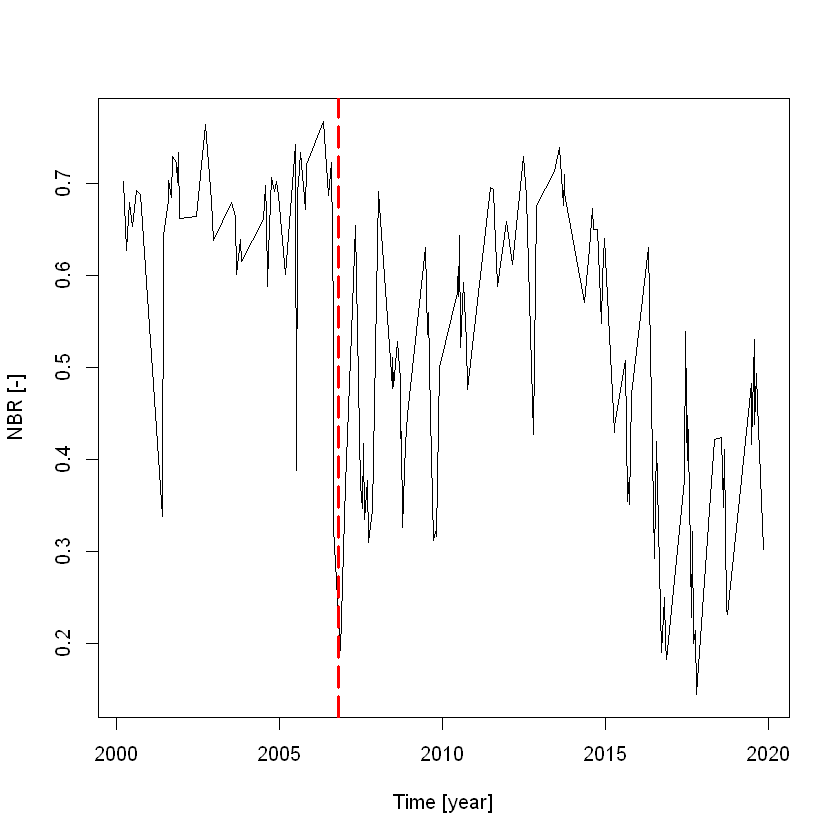

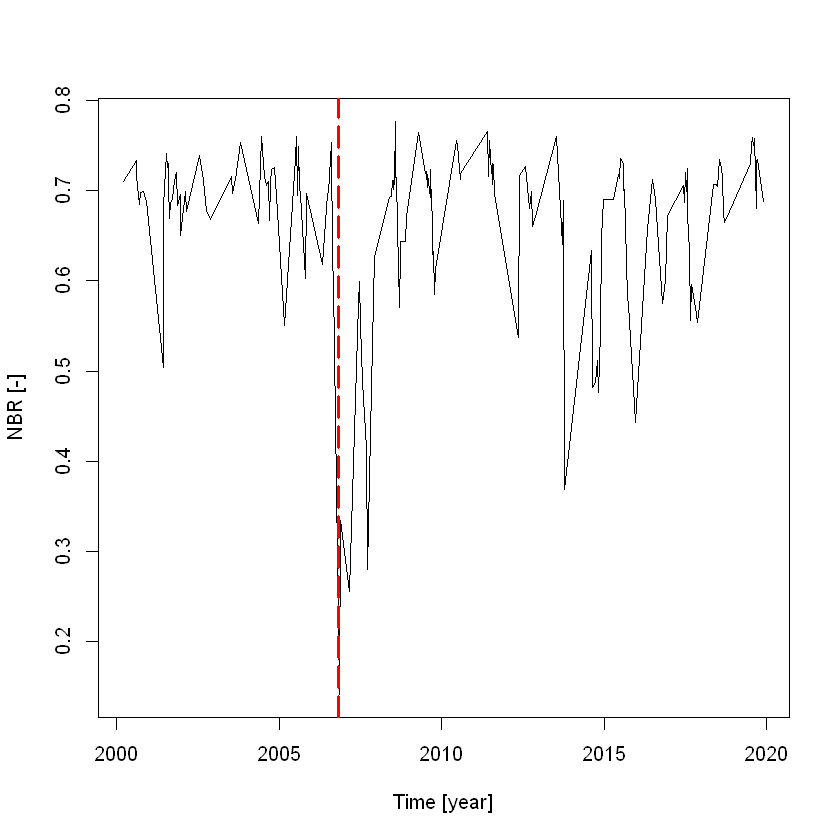

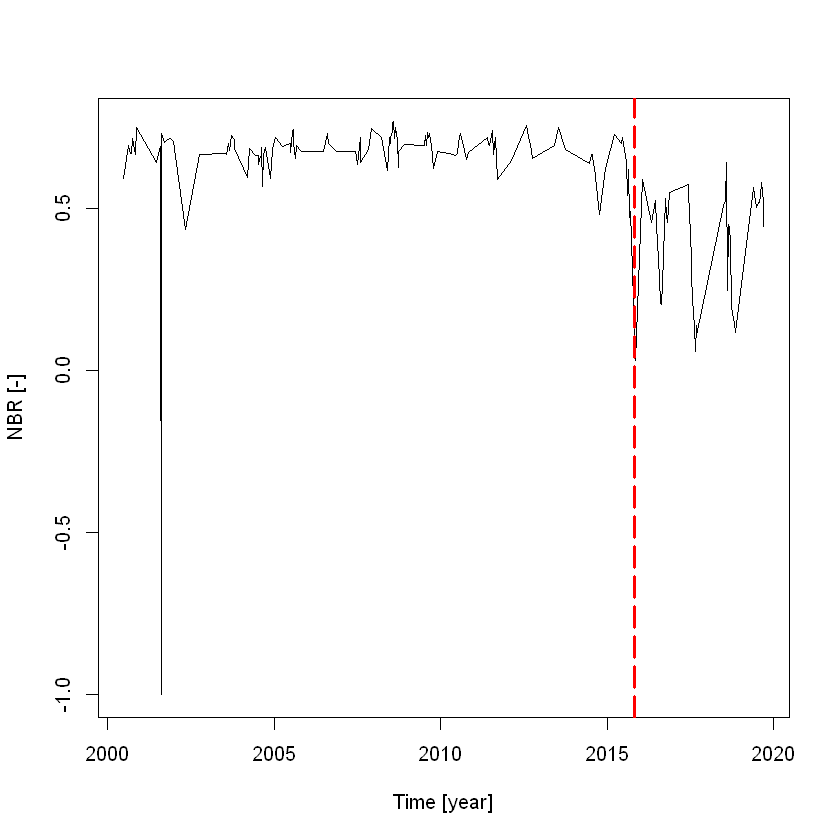

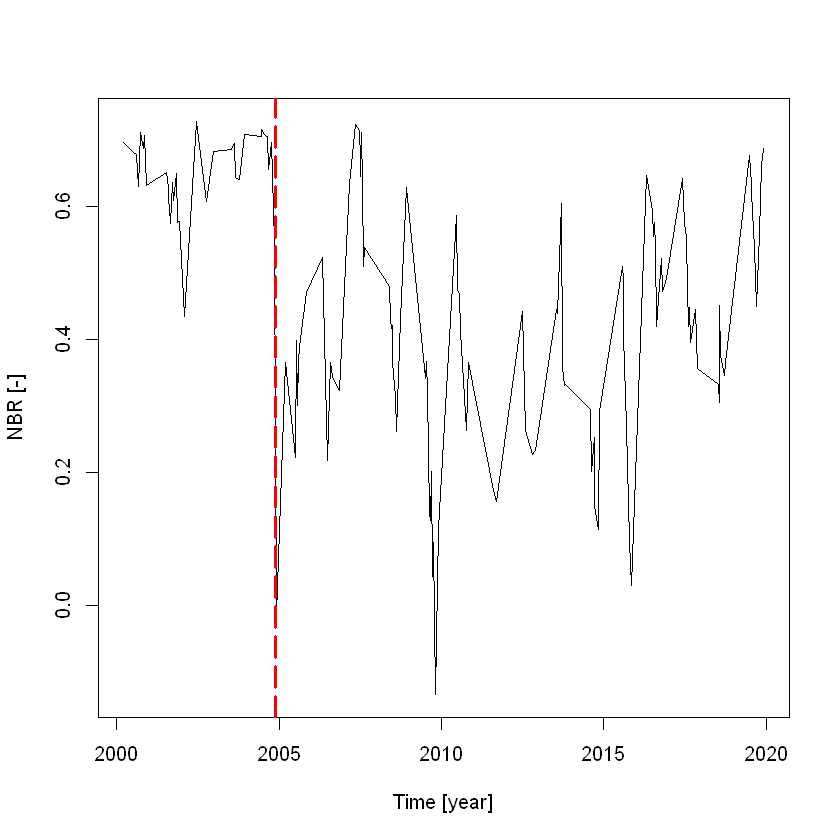

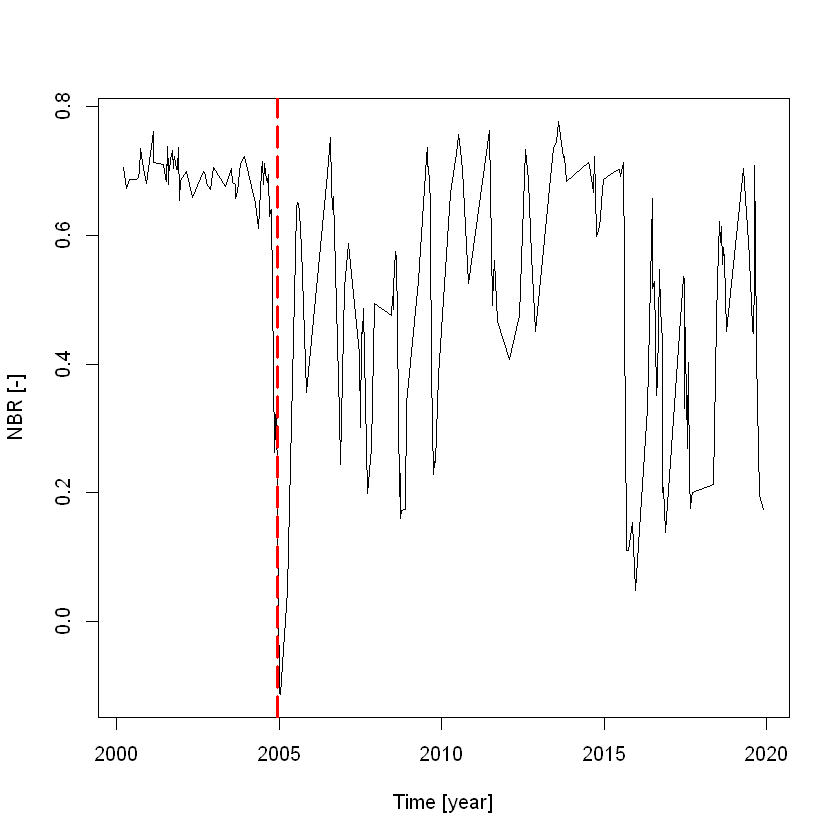

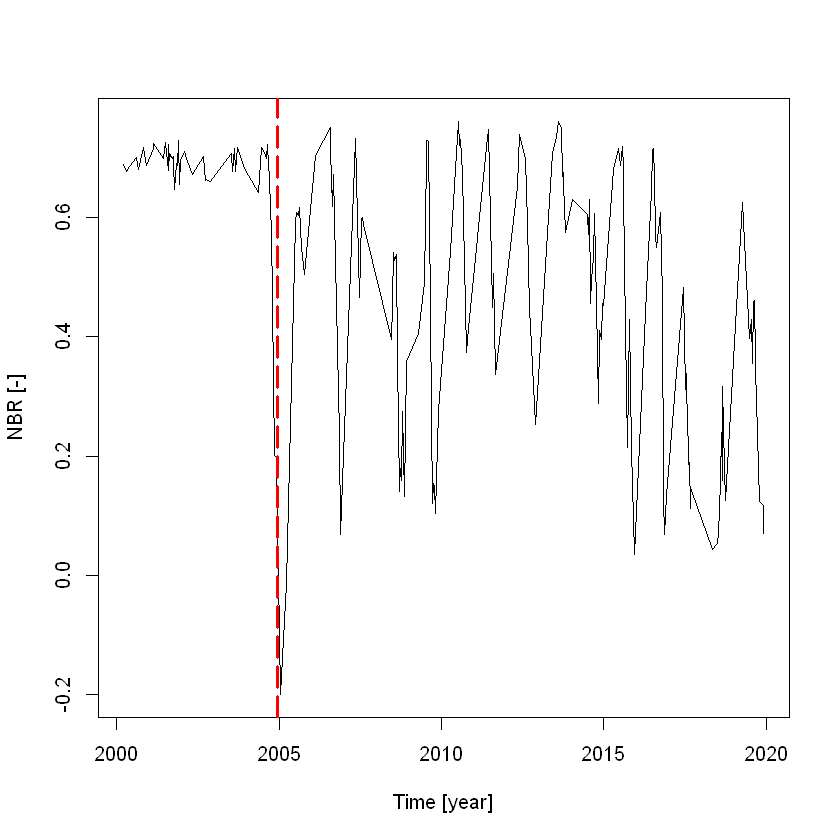

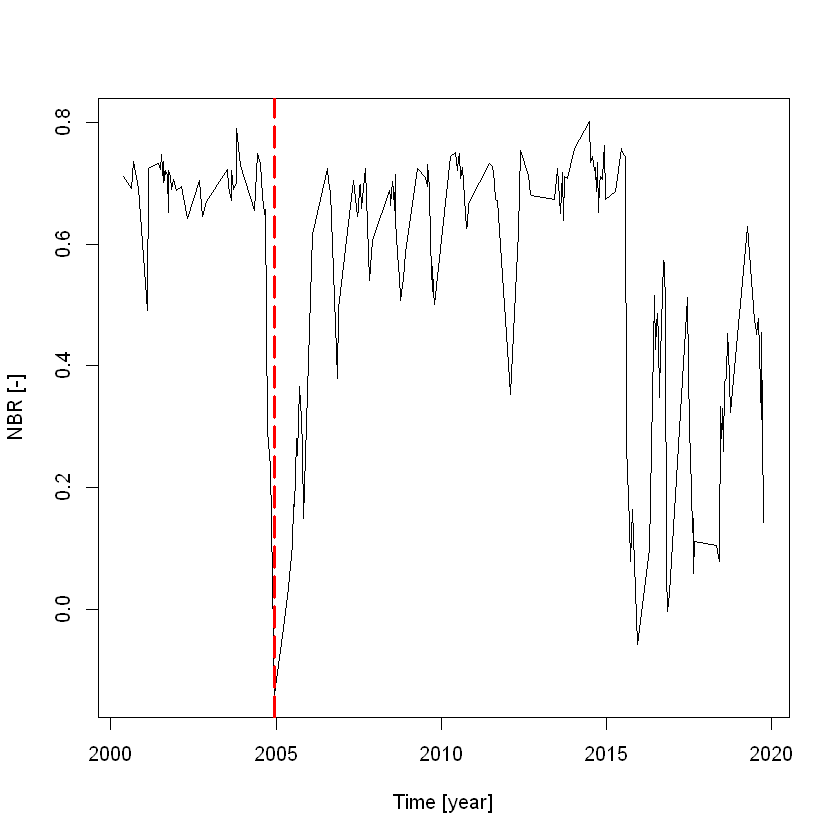

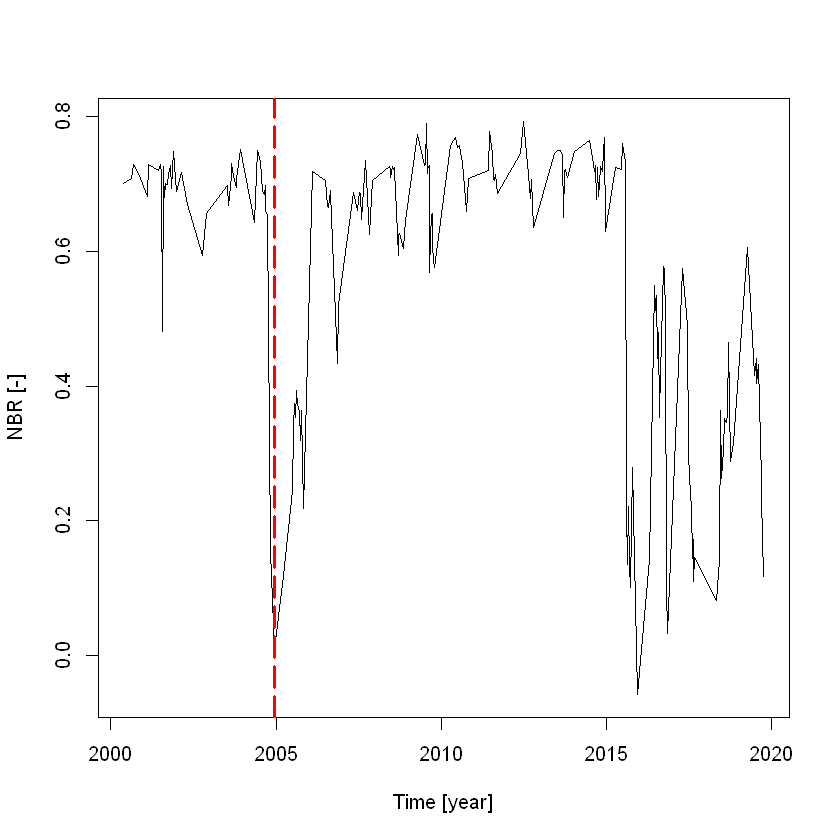

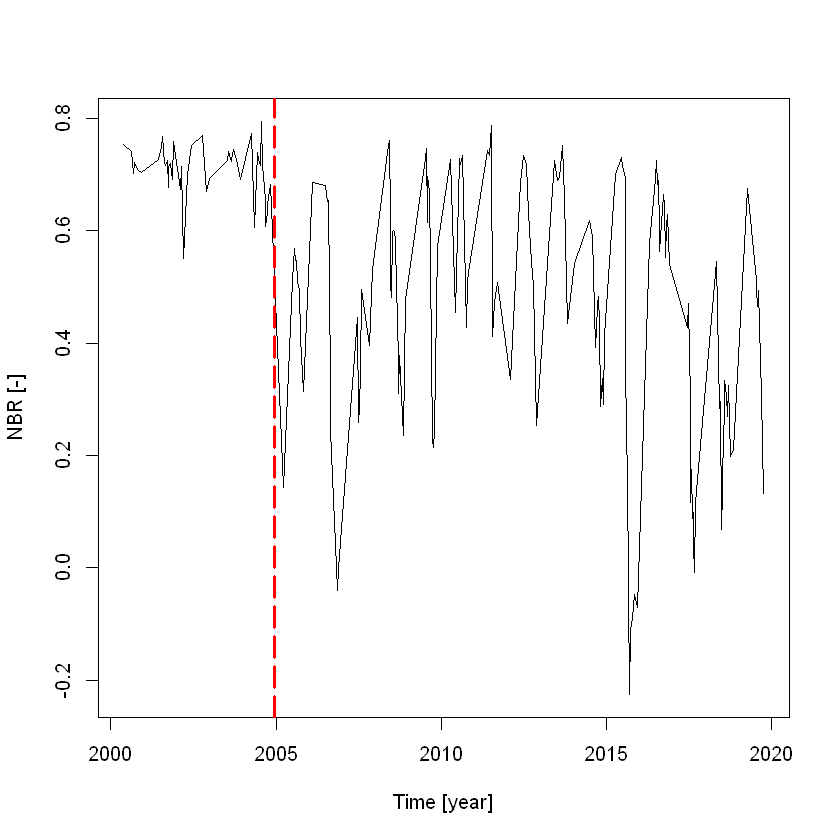

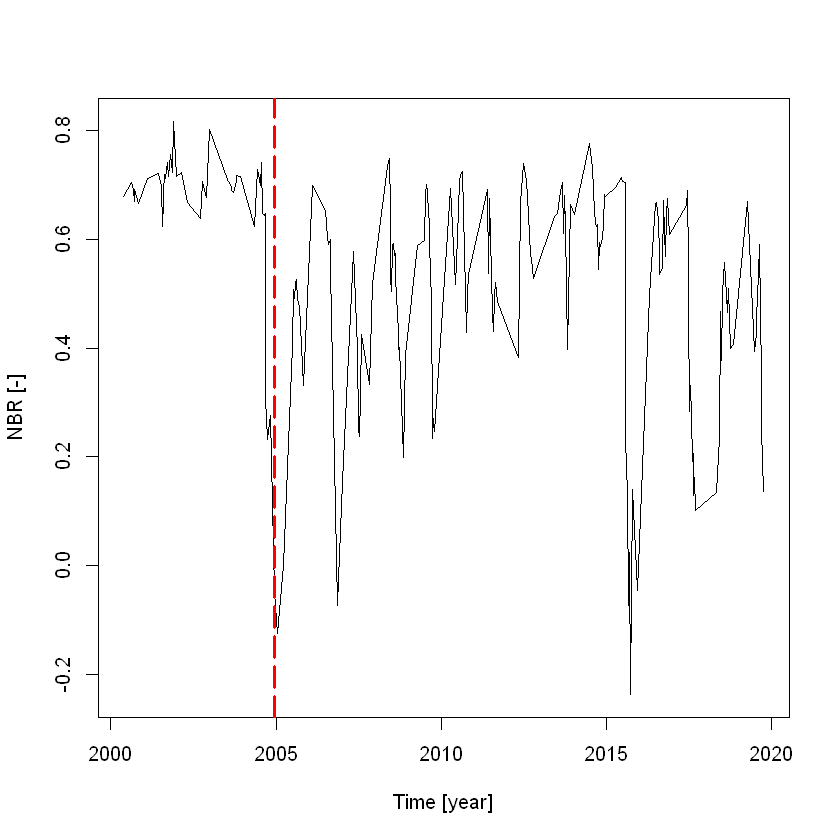

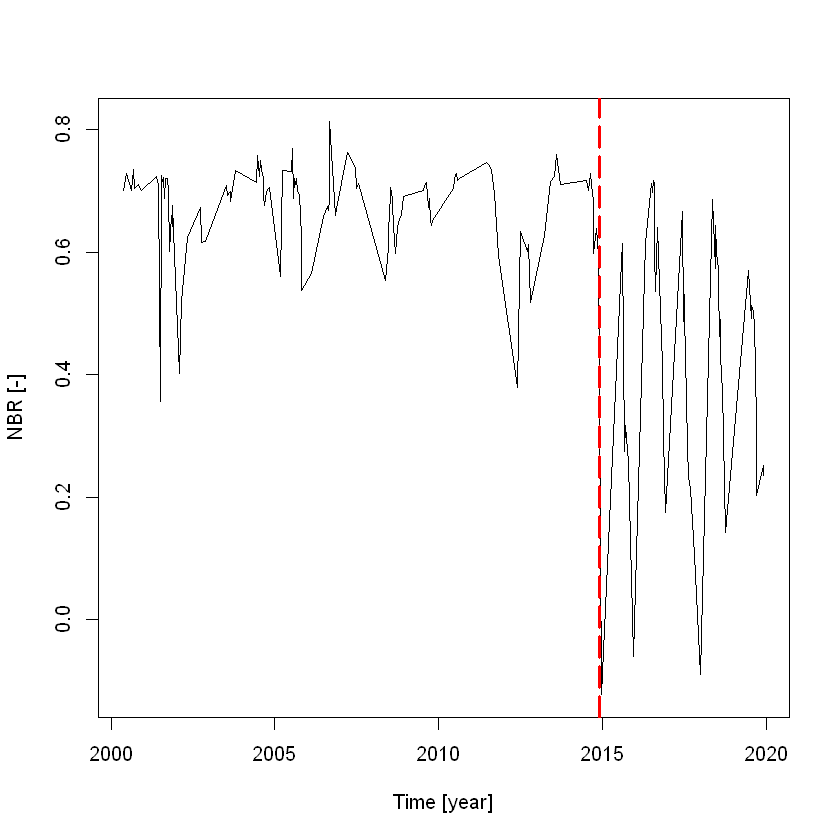

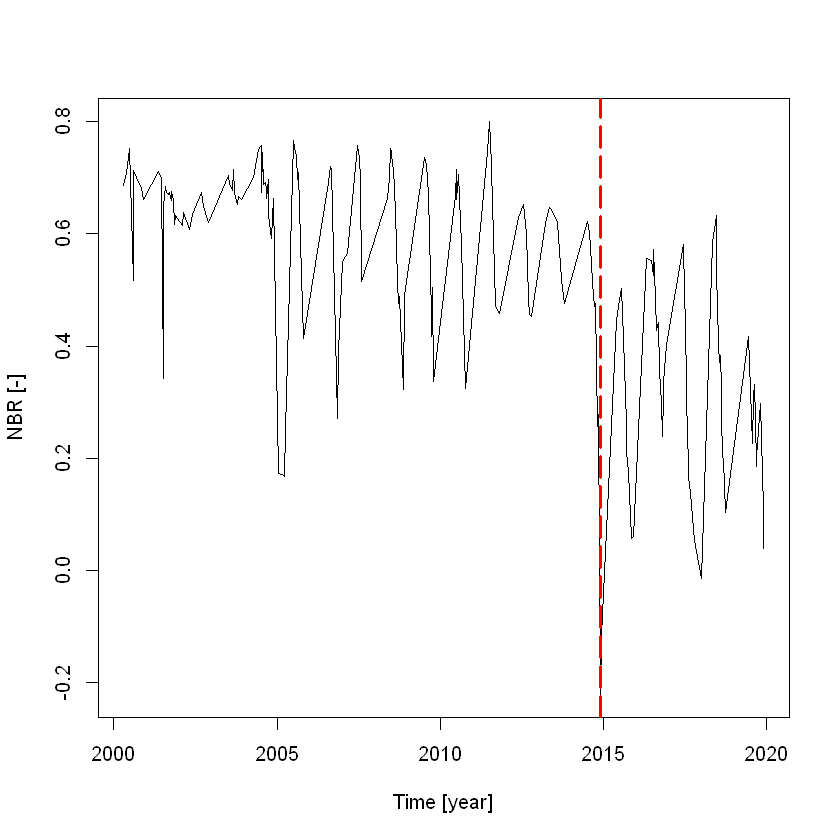

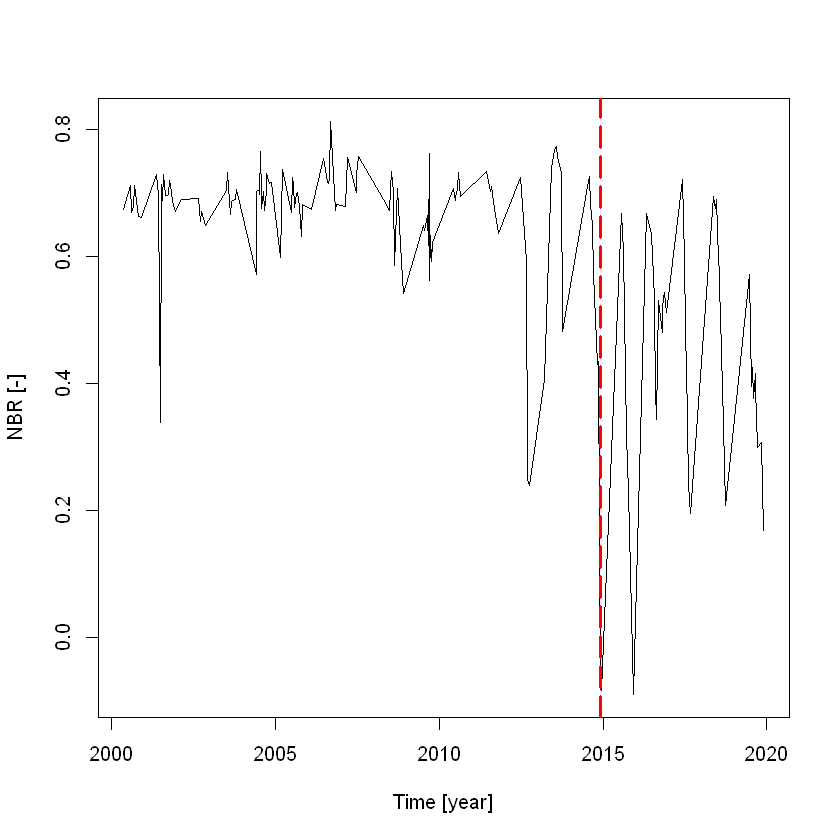

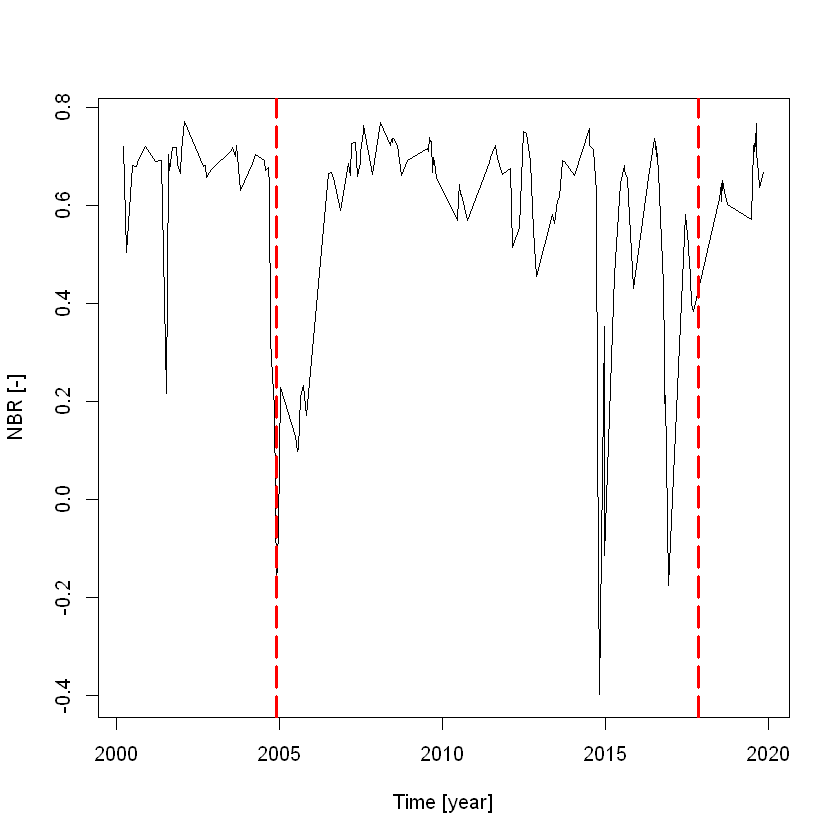

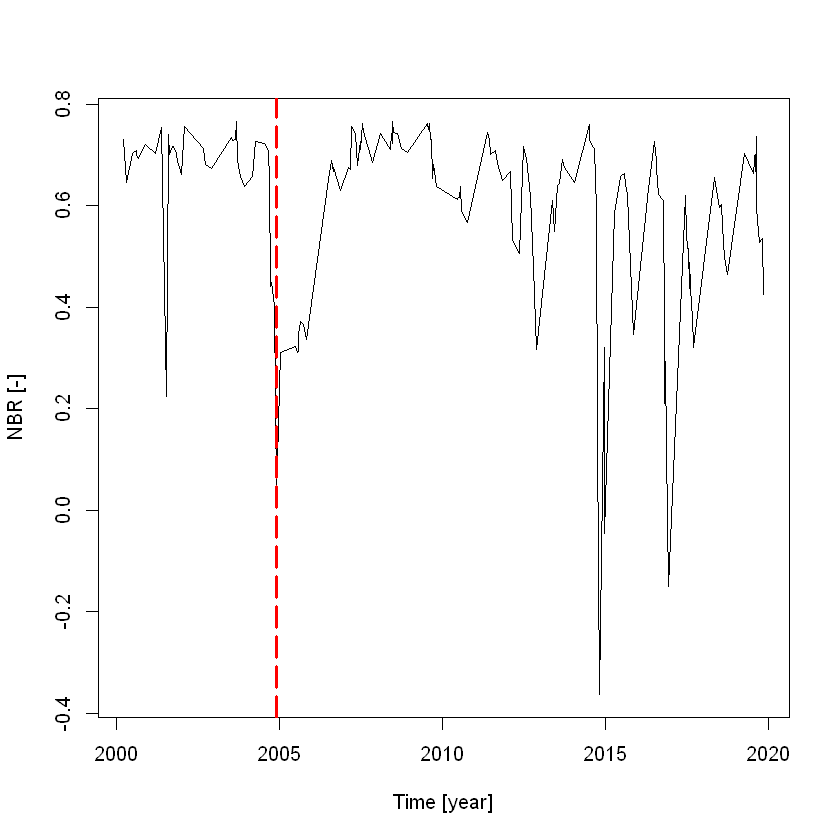

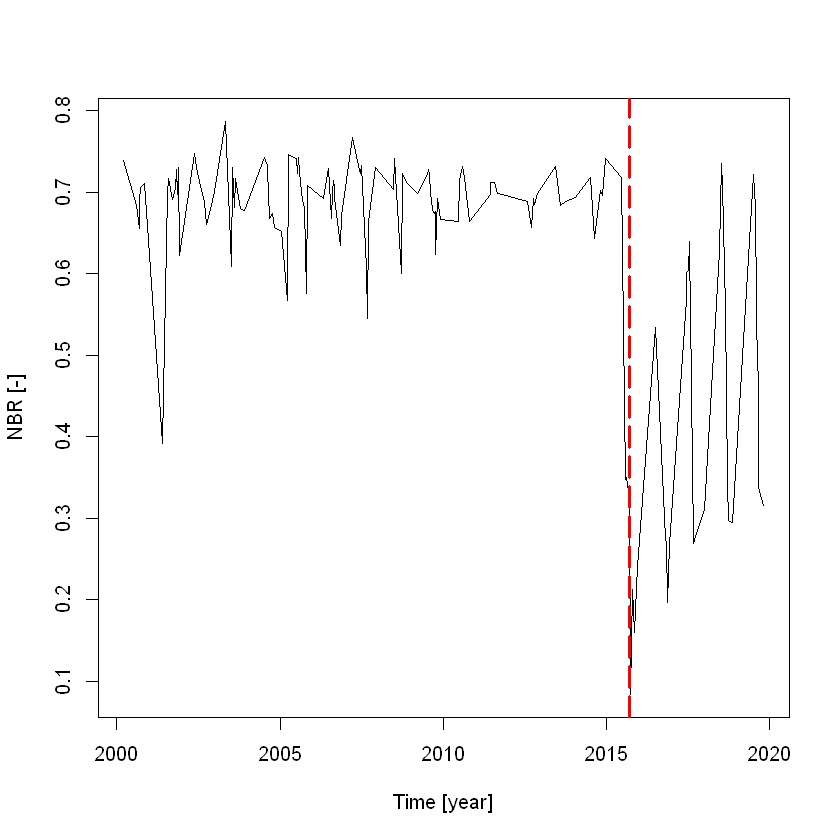

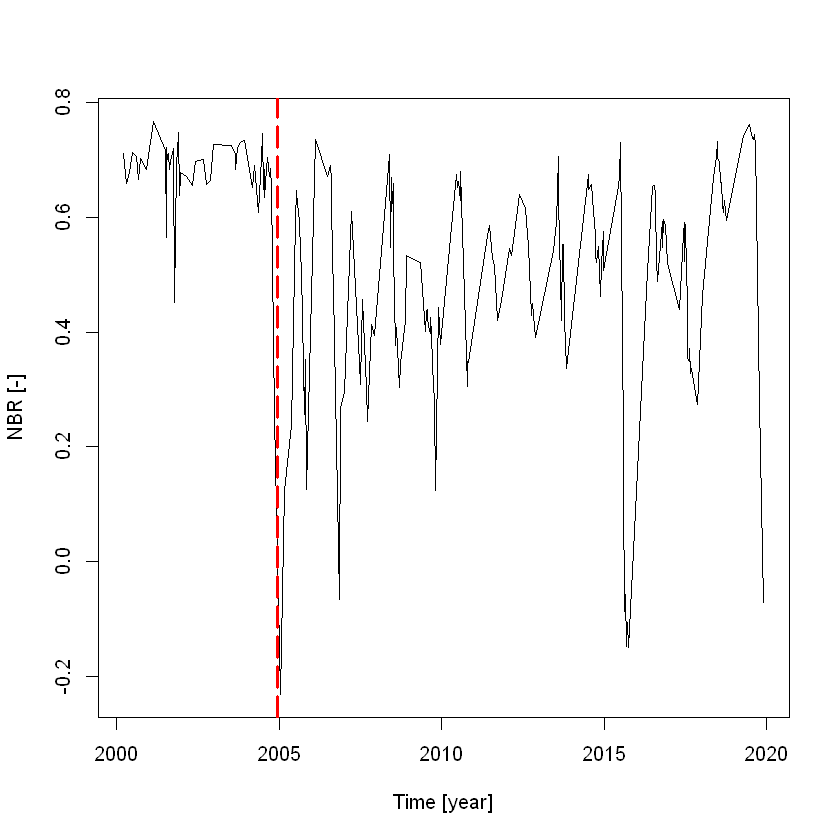

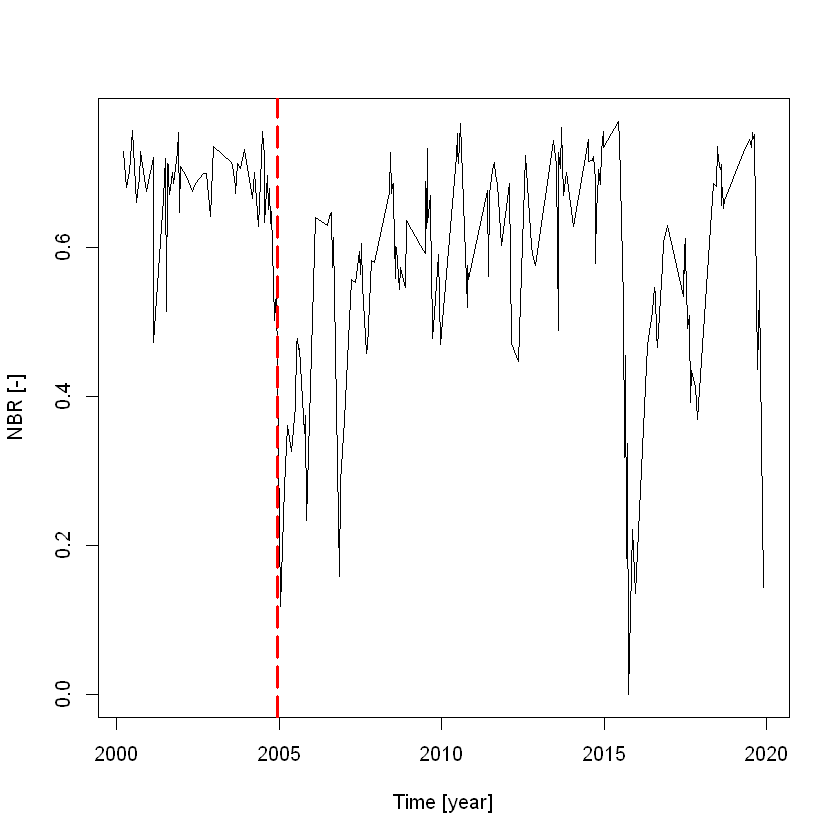

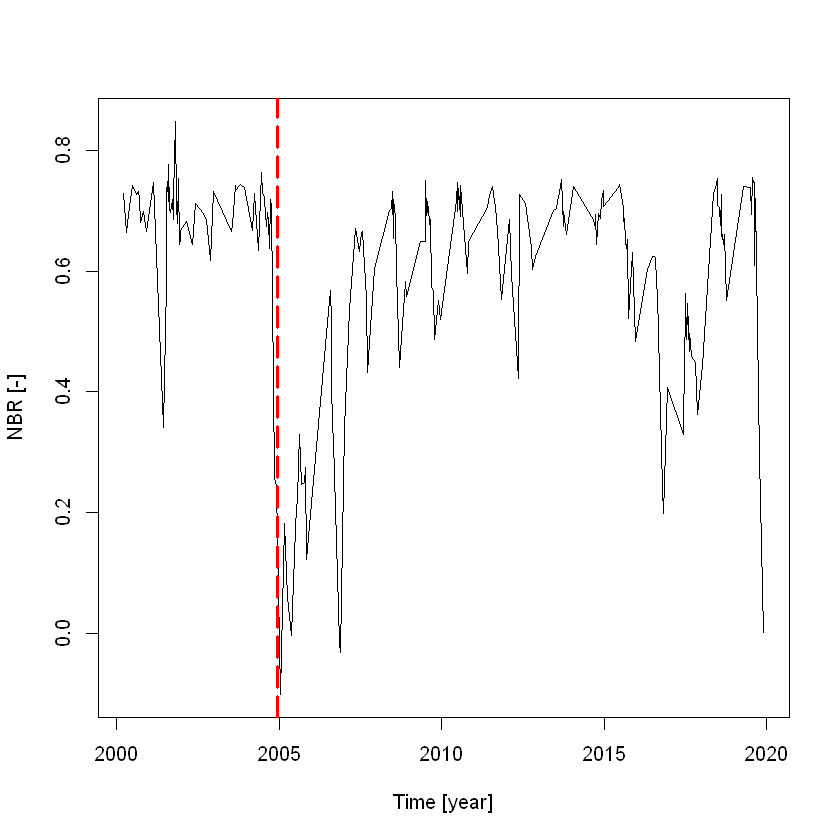

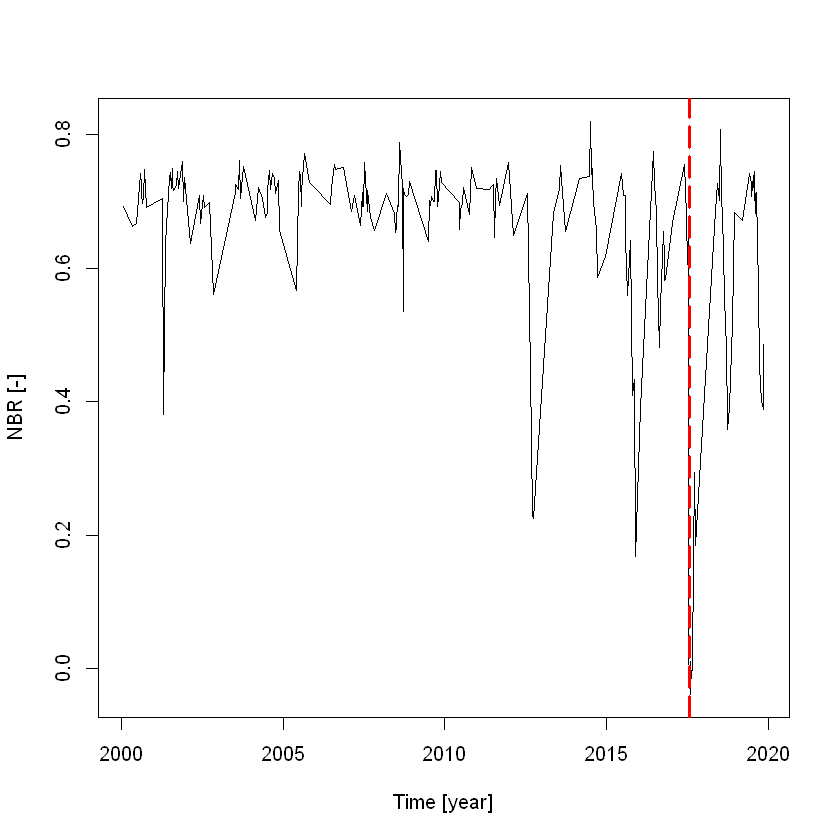

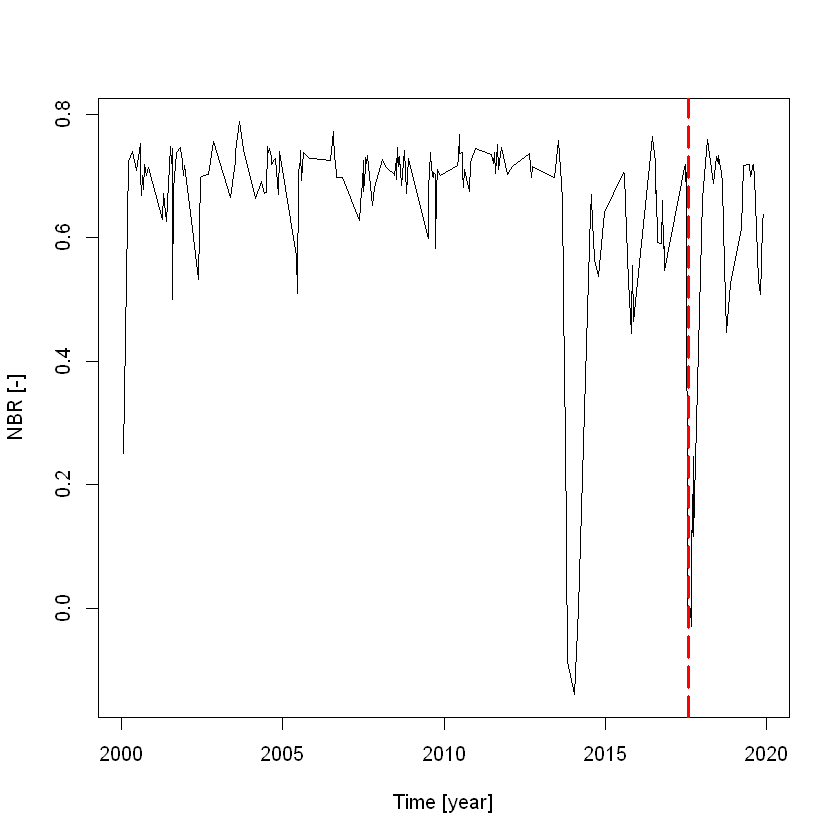

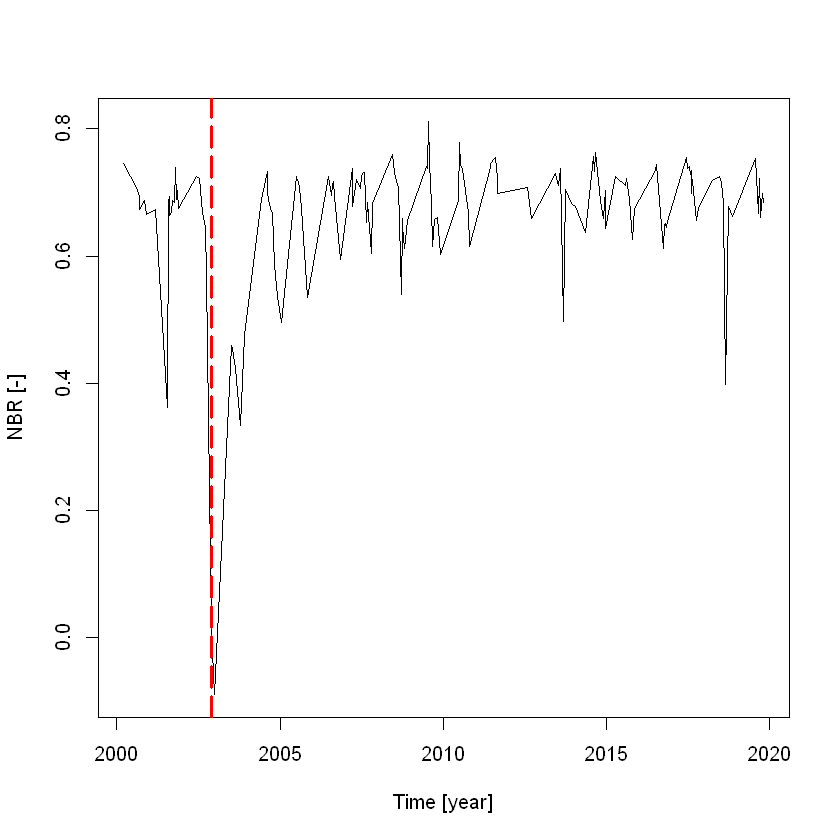

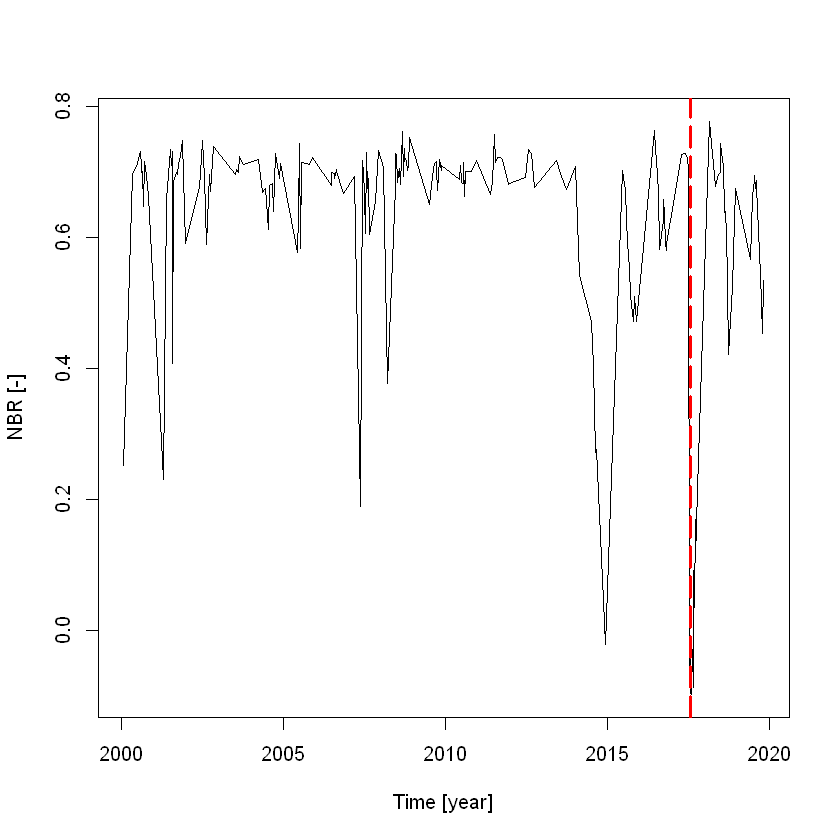

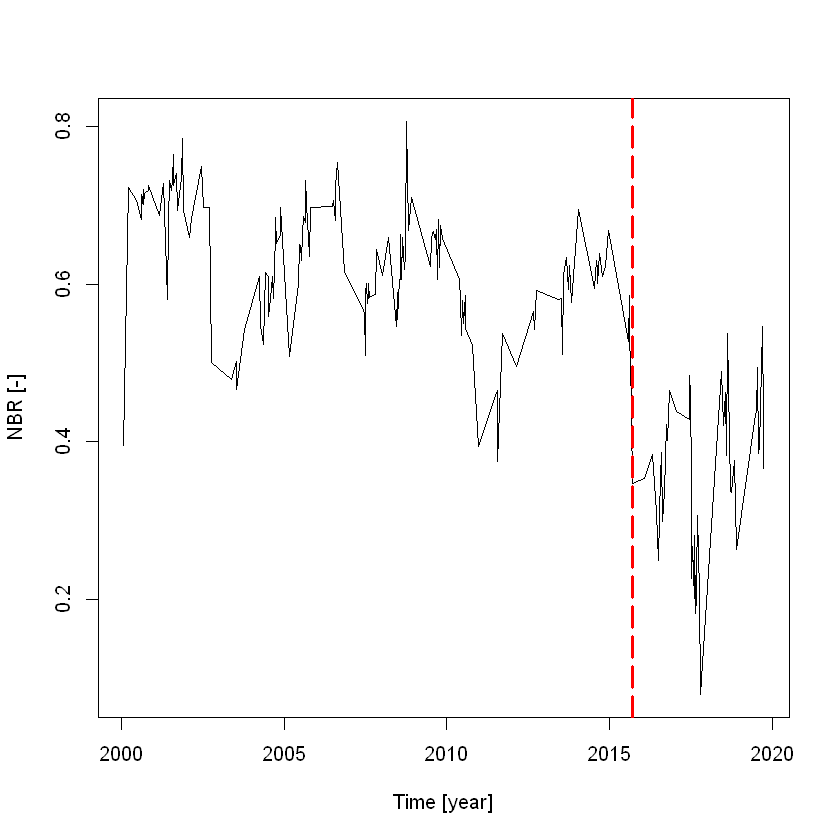

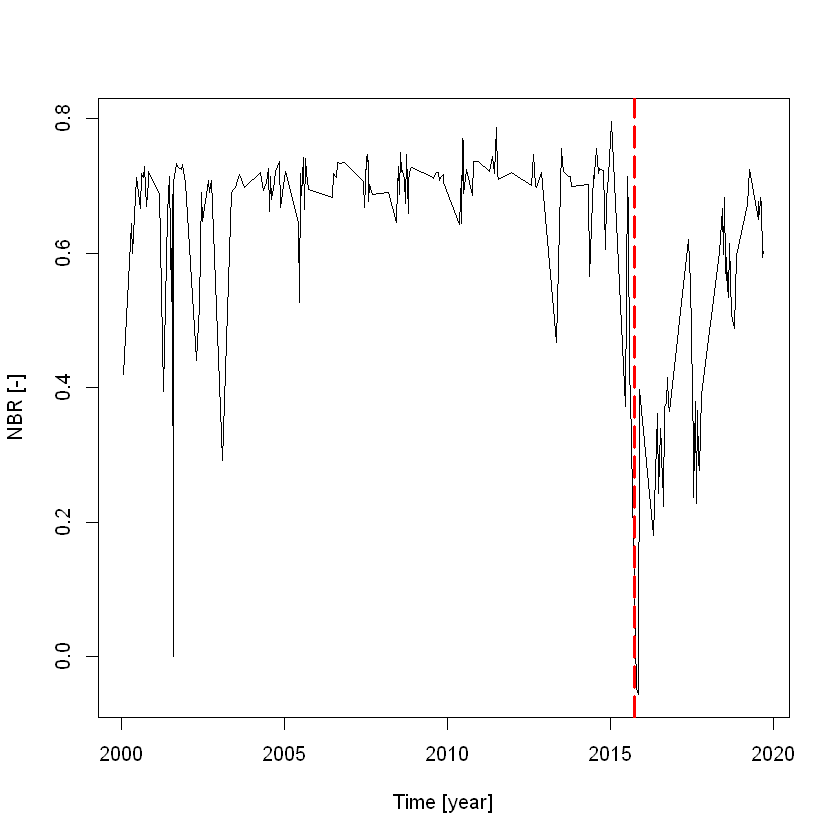

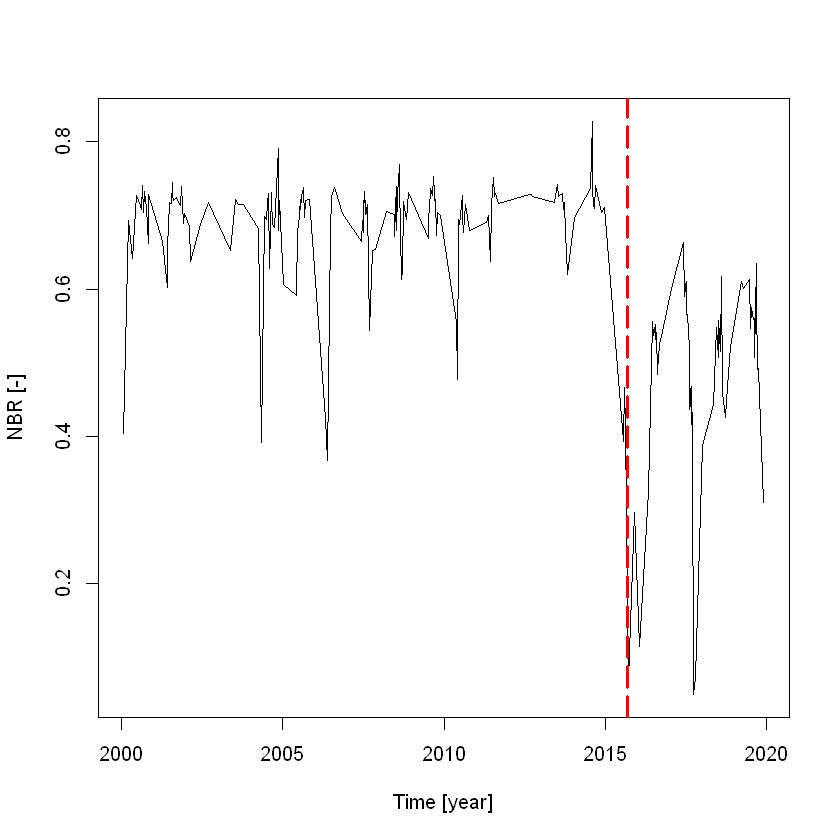

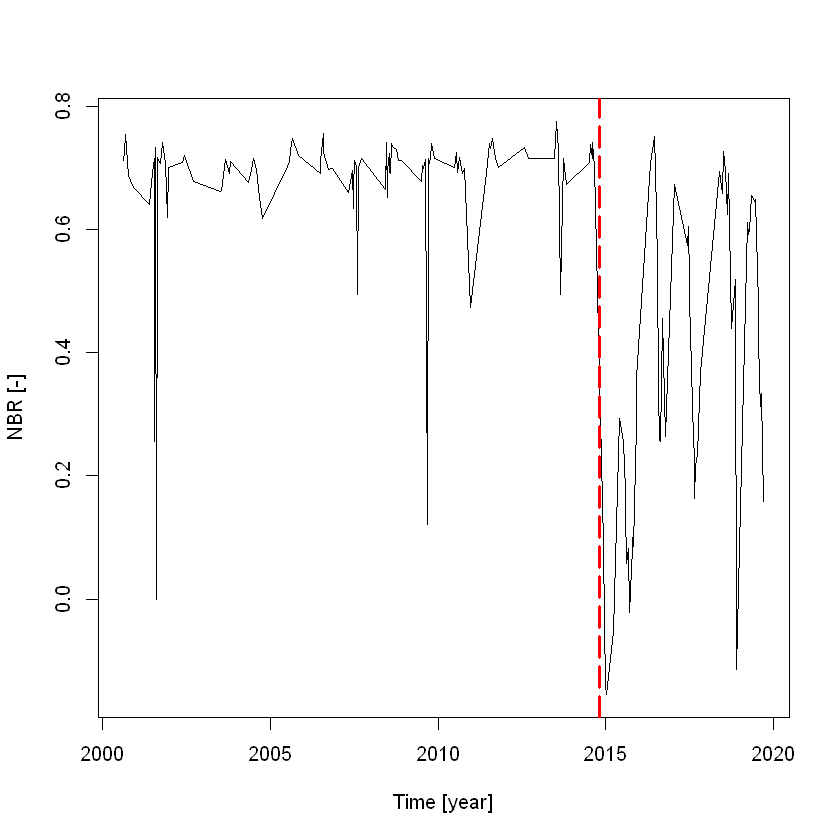

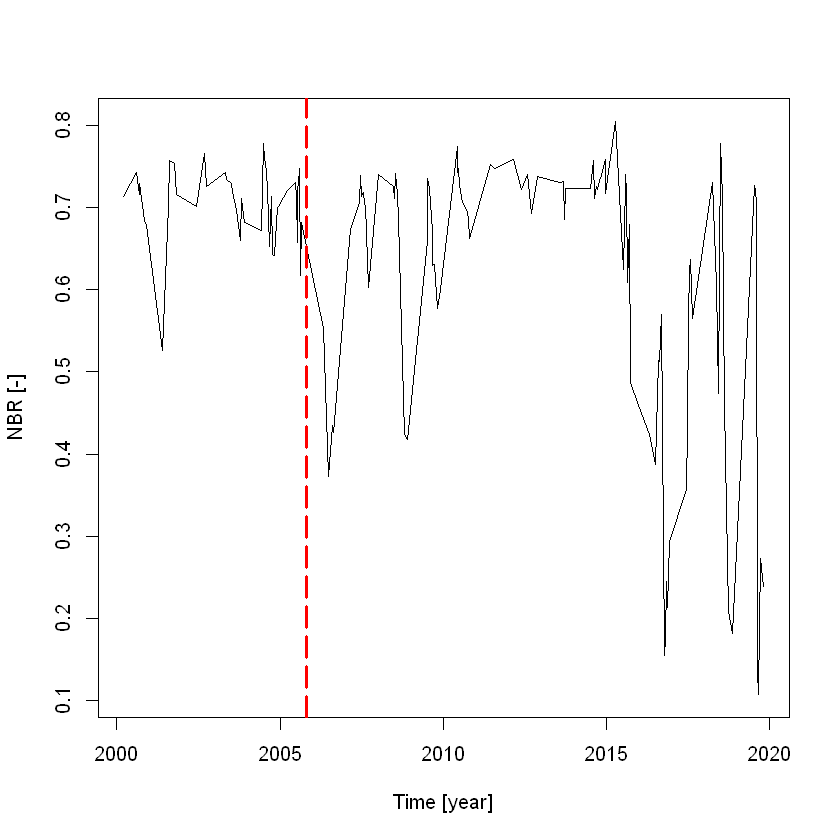

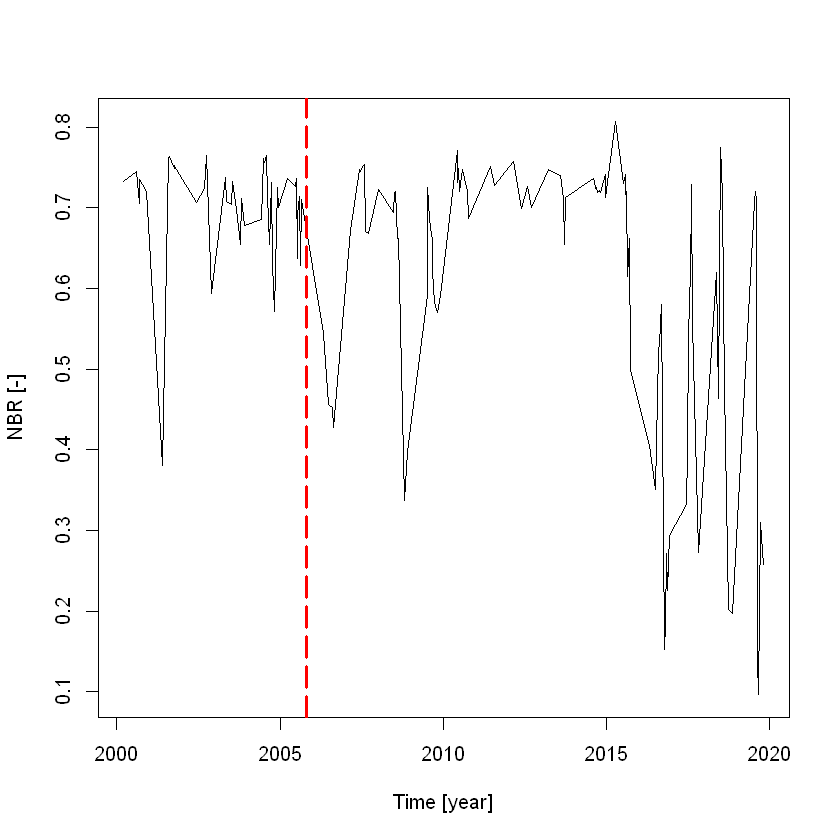

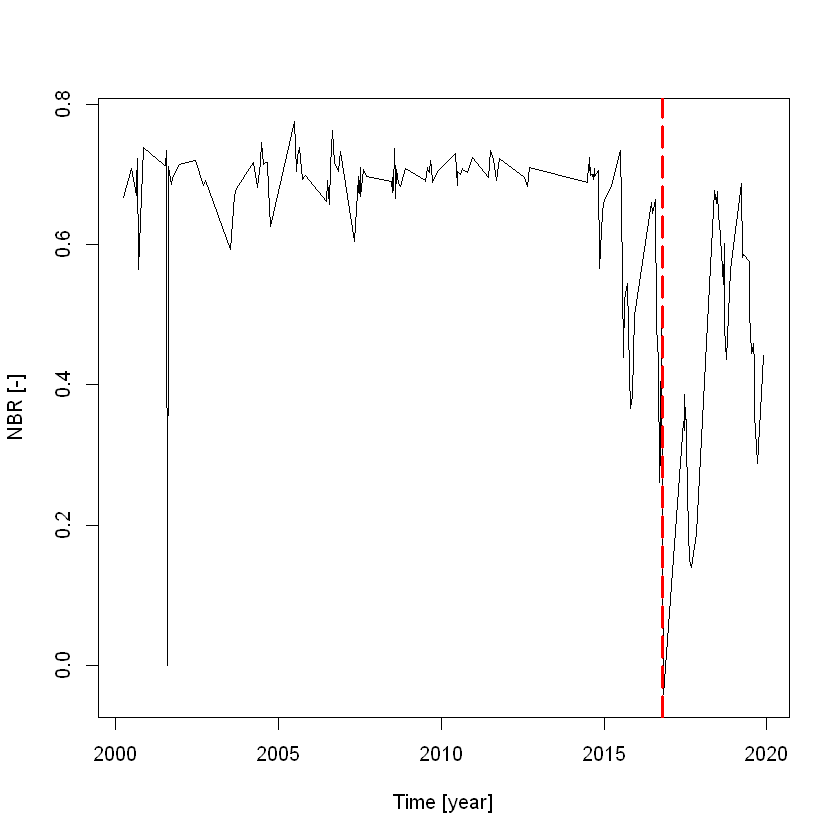

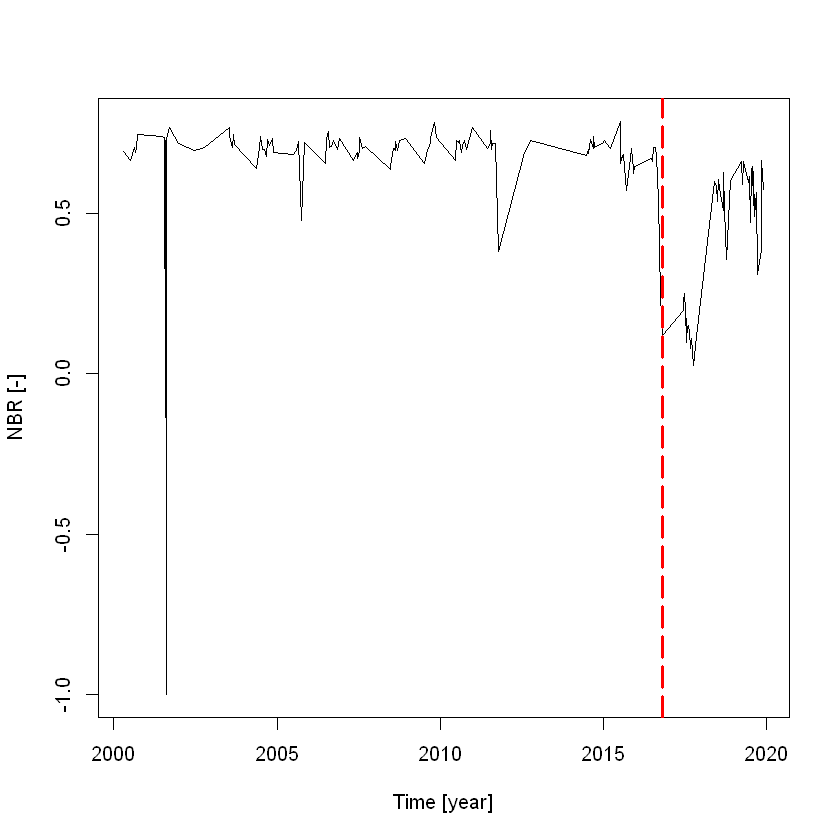

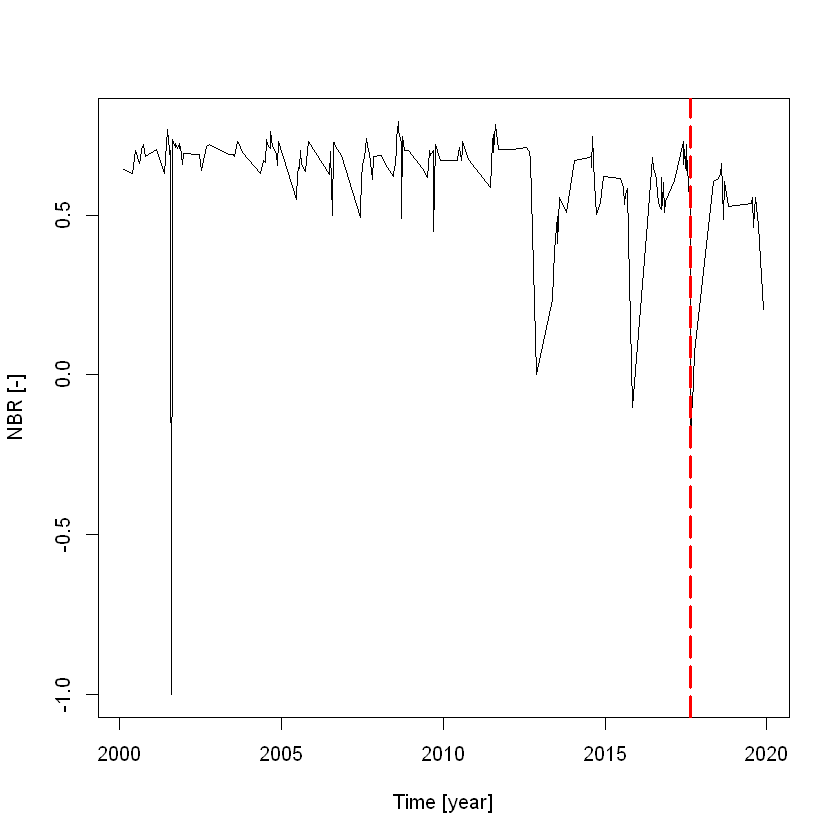

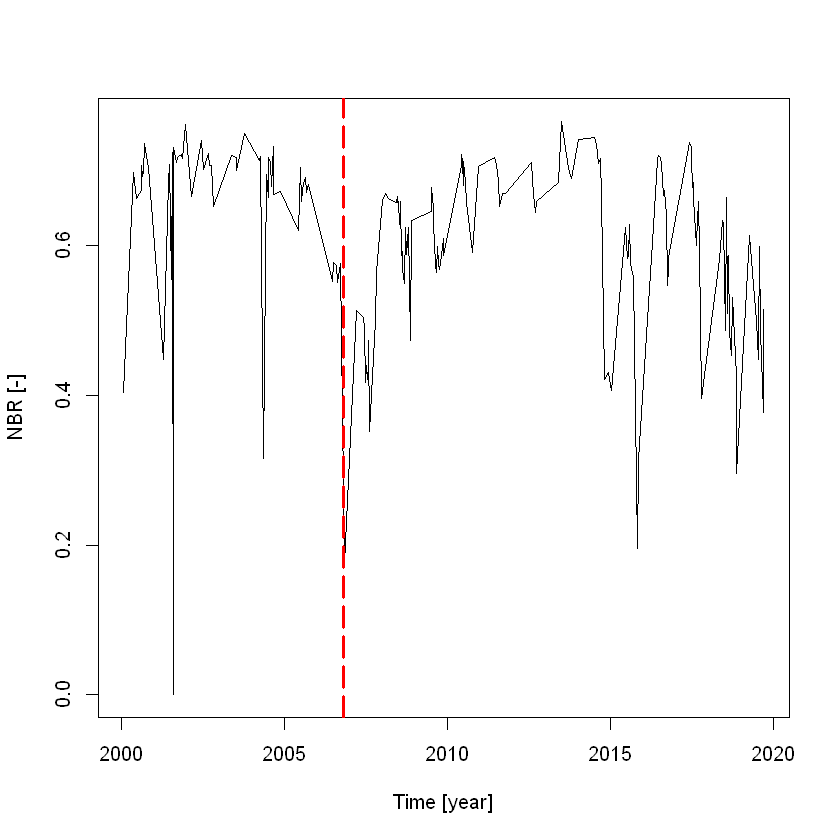

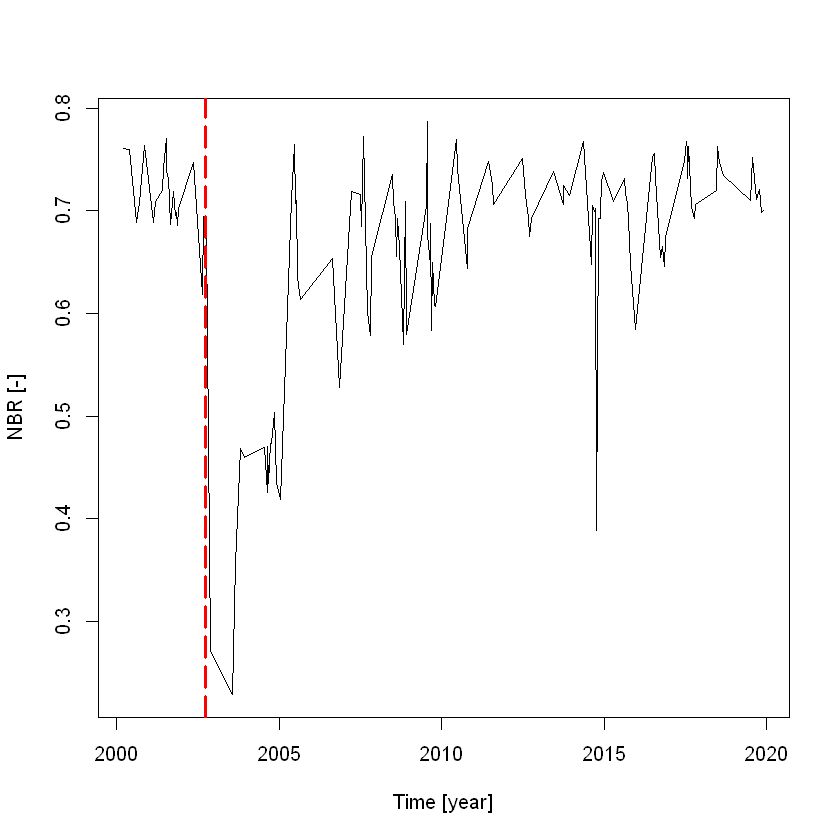

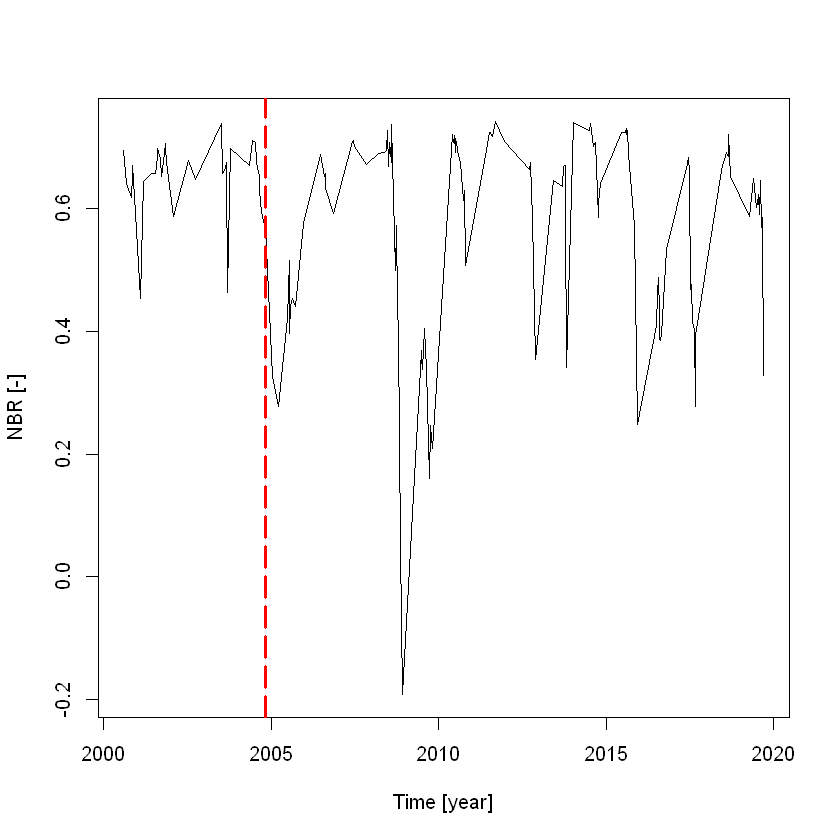

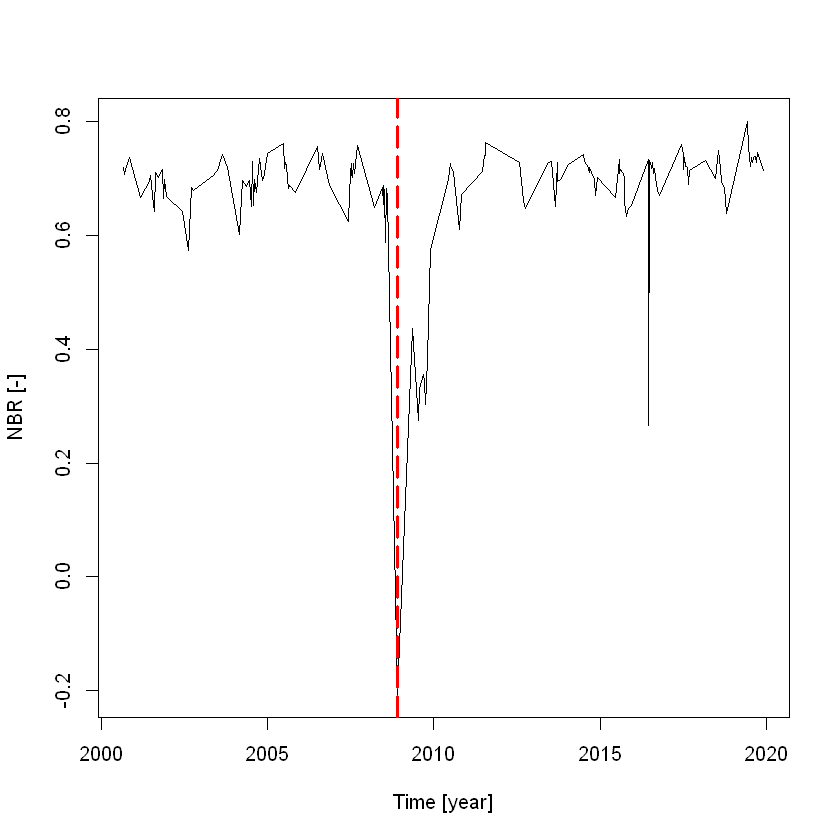

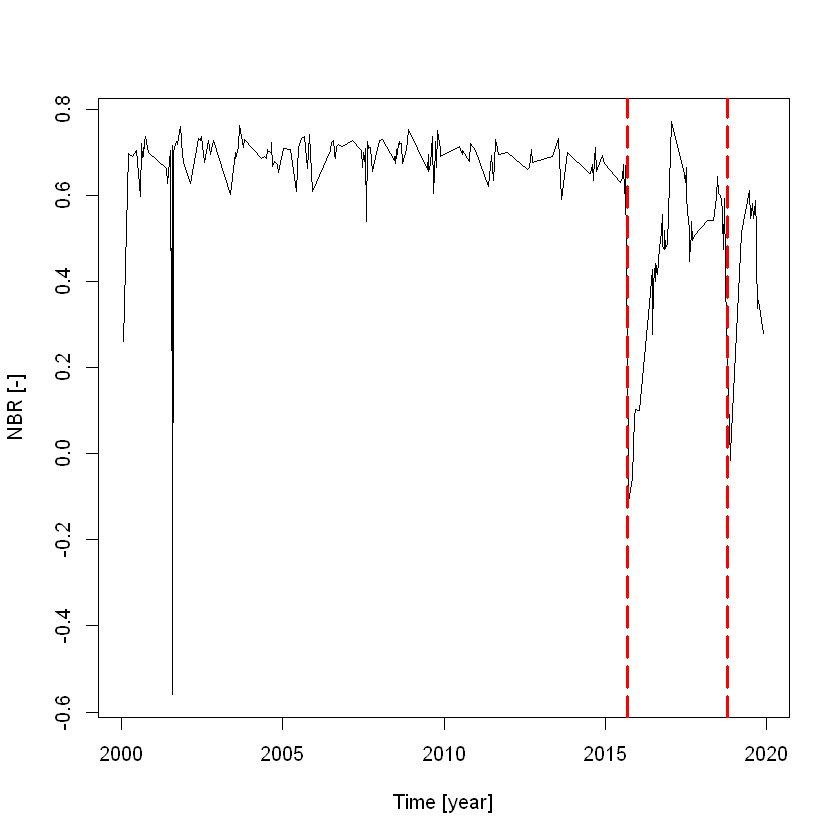

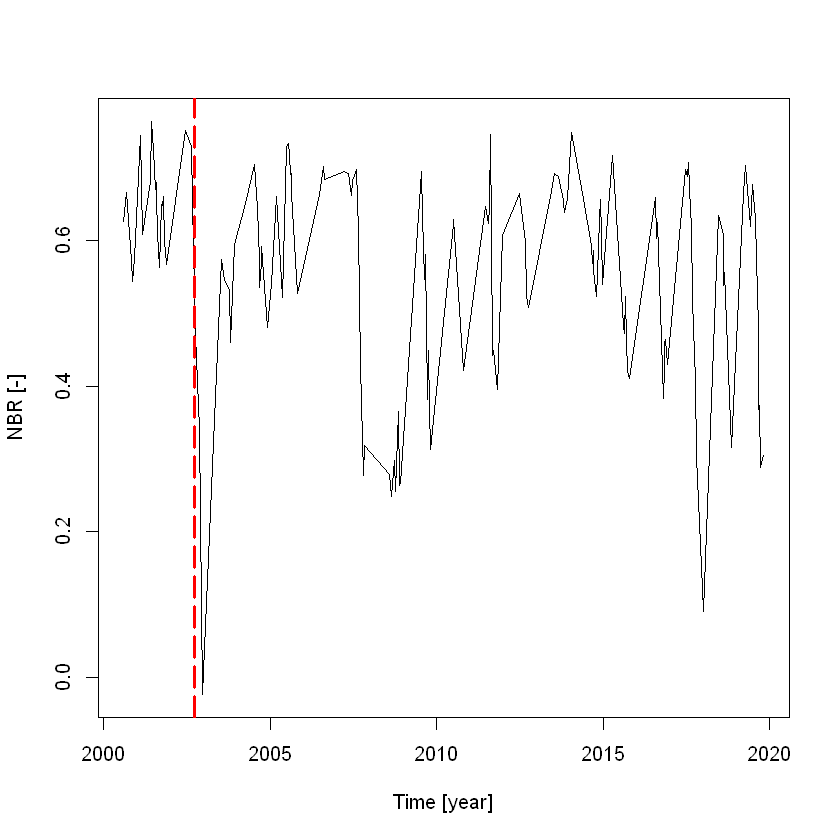

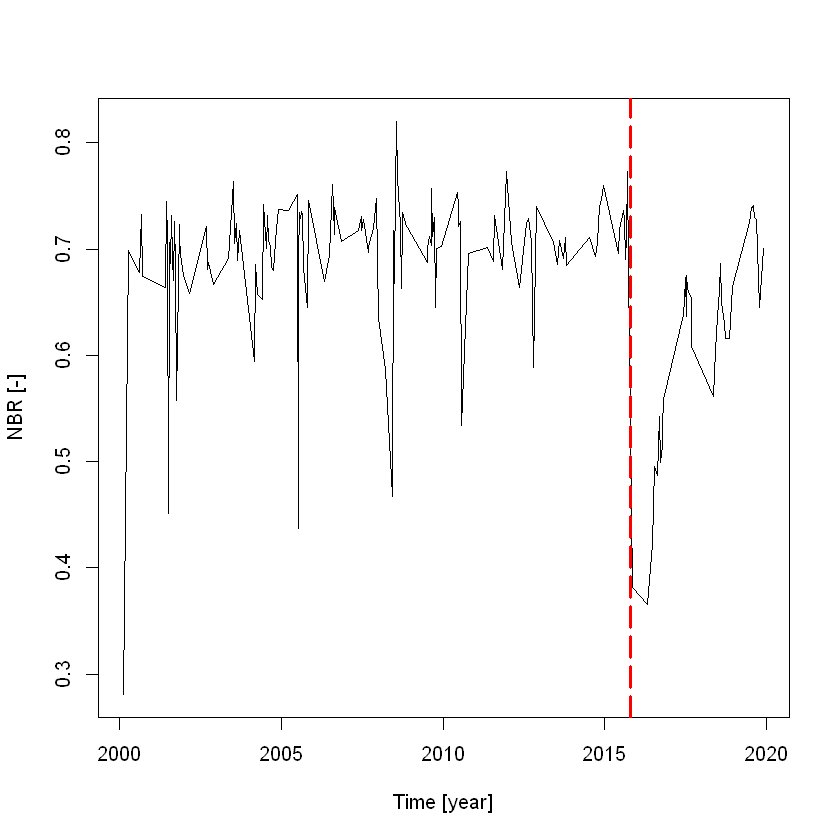

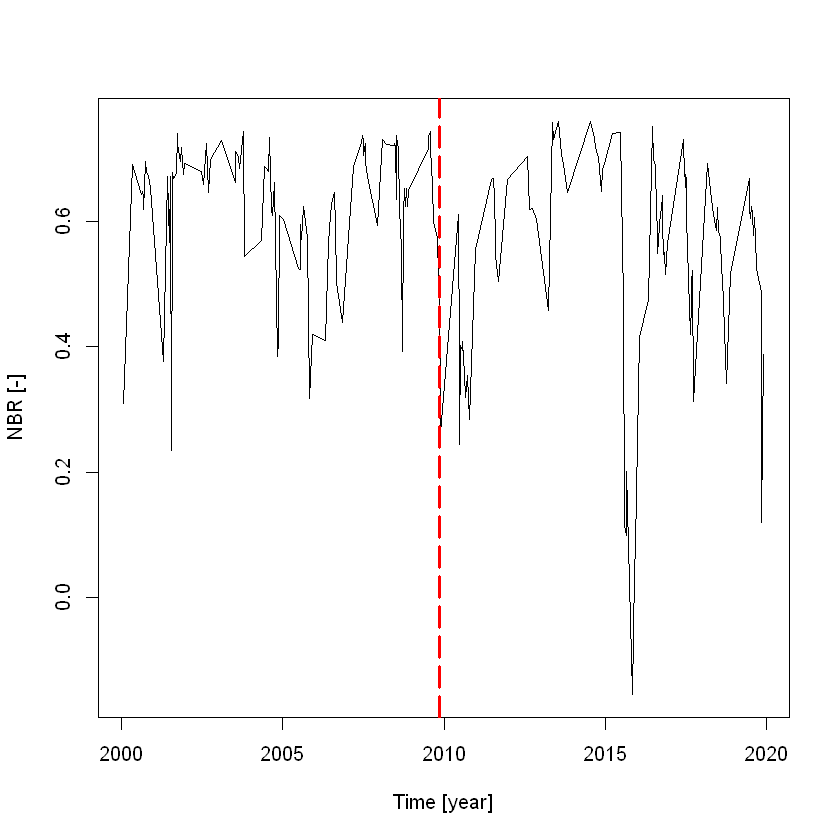

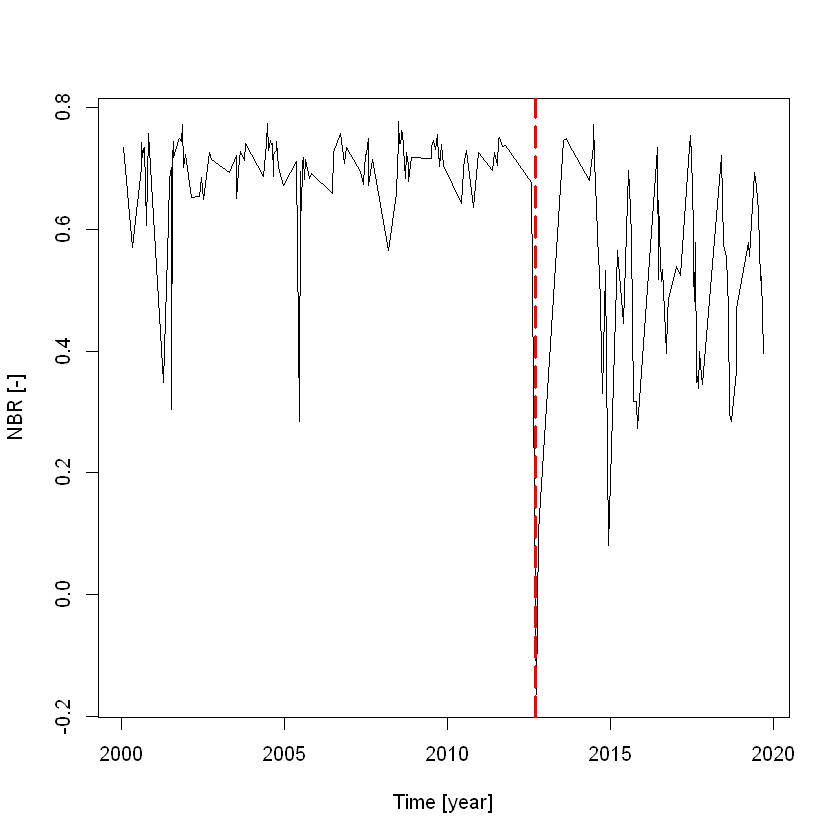

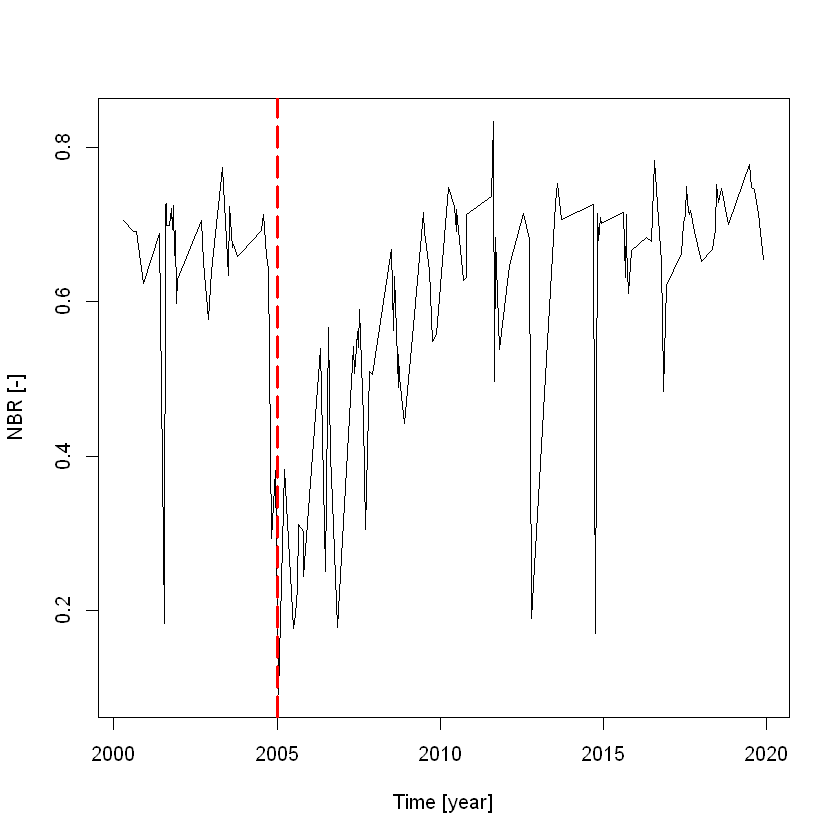

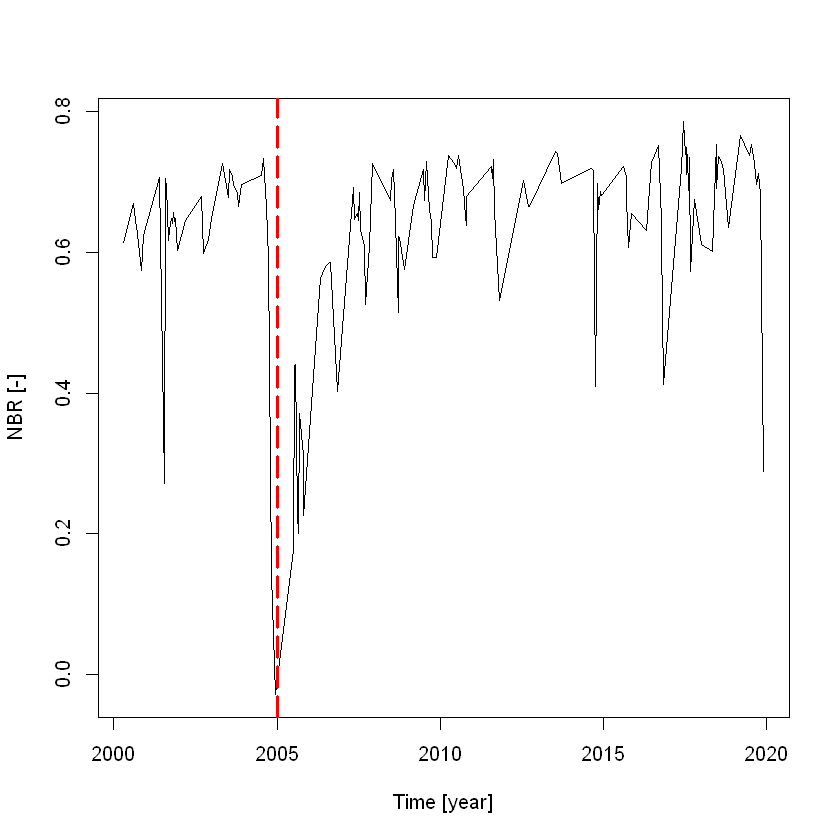

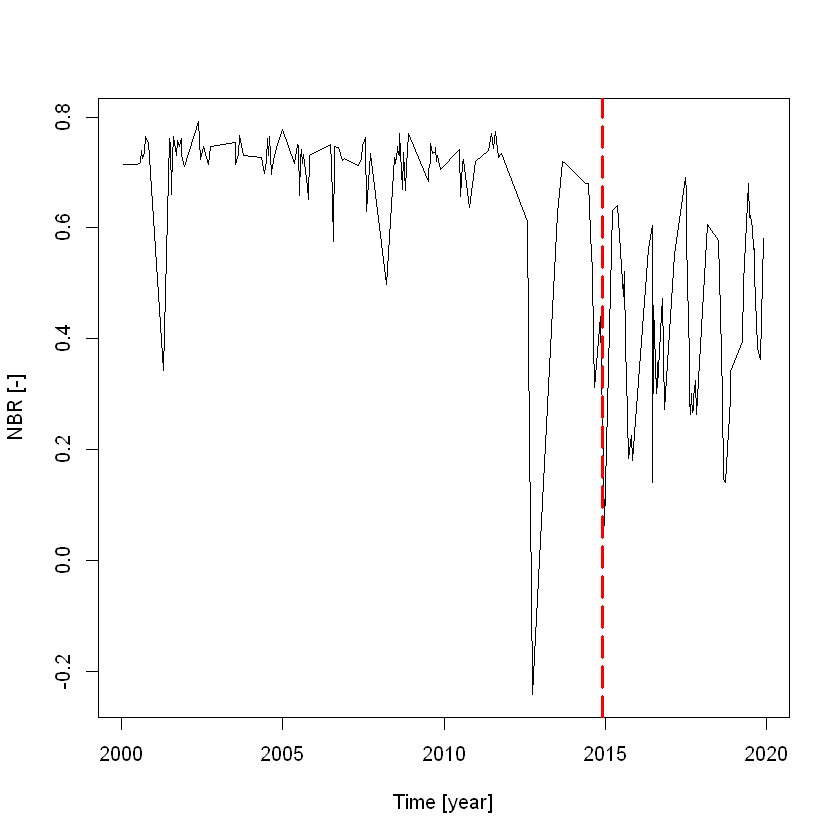

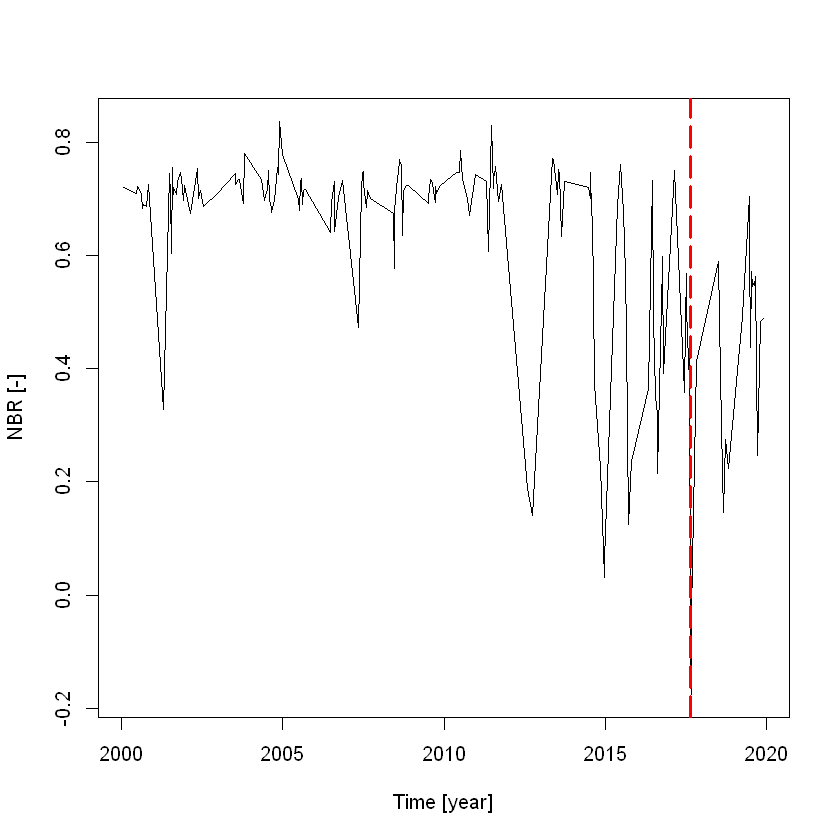

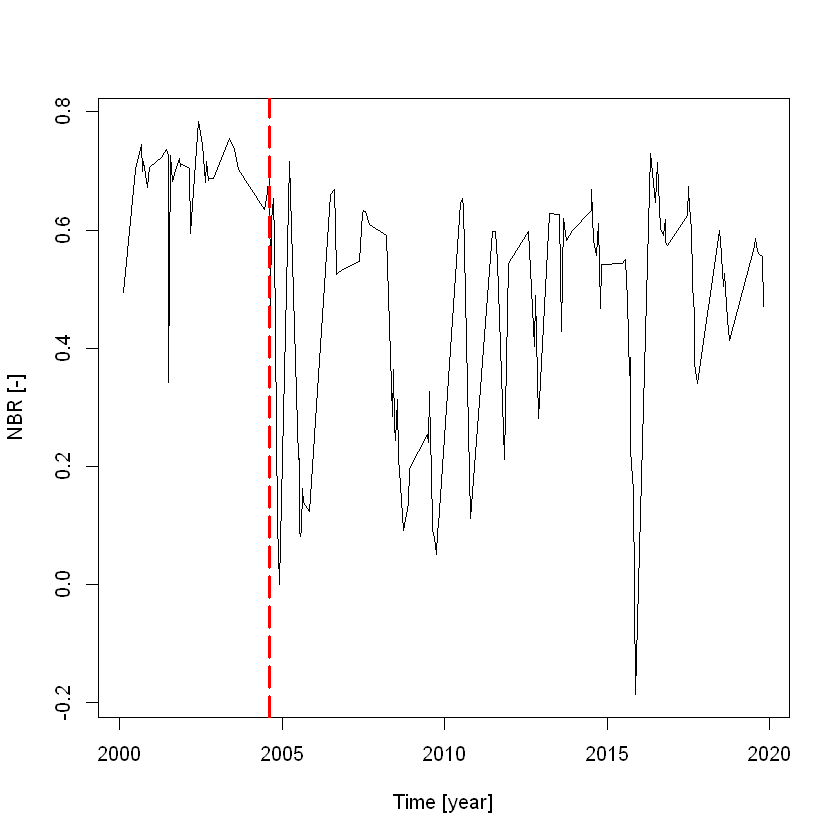

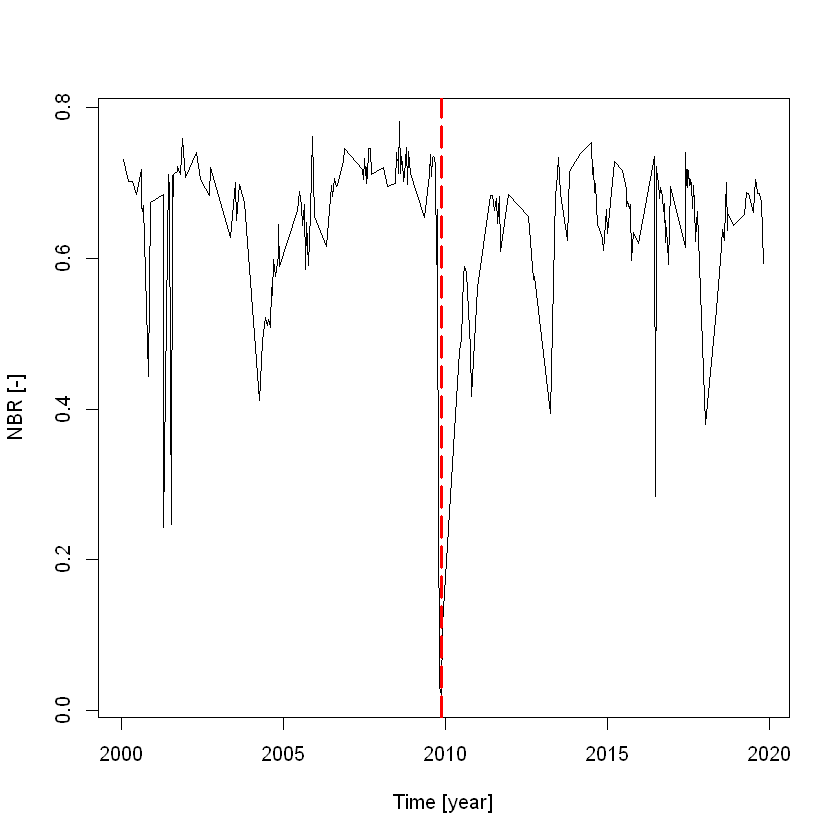

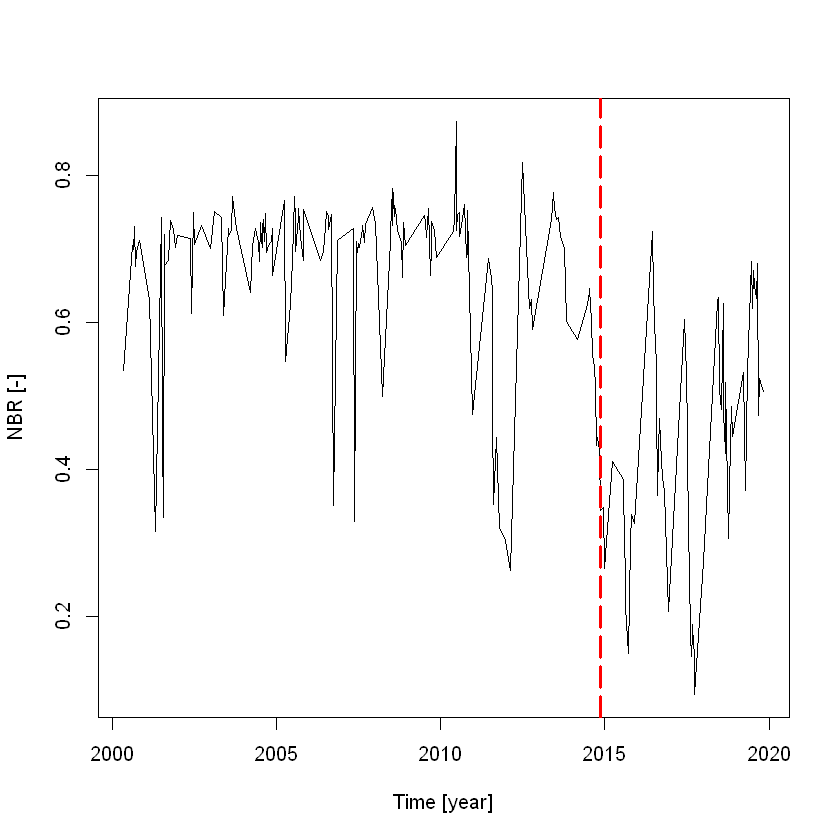

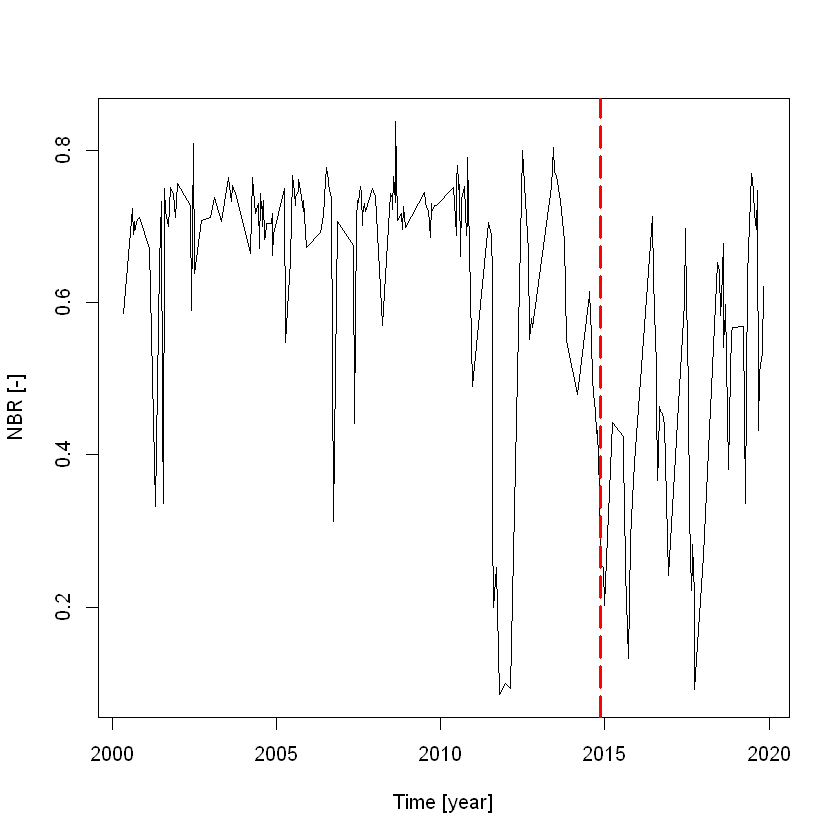

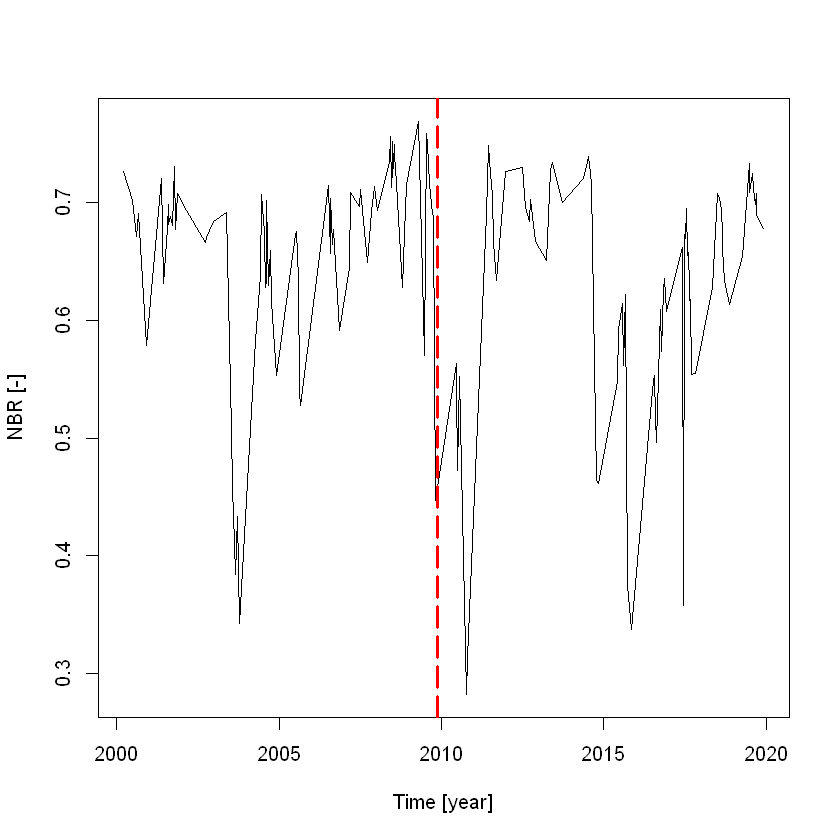

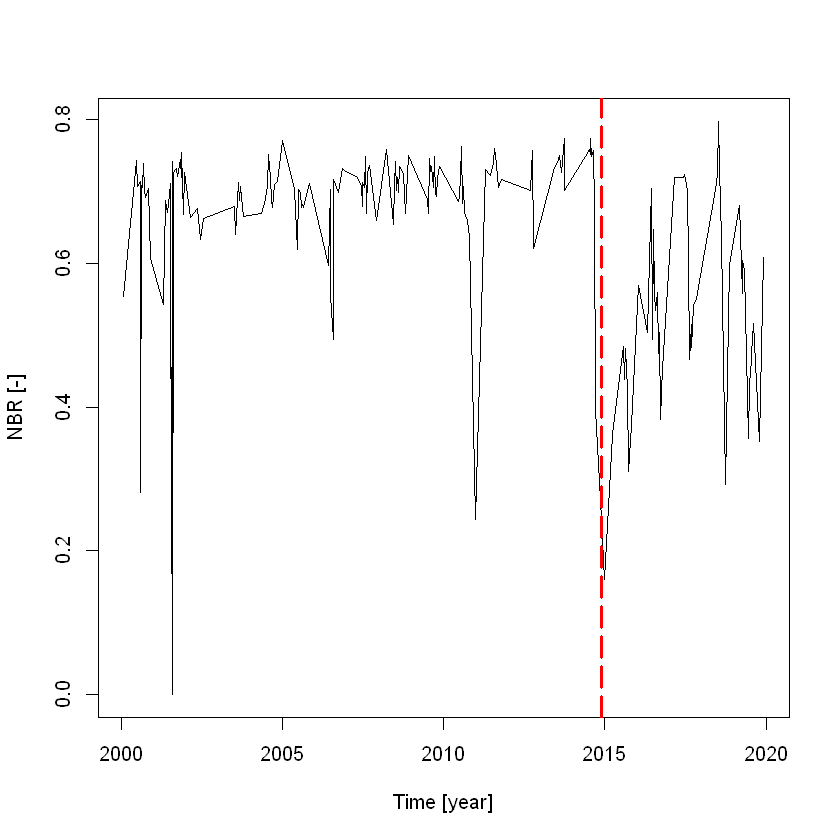

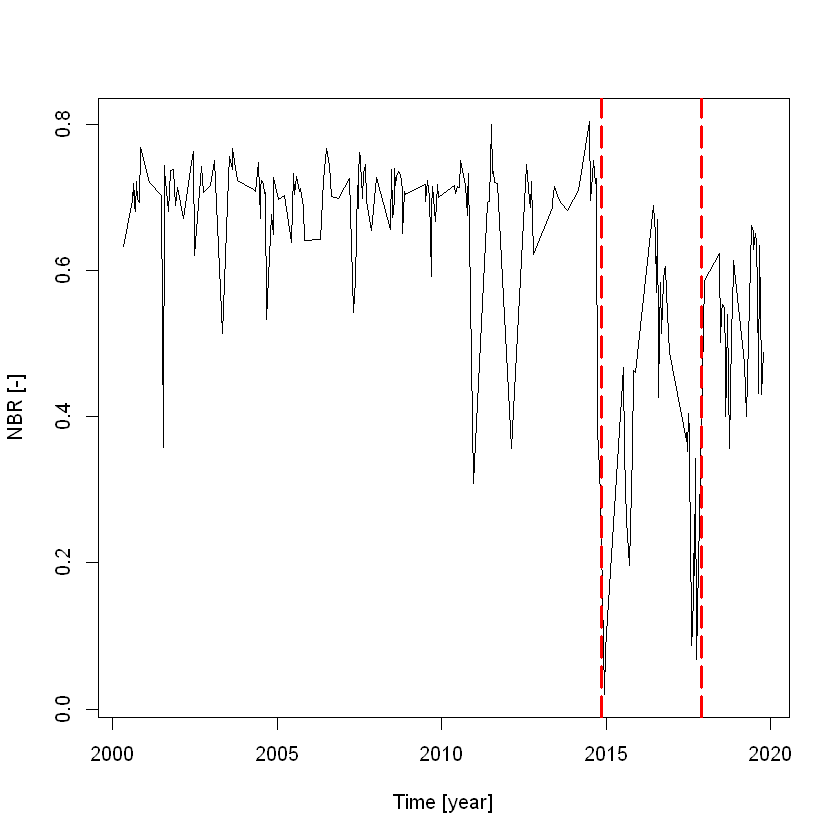

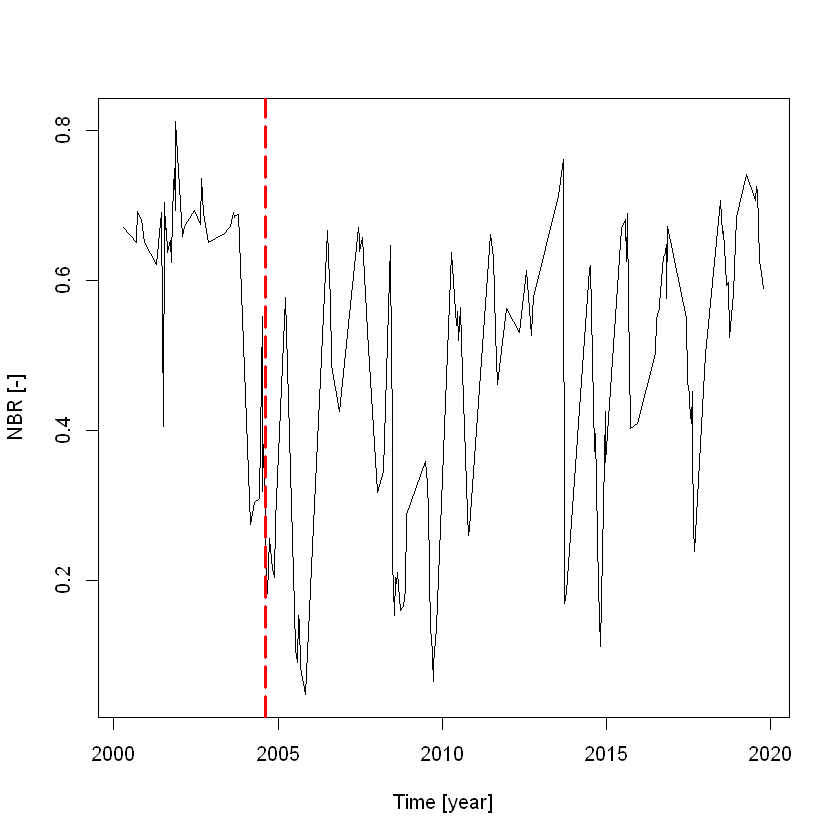

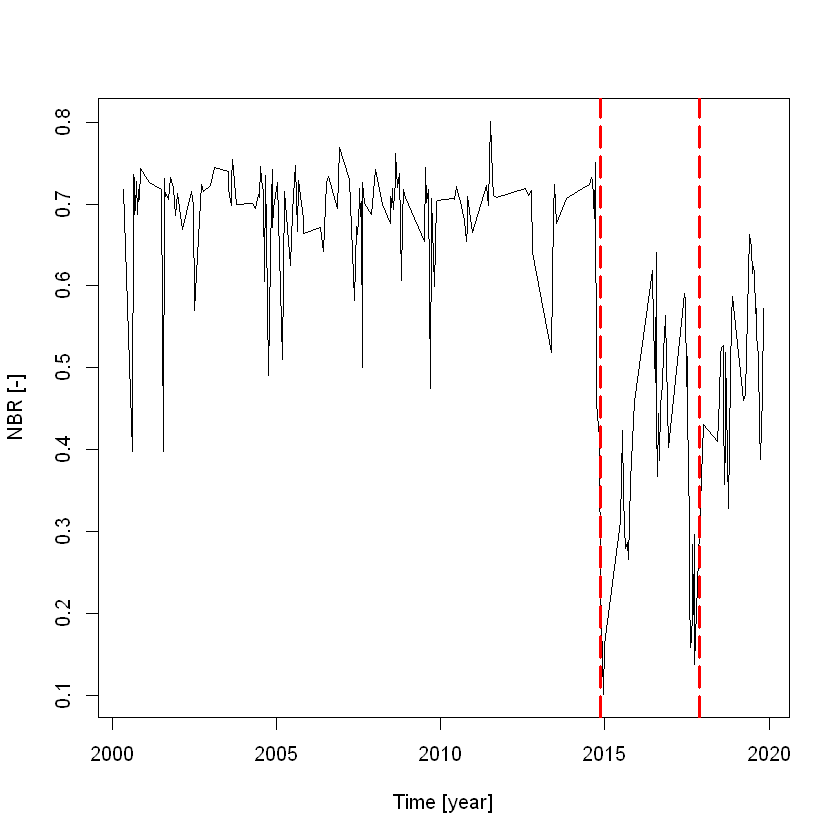

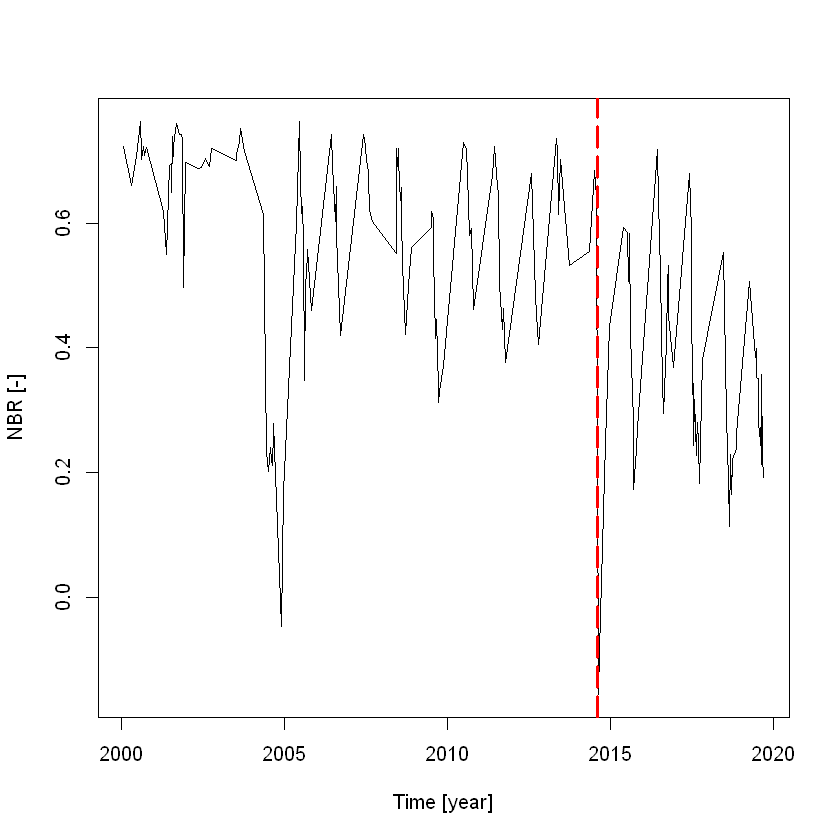

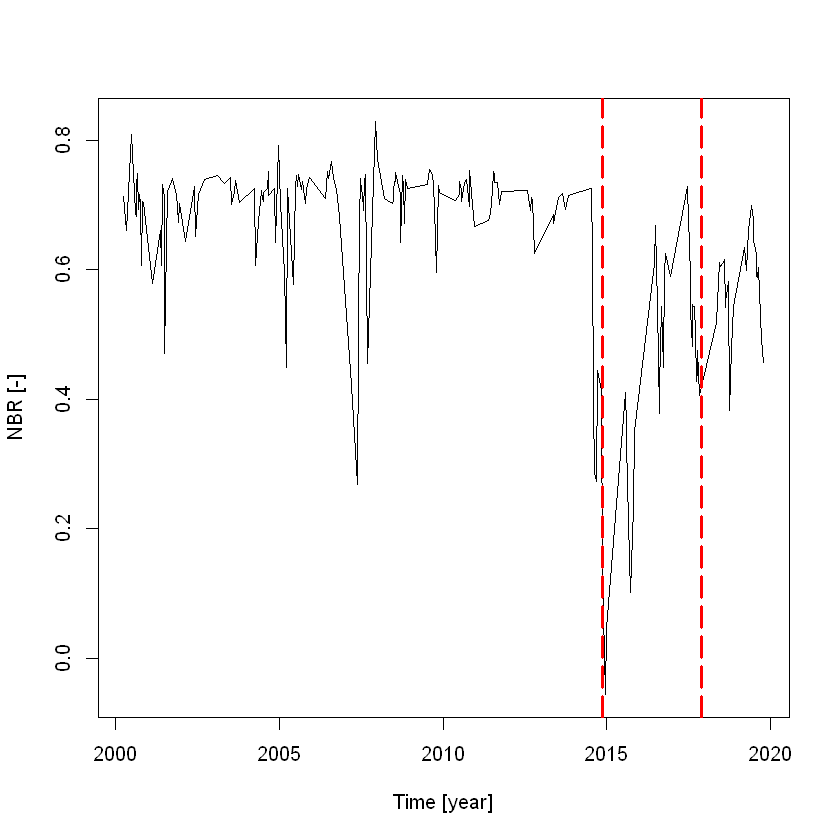

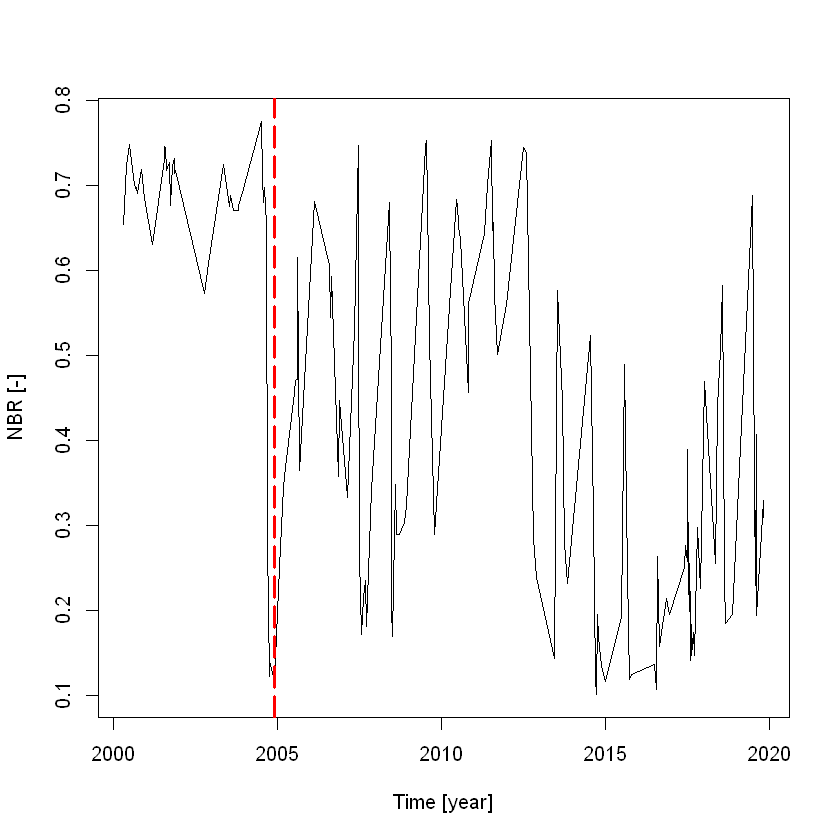

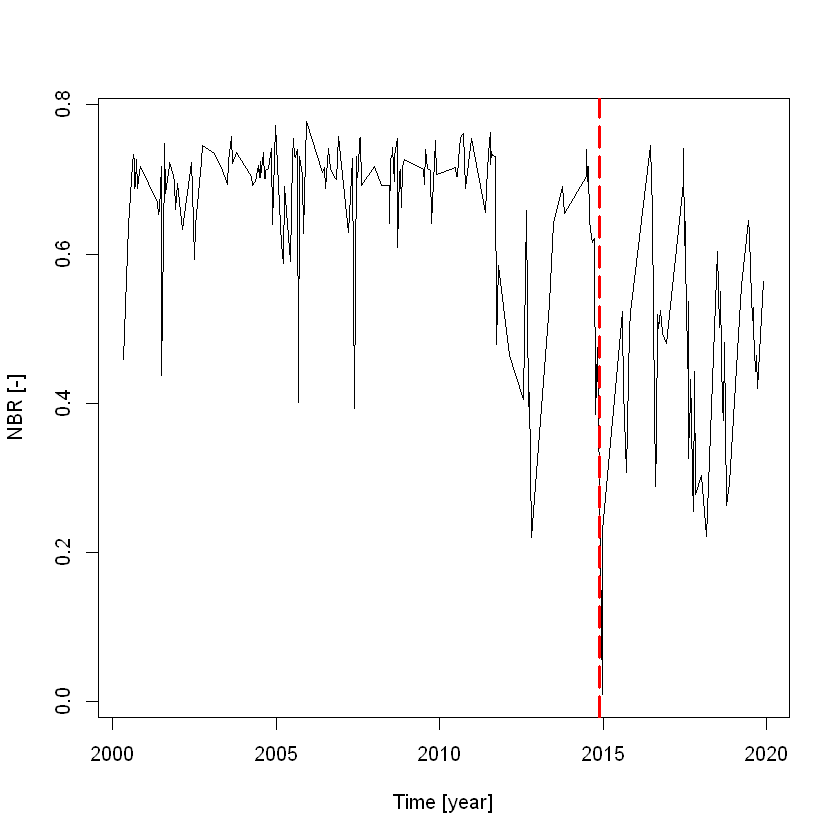

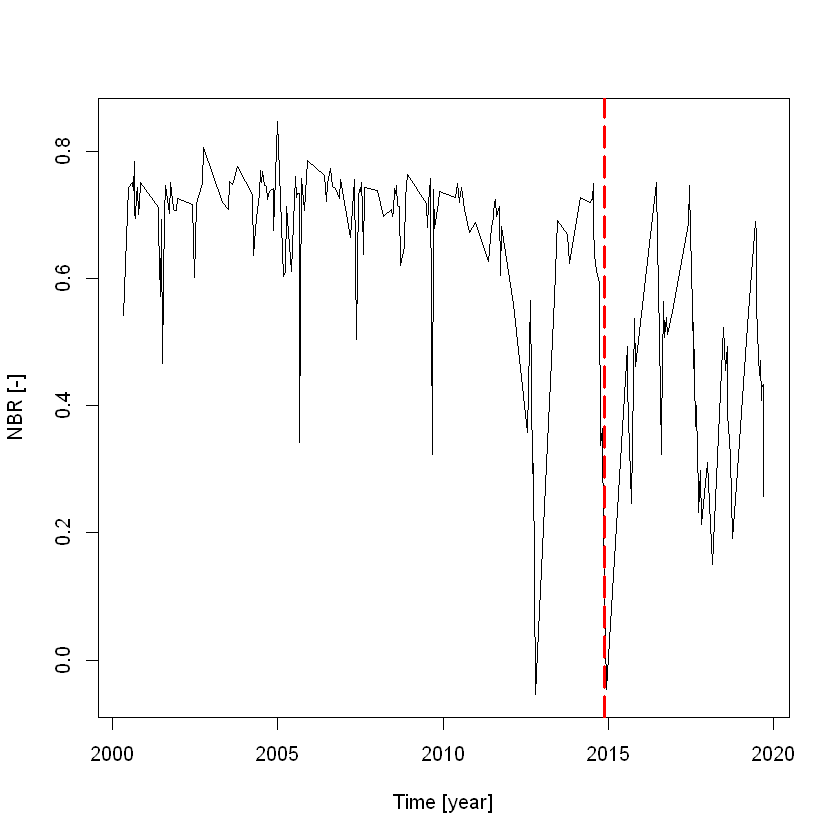

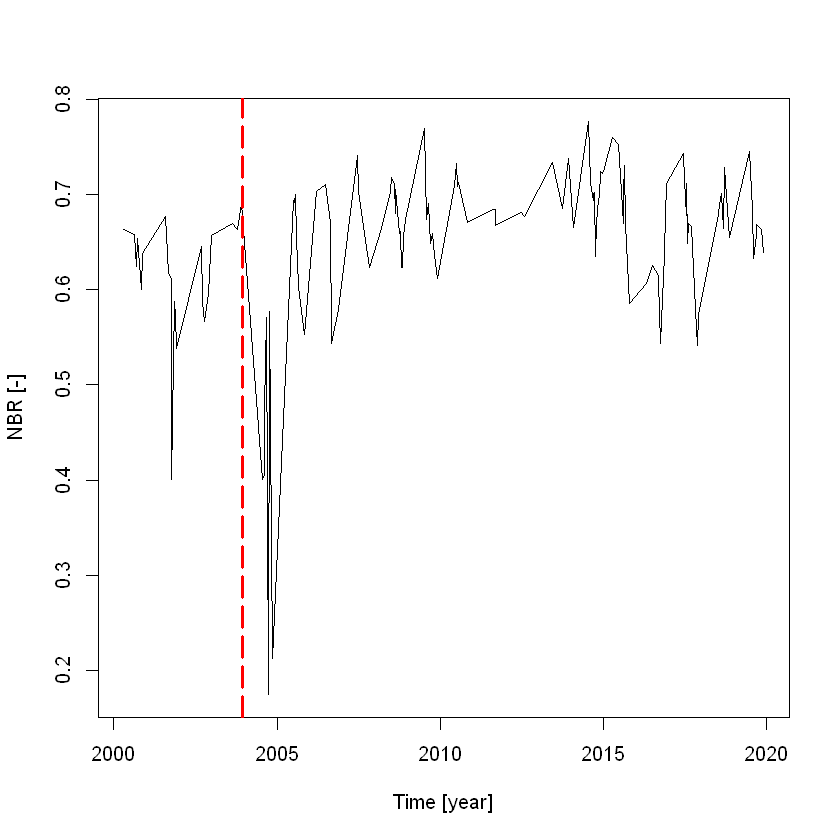

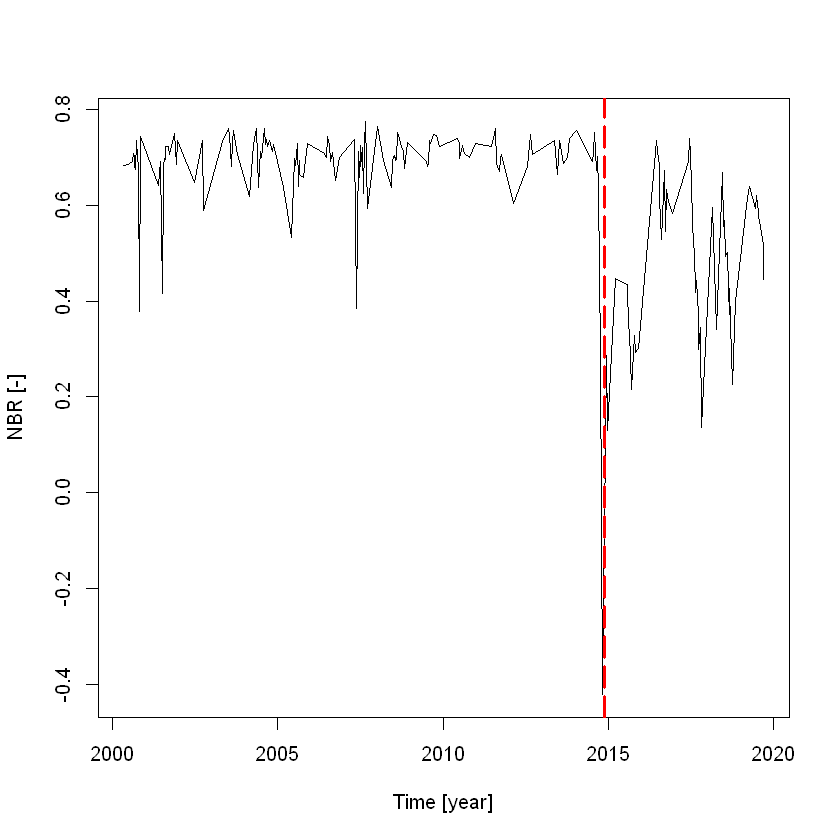

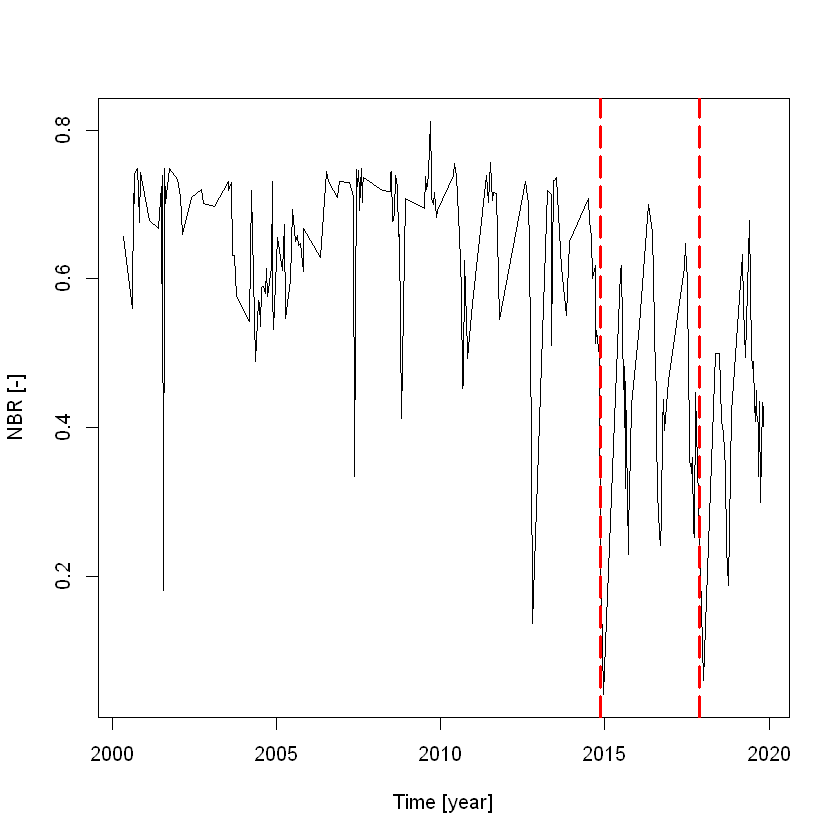

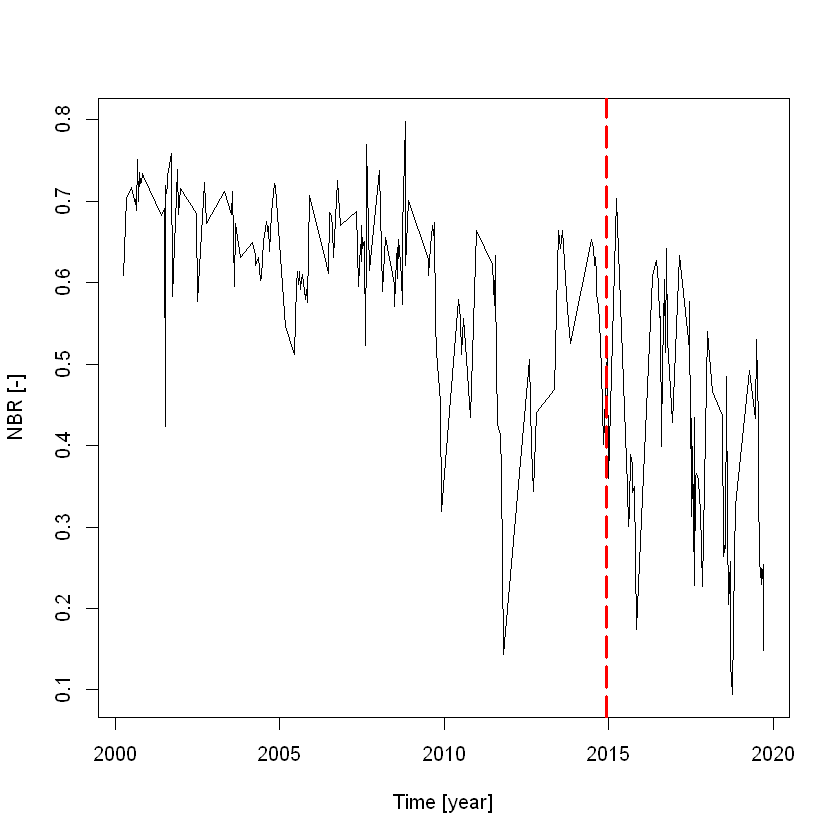

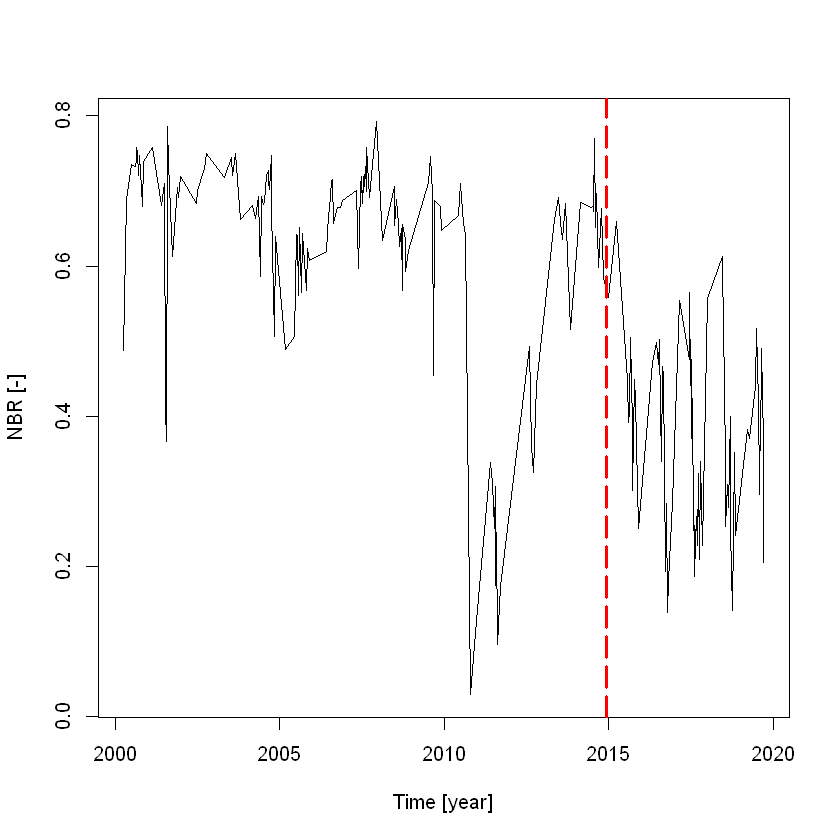

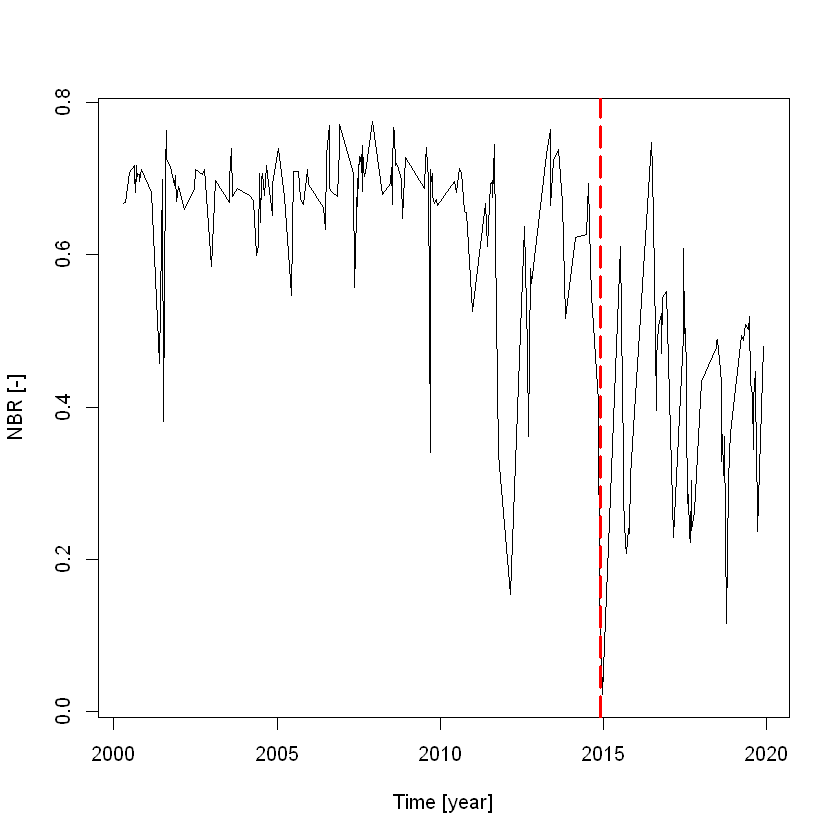

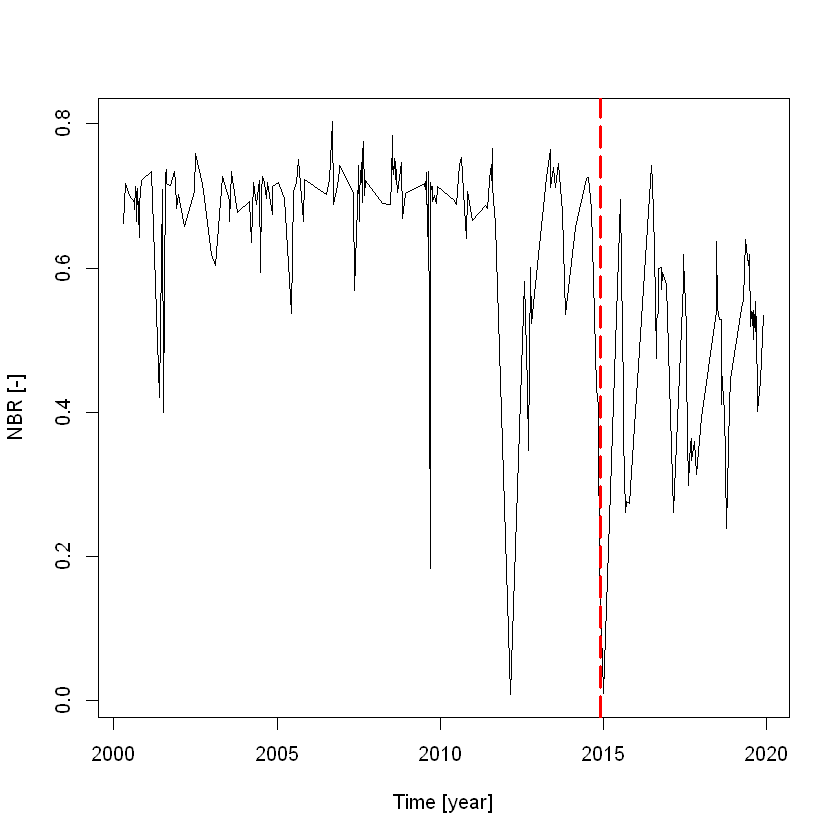

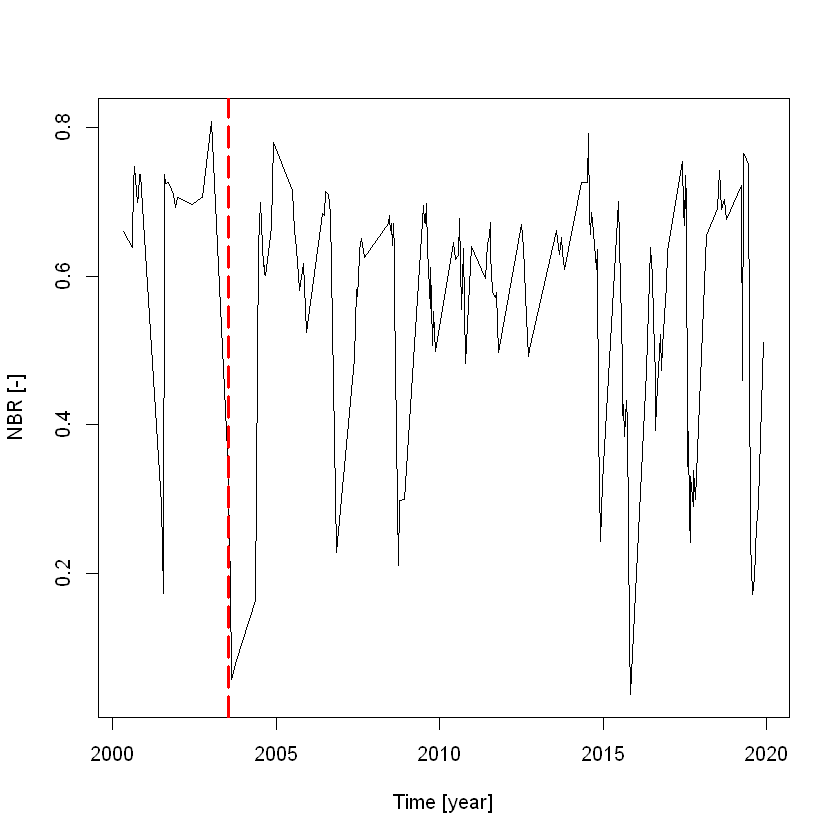

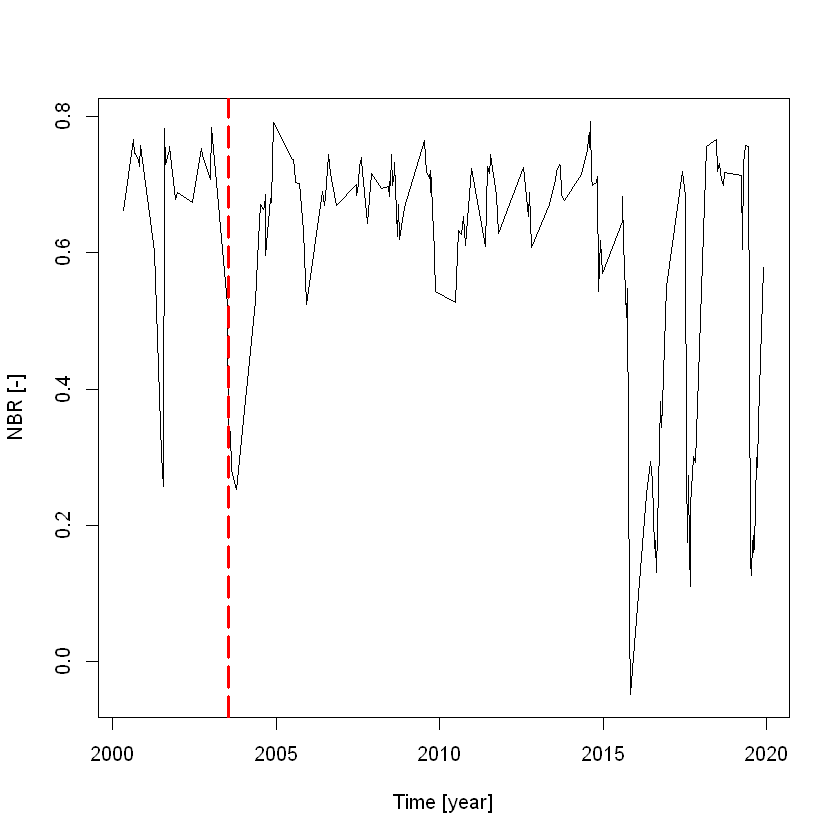

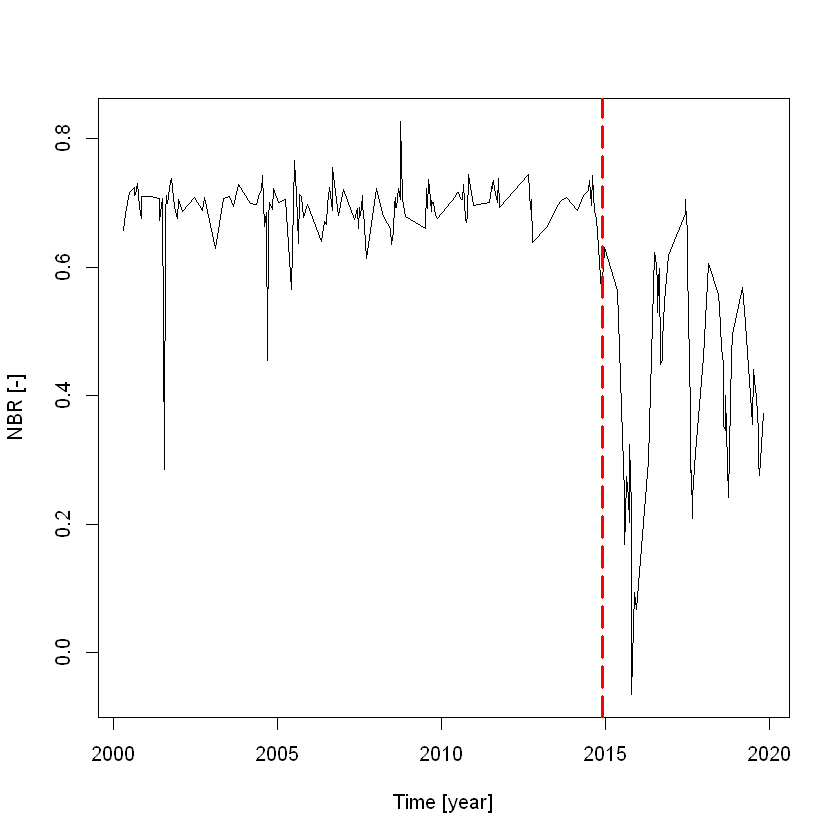

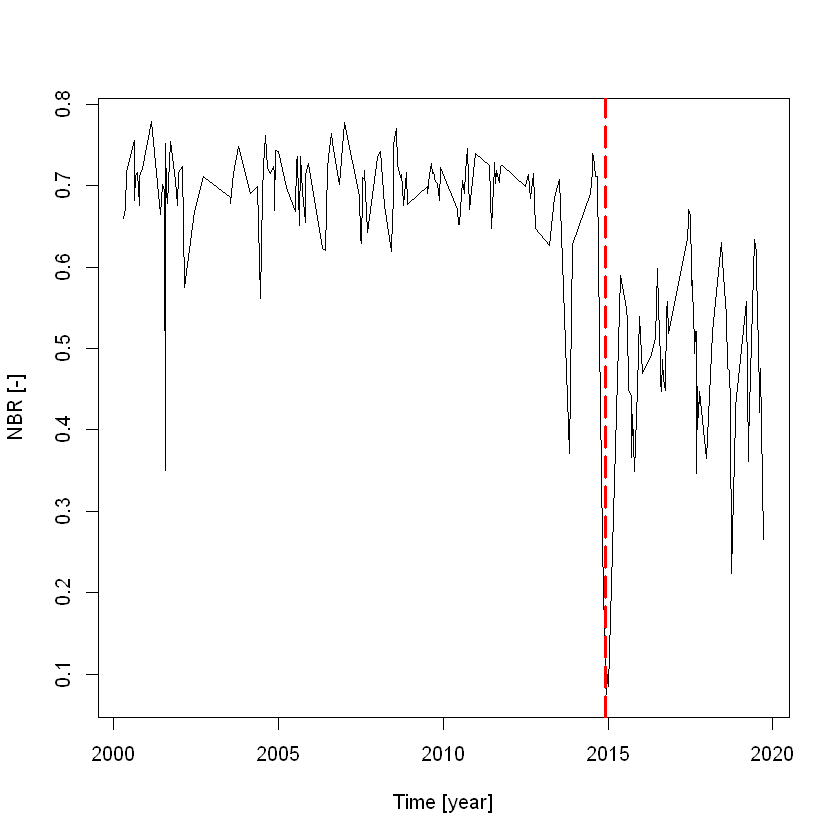

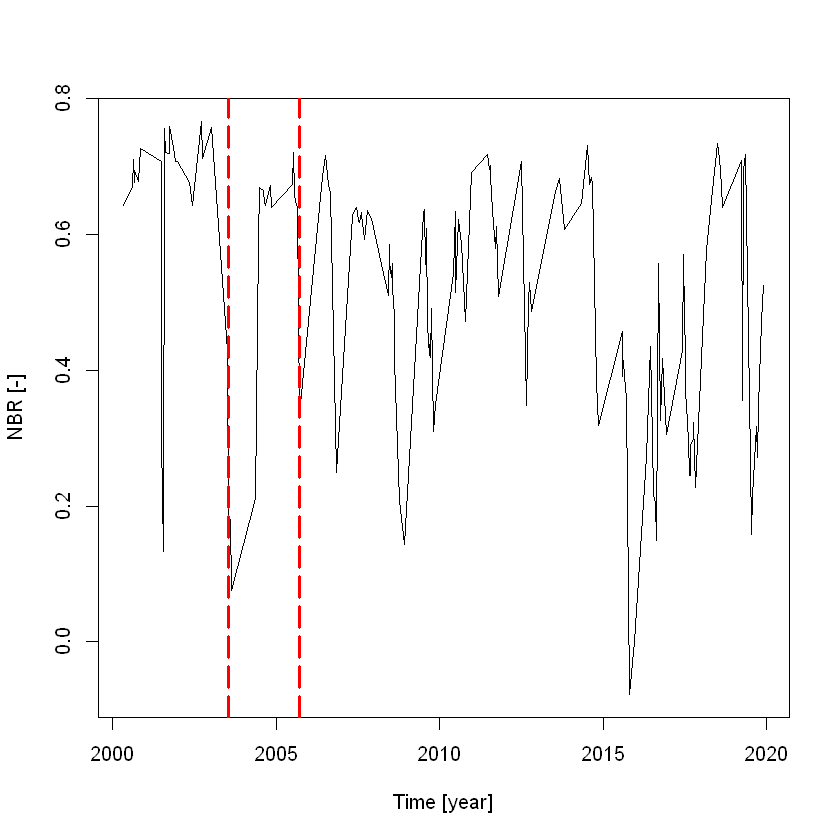

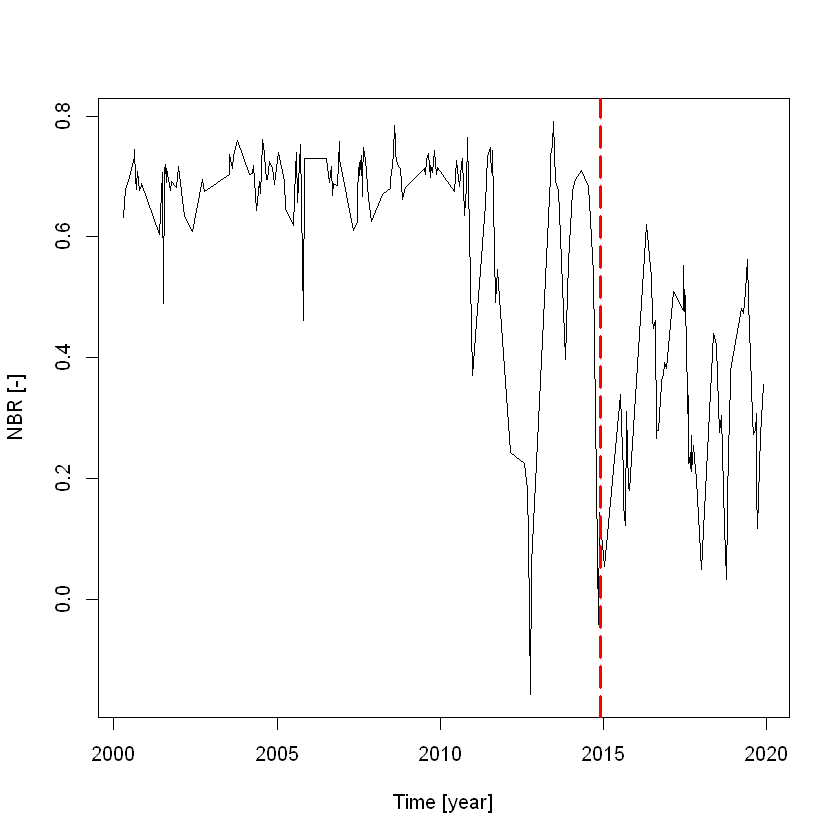

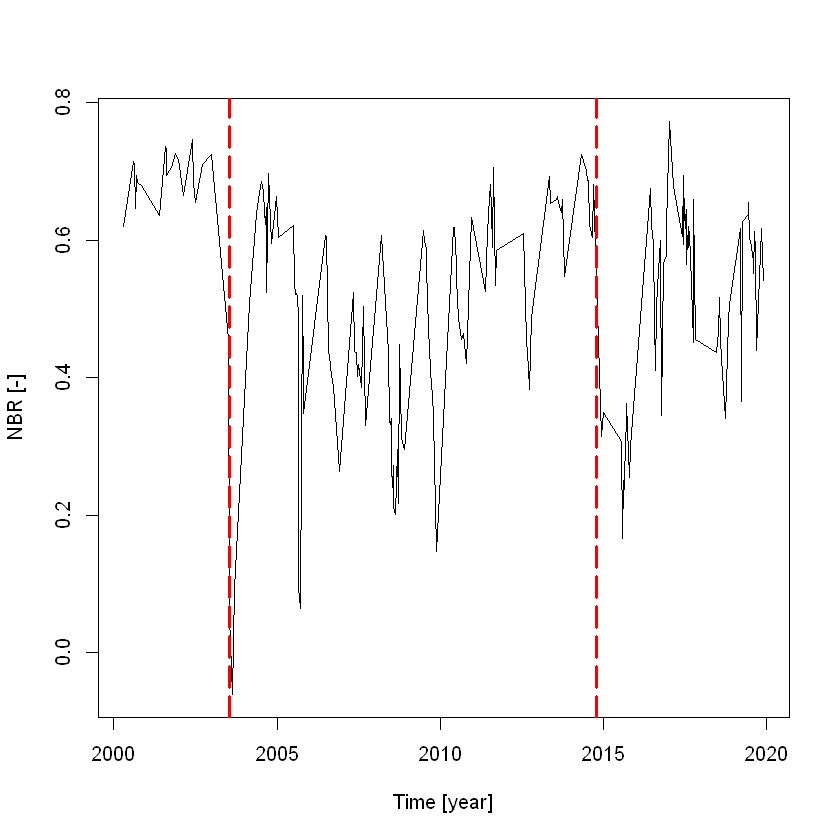

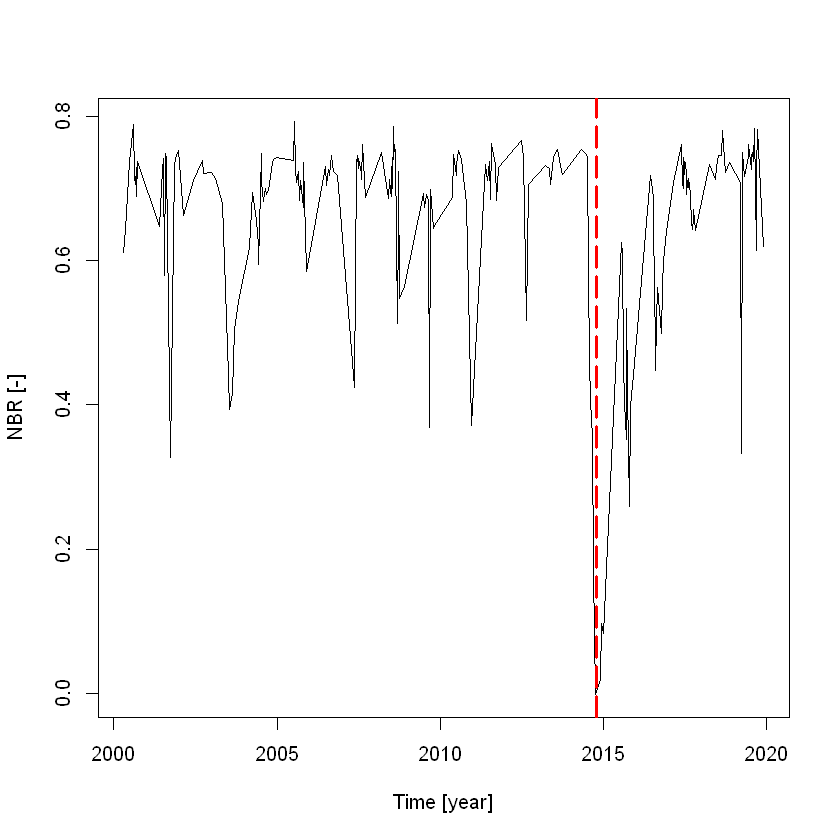

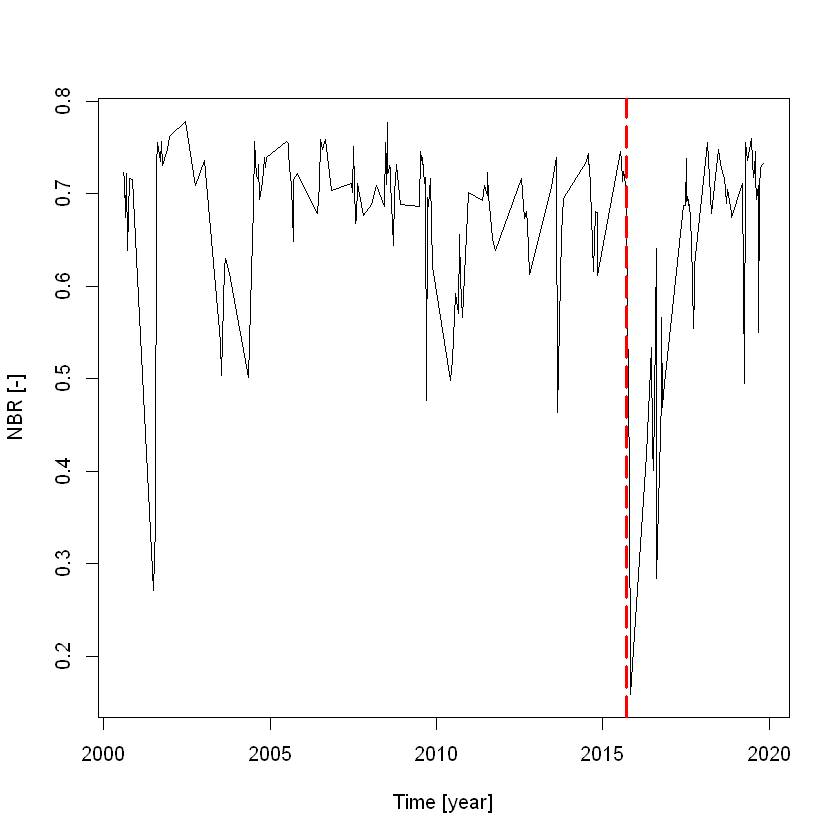

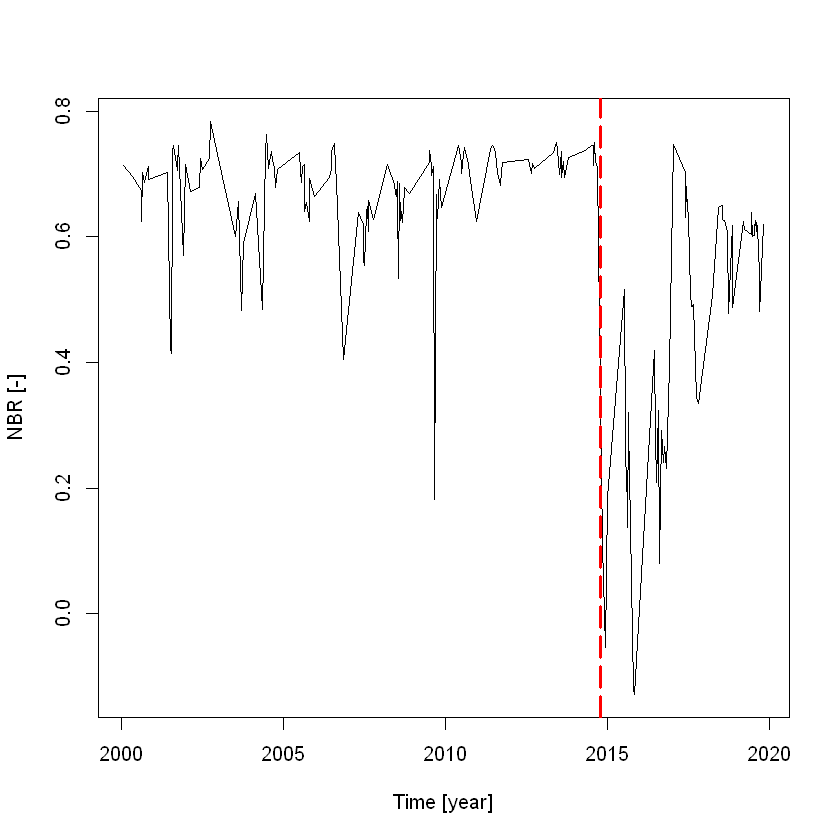

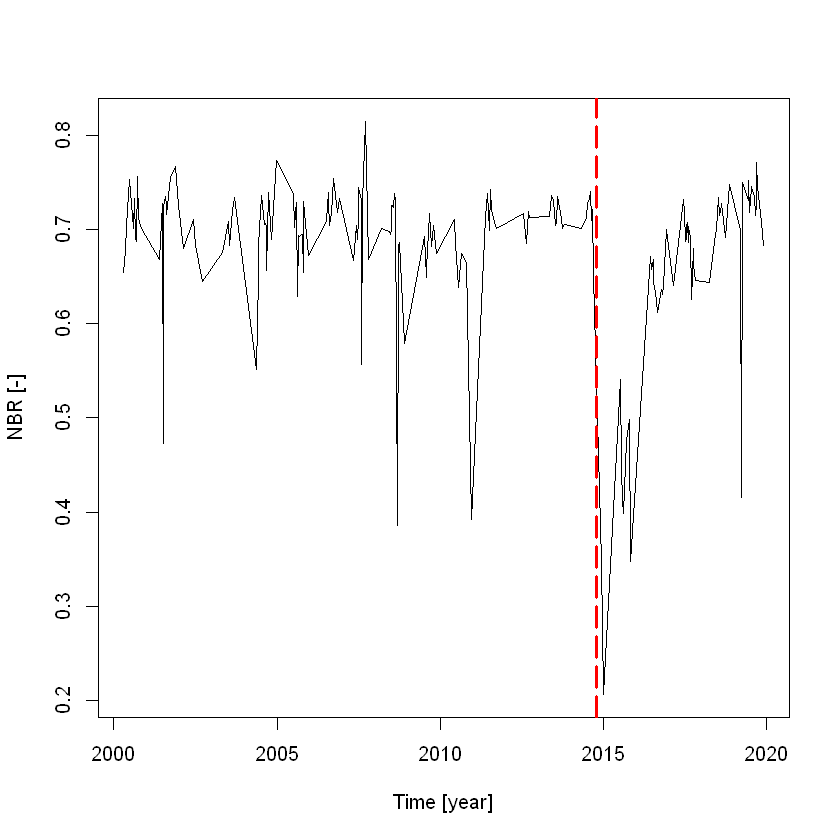

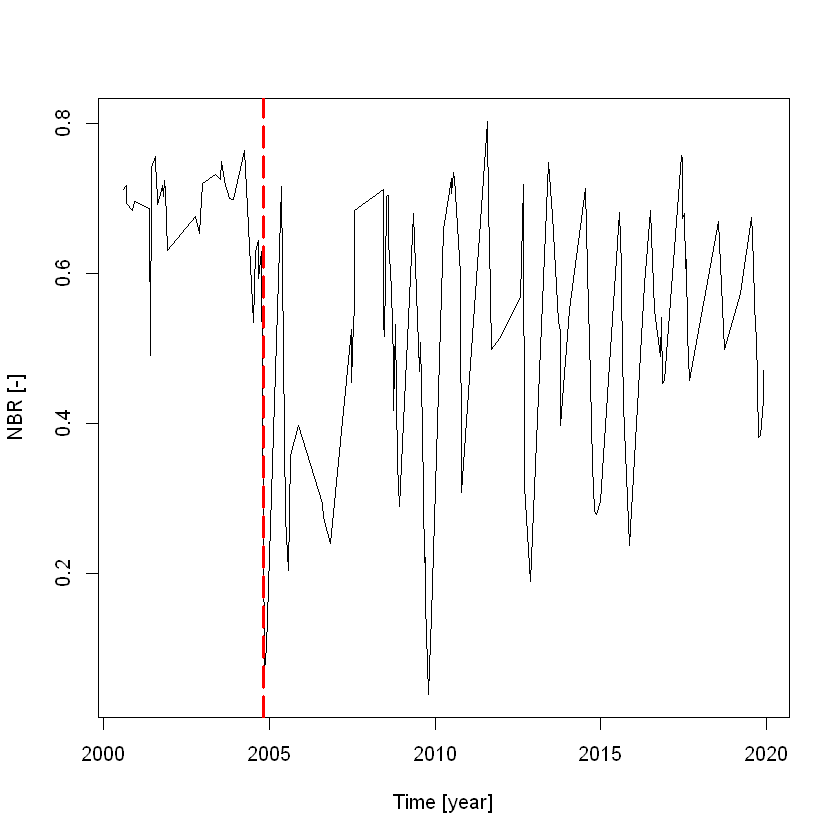

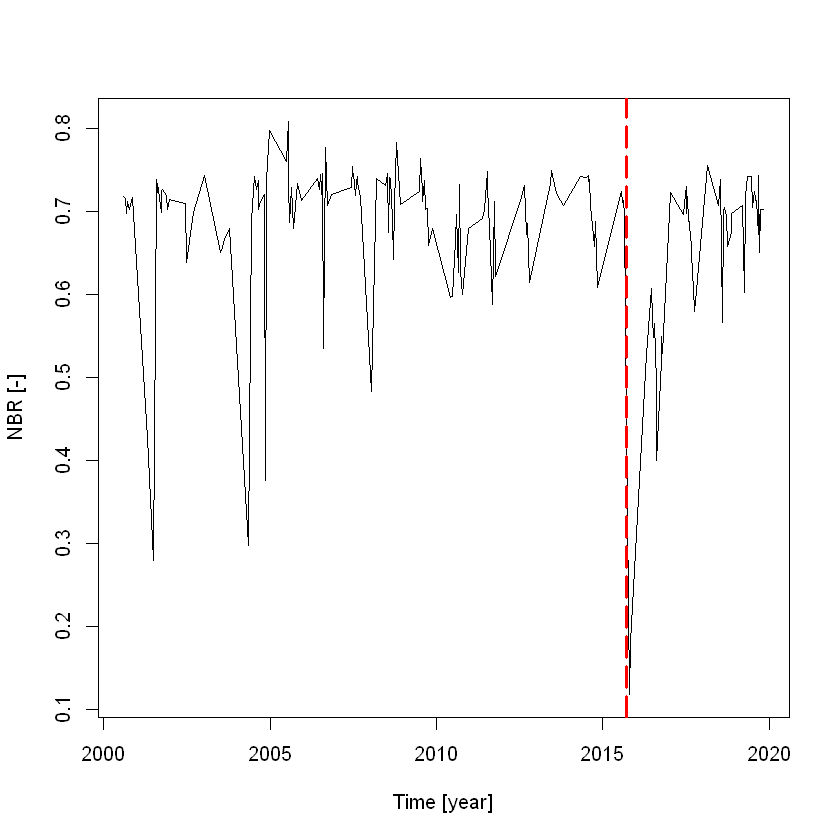

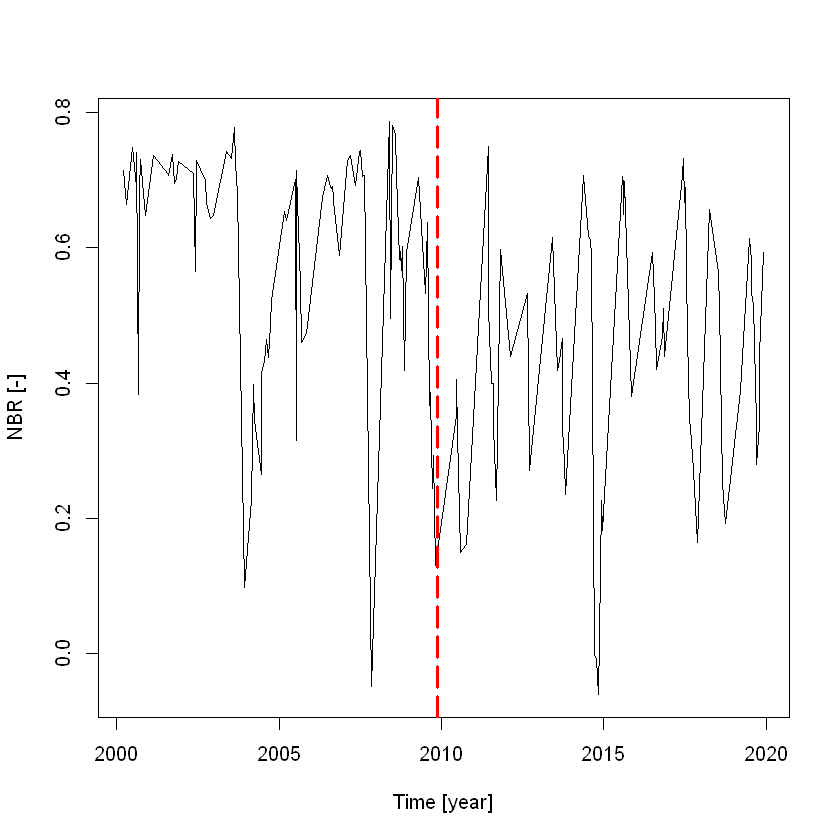

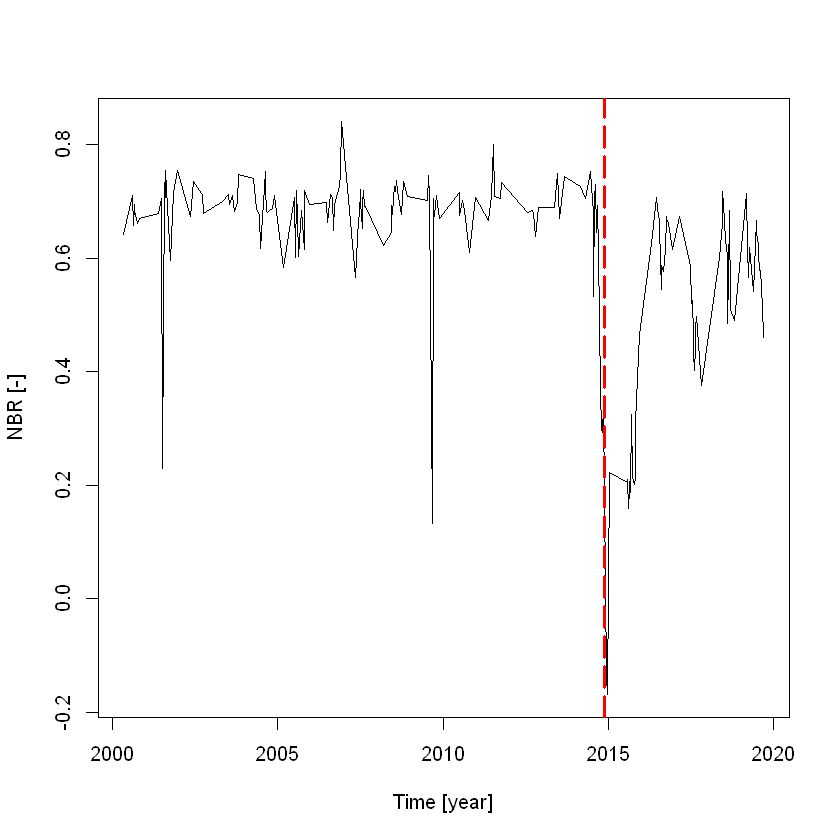

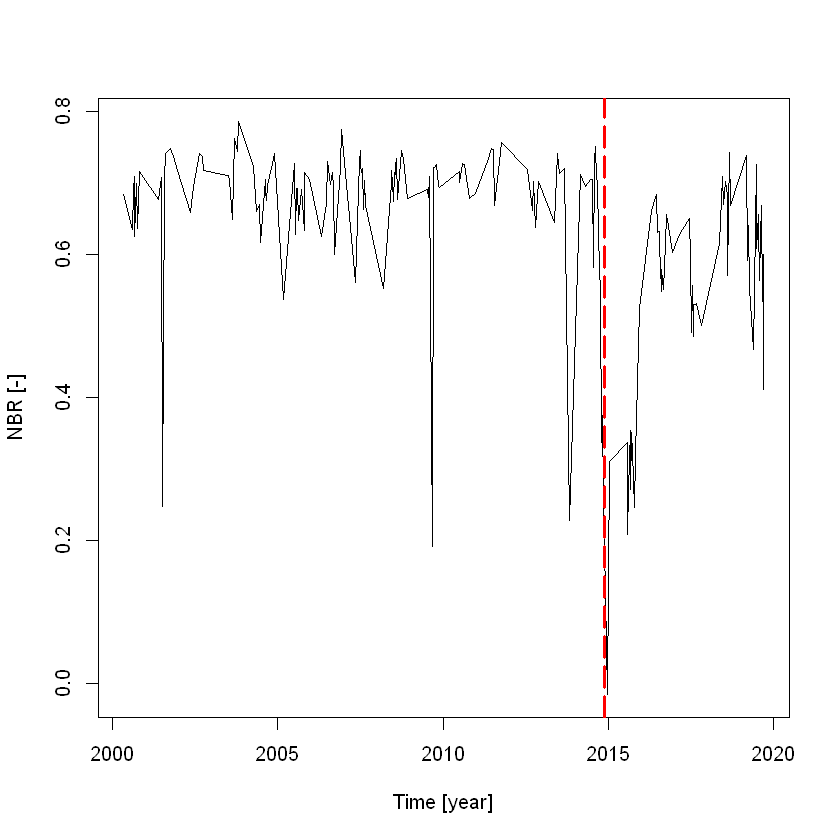

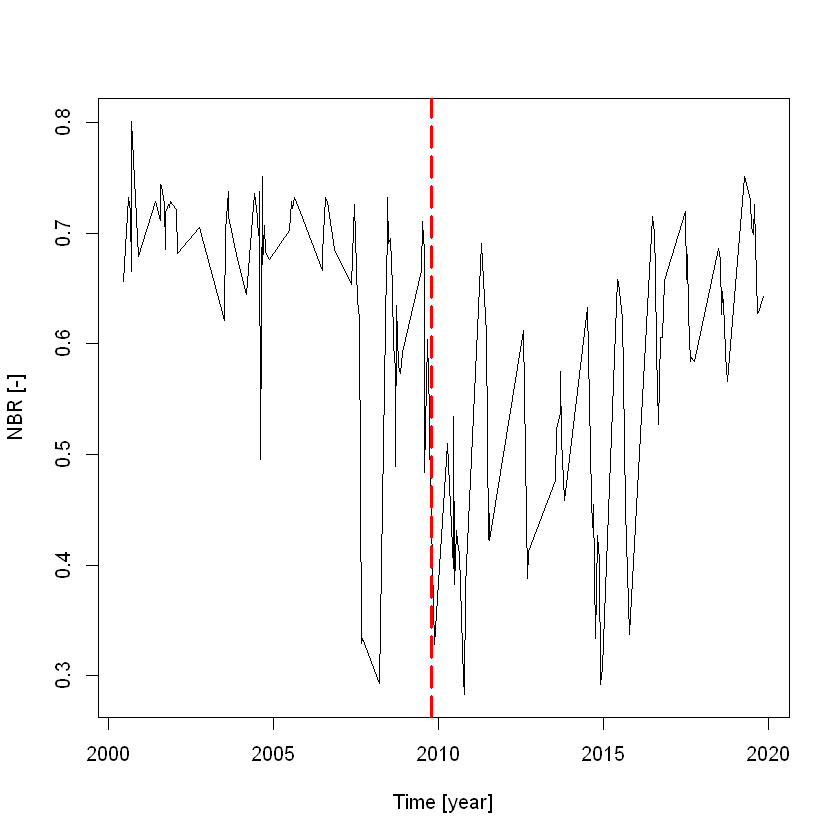

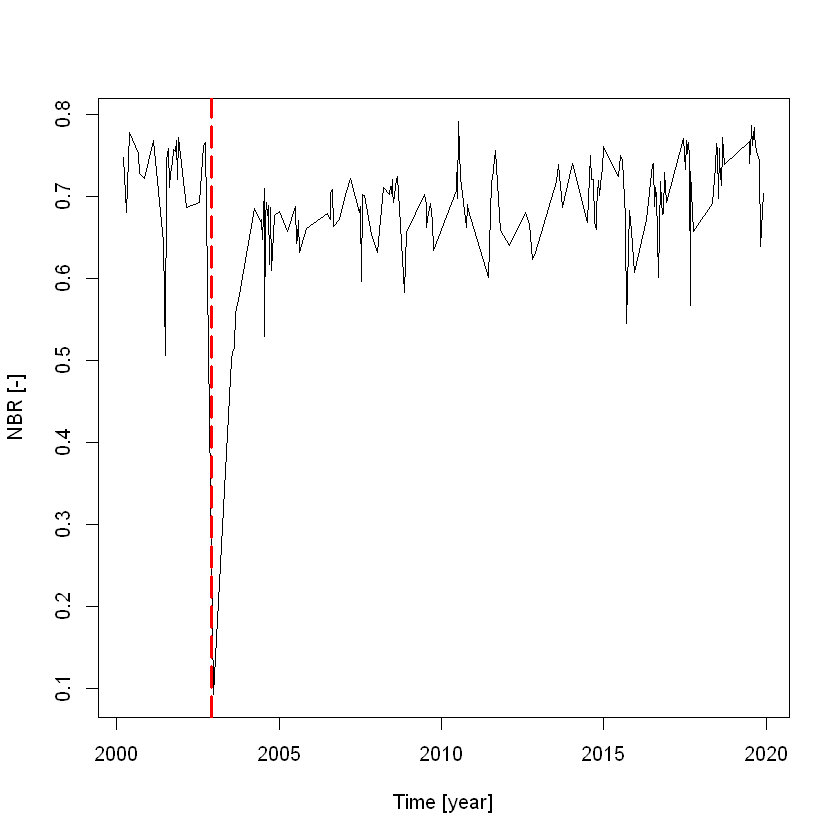

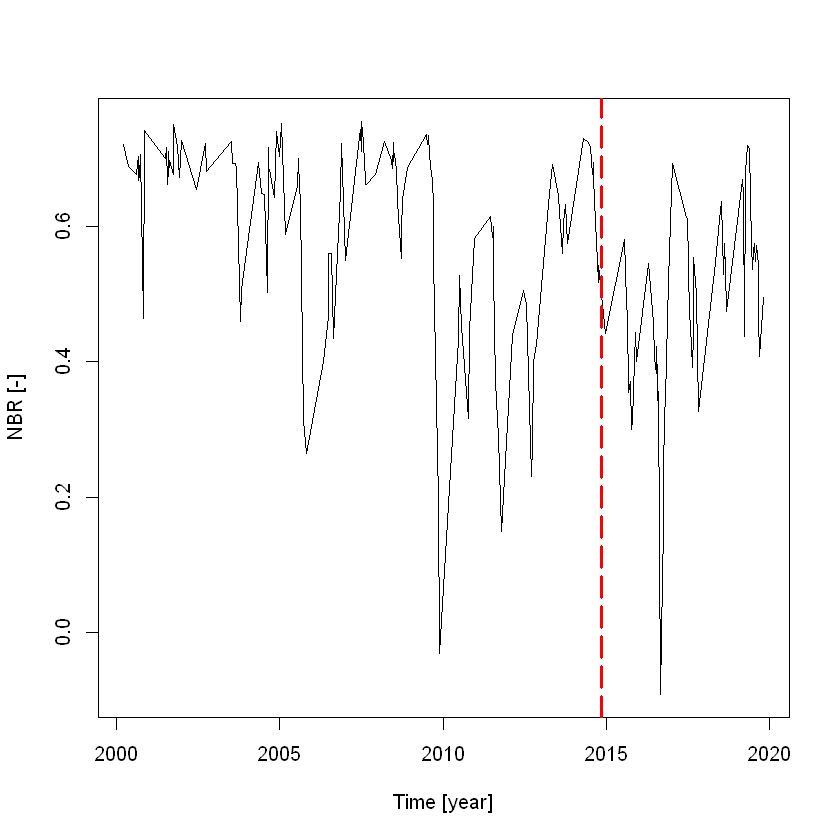

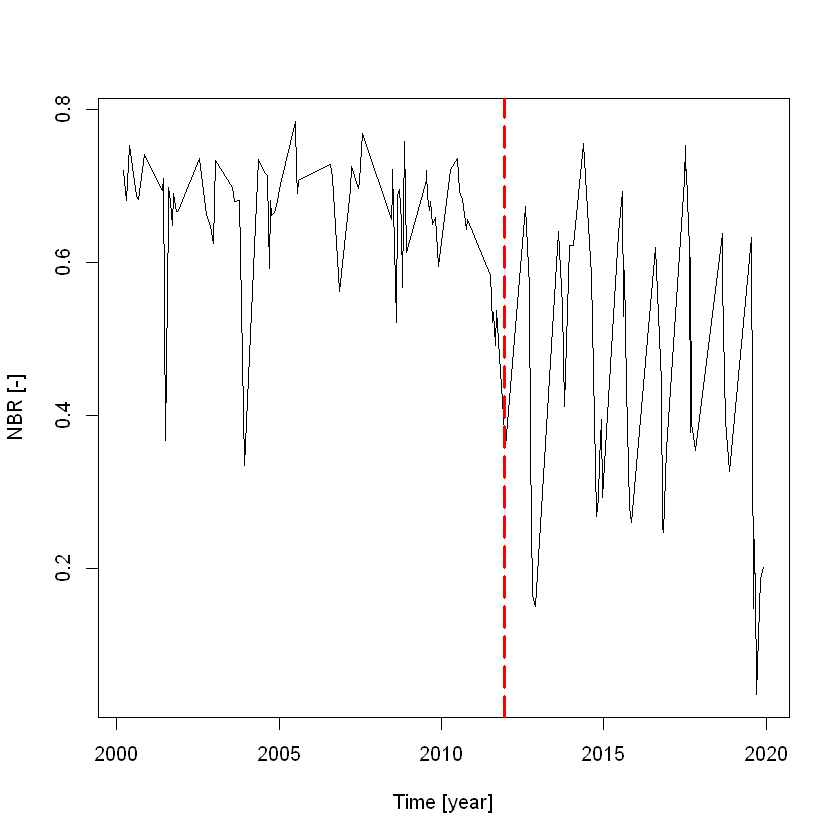

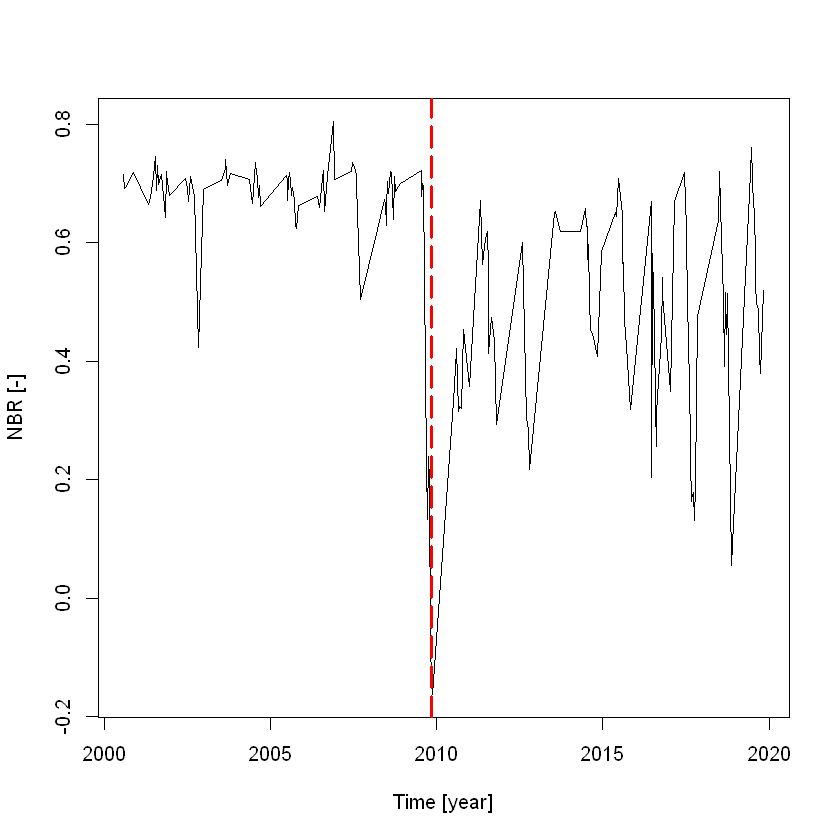

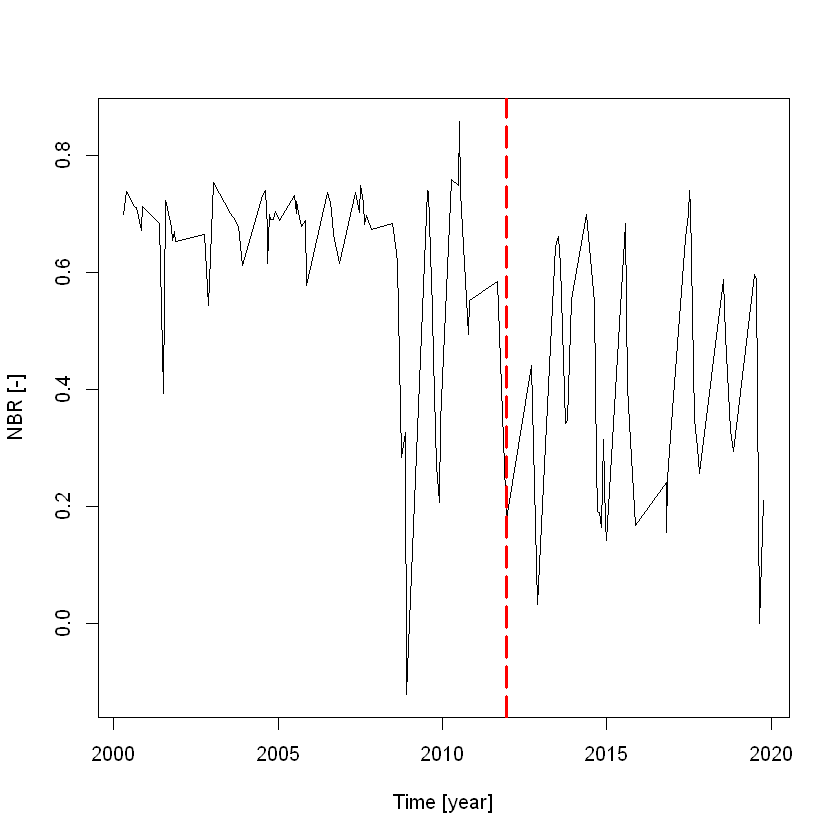

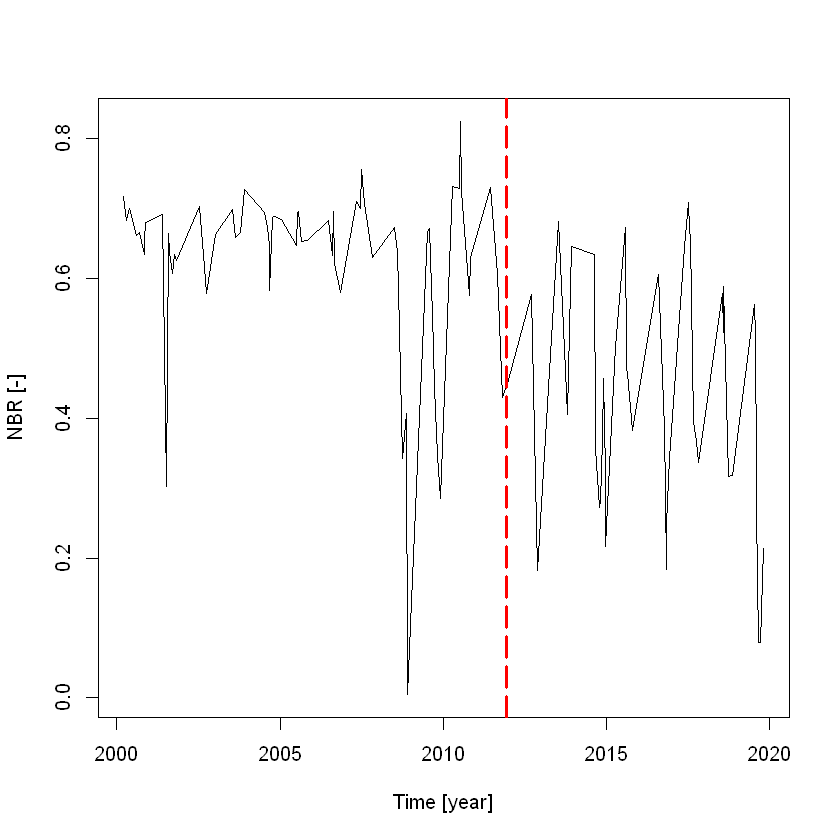

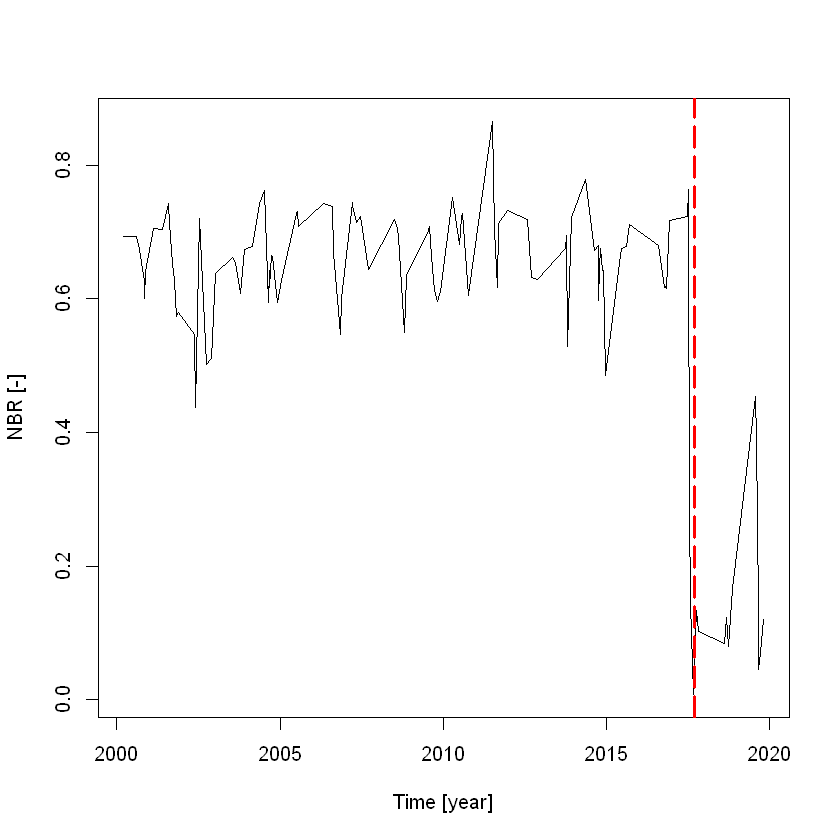

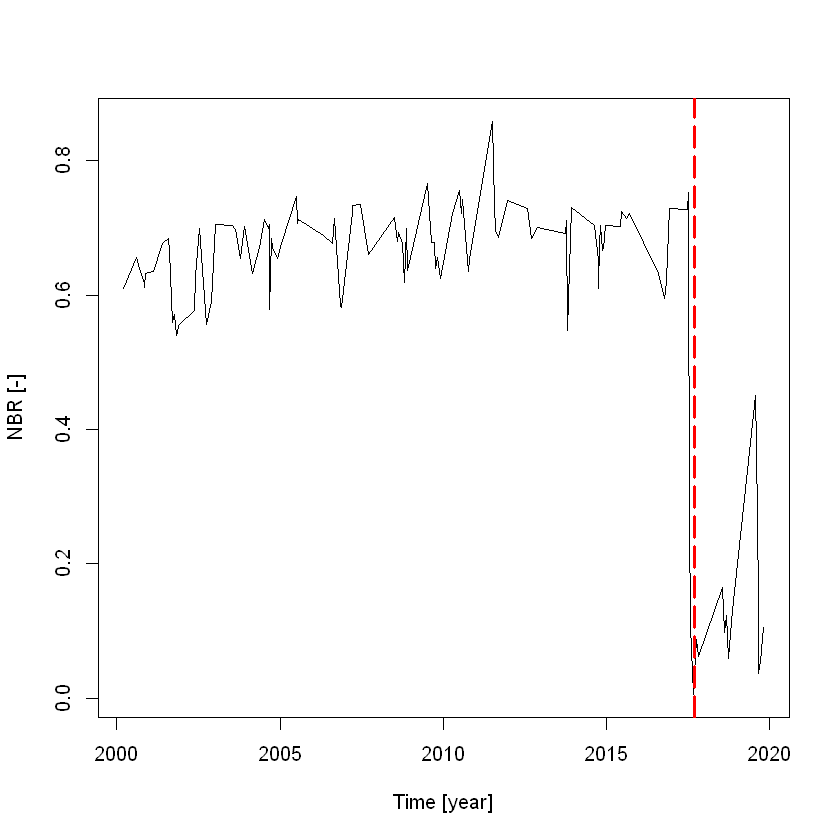

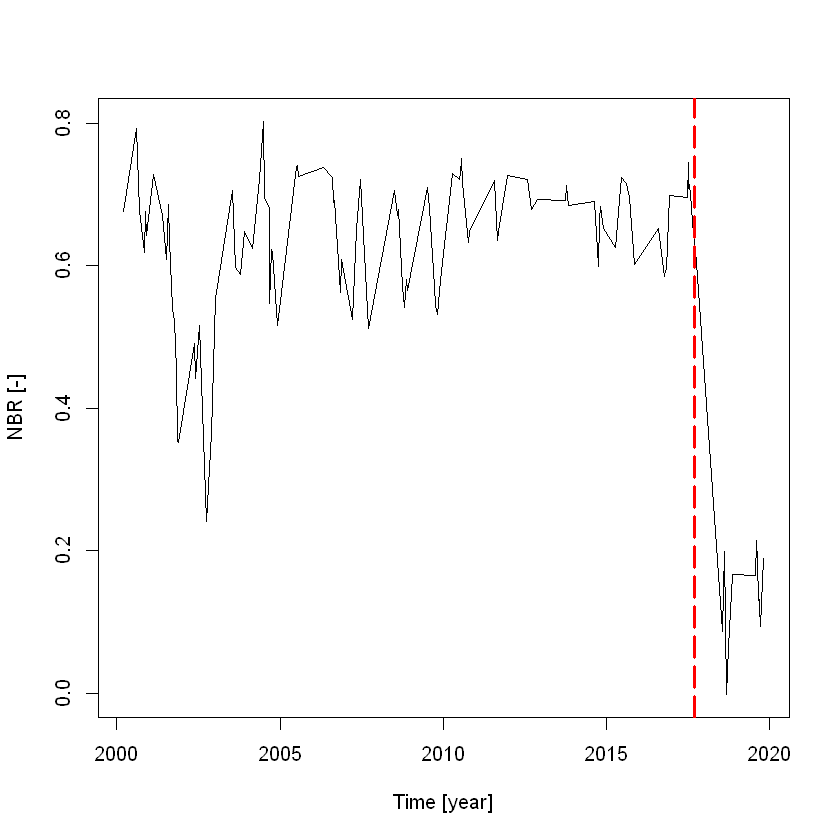

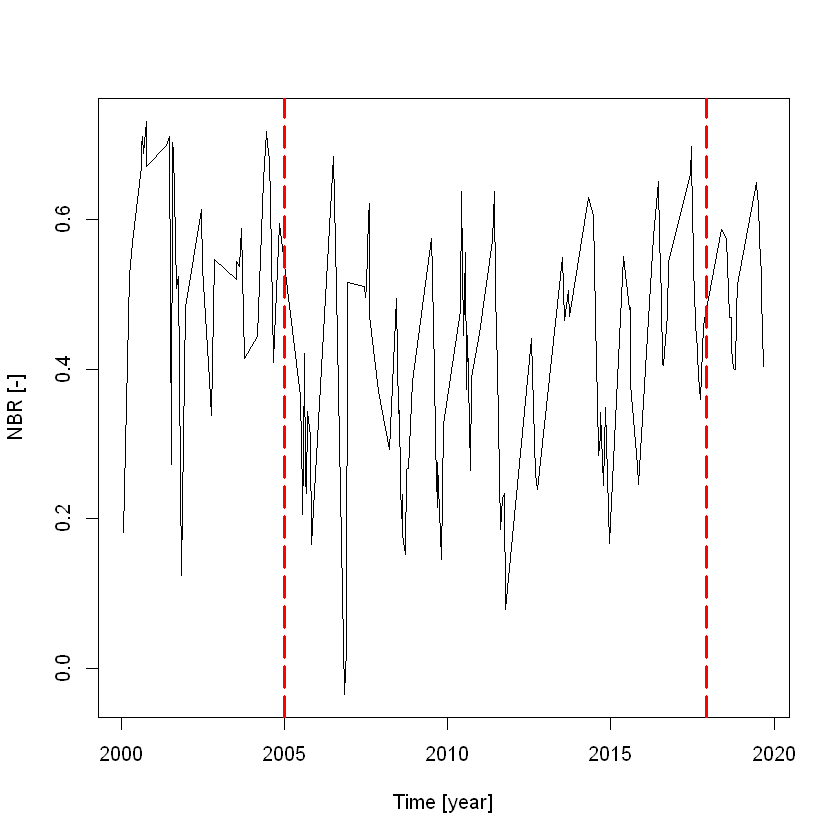

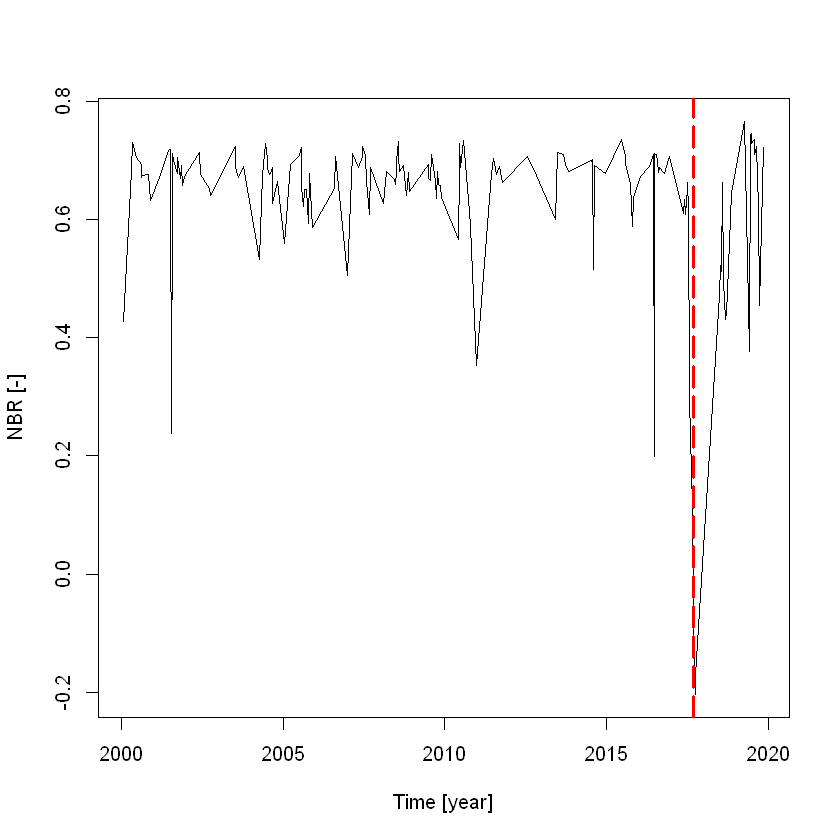

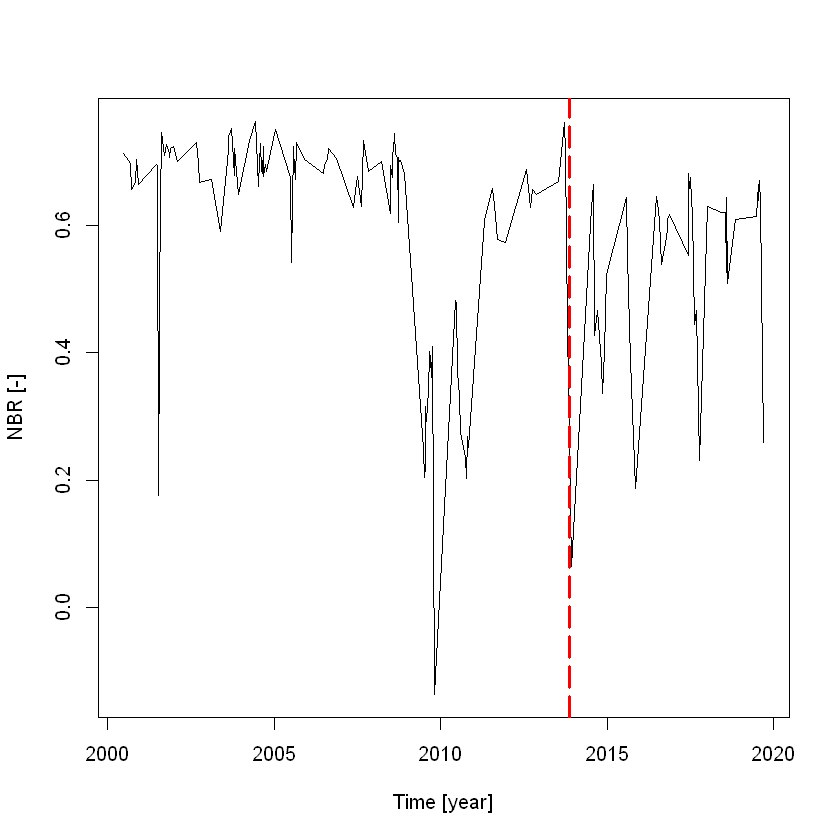

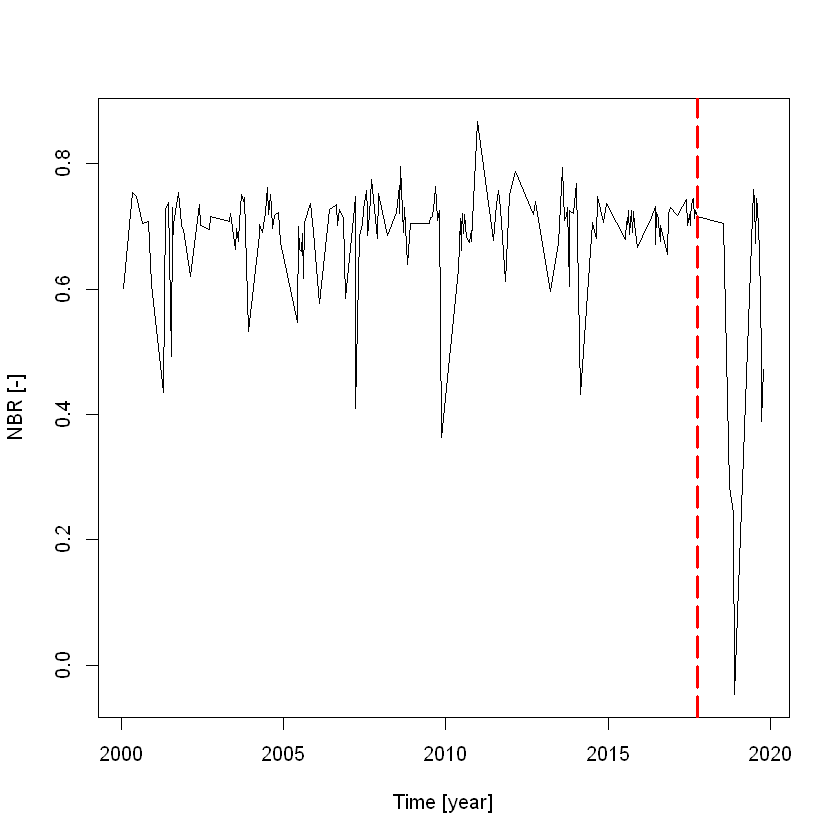

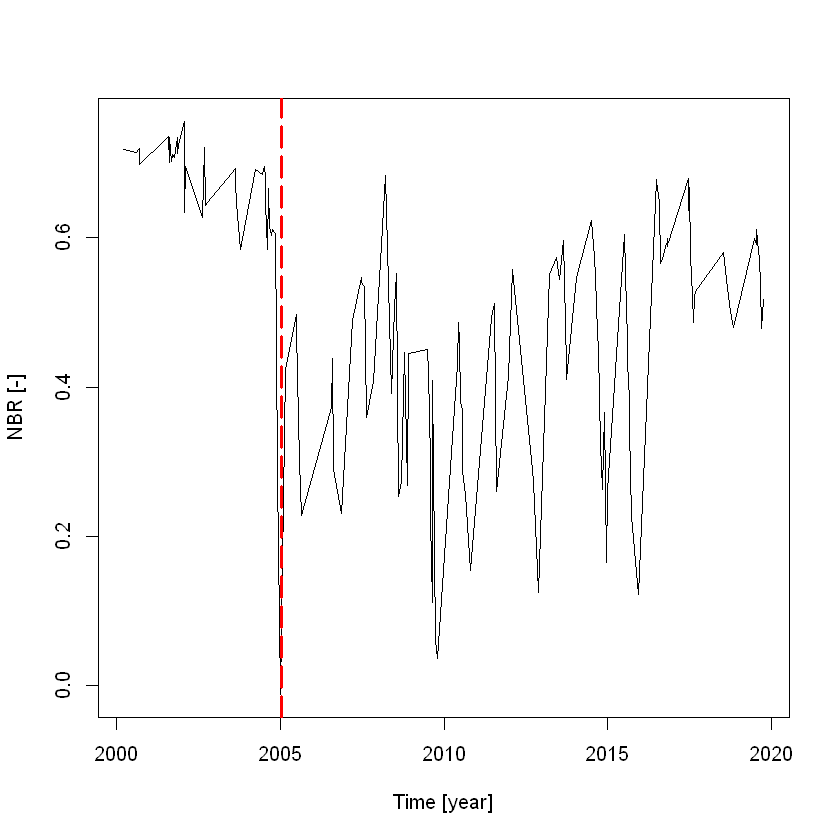

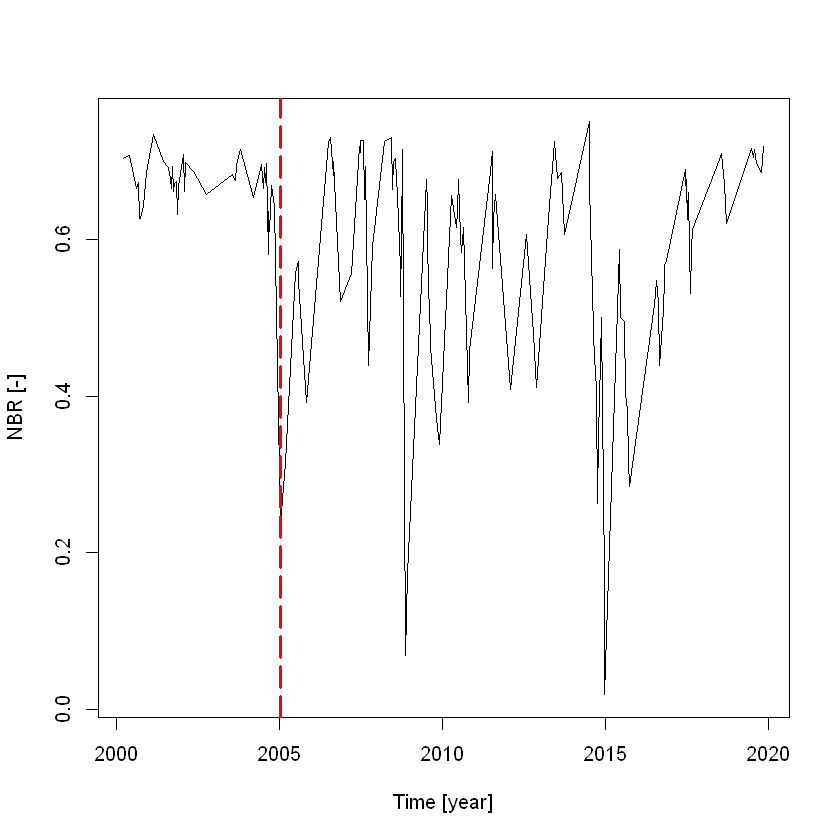

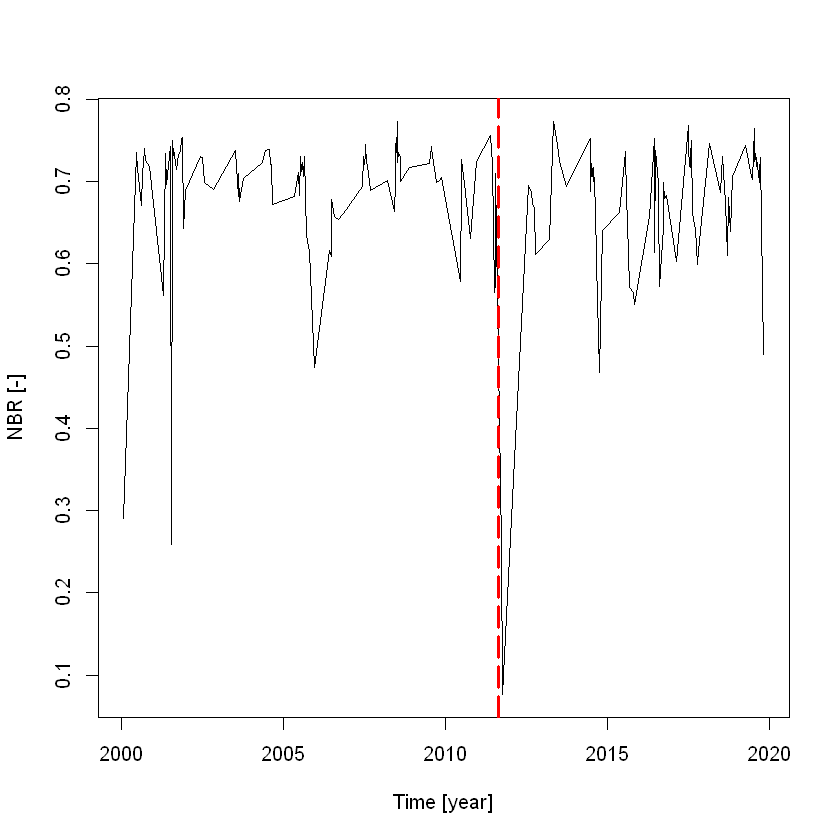

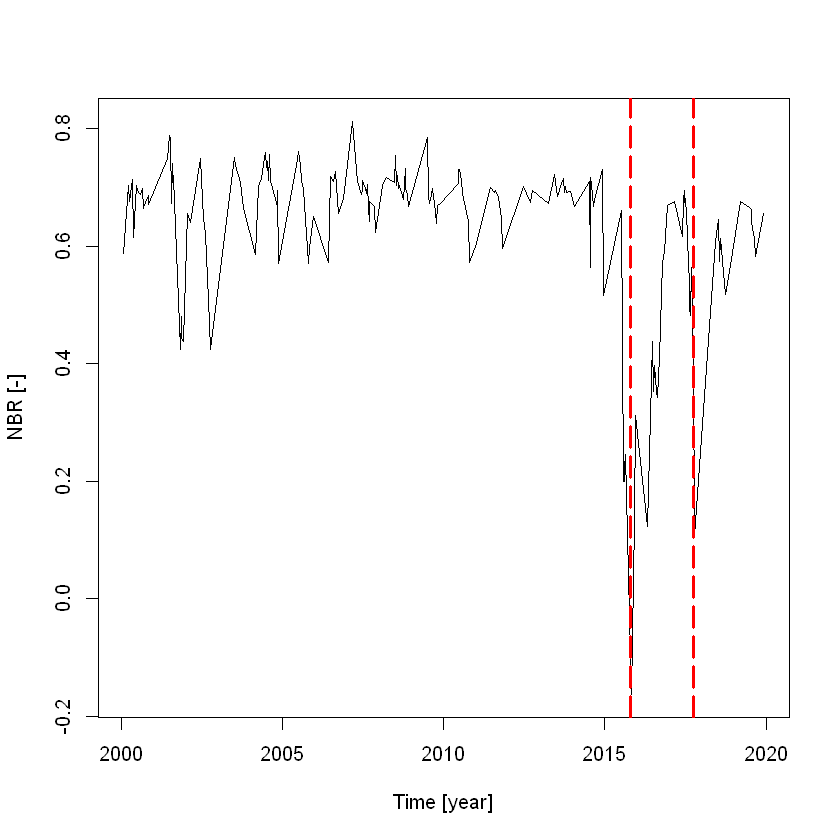

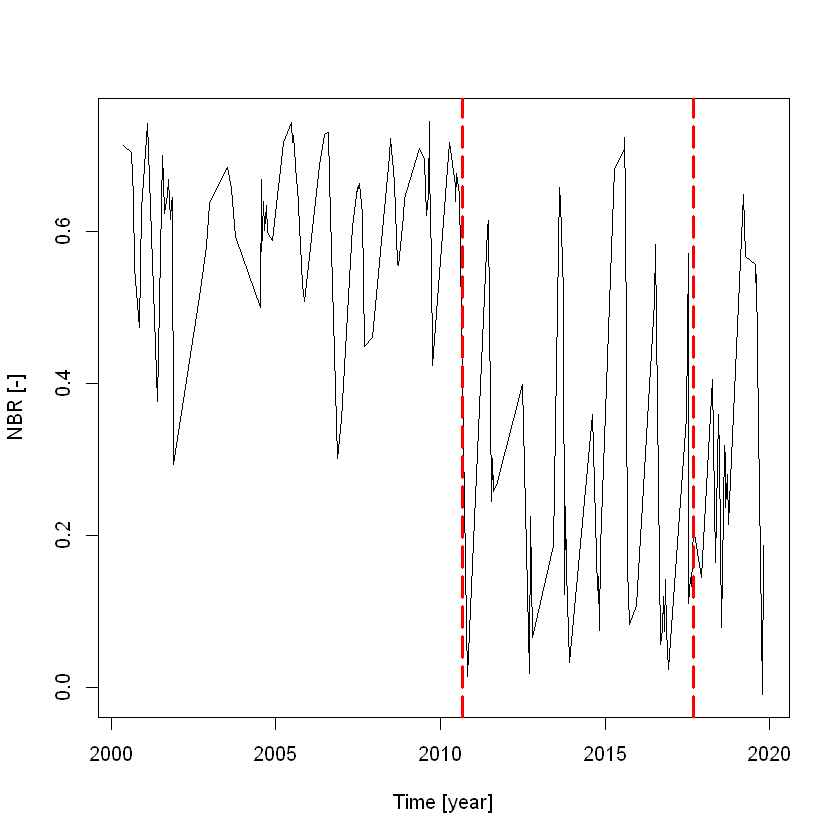

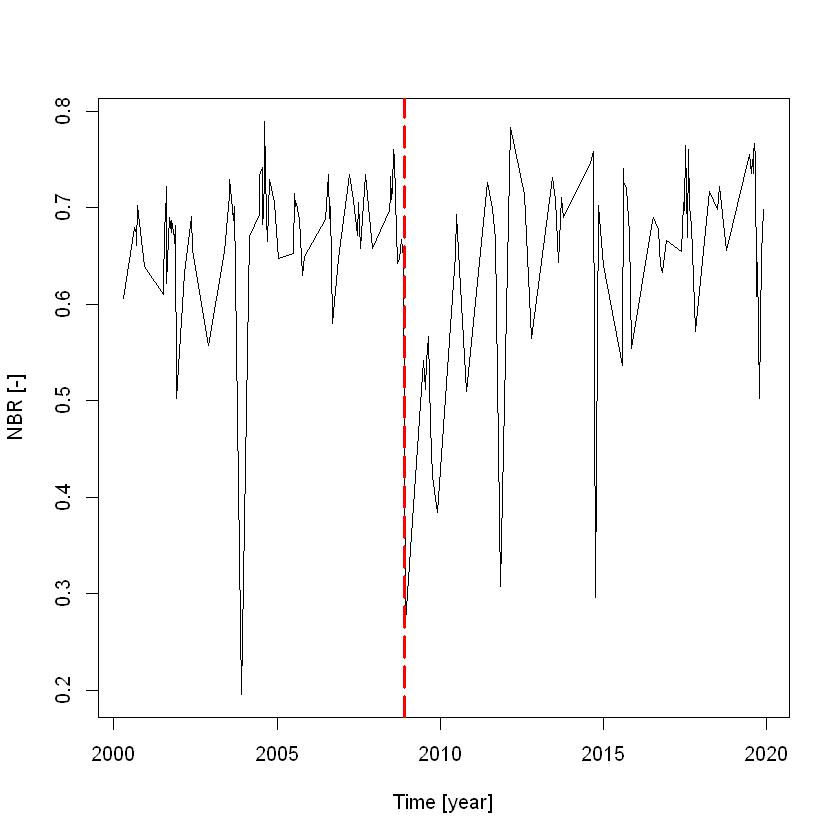

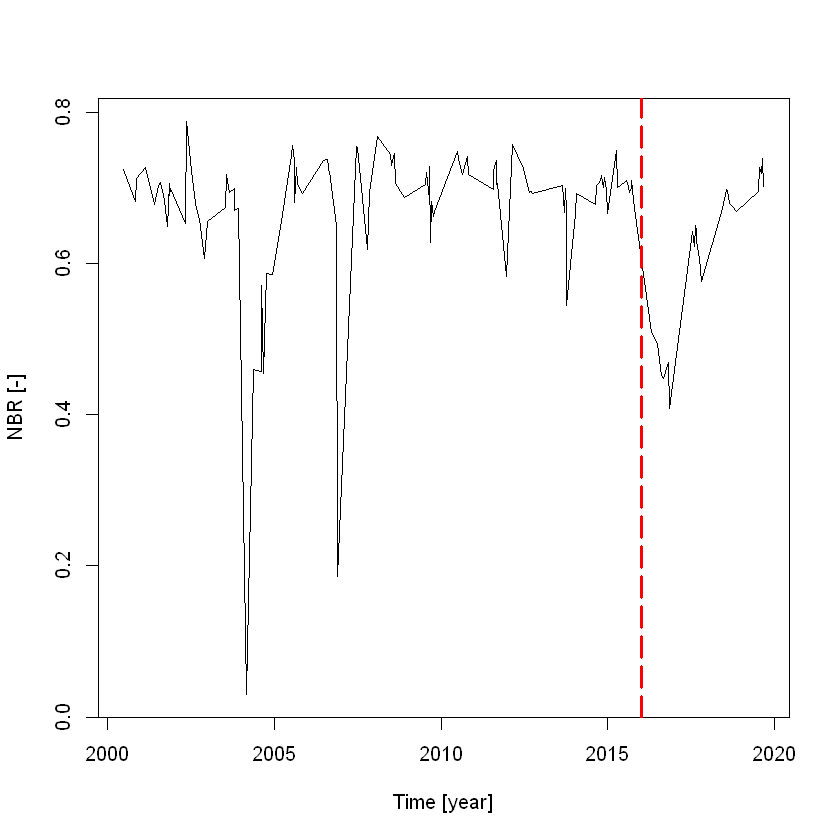

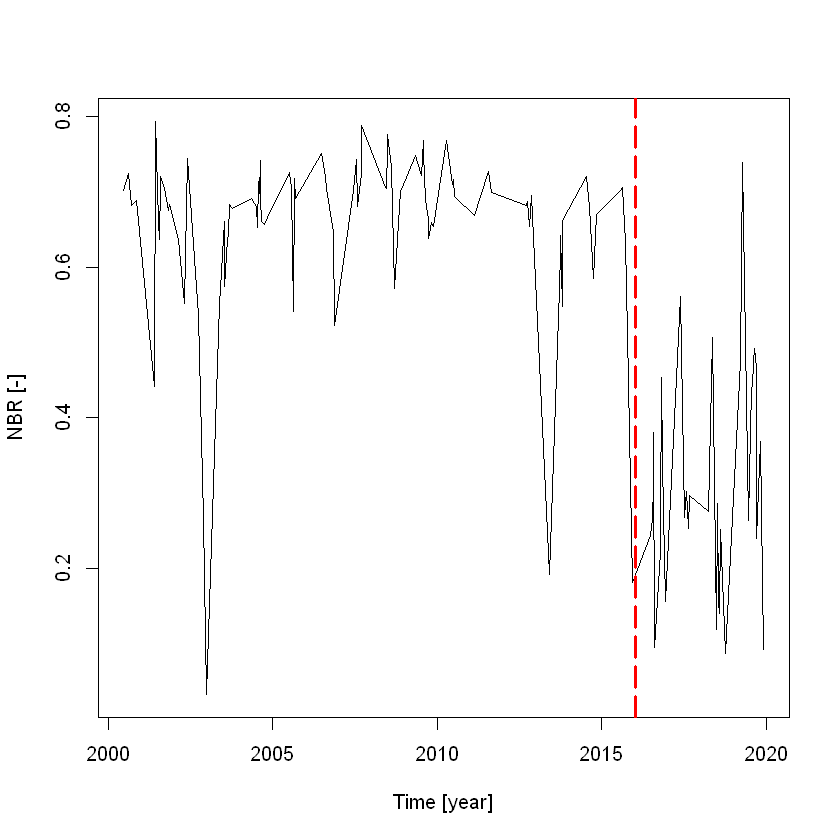

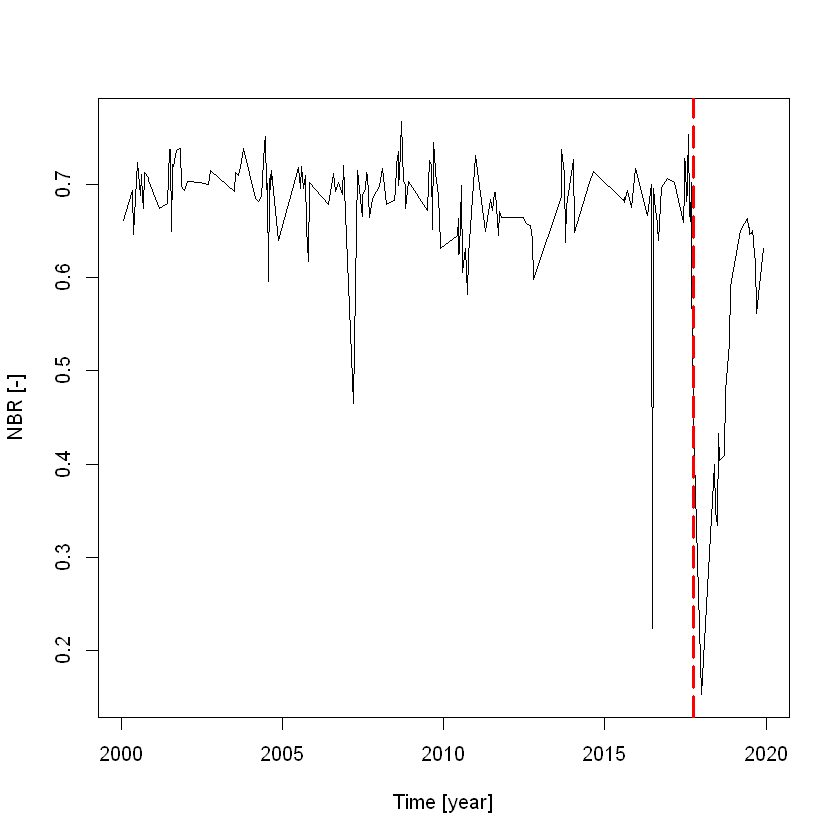

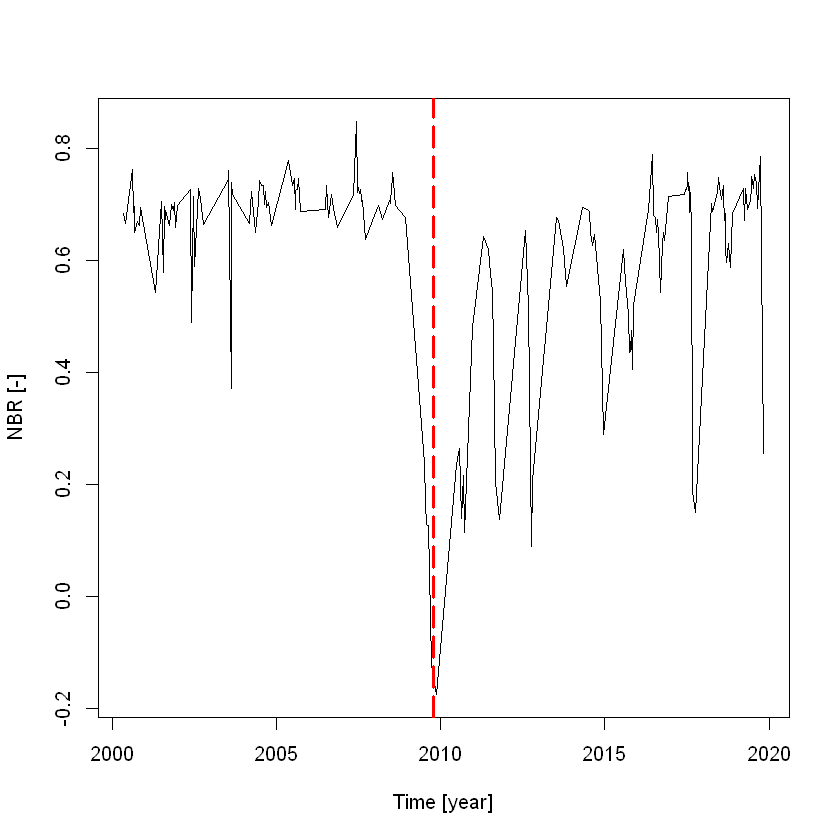

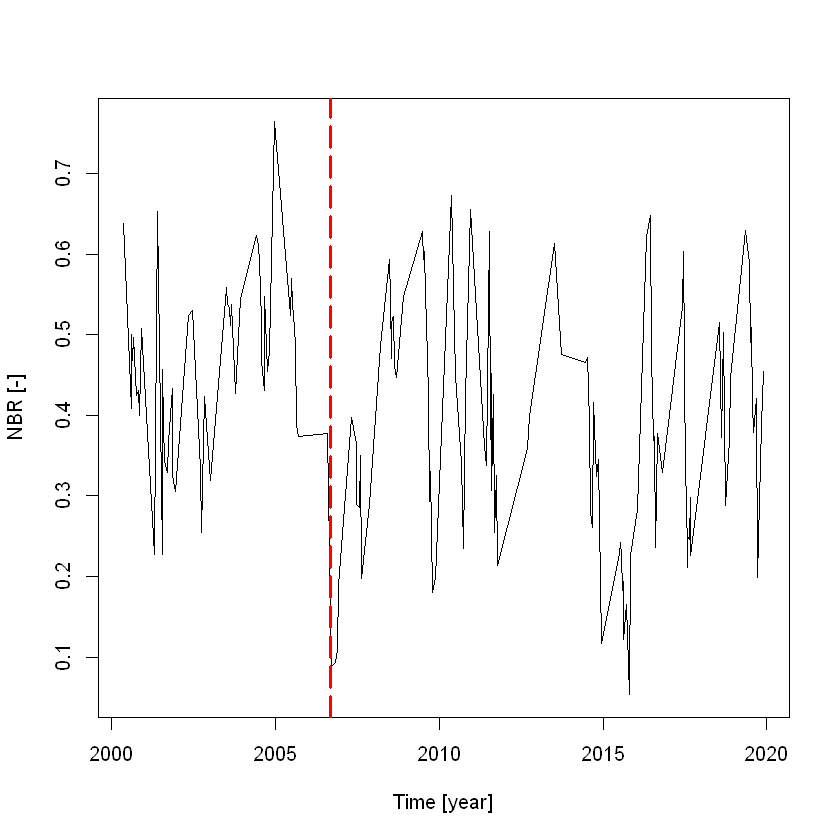

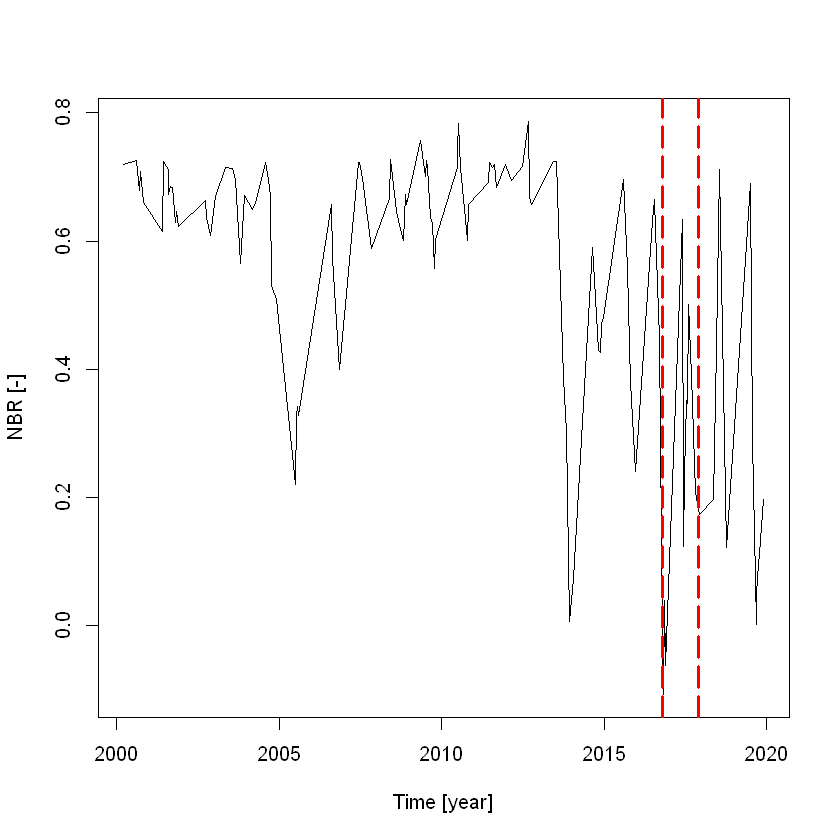

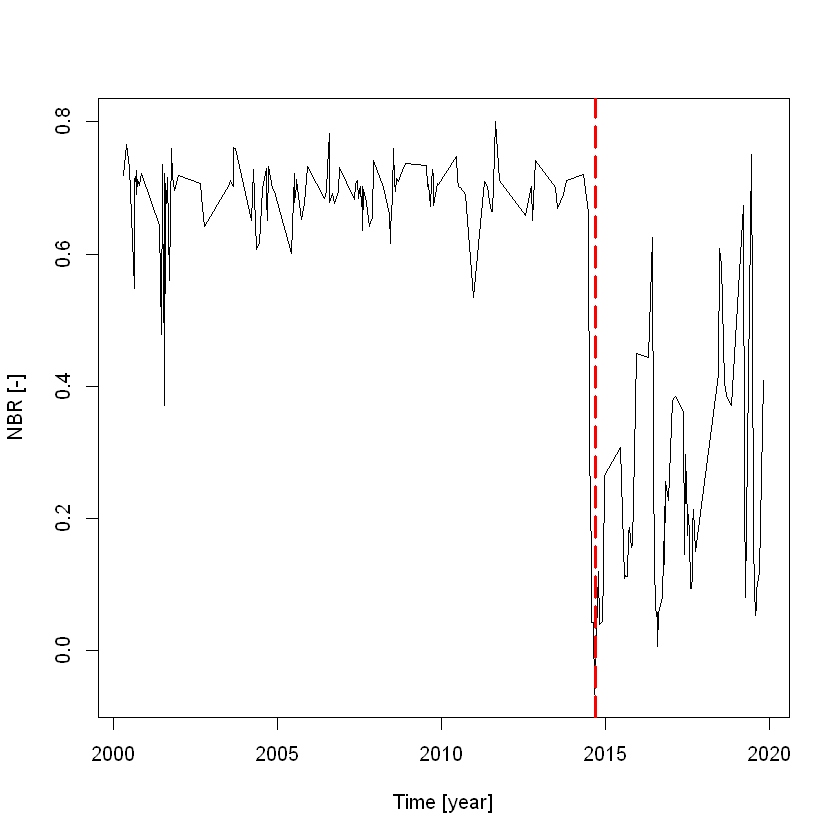

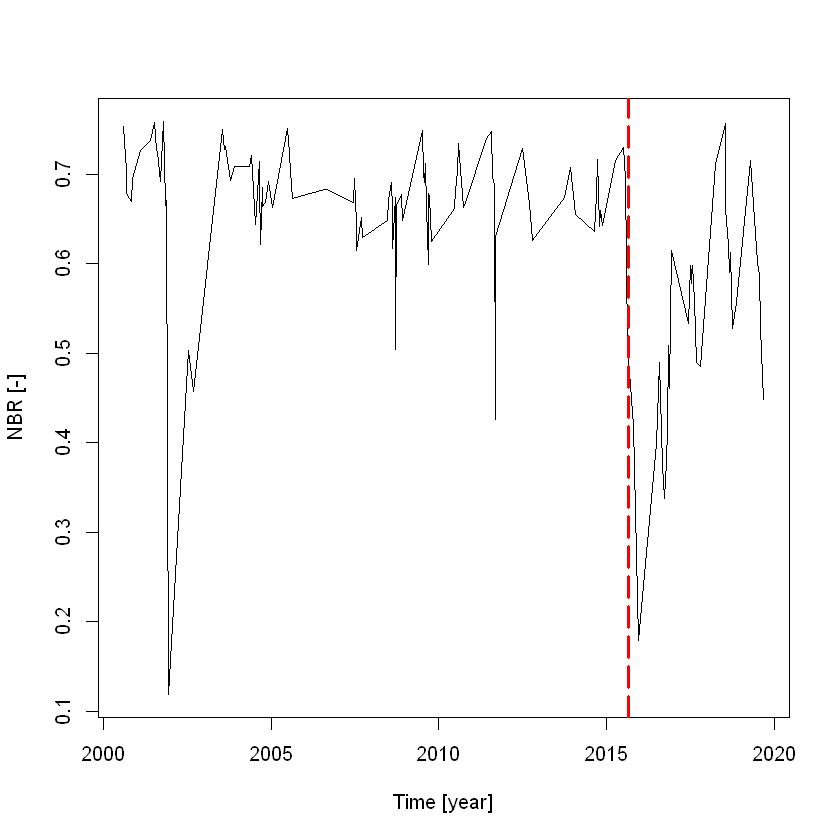

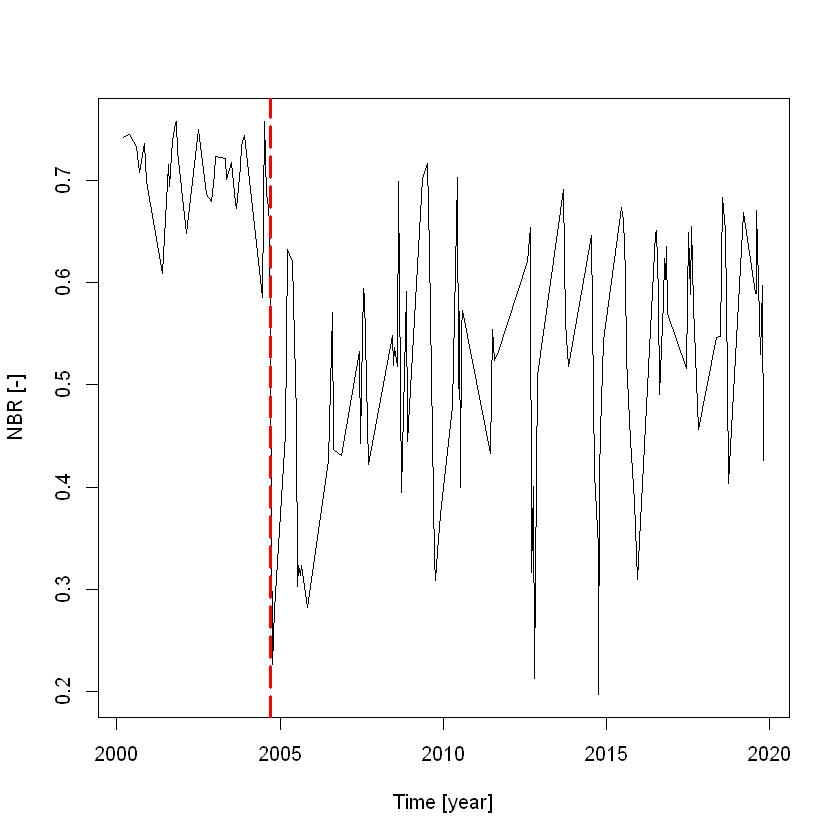

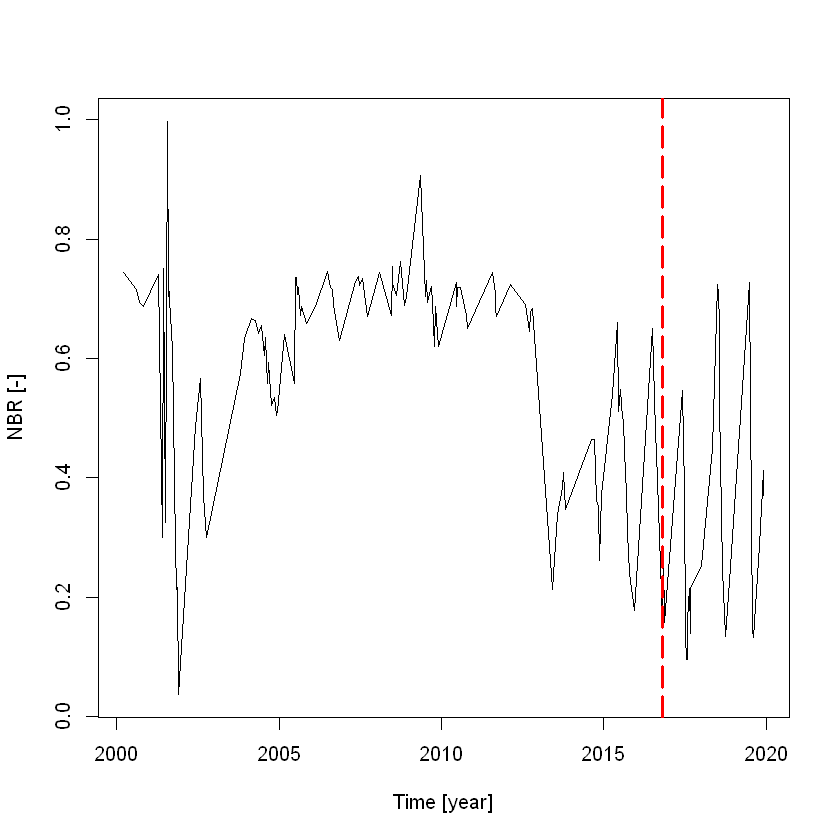

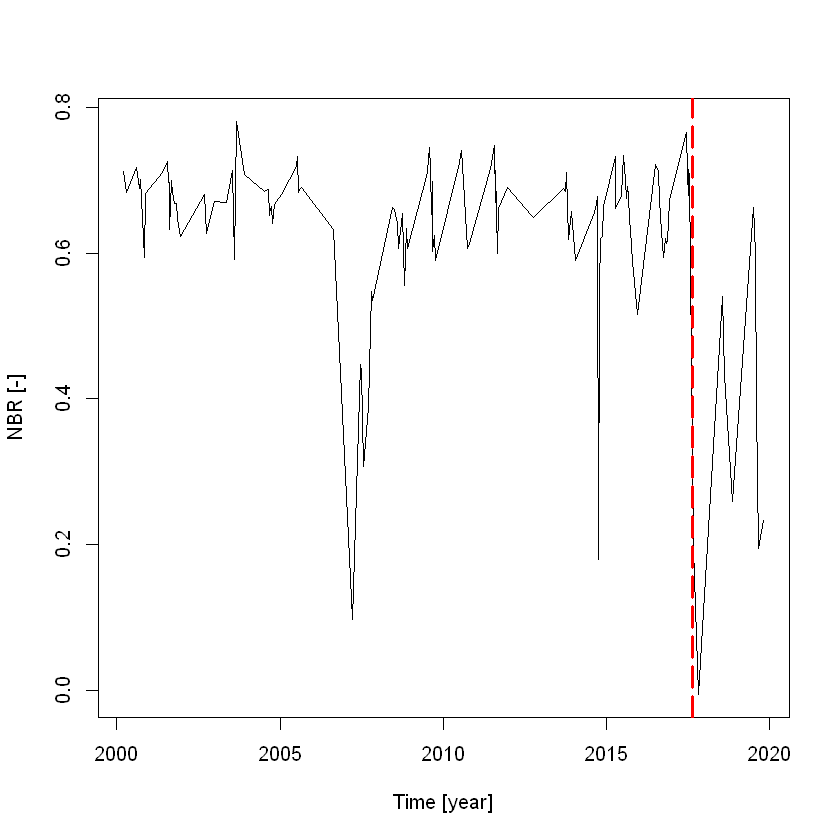

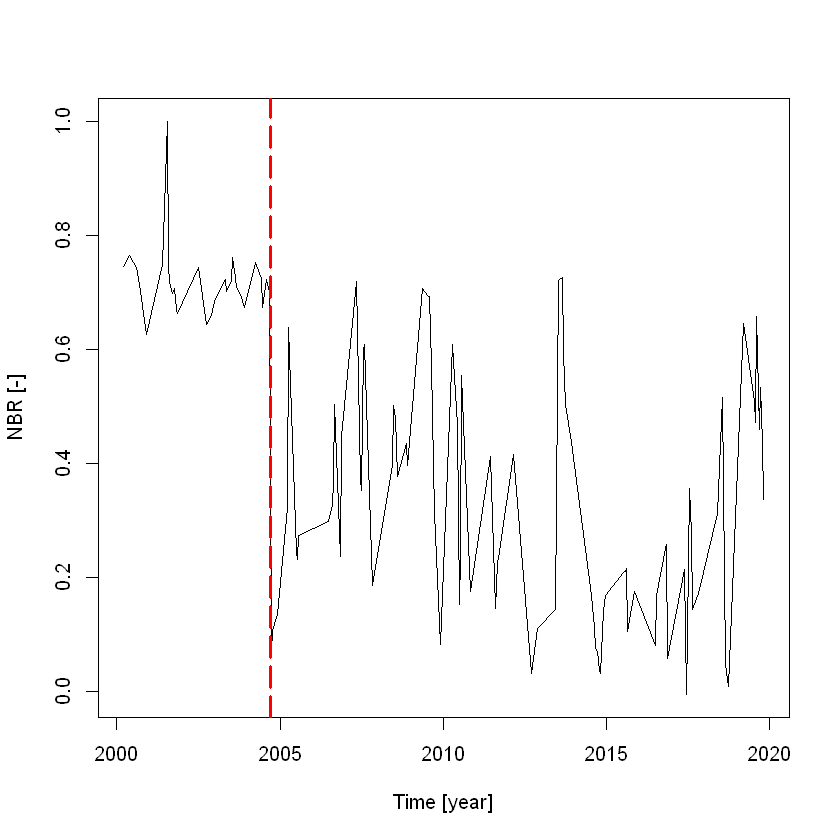

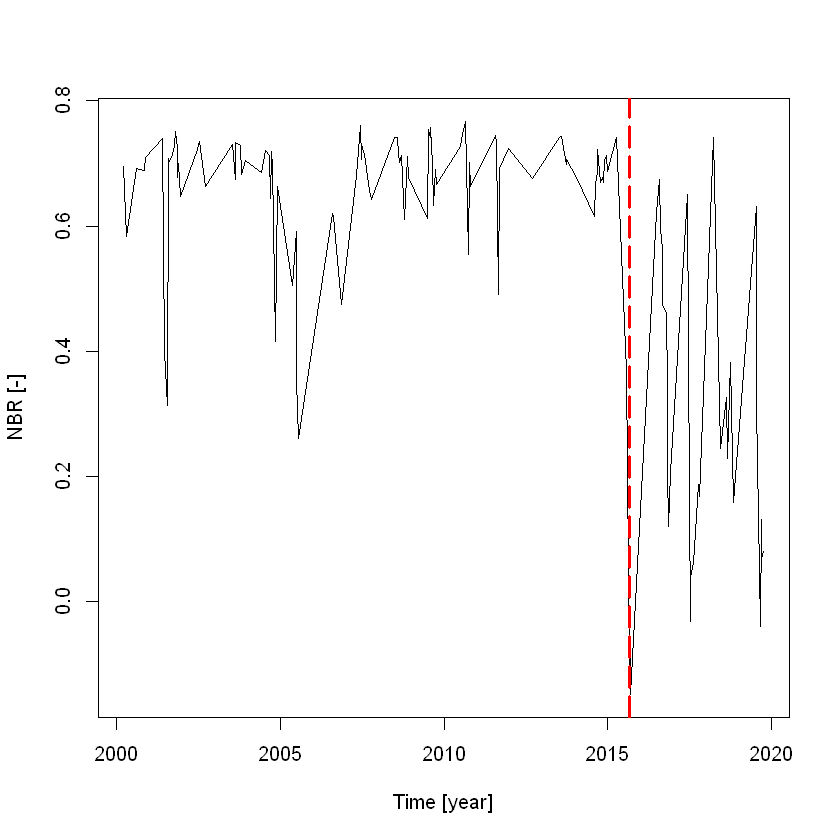

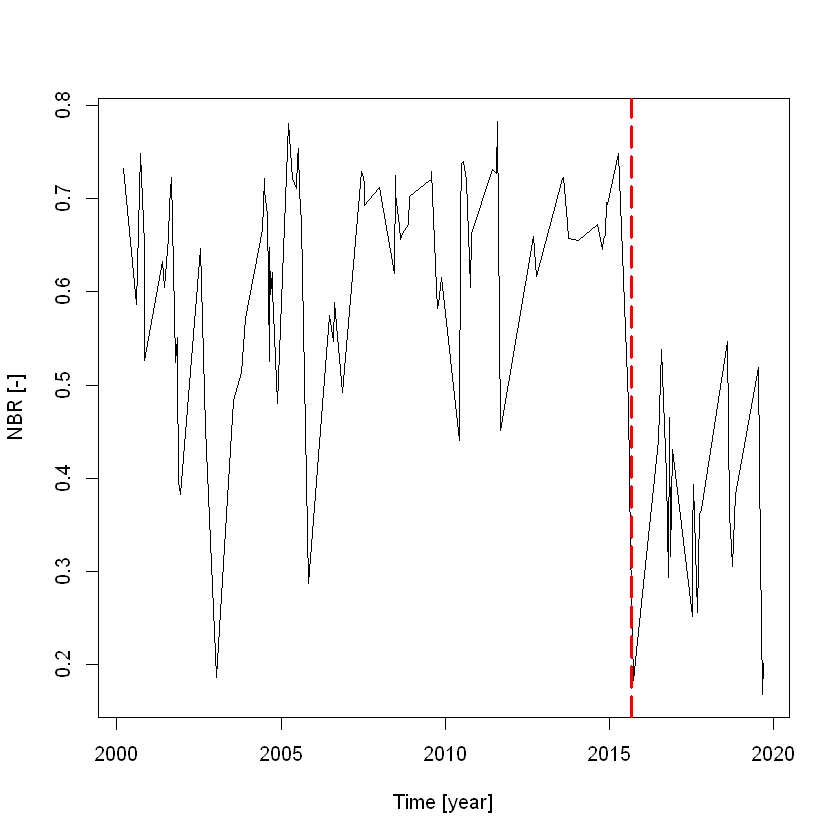

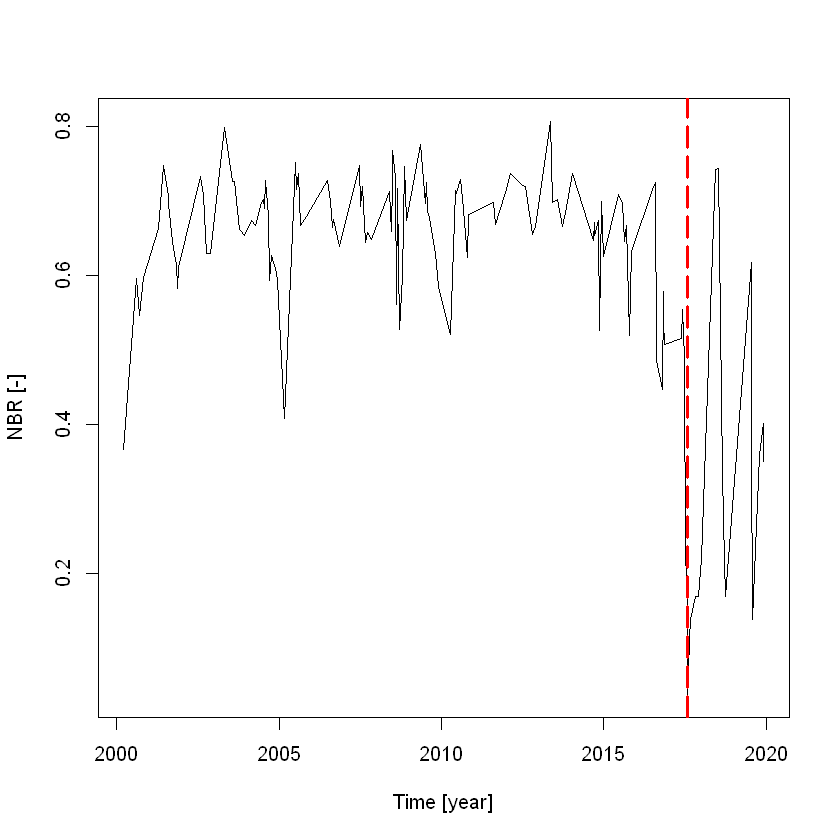

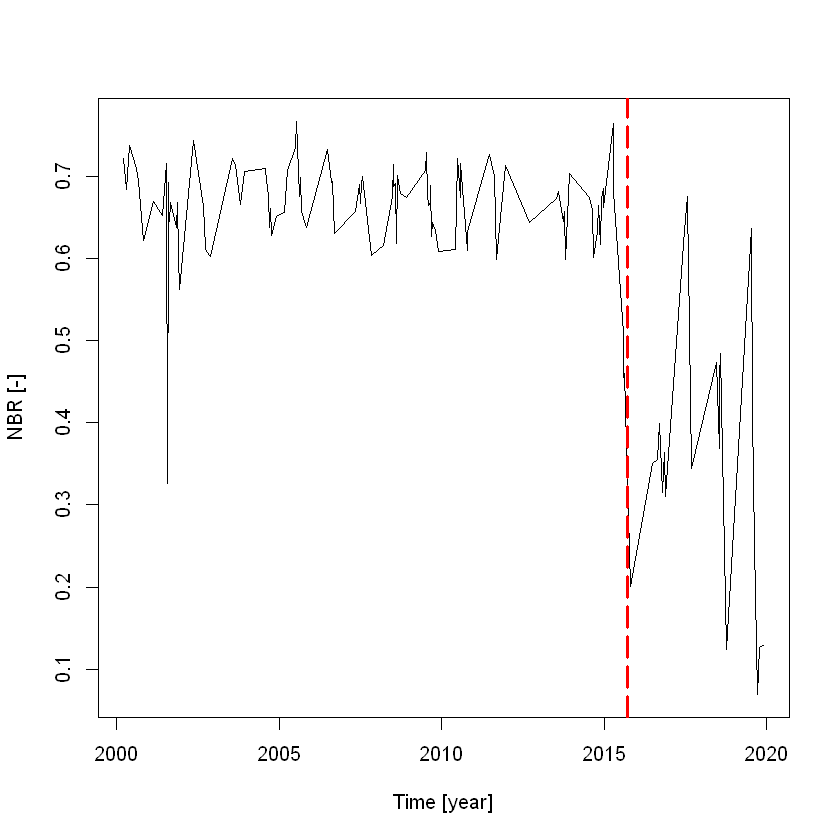

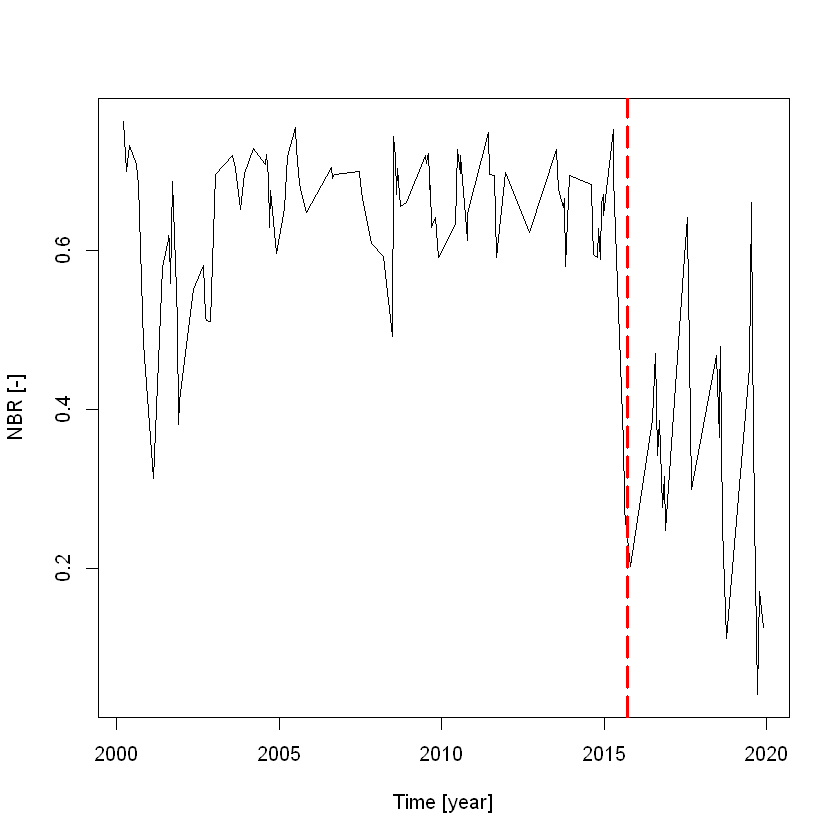

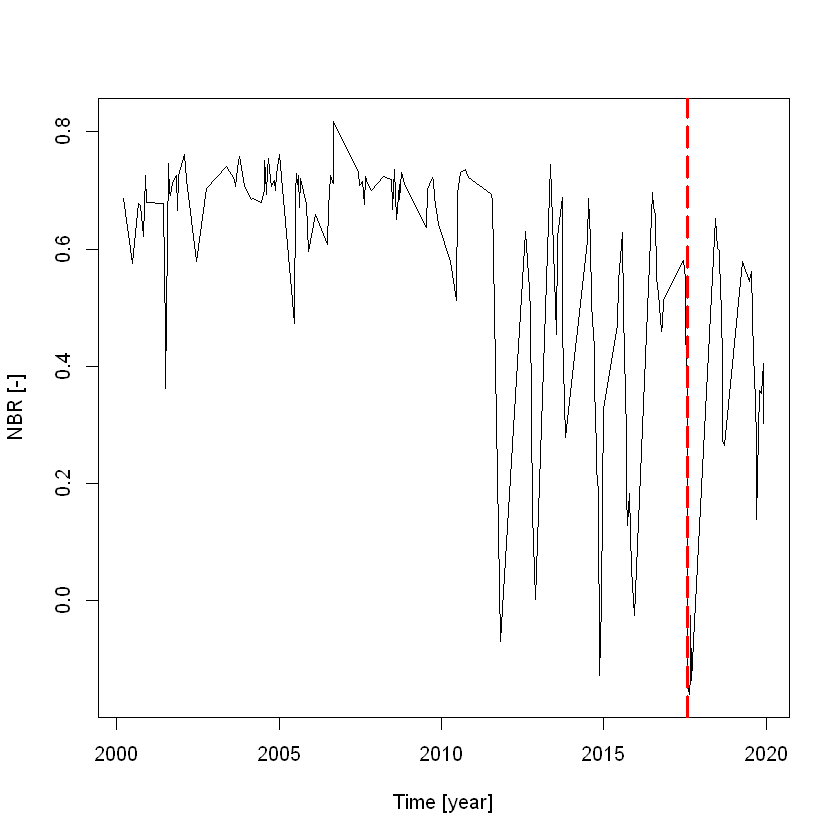

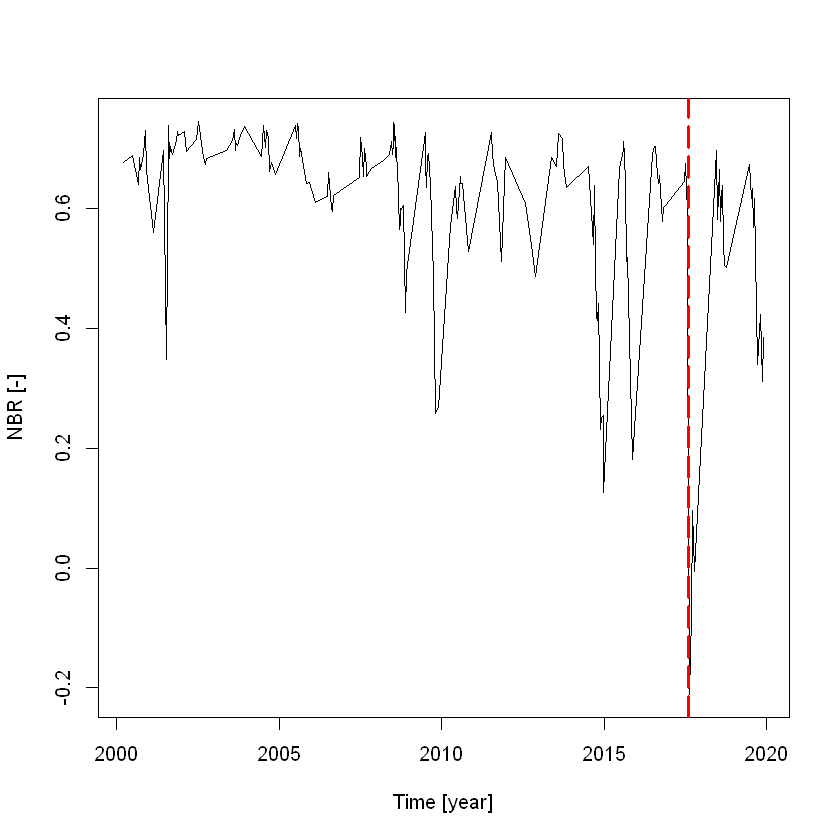

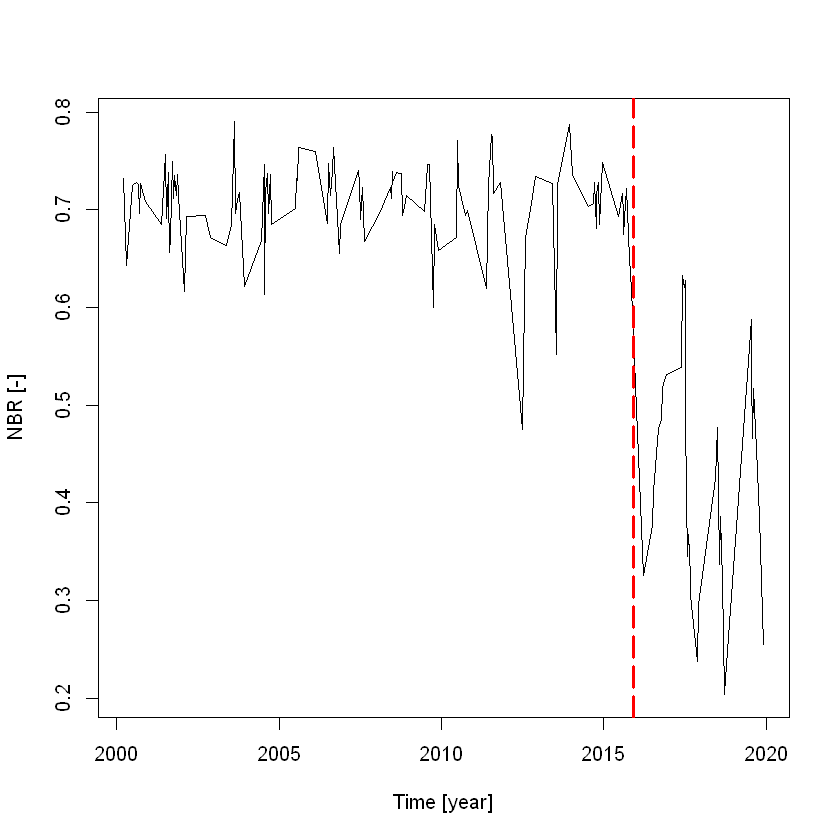

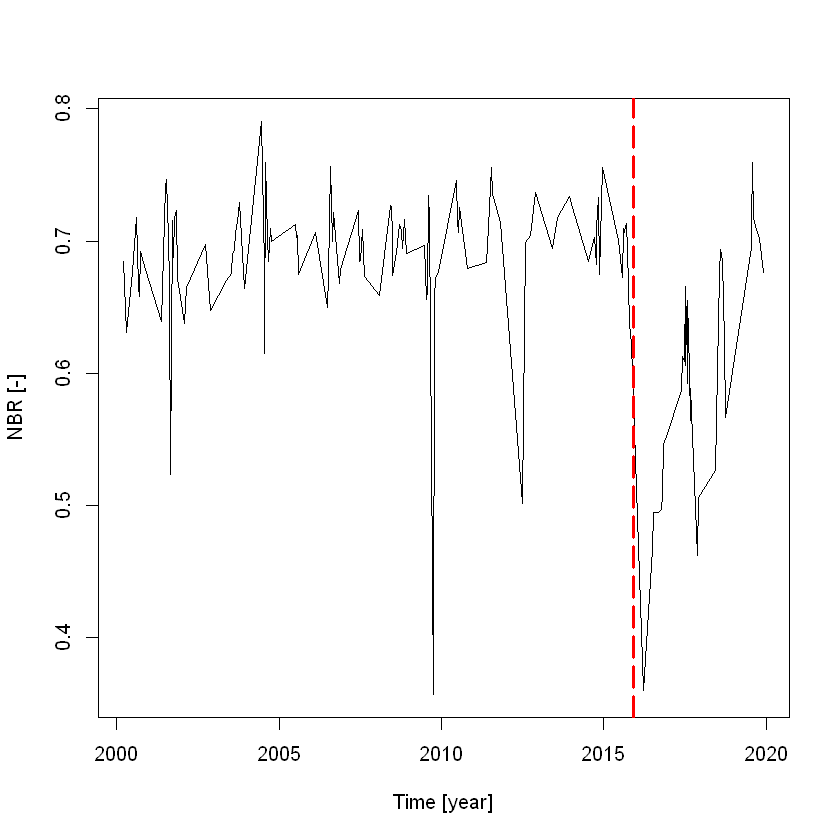

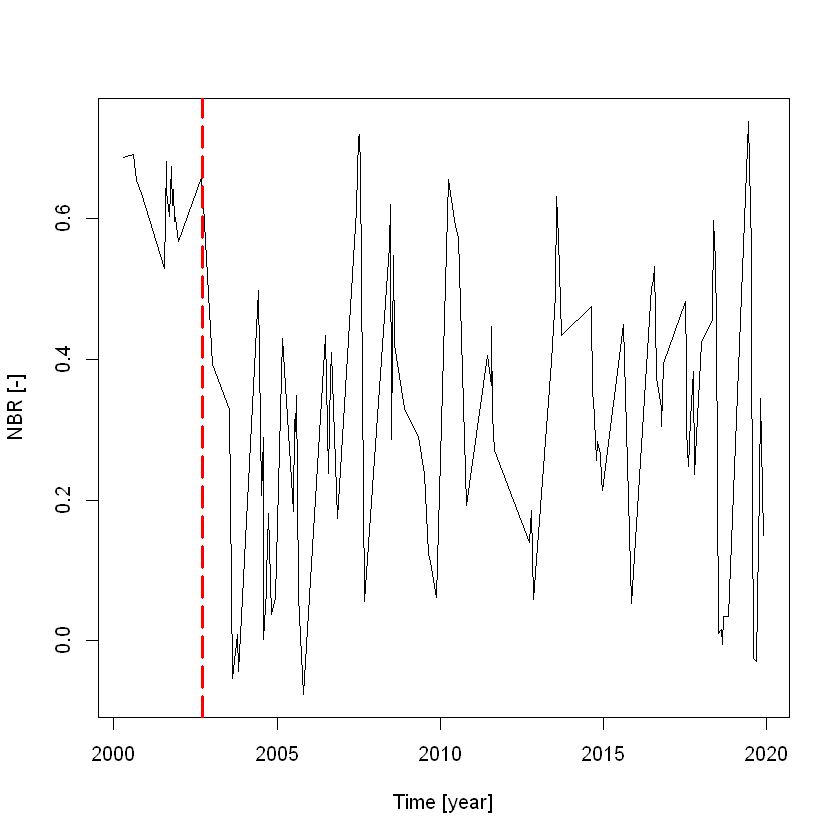

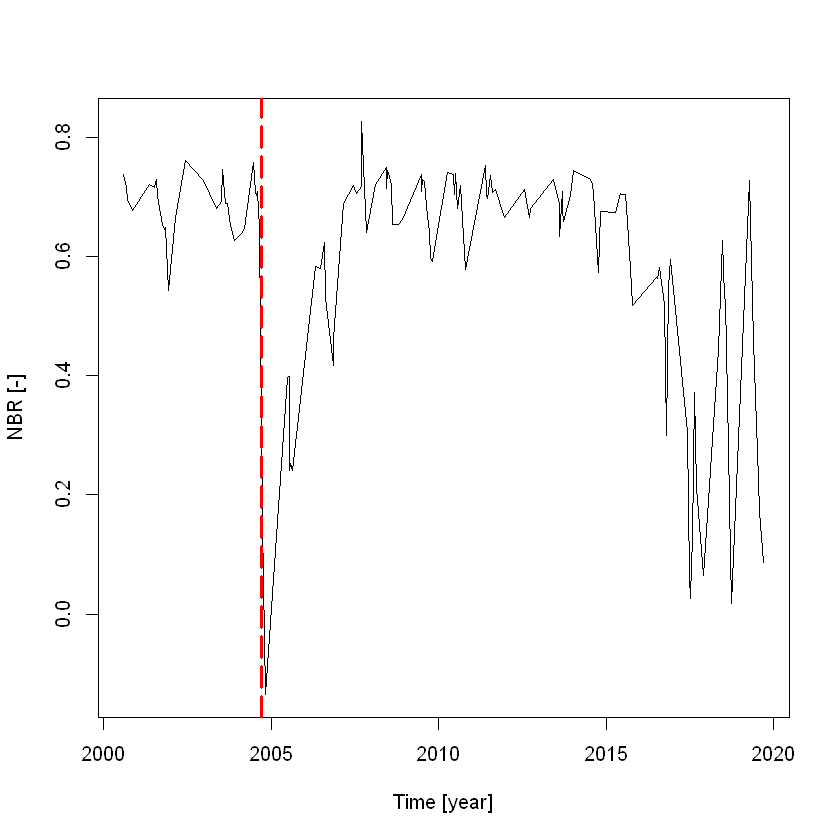

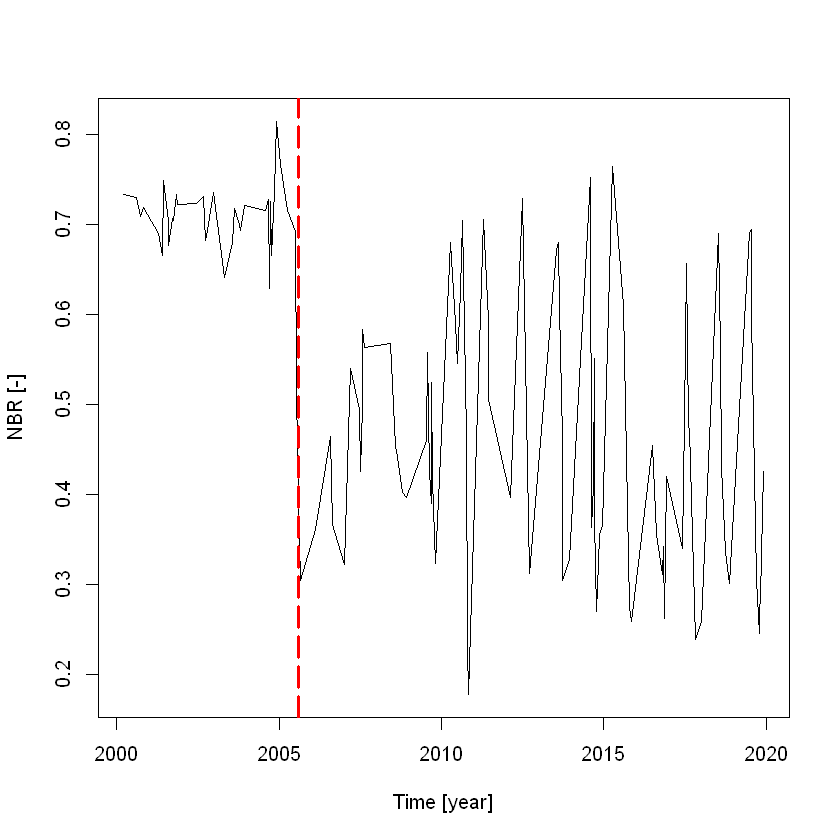

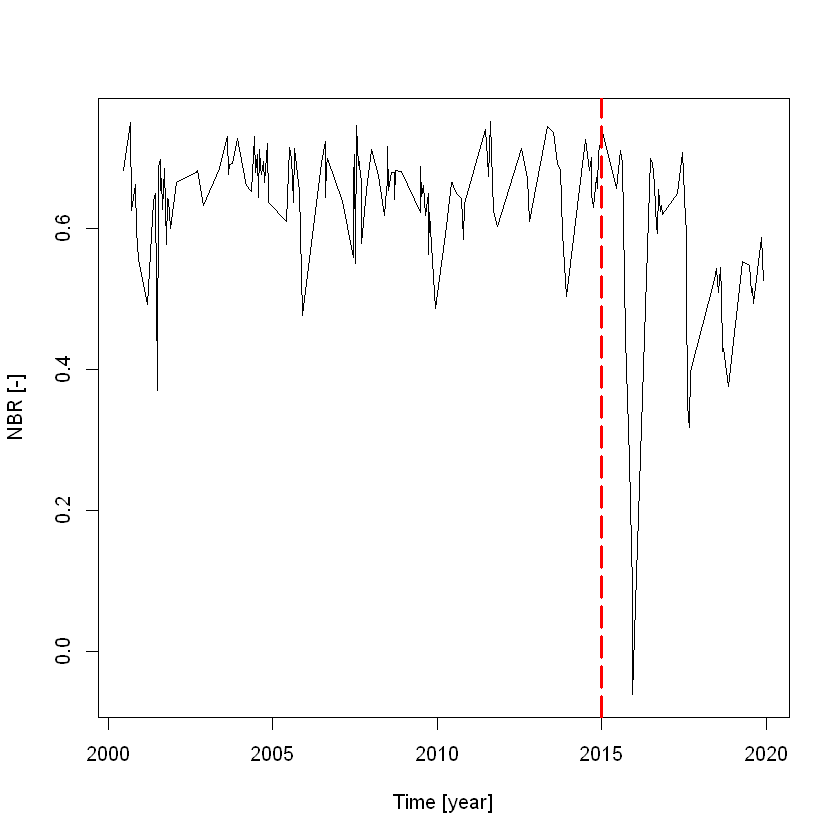

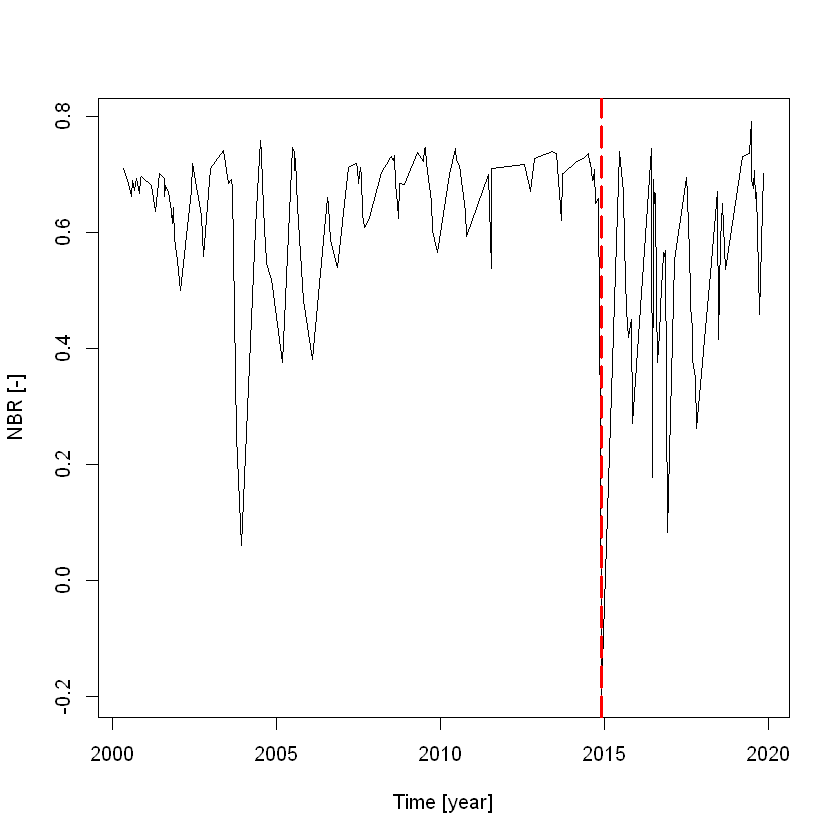

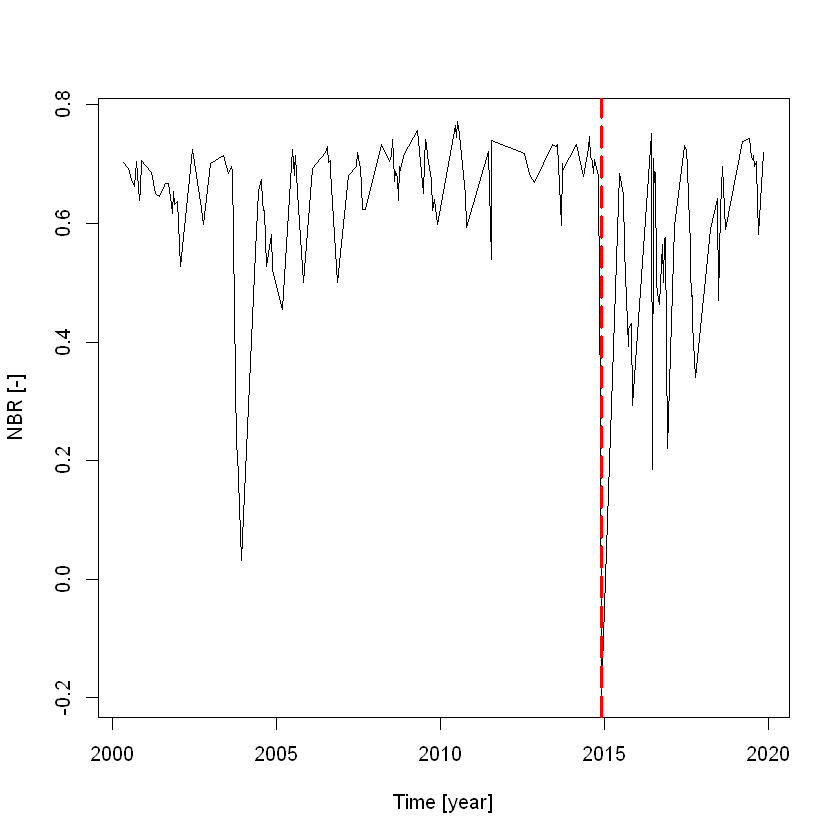

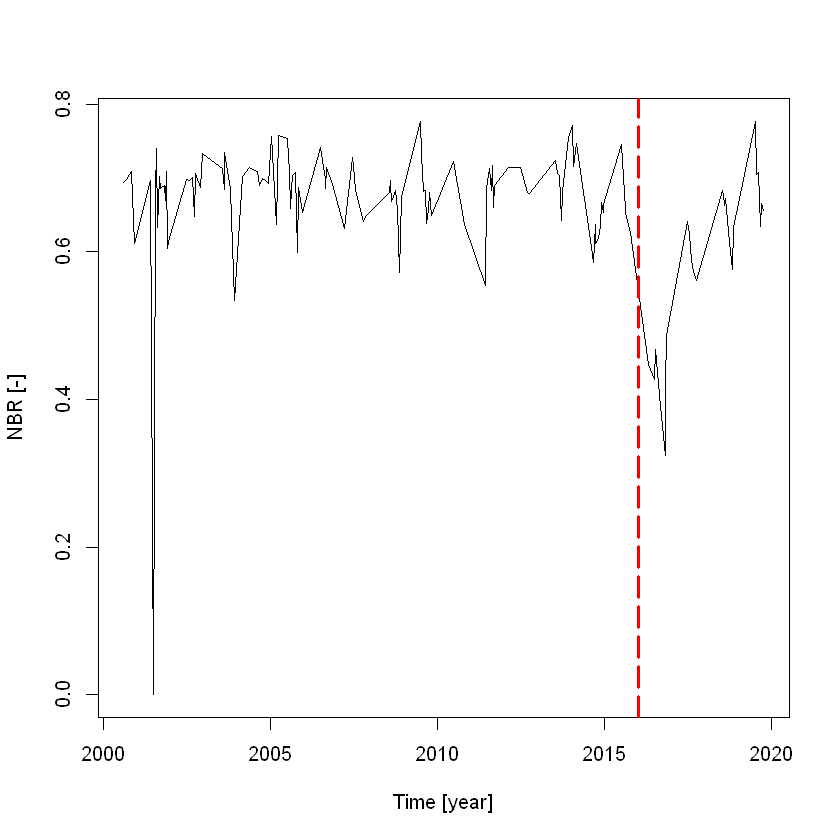

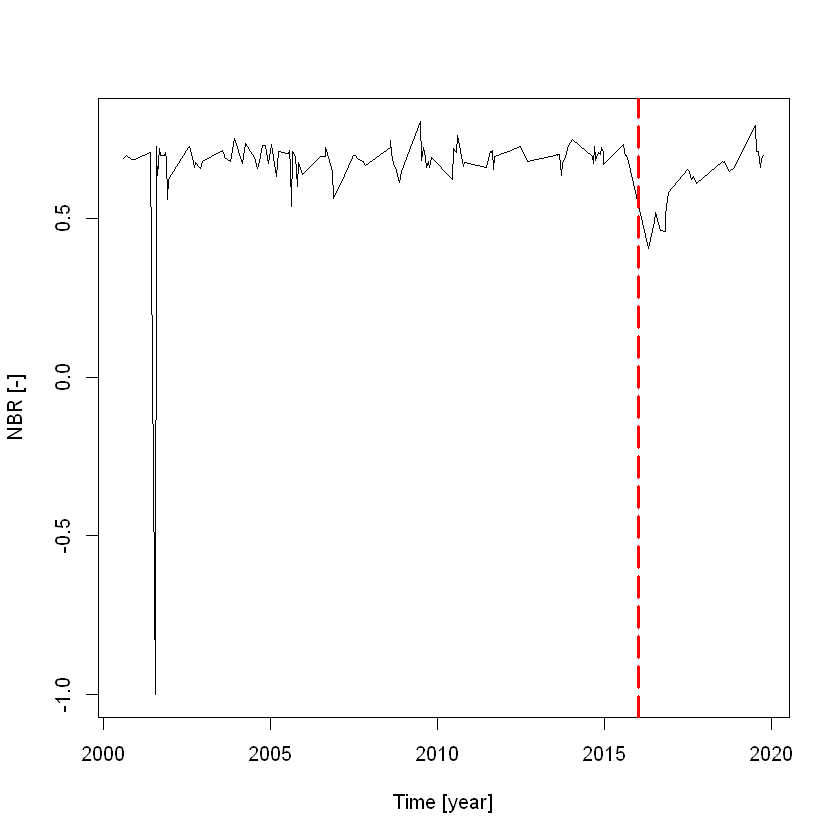

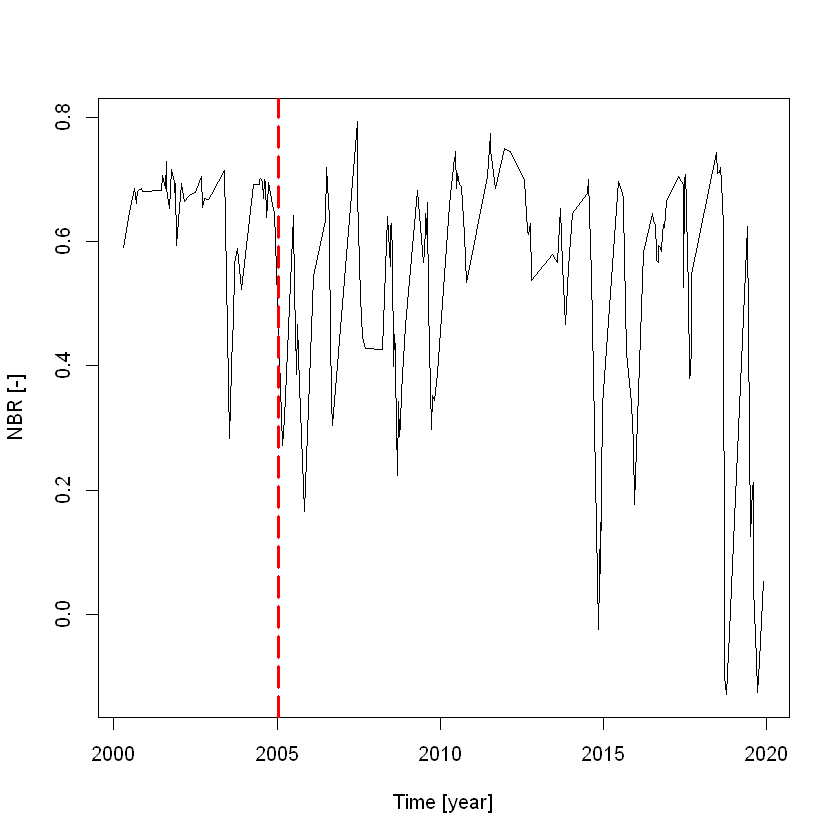

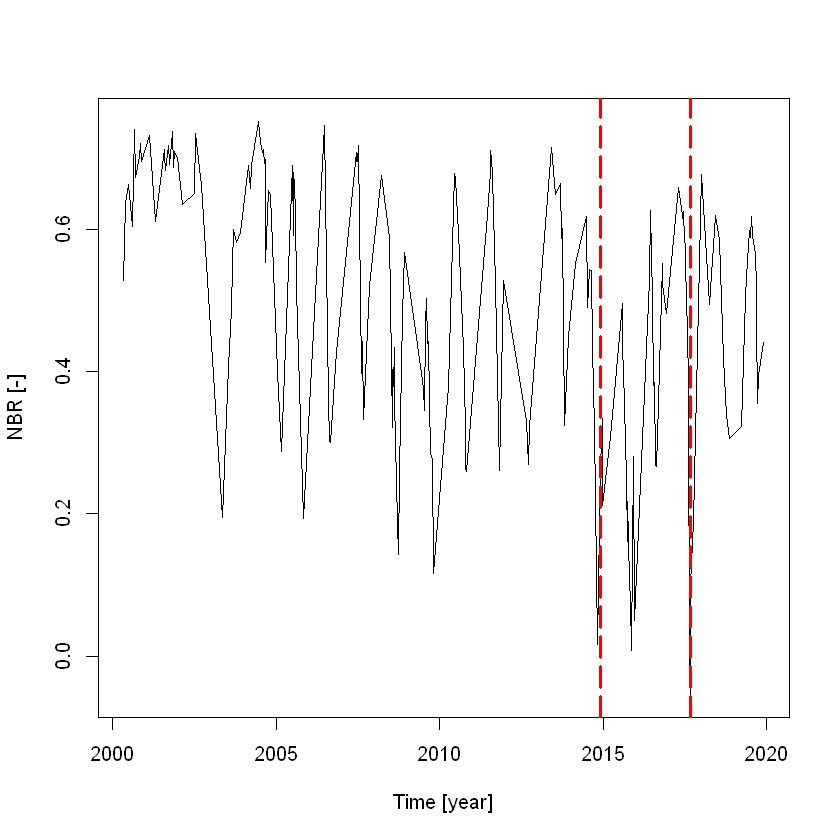

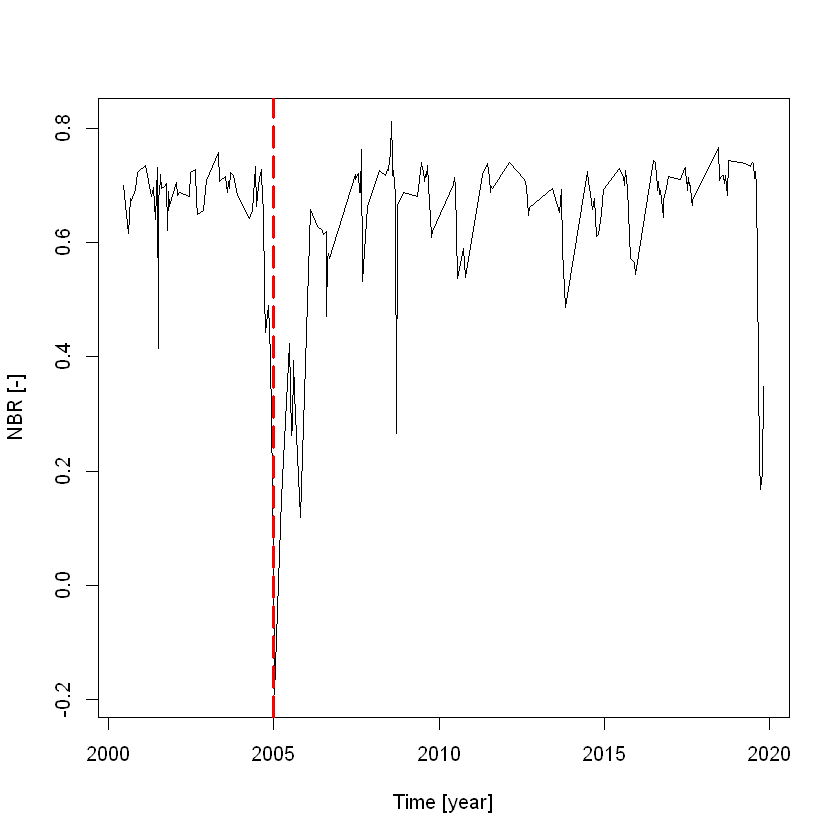

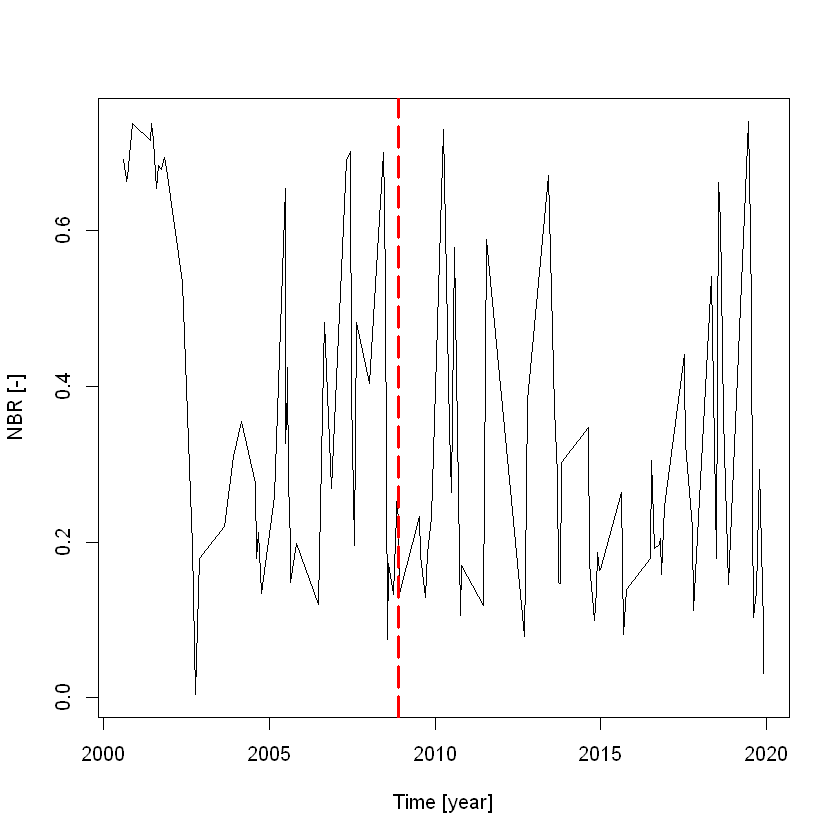

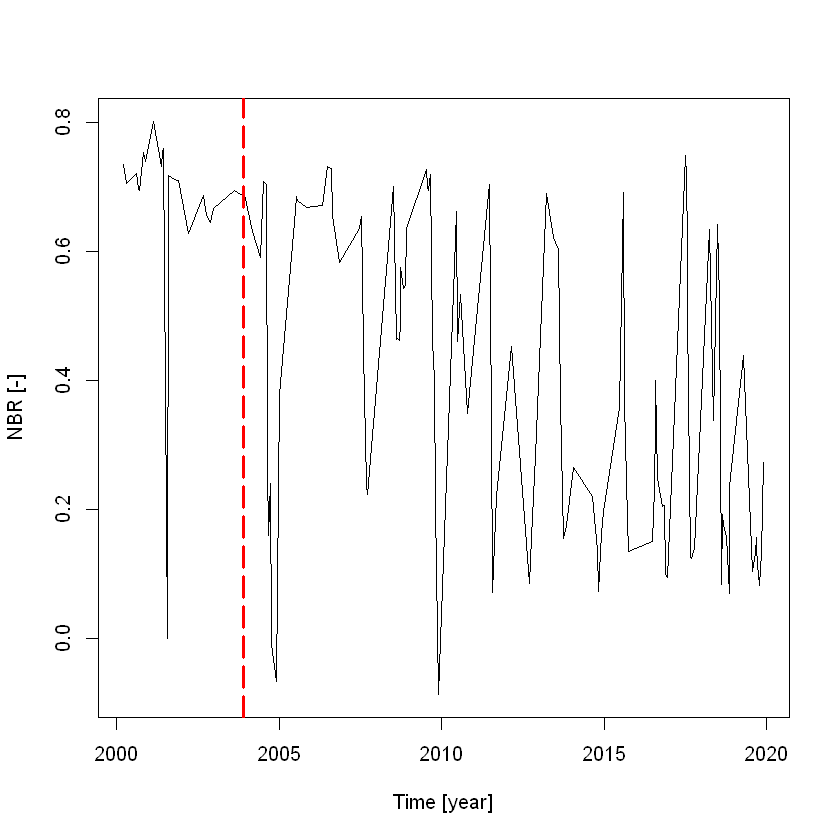

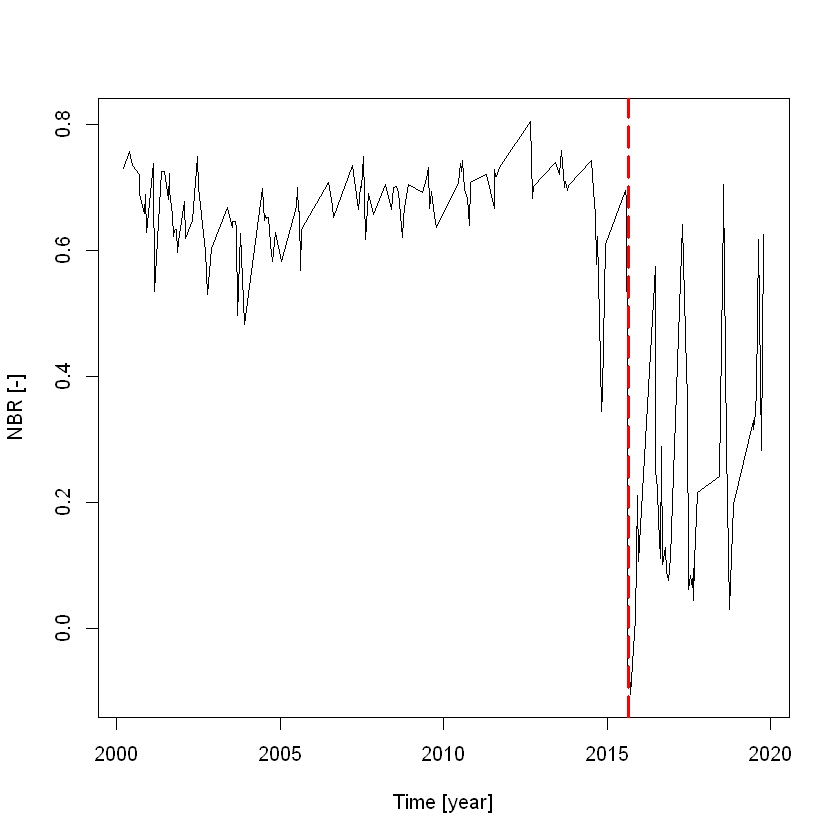

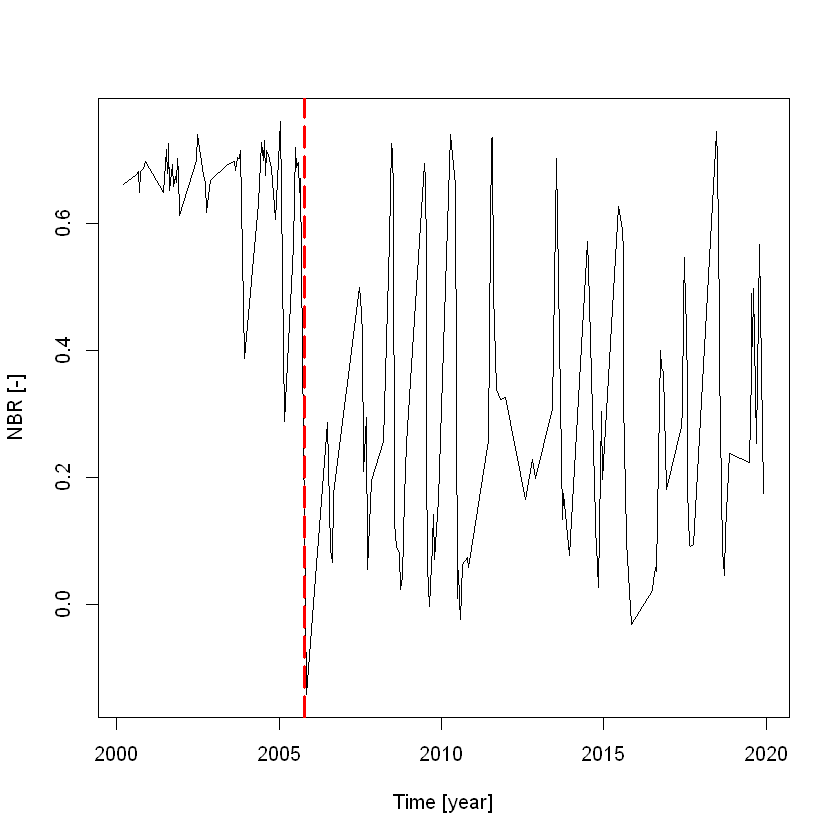

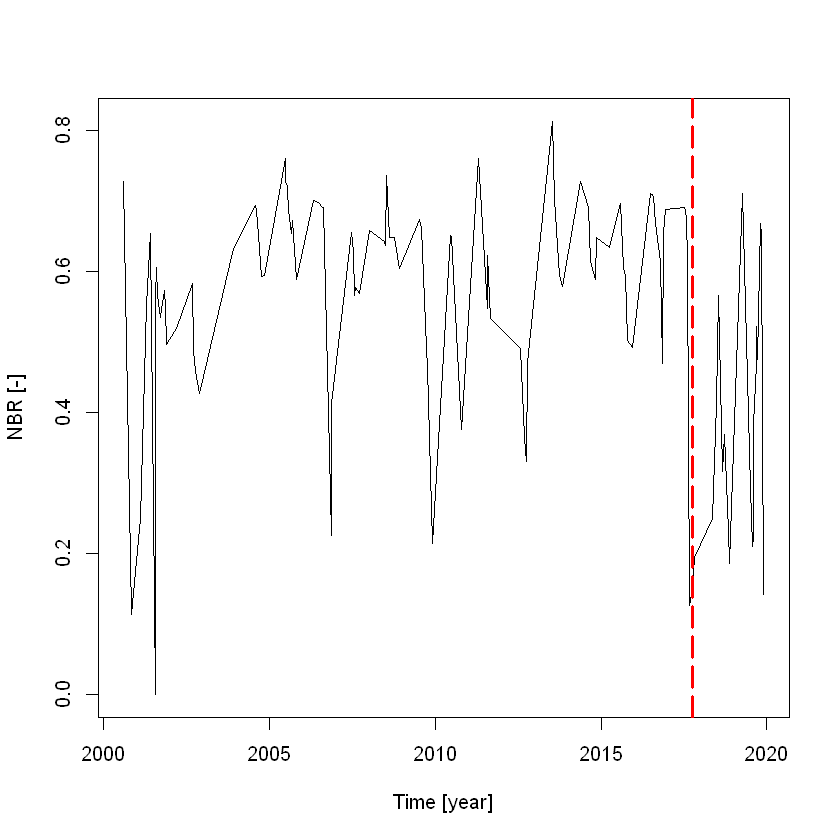

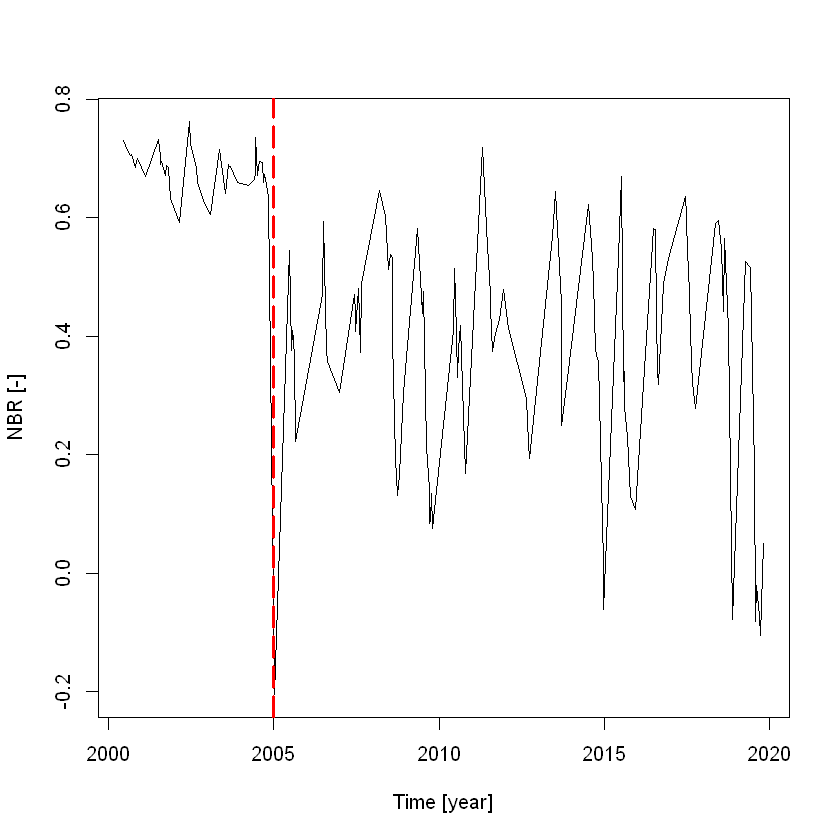

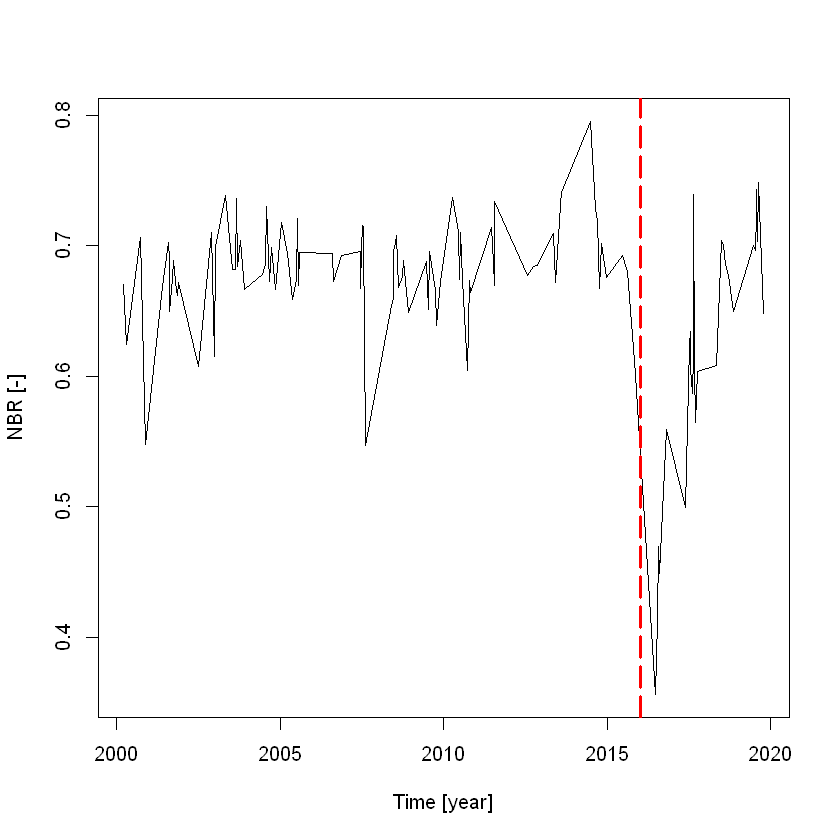

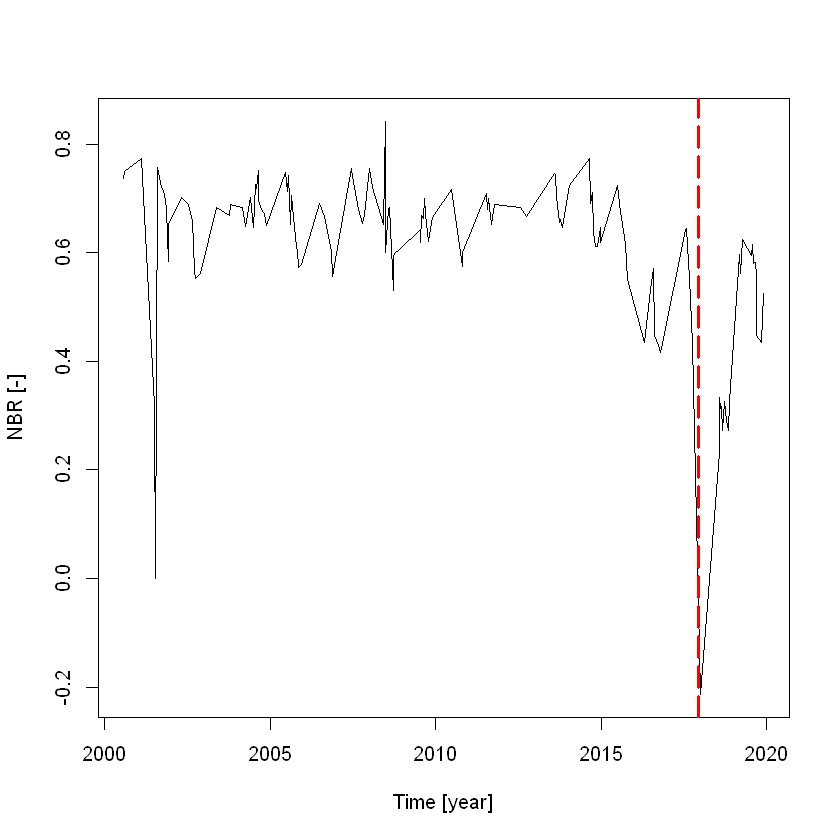

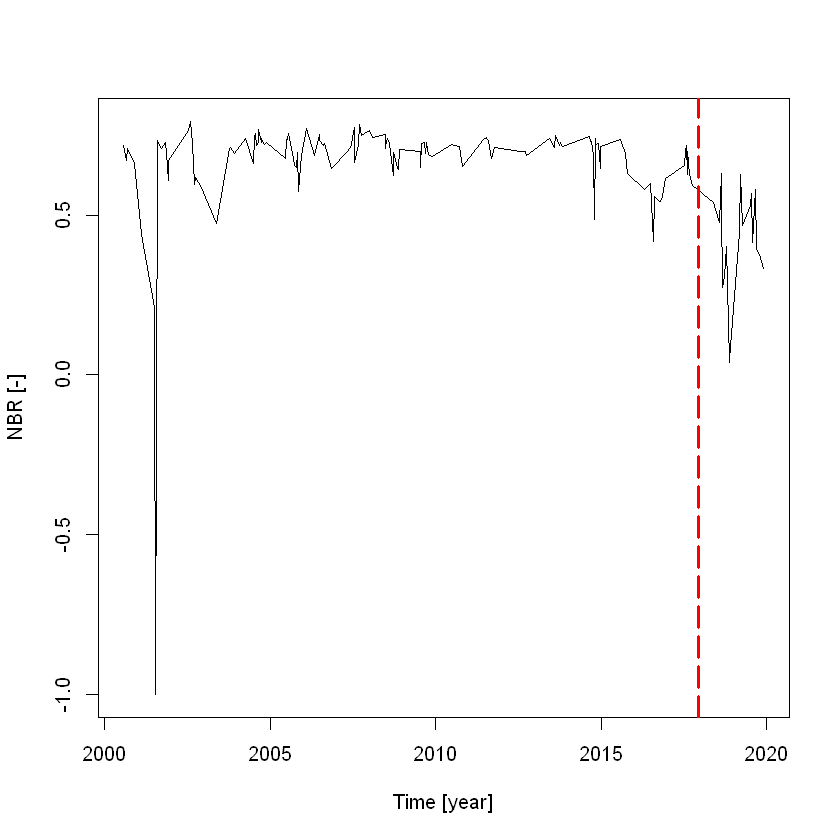

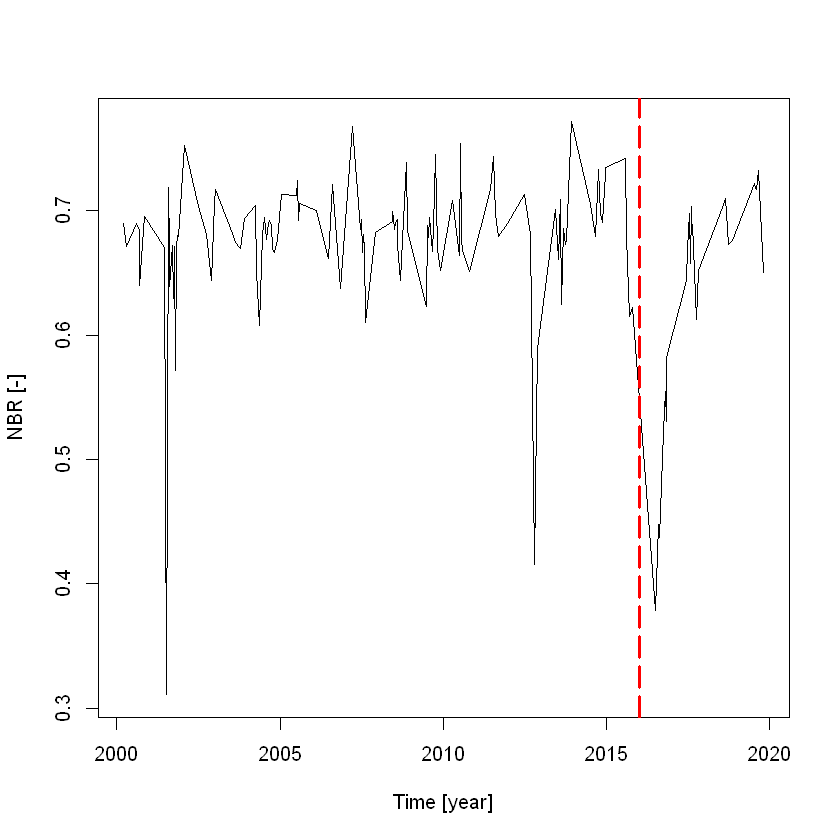

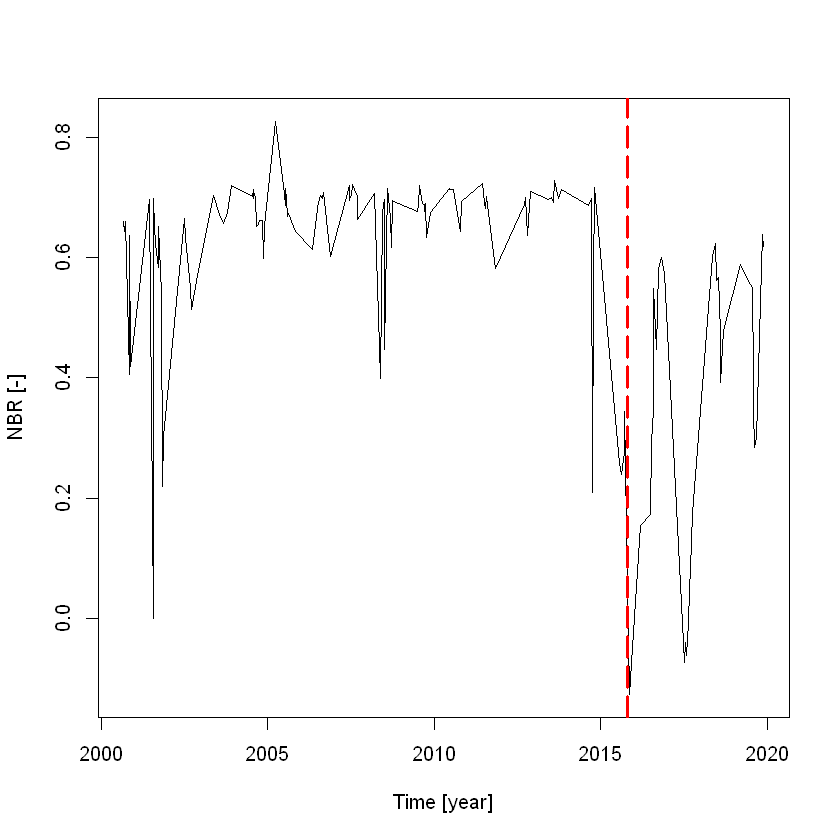

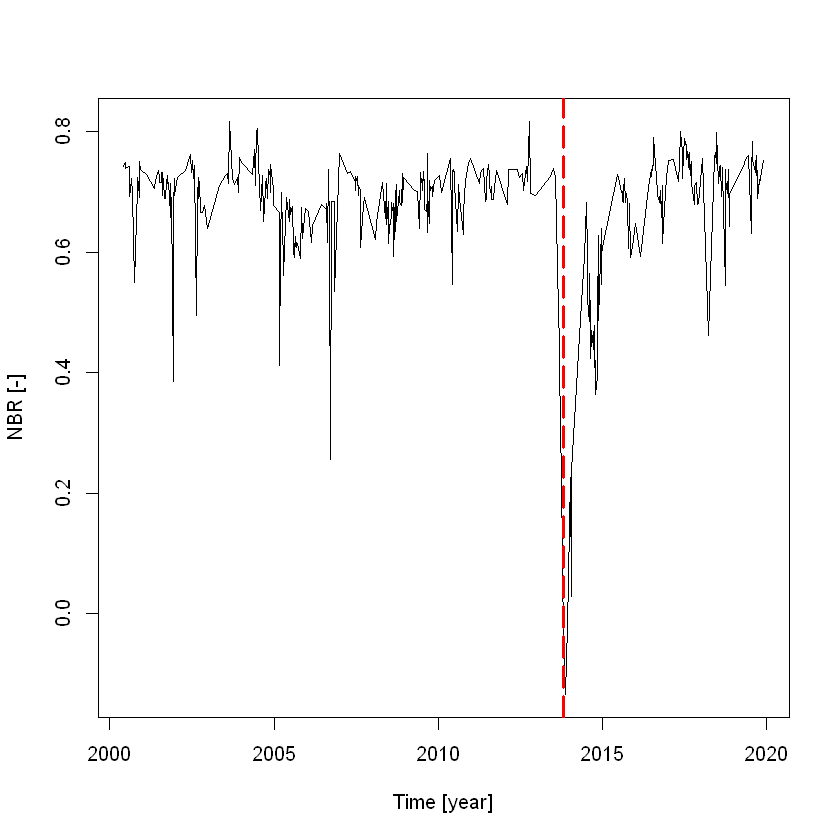

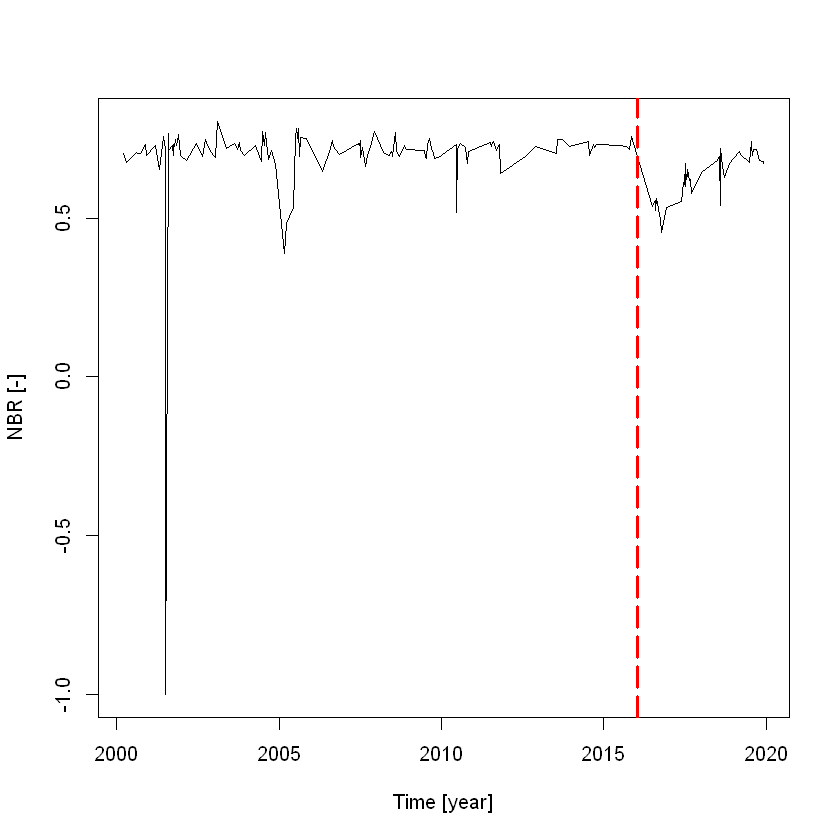

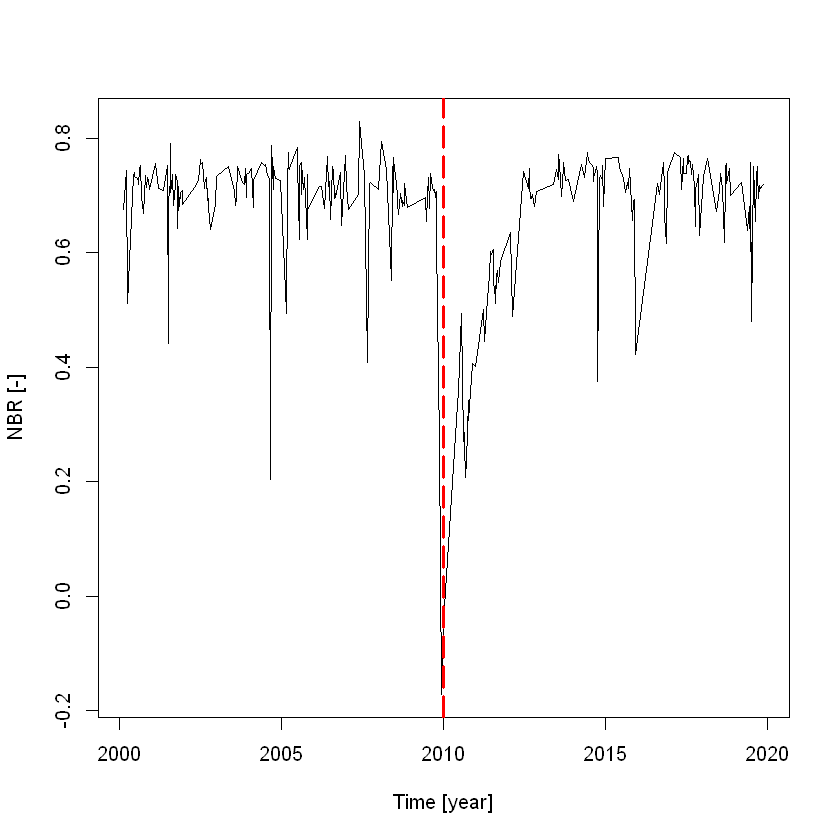

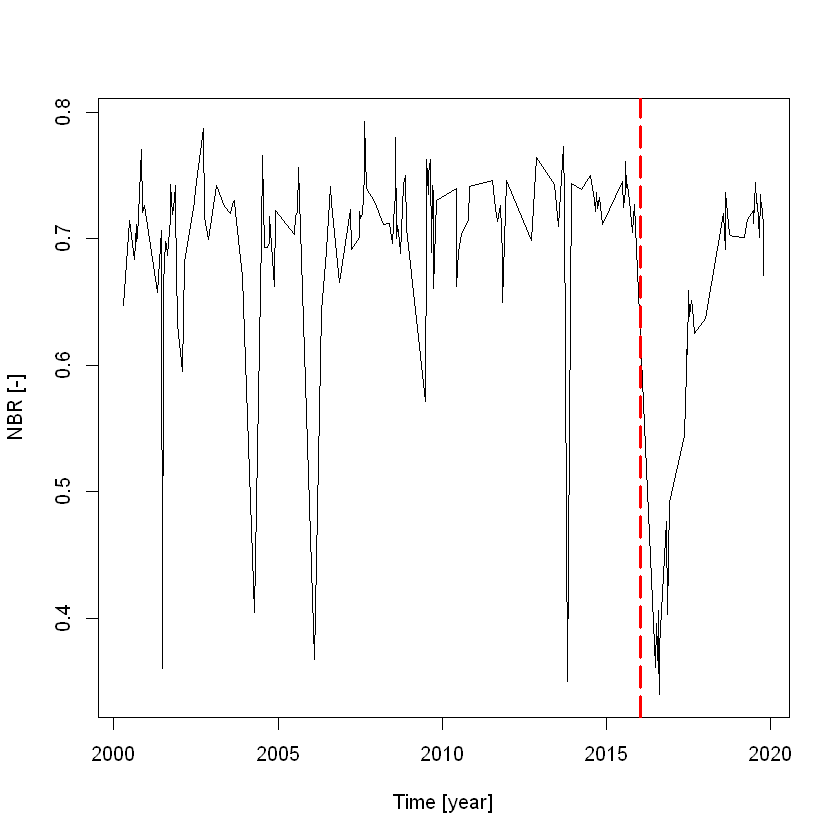

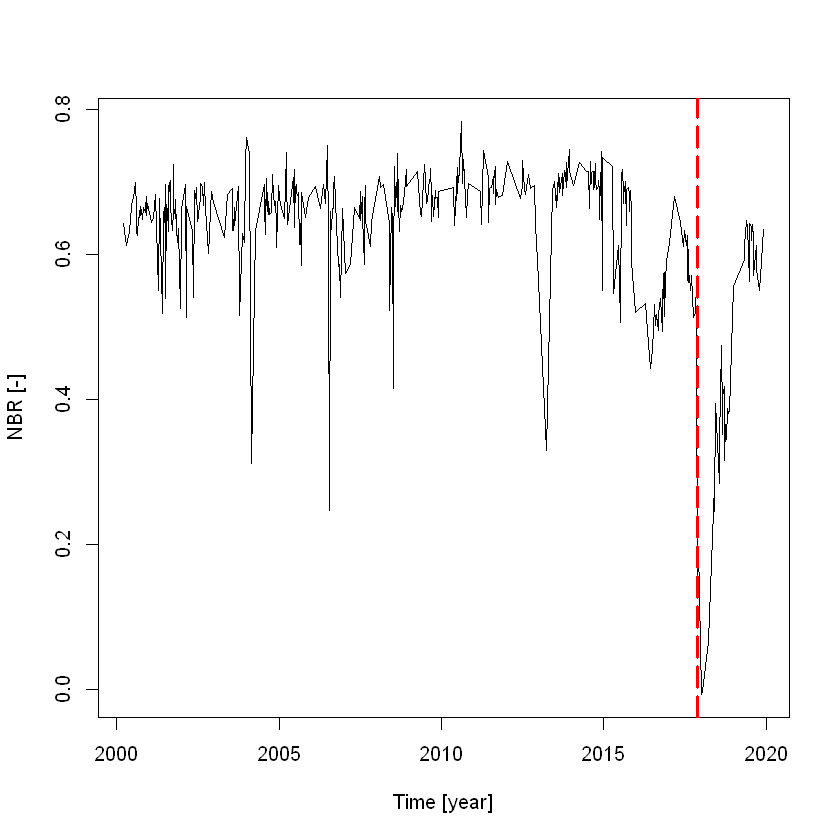

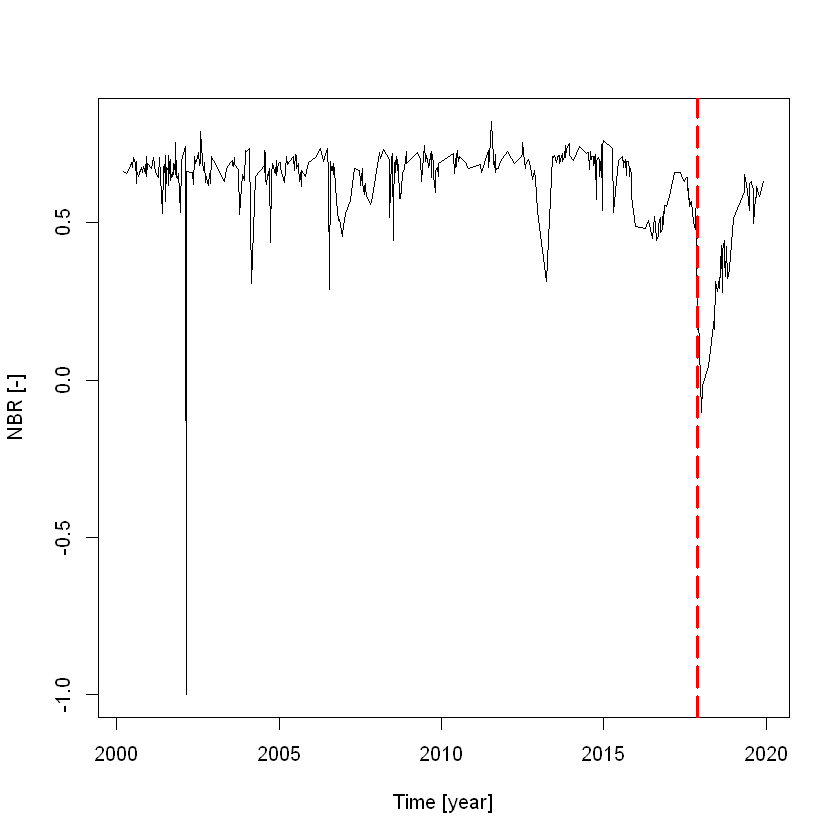

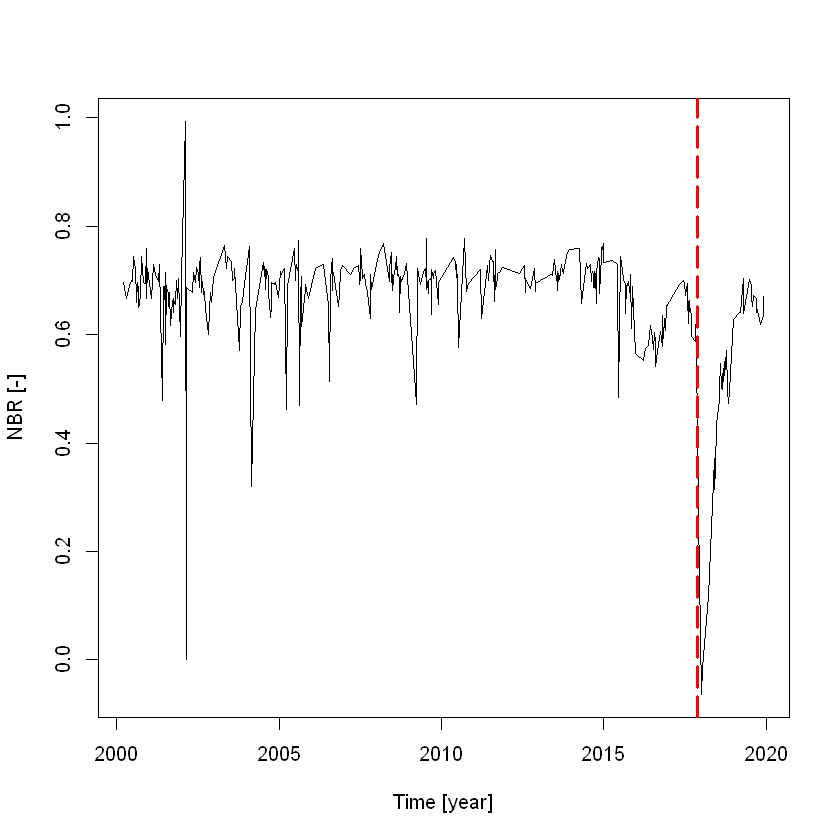

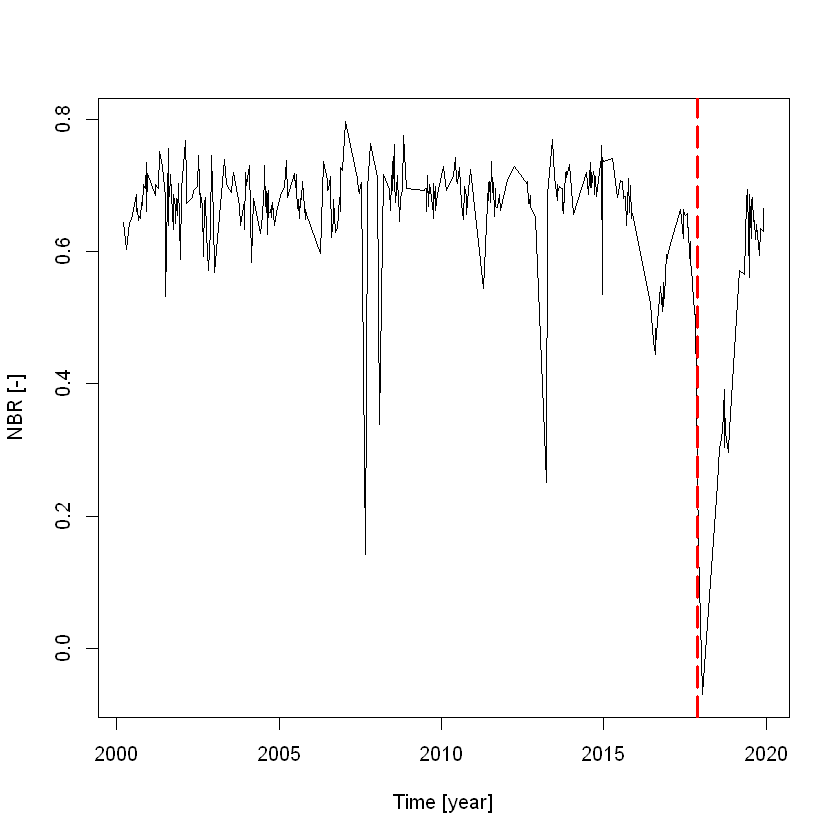

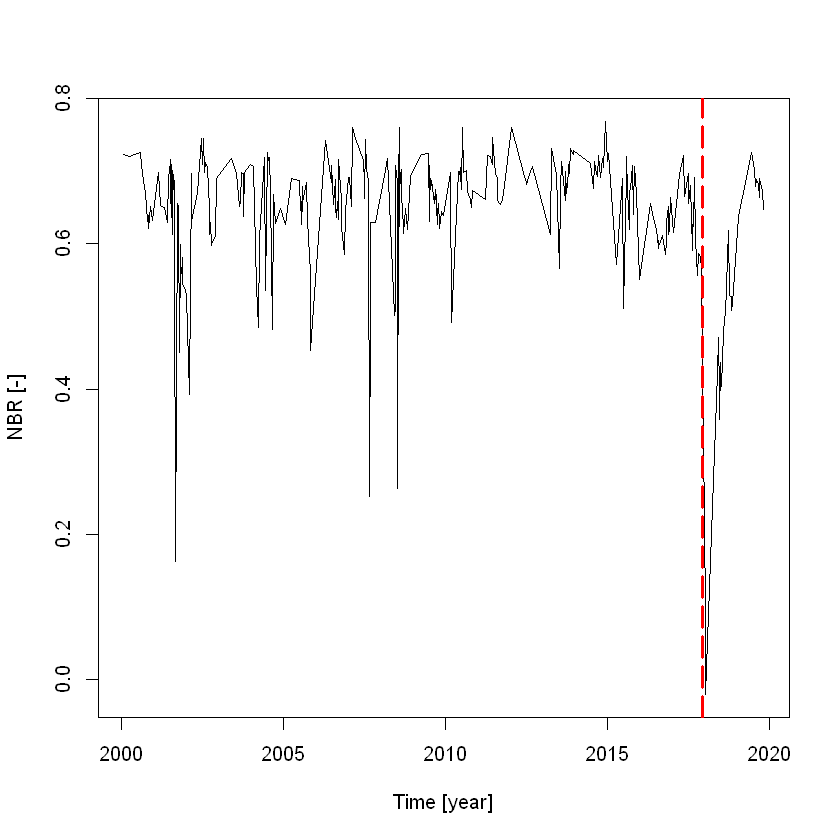

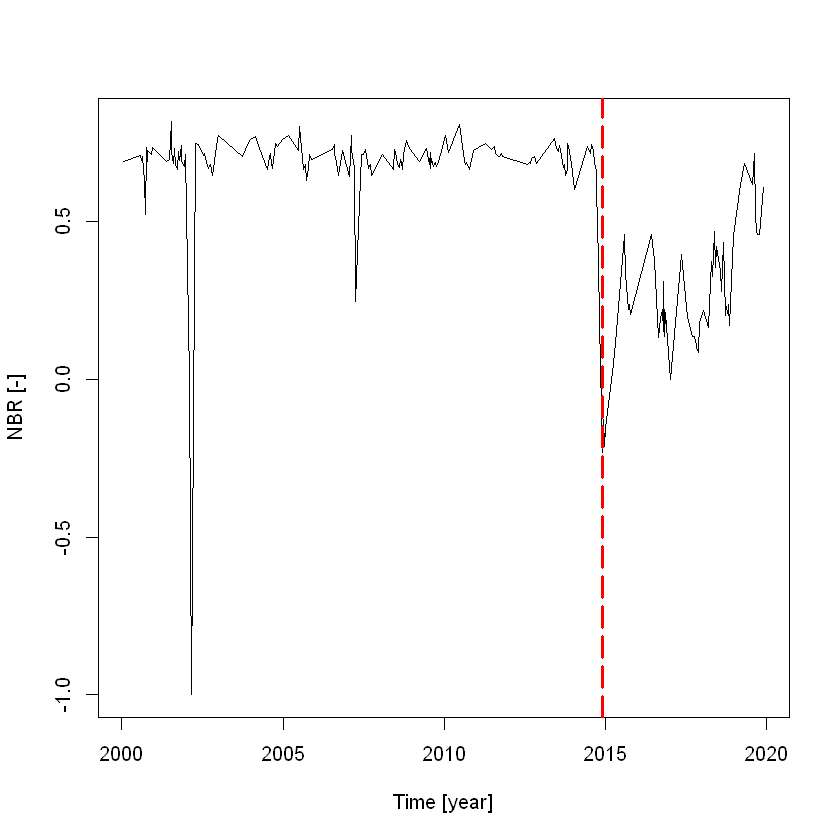

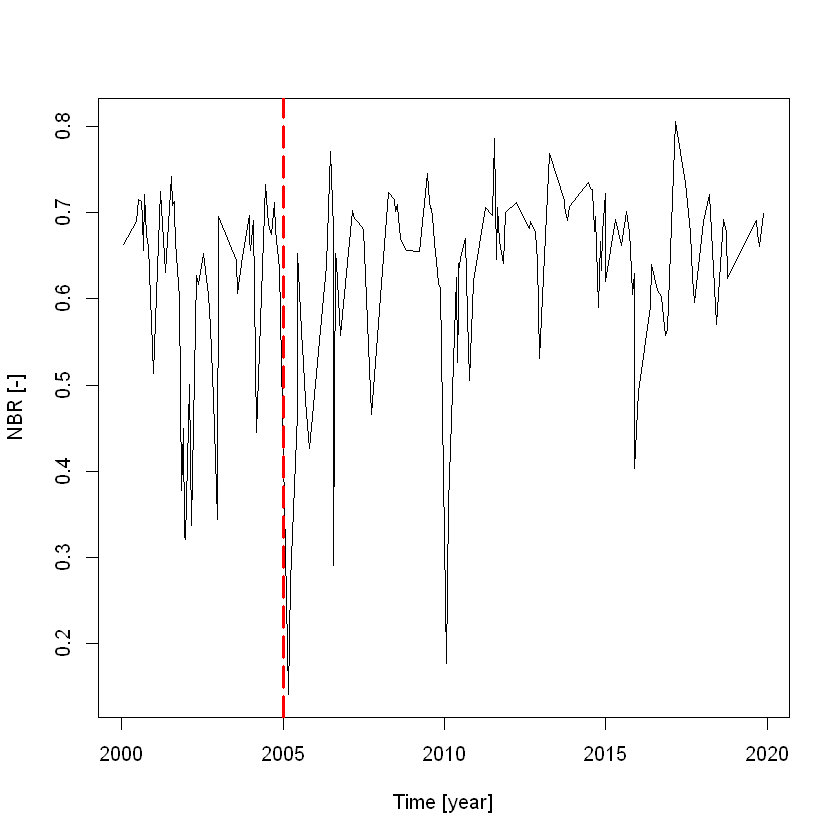

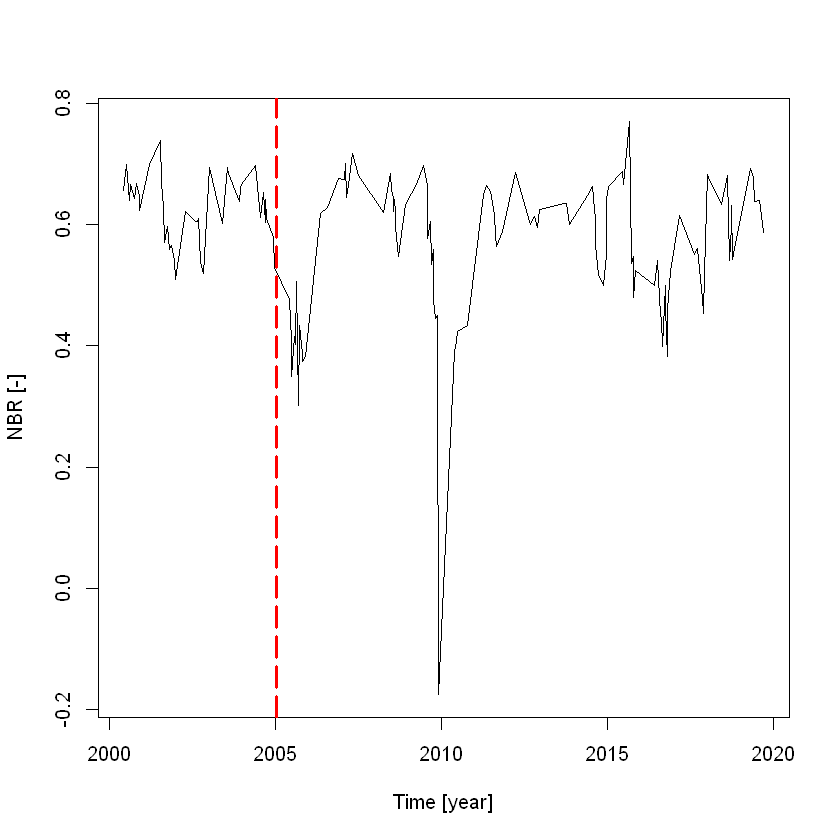

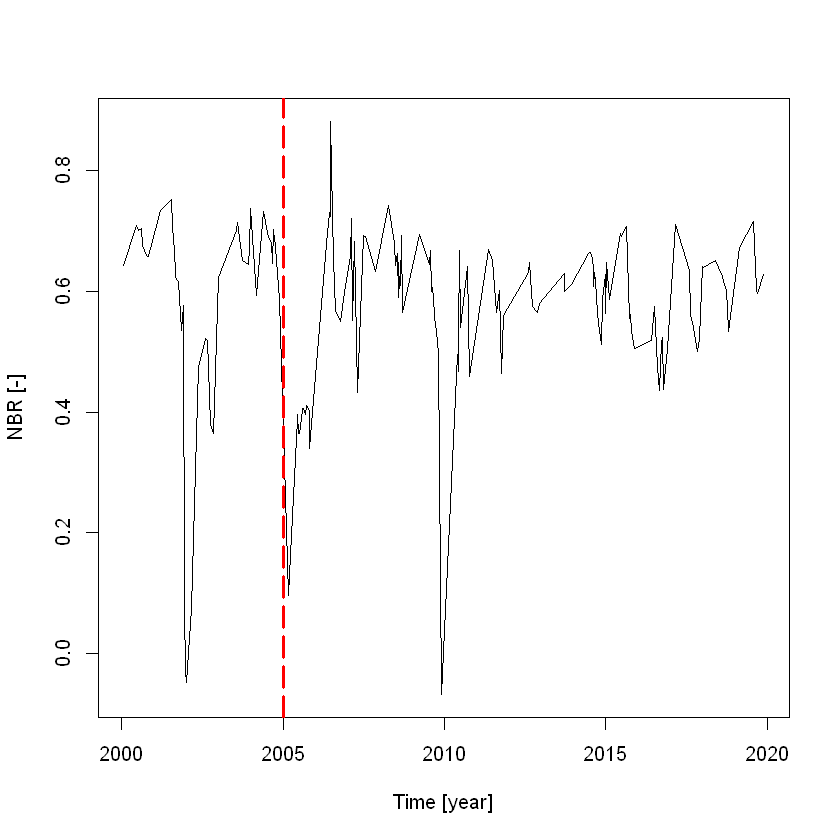

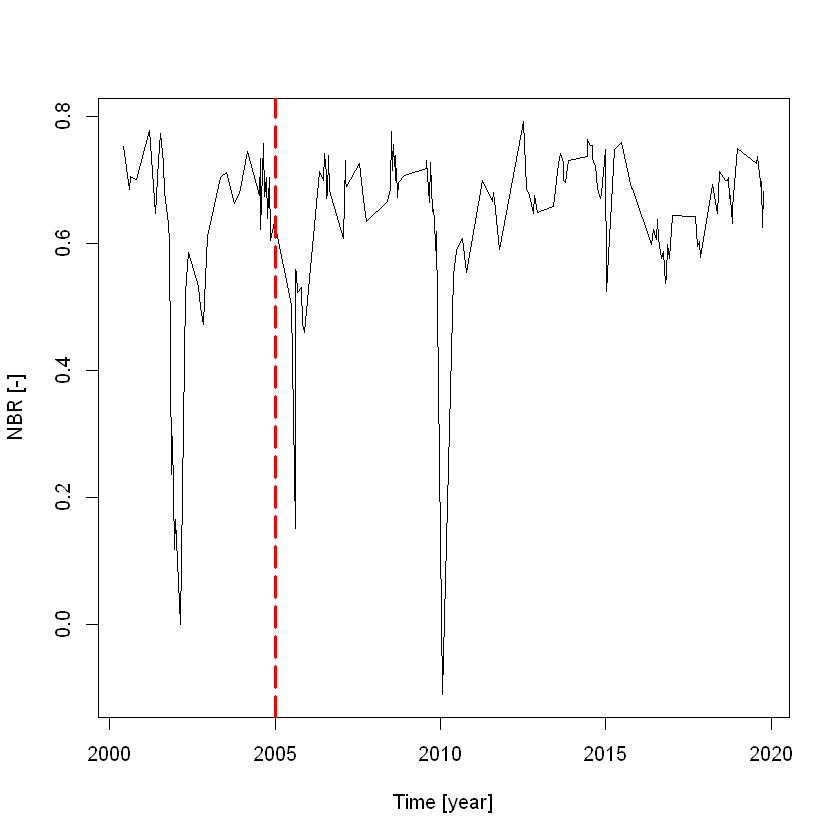

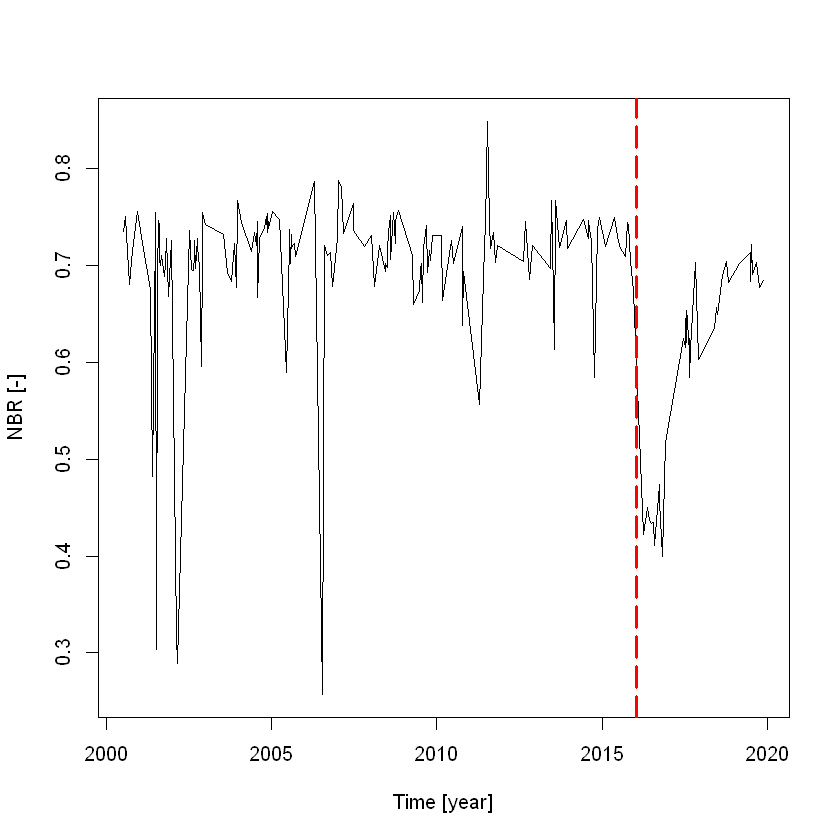

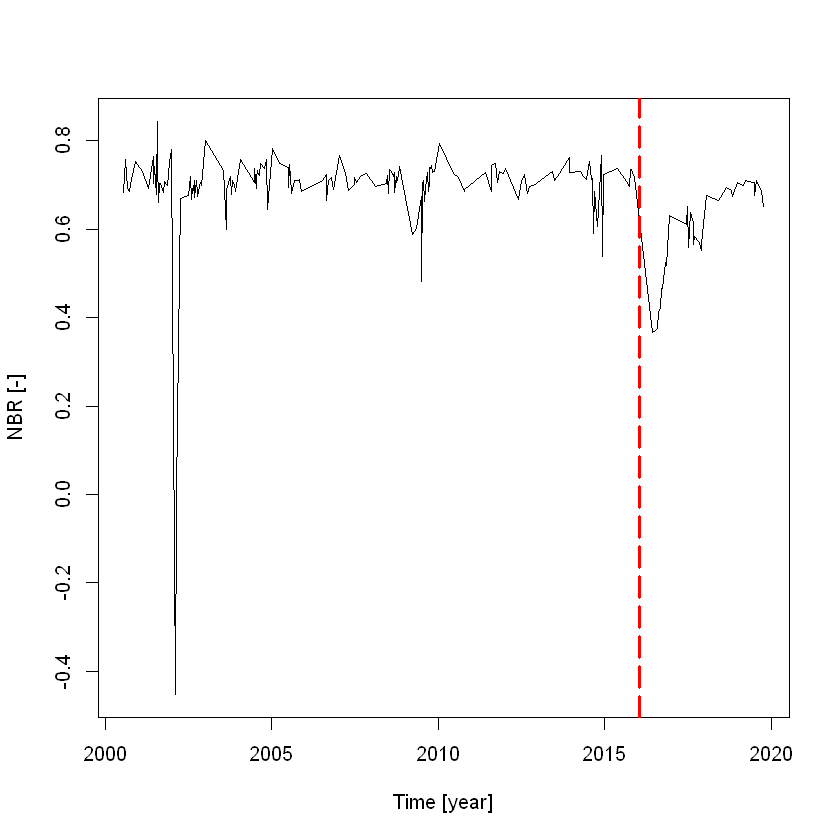

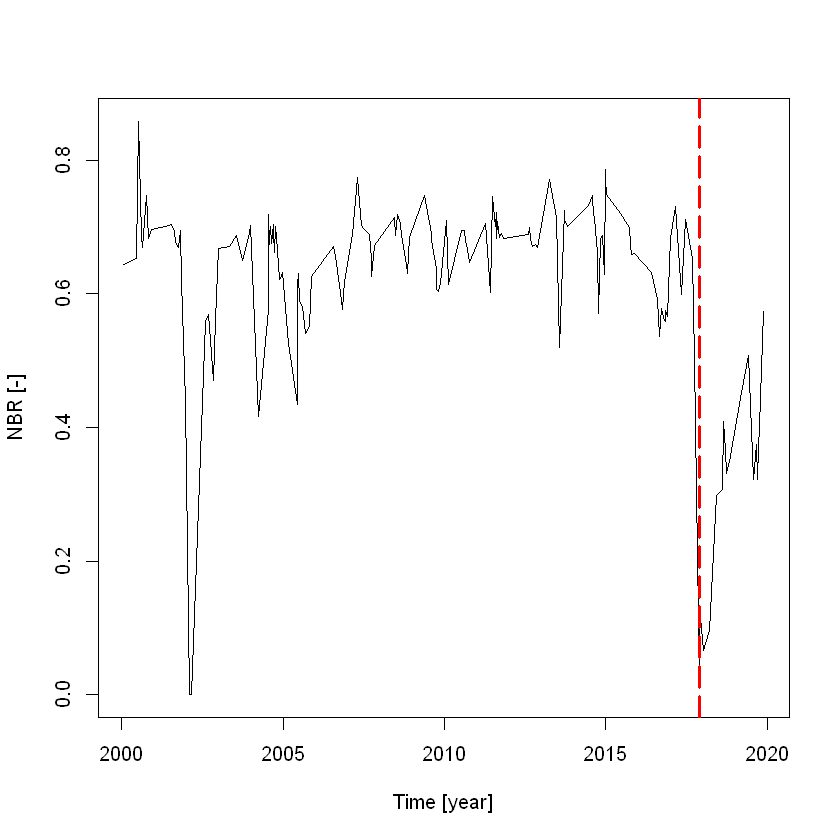

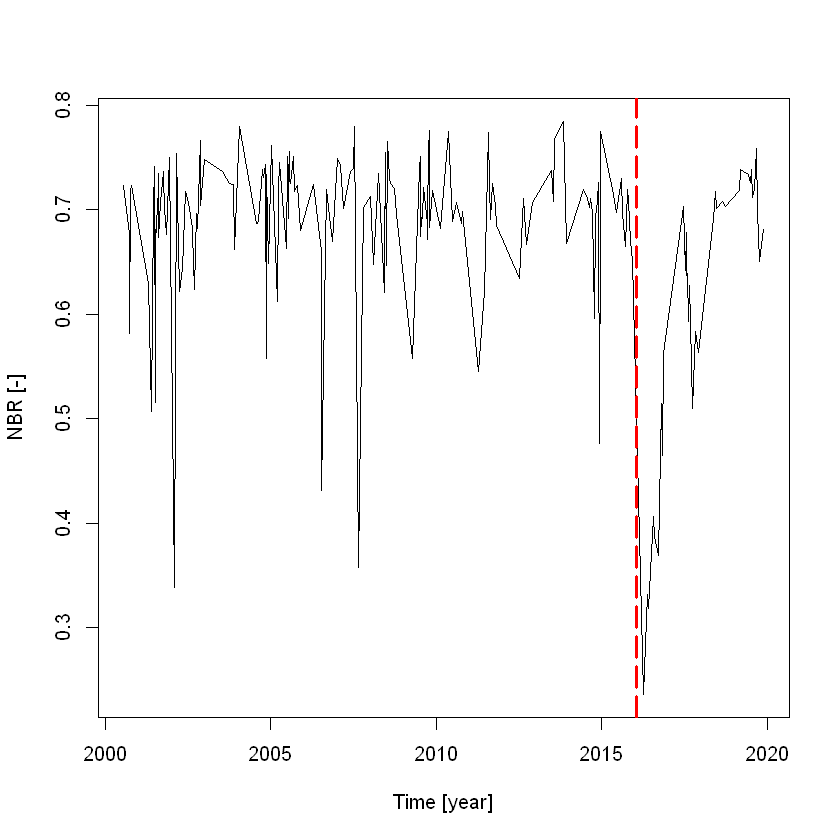

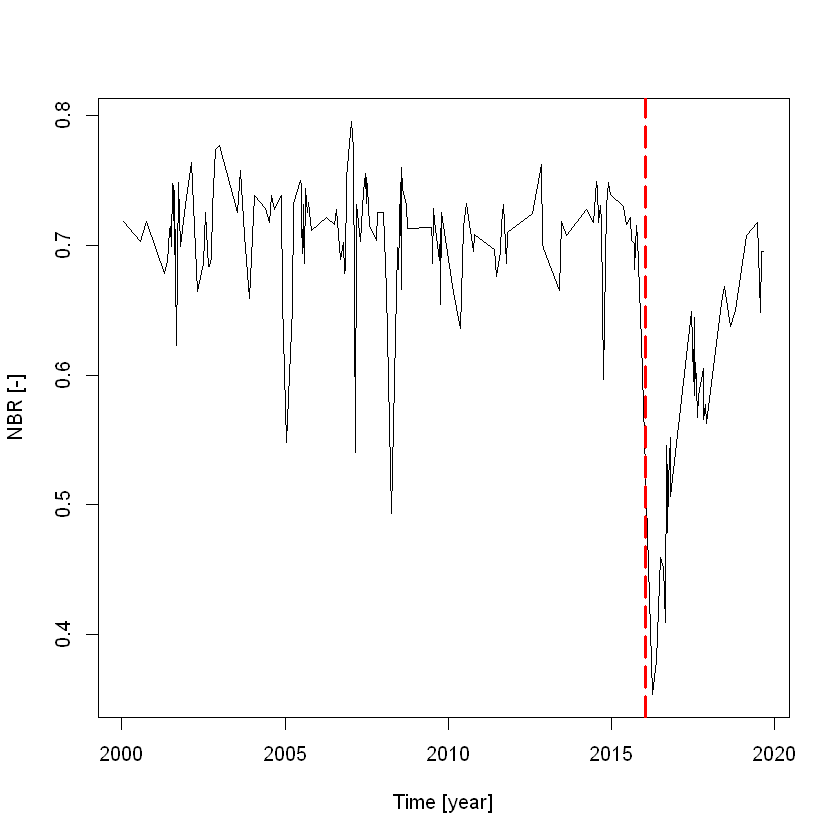

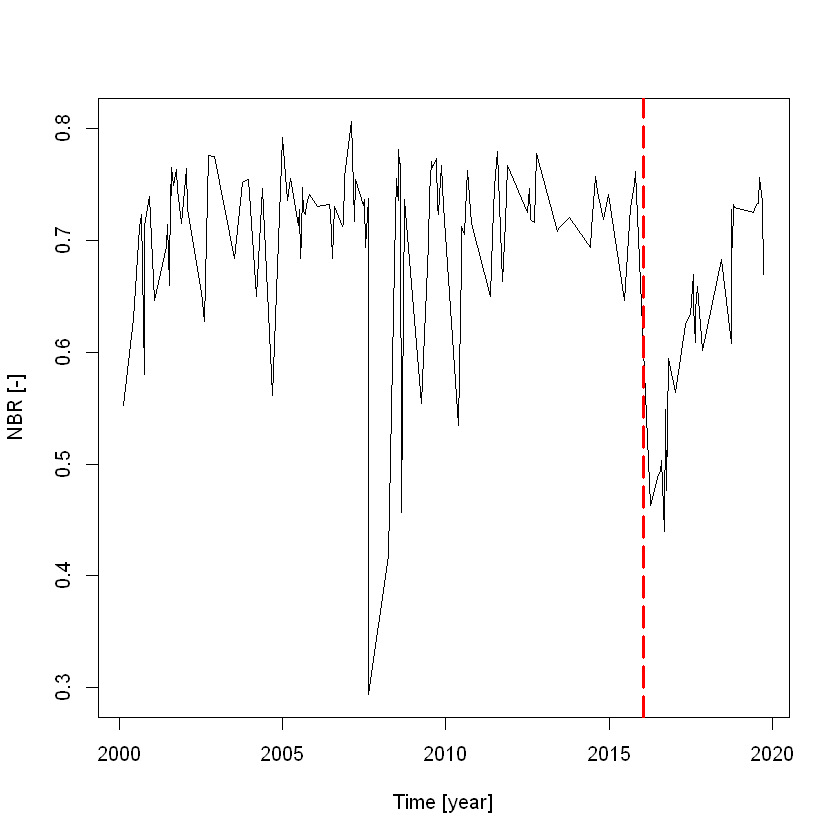

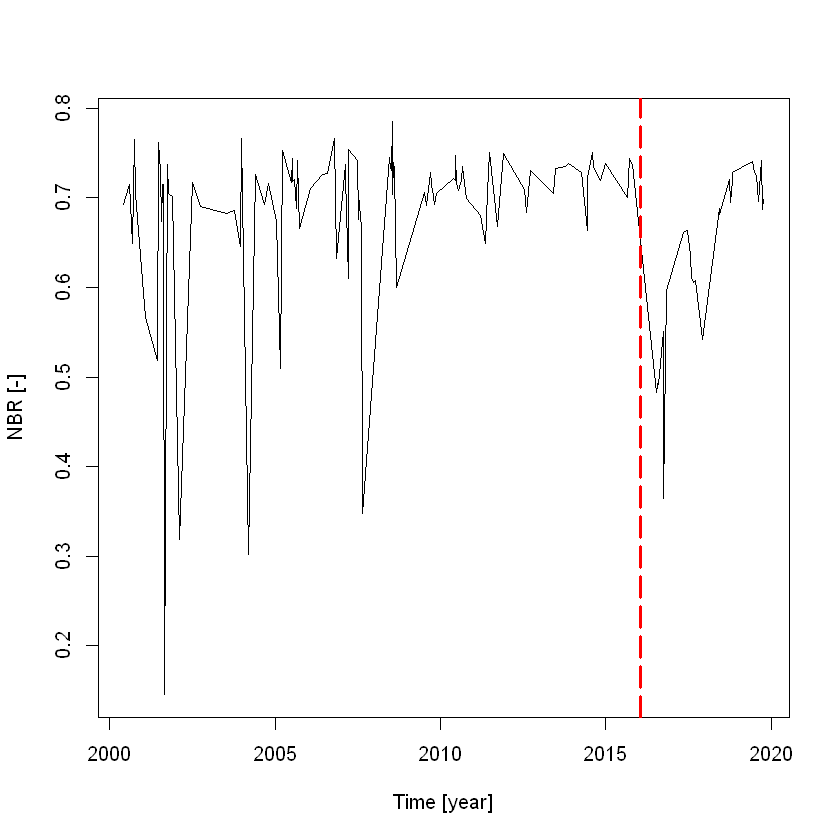

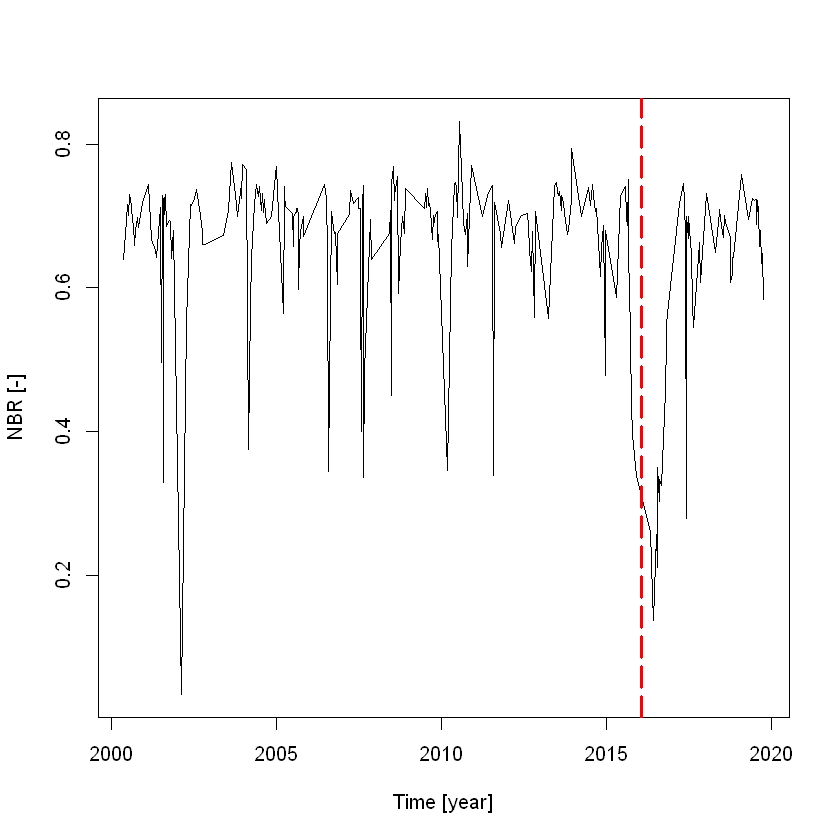

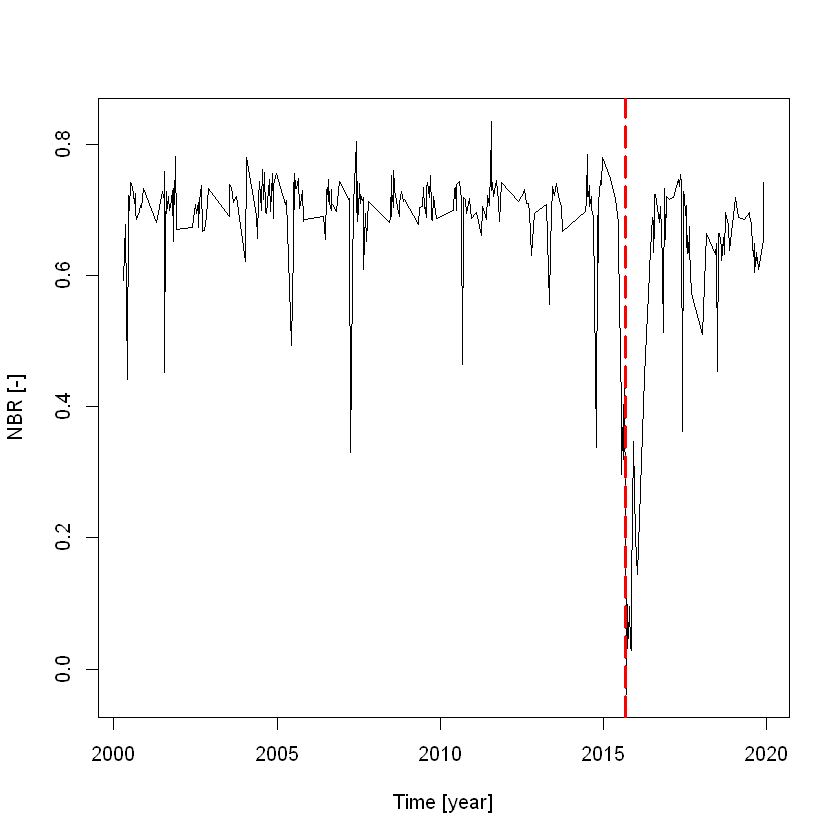

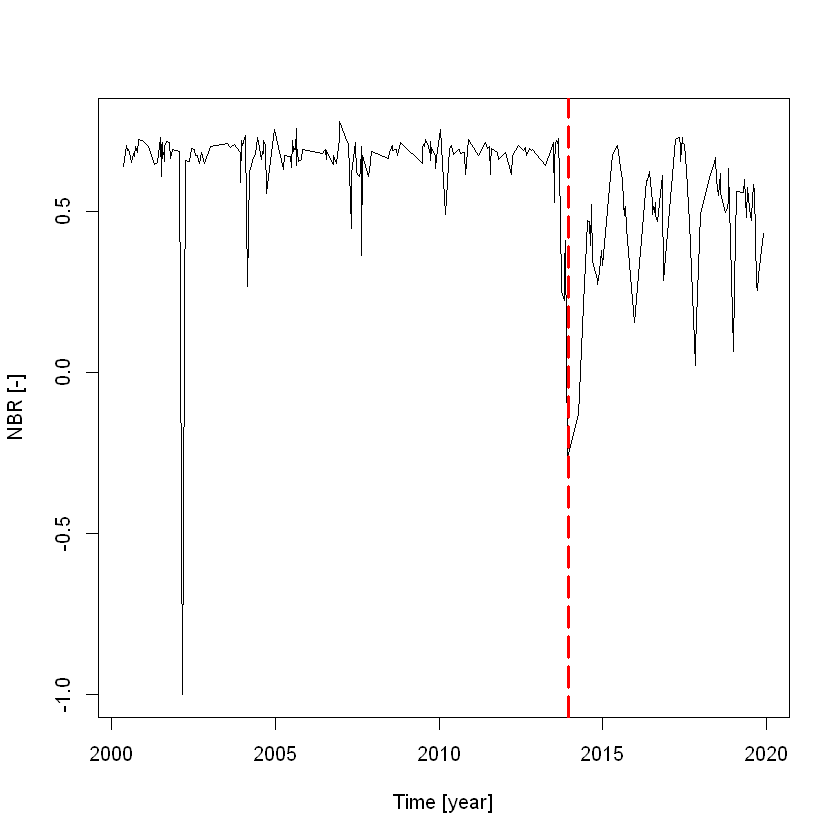

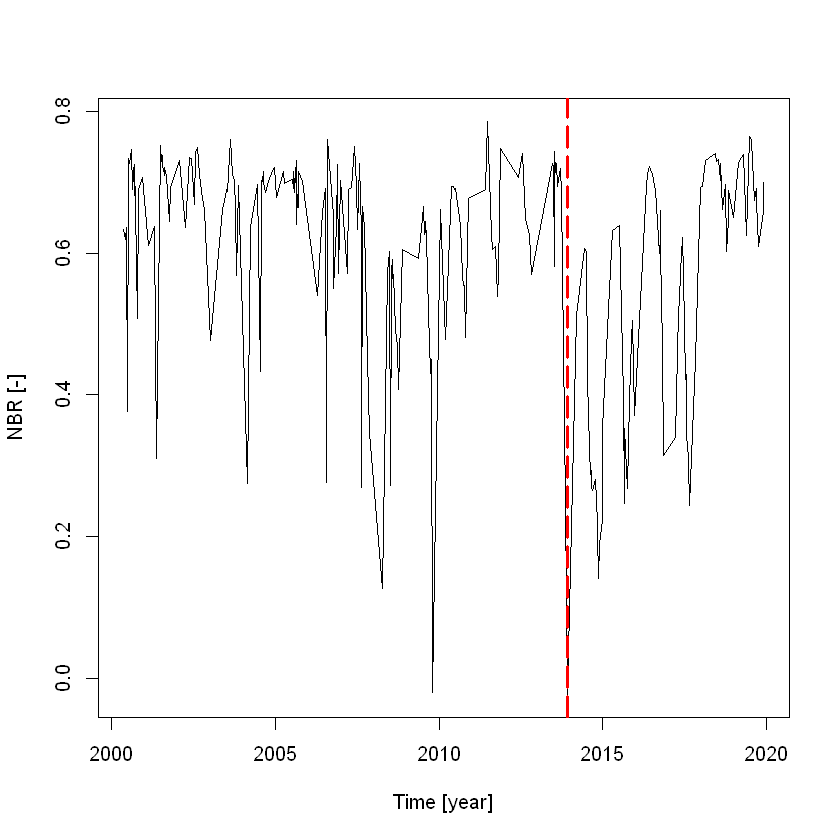

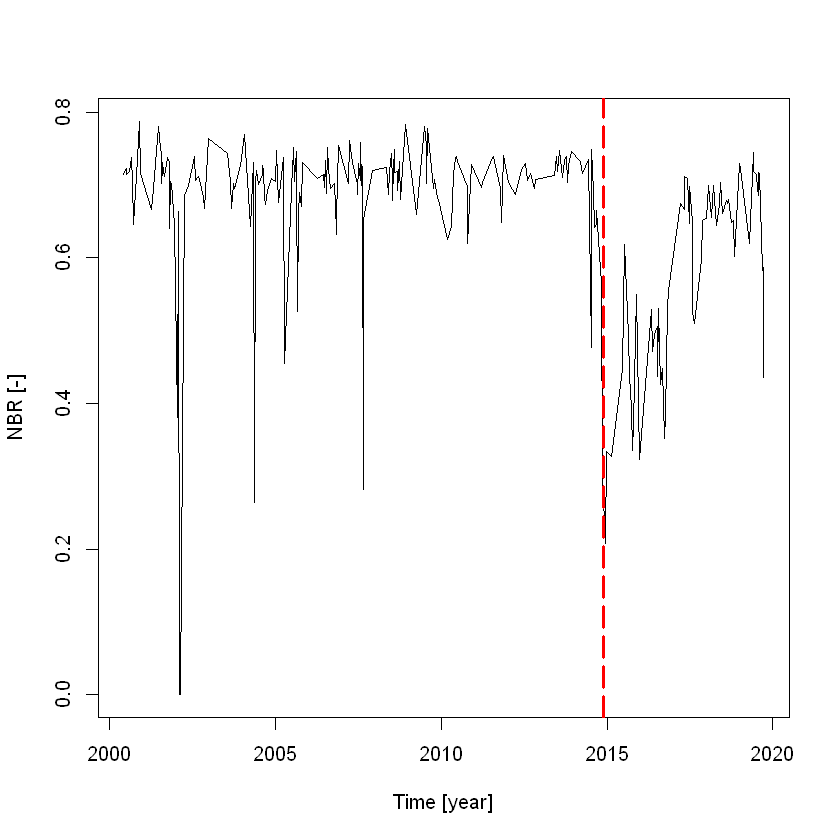

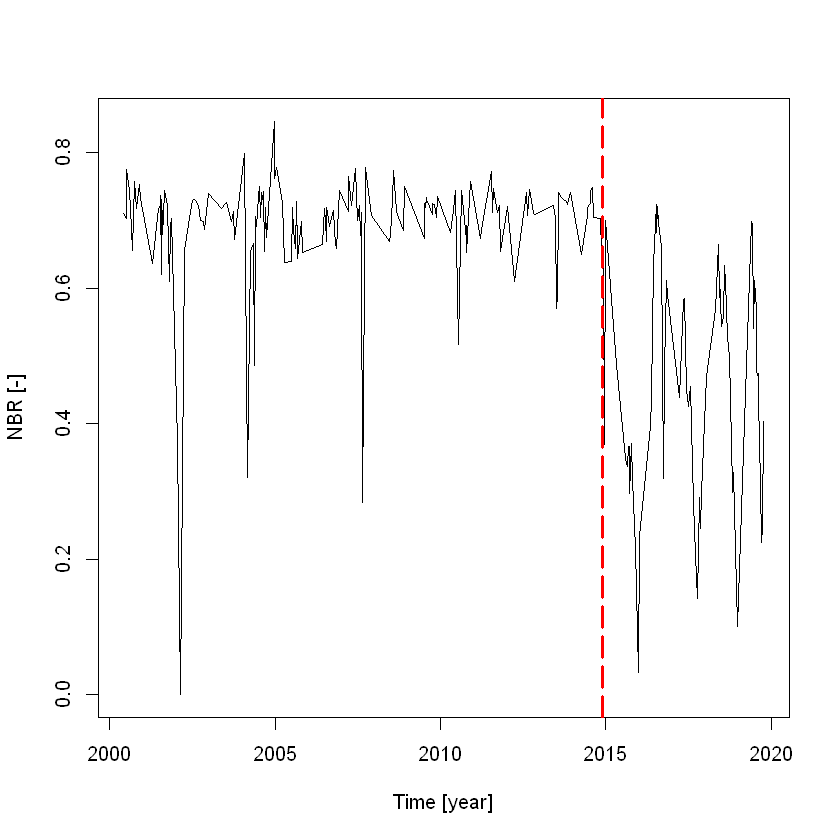

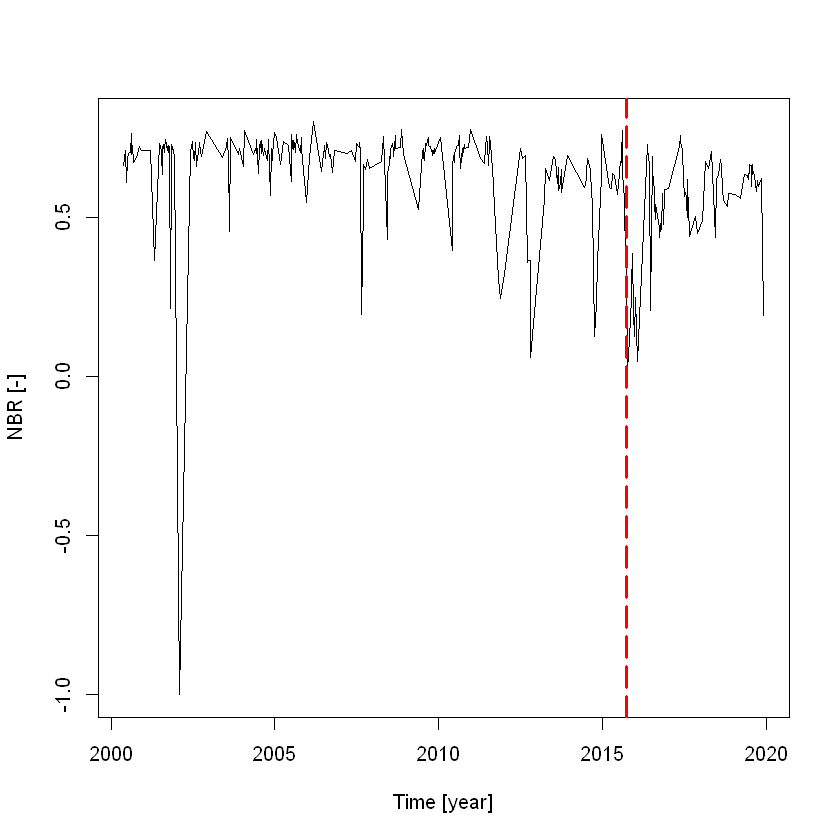

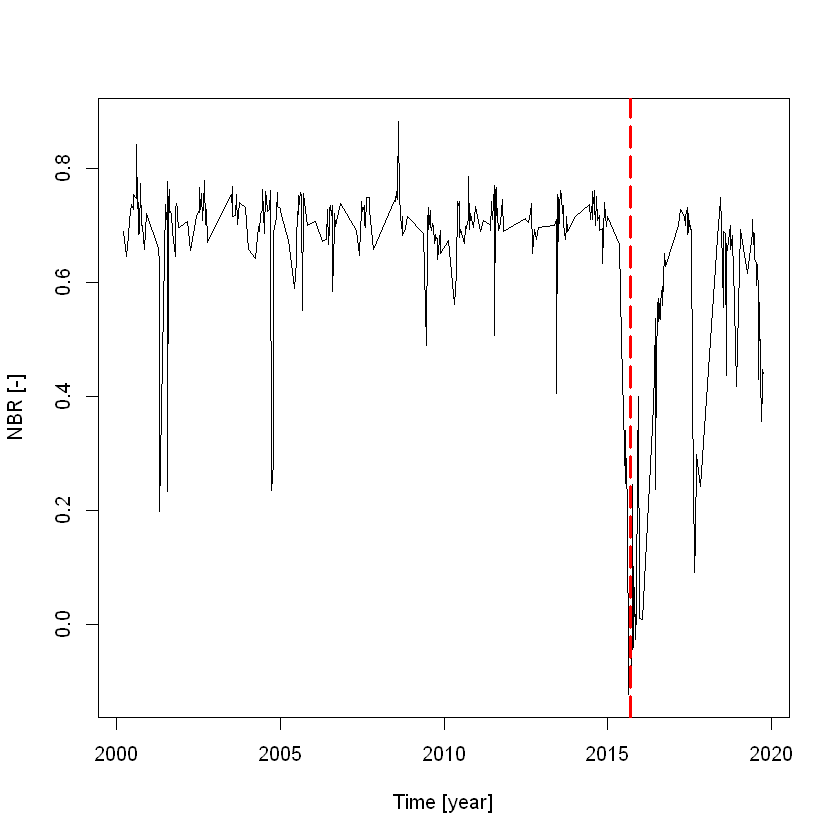

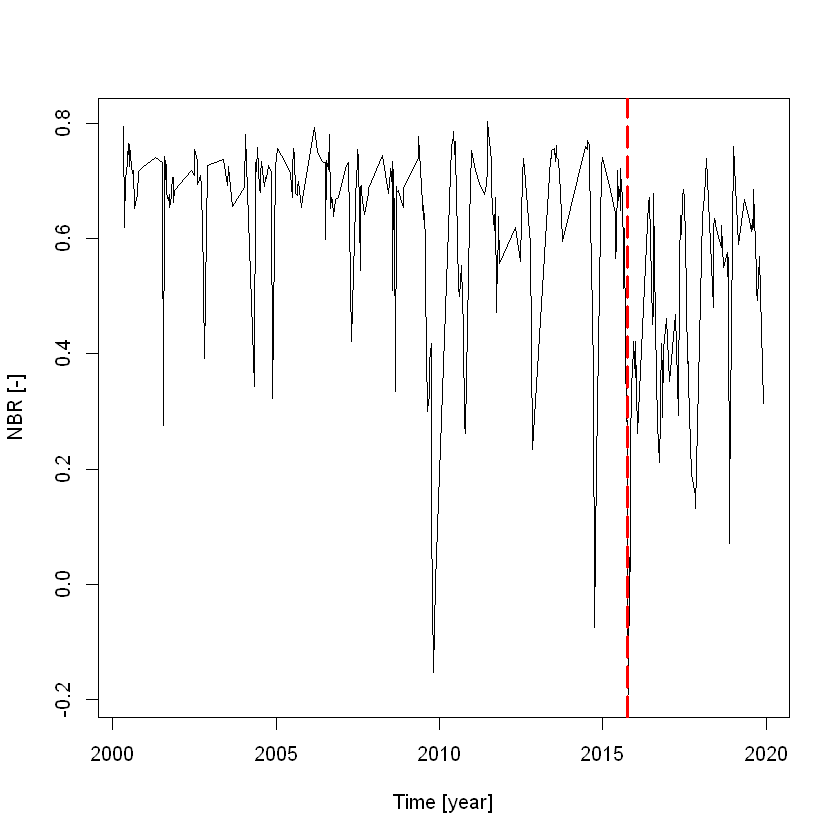

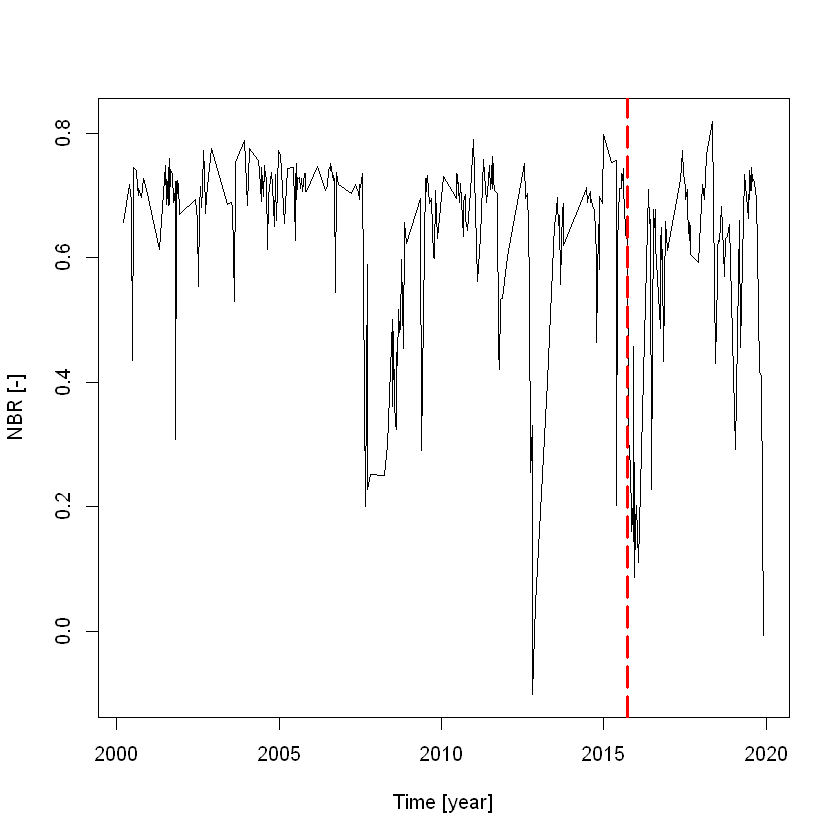

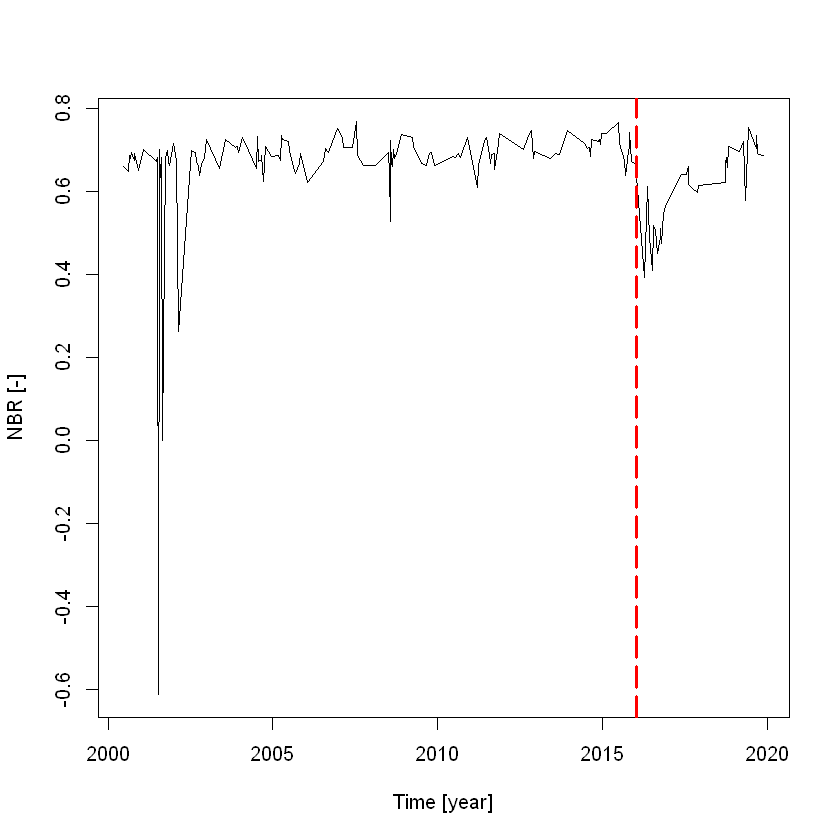

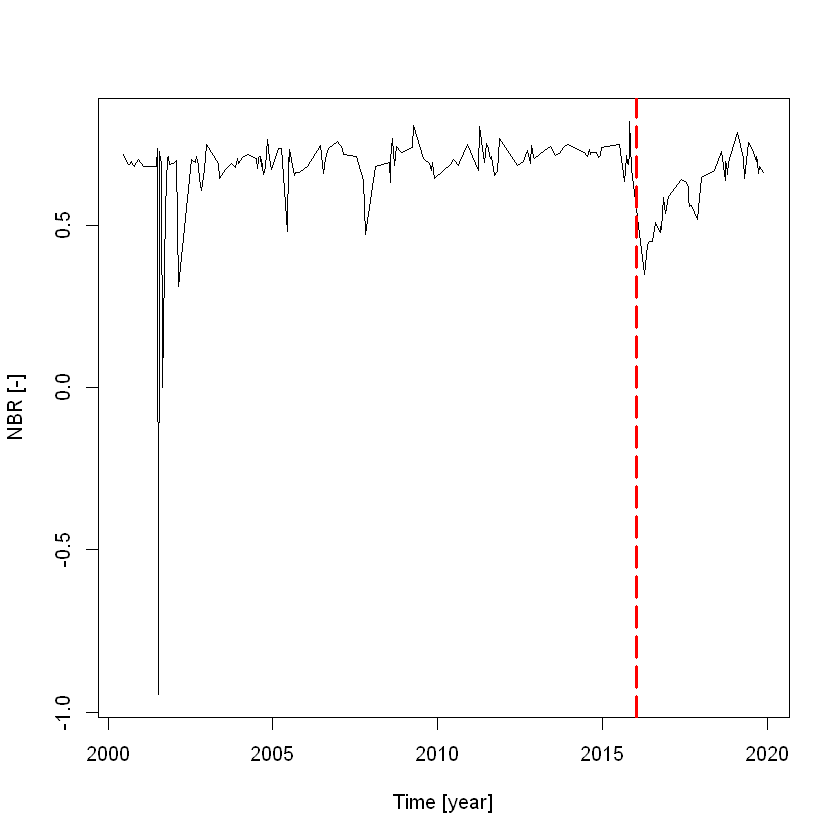

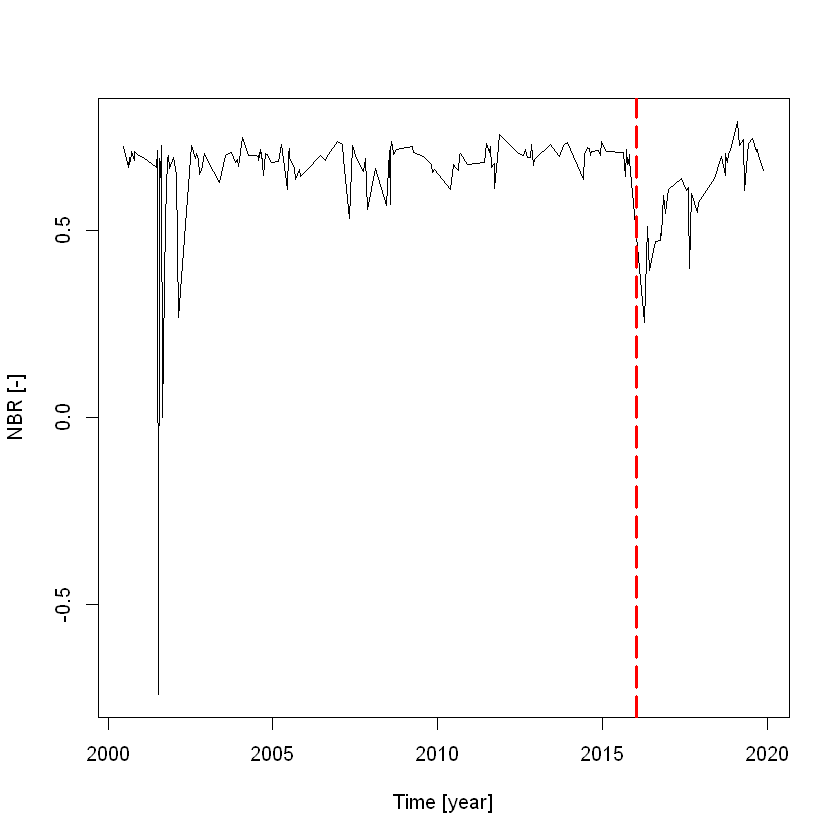

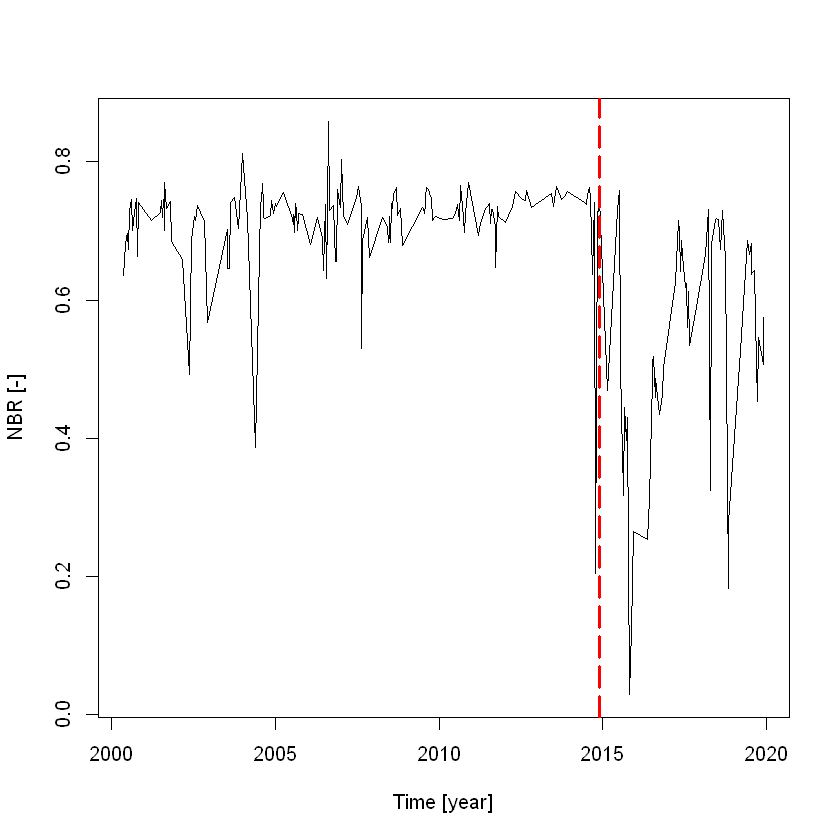

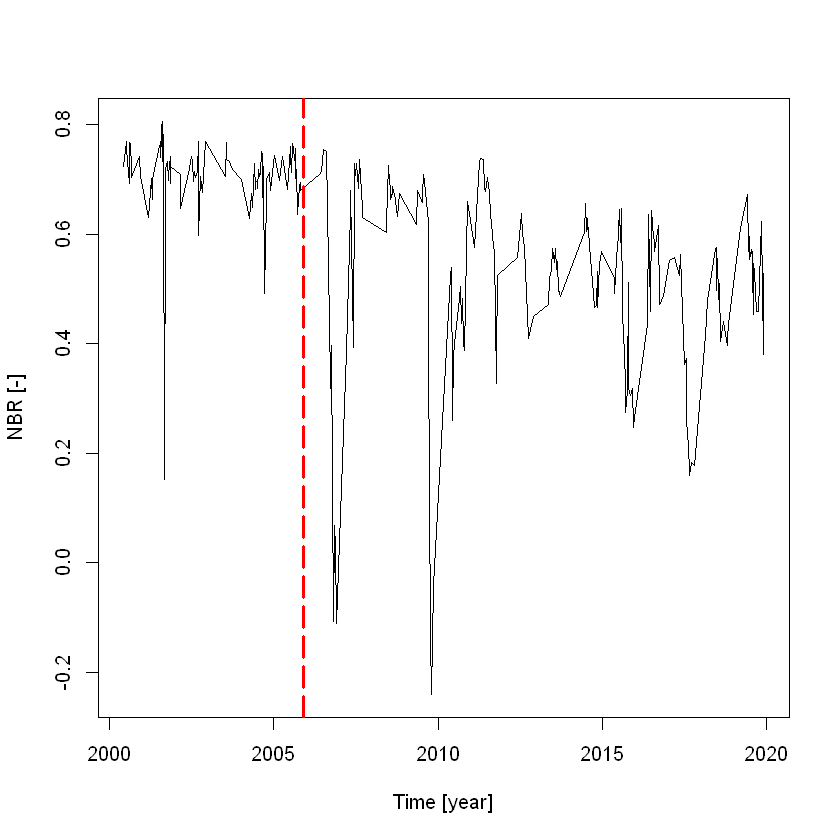

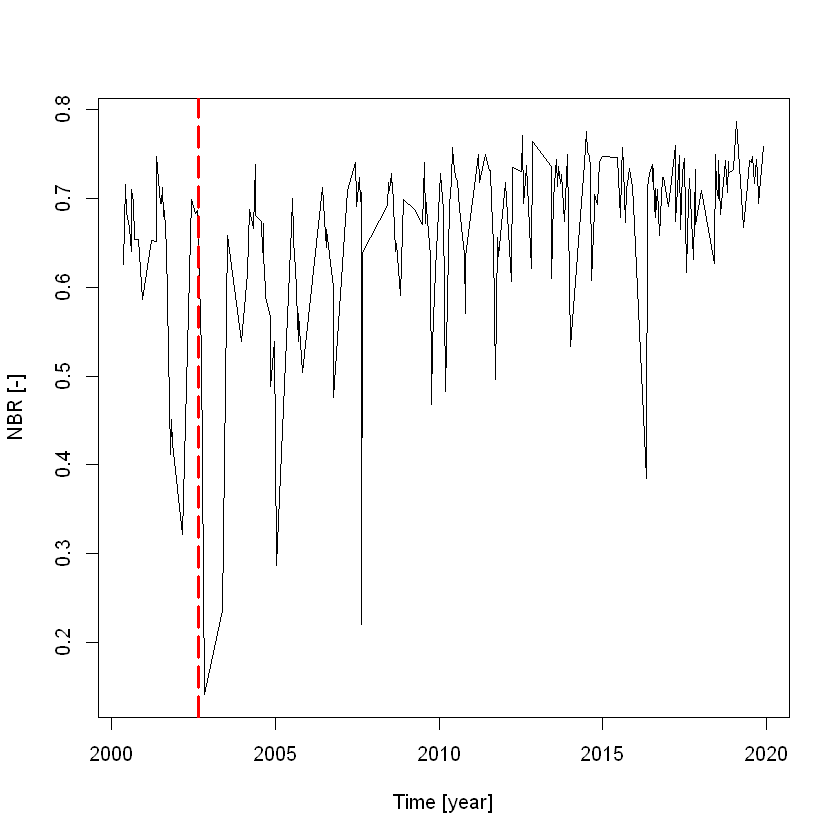

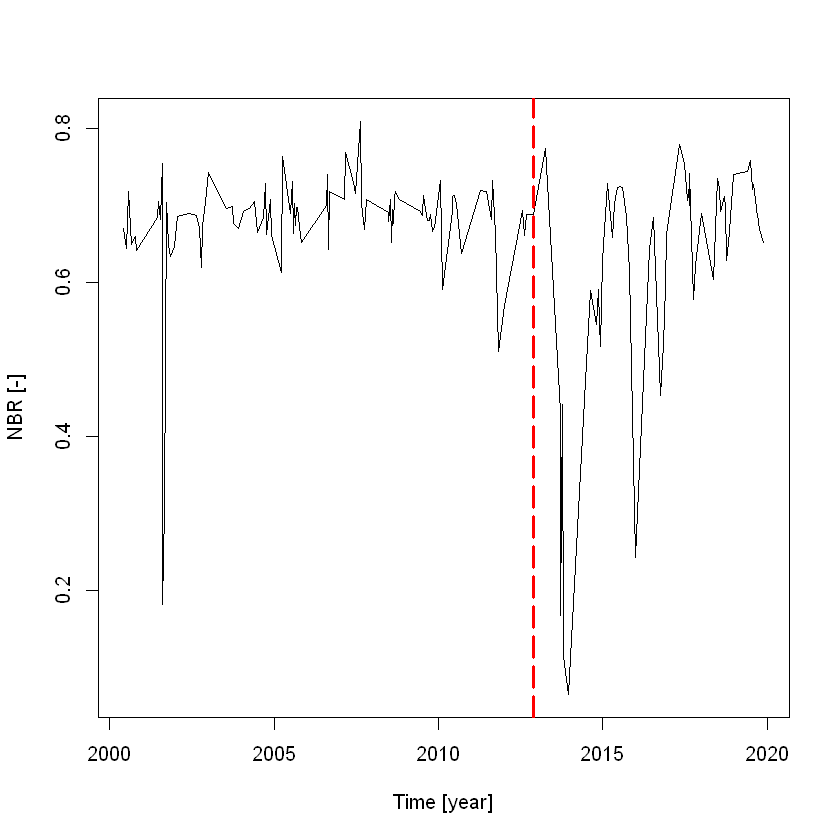

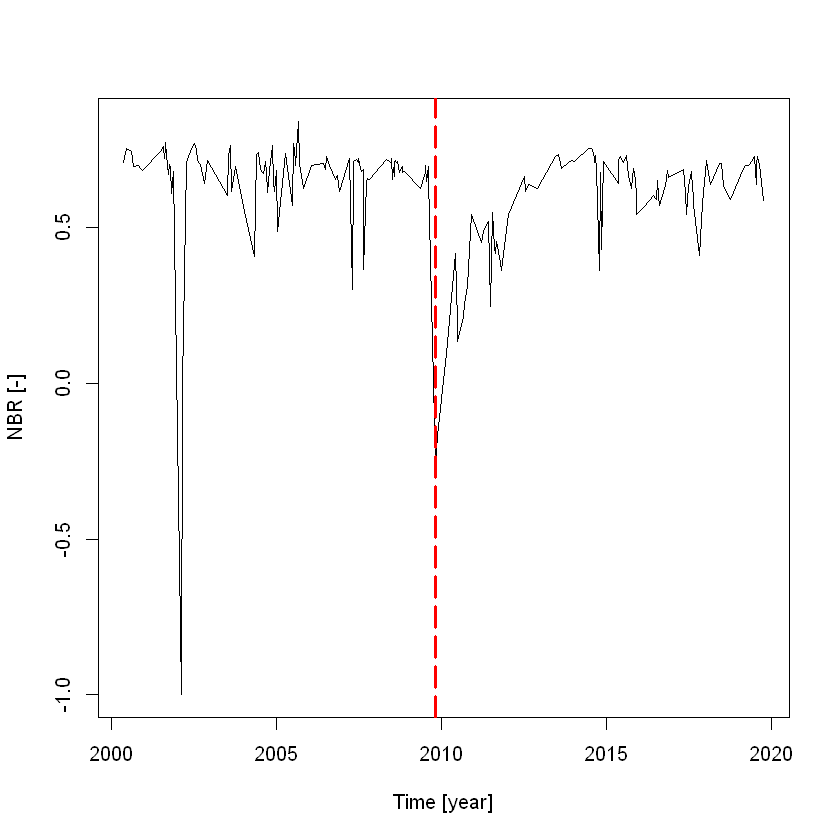

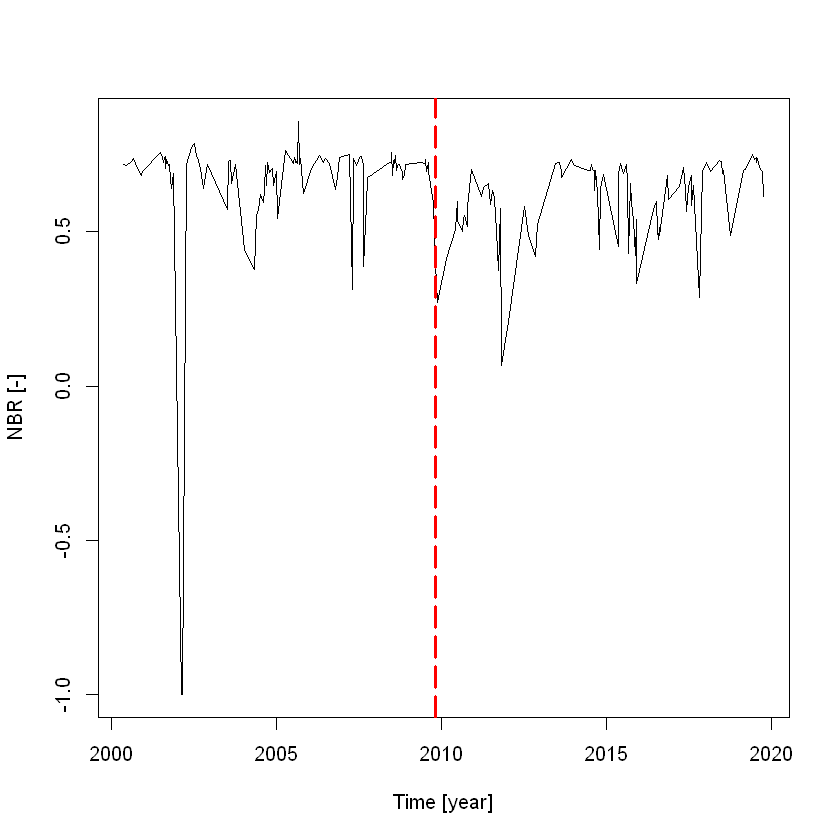

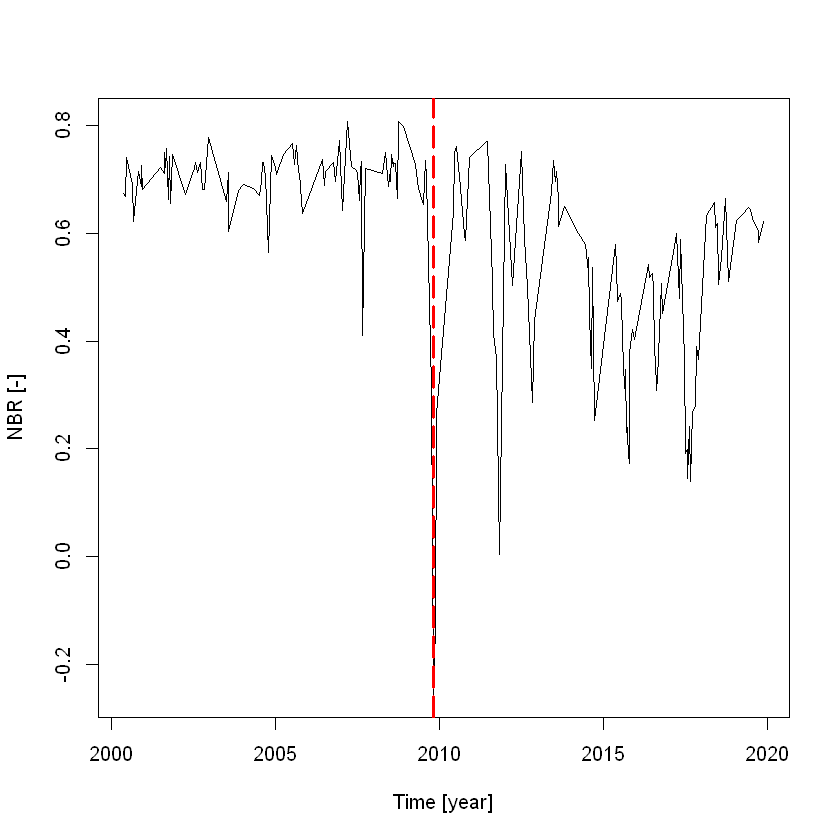

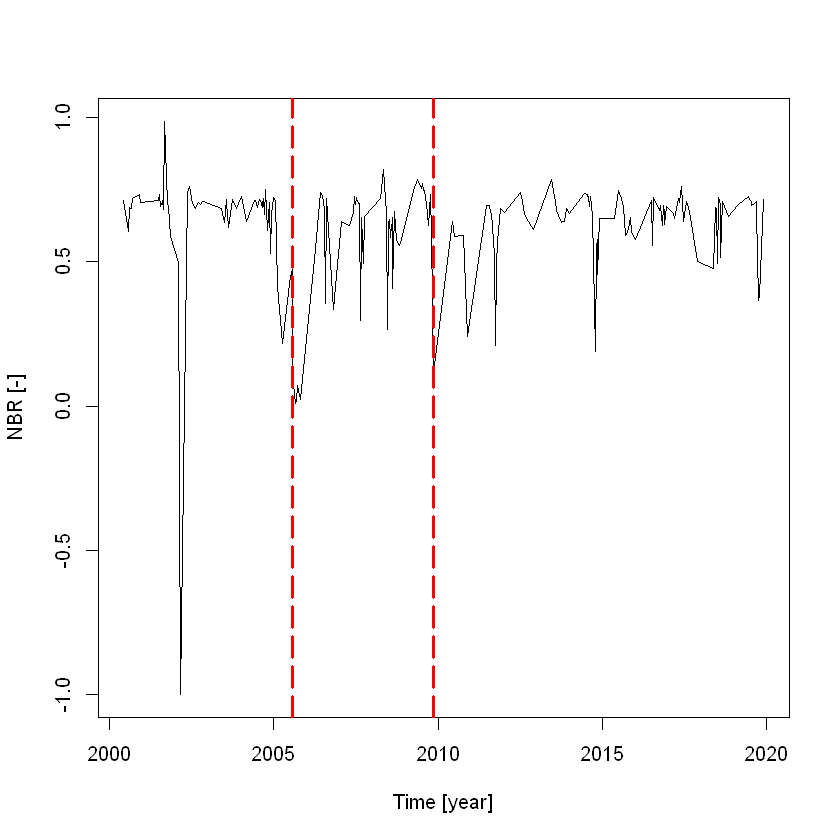

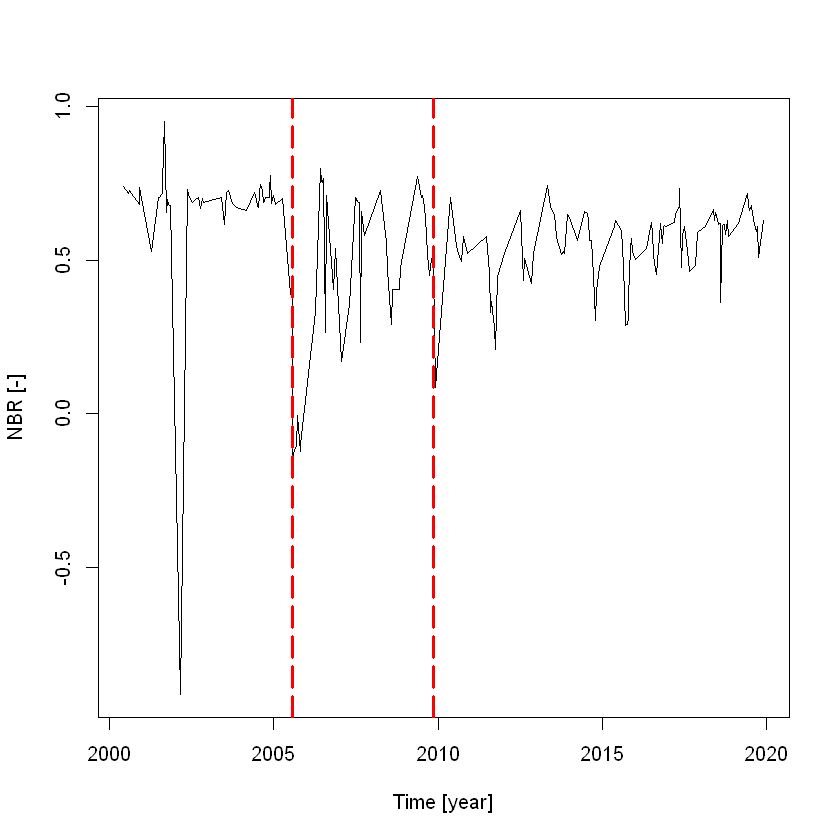

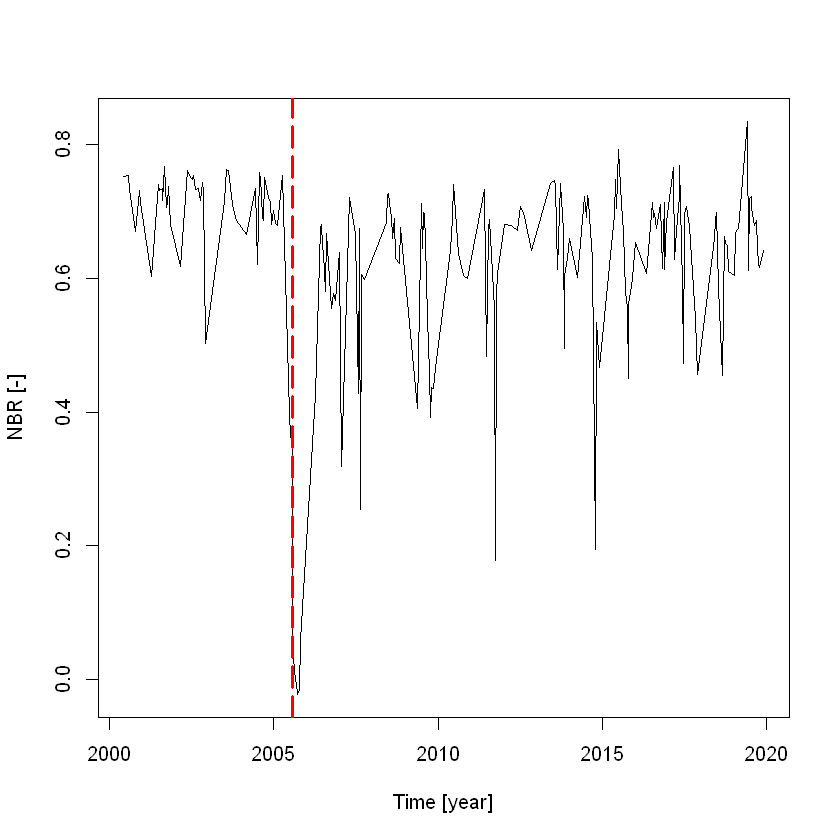

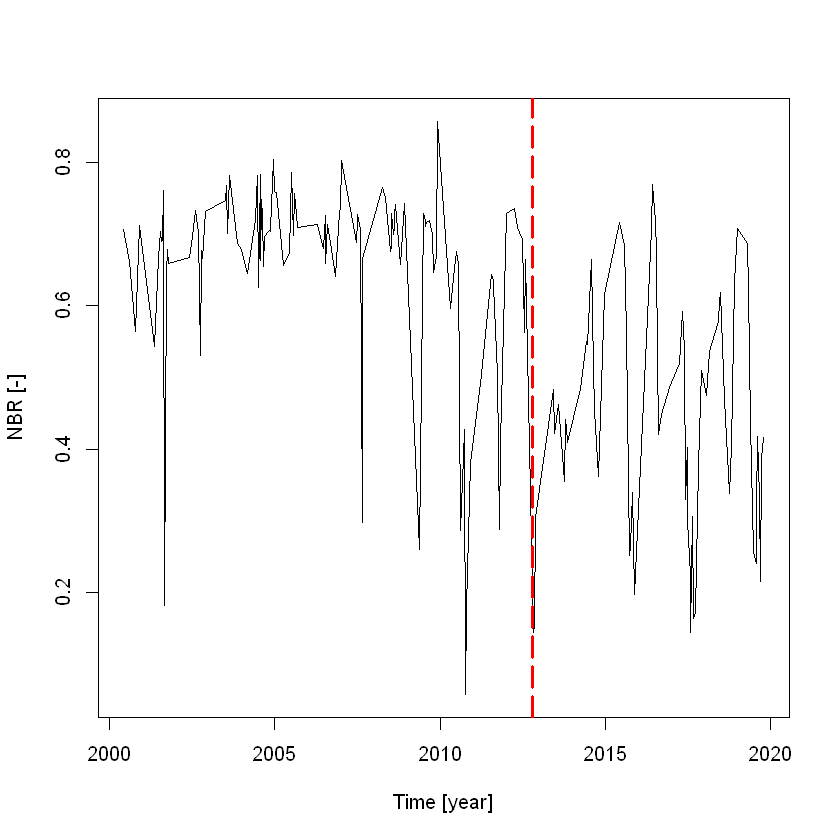

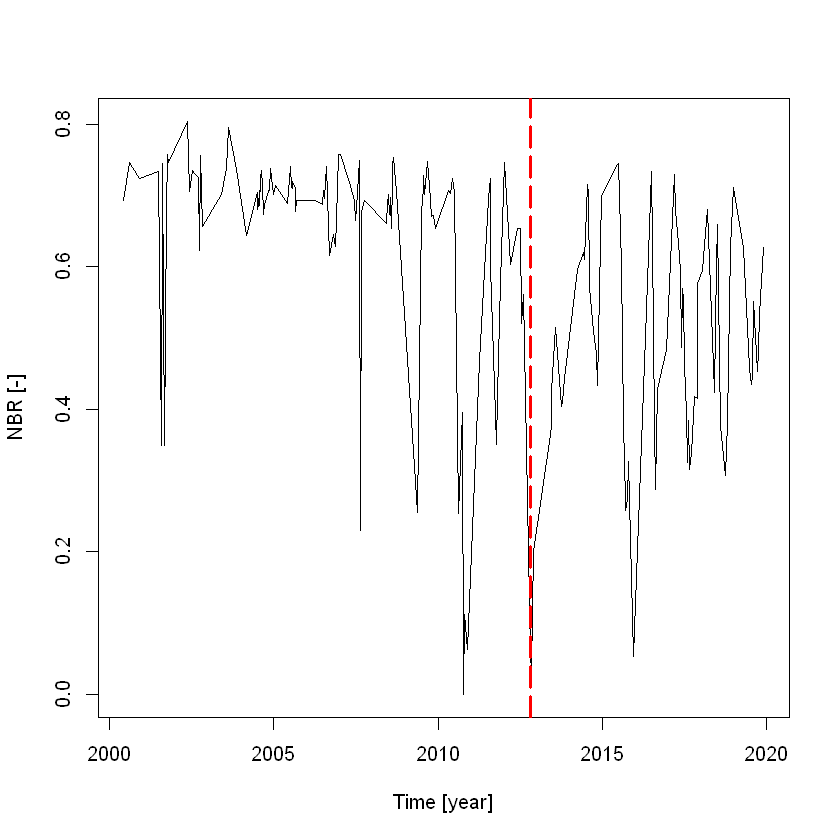

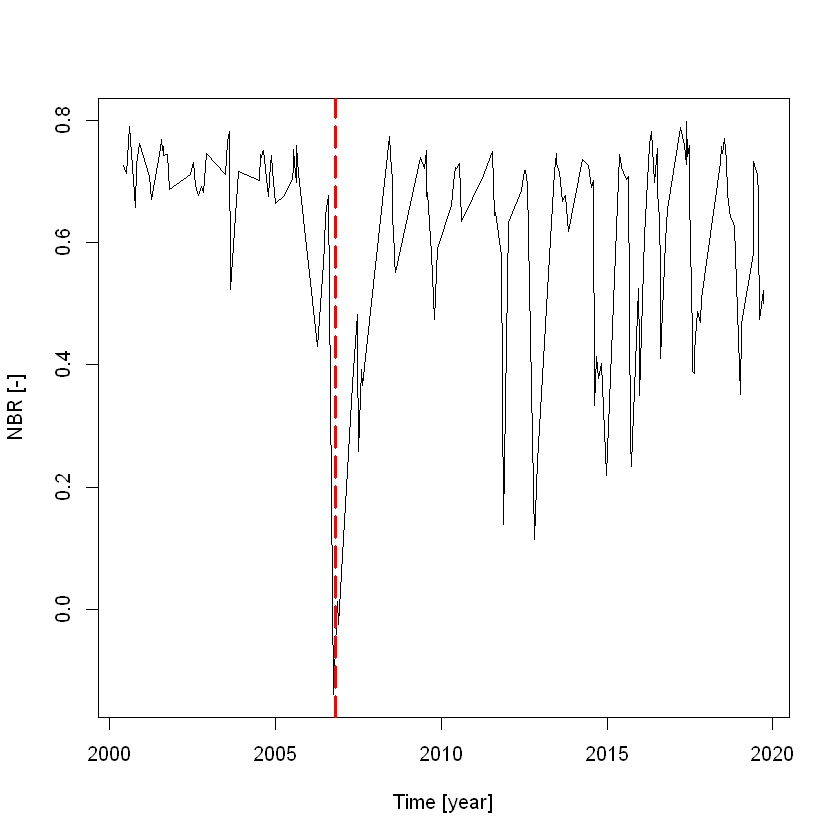

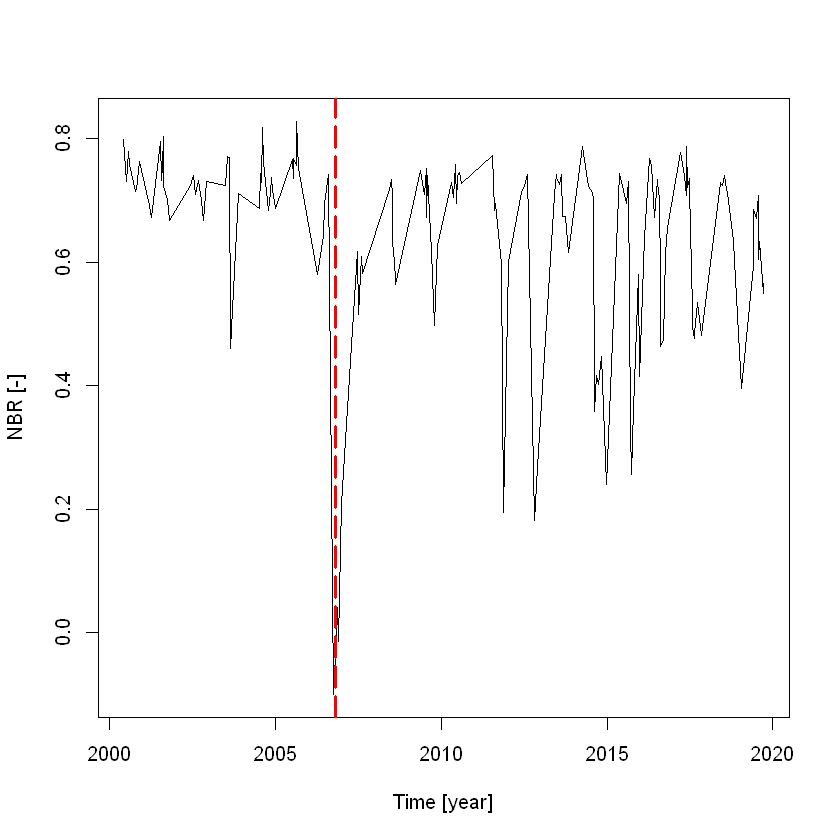

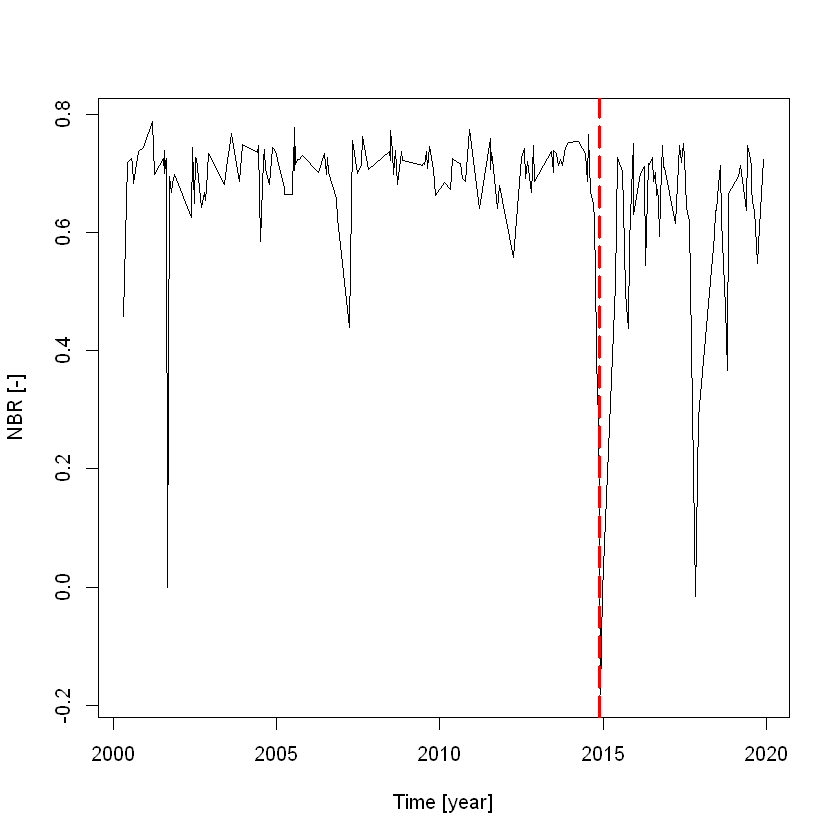

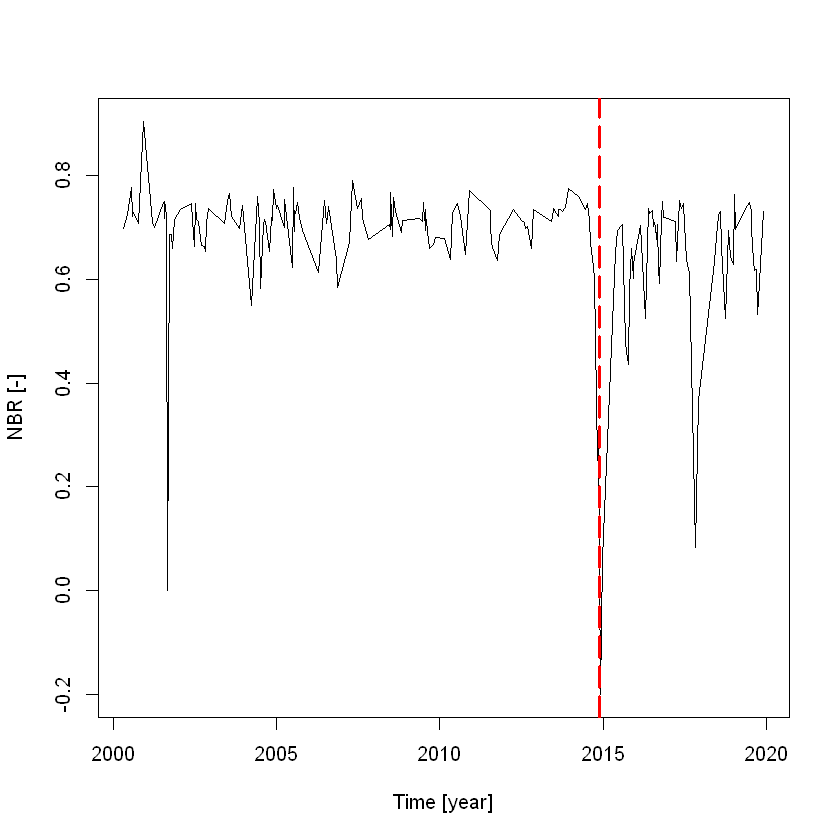

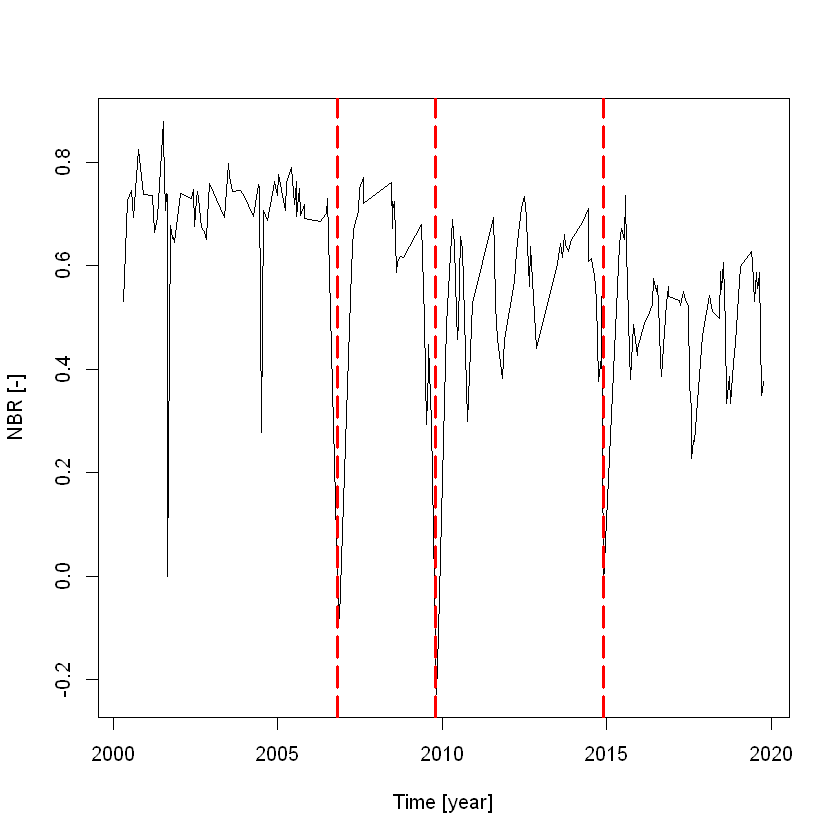

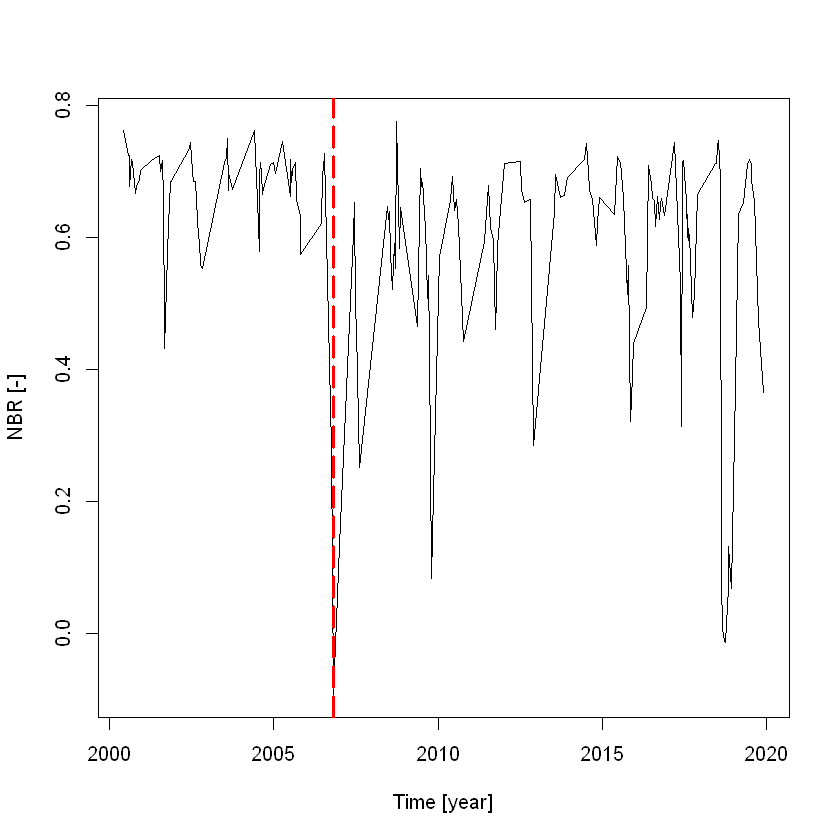

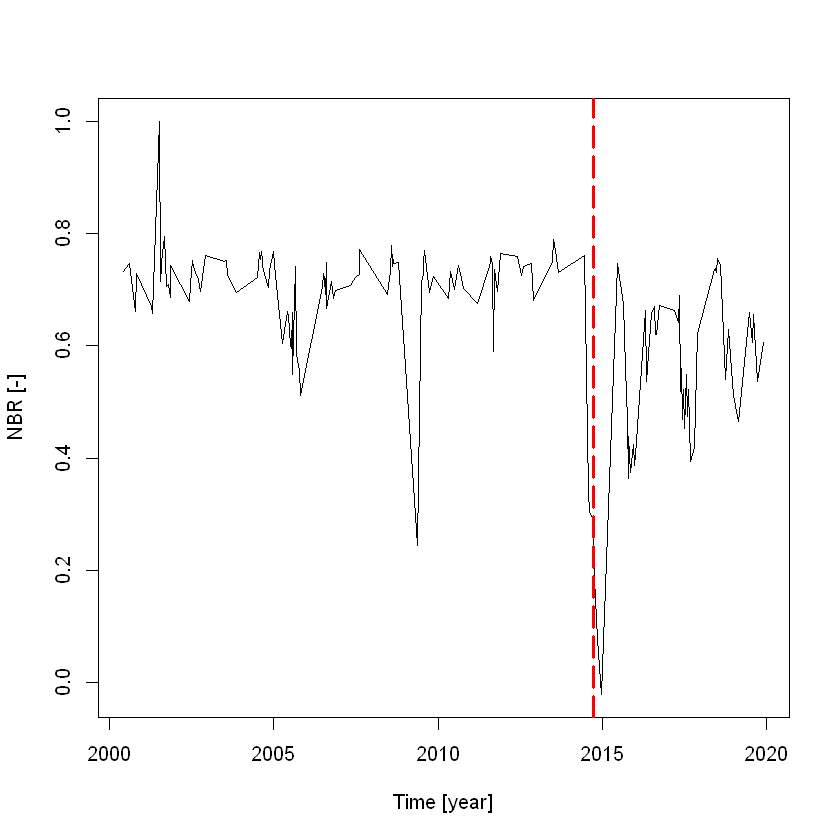

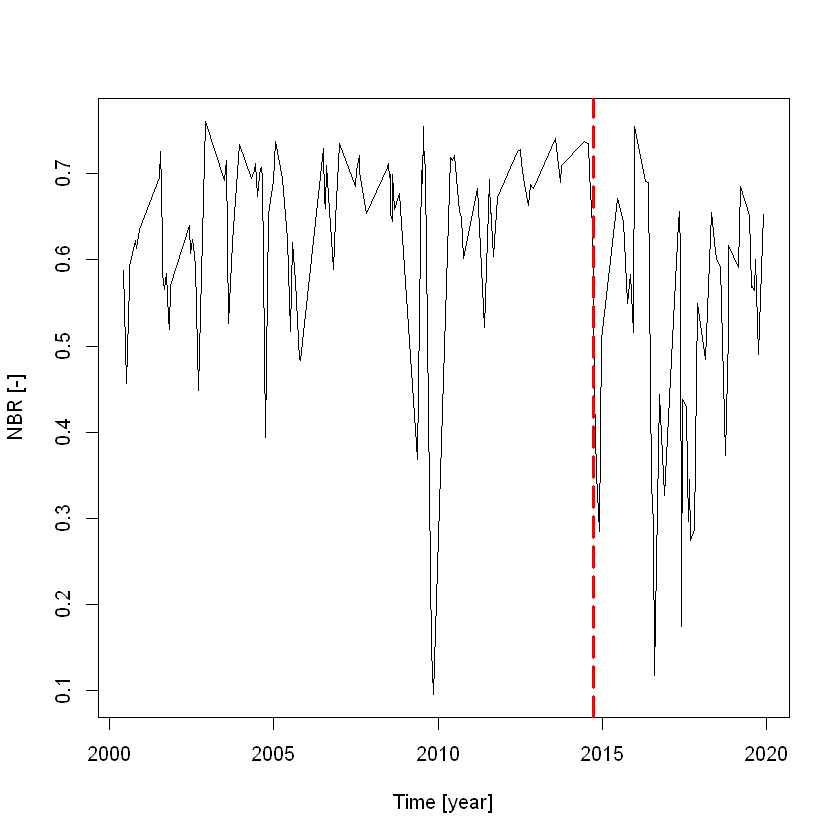

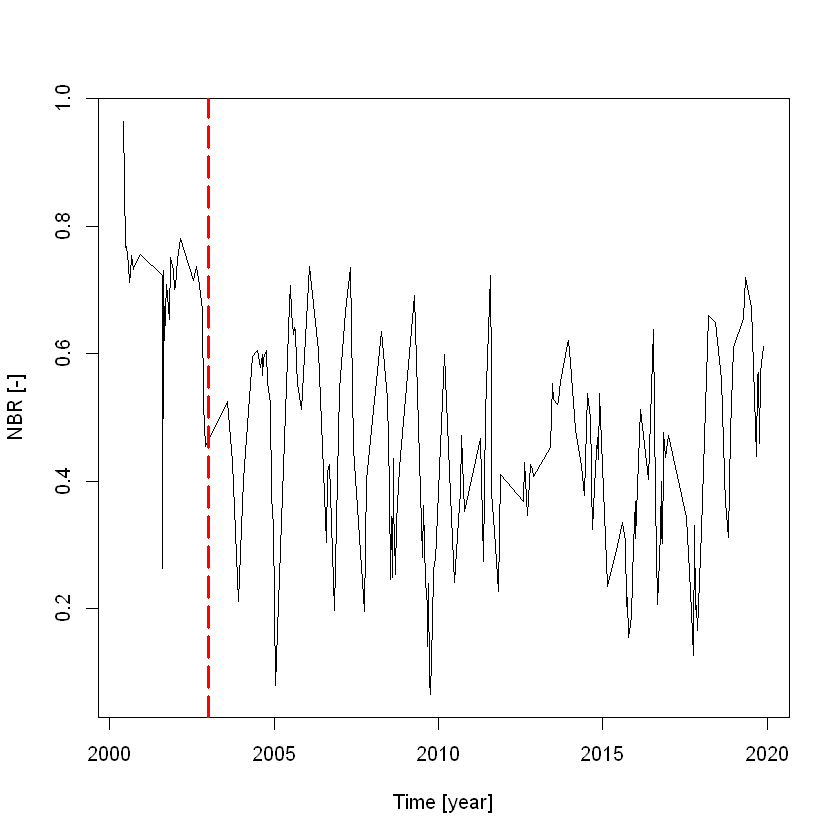

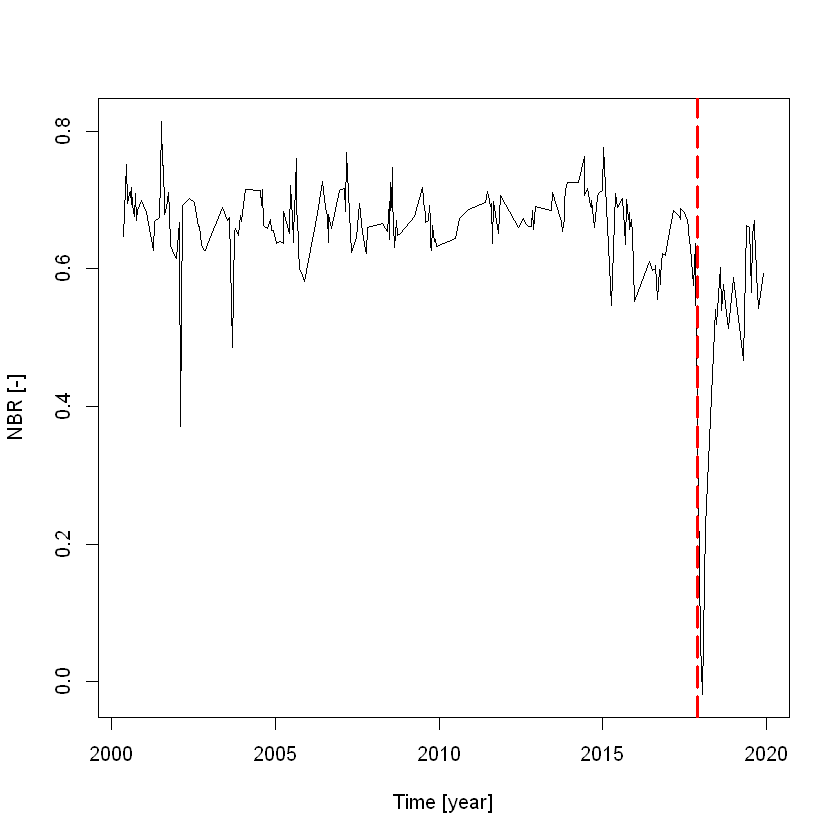

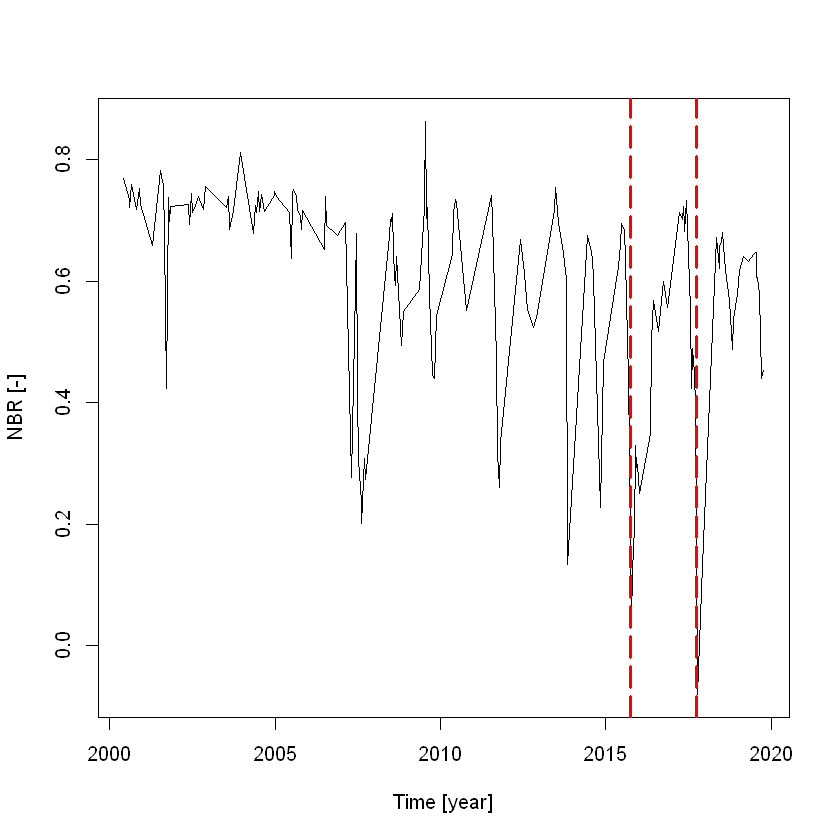

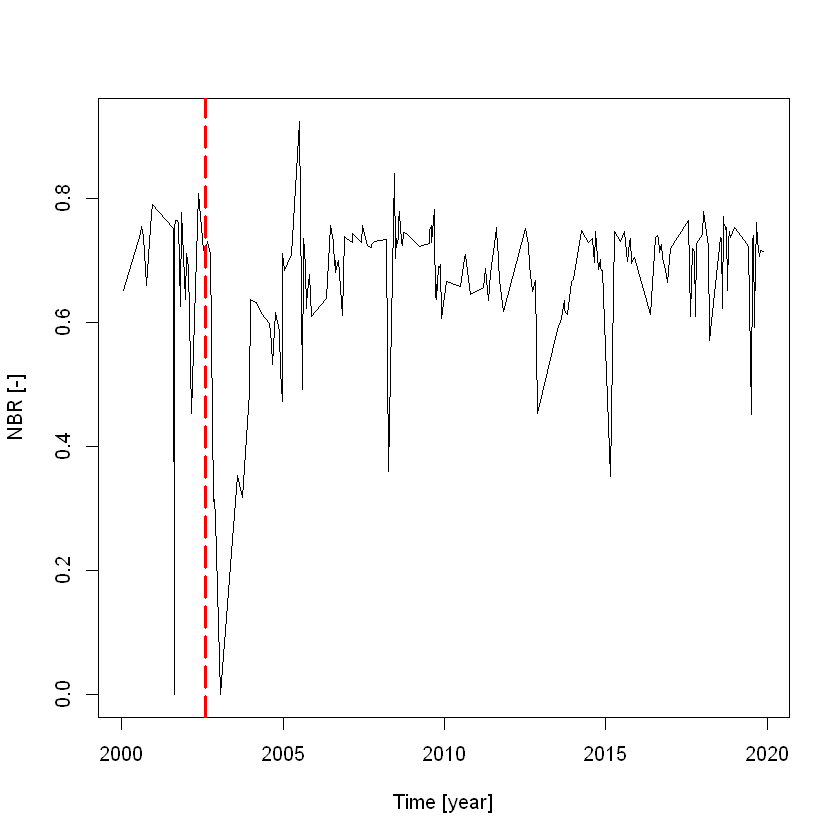

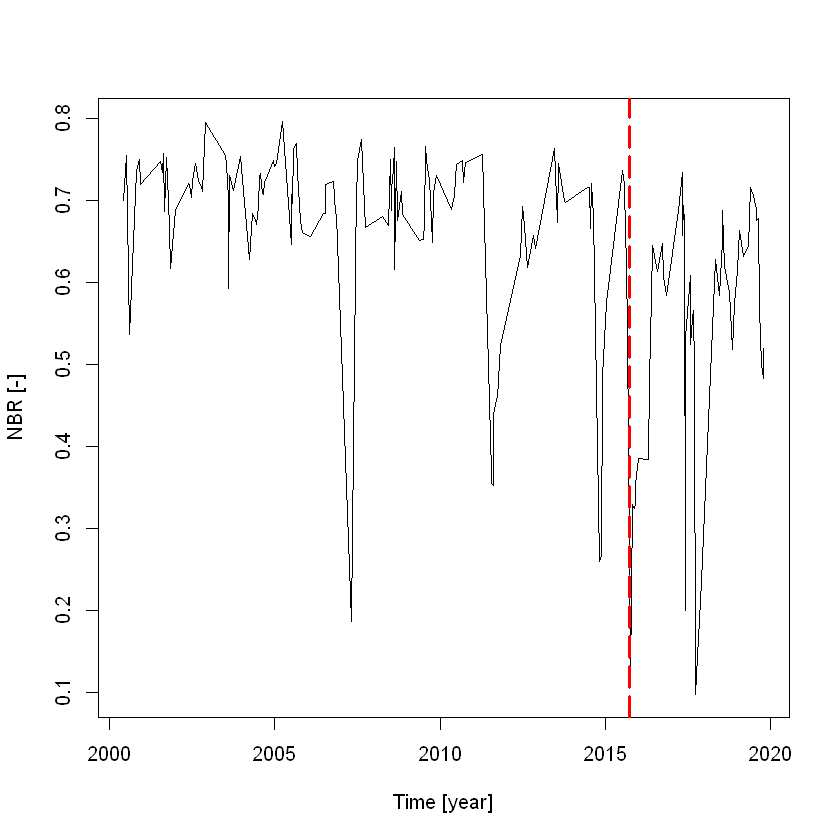

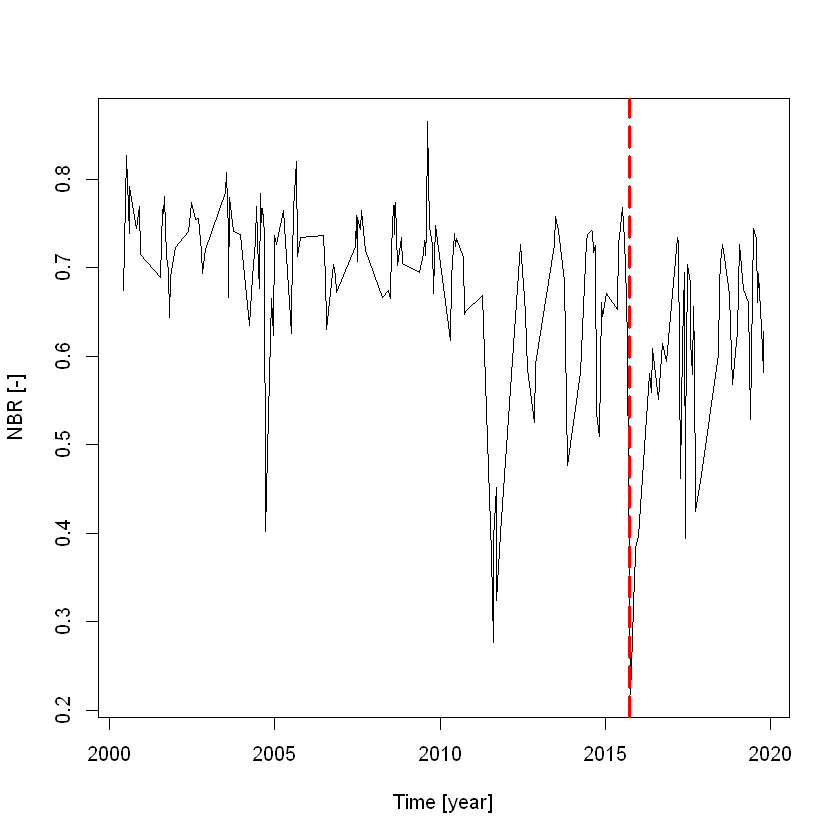

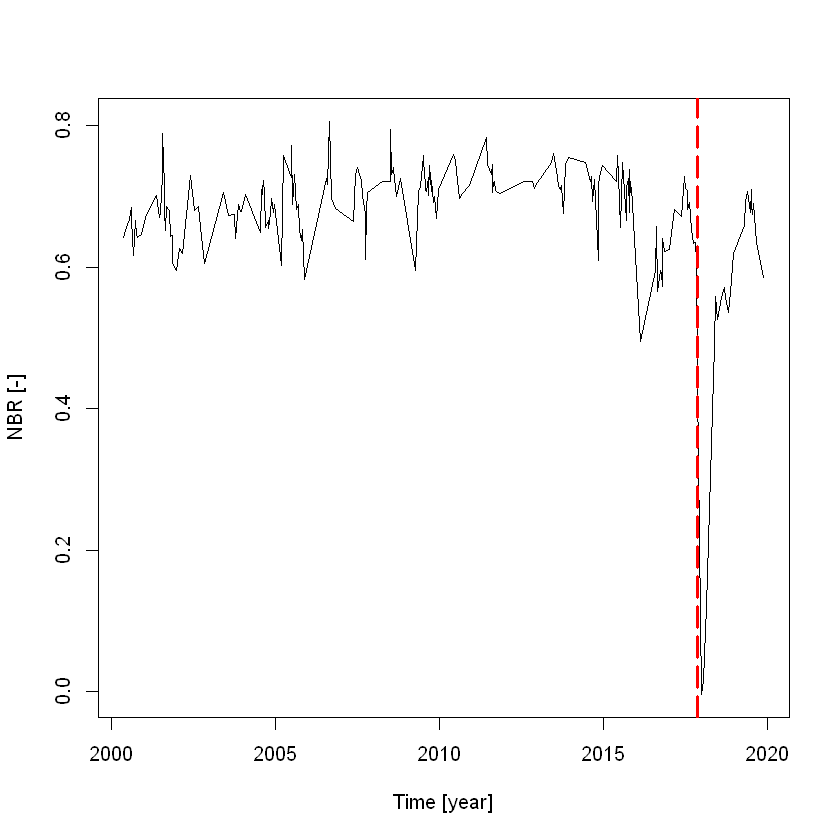

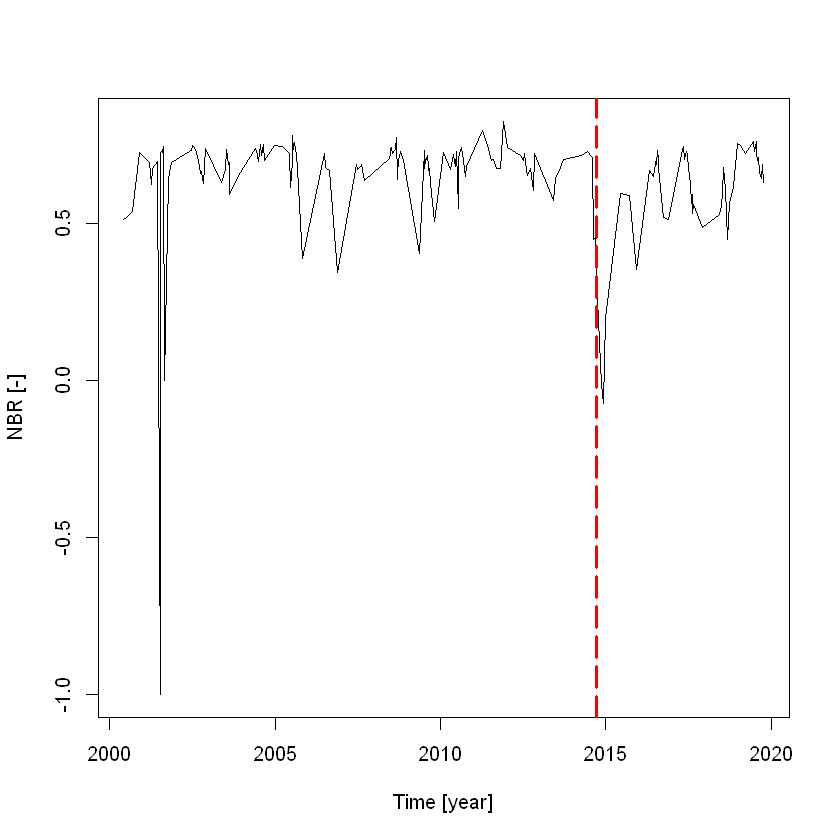

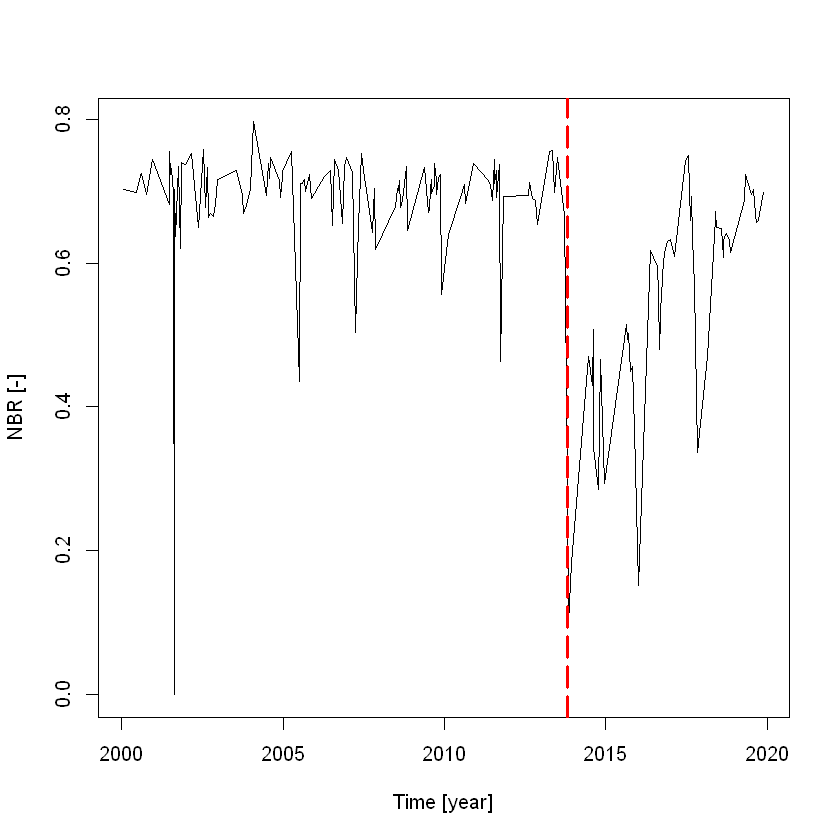

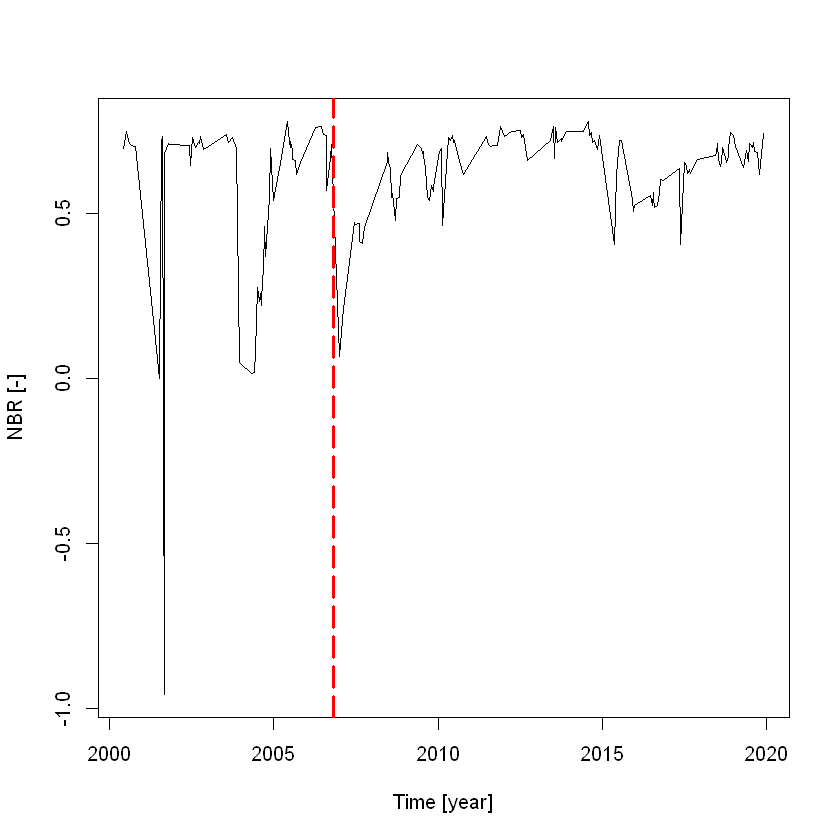

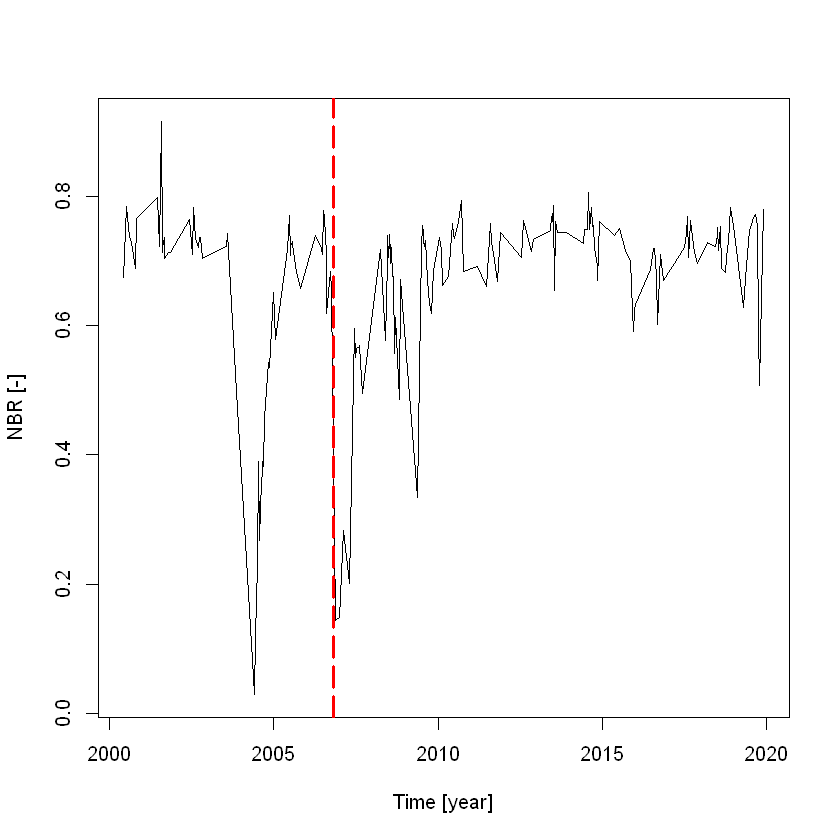

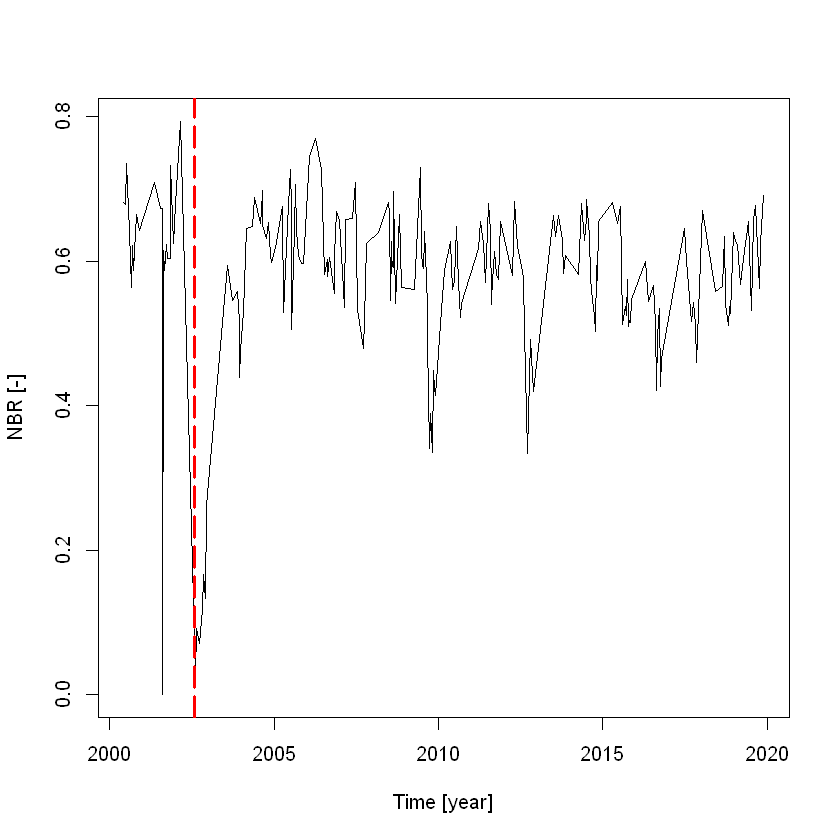

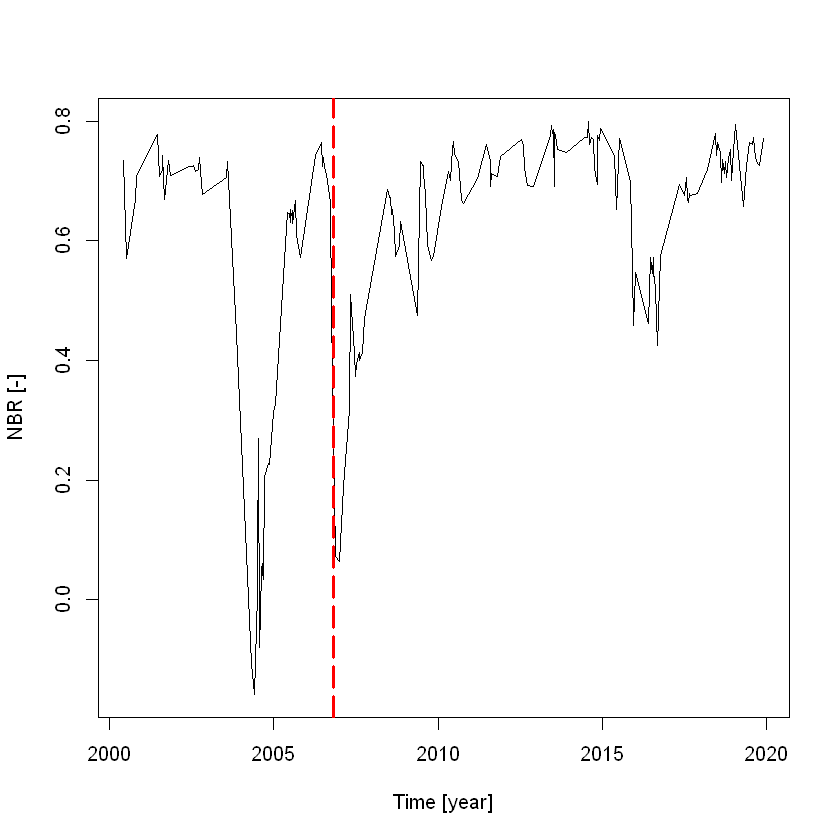

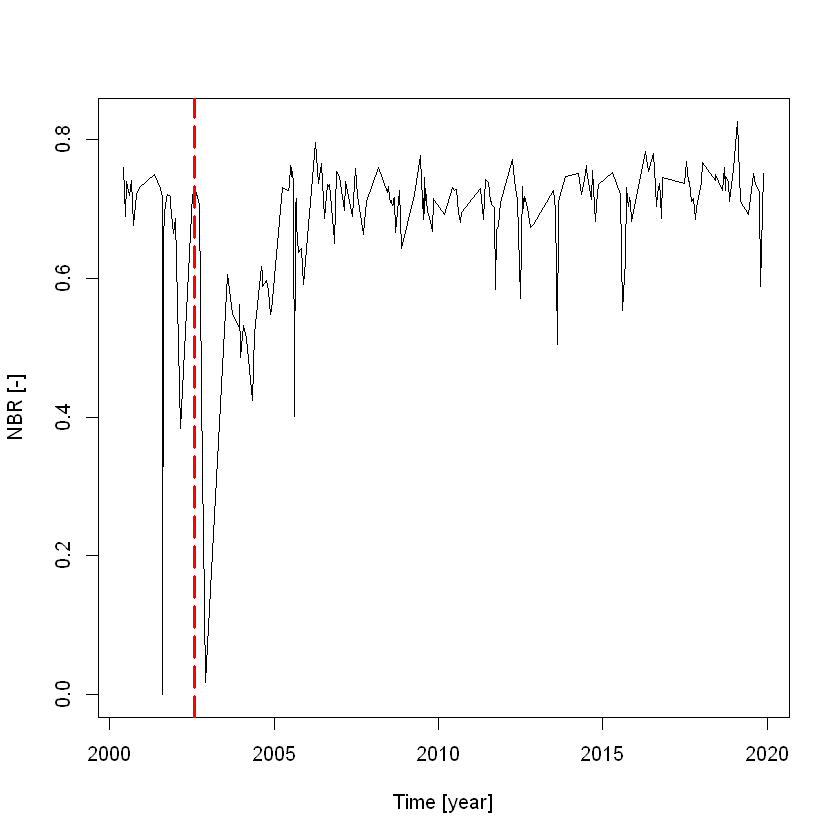

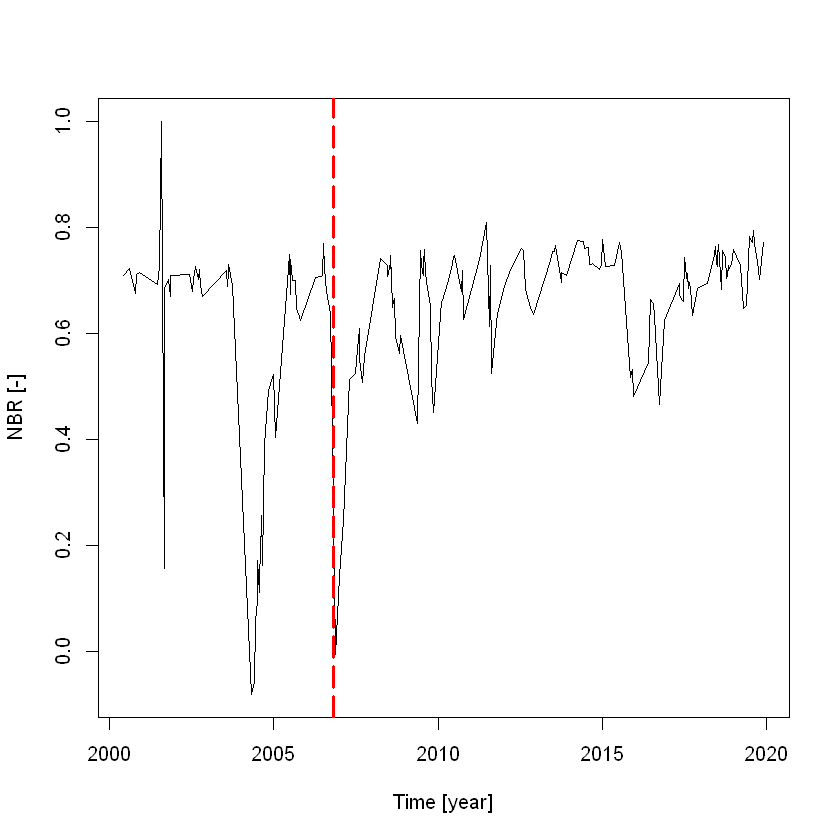

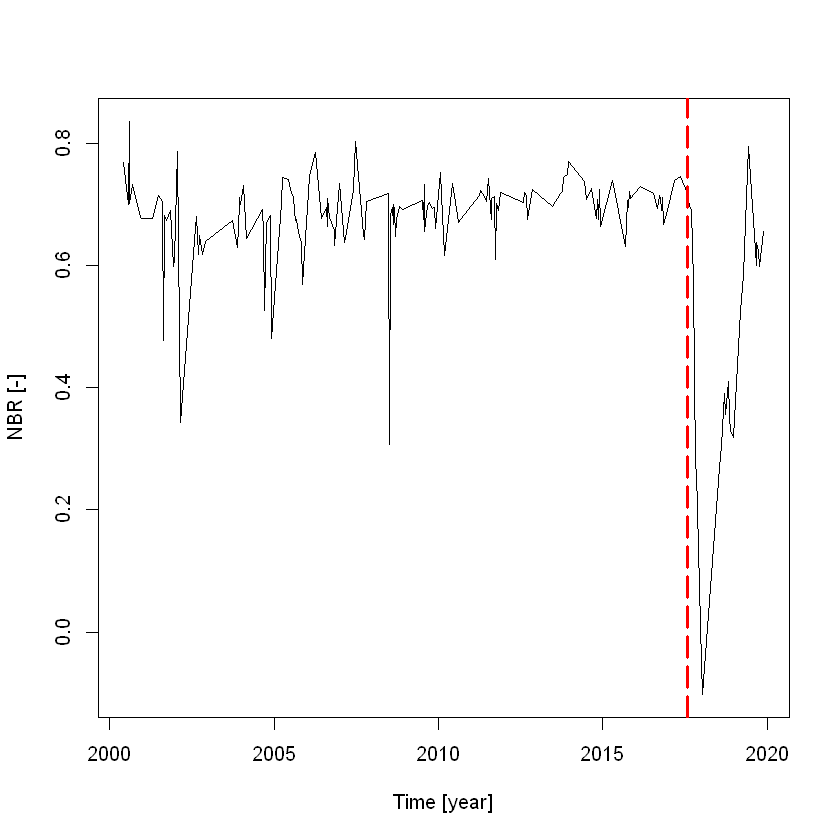

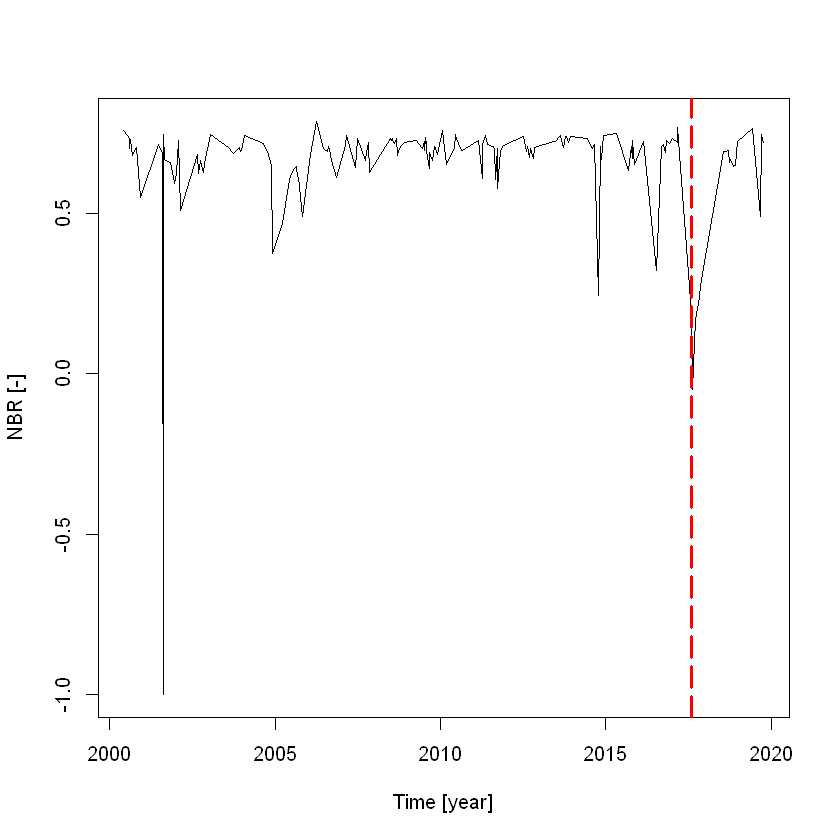

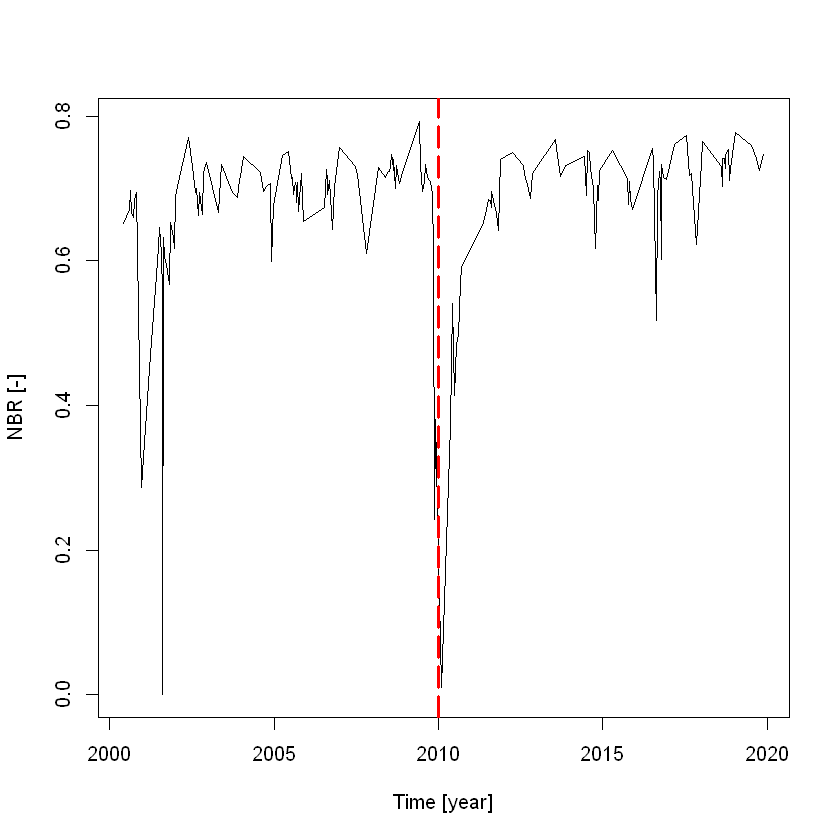

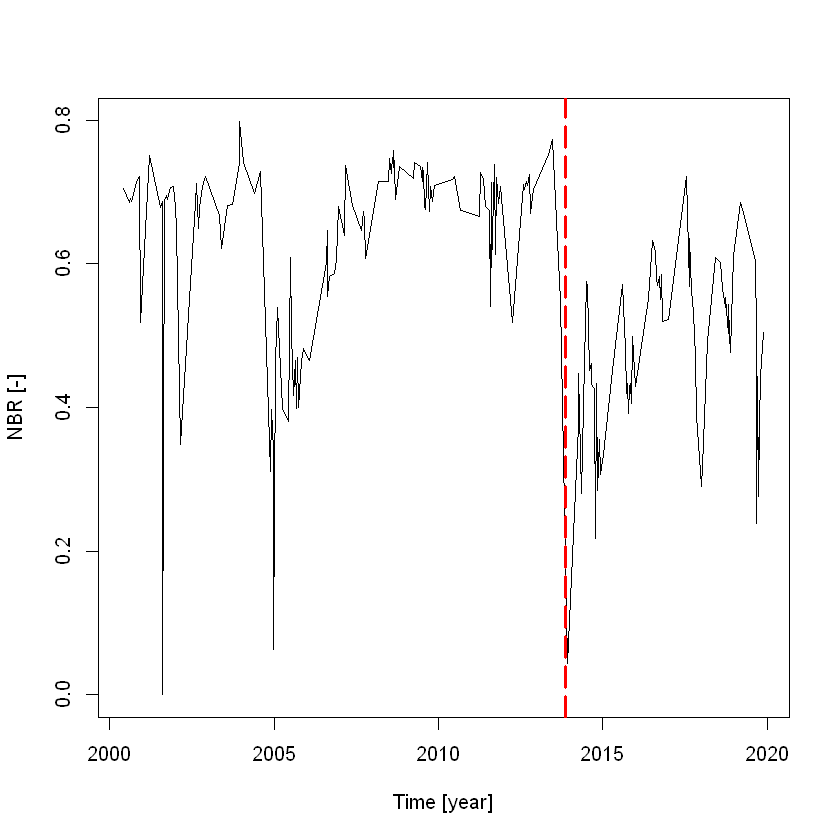

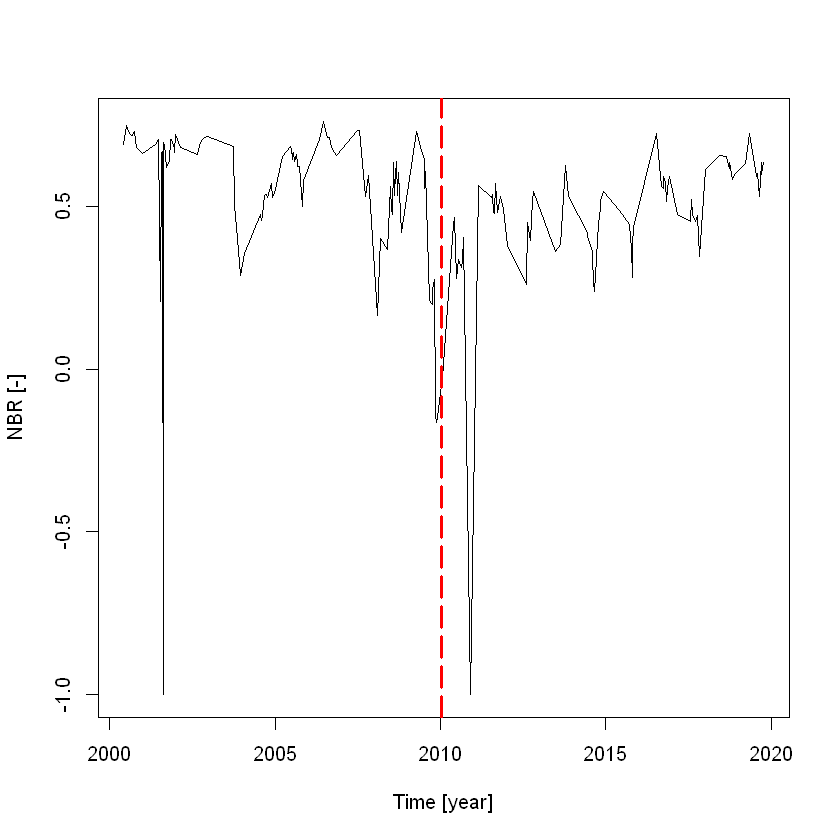

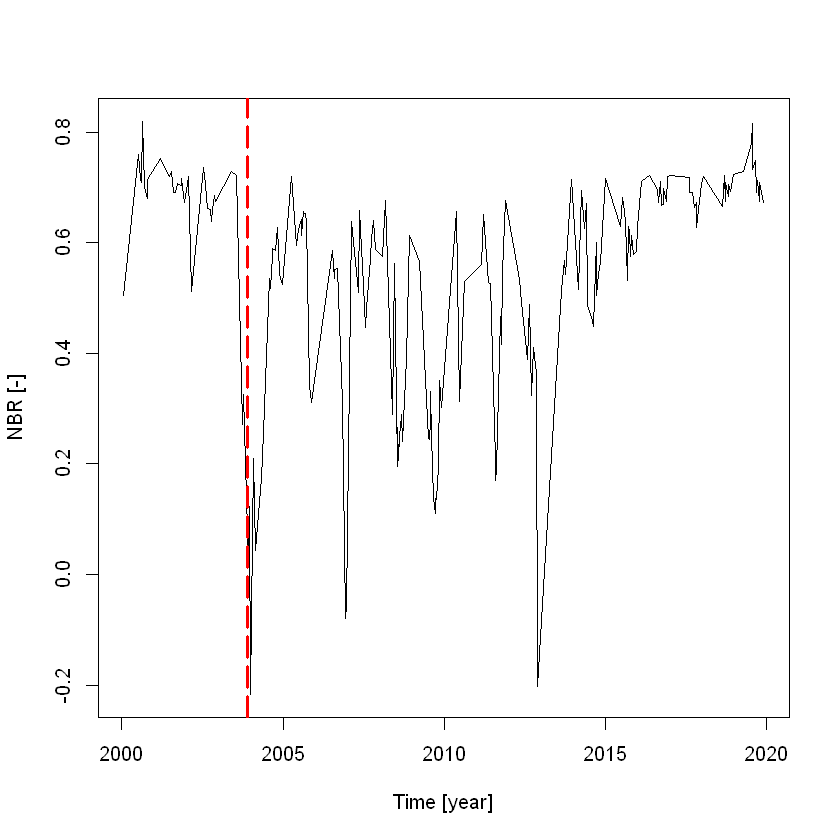

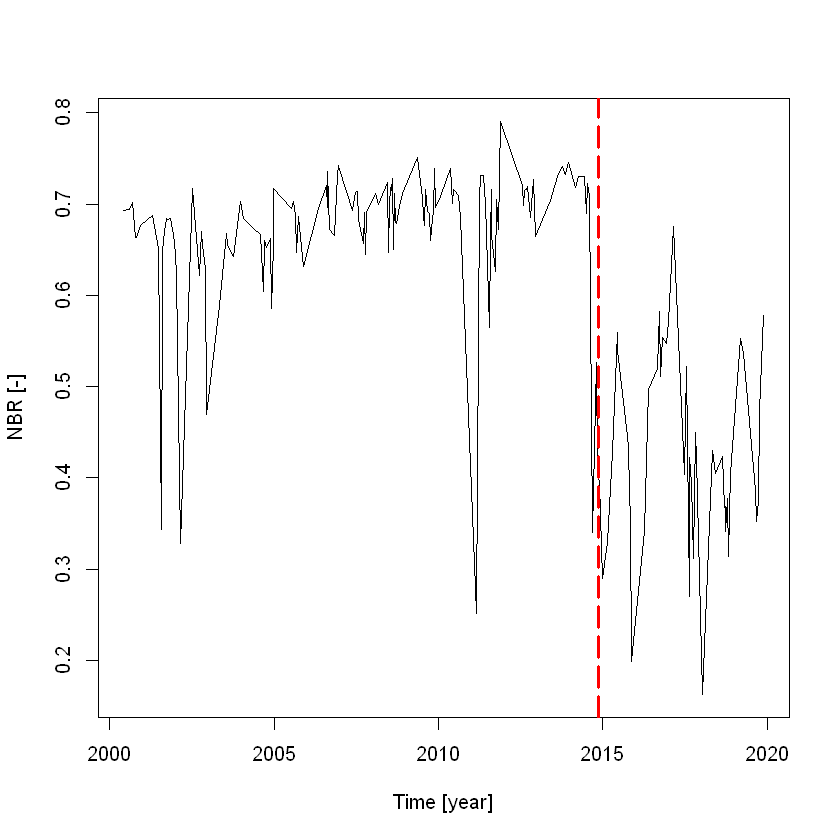

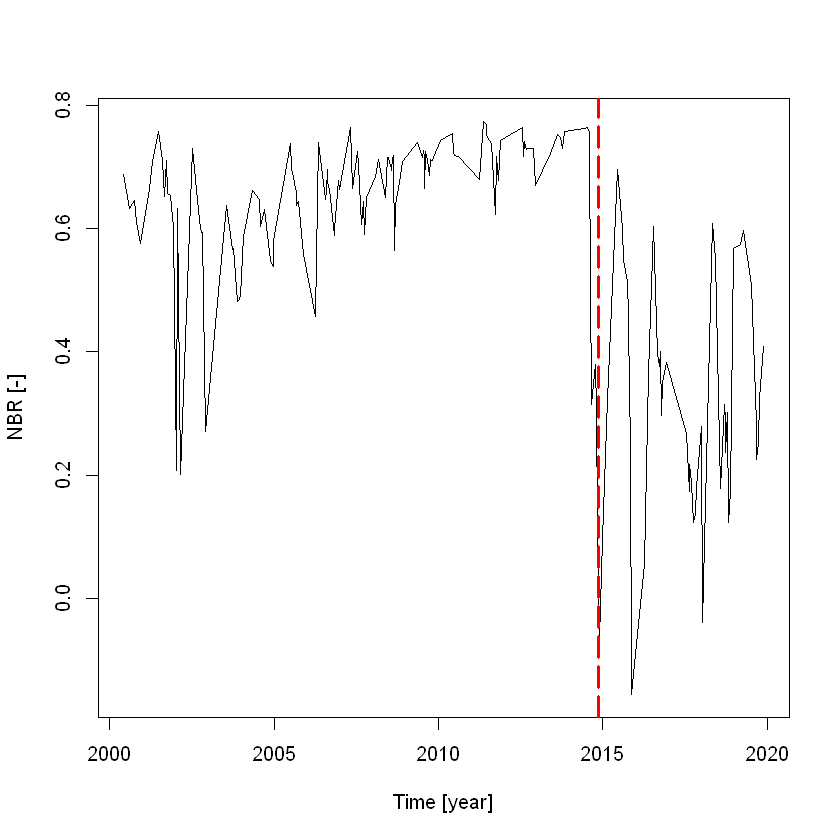

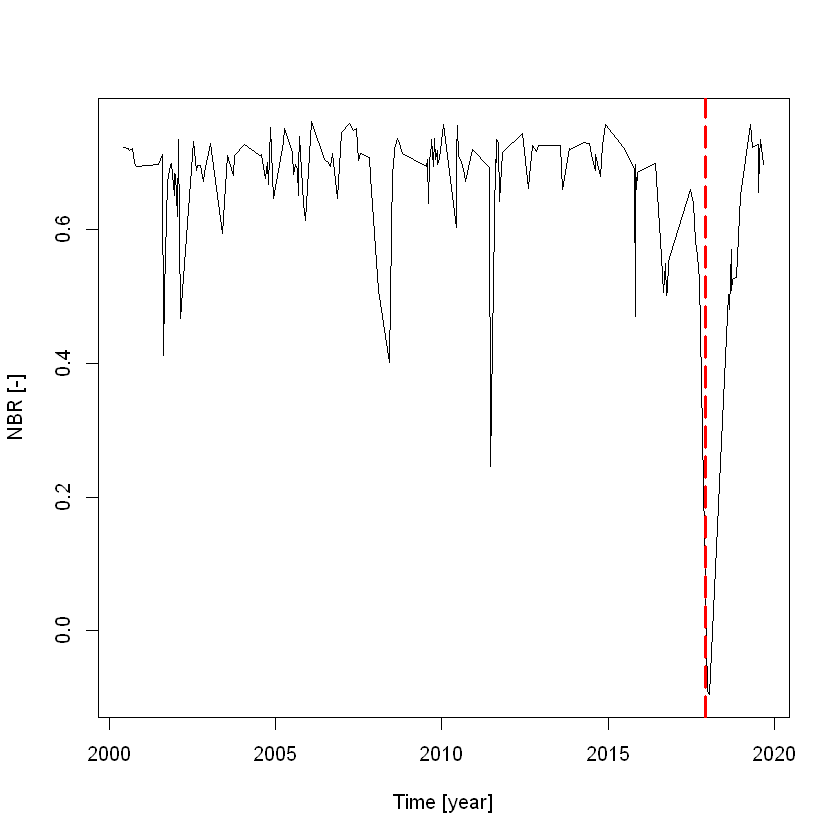

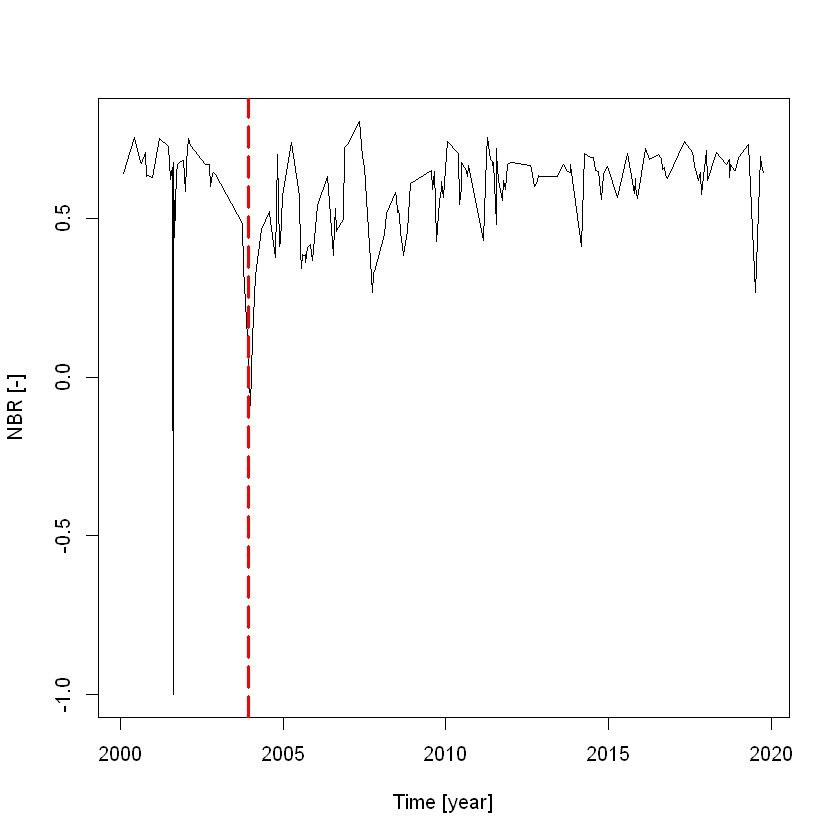

In [13]:
library(zoo)
crdstot <- tsi[,c(1,2)]
for(i in 1:dim(crds)[1]){
    cri <- crds[i,]
    ii <- which((crdstot[,1] == cri[,1]) & (crdstot[,2] == cri[,2]))
    
    tsii <- as.numeric(tsi[ii,-c(1,2)])
    tmii <- as.Date(names(tsi[-c(1,2)]))
    
    plot(zoo(tsii[is.na(tsii)==F], tmii[is.na(tsii)==F]),
         xlab='Time [year]', ylab = 'NBR [-]')
    abline(v=(firei[[ii]][-c(1,2)]), col = 'red', lw=3, lty=5)
    }